In [1]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, SimpleFill, IterativeSVD, MICE, MatrixFactorization


Using Theano backend.


In [14]:
methods_dictionary = {
                     "KNN":KNN(k=3, verbose=False),
                     "NuclearNorm":NuclearNormMinimization(verbose=False),
                     "SoftImpute":SoftImpute(verbose=False),
                     "SimpleFill":SimpleFill(),
                     "IterativeSVD":IterativeSVD(verbose=False),
                     #"MICE":MICE(verbose=False),
                     "MatrixFactorization":MatrixFactorization(verbose=False)}

In [3]:
methods_dictionary = {
                     
                     "NuclearNorm":NuclearNormMinimization(verbose=False),
                     
                     
                     }

In [4]:
import  os

import numpy as np
import pandas as pd


from create_df_larger import read_df_larger
df, dfc, all_homes, appliance_min, national_average = read_df_larger()

df = df.rename(columns={'house_num_rooms':'num_rooms',
                        'num_occupants':'total_occupants',
                        'difference_ratio_min_max':'ratio_difference_min_max'})
K_min, K_max = 1,6
F_min, F_max=1,8

from all_functions import *
from features_larger import *

In [28]:
out = {}
columns_max = {}
columns_min = {}
for appliance in ["hvac","fridge","wm","dw","mw","oven"]:
#for appliance in ["wm"]:
   
    out[appliance]={}
    for method_name in methods_dictionary.iterkeys():
        out[appliance][method_name] ={}
for appliance in ["hvac","fridge","wm","dw","mw","oven"]:
#for appliance in ["wm"]:
    print appliance
    #out[appliance]={}
    if appliance=="hvac":
        start, end=5, 11
    else:
        start, end = 1, 13

    appliance_cols = ['%s_%d' %(appliance, month) for month in range(start, end)]
    aggregate_cols = ['aggregate_%d' %month for month in range(1, 13)]
    all_cols = deepcopy(appliance_cols)
    all_cols.extend(aggregate_cols)
    X = dfc[all_cols].dropna()
    
    col_max = X.max()
    columns_max[appliance]=col_max
    col_min = X.min()
    columns_min[appliance]=col_min
    X_normalised = X.copy()
    for col in X.columns:
        X_normalised[col] = (X[col]-col_min[col])/(col_max[col]-col_min[col])

    

    for home in X_normalised.index[:]:
       

        X_home = X_normalised.copy()
        for month in range(start, end):
            X_home.loc[home, '%s_%d' %(appliance, month)] = np.NAN
        for method_name, method in methods_dictionary.iteritems():
            
            pred_df = pd.DataFrame(method.complete(X_home), 
                               index=X_normalised.index, 
                               columns=X_normalised.columns)
            #error = pred_df.ix[home][appliance_cols]-X_normalised.ix[home][appliance_cols]
            out[appliance][method_name][home] = pred_df.ix[home][appliance_cols]
        

hvac
fridge
wm
dw
mw
oven


In [33]:
len(X)

30

In [34]:
((s-dfc[s.columns].dropna()).abs().div(dfc[s.columns])*100).median().mean()

47.06092536609231

In [35]:
results= {}
for appliance in ["hvac","fridge","wm","mw","oven","dw"]:
#for appliance in ["wm"]:
    results[appliance]={}
    for method_name in methods_dictionary.iterkeys():
        odf = pd.DataFrame(out[appliance][method_name]).T
        col_max, col_min = columns_max[appliance], columns_min[appliance]
        s = transform(odf, appliance, col_max, col_min)
        results[appliance][method_name]=((s-dfc[s.columns]).abs().div(dfc[s.columns])*100).median().mean()

In [37]:
pd.DataFrame(results)

,dw,fridge,hvac,mw,oven,wm
IterativeSVD,77.038927,49.887070,46.333919,61.210754,74.349965,58.778166
KNN,64.520078,22.430547,22.597236,52.301521,58.885958,47.082851
MatrixFactorization,94.053709,51.820691,27.816932,69.490478,75.700837,47.060925
NuclearNorm,66.264754,50.010220,40.044024,50.964839,64.580499,49.085742
SimpleFill,62.550679,24.660615,36.431465,45.565187,56.323144,48.706672
SoftImpute,66.736203,50.675387,40.897659,51.895528,65.166783,48.584998


In [38]:
%matplotlib inline

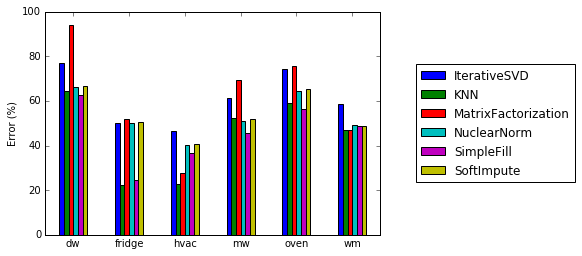

In [39]:
import matplotlib.pyplot as plt
pd.DataFrame(results).T.plot(kind="bar",rot=0)
lgd = plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
plt.ylabel("Error (%)")
plt.savefig('/Users/nipunbatra/Desktop/mc.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

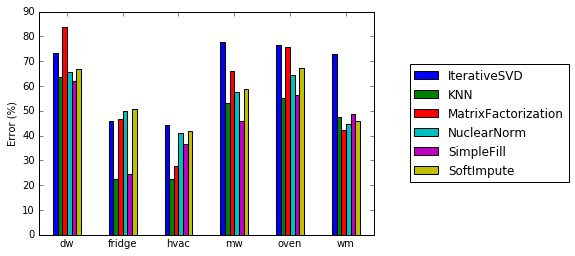

In [95]:
import matplotlib.pyplot as plt
pd.DataFrame(results).T.plot(kind="bar",rot=0)
lgd = plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
plt.ylabel("Error (%)")
plt.savefig('/Users/nipunbatra/Desktop/mc.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

In [7]:
def transform(pred_df,appliance,  col_max, col_min):
    pred_df_copy = pred_df.copy()
    if appliance=="hvac":
        start, stop=5, 11
    else:
        start, stop=1, 13
    
    for month in range(start, stop):
        pred_df_copy['%s_%d' %(appliance,month)] = (col_max['%s_%d' %(appliance, month)]-col_min['%s_%d' %(appliance,month)])*pred_df['%s_%d'%(appliance,month)] +col_min['%s_%d' %(appliance,month)]
    return pred_df_copy

In [57]:
out = {}
columns_max = {}
columns_min = {}
#for appliance in ["hvac","fridge","wm","dw","mw","oven"]:
for appliance in ["wm"]:
    print appliance
    out[appliance]={}
    if appliance=="hvac":
        start, end=5, 11
    else:
        start, end = 1, 13

    appliance_cols = ['%s_%d' %(appliance, month) for month in range(start, end)]
    aggregate_cols = ['aggregate_%d' %month for month in range(1, 13)]
    all_cols = deepcopy(appliance_cols)
    all_cols.extend(aggregate_cols)
    X = dfc[all_cols]
    
    col_max = X.max()
    columns_max[appliance]=col_max
    col_min = X.min()
    columns_min[appliance]=col_min
    X_normalised = X.copy()
    """
    for col in X.columns:
        X_normalised[col] = (X[col]-col_min[col])/(col_max[col]-col_min[col])

    """
    


    for home in X_normalised.index[:2]:
       

        X_home = X_normalised.copy()
        for month in range(start, end):
            X_home.loc[home, '%s_%d' %(appliance, month)] = np.NAN
        for method_name, method in methods_dictionary.iteritems():
            print method_name, appliance, home
            
            pred_df = pd.DataFrame(method.complete(X_home), 
                               index=X_normalised.index, 
                               columns=X_normalised.columns)
            #error = pred_df.ix[home][appliance_cols]-X_normalised.ix[home][appliance_cols]
            out[appliance][home] = pred_df.ix[home][appliance_cols]
        

wm
KNN wm 26
SoftImpute wm 26
SimpleFill wm 26
IterativeSVD wm 26
NuclearNorm wm 26
MatrixFactorization wm 26
KNN wm 59
SoftImpute wm 59
SimpleFill wm 59
IterativeSVD wm 59
NuclearNorm wm 59
MatrixFactorization wm 59


In [58]:
s = pd.DataFrame(out['wm']).T

In [59]:
s

,wm_1,wm_2,wm_3,wm_4,wm_5,wm_6,wm_7,wm_8,wm_9,wm_10,wm_11,wm_12
26,2.692300,-1.492671,0.099788,4.944674,1.977945,0.954356,-4.278080,-1.178696,-0.229801,5.360577,0.842516,6.713134
59,2.182656,2.341728,-5.234443,2.224943,-1.038993,-2.165238,2.773508,1.349008,-7.696709,5.438276,-1.309217,0.105782


In [55]:
((s-dfc[s.columns]).abs().div(dfc[s.columns])*100).median().mean()

67.0379045043984

In [24]:
dfc.ix[s.index][s.columns]

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,242.395737,543.781433,761.394043,902.418823,610.035828,395.169098
59,77.613205,197.951508,457.950378,700.443054,244.340973,81.064682


Selecting a small subset of the data.

Now, making one entry missing (Home 26, month #7) by putting NaN. True energy for this <home, appliance> is 761 units.

Just checking if the normalisation is working correctly or not

Seems to be working great. All the numbers are in the range(0, 1). Now, doing this for the entire matrix.

In [58]:
mse = {}
for appliance in ["hvac","fridge","wm","dw","mw","oven"]:
    a=pd.DataFrame(out[appliance])
    mse[appliance]=(a*a).mean().mean()

In [64]:
%matplotlib inline

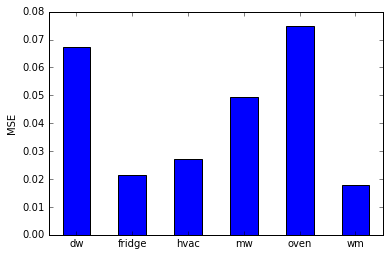

In [68]:
pd.Series(mse).plot(kind="bar",rot=0)
import matplotlib.pyplot as plt
plt.ylabel("MSE")

26 NuclearNorm
59 NuclearNorm
94 NuclearNorm
101 NuclearNorm
222 NuclearNorm
252 NuclearNorm
364 NuclearNorm
545 NuclearNorm
624 NuclearNorm
661 NuclearNorm
871 NuclearNorm
946 NuclearNorm
1169 NuclearNorm
1283 NuclearNorm
1310 NuclearNorm
1334 NuclearNorm
1415 NuclearNorm
1463 NuclearNorm
1500 NuclearNorm
1642 NuclearNorm
1697 NuclearNorm
1700 NuclearNorm
1790 NuclearNorm
1800 NuclearNorm
1953 NuclearNorm
2129 NuclearNorm
2156 NuclearNorm
2233 NuclearNorm
2242 NuclearNorm
2365 NuclearNorm
2378 NuclearNorm
2470 NuclearNorm
2557 NuclearNorm
2814 NuclearNorm
2859 NuclearNorm
2925 NuclearNorm
2953 NuclearNorm
2986 NuclearNorm
3009 NuclearNorm
3036 NuclearNorm
3367 NuclearNorm
3456 NuclearNorm
3482 NuclearNorm
3577 NuclearNorm
3649 NuclearNorm
3723 NuclearNorm
3778 NuclearNorm
3829 NuclearNorm
3893 NuclearNorm
3967 NuclearNorm
4031 NuclearNorm
4213 NuclearNorm
4297 NuclearNorm
4298 NuclearNorm
4342 NuclearNorm
4505 NuclearNorm
4767 NuclearNorm
4874 NuclearNorm
4946 NuclearNorm
4957 Nuclear

In [25]:
a=pd.DataFrame(out['NuclearNorm']).T

In [35]:
(a*a).mean().mean()

0.021464730973842844

In [28]:
pred_df.ix[home][appliance_cols]

fridge_1     0.089305
fridge_2     0.082615
fridge_3     0.119794
fridge_4     0.072082
fridge_5     0.050521
fridge_6     0.063260
fridge_7     0.063942
fridge_8     0.066488
fridge_9     0.066956
fridge_10    0.060911
fridge_11    0.057762
fridge_12    0.046999
Name: 9982, dtype: float64

In [30]:
X_normalised.ix[home][appliance_cols]

fridge_1     0.183458
fridge_2     0.191770
fridge_3     0.255770
fridge_4     0.192261
fridge_5     0.159943
fridge_6     0.121310
fridge_7     0.093291
fridge_8     0.113679
fridge_9     0.120265
fridge_10    0.108122
fridge_11    0.102657
fridge_12    0.072290
Name: 9982, dtype: float64

In [30]:
 X_normalised.head(10)

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,aggregate_1,aggregate_2,aggregate_3,aggregate_4,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,aggregate_10,aggregate_11,aggregate_12
26,0.268580,0.391562,0.354348,0.485952,0.423089,0.445286,0.191176,0.119015,0.139450,0.238250,0.264163,0.451381,0.462876,0.342351,0.318240,0.339887,0.300179,0.184649
59,0.083667,0.141433,0.211260,0.374507,0.151210,0.083204,0.643877,0.514774,0.469548,0.317402,0.314919,0.337543,0.374149,0.323820,0.209625,0.250306,0.484892,0.603718
94,0.018833,0.046446,0.054788,0.073571,0.038679,0.028250,0.043921,0.008329,0.036826,0.073503,0.043213,0.109343,0.102650,0.023547,0.023076,0.055540,0.105099,0.071886
101,0.211989,0.233945,0.213504,0.255734,0.230129,0.211738,0.046441,0.023663,0.031909,0.137671,0.114979,0.220393,0.214252,0.079637,0.106973,0.106339,0.094690,0.066688
222,0.534035,0.646650,0.503590,0.616900,0.629034,0.663339,0.608796,0.528572,0.705696,0.679550,0.790309,0.976471,1.000000,1.000000,0.695549,0.757812,0.930975,0.611228
252,NaN,NaN,NaN,NaN,NaN,NaN,0.355006,0.312635,0.345354,0.466036,0.531221,0.747189,0.741987,0.570651,0.605162,0.502998,0.570800,0.607165
364,0.262441,0.385219,0.342594,0.457073,0.447491,0.426416,0.165746,0.141176,0.140974,0.192165,0.245914,0.441337,0.395841,0.248856,0.275310,0.256052,0.139370,0.000000
545,0.389795,0.561114,0.497692,0.606508,0.555478,0.422386,0.165030,0.145867,0.158861,0.277954,0.306238,0.551074,0.576684,0.414428,0.410604,0.315398,0.234634,0.170980
624,0.078196,0.136574,0.140541,0.202991,0.147672,0.015232,0.198745,0.100141,0.119221,0.105700,0.098029,0.210571,0.180674,0.088194,0.076730,0.089123,0.138281,0.112104
661,0.245238,0.467515,0.439553,0.578096,0.531963,0.450393,0.187602,0.133128,0.166824,0.235341,0.266728,0.493854,0.490906,0.368298,0.385970,0.340996,0.258772,0.241823


In [14]:
subset_hvac_sparse = subset_hvac.copy()
import numpy as np
n_rows, n_cols = subset_hvac_normalised.values.shape

In [ ]:
out = {}
for fraction_missing in np.arange(0.5, 0.8, 0.1):
    out[fraction_missing] = {}
    missing_mask = np.random.rand(n_rows, n_cols) < fraction_missing
    X_master = subset_hvac_normalised.copy().values 
    X = subset_hvac.copy().values 
    X[missing_mask] = np.nan
    subset_hvac_sparse=pd.DataFrame(X, index=subset_hvac.index, columns=subset_hvac.columns)
    col_max = subset_hvac_sparse.max()
    col_min = subset_hvac_sparse.min()
    subset_hvac_sparse_normalised = subset_hvac_sparse.copy()

    for col in subset_hvac.columns:
        subset_hvac_sparse_normalised[col] = (subset_hvac_sparse[col]-col_min[col])/(col_max[col]-col_min[col])
    X_normalised = subset_hvac_sparse_normalised.values
    
    for method_name, method in methods_dictionary.iteritems():
        try:
            print fraction_missing, method_name
            print "*"*40
            pred_df = pd.DataFrame(method.complete(X_normalised), 
                           index=subset_hvac_normalised.index, 
                           columns=subset_hvac_normalised.columns)
            X_filled = pred_df.values
            out[fraction_missing][method_name] = ((X_filled[missing_mask] - X_master[missing_mask]) ** 2).mean()
        except:
            pass

    

0.5 KNN
****************************************
Computing pairwise distances between 95 samples
Computing distances for sample #1/95, elapsed time: 0.000
No samples have sufficient overlap with sample 44
No samples have sufficient overlap with sample 47
Imputing row 1/95 with 3 missing columns, elapsed time: 0.005
[KNN] Warning: 12/570 still missing after imputation, replacing with 0
0.5 SoftImpute
****************************************
[SoftImpute] Max Singular Value of X_init = 4.943739
[SoftImpute] Iter 1: observed MAE=0.011187 rank=6
[SoftImpute] Iter 2: observed MAE=0.011195 rank=6
[SoftImpute] Iter 3: observed MAE=0.011202 rank=6
[SoftImpute] Iter 4: observed MAE=0.011210 rank=6
[SoftImpute] Iter 5: observed MAE=0.011217 rank=6
[SoftImpute] Iter 6: observed MAE=0.011224 rank=6
[SoftImpute] Iter 7: observed MAE=0.011230 rank=6
[SoftImpute] Iter 8: observed MAE=0.011235 rank=6
[SoftImpute] Iter 9: observed MAE=0.011240 rank=6
[SoftImpute] Iter 10: observed MAE=0.011244 rank=6
[S

INFO:downhill.dataset:train: 1 of 1 mini-batches from (95, 6)



[MICE] Starting imputation round 107/110, elapsed time 0.120
[MICE] Starting imputation round 108/110, elapsed time 0.121
[MICE] Starting imputation round 109/110, elapsed time 0.122
[MICE] Starting imputation round 110/110, elapsed time 0.122
0.5 MatrixFactorization
****************************************
I 2016-07-04 17:30:11 downhill.dataset:174 train: 1 of 1 mini-batches from (95, 6)


INFO:downhill.base:-- patience = 5


I 2016-07-04 17:30:11 downhill.base:389 -- patience = 5


INFO:downhill.base:-- validate_every = 10


I 2016-07-04 17:30:11 downhill.base:390 -- validate_every = 10


INFO:downhill.base:-- max_updates = None


I 2016-07-04 17:30:11 downhill.base:391 -- max_updates = None


INFO:downhill.base:-- min_improvement = 0.005


I 2016-07-04 17:30:11 downhill.base:392 -- min_improvement = 0.005


INFO:downhill.base:-- max_gradient_norm = 5


I 2016-07-04 17:30:11 downhill.base:393 -- max_gradient_norm = 5


INFO:downhill.base:-- max_gradient_elem = 0


I 2016-07-04 17:30:11 downhill.base:394 -- max_gradient_elem = 0


INFO:downhill.base:-- learning_rate = 0.001


I 2016-07-04 17:30:11 downhill.base:395 -- learning_rate = 0.001


INFO:downhill.base:-- momentum = 0


I 2016-07-04 17:30:11 downhill.base:396 -- momentum = 0


INFO:downhill.base:-- nesterov = False


I 2016-07-04 17:30:11 downhill.base:397 -- nesterov = False


INFO:downhill.adaptive:-- rms_halflife = 14


I 2016-07-04 17:30:11 downhill.adaptive:220 -- rms_halflife = 14


INFO:downhill.adaptive:-- rms_regularizer = 1e-08


I 2016-07-04 17:30:11 downhill.adaptive:221 -- rms_regularizer = 1e-08


INFO:downhill.base:compiling evaluation function


I 2016-07-04 17:30:11 downhill.base:118 compiling evaluation function


INFO:downhill.base:compiling Adam function


I 2016-07-04 17:30:11 downhill.base:124 compiling Adam function


INFO:downhill.base:validation 0 loss=6.835216 error=6.732018 grad(V)=2.821774 grad(U)=0.847590 *


I 2016-07-04 17:30:12 downhill.base:232 validation 0 loss=6.835216 error=6.732018 grad(V)=2.821774 grad(U)=0.847590 *


INFO:downhill.base:Adam 1 loss=6.835216 error=6.732018 grad(V)=2.821774 grad(U)=0.847590


I 2016-07-04 17:30:12 downhill.base:232 Adam 1 loss=6.835216 error=6.732018 grad(V)=2.821774 grad(U)=0.847590


INFO:downhill.base:Adam 2 loss=6.805249 error=6.702151 grad(V)=2.801557 grad(U)=0.842481


I 2016-07-04 17:30:12 downhill.base:232 Adam 2 loss=6.805249 error=6.702151 grad(V)=2.801557 grad(U)=0.842481


INFO:downhill.base:Adam 3 loss=6.764946 error=6.661984 grad(V)=2.774459 grad(U)=0.835622


I 2016-07-04 17:30:12 downhill.base:232 Adam 3 loss=6.764946 error=6.661984 grad(V)=2.774459 grad(U)=0.835622


INFO:downhill.base:Adam 4 loss=6.718025 error=6.615221 grad(V)=2.743045 grad(U)=0.827658


I 2016-07-04 17:30:12 downhill.base:232 Adam 4 loss=6.718025 error=6.615221 grad(V)=2.743045 grad(U)=0.827658


INFO:downhill.base:Adam 5 loss=6.666524 error=6.563895 grad(V)=2.708731 grad(U)=0.818943


I 2016-07-04 17:30:12 downhill.base:232 Adam 5 loss=6.666524 error=6.563895 grad(V)=2.708731 grad(U)=0.818943


INFO:downhill.base:Adam 6 loss=6.611783 error=6.509341 grad(V)=2.672453 grad(U)=0.809714


I 2016-07-04 17:30:12 downhill.base:232 Adam 6 loss=6.611783 error=6.509341 grad(V)=2.672453 grad(U)=0.809714


INFO:downhill.base:Adam 7 loss=6.554760 error=6.452514 grad(V)=2.634874 grad(U)=0.800141


I 2016-07-04 17:30:12 downhill.base:232 Adam 7 loss=6.554760 error=6.452514 grad(V)=2.634874 grad(U)=0.800141


INFO:downhill.base:Adam 8 loss=6.496168 error=6.394124 grad(V)=2.596491 grad(U)=0.790348


I 2016-07-04 17:30:12 downhill.base:232 Adam 8 loss=6.496168 error=6.394124 grad(V)=2.596491 grad(U)=0.790348


INFO:downhill.base:Adam 9 loss=6.436555 error=6.334719 grad(V)=2.557679 grad(U)=0.780433


I 2016-07-04 17:30:12 downhill.base:232 Adam 9 loss=6.436555 error=6.334719 grad(V)=2.557679 grad(U)=0.780433


INFO:downhill.base:Adam 10 loss=6.376352 error=6.274726 grad(V)=2.518728 grad(U)=0.770465


I 2016-07-04 17:30:12 downhill.base:232 Adam 10 loss=6.376352 error=6.274726 grad(V)=2.518728 grad(U)=0.770465


INFO:downhill.base:validation 1 loss=6.315896 error=6.214484 grad(V)=2.479864 grad(U)=0.760501 *


I 2016-07-04 17:30:12 downhill.base:232 validation 1 loss=6.315896 error=6.214484 grad(V)=2.479864 grad(U)=0.760501 *


INFO:downhill.base:Adam 11 loss=6.315896 error=6.214484 grad(V)=2.479864 grad(U)=0.760501


I 2016-07-04 17:30:12 downhill.base:232 Adam 11 loss=6.315896 error=6.214484 grad(V)=2.479864 grad(U)=0.760501


INFO:downhill.base:Adam 12 loss=6.255458 error=6.154260 grad(V)=2.441263 grad(U)=0.750583


I 2016-07-04 17:30:12 downhill.base:232 Adam 12 loss=6.255458 error=6.154260 grad(V)=2.441263 grad(U)=0.750583


INFO:downhill.base:Adam 13 loss=6.195253 error=6.094270 grad(V)=2.403061 grad(U)=0.740745


I 2016-07-04 17:30:12 downhill.base:232 Adam 13 loss=6.195253 error=6.094270 grad(V)=2.403061 grad(U)=0.740745


INFO:downhill.base:Adam 14 loss=6.135453 error=6.034684 grad(V)=2.365364 grad(U)=0.731014


I 2016-07-04 17:30:12 downhill.base:232 Adam 14 loss=6.135453 error=6.034684 grad(V)=2.365364 grad(U)=0.731014


INFO:downhill.base:Adam 15 loss=6.076193 error=5.975638 grad(V)=2.328254 grad(U)=0.721409


I 2016-07-04 17:30:12 downhill.base:232 Adam 15 loss=6.076193 error=5.975638 grad(V)=2.328254 grad(U)=0.721409


INFO:downhill.base:Adam 16 loss=6.017582 error=5.917240 grad(V)=2.291790 grad(U)=0.711948


I 2016-07-04 17:30:12 downhill.base:232 Adam 16 loss=6.017582 error=5.917240 grad(V)=2.291790 grad(U)=0.711948


INFO:downhill.base:Adam 17 loss=5.959705 error=5.859574 grad(V)=2.256019 grad(U)=0.702639


I 2016-07-04 17:30:12 downhill.base:232 Adam 17 loss=5.959705 error=5.859574 grad(V)=2.256019 grad(U)=0.702639


INFO:downhill.base:Adam 18 loss=5.902625 error=5.802704 grad(V)=2.220972 grad(U)=0.693498


I 2016-07-04 17:30:12 downhill.base:232 Adam 18 loss=5.902625 error=5.802704 grad(V)=2.220972 grad(U)=0.693498


INFO:downhill.base:Adam 19 loss=5.846393 error=5.746680 grad(V)=2.186672 grad(U)=0.684525


I 2016-07-04 17:30:12 downhill.base:232 Adam 19 loss=5.846393 error=5.746680 grad(V)=2.186672 grad(U)=0.684525


INFO:downhill.base:Adam 20 loss=5.791046 error=5.691538 grad(V)=2.153129 grad(U)=0.675729


I 2016-07-04 17:30:12 downhill.base:232 Adam 20 loss=5.791046 error=5.691538 grad(V)=2.153129 grad(U)=0.675729


INFO:downhill.base:validation 2 loss=5.736608 error=5.637303 grad(V)=2.120352 grad(U)=0.667112 *


I 2016-07-04 17:30:12 downhill.base:232 validation 2 loss=5.736608 error=5.637303 grad(V)=2.120352 grad(U)=0.667112 *


INFO:downhill.base:Adam 21 loss=5.736608 error=5.637303 grad(V)=2.120352 grad(U)=0.667112


I 2016-07-04 17:30:12 downhill.base:232 Adam 21 loss=5.736608 error=5.637303 grad(V)=2.120352 grad(U)=0.667112


INFO:downhill.base:Adam 22 loss=5.683096 error=5.583992 grad(V)=2.088338 grad(U)=0.658673


I 2016-07-04 17:30:12 downhill.base:232 Adam 22 loss=5.683096 error=5.583992 grad(V)=2.088338 grad(U)=0.658673


INFO:downhill.base:Adam 23 loss=5.630520 error=5.531614 grad(V)=2.057084 grad(U)=0.650409


I 2016-07-04 17:30:12 downhill.base:232 Adam 23 loss=5.630520 error=5.531614 grad(V)=2.057084 grad(U)=0.650409


INFO:downhill.base:Adam 24 loss=5.578882 error=5.480172 grad(V)=2.026581 grad(U)=0.642326


I 2016-07-04 17:30:12 downhill.base:232 Adam 24 loss=5.578882 error=5.480172 grad(V)=2.026581 grad(U)=0.642326


INFO:downhill.base:Adam 25 loss=5.528181 error=5.429664 grad(V)=1.996817 grad(U)=0.634416


I 2016-07-04 17:30:12 downhill.base:232 Adam 25 loss=5.528181 error=5.429664 grad(V)=1.996817 grad(U)=0.634416


INFO:downhill.base:Adam 26 loss=5.478411 error=5.380084 grad(V)=1.967780 grad(U)=0.626680


I 2016-07-04 17:30:12 downhill.base:232 Adam 26 loss=5.478411 error=5.380084 grad(V)=1.967780 grad(U)=0.626680


INFO:downhill.base:Adam 27 loss=5.429563 error=5.331423 grad(V)=1.939453 grad(U)=0.619117


I 2016-07-04 17:30:12 downhill.base:232 Adam 27 loss=5.429563 error=5.331423 grad(V)=1.939453 grad(U)=0.619117


INFO:downhill.base:Adam 28 loss=5.381624 error=5.283669 grad(V)=1.911820 grad(U)=0.611717


I 2016-07-04 17:30:12 downhill.base:232 Adam 28 loss=5.381624 error=5.283669 grad(V)=1.911820 grad(U)=0.611717


INFO:downhill.base:Adam 29 loss=5.334580 error=5.236808 grad(V)=1.884864 grad(U)=0.604478


I 2016-07-04 17:30:12 downhill.base:232 Adam 29 loss=5.334580 error=5.236808 grad(V)=1.884864 grad(U)=0.604478


INFO:downhill.base:Adam 30 loss=5.288417 error=5.190824 grad(V)=1.858566 grad(U)=0.597394


I 2016-07-04 17:30:12 downhill.base:232 Adam 30 loss=5.288417 error=5.190824 grad(V)=1.858566 grad(U)=0.597394


INFO:downhill.base:validation 3 loss=5.243115 error=5.145699 grad(V)=1.832908 grad(U)=0.590477 *


I 2016-07-04 17:30:12 downhill.base:232 validation 3 loss=5.243115 error=5.145699 grad(V)=1.832908 grad(U)=0.590477 *


INFO:downhill.base:Adam 31 loss=5.243115 error=5.145699 grad(V)=1.832908 grad(U)=0.590477


I 2016-07-04 17:30:12 downhill.base:232 Adam 31 loss=5.243115 error=5.145699 grad(V)=1.832908 grad(U)=0.590477


INFO:downhill.base:Adam 32 loss=5.198659 error=5.101417 grad(V)=1.807872 grad(U)=0.583711


I 2016-07-04 17:30:12 downhill.base:232 Adam 32 loss=5.198659 error=5.101417 grad(V)=1.807872 grad(U)=0.583711


INFO:downhill.base:Adam 33 loss=5.155027 error=5.057957 grad(V)=1.783438 grad(U)=0.577093


I 2016-07-04 17:30:12 downhill.base:232 Adam 33 loss=5.155027 error=5.057957 grad(V)=1.783438 grad(U)=0.577093


INFO:downhill.base:Adam 34 loss=5.112201 error=5.015300 grad(V)=1.759588 grad(U)=0.570618


I 2016-07-04 17:30:12 downhill.base:232 Adam 34 loss=5.112201 error=5.015300 grad(V)=1.759588 grad(U)=0.570618


INFO:downhill.base:Adam 35 loss=5.070161 error=4.973427 grad(V)=1.736303 grad(U)=0.564284


I 2016-07-04 17:30:12 downhill.base:232 Adam 35 loss=5.070161 error=4.973427 grad(V)=1.736303 grad(U)=0.564284


INFO:downhill.base:Adam 36 loss=5.028887 error=4.932317 grad(V)=1.713566 grad(U)=0.558087


I 2016-07-04 17:30:12 downhill.base:232 Adam 36 loss=5.028887 error=4.932317 grad(V)=1.713566 grad(U)=0.558087


INFO:downhill.base:Adam 37 loss=4.988359 error=4.891951 grad(V)=1.691359 grad(U)=0.552020


I 2016-07-04 17:30:12 downhill.base:232 Adam 37 loss=4.988359 error=4.891951 grad(V)=1.691359 grad(U)=0.552020


INFO:downhill.base:Adam 38 loss=4.948556 error=4.852309 grad(V)=1.669664 grad(U)=0.546082


I 2016-07-04 17:30:12 downhill.base:232 Adam 38 loss=4.948556 error=4.852309 grad(V)=1.669664 grad(U)=0.546082


INFO:downhill.base:Adam 39 loss=4.909460 error=4.813371 grad(V)=1.648464 grad(U)=0.540266


I 2016-07-04 17:30:12 downhill.base:232 Adam 39 loss=4.909460 error=4.813371 grad(V)=1.648464 grad(U)=0.540266


INFO:downhill.base:Adam 40 loss=4.871051 error=4.775118 grad(V)=1.627743 grad(U)=0.534572


I 2016-07-04 17:30:12 downhill.base:232 Adam 40 loss=4.871051 error=4.775118 grad(V)=1.627743 grad(U)=0.534572


INFO:downhill.base:validation 4 loss=4.833310 error=4.737530 grad(V)=1.607485 grad(U)=0.528995 *


I 2016-07-04 17:30:12 downhill.base:232 validation 4 loss=4.833310 error=4.737530 grad(V)=1.607485 grad(U)=0.528995 *


INFO:downhill.base:Adam 41 loss=4.833310 error=4.737530 grad(V)=1.607485 grad(U)=0.528995


I 2016-07-04 17:30:12 downhill.base:232 Adam 41 loss=4.833310 error=4.737530 grad(V)=1.607485 grad(U)=0.528995


INFO:downhill.base:Adam 42 loss=4.796217 error=4.700589 grad(V)=1.587674 grad(U)=0.523530


I 2016-07-04 17:30:12 downhill.base:232 Adam 42 loss=4.796217 error=4.700589 grad(V)=1.587674 grad(U)=0.523530


INFO:downhill.base:Adam 43 loss=4.759755 error=4.664276 grad(V)=1.568296 grad(U)=0.518175


I 2016-07-04 17:30:12 downhill.base:232 Adam 43 loss=4.759755 error=4.664276 grad(V)=1.568296 grad(U)=0.518175


INFO:downhill.base:Adam 44 loss=4.723905 error=4.628574 grad(V)=1.549336 grad(U)=0.512926


I 2016-07-04 17:30:12 downhill.base:232 Adam 44 loss=4.723905 error=4.628574 grad(V)=1.549336 grad(U)=0.512926


INFO:downhill.base:Adam 45 loss=4.688650 error=4.593464 grad(V)=1.530780 grad(U)=0.507778


I 2016-07-04 17:30:12 downhill.base:232 Adam 45 loss=4.688650 error=4.593464 grad(V)=1.530780 grad(U)=0.507778


INFO:downhill.base:Adam 46 loss=4.653973 error=4.558931 grad(V)=1.512616 grad(U)=0.502731


I 2016-07-04 17:30:12 downhill.base:232 Adam 46 loss=4.653973 error=4.558931 grad(V)=1.512616 grad(U)=0.502731


INFO:downhill.base:Adam 47 loss=4.619857 error=4.524957 grad(V)=1.494829 grad(U)=0.497781


I 2016-07-04 17:30:12 downhill.base:232 Adam 47 loss=4.619857 error=4.524957 grad(V)=1.494829 grad(U)=0.497781


INFO:downhill.base:Adam 48 loss=4.586286 error=4.491527 grad(V)=1.477408 grad(U)=0.492925


I 2016-07-04 17:30:12 downhill.base:232 Adam 48 loss=4.586286 error=4.491527 grad(V)=1.477408 grad(U)=0.492925


INFO:downhill.base:Adam 49 loss=4.553246 error=4.458625 grad(V)=1.460341 grad(U)=0.488159


I 2016-07-04 17:30:12 downhill.base:232 Adam 49 loss=4.553246 error=4.458625 grad(V)=1.460341 grad(U)=0.488159


INFO:downhill.base:Adam 50 loss=4.520719 error=4.426235 grad(V)=1.443616 grad(U)=0.483478


I 2016-07-04 17:30:12 downhill.base:232 Adam 50 loss=4.520719 error=4.426235 grad(V)=1.443616 grad(U)=0.483478


INFO:downhill.base:validation 5 loss=4.488693 error=4.394344 grad(V)=1.427223 grad(U)=0.478885 *


I 2016-07-04 17:30:12 downhill.base:232 validation 5 loss=4.488693 error=4.394344 grad(V)=1.427223 grad(U)=0.478885 *


INFO:downhill.base:Adam 51 loss=4.488693 error=4.394344 grad(V)=1.427223 grad(U)=0.478885


I 2016-07-04 17:30:12 downhill.base:232 Adam 51 loss=4.488693 error=4.394344 grad(V)=1.427223 grad(U)=0.478885


INFO:downhill.base:Adam 52 loss=4.457153 error=4.362937 grad(V)=1.411150 grad(U)=0.474376


I 2016-07-04 17:30:12 downhill.base:232 Adam 52 loss=4.457153 error=4.362937 grad(V)=1.411150 grad(U)=0.474376


INFO:downhill.base:Adam 53 loss=4.426085 error=4.332001 grad(V)=1.395389 grad(U)=0.469947


I 2016-07-04 17:30:12 downhill.base:232 Adam 53 loss=4.426085 error=4.332001 grad(V)=1.395389 grad(U)=0.469947


INFO:downhill.base:Adam 54 loss=4.395475 error=4.301522 grad(V)=1.379928 grad(U)=0.465581


I 2016-07-04 17:30:12 downhill.base:232 Adam 54 loss=4.395475 error=4.301522 grad(V)=1.379928 grad(U)=0.465581


INFO:downhill.base:Adam 55 loss=4.365313 error=4.271487 grad(V)=1.364760 grad(U)=0.461306


I 2016-07-04 17:30:12 downhill.base:232 Adam 55 loss=4.365313 error=4.271487 grad(V)=1.364760 grad(U)=0.461306


INFO:downhill.base:Adam 56 loss=4.335584 error=4.241885 grad(V)=1.349874 grad(U)=0.457102


I 2016-07-04 17:30:12 downhill.base:232 Adam 56 loss=4.335584 error=4.241885 grad(V)=1.349874 grad(U)=0.457102


INFO:downhill.base:Adam 57 loss=4.306277 error=4.212704 grad(V)=1.335263 grad(U)=0.452968


I 2016-07-04 17:30:12 downhill.base:232 Adam 57 loss=4.306277 error=4.212704 grad(V)=1.335263 grad(U)=0.452968


INFO:downhill.base:Adam 58 loss=4.277381 error=4.183932 grad(V)=1.320918 grad(U)=0.448907


I 2016-07-04 17:30:12 downhill.base:232 Adam 58 loss=4.277381 error=4.183932 grad(V)=1.320918 grad(U)=0.448907


INFO:downhill.base:Adam 59 loss=4.248884 error=4.155557 grad(V)=1.306831 grad(U)=0.444912


I 2016-07-04 17:30:12 downhill.base:232 Adam 59 loss=4.248884 error=4.155557 grad(V)=1.306831 grad(U)=0.444912


INFO:downhill.base:Adam 60 loss=4.220775 error=4.127571 grad(V)=1.292994 grad(U)=0.440983


I 2016-07-04 17:30:12 downhill.base:232 Adam 60 loss=4.220775 error=4.127571 grad(V)=1.292994 grad(U)=0.440983


INFO:downhill.base:validation 6 loss=4.193045 error=4.099961 grad(V)=1.279401 grad(U)=0.437117 *


I 2016-07-04 17:30:12 downhill.base:232 validation 6 loss=4.193045 error=4.099961 grad(V)=1.279401 grad(U)=0.437117 *


INFO:downhill.base:Adam 61 loss=4.193045 error=4.099961 grad(V)=1.279401 grad(U)=0.437117


I 2016-07-04 17:30:12 downhill.base:232 Adam 61 loss=4.193045 error=4.099961 grad(V)=1.279401 grad(U)=0.437117


INFO:downhill.base:Adam 62 loss=4.165684 error=4.072718 grad(V)=1.266043 grad(U)=0.433308


I 2016-07-04 17:30:12 downhill.base:232 Adam 62 loss=4.165684 error=4.072718 grad(V)=1.266043 grad(U)=0.433308


INFO:downhill.base:Adam 63 loss=4.138681 error=4.045833 grad(V)=1.252915 grad(U)=0.429564


I 2016-07-04 17:30:12 downhill.base:232 Adam 63 loss=4.138681 error=4.045833 grad(V)=1.252915 grad(U)=0.429564


INFO:downhill.base:Adam 64 loss=4.112028 error=4.019297 grad(V)=1.240010 grad(U)=0.425877


I 2016-07-04 17:30:12 downhill.base:232 Adam 64 loss=4.112028 error=4.019297 grad(V)=1.240010 grad(U)=0.425877


INFO:downhill.base:Adam 65 loss=4.085716 error=3.993100 grad(V)=1.227322 grad(U)=0.422247


I 2016-07-04 17:30:12 downhill.base:232 Adam 65 loss=4.085716 error=3.993100 grad(V)=1.227322 grad(U)=0.422247


INFO:downhill.base:Adam 66 loss=4.059736 error=3.967234 grad(V)=1.214844 grad(U)=0.418670


I 2016-07-04 17:30:12 downhill.base:232 Adam 66 loss=4.059736 error=3.967234 grad(V)=1.214844 grad(U)=0.418670


INFO:downhill.base:Adam 67 loss=4.034080 error=3.941690 grad(V)=1.202571 grad(U)=0.415146


I 2016-07-04 17:30:12 downhill.base:232 Adam 67 loss=4.034080 error=3.941690 grad(V)=1.202571 grad(U)=0.415146


INFO:downhill.base:Adam 68 loss=4.008739 error=3.916462 grad(V)=1.190497 grad(U)=0.411677


I 2016-07-04 17:30:12 downhill.base:232 Adam 68 loss=4.008739 error=3.916462 grad(V)=1.190497 grad(U)=0.411677


INFO:downhill.base:Adam 69 loss=3.983707 error=3.891540 grad(V)=1.178617 grad(U)=0.408259


I 2016-07-04 17:30:12 downhill.base:232 Adam 69 loss=3.983707 error=3.891540 grad(V)=1.178617 grad(U)=0.408259


INFO:downhill.base:Adam 70 loss=3.958975 error=3.866917 grad(V)=1.166926 grad(U)=0.404889


I 2016-07-04 17:30:12 downhill.base:232 Adam 70 loss=3.958975 error=3.866917 grad(V)=1.166926 grad(U)=0.404889


INFO:downhill.base:validation 7 loss=3.934536 error=3.842587 grad(V)=1.155419 grad(U)=0.401568 *


I 2016-07-04 17:30:12 downhill.base:232 validation 7 loss=3.934536 error=3.842587 grad(V)=1.155419 grad(U)=0.401568 *


INFO:downhill.base:Adam 71 loss=3.934536 error=3.842587 grad(V)=1.155419 grad(U)=0.401568


I 2016-07-04 17:30:12 downhill.base:232 Adam 71 loss=3.934536 error=3.842587 grad(V)=1.155419 grad(U)=0.401568


INFO:downhill.base:Adam 72 loss=3.910384 error=3.818542 grad(V)=1.144090 grad(U)=0.398289


I 2016-07-04 17:30:12 downhill.base:232 Adam 72 loss=3.910384 error=3.818542 grad(V)=1.144090 grad(U)=0.398289


INFO:downhill.base:Adam 73 loss=3.886511 error=3.794776 grad(V)=1.132936 grad(U)=0.395060


I 2016-07-04 17:30:12 downhill.base:232 Adam 73 loss=3.886511 error=3.794776 grad(V)=1.132936 grad(U)=0.395060


INFO:downhill.base:Adam 74 loss=3.862912 error=3.771282 grad(V)=1.121952 grad(U)=0.391876


I 2016-07-04 17:30:12 downhill.base:232 Adam 74 loss=3.862912 error=3.771282 grad(V)=1.121952 grad(U)=0.391876


INFO:downhill.base:Adam 75 loss=3.839579 error=3.748053 grad(V)=1.111134 grad(U)=0.388737


I 2016-07-04 17:30:12 downhill.base:232 Adam 75 loss=3.839579 error=3.748053 grad(V)=1.111134 grad(U)=0.388737


INFO:downhill.base:Adam 76 loss=3.816507 error=3.725085 grad(V)=1.100477 grad(U)=0.385639


I 2016-07-04 17:30:12 downhill.base:232 Adam 76 loss=3.816507 error=3.725085 grad(V)=1.100477 grad(U)=0.385639


INFO:downhill.base:Adam 77 loss=3.793689 error=3.702371 grad(V)=1.089977 grad(U)=0.382583


I 2016-07-04 17:30:12 downhill.base:232 Adam 77 loss=3.793689 error=3.702371 grad(V)=1.089977 grad(U)=0.382583


INFO:downhill.base:Adam 78 loss=3.771121 error=3.679904 grad(V)=1.079631 grad(U)=0.379567


I 2016-07-04 17:30:12 downhill.base:232 Adam 78 loss=3.771121 error=3.679904 grad(V)=1.079631 grad(U)=0.379567


INFO:downhill.base:Adam 79 loss=3.748797 error=3.657681 grad(V)=1.069435 grad(U)=0.376591


I 2016-07-04 17:30:12 downhill.base:232 Adam 79 loss=3.748797 error=3.657681 grad(V)=1.069435 grad(U)=0.376591


INFO:downhill.base:Adam 80 loss=3.726711 error=3.635695 grad(V)=1.059385 grad(U)=0.373653


I 2016-07-04 17:30:12 downhill.base:232 Adam 80 loss=3.726711 error=3.635695 grad(V)=1.059385 grad(U)=0.373653


INFO:downhill.base:validation 8 loss=3.704858 error=3.613942 grad(V)=1.049478 grad(U)=0.370753 *


I 2016-07-04 17:30:12 downhill.base:232 validation 8 loss=3.704858 error=3.613942 grad(V)=1.049478 grad(U)=0.370753 *


INFO:downhill.base:Adam 81 loss=3.704858 error=3.613942 grad(V)=1.049478 grad(U)=0.370753


I 2016-07-04 17:30:12 downhill.base:232 Adam 81 loss=3.704858 error=3.613942 grad(V)=1.049478 grad(U)=0.370753


INFO:downhill.base:Adam 82 loss=3.683234 error=3.592416 grad(V)=1.039711 grad(U)=0.367890


I 2016-07-04 17:30:12 downhill.base:232 Adam 82 loss=3.683234 error=3.592416 grad(V)=1.039711 grad(U)=0.367890


INFO:downhill.base:Adam 83 loss=3.661833 error=3.571113 grad(V)=1.030079 grad(U)=0.365062


I 2016-07-04 17:30:12 downhill.base:232 Adam 83 loss=3.661833 error=3.571113 grad(V)=1.030079 grad(U)=0.365062


INFO:downhill.base:Adam 84 loss=3.640651 error=3.550029 grad(V)=1.020581 grad(U)=0.362269


I 2016-07-04 17:30:12 downhill.base:232 Adam 84 loss=3.640651 error=3.550029 grad(V)=1.020581 grad(U)=0.362269


INFO:downhill.base:Adam 85 loss=3.619683 error=3.529157 grad(V)=1.011213 grad(U)=0.359509


I 2016-07-04 17:30:12 downhill.base:232 Adam 85 loss=3.619683 error=3.529157 grad(V)=1.011213 grad(U)=0.359509


INFO:downhill.base:Adam 86 loss=3.598926 error=3.508495 grad(V)=1.001972 grad(U)=0.356778


I 2016-07-04 17:30:12 downhill.base:232 Adam 86 loss=3.598926 error=3.508495 grad(V)=1.001972 grad(U)=0.356778


INFO:downhill.base:Adam 87 loss=3.578374 error=3.488038 grad(V)=0.992856 grad(U)=0.354086


I 2016-07-04 17:30:12 downhill.base:232 Adam 87 loss=3.578374 error=3.488038 grad(V)=0.992856 grad(U)=0.354086


INFO:downhill.base:Adam 88 loss=3.558024 error=3.467782 grad(V)=0.983861 grad(U)=0.351426


I 2016-07-04 17:30:12 downhill.base:232 Adam 88 loss=3.558024 error=3.467782 grad(V)=0.983861 grad(U)=0.351426


INFO:downhill.base:Adam 89 loss=3.537872 error=3.447723 grad(V)=0.974984 grad(U)=0.348797


I 2016-07-04 17:30:12 downhill.base:232 Adam 89 loss=3.537872 error=3.447723 grad(V)=0.974984 grad(U)=0.348797


INFO:downhill.base:Adam 90 loss=3.517914 error=3.427858 grad(V)=0.966224 grad(U)=0.346199


I 2016-07-04 17:30:12 downhill.base:232 Adam 90 loss=3.517914 error=3.427858 grad(V)=0.966224 grad(U)=0.346199


INFO:downhill.base:validation 9 loss=3.498146 error=3.408181 grad(V)=0.957578 grad(U)=0.343632 *


I 2016-07-04 17:30:12 downhill.base:232 validation 9 loss=3.498146 error=3.408181 grad(V)=0.957578 grad(U)=0.343632 *


INFO:downhill.base:Adam 91 loss=3.498146 error=3.408181 grad(V)=0.957578 grad(U)=0.343632


I 2016-07-04 17:30:12 downhill.base:232 Adam 91 loss=3.498146 error=3.408181 grad(V)=0.957578 grad(U)=0.343632


INFO:downhill.base:Adam 92 loss=3.478564 error=3.388691 grad(V)=0.949043 grad(U)=0.341094


I 2016-07-04 17:30:12 downhill.base:232 Adam 92 loss=3.478564 error=3.388691 grad(V)=0.949043 grad(U)=0.341094


INFO:downhill.base:Adam 93 loss=3.459166 error=3.369383 grad(V)=0.940617 grad(U)=0.338586


I 2016-07-04 17:30:12 downhill.base:232 Adam 93 loss=3.459166 error=3.369383 grad(V)=0.940617 grad(U)=0.338586


INFO:downhill.base:Adam 94 loss=3.439947 error=3.350254 grad(V)=0.932298 grad(U)=0.336106


I 2016-07-04 17:30:12 downhill.base:232 Adam 94 loss=3.439947 error=3.350254 grad(V)=0.932298 grad(U)=0.336106


INFO:downhill.base:Adam 95 loss=3.420904 error=3.331300 grad(V)=0.924084 grad(U)=0.333653


I 2016-07-04 17:30:12 downhill.base:232 Adam 95 loss=3.420904 error=3.331300 grad(V)=0.924084 grad(U)=0.333653


INFO:downhill.base:Adam 96 loss=3.402034 error=3.312519 grad(V)=0.915972 grad(U)=0.331229


I 2016-07-04 17:30:12 downhill.base:232 Adam 96 loss=3.402034 error=3.312519 grad(V)=0.915972 grad(U)=0.331229


INFO:downhill.base:Adam 97 loss=3.383334 error=3.293908 grad(V)=0.907960 grad(U)=0.328828


I 2016-07-04 17:30:12 downhill.base:232 Adam 97 loss=3.383334 error=3.293908 grad(V)=0.907960 grad(U)=0.328828


INFO:downhill.base:Adam 98 loss=3.364802 error=3.275462 grad(V)=0.900046 grad(U)=0.326456


I 2016-07-04 17:30:12 downhill.base:232 Adam 98 loss=3.364802 error=3.275462 grad(V)=0.900046 grad(U)=0.326456


INFO:downhill.base:Adam 99 loss=3.346433 error=3.257180 grad(V)=0.892229 grad(U)=0.324110


I 2016-07-04 17:30:12 downhill.base:232 Adam 99 loss=3.346433 error=3.257180 grad(V)=0.892229 grad(U)=0.324110


INFO:downhill.base:Adam 100 loss=3.328225 error=3.239059 grad(V)=0.884506 grad(U)=0.321790


I 2016-07-04 17:30:12 downhill.base:232 Adam 100 loss=3.328225 error=3.239059 grad(V)=0.884506 grad(U)=0.321790


INFO:downhill.base:validation 10 loss=3.310175 error=3.221095 grad(V)=0.876876 grad(U)=0.319494 *


I 2016-07-04 17:30:12 downhill.base:232 validation 10 loss=3.310175 error=3.221095 grad(V)=0.876876 grad(U)=0.319494 *


INFO:downhill.base:Adam 101 loss=3.310175 error=3.221095 grad(V)=0.876876 grad(U)=0.319494


I 2016-07-04 17:30:12 downhill.base:232 Adam 101 loss=3.310175 error=3.221095 grad(V)=0.876876 grad(U)=0.319494


INFO:downhill.base:Adam 102 loss=3.292281 error=3.203286 grad(V)=0.869337 grad(U)=0.317222


I 2016-07-04 17:30:12 downhill.base:232 Adam 102 loss=3.292281 error=3.203286 grad(V)=0.869337 grad(U)=0.317222


INFO:downhill.base:Adam 103 loss=3.274540 error=3.185630 grad(V)=0.861886 grad(U)=0.314975


I 2016-07-04 17:30:12 downhill.base:232 Adam 103 loss=3.274540 error=3.185630 grad(V)=0.861886 grad(U)=0.314975


INFO:downhill.base:Adam 104 loss=3.256950 error=3.168124 grad(V)=0.854523 grad(U)=0.312740


I 2016-07-04 17:30:12 downhill.base:232 Adam 104 loss=3.256950 error=3.168124 grad(V)=0.854523 grad(U)=0.312740


INFO:downhill.base:Adam 105 loss=3.239507 error=3.150764 grad(V)=0.847246 grad(U)=0.310539


I 2016-07-04 17:30:12 downhill.base:232 Adam 105 loss=3.239507 error=3.150764 grad(V)=0.847246 grad(U)=0.310539


INFO:downhill.base:Adam 106 loss=3.222210 error=3.133550 grad(V)=0.840052 grad(U)=0.308360


I 2016-07-04 17:30:12 downhill.base:232 Adam 106 loss=3.222210 error=3.133550 grad(V)=0.840052 grad(U)=0.308360


INFO:downhill.base:Adam 107 loss=3.205056 error=3.116479 grad(V)=0.832942 grad(U)=0.306204


I 2016-07-04 17:30:12 downhill.base:232 Adam 107 loss=3.205056 error=3.116479 grad(V)=0.832942 grad(U)=0.306204


INFO:downhill.base:Adam 108 loss=3.188042 error=3.099547 grad(V)=0.825912 grad(U)=0.304070


I 2016-07-04 17:30:12 downhill.base:232 Adam 108 loss=3.188042 error=3.099547 grad(V)=0.825912 grad(U)=0.304070


INFO:downhill.base:Adam 109 loss=3.171167 error=3.082754 grad(V)=0.818962 grad(U)=0.301956


I 2016-07-04 17:30:12 downhill.base:232 Adam 109 loss=3.171167 error=3.082754 grad(V)=0.818962 grad(U)=0.301956


INFO:downhill.base:Adam 110 loss=3.154429 error=3.066097 grad(V)=0.812090 grad(U)=0.299864


I 2016-07-04 17:30:12 downhill.base:232 Adam 110 loss=3.154429 error=3.066097 grad(V)=0.812090 grad(U)=0.299864


INFO:downhill.base:validation 11 loss=3.137824 error=3.049573 grad(V)=0.805295 grad(U)=0.297793 *


I 2016-07-04 17:30:12 downhill.base:232 validation 11 loss=3.137824 error=3.049573 grad(V)=0.805295 grad(U)=0.297793 *


INFO:downhill.base:Adam 111 loss=3.137824 error=3.049573 grad(V)=0.805295 grad(U)=0.297793


I 2016-07-04 17:30:12 downhill.base:232 Adam 111 loss=3.137824 error=3.049573 grad(V)=0.805295 grad(U)=0.297793


INFO:downhill.base:Adam 112 loss=3.121352 error=3.033181 grad(V)=0.798576 grad(U)=0.295743


I 2016-07-04 17:30:12 downhill.base:232 Adam 112 loss=3.121352 error=3.033181 grad(V)=0.798576 grad(U)=0.295743


INFO:downhill.base:Adam 113 loss=3.105010 error=3.016918 grad(V)=0.791930 grad(U)=0.293713


I 2016-07-04 17:30:12 downhill.base:232 Adam 113 loss=3.105010 error=3.016918 grad(V)=0.791930 grad(U)=0.293713


INFO:downhill.base:Adam 114 loss=3.088796 error=3.000784 grad(V)=0.785358 grad(U)=0.291703


I 2016-07-04 17:30:12 downhill.base:232 Adam 114 loss=3.088796 error=3.000784 grad(V)=0.785358 grad(U)=0.291703


INFO:downhill.base:Adam 115 loss=3.072708 error=2.984775 grad(V)=0.778856 grad(U)=0.289712


I 2016-07-04 17:30:12 downhill.base:232 Adam 115 loss=3.072708 error=2.984775 grad(V)=0.778856 grad(U)=0.289712


INFO:downhill.base:Adam 116 loss=3.056744 error=2.968890 grad(V)=0.772426 grad(U)=0.287727


I 2016-07-04 17:30:12 downhill.base:232 Adam 116 loss=3.056744 error=2.968890 grad(V)=0.772426 grad(U)=0.287727


INFO:downhill.base:Adam 117 loss=3.040904 error=2.953127 grad(V)=0.766065 grad(U)=0.285774


I 2016-07-04 17:30:12 downhill.base:232 Adam 117 loss=3.040904 error=2.953127 grad(V)=0.766065 grad(U)=0.285774


INFO:downhill.base:Adam 118 loss=3.025183 error=2.937484 grad(V)=0.759771 grad(U)=0.283840


I 2016-07-04 17:30:12 downhill.base:232 Adam 118 loss=3.025183 error=2.937484 grad(V)=0.759771 grad(U)=0.283840


INFO:downhill.base:Adam 119 loss=3.009582 error=2.921960 grad(V)=0.753545 grad(U)=0.281924


I 2016-07-04 17:30:12 downhill.base:232 Adam 119 loss=3.009582 error=2.921960 grad(V)=0.753545 grad(U)=0.281924


INFO:downhill.base:Adam 120 loss=2.994098 error=2.906552 grad(V)=0.747385 grad(U)=0.280025


I 2016-07-04 17:30:12 downhill.base:232 Adam 120 loss=2.994098 error=2.906552 grad(V)=0.747385 grad(U)=0.280025


INFO:downhill.base:validation 12 loss=2.978730 error=2.891260 grad(V)=0.741289 grad(U)=0.278143 *


I 2016-07-04 17:30:12 downhill.base:232 validation 12 loss=2.978730 error=2.891260 grad(V)=0.741289 grad(U)=0.278143 *


INFO:downhill.base:Adam 121 loss=2.978730 error=2.891260 grad(V)=0.741289 grad(U)=0.278143


I 2016-07-04 17:30:12 downhill.base:232 Adam 121 loss=2.978730 error=2.891260 grad(V)=0.741289 grad(U)=0.278143


INFO:downhill.base:Adam 122 loss=2.963475 error=2.876081 grad(V)=0.735258 grad(U)=0.276280


I 2016-07-04 17:30:12 downhill.base:232 Adam 122 loss=2.963475 error=2.876081 grad(V)=0.735258 grad(U)=0.276280


INFO:downhill.base:Adam 123 loss=2.948333 error=2.861014 grad(V)=0.729289 grad(U)=0.274434


I 2016-07-04 17:30:12 downhill.base:232 Adam 123 loss=2.948333 error=2.861014 grad(V)=0.729289 grad(U)=0.274434


INFO:downhill.base:Adam 124 loss=2.933302 error=2.846058 grad(V)=0.723382 grad(U)=0.272603


I 2016-07-04 17:30:12 downhill.base:232 Adam 124 loss=2.933302 error=2.846058 grad(V)=0.723382 grad(U)=0.272603


INFO:downhill.base:Adam 125 loss=2.918381 error=2.831211 grad(V)=0.717535 grad(U)=0.270790


I 2016-07-04 17:30:12 downhill.base:232 Adam 125 loss=2.918381 error=2.831211 grad(V)=0.717535 grad(U)=0.270790


INFO:downhill.base:Adam 126 loss=2.903567 error=2.816471 grad(V)=0.711749 grad(U)=0.268994


I 2016-07-04 17:30:12 downhill.base:232 Adam 126 loss=2.903567 error=2.816471 grad(V)=0.711749 grad(U)=0.268994


INFO:downhill.base:Adam 127 loss=2.888859 error=2.801837 grad(V)=0.706021 grad(U)=0.267213


I 2016-07-04 17:30:12 downhill.base:232 Adam 127 loss=2.888859 error=2.801837 grad(V)=0.706021 grad(U)=0.267213


INFO:downhill.base:Adam 128 loss=2.874256 error=2.787307 grad(V)=0.700352 grad(U)=0.265449


I 2016-07-04 17:30:12 downhill.base:232 Adam 128 loss=2.874256 error=2.787307 grad(V)=0.700352 grad(U)=0.265449


INFO:downhill.base:Adam 129 loss=2.859757 error=2.772881 grad(V)=0.694739 grad(U)=0.263695


I 2016-07-04 17:30:12 downhill.base:232 Adam 129 loss=2.859757 error=2.772881 grad(V)=0.694739 grad(U)=0.263695


INFO:downhill.base:Adam 130 loss=2.845361 error=2.758556 grad(V)=0.689183 grad(U)=0.261957


I 2016-07-04 17:30:12 downhill.base:232 Adam 130 loss=2.845361 error=2.758556 grad(V)=0.689183 grad(U)=0.261957


INFO:downhill.base:validation 13 loss=2.831065 error=2.744332 grad(V)=0.683682 grad(U)=0.260239 *


I 2016-07-04 17:30:12 downhill.base:232 validation 13 loss=2.831065 error=2.744332 grad(V)=0.683682 grad(U)=0.260239 *


INFO:downhill.base:Adam 131 loss=2.831065 error=2.744332 grad(V)=0.683682 grad(U)=0.260239


I 2016-07-04 17:30:12 downhill.base:232 Adam 131 loss=2.831065 error=2.744332 grad(V)=0.683682 grad(U)=0.260239


INFO:downhill.base:Adam 132 loss=2.816869 error=2.730207 grad(V)=0.678236 grad(U)=0.258536


I 2016-07-04 17:30:12 downhill.base:232 Adam 132 loss=2.816869 error=2.730207 grad(V)=0.678236 grad(U)=0.258536


INFO:downhill.base:Adam 133 loss=2.802771 error=2.716181 grad(V)=0.672844 grad(U)=0.256848


I 2016-07-04 17:30:12 downhill.base:232 Adam 133 loss=2.802771 error=2.716181 grad(V)=0.672844 grad(U)=0.256848


INFO:downhill.base:Adam 134 loss=2.788770 error=2.702250 grad(V)=0.667505 grad(U)=0.255174


I 2016-07-04 17:30:12 downhill.base:232 Adam 134 loss=2.788770 error=2.702250 grad(V)=0.667505 grad(U)=0.255174


INFO:downhill.base:Adam 135 loss=2.774865 error=2.688416 grad(V)=0.662219 grad(U)=0.253514


I 2016-07-04 17:30:12 downhill.base:232 Adam 135 loss=2.774865 error=2.688416 grad(V)=0.662219 grad(U)=0.253514


INFO:downhill.base:Adam 136 loss=2.761054 error=2.674675 grad(V)=0.656983 grad(U)=0.251869


I 2016-07-04 17:30:12 downhill.base:232 Adam 136 loss=2.761054 error=2.674675 grad(V)=0.656983 grad(U)=0.251869


INFO:downhill.base:Adam 137 loss=2.747337 error=2.661028 grad(V)=0.651799 grad(U)=0.250238


I 2016-07-04 17:30:12 downhill.base:232 Adam 137 loss=2.747337 error=2.661028 grad(V)=0.651799 grad(U)=0.250238


INFO:downhill.base:Adam 138 loss=2.733712 error=2.647472 grad(V)=0.646665 grad(U)=0.248620


I 2016-07-04 17:30:12 downhill.base:232 Adam 138 loss=2.733712 error=2.647472 grad(V)=0.646665 grad(U)=0.248620


INFO:downhill.base:Adam 139 loss=2.720178 error=2.634008 grad(V)=0.641580 grad(U)=0.247016


I 2016-07-04 17:30:12 downhill.base:232 Adam 139 loss=2.720178 error=2.634008 grad(V)=0.641580 grad(U)=0.247016


INFO:downhill.base:Adam 140 loss=2.706735 error=2.620633 grad(V)=0.636543 grad(U)=0.245425


I 2016-07-04 17:30:12 downhill.base:232 Adam 140 loss=2.706735 error=2.620633 grad(V)=0.636543 grad(U)=0.245425


INFO:downhill.base:validation 14 loss=2.693380 error=2.607347 grad(V)=0.631555 grad(U)=0.243848 *


I 2016-07-04 17:30:12 downhill.base:232 validation 14 loss=2.693380 error=2.607347 grad(V)=0.631555 grad(U)=0.243848 *


INFO:downhill.base:Adam 141 loss=2.693380 error=2.607347 grad(V)=0.631555 grad(U)=0.243848


I 2016-07-04 17:30:12 downhill.base:232 Adam 141 loss=2.693380 error=2.607347 grad(V)=0.631555 grad(U)=0.243848


INFO:downhill.base:Adam 142 loss=2.680113 error=2.594148 grad(V)=0.626614 grad(U)=0.242284


I 2016-07-04 17:30:12 downhill.base:232 Adam 142 loss=2.680113 error=2.594148 grad(V)=0.626614 grad(U)=0.242284


INFO:downhill.base:Adam 143 loss=2.666933 error=2.581036 grad(V)=0.621719 grad(U)=0.240726


I 2016-07-04 17:30:12 downhill.base:232 Adam 143 loss=2.666933 error=2.581036 grad(V)=0.621719 grad(U)=0.240726


INFO:downhill.base:Adam 144 loss=2.653839 error=2.568010 grad(V)=0.616871 grad(U)=0.239187


I 2016-07-04 17:30:12 downhill.base:232 Adam 144 loss=2.653839 error=2.568010 grad(V)=0.616871 grad(U)=0.239187


INFO:downhill.base:Adam 145 loss=2.640830 error=2.555068 grad(V)=0.612068 grad(U)=0.237657


I 2016-07-04 17:30:12 downhill.base:232 Adam 145 loss=2.640830 error=2.555068 grad(V)=0.612068 grad(U)=0.237657


INFO:downhill.base:Adam 146 loss=2.627905 error=2.542209 grad(V)=0.607310 grad(U)=0.236143


I 2016-07-04 17:30:12 downhill.base:232 Adam 146 loss=2.627905 error=2.542209 grad(V)=0.607310 grad(U)=0.236143


INFO:downhill.base:Adam 147 loss=2.615063 error=2.529434 grad(V)=0.602595 grad(U)=0.234642


I 2016-07-04 17:30:12 downhill.base:232 Adam 147 loss=2.615063 error=2.529434 grad(V)=0.602595 grad(U)=0.234642


INFO:downhill.base:Adam 148 loss=2.602303 error=2.516740 grad(V)=0.597925 grad(U)=0.233152


I 2016-07-04 17:30:12 downhill.base:232 Adam 148 loss=2.602303 error=2.516740 grad(V)=0.597925 grad(U)=0.233152


INFO:downhill.base:Adam 149 loss=2.589624 error=2.504127 grad(V)=0.593297 grad(U)=0.231675


I 2016-07-04 17:30:12 downhill.base:232 Adam 149 loss=2.589624 error=2.504127 grad(V)=0.593297 grad(U)=0.231675


INFO:downhill.base:Adam 150 loss=2.577025 error=2.491593 grad(V)=0.588712 grad(U)=0.230209


I 2016-07-04 17:30:12 downhill.base:232 Adam 150 loss=2.577025 error=2.491593 grad(V)=0.588712 grad(U)=0.230209


INFO:downhill.base:validation 15 loss=2.564506 error=2.479139 grad(V)=0.584169 grad(U)=0.228755 *


I 2016-07-04 17:30:12 downhill.base:232 validation 15 loss=2.564506 error=2.479139 grad(V)=0.584169 grad(U)=0.228755 *


INFO:downhill.base:Adam 151 loss=2.564506 error=2.479139 grad(V)=0.584169 grad(U)=0.228755


I 2016-07-04 17:30:12 downhill.base:232 Adam 151 loss=2.564506 error=2.479139 grad(V)=0.584169 grad(U)=0.228755


INFO:downhill.base:Adam 152 loss=2.552064 error=2.466763 grad(V)=0.579667 grad(U)=0.227312


I 2016-07-04 17:30:12 downhill.base:232 Adam 152 loss=2.552064 error=2.466763 grad(V)=0.579667 grad(U)=0.227312


INFO:downhill.base:Adam 153 loss=2.539701 error=2.454464 grad(V)=0.575206 grad(U)=0.225880


I 2016-07-04 17:30:12 downhill.base:232 Adam 153 loss=2.539701 error=2.454464 grad(V)=0.575206 grad(U)=0.225880


INFO:downhill.base:Adam 154 loss=2.527414 error=2.442241 grad(V)=0.570785 grad(U)=0.224460


I 2016-07-04 17:30:12 downhill.base:232 Adam 154 loss=2.527414 error=2.442241 grad(V)=0.570785 grad(U)=0.224460


INFO:downhill.base:Adam 155 loss=2.515203 error=2.430094 grad(V)=0.566404 grad(U)=0.223051


I 2016-07-04 17:30:12 downhill.base:232 Adam 155 loss=2.515203 error=2.430094 grad(V)=0.566404 grad(U)=0.223051


INFO:downhill.base:Adam 156 loss=2.503067 error=2.418022 grad(V)=0.562062 grad(U)=0.221652


I 2016-07-04 17:30:12 downhill.base:232 Adam 156 loss=2.503067 error=2.418022 grad(V)=0.562062 grad(U)=0.221652


INFO:downhill.base:Adam 157 loss=2.491006 error=2.406024 grad(V)=0.557759 grad(U)=0.220265


I 2016-07-04 17:30:12 downhill.base:232 Adam 157 loss=2.491006 error=2.406024 grad(V)=0.557759 grad(U)=0.220265


INFO:downhill.base:Adam 158 loss=2.479018 error=2.394099 grad(V)=0.553494 grad(U)=0.218888


I 2016-07-04 17:30:12 downhill.base:232 Adam 158 loss=2.479018 error=2.394099 grad(V)=0.553494 grad(U)=0.218888


INFO:downhill.base:Adam 159 loss=2.467103 error=2.382246 grad(V)=0.549267 grad(U)=0.217521


I 2016-07-04 17:30:12 downhill.base:232 Adam 159 loss=2.467103 error=2.382246 grad(V)=0.549267 grad(U)=0.217521


INFO:downhill.base:Adam 160 loss=2.455260 error=2.370465 grad(V)=0.545077 grad(U)=0.216166


I 2016-07-04 17:30:12 downhill.base:232 Adam 160 loss=2.455260 error=2.370465 grad(V)=0.545077 grad(U)=0.216166


INFO:downhill.base:validation 16 loss=2.443488 error=2.358755 grad(V)=0.540924 grad(U)=0.214821 *


I 2016-07-04 17:30:12 downhill.base:232 validation 16 loss=2.443488 error=2.358755 grad(V)=0.540924 grad(U)=0.214821 *


INFO:downhill.base:Adam 161 loss=2.443488 error=2.358755 grad(V)=0.540924 grad(U)=0.214821


I 2016-07-04 17:30:12 downhill.base:232 Adam 161 loss=2.443488 error=2.358755 grad(V)=0.540924 grad(U)=0.214821


INFO:downhill.base:Adam 162 loss=2.431787 error=2.347116 grad(V)=0.536808 grad(U)=0.213486


I 2016-07-04 17:30:12 downhill.base:232 Adam 162 loss=2.431787 error=2.347116 grad(V)=0.536808 grad(U)=0.213486


INFO:downhill.base:Adam 163 loss=2.420155 error=2.335546 grad(V)=0.532727 grad(U)=0.212159


I 2016-07-04 17:30:12 downhill.base:232 Adam 163 loss=2.420155 error=2.335546 grad(V)=0.532727 grad(U)=0.212159


INFO:downhill.base:Adam 164 loss=2.408593 error=2.324045 grad(V)=0.528682 grad(U)=0.210843


I 2016-07-04 17:30:12 downhill.base:232 Adam 164 loss=2.408593 error=2.324045 grad(V)=0.528682 grad(U)=0.210843


INFO:downhill.base:Adam 165 loss=2.397099 error=2.312611 grad(V)=0.524672 grad(U)=0.209538


I 2016-07-04 17:30:12 downhill.base:232 Adam 165 loss=2.397099 error=2.312611 grad(V)=0.524672 grad(U)=0.209538


INFO:downhill.base:Adam 166 loss=2.385672 error=2.301246 grad(V)=0.520697 grad(U)=0.208238


I 2016-07-04 17:30:12 downhill.base:232 Adam 166 loss=2.385672 error=2.301246 grad(V)=0.520697 grad(U)=0.208238


INFO:downhill.base:Adam 167 loss=2.374313 error=2.289947 grad(V)=0.516756 grad(U)=0.206953


I 2016-07-04 17:30:12 downhill.base:232 Adam 167 loss=2.374313 error=2.289947 grad(V)=0.516756 grad(U)=0.206953


INFO:downhill.base:Adam 168 loss=2.363021 error=2.278714 grad(V)=0.512849 grad(U)=0.205677


I 2016-07-04 17:30:12 downhill.base:232 Adam 168 loss=2.363021 error=2.278714 grad(V)=0.512849 grad(U)=0.205677


INFO:downhill.base:Adam 169 loss=2.351793 error=2.267547 grad(V)=0.508975 grad(U)=0.204410


I 2016-07-04 17:30:12 downhill.base:232 Adam 169 loss=2.351793 error=2.267547 grad(V)=0.508975 grad(U)=0.204410


INFO:downhill.base:Adam 170 loss=2.340631 error=2.256444 grad(V)=0.505134 grad(U)=0.203153


I 2016-07-04 17:30:12 downhill.base:232 Adam 170 loss=2.340631 error=2.256444 grad(V)=0.505134 grad(U)=0.203153


INFO:downhill.base:validation 17 loss=2.329534 error=2.245406 grad(V)=0.501326 grad(U)=0.201904 *


I 2016-07-04 17:30:12 downhill.base:232 validation 17 loss=2.329534 error=2.245406 grad(V)=0.501326 grad(U)=0.201904 *


INFO:downhill.base:Adam 171 loss=2.329534 error=2.245406 grad(V)=0.501326 grad(U)=0.201904


I 2016-07-04 17:30:12 downhill.base:232 Adam 171 loss=2.329534 error=2.245406 grad(V)=0.501326 grad(U)=0.201904


INFO:downhill.base:Adam 172 loss=2.318500 error=2.234431 grad(V)=0.497551 grad(U)=0.200665


I 2016-07-04 17:30:12 downhill.base:232 Adam 172 loss=2.318500 error=2.234431 grad(V)=0.497551 grad(U)=0.200665


INFO:downhill.base:Adam 173 loss=2.307529 error=2.223520 grad(V)=0.493807 grad(U)=0.199435


I 2016-07-04 17:30:12 downhill.base:232 Adam 173 loss=2.307529 error=2.223520 grad(V)=0.493807 grad(U)=0.199435


INFO:downhill.base:Adam 174 loss=2.296621 error=2.212670 grad(V)=0.490095 grad(U)=0.198214


I 2016-07-04 17:30:12 downhill.base:232 Adam 174 loss=2.296621 error=2.212670 grad(V)=0.490095 grad(U)=0.198214


INFO:downhill.base:Adam 175 loss=2.285775 error=2.201883 grad(V)=0.486414 grad(U)=0.197002


I 2016-07-04 17:30:12 downhill.base:232 Adam 175 loss=2.285775 error=2.201883 grad(V)=0.486414 grad(U)=0.197002


INFO:downhill.base:Adam 176 loss=2.274991 error=2.191156 grad(V)=0.482763 grad(U)=0.195798


I 2016-07-04 17:30:12 downhill.base:232 Adam 176 loss=2.274991 error=2.191156 grad(V)=0.482763 grad(U)=0.195798


INFO:downhill.base:Adam 177 loss=2.264267 error=2.180491 grad(V)=0.479144 grad(U)=0.194603


I 2016-07-04 17:30:12 downhill.base:232 Adam 177 loss=2.264267 error=2.180491 grad(V)=0.479144 grad(U)=0.194603


INFO:downhill.base:Adam 178 loss=2.253604 error=2.169885 grad(V)=0.475554 grad(U)=0.193412


I 2016-07-04 17:30:12 downhill.base:232 Adam 178 loss=2.253604 error=2.169885 grad(V)=0.475554 grad(U)=0.193412


INFO:downhill.base:Adam 179 loss=2.243001 error=2.159339 grad(V)=0.471995 grad(U)=0.192234


I 2016-07-04 17:30:12 downhill.base:232 Adam 179 loss=2.243001 error=2.159339 grad(V)=0.471995 grad(U)=0.192234


INFO:downhill.base:Adam 180 loss=2.232457 error=2.148852 grad(V)=0.468464 grad(U)=0.191065


I 2016-07-04 17:30:12 downhill.base:232 Adam 180 loss=2.232457 error=2.148852 grad(V)=0.468464 grad(U)=0.191065


INFO:downhill.base:validation 18 loss=2.221971 error=2.138424 grad(V)=0.464963 grad(U)=0.189899 *


I 2016-07-04 17:30:12 downhill.base:232 validation 18 loss=2.221971 error=2.138424 grad(V)=0.464963 grad(U)=0.189899 *


INFO:downhill.base:Adam 181 loss=2.221971 error=2.138424 grad(V)=0.464963 grad(U)=0.189899


I 2016-07-04 17:30:12 downhill.base:232 Adam 181 loss=2.221971 error=2.138424 grad(V)=0.464963 grad(U)=0.189899


INFO:downhill.base:Adam 182 loss=2.211544 error=2.128053 grad(V)=0.461491 grad(U)=0.188746


I 2016-07-04 17:30:12 downhill.base:232 Adam 182 loss=2.211544 error=2.128053 grad(V)=0.461491 grad(U)=0.188746


INFO:downhill.base:Adam 183 loss=2.201175 error=2.117740 grad(V)=0.458047 grad(U)=0.187601


I 2016-07-04 17:30:12 downhill.base:232 Adam 183 loss=2.201175 error=2.117740 grad(V)=0.458047 grad(U)=0.187601


INFO:downhill.base:Adam 184 loss=2.190862 error=2.107484 grad(V)=0.454632 grad(U)=0.186464


I 2016-07-04 17:30:12 downhill.base:232 Adam 184 loss=2.190862 error=2.107484 grad(V)=0.454632 grad(U)=0.186464


INFO:downhill.base:Adam 185 loss=2.180606 error=2.097284 grad(V)=0.451244 grad(U)=0.185331


I 2016-07-04 17:30:12 downhill.base:232 Adam 185 loss=2.180606 error=2.097284 grad(V)=0.451244 grad(U)=0.185331


INFO:downhill.base:Adam 186 loss=2.170407 error=2.087140 grad(V)=0.447884 grad(U)=0.184210


I 2016-07-04 17:30:12 downhill.base:232 Adam 186 loss=2.170407 error=2.087140 grad(V)=0.447884 grad(U)=0.184210


INFO:downhill.base:Adam 187 loss=2.160263 error=2.077051 grad(V)=0.444552 grad(U)=0.183096


I 2016-07-04 17:30:12 downhill.base:232 Adam 187 loss=2.160263 error=2.077051 grad(V)=0.444552 grad(U)=0.183096


INFO:downhill.base:Adam 188 loss=2.150174 error=2.067018 grad(V)=0.441246 grad(U)=0.181991


I 2016-07-04 17:30:12 downhill.base:232 Adam 188 loss=2.150174 error=2.067018 grad(V)=0.441246 grad(U)=0.181991


INFO:downhill.base:Adam 189 loss=2.140140 error=2.057039 grad(V)=0.437967 grad(U)=0.180893


I 2016-07-04 17:30:12 downhill.base:232 Adam 189 loss=2.140140 error=2.057039 grad(V)=0.437967 grad(U)=0.180893


INFO:downhill.base:Adam 190 loss=2.130160 error=2.047114 grad(V)=0.434715 grad(U)=0.179803


I 2016-07-04 17:30:12 downhill.base:232 Adam 190 loss=2.130160 error=2.047114 grad(V)=0.434715 grad(U)=0.179803


INFO:downhill.base:validation 19 loss=2.120234 error=2.037242 grad(V)=0.431489 grad(U)=0.178720 *


I 2016-07-04 17:30:12 downhill.base:232 validation 19 loss=2.120234 error=2.037242 grad(V)=0.431489 grad(U)=0.178720 *


INFO:downhill.base:Adam 191 loss=2.120234 error=2.037242 grad(V)=0.431489 grad(U)=0.178720


I 2016-07-04 17:30:12 downhill.base:232 Adam 191 loss=2.120234 error=2.037242 grad(V)=0.431489 grad(U)=0.178720


INFO:downhill.base:Adam 192 loss=2.110361 error=2.027424 grad(V)=0.428289 grad(U)=0.177645


I 2016-07-04 17:30:12 downhill.base:232 Adam 192 loss=2.110361 error=2.027424 grad(V)=0.428289 grad(U)=0.177645


INFO:downhill.base:Adam 193 loss=2.100541 error=2.017658 grad(V)=0.425114 grad(U)=0.176577


I 2016-07-04 17:30:12 downhill.base:232 Adam 193 loss=2.100541 error=2.017658 grad(V)=0.425114 grad(U)=0.176577


INFO:downhill.base:Adam 194 loss=2.090773 error=2.007944 grad(V)=0.421965 grad(U)=0.175516


I 2016-07-04 17:30:12 downhill.base:232 Adam 194 loss=2.090773 error=2.007944 grad(V)=0.421965 grad(U)=0.175516


INFO:downhill.base:Adam 195 loss=2.081058 error=1.998283 grad(V)=0.418841 grad(U)=0.174463


I 2016-07-04 17:30:12 downhill.base:232 Adam 195 loss=2.081058 error=1.998283 grad(V)=0.418841 grad(U)=0.174463


INFO:downhill.base:Adam 196 loss=2.071393 error=1.988672 grad(V)=0.415741 grad(U)=0.173416


I 2016-07-04 17:30:12 downhill.base:232 Adam 196 loss=2.071393 error=1.988672 grad(V)=0.415741 grad(U)=0.173416


INFO:downhill.base:Adam 197 loss=2.061780 error=1.979113 grad(V)=0.412666 grad(U)=0.172377


I 2016-07-04 17:30:12 downhill.base:232 Adam 197 loss=2.061780 error=1.979113 grad(V)=0.412666 grad(U)=0.172377


INFO:downhill.base:Adam 198 loss=2.052218 error=1.969603 grad(V)=0.409616 grad(U)=0.171345


I 2016-07-04 17:30:12 downhill.base:232 Adam 198 loss=2.052218 error=1.969603 grad(V)=0.409616 grad(U)=0.171345


INFO:downhill.base:Adam 199 loss=2.042706 error=1.960144 grad(V)=0.406590 grad(U)=0.170319


I 2016-07-04 17:30:12 downhill.base:232 Adam 199 loss=2.042706 error=1.960144 grad(V)=0.406590 grad(U)=0.170319


INFO:downhill.base:Adam 200 loss=2.033244 error=1.950735 grad(V)=0.403587 grad(U)=0.169301


I 2016-07-04 17:30:12 downhill.base:232 Adam 200 loss=2.033244 error=1.950735 grad(V)=0.403587 grad(U)=0.169301


INFO:downhill.base:validation 20 loss=2.023831 error=1.941375 grad(V)=0.400609 grad(U)=0.168289 *


I 2016-07-04 17:30:12 downhill.base:232 validation 20 loss=2.023831 error=1.941375 grad(V)=0.400609 grad(U)=0.168289 *


INFO:downhill.base:Adam 201 loss=2.023831 error=1.941375 grad(V)=0.400609 grad(U)=0.168289


I 2016-07-04 17:30:13 downhill.base:232 Adam 201 loss=2.023831 error=1.941375 grad(V)=0.400609 grad(U)=0.168289


INFO:downhill.base:Adam 202 loss=2.014467 error=1.932064 grad(V)=0.397653 grad(U)=0.167284


I 2016-07-04 17:30:13 downhill.base:232 Adam 202 loss=2.014467 error=1.932064 grad(V)=0.397653 grad(U)=0.167284


INFO:downhill.base:Adam 203 loss=2.005152 error=1.922801 grad(V)=0.394721 grad(U)=0.166286


I 2016-07-04 17:30:13 downhill.base:232 Adam 203 loss=2.005152 error=1.922801 grad(V)=0.394721 grad(U)=0.166286


INFO:downhill.base:Adam 204 loss=1.995885 error=1.913587 grad(V)=0.391811 grad(U)=0.165294


I 2016-07-04 17:30:13 downhill.base:232 Adam 204 loss=1.995885 error=1.913587 grad(V)=0.391811 grad(U)=0.165294


INFO:downhill.base:Adam 205 loss=1.986667 error=1.904420 grad(V)=0.388925 grad(U)=0.164309


I 2016-07-04 17:30:13 downhill.base:232 Adam 205 loss=1.986667 error=1.904420 grad(V)=0.388925 grad(U)=0.164309


INFO:downhill.base:Adam 206 loss=1.977495 error=1.895301 grad(V)=0.386061 grad(U)=0.163330


I 2016-07-04 17:30:13 downhill.base:232 Adam 206 loss=1.977495 error=1.895301 grad(V)=0.386061 grad(U)=0.163330


INFO:downhill.base:Adam 207 loss=1.968371 error=1.886228 grad(V)=0.383219 grad(U)=0.162358


I 2016-07-04 17:30:13 downhill.base:232 Adam 207 loss=1.968371 error=1.886228 grad(V)=0.383219 grad(U)=0.162358


INFO:downhill.base:Adam 208 loss=1.959294 error=1.877202 grad(V)=0.380399 grad(U)=0.161392


I 2016-07-04 17:30:13 downhill.base:232 Adam 208 loss=1.959294 error=1.877202 grad(V)=0.380399 grad(U)=0.161392


INFO:downhill.base:Adam 209 loss=1.950263 error=1.868223 grad(V)=0.377601 grad(U)=0.160433


I 2016-07-04 17:30:13 downhill.base:232 Adam 209 loss=1.950263 error=1.868223 grad(V)=0.377601 grad(U)=0.160433


INFO:downhill.base:Adam 210 loss=1.941278 error=1.859289 grad(V)=0.374824 grad(U)=0.159475


I 2016-07-04 17:30:13 downhill.base:232 Adam 210 loss=1.941278 error=1.859289 grad(V)=0.374824 grad(U)=0.159475


INFO:downhill.base:validation 21 loss=1.932339 error=1.850401 grad(V)=0.372069 grad(U)=0.158528 *


I 2016-07-04 17:30:13 downhill.base:232 validation 21 loss=1.932339 error=1.850401 grad(V)=0.372069 grad(U)=0.158528 *


INFO:downhill.base:Adam 211 loss=1.932339 error=1.850401 grad(V)=0.372069 grad(U)=0.158528


I 2016-07-04 17:30:13 downhill.base:232 Adam 211 loss=1.932339 error=1.850401 grad(V)=0.372069 grad(U)=0.158528


INFO:downhill.base:Adam 212 loss=1.923446 error=1.841559 grad(V)=0.369335 grad(U)=0.157587


I 2016-07-04 17:30:13 downhill.base:232 Adam 212 loss=1.923446 error=1.841559 grad(V)=0.369335 grad(U)=0.157587


INFO:downhill.base:Adam 213 loss=1.914597 error=1.832761 grad(V)=0.366622 grad(U)=0.156653


I 2016-07-04 17:30:13 downhill.base:232 Adam 213 loss=1.914597 error=1.832761 grad(V)=0.366622 grad(U)=0.156653


INFO:downhill.base:Adam 214 loss=1.905794 error=1.824007 grad(V)=0.363930 grad(U)=0.155718


I 2016-07-04 17:30:13 downhill.base:232 Adam 214 loss=1.905794 error=1.824007 grad(V)=0.363930 grad(U)=0.155718


INFO:downhill.base:Adam 215 loss=1.897035 error=1.815298 grad(V)=0.361259 grad(U)=0.154795


I 2016-07-04 17:30:13 downhill.base:232 Adam 215 loss=1.897035 error=1.815298 grad(V)=0.361259 grad(U)=0.154795


INFO:downhill.base:Adam 216 loss=1.888319 error=1.806633 grad(V)=0.358608 grad(U)=0.153877


I 2016-07-04 17:30:13 downhill.base:232 Adam 216 loss=1.888319 error=1.806633 grad(V)=0.358608 grad(U)=0.153877


INFO:downhill.base:Adam 217 loss=1.879648 error=1.798011 grad(V)=0.355977 grad(U)=0.152966


I 2016-07-04 17:30:13 downhill.base:232 Adam 217 loss=1.879648 error=1.798011 grad(V)=0.355977 grad(U)=0.152966


INFO:downhill.base:Adam 218 loss=1.871020 error=1.789433 grad(V)=0.353366 grad(U)=0.152061


I 2016-07-04 17:30:13 downhill.base:232 Adam 218 loss=1.871020 error=1.789433 grad(V)=0.353366 grad(U)=0.152061


INFO:downhill.base:Adam 219 loss=1.862435 error=1.780898 grad(V)=0.350775 grad(U)=0.151162


I 2016-07-04 17:30:13 downhill.base:232 Adam 219 loss=1.862435 error=1.780898 grad(V)=0.350775 grad(U)=0.151162


INFO:downhill.base:Adam 220 loss=1.853893 error=1.772405 grad(V)=0.348204 grad(U)=0.150268


I 2016-07-04 17:30:13 downhill.base:232 Adam 220 loss=1.853893 error=1.772405 grad(V)=0.348204 grad(U)=0.150268


INFO:downhill.base:validation 22 loss=1.845394 error=1.763955 grad(V)=0.345652 grad(U)=0.149381 *


I 2016-07-04 17:30:13 downhill.base:232 validation 22 loss=1.845394 error=1.763955 grad(V)=0.345652 grad(U)=0.149381 *


INFO:downhill.base:Adam 221 loss=1.845394 error=1.763955 grad(V)=0.345652 grad(U)=0.149381


I 2016-07-04 17:30:13 downhill.base:232 Adam 221 loss=1.845394 error=1.763955 grad(V)=0.345652 grad(U)=0.149381


INFO:downhill.base:Adam 222 loss=1.836937 error=1.755546 grad(V)=0.343119 grad(U)=0.148499


I 2016-07-04 17:30:13 downhill.base:232 Adam 222 loss=1.836937 error=1.755546 grad(V)=0.343119 grad(U)=0.148499


INFO:downhill.base:Adam 223 loss=1.828521 error=1.747180 grad(V)=0.340606 grad(U)=0.147622


I 2016-07-04 17:30:13 downhill.base:232 Adam 223 loss=1.828521 error=1.747180 grad(V)=0.340606 grad(U)=0.147622


INFO:downhill.base:Adam 224 loss=1.820147 error=1.738854 grad(V)=0.338111 grad(U)=0.146751


I 2016-07-04 17:30:13 downhill.base:232 Adam 224 loss=1.820147 error=1.738854 grad(V)=0.338111 grad(U)=0.146751


INFO:downhill.base:Adam 225 loss=1.811815 error=1.730570 grad(V)=0.335636 grad(U)=0.145886


I 2016-07-04 17:30:13 downhill.base:232 Adam 225 loss=1.811815 error=1.730570 grad(V)=0.335636 grad(U)=0.145886


INFO:downhill.base:Adam 226 loss=1.803523 error=1.722327 grad(V)=0.333178 grad(U)=0.145025


I 2016-07-04 17:30:13 downhill.base:232 Adam 226 loss=1.803523 error=1.722327 grad(V)=0.333178 grad(U)=0.145025


INFO:downhill.base:Adam 227 loss=1.795272 error=1.714124 grad(V)=0.330740 grad(U)=0.144169


I 2016-07-04 17:30:13 downhill.base:232 Adam 227 loss=1.795272 error=1.714124 grad(V)=0.330740 grad(U)=0.144169


INFO:downhill.base:Adam 228 loss=1.787062 error=1.705962 grad(V)=0.328319 grad(U)=0.143320


I 2016-07-04 17:30:13 downhill.base:232 Adam 228 loss=1.787062 error=1.705962 grad(V)=0.328319 grad(U)=0.143320


INFO:downhill.base:Adam 229 loss=1.778892 error=1.697839 grad(V)=0.325917 grad(U)=0.142476


I 2016-07-04 17:30:13 downhill.base:232 Adam 229 loss=1.778892 error=1.697839 grad(V)=0.325917 grad(U)=0.142476


INFO:downhill.base:Adam 230 loss=1.770761 error=1.689757 grad(V)=0.323533 grad(U)=0.141637


I 2016-07-04 17:30:13 downhill.base:232 Adam 230 loss=1.770761 error=1.689757 grad(V)=0.323533 grad(U)=0.141637


INFO:downhill.base:validation 23 loss=1.762671 error=1.681713 grad(V)=0.321166 grad(U)=0.140804 *


I 2016-07-04 17:30:13 downhill.base:232 validation 23 loss=1.762671 error=1.681713 grad(V)=0.321166 grad(U)=0.140804 *


INFO:downhill.base:Adam 231 loss=1.762671 error=1.681713 grad(V)=0.321166 grad(U)=0.140804


I 2016-07-04 17:30:13 downhill.base:232 Adam 231 loss=1.762671 error=1.681713 grad(V)=0.321166 grad(U)=0.140804


INFO:downhill.base:Adam 232 loss=1.754619 error=1.673709 grad(V)=0.318817 grad(U)=0.139976


I 2016-07-04 17:30:13 downhill.base:232 Adam 232 loss=1.754619 error=1.673709 grad(V)=0.318817 grad(U)=0.139976


INFO:downhill.base:Adam 233 loss=1.746607 error=1.665744 grad(V)=0.316486 grad(U)=0.139153


I 2016-07-04 17:30:13 downhill.base:232 Adam 233 loss=1.746607 error=1.665744 grad(V)=0.316486 grad(U)=0.139153


INFO:downhill.base:Adam 234 loss=1.738633 error=1.657818 grad(V)=0.314172 grad(U)=0.138335


I 2016-07-04 17:30:13 downhill.base:232 Adam 234 loss=1.738633 error=1.657818 grad(V)=0.314172 grad(U)=0.138335


INFO:downhill.base:Adam 235 loss=1.730698 error=1.649929 grad(V)=0.311876 grad(U)=0.137521


I 2016-07-04 17:30:13 downhill.base:232 Adam 235 loss=1.730698 error=1.649929 grad(V)=0.311876 grad(U)=0.137521


INFO:downhill.base:Adam 236 loss=1.722801 error=1.642079 grad(V)=0.309597 grad(U)=0.136713


I 2016-07-04 17:30:13 downhill.base:232 Adam 236 loss=1.722801 error=1.642079 grad(V)=0.309597 grad(U)=0.136713


INFO:downhill.base:Adam 237 loss=1.714943 error=1.634267 grad(V)=0.307334 grad(U)=0.135910


I 2016-07-04 17:30:13 downhill.base:232 Adam 237 loss=1.714943 error=1.634267 grad(V)=0.307334 grad(U)=0.135910


INFO:downhill.base:Adam 238 loss=1.707122 error=1.626493 grad(V)=0.305088 grad(U)=0.135112


I 2016-07-04 17:30:13 downhill.base:232 Adam 238 loss=1.707122 error=1.626493 grad(V)=0.305088 grad(U)=0.135112


INFO:downhill.base:Adam 239 loss=1.699339 error=1.618756 grad(V)=0.302859 grad(U)=0.134316


I 2016-07-04 17:30:13 downhill.base:232 Adam 239 loss=1.699339 error=1.618756 grad(V)=0.302859 grad(U)=0.134316


INFO:downhill.base:Adam 240 loss=1.691593 error=1.611056 grad(V)=0.300646 grad(U)=0.133528


I 2016-07-04 17:30:13 downhill.base:232 Adam 240 loss=1.691593 error=1.611056 grad(V)=0.300646 grad(U)=0.133528


INFO:downhill.base:validation 24 loss=1.683884 error=1.603393 grad(V)=0.298449 grad(U)=0.132744 *


I 2016-07-04 17:30:13 downhill.base:232 validation 24 loss=1.683884 error=1.603393 grad(V)=0.298449 grad(U)=0.132744 *


INFO:downhill.base:Adam 241 loss=1.683884 error=1.603393 grad(V)=0.298449 grad(U)=0.132744


I 2016-07-04 17:30:13 downhill.base:232 Adam 241 loss=1.683884 error=1.603393 grad(V)=0.298449 grad(U)=0.132744


INFO:downhill.base:Adam 242 loss=1.676212 error=1.595766 grad(V)=0.296268 grad(U)=0.131965


I 2016-07-04 17:30:13 downhill.base:232 Adam 242 loss=1.676212 error=1.595766 grad(V)=0.296268 grad(U)=0.131965


INFO:downhill.base:Adam 243 loss=1.668576 error=1.588176 grad(V)=0.294103 grad(U)=0.131192


I 2016-07-04 17:30:13 downhill.base:232 Adam 243 loss=1.668576 error=1.588176 grad(V)=0.294103 grad(U)=0.131192


INFO:downhill.base:Adam 244 loss=1.660977 error=1.580623 grad(V)=0.291954 grad(U)=0.130423


I 2016-07-04 17:30:13 downhill.base:232 Adam 244 loss=1.660977 error=1.580623 grad(V)=0.291954 grad(U)=0.130423


INFO:downhill.base:Adam 245 loss=1.653414 error=1.573105 grad(V)=0.289821 grad(U)=0.129657


I 2016-07-04 17:30:13 downhill.base:232 Adam 245 loss=1.653414 error=1.573105 grad(V)=0.289821 grad(U)=0.129657


INFO:downhill.base:Adam 246 loss=1.645887 error=1.565623 grad(V)=0.287704 grad(U)=0.128897


I 2016-07-04 17:30:13 downhill.base:232 Adam 246 loss=1.645887 error=1.565623 grad(V)=0.287704 grad(U)=0.128897


INFO:downhill.base:Adam 247 loss=1.638396 error=1.558176 grad(V)=0.285602 grad(U)=0.128142


I 2016-07-04 17:30:13 downhill.base:232 Adam 247 loss=1.638396 error=1.558176 grad(V)=0.285602 grad(U)=0.128142


INFO:downhill.base:Adam 248 loss=1.630940 error=1.550765 grad(V)=0.283516 grad(U)=0.127392


I 2016-07-04 17:30:13 downhill.base:232 Adam 248 loss=1.630940 error=1.550765 grad(V)=0.283516 grad(U)=0.127392


INFO:downhill.base:Adam 249 loss=1.623519 error=1.543389 grad(V)=0.281444 grad(U)=0.126646


I 2016-07-04 17:30:13 downhill.base:232 Adam 249 loss=1.623519 error=1.543389 grad(V)=0.281444 grad(U)=0.126646


INFO:downhill.base:Adam 250 loss=1.616133 error=1.536047 grad(V)=0.279388 grad(U)=0.125904


I 2016-07-04 17:30:13 downhill.base:232 Adam 250 loss=1.616133 error=1.536047 grad(V)=0.279388 grad(U)=0.125904


INFO:downhill.base:validation 25 loss=1.608782 error=1.528741 grad(V)=0.277346 grad(U)=0.125167 *


I 2016-07-04 17:30:13 downhill.base:232 validation 25 loss=1.608782 error=1.528741 grad(V)=0.277346 grad(U)=0.125167 *


INFO:downhill.base:Adam 251 loss=1.608782 error=1.528741 grad(V)=0.277346 grad(U)=0.125167


I 2016-07-04 17:30:13 downhill.base:232 Adam 251 loss=1.608782 error=1.528741 grad(V)=0.277346 grad(U)=0.125167


INFO:downhill.base:Adam 252 loss=1.601466 error=1.521468 grad(V)=0.275320 grad(U)=0.124433


I 2016-07-04 17:30:13 downhill.base:232 Adam 252 loss=1.601466 error=1.521468 grad(V)=0.275320 grad(U)=0.124433


INFO:downhill.base:Adam 253 loss=1.594183 error=1.514230 grad(V)=0.273308 grad(U)=0.123704


I 2016-07-04 17:30:13 downhill.base:232 Adam 253 loss=1.594183 error=1.514230 grad(V)=0.273308 grad(U)=0.123704


INFO:downhill.base:Adam 254 loss=1.586935 error=1.507026 grad(V)=0.271311 grad(U)=0.122981


I 2016-07-04 17:30:13 downhill.base:232 Adam 254 loss=1.586935 error=1.507026 grad(V)=0.271311 grad(U)=0.122981


INFO:downhill.base:Adam 255 loss=1.579721 error=1.499856 grad(V)=0.269329 grad(U)=0.122261


I 2016-07-04 17:30:13 downhill.base:232 Adam 255 loss=1.579721 error=1.499856 grad(V)=0.269329 grad(U)=0.122261


INFO:downhill.base:Adam 256 loss=1.572541 error=1.492719 grad(V)=0.267361 grad(U)=0.121546


I 2016-07-04 17:30:13 downhill.base:232 Adam 256 loss=1.572541 error=1.492719 grad(V)=0.267361 grad(U)=0.121546


INFO:downhill.base:Adam 257 loss=1.565394 error=1.485615 grad(V)=0.265407 grad(U)=0.120835


I 2016-07-04 17:30:13 downhill.base:232 Adam 257 loss=1.565394 error=1.485615 grad(V)=0.265407 grad(U)=0.120835


INFO:downhill.base:Adam 258 loss=1.558281 error=1.478545 grad(V)=0.263467 grad(U)=0.120128


I 2016-07-04 17:30:13 downhill.base:232 Adam 258 loss=1.558281 error=1.478545 grad(V)=0.263467 grad(U)=0.120128


INFO:downhill.base:Adam 259 loss=1.551200 error=1.471508 grad(V)=0.261541 grad(U)=0.119426


I 2016-07-04 17:30:13 downhill.base:232 Adam 259 loss=1.551200 error=1.471508 grad(V)=0.261541 grad(U)=0.119426


INFO:downhill.base:Adam 260 loss=1.544152 error=1.464503 grad(V)=0.259629 grad(U)=0.118727


I 2016-07-04 17:30:13 downhill.base:232 Adam 260 loss=1.544152 error=1.464503 grad(V)=0.259629 grad(U)=0.118727


INFO:downhill.base:validation 26 loss=1.537137 error=1.457531 grad(V)=0.257731 grad(U)=0.118033 *


I 2016-07-04 17:30:13 downhill.base:232 validation 26 loss=1.537137 error=1.457531 grad(V)=0.257731 grad(U)=0.118033 *


INFO:downhill.base:Adam 261 loss=1.537137 error=1.457531 grad(V)=0.257731 grad(U)=0.118033


I 2016-07-04 17:30:13 downhill.base:232 Adam 261 loss=1.537137 error=1.457531 grad(V)=0.257731 grad(U)=0.118033


INFO:downhill.base:Adam 262 loss=1.530155 error=1.450592 grad(V)=0.255847 grad(U)=0.117343


I 2016-07-04 17:30:13 downhill.base:232 Adam 262 loss=1.530155 error=1.450592 grad(V)=0.255847 grad(U)=0.117343


INFO:downhill.base:Adam 263 loss=1.523205 error=1.443684 grad(V)=0.253977 grad(U)=0.116657


I 2016-07-04 17:30:13 downhill.base:232 Adam 263 loss=1.523205 error=1.443684 grad(V)=0.253977 grad(U)=0.116657


INFO:downhill.base:Adam 264 loss=1.516287 error=1.436809 grad(V)=0.252119 grad(U)=0.115975


I 2016-07-04 17:30:13 downhill.base:232 Adam 264 loss=1.516287 error=1.436809 grad(V)=0.252119 grad(U)=0.115975


INFO:downhill.base:Adam 265 loss=1.509401 error=1.429965 grad(V)=0.250275 grad(U)=0.115297


I 2016-07-04 17:30:13 downhill.base:232 Adam 265 loss=1.509401 error=1.429965 grad(V)=0.250275 grad(U)=0.115297


INFO:downhill.base:Adam 266 loss=1.502546 error=1.423153 grad(V)=0.248445 grad(U)=0.114618


I 2016-07-04 17:30:13 downhill.base:232 Adam 266 loss=1.502546 error=1.423153 grad(V)=0.248445 grad(U)=0.114618


INFO:downhill.base:Adam 267 loss=1.495723 error=1.416373 grad(V)=0.246627 grad(U)=0.113946


I 2016-07-04 17:30:13 downhill.base:232 Adam 267 loss=1.495723 error=1.416373 grad(V)=0.246627 grad(U)=0.113946


INFO:downhill.base:Adam 268 loss=1.488932 error=1.409623 grad(V)=0.244823 grad(U)=0.113280


I 2016-07-04 17:30:13 downhill.base:232 Adam 268 loss=1.488932 error=1.409623 grad(V)=0.244823 grad(U)=0.113280


INFO:downhill.base:Adam 269 loss=1.482172 error=1.402905 grad(V)=0.243031 grad(U)=0.112618


I 2016-07-04 17:30:13 downhill.base:232 Adam 269 loss=1.482172 error=1.402905 grad(V)=0.243031 grad(U)=0.112618


INFO:downhill.base:Adam 270 loss=1.475443 error=1.396218 grad(V)=0.241253 grad(U)=0.111959


I 2016-07-04 17:30:13 downhill.base:232 Adam 270 loss=1.475443 error=1.396218 grad(V)=0.241253 grad(U)=0.111959


INFO:downhill.base:validation 27 loss=1.468745 error=1.389561 grad(V)=0.239487 grad(U)=0.111304 *


I 2016-07-04 17:30:13 downhill.base:232 validation 27 loss=1.468745 error=1.389561 grad(V)=0.239487 grad(U)=0.111304 *


INFO:downhill.base:Adam 271 loss=1.468745 error=1.389561 grad(V)=0.239487 grad(U)=0.111304


I 2016-07-04 17:30:13 downhill.base:232 Adam 271 loss=1.468745 error=1.389561 grad(V)=0.239487 grad(U)=0.111304


INFO:downhill.base:Adam 272 loss=1.462077 error=1.382935 grad(V)=0.237734 grad(U)=0.110654


I 2016-07-04 17:30:13 downhill.base:232 Adam 272 loss=1.462077 error=1.382935 grad(V)=0.237734 grad(U)=0.110654


INFO:downhill.base:Adam 273 loss=1.455440 error=1.376339 grad(V)=0.235993 grad(U)=0.110007


I 2016-07-04 17:30:13 downhill.base:232 Adam 273 loss=1.455440 error=1.376339 grad(V)=0.235993 grad(U)=0.110007


INFO:downhill.base:Adam 274 loss=1.448833 error=1.369774 grad(V)=0.234265 grad(U)=0.109360


I 2016-07-04 17:30:13 downhill.base:232 Adam 274 loss=1.448833 error=1.369774 grad(V)=0.234265 grad(U)=0.109360


INFO:downhill.base:Adam 275 loss=1.442257 error=1.363238 grad(V)=0.232549 grad(U)=0.108721


I 2016-07-04 17:30:13 downhill.base:232 Adam 275 loss=1.442257 error=1.363238 grad(V)=0.232549 grad(U)=0.108721


INFO:downhill.base:Adam 276 loss=1.435710 error=1.356733 grad(V)=0.230846 grad(U)=0.108083


I 2016-07-04 17:30:13 downhill.base:232 Adam 276 loss=1.435710 error=1.356733 grad(V)=0.230846 grad(U)=0.108083


INFO:downhill.base:Adam 277 loss=1.429194 error=1.350257 grad(V)=0.229154 grad(U)=0.107451


I 2016-07-04 17:30:13 downhill.base:232 Adam 277 loss=1.429194 error=1.350257 grad(V)=0.229154 grad(U)=0.107451


INFO:downhill.base:Adam 278 loss=1.422707 error=1.343810 grad(V)=0.227475 grad(U)=0.106823


I 2016-07-04 17:30:13 downhill.base:232 Adam 278 loss=1.422707 error=1.343810 grad(V)=0.227475 grad(U)=0.106823


INFO:downhill.base:Adam 279 loss=1.416249 error=1.337393 grad(V)=0.225808 grad(U)=0.106199


I 2016-07-04 17:30:13 downhill.base:232 Adam 279 loss=1.416249 error=1.337393 grad(V)=0.225808 grad(U)=0.106199


INFO:downhill.base:Adam 280 loss=1.409821 error=1.331006 grad(V)=0.224152 grad(U)=0.105578


I 2016-07-04 17:30:13 downhill.base:232 Adam 280 loss=1.409821 error=1.331006 grad(V)=0.224152 grad(U)=0.105578


INFO:downhill.base:validation 28 loss=1.403422 error=1.324647 grad(V)=0.222508 grad(U)=0.104960 *


I 2016-07-04 17:30:13 downhill.base:232 validation 28 loss=1.403422 error=1.324647 grad(V)=0.222508 grad(U)=0.104960 *


INFO:downhill.base:Adam 281 loss=1.403422 error=1.324647 grad(V)=0.222508 grad(U)=0.104960


I 2016-07-04 17:30:13 downhill.base:232 Adam 281 loss=1.403422 error=1.324647 grad(V)=0.222508 grad(U)=0.104960


INFO:downhill.base:Adam 282 loss=1.397052 error=1.318317 grad(V)=0.220876 grad(U)=0.104346


I 2016-07-04 17:30:13 downhill.base:232 Adam 282 loss=1.397052 error=1.318317 grad(V)=0.220876 grad(U)=0.104346


INFO:downhill.base:Adam 283 loss=1.390711 error=1.312016 grad(V)=0.219256 grad(U)=0.103736


I 2016-07-04 17:30:13 downhill.base:232 Adam 283 loss=1.390711 error=1.312016 grad(V)=0.219256 grad(U)=0.103736


INFO:downhill.base:Adam 284 loss=1.384398 error=1.305743 grad(V)=0.217647 grad(U)=0.103129


I 2016-07-04 17:30:13 downhill.base:232 Adam 284 loss=1.384398 error=1.305743 grad(V)=0.217647 grad(U)=0.103129


INFO:downhill.base:Adam 285 loss=1.378114 error=1.299499 grad(V)=0.216049 grad(U)=0.102526


I 2016-07-04 17:30:13 downhill.base:232 Adam 285 loss=1.378114 error=1.299499 grad(V)=0.216049 grad(U)=0.102526


INFO:downhill.base:Adam 286 loss=1.371859 error=1.293283 grad(V)=0.214463 grad(U)=0.101927


I 2016-07-04 17:30:13 downhill.base:232 Adam 286 loss=1.371859 error=1.293283 grad(V)=0.214463 grad(U)=0.101927


INFO:downhill.base:Adam 287 loss=1.365631 error=1.287095 grad(V)=0.212888 grad(U)=0.101330


I 2016-07-04 17:30:13 downhill.base:232 Adam 287 loss=1.365631 error=1.287095 grad(V)=0.212888 grad(U)=0.101330


INFO:downhill.base:Adam 288 loss=1.359432 error=1.280936 grad(V)=0.211324 grad(U)=0.100737


I 2016-07-04 17:30:13 downhill.base:232 Adam 288 loss=1.359432 error=1.280936 grad(V)=0.211324 grad(U)=0.100737


INFO:downhill.base:Adam 289 loss=1.353261 error=1.274804 grad(V)=0.209772 grad(U)=0.100148


I 2016-07-04 17:30:13 downhill.base:232 Adam 289 loss=1.353261 error=1.274804 grad(V)=0.209772 grad(U)=0.100148


INFO:downhill.base:Adam 290 loss=1.347118 error=1.268699 grad(V)=0.208230 grad(U)=0.099561


I 2016-07-04 17:30:13 downhill.base:232 Adam 290 loss=1.347118 error=1.268699 grad(V)=0.208230 grad(U)=0.099561


INFO:downhill.base:validation 29 loss=1.341002 error=1.262622 grad(V)=0.206699 grad(U)=0.098979 *


I 2016-07-04 17:30:13 downhill.base:232 validation 29 loss=1.341002 error=1.262622 grad(V)=0.206699 grad(U)=0.098979 *


INFO:downhill.base:Adam 291 loss=1.341002 error=1.262622 grad(V)=0.206699 grad(U)=0.098979


I 2016-07-04 17:30:13 downhill.base:232 Adam 291 loss=1.341002 error=1.262622 grad(V)=0.206699 grad(U)=0.098979


INFO:downhill.base:Adam 292 loss=1.334913 error=1.256573 grad(V)=0.205180 grad(U)=0.098399


I 2016-07-04 17:30:13 downhill.base:232 Adam 292 loss=1.334913 error=1.256573 grad(V)=0.205180 grad(U)=0.098399


INFO:downhill.base:Adam 293 loss=1.328852 error=1.250551 grad(V)=0.203671 grad(U)=0.097823


I 2016-07-04 17:30:13 downhill.base:232 Adam 293 loss=1.328852 error=1.250551 grad(V)=0.203671 grad(U)=0.097823


INFO:downhill.base:Adam 294 loss=1.322819 error=1.244556 grad(V)=0.202172 grad(U)=0.097249


I 2016-07-04 17:30:13 downhill.base:232 Adam 294 loss=1.322819 error=1.244556 grad(V)=0.202172 grad(U)=0.097249


INFO:downhill.base:Adam 295 loss=1.316812 error=1.238587 grad(V)=0.200685 grad(U)=0.096680


I 2016-07-04 17:30:13 downhill.base:232 Adam 295 loss=1.316812 error=1.238587 grad(V)=0.200685 grad(U)=0.096680


INFO:downhill.base:Adam 296 loss=1.310832 error=1.232646 grad(V)=0.199207 grad(U)=0.096113


I 2016-07-04 17:30:13 downhill.base:232 Adam 296 loss=1.310832 error=1.232646 grad(V)=0.199207 grad(U)=0.096113


INFO:downhill.base:Adam 297 loss=1.304879 error=1.226731 grad(V)=0.197741 grad(U)=0.095550


I 2016-07-04 17:30:13 downhill.base:232 Adam 297 loss=1.304879 error=1.226731 grad(V)=0.197741 grad(U)=0.095550


INFO:downhill.base:Adam 298 loss=1.298952 error=1.220843 grad(V)=0.196285 grad(U)=0.094991


I 2016-07-04 17:30:13 downhill.base:232 Adam 298 loss=1.298952 error=1.220843 grad(V)=0.196285 grad(U)=0.094991


INFO:downhill.base:Adam 299 loss=1.293052 error=1.214981 grad(V)=0.194839 grad(U)=0.094434


I 2016-07-04 17:30:13 downhill.base:232 Adam 299 loss=1.293052 error=1.214981 grad(V)=0.194839 grad(U)=0.094434


INFO:downhill.base:Adam 300 loss=1.287179 error=1.209145 grad(V)=0.193403 grad(U)=0.093881


I 2016-07-04 17:30:13 downhill.base:232 Adam 300 loss=1.287179 error=1.209145 grad(V)=0.193403 grad(U)=0.093881


INFO:downhill.base:validation 30 loss=1.281331 error=1.203336 grad(V)=0.191977 grad(U)=0.093330 *


I 2016-07-04 17:30:13 downhill.base:232 validation 30 loss=1.281331 error=1.203336 grad(V)=0.191977 grad(U)=0.093330 *


INFO:downhill.base:Adam 301 loss=1.281331 error=1.203336 grad(V)=0.191977 grad(U)=0.093330


I 2016-07-04 17:30:13 downhill.base:232 Adam 301 loss=1.281331 error=1.203336 grad(V)=0.191977 grad(U)=0.093330


INFO:downhill.base:Adam 302 loss=1.275510 error=1.197552 grad(V)=0.190562 grad(U)=0.092783


I 2016-07-04 17:30:13 downhill.base:232 Adam 302 loss=1.275510 error=1.197552 grad(V)=0.190562 grad(U)=0.092783


INFO:downhill.base:Adam 303 loss=1.269714 error=1.191795 grad(V)=0.189156 grad(U)=0.092239


I 2016-07-04 17:30:13 downhill.base:232 Adam 303 loss=1.269714 error=1.191795 grad(V)=0.189156 grad(U)=0.092239


INFO:downhill.base:Adam 304 loss=1.263945 error=1.186063 grad(V)=0.187761 grad(U)=0.091696


I 2016-07-04 17:30:13 downhill.base:232 Adam 304 loss=1.263945 error=1.186063 grad(V)=0.187761 grad(U)=0.091696


INFO:downhill.base:Adam 305 loss=1.258201 error=1.180356 grad(V)=0.186375 grad(U)=0.091158


I 2016-07-04 17:30:13 downhill.base:232 Adam 305 loss=1.258201 error=1.180356 grad(V)=0.186375 grad(U)=0.091158


INFO:downhill.base:Adam 306 loss=1.252482 error=1.174675 grad(V)=0.184999 grad(U)=0.090620


I 2016-07-04 17:30:13 downhill.base:232 Adam 306 loss=1.252482 error=1.174675 grad(V)=0.184999 grad(U)=0.090620


INFO:downhill.base:Adam 307 loss=1.246790 error=1.169020 grad(V)=0.183633 grad(U)=0.090088


I 2016-07-04 17:30:13 downhill.base:232 Adam 307 loss=1.246790 error=1.169020 grad(V)=0.183633 grad(U)=0.090088


INFO:downhill.base:Adam 308 loss=1.241122 error=1.163389 grad(V)=0.182277 grad(U)=0.089559


I 2016-07-04 17:30:13 downhill.base:232 Adam 308 loss=1.241122 error=1.163389 grad(V)=0.182277 grad(U)=0.089559


INFO:downhill.base:Adam 309 loss=1.235480 error=1.157784 grad(V)=0.180930 grad(U)=0.089034


I 2016-07-04 17:30:13 downhill.base:232 Adam 309 loss=1.235480 error=1.157784 grad(V)=0.180930 grad(U)=0.089034


INFO:downhill.base:Adam 310 loss=1.229862 error=1.152203 grad(V)=0.179592 grad(U)=0.088511


I 2016-07-04 17:30:13 downhill.base:232 Adam 310 loss=1.229862 error=1.152203 grad(V)=0.179592 grad(U)=0.088511


INFO:downhill.base:validation 31 loss=1.224270 error=1.146648 grad(V)=0.178264 grad(U)=0.087991 *


I 2016-07-04 17:30:13 downhill.base:232 validation 31 loss=1.224270 error=1.146648 grad(V)=0.178264 grad(U)=0.087991 *


INFO:downhill.base:Adam 311 loss=1.224270 error=1.146648 grad(V)=0.178264 grad(U)=0.087991


I 2016-07-04 17:30:13 downhill.base:232 Adam 311 loss=1.224270 error=1.146648 grad(V)=0.178264 grad(U)=0.087991


INFO:downhill.base:Adam 312 loss=1.218702 error=1.141117 grad(V)=0.176945 grad(U)=0.087474


I 2016-07-04 17:30:13 downhill.base:232 Adam 312 loss=1.218702 error=1.141117 grad(V)=0.176945 grad(U)=0.087474


INFO:downhill.base:Adam 313 loss=1.213159 error=1.135610 grad(V)=0.175636 grad(U)=0.086960


I 2016-07-04 17:30:13 downhill.base:232 Adam 313 loss=1.213159 error=1.135610 grad(V)=0.175636 grad(U)=0.086960


INFO:downhill.base:Adam 314 loss=1.207641 error=1.130128 grad(V)=0.174336 grad(U)=0.086449


I 2016-07-04 17:30:13 downhill.base:232 Adam 314 loss=1.207641 error=1.130128 grad(V)=0.174336 grad(U)=0.086449


INFO:downhill.base:Adam 315 loss=1.202146 error=1.124671 grad(V)=0.173045 grad(U)=0.085941


I 2016-07-04 17:30:13 downhill.base:232 Adam 315 loss=1.202146 error=1.124671 grad(V)=0.173045 grad(U)=0.085941


INFO:downhill.base:Adam 316 loss=1.196677 error=1.119237 grad(V)=0.171763 grad(U)=0.085434


I 2016-07-04 17:30:13 downhill.base:232 Adam 316 loss=1.196677 error=1.119237 grad(V)=0.171763 grad(U)=0.085434


INFO:downhill.base:Adam 317 loss=1.191231 error=1.113828 grad(V)=0.170490 grad(U)=0.084931


I 2016-07-04 17:30:13 downhill.base:232 Adam 317 loss=1.191231 error=1.113828 grad(V)=0.170490 grad(U)=0.084931


INFO:downhill.base:Adam 318 loss=1.185810 error=1.108443 grad(V)=0.169226 grad(U)=0.084431


I 2016-07-04 17:30:13 downhill.base:232 Adam 318 loss=1.185810 error=1.108443 grad(V)=0.169226 grad(U)=0.084431


INFO:downhill.base:Adam 319 loss=1.180412 error=1.103081 grad(V)=0.167971 grad(U)=0.083934


I 2016-07-04 17:30:13 downhill.base:232 Adam 319 loss=1.180412 error=1.103081 grad(V)=0.167971 grad(U)=0.083934


INFO:downhill.base:Adam 320 loss=1.175039 error=1.097744 grad(V)=0.166725 grad(U)=0.083440


I 2016-07-04 17:30:13 downhill.base:232 Adam 320 loss=1.175039 error=1.097744 grad(V)=0.166725 grad(U)=0.083440


INFO:downhill.base:validation 32 loss=1.169689 error=1.092430 grad(V)=0.165488 grad(U)=0.082948 *


I 2016-07-04 17:30:13 downhill.base:232 validation 32 loss=1.169689 error=1.092430 grad(V)=0.165488 grad(U)=0.082948 *


INFO:downhill.base:Adam 321 loss=1.169689 error=1.092430 grad(V)=0.165488 grad(U)=0.082948


I 2016-07-04 17:30:13 downhill.base:232 Adam 321 loss=1.169689 error=1.092430 grad(V)=0.165488 grad(U)=0.082948


INFO:downhill.base:Adam 322 loss=1.164363 error=1.087139 grad(V)=0.164259 grad(U)=0.082459


I 2016-07-04 17:30:13 downhill.base:232 Adam 322 loss=1.164363 error=1.087139 grad(V)=0.164259 grad(U)=0.082459


INFO:downhill.base:Adam 323 loss=1.159060 error=1.081872 grad(V)=0.163039 grad(U)=0.081973


I 2016-07-04 17:30:13 downhill.base:232 Adam 323 loss=1.159060 error=1.081872 grad(V)=0.163039 grad(U)=0.081973


INFO:downhill.base:Adam 324 loss=1.153781 error=1.076628 grad(V)=0.161828 grad(U)=0.081490


I 2016-07-04 17:30:13 downhill.base:232 Adam 324 loss=1.153781 error=1.076628 grad(V)=0.161828 grad(U)=0.081490


INFO:downhill.base:Adam 325 loss=1.148525 error=1.071407 grad(V)=0.160625 grad(U)=0.081009


I 2016-07-04 17:30:13 downhill.base:232 Adam 325 loss=1.148525 error=1.071407 grad(V)=0.160625 grad(U)=0.081009


INFO:downhill.base:Adam 326 loss=1.143292 error=1.066209 grad(V)=0.159430 grad(U)=0.080531


I 2016-07-04 17:30:13 downhill.base:232 Adam 326 loss=1.143292 error=1.066209 grad(V)=0.159430 grad(U)=0.080531


INFO:downhill.base:Adam 327 loss=1.138082 error=1.061035 grad(V)=0.158244 grad(U)=0.080056


I 2016-07-04 17:30:13 downhill.base:232 Adam 327 loss=1.138082 error=1.061035 grad(V)=0.158244 grad(U)=0.080056


INFO:downhill.base:Adam 328 loss=1.132895 error=1.055883 grad(V)=0.157066 grad(U)=0.079584


I 2016-07-04 17:30:13 downhill.base:232 Adam 328 loss=1.132895 error=1.055883 grad(V)=0.157066 grad(U)=0.079584


INFO:downhill.base:Adam 329 loss=1.127731 error=1.050754 grad(V)=0.155897 grad(U)=0.079114


I 2016-07-04 17:30:13 downhill.base:232 Adam 329 loss=1.127731 error=1.050754 grad(V)=0.155897 grad(U)=0.079114


INFO:downhill.base:Adam 330 loss=1.122590 error=1.045647 grad(V)=0.154736 grad(U)=0.078647


I 2016-07-04 17:30:13 downhill.base:232 Adam 330 loss=1.122590 error=1.045647 grad(V)=0.154736 grad(U)=0.078647


INFO:downhill.base:validation 33 loss=1.117471 error=1.040563 grad(V)=0.153583 grad(U)=0.078181 *


I 2016-07-04 17:30:13 downhill.base:232 validation 33 loss=1.117471 error=1.040563 grad(V)=0.153583 grad(U)=0.078181 *


INFO:downhill.base:Adam 331 loss=1.117471 error=1.040563 grad(V)=0.153583 grad(U)=0.078181


I 2016-07-04 17:30:13 downhill.base:232 Adam 331 loss=1.117471 error=1.040563 grad(V)=0.153583 grad(U)=0.078181


INFO:downhill.base:Adam 332 loss=1.112375 error=1.035502 grad(V)=0.152438 grad(U)=0.077719


I 2016-07-04 17:30:13 downhill.base:232 Adam 332 loss=1.112375 error=1.035502 grad(V)=0.152438 grad(U)=0.077719


INFO:downhill.base:Adam 333 loss=1.107301 error=1.030462 grad(V)=0.151301 grad(U)=0.077260


I 2016-07-04 17:30:13 downhill.base:232 Adam 333 loss=1.107301 error=1.030462 grad(V)=0.151301 grad(U)=0.077260


INFO:downhill.base:Adam 334 loss=1.102250 error=1.025445 grad(V)=0.150172 grad(U)=0.076801


I 2016-07-04 17:30:13 downhill.base:232 Adam 334 loss=1.102250 error=1.025445 grad(V)=0.150172 grad(U)=0.076801


INFO:downhill.base:Adam 335 loss=1.097220 error=1.020450 grad(V)=0.149051 grad(U)=0.076347


I 2016-07-04 17:30:13 downhill.base:232 Adam 335 loss=1.097220 error=1.020450 grad(V)=0.149051 grad(U)=0.076347


INFO:downhill.base:Adam 336 loss=1.092213 error=1.015477 grad(V)=0.147938 grad(U)=0.075895


I 2016-07-04 17:30:13 downhill.base:232 Adam 336 loss=1.092213 error=1.015477 grad(V)=0.147938 grad(U)=0.075895


INFO:downhill.base:Adam 337 loss=1.087228 error=1.010526 grad(V)=0.146833 grad(U)=0.075446


I 2016-07-04 17:30:13 downhill.base:232 Adam 337 loss=1.087228 error=1.010526 grad(V)=0.146833 grad(U)=0.075446


INFO:downhill.base:Adam 338 loss=1.082264 error=1.005596 grad(V)=0.145736 grad(U)=0.074999


I 2016-07-04 17:30:13 downhill.base:232 Adam 338 loss=1.082264 error=1.005596 grad(V)=0.145736 grad(U)=0.074999


INFO:downhill.base:Adam 339 loss=1.077323 error=1.000689 grad(V)=0.144646 grad(U)=0.074551


I 2016-07-04 17:30:13 downhill.base:232 Adam 339 loss=1.077323 error=1.000689 grad(V)=0.144646 grad(U)=0.074551


INFO:downhill.base:Adam 340 loss=1.072403 error=0.995802 grad(V)=0.143564 grad(U)=0.074109


I 2016-07-04 17:30:13 downhill.base:232 Adam 340 loss=1.072403 error=0.995802 grad(V)=0.143564 grad(U)=0.074109


INFO:downhill.base:validation 34 loss=1.067504 error=0.990938 grad(V)=0.142490 grad(U)=0.073669 *


I 2016-07-04 17:30:13 downhill.base:232 validation 34 loss=1.067504 error=0.990938 grad(V)=0.142490 grad(U)=0.073669 *


INFO:downhill.base:Adam 341 loss=1.067504 error=0.990938 grad(V)=0.142490 grad(U)=0.073669


I 2016-07-04 17:30:13 downhill.base:232 Adam 341 loss=1.067504 error=0.990938 grad(V)=0.142490 grad(U)=0.073669


INFO:downhill.base:Adam 342 loss=1.062627 error=0.986094 grad(V)=0.141423 grad(U)=0.073232


I 2016-07-04 17:30:13 downhill.base:232 Adam 342 loss=1.062627 error=0.986094 grad(V)=0.141423 grad(U)=0.073232


INFO:downhill.base:Adam 343 loss=1.057772 error=0.981272 grad(V)=0.140364 grad(U)=0.072798


I 2016-07-04 17:30:13 downhill.base:232 Adam 343 loss=1.057772 error=0.981272 grad(V)=0.140364 grad(U)=0.072798


INFO:downhill.base:Adam 344 loss=1.052937 error=0.976472 grad(V)=0.139312 grad(U)=0.072366


I 2016-07-04 17:30:13 downhill.base:232 Adam 344 loss=1.052937 error=0.976472 grad(V)=0.139312 grad(U)=0.072366


INFO:downhill.base:Adam 345 loss=1.048124 error=0.971692 grad(V)=0.138267 grad(U)=0.071936


I 2016-07-04 17:30:13 downhill.base:232 Adam 345 loss=1.048124 error=0.971692 grad(V)=0.138267 grad(U)=0.071936


INFO:downhill.base:Adam 346 loss=1.043332 error=0.966933 grad(V)=0.137230 grad(U)=0.071509


I 2016-07-04 17:30:13 downhill.base:232 Adam 346 loss=1.043332 error=0.966933 grad(V)=0.137230 grad(U)=0.071509


INFO:downhill.base:Adam 347 loss=1.038561 error=0.962195 grad(V)=0.136200 grad(U)=0.071081


I 2016-07-04 17:30:13 downhill.base:232 Adam 347 loss=1.038561 error=0.962195 grad(V)=0.136200 grad(U)=0.071081


INFO:downhill.base:Adam 348 loss=1.033811 error=0.957478 grad(V)=0.135178 grad(U)=0.070658


I 2016-07-04 17:30:13 downhill.base:232 Adam 348 loss=1.033811 error=0.957478 grad(V)=0.135178 grad(U)=0.070658


INFO:downhill.base:Adam 349 loss=1.029082 error=0.952782 grad(V)=0.134162 grad(U)=0.070238


I 2016-07-04 17:30:13 downhill.base:232 Adam 349 loss=1.029082 error=0.952782 grad(V)=0.134162 grad(U)=0.070238


INFO:downhill.base:Adam 350 loss=1.024374 error=0.948106 grad(V)=0.133154 grad(U)=0.069820


I 2016-07-04 17:30:13 downhill.base:232 Adam 350 loss=1.024374 error=0.948106 grad(V)=0.133154 grad(U)=0.069820


INFO:downhill.base:validation 35 loss=1.019686 error=0.943451 grad(V)=0.132153 grad(U)=0.069405 *


I 2016-07-04 17:30:13 downhill.base:232 validation 35 loss=1.019686 error=0.943451 grad(V)=0.132153 grad(U)=0.069405 *


INFO:downhill.base:Adam 351 loss=1.019686 error=0.943451 grad(V)=0.132153 grad(U)=0.069405


I 2016-07-04 17:30:13 downhill.base:232 Adam 351 loss=1.019686 error=0.943451 grad(V)=0.132153 grad(U)=0.069405


INFO:downhill.base:Adam 352 loss=1.015018 error=0.938816 grad(V)=0.131159 grad(U)=0.068992


I 2016-07-04 17:30:13 downhill.base:232 Adam 352 loss=1.015018 error=0.938816 grad(V)=0.131159 grad(U)=0.068992


INFO:downhill.base:Adam 353 loss=1.010371 error=0.934202 grad(V)=0.130171 grad(U)=0.068580


I 2016-07-04 17:30:13 downhill.base:232 Adam 353 loss=1.010371 error=0.934202 grad(V)=0.130171 grad(U)=0.068580


INFO:downhill.base:Adam 354 loss=1.005745 error=0.929607 grad(V)=0.129191 grad(U)=0.068171


I 2016-07-04 17:30:13 downhill.base:232 Adam 354 loss=1.005745 error=0.929607 grad(V)=0.129191 grad(U)=0.068171


INFO:downhill.base:Adam 355 loss=1.001138 error=0.925033 grad(V)=0.128218 grad(U)=0.067764


I 2016-07-04 17:30:13 downhill.base:232 Adam 355 loss=1.001138 error=0.925033 grad(V)=0.128218 grad(U)=0.067764


INFO:downhill.base:Adam 356 loss=0.996552 error=0.920479 grad(V)=0.127252 grad(U)=0.067360


I 2016-07-04 17:30:13 downhill.base:232 Adam 356 loss=0.996552 error=0.920479 grad(V)=0.127252 grad(U)=0.067360


INFO:downhill.base:Adam 357 loss=0.991986 error=0.915945 grad(V)=0.126292 grad(U)=0.066958


I 2016-07-04 17:30:13 downhill.base:232 Adam 357 loss=0.991986 error=0.915945 grad(V)=0.126292 grad(U)=0.066958


INFO:downhill.base:Adam 358 loss=0.987440 error=0.911431 grad(V)=0.125339 grad(U)=0.066554


I 2016-07-04 17:30:13 downhill.base:232 Adam 358 loss=0.987440 error=0.911431 grad(V)=0.125339 grad(U)=0.066554


INFO:downhill.base:Adam 359 loss=0.982913 error=0.906936 grad(V)=0.124393 grad(U)=0.066157


I 2016-07-04 17:30:13 downhill.base:232 Adam 359 loss=0.982913 error=0.906936 grad(V)=0.124393 grad(U)=0.066157


INFO:downhill.base:Adam 360 loss=0.978407 error=0.902462 grad(V)=0.123453 grad(U)=0.065761


I 2016-07-04 17:30:13 downhill.base:232 Adam 360 loss=0.978407 error=0.902462 grad(V)=0.123453 grad(U)=0.065761


INFO:downhill.base:validation 36 loss=0.973920 error=0.898007 grad(V)=0.122521 grad(U)=0.065368 *


I 2016-07-04 17:30:13 downhill.base:232 validation 36 loss=0.973920 error=0.898007 grad(V)=0.122521 grad(U)=0.065368 *


INFO:downhill.base:Adam 361 loss=0.973920 error=0.898007 grad(V)=0.122521 grad(U)=0.065368


I 2016-07-04 17:30:13 downhill.base:232 Adam 361 loss=0.973920 error=0.898007 grad(V)=0.122521 grad(U)=0.065368


INFO:downhill.base:Adam 362 loss=0.969453 error=0.893571 grad(V)=0.121594 grad(U)=0.064977


I 2016-07-04 17:30:13 downhill.base:232 Adam 362 loss=0.969453 error=0.893571 grad(V)=0.121594 grad(U)=0.064977


INFO:downhill.base:Adam 363 loss=0.965006 error=0.889155 grad(V)=0.120674 grad(U)=0.064588


I 2016-07-04 17:30:13 downhill.base:232 Adam 363 loss=0.965006 error=0.889155 grad(V)=0.120674 grad(U)=0.064588


INFO:downhill.base:Adam 364 loss=0.960577 error=0.884758 grad(V)=0.119761 grad(U)=0.064202


I 2016-07-04 17:30:13 downhill.base:232 Adam 364 loss=0.960577 error=0.884758 grad(V)=0.119761 grad(U)=0.064202


INFO:downhill.base:Adam 365 loss=0.956168 error=0.880381 grad(V)=0.118854 grad(U)=0.063817


I 2016-07-04 17:30:13 downhill.base:232 Adam 365 loss=0.956168 error=0.880381 grad(V)=0.118854 grad(U)=0.063817


INFO:downhill.base:Adam 366 loss=0.951779 error=0.876022 grad(V)=0.117954 grad(U)=0.063431


I 2016-07-04 17:30:13 downhill.base:232 Adam 366 loss=0.951779 error=0.876022 grad(V)=0.117954 grad(U)=0.063431


INFO:downhill.base:Adam 367 loss=0.947409 error=0.871683 grad(V)=0.117060 grad(U)=0.063051


I 2016-07-04 17:30:13 downhill.base:232 Adam 367 loss=0.947409 error=0.871683 grad(V)=0.117060 grad(U)=0.063051


INFO:downhill.base:Adam 368 loss=0.943057 error=0.867363 grad(V)=0.116172 grad(U)=0.062673


I 2016-07-04 17:30:13 downhill.base:232 Adam 368 loss=0.943057 error=0.867363 grad(V)=0.116172 grad(U)=0.062673


INFO:downhill.base:Adam 369 loss=0.938725 error=0.863061 grad(V)=0.115290 grad(U)=0.062297


I 2016-07-04 17:30:13 downhill.base:232 Adam 369 loss=0.938725 error=0.863061 grad(V)=0.115290 grad(U)=0.062297


INFO:downhill.base:Adam 370 loss=0.934412 error=0.858779 grad(V)=0.114414 grad(U)=0.061923


I 2016-07-04 17:30:13 downhill.base:232 Adam 370 loss=0.934412 error=0.858779 grad(V)=0.114414 grad(U)=0.061923


INFO:downhill.base:validation 37 loss=0.930117 error=0.854515 grad(V)=0.113545 grad(U)=0.061550 *


I 2016-07-04 17:30:13 downhill.base:232 validation 37 loss=0.930117 error=0.854515 grad(V)=0.113545 grad(U)=0.061550 *


INFO:downhill.base:Adam 371 loss=0.930117 error=0.854515 grad(V)=0.113545 grad(U)=0.061550


I 2016-07-04 17:30:13 downhill.base:232 Adam 371 loss=0.930117 error=0.854515 grad(V)=0.113545 grad(U)=0.061550


INFO:downhill.base:Adam 372 loss=0.925841 error=0.850270 grad(V)=0.112681 grad(U)=0.061180


I 2016-07-04 17:30:13 downhill.base:232 Adam 372 loss=0.925841 error=0.850270 grad(V)=0.112681 grad(U)=0.061180


INFO:downhill.base:Adam 373 loss=0.921584 error=0.846043 grad(V)=0.111824 grad(U)=0.060812


I 2016-07-04 17:30:13 downhill.base:232 Adam 373 loss=0.921584 error=0.846043 grad(V)=0.111824 grad(U)=0.060812


INFO:downhill.base:Adam 374 loss=0.917346 error=0.841835 grad(V)=0.110973 grad(U)=0.060446


I 2016-07-04 17:30:13 downhill.base:232 Adam 374 loss=0.917346 error=0.841835 grad(V)=0.110973 grad(U)=0.060446


INFO:downhill.base:Adam 375 loss=0.913126 error=0.837646 grad(V)=0.110128 grad(U)=0.060083


I 2016-07-04 17:30:13 downhill.base:232 Adam 375 loss=0.913126 error=0.837646 grad(V)=0.110128 grad(U)=0.060083


INFO:downhill.base:Adam 376 loss=0.908924 error=0.833474 grad(V)=0.109289 grad(U)=0.059721


I 2016-07-04 17:30:13 downhill.base:232 Adam 376 loss=0.908924 error=0.833474 grad(V)=0.109289 grad(U)=0.059721


INFO:downhill.base:Adam 377 loss=0.904741 error=0.829321 grad(V)=0.108456 grad(U)=0.059358


I 2016-07-04 17:30:13 downhill.base:232 Adam 377 loss=0.904741 error=0.829321 grad(V)=0.108456 grad(U)=0.059358


INFO:downhill.base:Adam 378 loss=0.900576 error=0.825186 grad(V)=0.107629 grad(U)=0.059001


I 2016-07-04 17:30:13 downhill.base:232 Adam 378 loss=0.900576 error=0.825186 grad(V)=0.107629 grad(U)=0.059001


INFO:downhill.base:Adam 379 loss=0.896429 error=0.821070 grad(V)=0.106808 grad(U)=0.058645


I 2016-07-04 17:30:13 downhill.base:232 Adam 379 loss=0.896429 error=0.821070 grad(V)=0.106808 grad(U)=0.058645


INFO:downhill.base:Adam 380 loss=0.892300 error=0.816971 grad(V)=0.105992 grad(U)=0.058291


I 2016-07-04 17:30:13 downhill.base:232 Adam 380 loss=0.892300 error=0.816971 grad(V)=0.105992 grad(U)=0.058291


INFO:downhill.base:validation 38 loss=0.888189 error=0.812890 grad(V)=0.105182 grad(U)=0.057939 *


I 2016-07-04 17:30:13 downhill.base:232 validation 38 loss=0.888189 error=0.812890 grad(V)=0.105182 grad(U)=0.057939 *


INFO:downhill.base:Adam 381 loss=0.888189 error=0.812890 grad(V)=0.105182 grad(U)=0.057939


I 2016-07-04 17:30:13 downhill.base:232 Adam 381 loss=0.888189 error=0.812890 grad(V)=0.105182 grad(U)=0.057939


INFO:downhill.base:Adam 382 loss=0.884097 error=0.808827 grad(V)=0.104378 grad(U)=0.057585


I 2016-07-04 17:30:13 downhill.base:232 Adam 382 loss=0.884097 error=0.808827 grad(V)=0.104378 grad(U)=0.057585


INFO:downhill.base:Adam 383 loss=0.880022 error=0.804782 grad(V)=0.103579 grad(U)=0.057236


I 2016-07-04 17:30:13 downhill.base:232 Adam 383 loss=0.880022 error=0.804782 grad(V)=0.103579 grad(U)=0.057236


INFO:downhill.base:Adam 384 loss=0.875965 error=0.800755 grad(V)=0.102786 grad(U)=0.056890


I 2016-07-04 17:30:13 downhill.base:232 Adam 384 loss=0.875965 error=0.800755 grad(V)=0.102786 grad(U)=0.056890


INFO:downhill.base:Adam 385 loss=0.871925 error=0.796745 grad(V)=0.101999 grad(U)=0.056545


I 2016-07-04 17:30:13 downhill.base:232 Adam 385 loss=0.871925 error=0.796745 grad(V)=0.101999 grad(U)=0.056545


INFO:downhill.base:Adam 386 loss=0.867904 error=0.792753 grad(V)=0.101217 grad(U)=0.056203


I 2016-07-04 17:30:13 downhill.base:232 Adam 386 loss=0.867904 error=0.792753 grad(V)=0.101217 grad(U)=0.056203


INFO:downhill.base:Adam 387 loss=0.863900 error=0.788778 grad(V)=0.100441 grad(U)=0.055863


I 2016-07-04 17:30:13 downhill.base:232 Adam 387 loss=0.863900 error=0.788778 grad(V)=0.100441 grad(U)=0.055863


INFO:downhill.base:Adam 388 loss=0.859913 error=0.784821 grad(V)=0.099671 grad(U)=0.055524


I 2016-07-04 17:30:13 downhill.base:232 Adam 388 loss=0.859913 error=0.784821 grad(V)=0.099671 grad(U)=0.055524


INFO:downhill.base:Adam 389 loss=0.855944 error=0.780881 grad(V)=0.098906 grad(U)=0.055187


I 2016-07-04 17:30:13 downhill.base:232 Adam 389 loss=0.855944 error=0.780881 grad(V)=0.098906 grad(U)=0.055187


INFO:downhill.base:Adam 390 loss=0.851992 error=0.776958 grad(V)=0.098145 grad(U)=0.054852


I 2016-07-04 17:30:13 downhill.base:232 Adam 390 loss=0.851992 error=0.776958 grad(V)=0.098145 grad(U)=0.054852


INFO:downhill.base:validation 39 loss=0.848057 error=0.773052 grad(V)=0.097391 grad(U)=0.054519 *


I 2016-07-04 17:30:13 downhill.base:232 validation 39 loss=0.848057 error=0.773052 grad(V)=0.097391 grad(U)=0.054519 *


INFO:downhill.base:Adam 391 loss=0.848057 error=0.773052 grad(V)=0.097391 grad(U)=0.054519


I 2016-07-04 17:30:13 downhill.base:232 Adam 391 loss=0.848057 error=0.773052 grad(V)=0.097391 grad(U)=0.054519


INFO:downhill.base:Adam 392 loss=0.844139 error=0.769164 grad(V)=0.096642 grad(U)=0.054187


I 2016-07-04 17:30:13 downhill.base:232 Adam 392 loss=0.844139 error=0.769164 grad(V)=0.096642 grad(U)=0.054187


INFO:downhill.base:Adam 393 loss=0.840239 error=0.765292 grad(V)=0.095898 grad(U)=0.053858


I 2016-07-04 17:30:13 downhill.base:232 Adam 393 loss=0.840239 error=0.765292 grad(V)=0.095898 grad(U)=0.053858


INFO:downhill.base:Adam 394 loss=0.836356 error=0.761438 grad(V)=0.095159 grad(U)=0.053531


I 2016-07-04 17:30:13 downhill.base:232 Adam 394 loss=0.836356 error=0.761438 grad(V)=0.095159 grad(U)=0.053531


INFO:downhill.base:Adam 395 loss=0.832489 error=0.757600 grad(V)=0.094426 grad(U)=0.053205


I 2016-07-04 17:30:13 downhill.base:232 Adam 395 loss=0.832489 error=0.757600 grad(V)=0.094426 grad(U)=0.053205


INFO:downhill.base:Adam 396 loss=0.828640 error=0.753779 grad(V)=0.093698 grad(U)=0.052881


I 2016-07-04 17:30:13 downhill.base:232 Adam 396 loss=0.828640 error=0.753779 grad(V)=0.093698 grad(U)=0.052881


INFO:downhill.base:Adam 397 loss=0.824807 error=0.749975 grad(V)=0.092975 grad(U)=0.052559


I 2016-07-04 17:30:13 downhill.base:232 Adam 397 loss=0.824807 error=0.749975 grad(V)=0.092975 grad(U)=0.052559


INFO:downhill.base:Adam 398 loss=0.820991 error=0.746188 grad(V)=0.092257 grad(U)=0.052239


I 2016-07-04 17:30:13 downhill.base:232 Adam 398 loss=0.820991 error=0.746188 grad(V)=0.092257 grad(U)=0.052239


INFO:downhill.base:Adam 399 loss=0.817192 error=0.742417 grad(V)=0.091544 grad(U)=0.051920


I 2016-07-04 17:30:13 downhill.base:232 Adam 399 loss=0.817192 error=0.742417 grad(V)=0.091544 grad(U)=0.051920


INFO:downhill.base:Adam 400 loss=0.813409 error=0.738663 grad(V)=0.090836 grad(U)=0.051604


I 2016-07-04 17:30:13 downhill.base:232 Adam 400 loss=0.813409 error=0.738663 grad(V)=0.090836 grad(U)=0.051604


INFO:downhill.base:validation 40 loss=0.809643 error=0.734925 grad(V)=0.090134 grad(U)=0.051288 *


I 2016-07-04 17:30:13 downhill.base:232 validation 40 loss=0.809643 error=0.734925 grad(V)=0.090134 grad(U)=0.051288 *


INFO:downhill.base:Adam 401 loss=0.809643 error=0.734925 grad(V)=0.090134 grad(U)=0.051288


I 2016-07-04 17:30:13 downhill.base:232 Adam 401 loss=0.809643 error=0.734925 grad(V)=0.090134 grad(U)=0.051288


INFO:downhill.base:Adam 402 loss=0.805893 error=0.731203 grad(V)=0.089436 grad(U)=0.050975


I 2016-07-04 17:30:13 downhill.base:232 Adam 402 loss=0.805893 error=0.731203 grad(V)=0.089436 grad(U)=0.050975


INFO:downhill.base:Adam 403 loss=0.802160 error=0.727498 grad(V)=0.088743 grad(U)=0.050664


I 2016-07-04 17:30:13 downhill.base:232 Adam 403 loss=0.802160 error=0.727498 grad(V)=0.088743 grad(U)=0.050664


INFO:downhill.base:Adam 404 loss=0.798443 error=0.723809 grad(V)=0.088055 grad(U)=0.050354


I 2016-07-04 17:30:13 downhill.base:232 Adam 404 loss=0.798443 error=0.723809 grad(V)=0.088055 grad(U)=0.050354


INFO:downhill.base:Adam 405 loss=0.794742 error=0.720136 grad(V)=0.087372 grad(U)=0.050045


I 2016-07-04 17:30:13 downhill.base:232 Adam 405 loss=0.794742 error=0.720136 grad(V)=0.087372 grad(U)=0.050045


INFO:downhill.base:Adam 406 loss=0.791057 error=0.716480 grad(V)=0.086694 grad(U)=0.049739


I 2016-07-04 17:30:13 downhill.base:232 Adam 406 loss=0.791057 error=0.716480 grad(V)=0.086694 grad(U)=0.049739


INFO:downhill.base:Adam 407 loss=0.787389 error=0.712839 grad(V)=0.086021 grad(U)=0.049434


I 2016-07-04 17:30:13 downhill.base:232 Adam 407 loss=0.787389 error=0.712839 grad(V)=0.086021 grad(U)=0.049434


INFO:downhill.base:Adam 408 loss=0.783736 error=0.709215 grad(V)=0.085352 grad(U)=0.049131


I 2016-07-04 17:30:13 downhill.base:232 Adam 408 loss=0.783736 error=0.709215 grad(V)=0.085352 grad(U)=0.049131


INFO:downhill.base:Adam 409 loss=0.780100 error=0.705606 grad(V)=0.084688 grad(U)=0.048830


I 2016-07-04 17:30:13 downhill.base:232 Adam 409 loss=0.780100 error=0.705606 grad(V)=0.084688 grad(U)=0.048830


INFO:downhill.base:Adam 410 loss=0.776479 error=0.702013 grad(V)=0.084029 grad(U)=0.048530


I 2016-07-04 17:30:13 downhill.base:232 Adam 410 loss=0.776479 error=0.702013 grad(V)=0.084029 grad(U)=0.048530


INFO:downhill.base:validation 41 loss=0.772874 error=0.698436 grad(V)=0.083374 grad(U)=0.048232 *


I 2016-07-04 17:30:13 downhill.base:232 validation 41 loss=0.772874 error=0.698436 grad(V)=0.083374 grad(U)=0.048232 *


INFO:downhill.base:Adam 411 loss=0.772874 error=0.698436 grad(V)=0.083374 grad(U)=0.048232


I 2016-07-04 17:30:13 downhill.base:232 Adam 411 loss=0.772874 error=0.698436 grad(V)=0.083374 grad(U)=0.048232


INFO:downhill.base:Adam 412 loss=0.769285 error=0.694874 grad(V)=0.082725 grad(U)=0.047935


I 2016-07-04 17:30:13 downhill.base:232 Adam 412 loss=0.769285 error=0.694874 grad(V)=0.082725 grad(U)=0.047935


INFO:downhill.base:Adam 413 loss=0.765712 error=0.691328 grad(V)=0.082080 grad(U)=0.047641


I 2016-07-04 17:30:13 downhill.base:232 Adam 413 loss=0.765712 error=0.691328 grad(V)=0.082080 grad(U)=0.047641


INFO:downhill.base:Adam 414 loss=0.762154 error=0.687798 grad(V)=0.081439 grad(U)=0.047347


I 2016-07-04 17:30:13 downhill.base:232 Adam 414 loss=0.762154 error=0.687798 grad(V)=0.081439 grad(U)=0.047347


INFO:downhill.base:Adam 415 loss=0.758611 error=0.684283 grad(V)=0.080803 grad(U)=0.047056


I 2016-07-04 17:30:13 downhill.base:232 Adam 415 loss=0.758611 error=0.684283 grad(V)=0.080803 grad(U)=0.047056


INFO:downhill.base:Adam 416 loss=0.755085 error=0.680784 grad(V)=0.080172 grad(U)=0.046766


I 2016-07-04 17:30:13 downhill.base:232 Adam 416 loss=0.755085 error=0.680784 grad(V)=0.080172 grad(U)=0.046766


INFO:downhill.base:Adam 417 loss=0.751573 error=0.677300 grad(V)=0.079544 grad(U)=0.046477


I 2016-07-04 17:30:13 downhill.base:232 Adam 417 loss=0.751573 error=0.677300 grad(V)=0.079544 grad(U)=0.046477


INFO:downhill.base:Adam 418 loss=0.748077 error=0.673831 grad(V)=0.078922 grad(U)=0.046191


I 2016-07-04 17:30:13 downhill.base:232 Adam 418 loss=0.748077 error=0.673831 grad(V)=0.078922 grad(U)=0.046191


INFO:downhill.base:Adam 419 loss=0.744596 error=0.670378 grad(V)=0.078304 grad(U)=0.045905


I 2016-07-04 17:30:13 downhill.base:232 Adam 419 loss=0.744596 error=0.670378 grad(V)=0.078304 grad(U)=0.045905


INFO:downhill.base:Adam 420 loss=0.741131 error=0.666940 grad(V)=0.077690 grad(U)=0.045622


I 2016-07-04 17:30:13 downhill.base:232 Adam 420 loss=0.741131 error=0.666940 grad(V)=0.077690 grad(U)=0.045622


INFO:downhill.base:validation 42 loss=0.737681 error=0.663516 grad(V)=0.077081 grad(U)=0.045340 *


I 2016-07-04 17:30:13 downhill.base:232 validation 42 loss=0.737681 error=0.663516 grad(V)=0.077081 grad(U)=0.045340 *


INFO:downhill.base:Adam 421 loss=0.737681 error=0.663516 grad(V)=0.077081 grad(U)=0.045340


I 2016-07-04 17:30:13 downhill.base:232 Adam 421 loss=0.737681 error=0.663516 grad(V)=0.077081 grad(U)=0.045340


INFO:downhill.base:Adam 422 loss=0.734245 error=0.660108 grad(V)=0.076476 grad(U)=0.045059


I 2016-07-04 17:30:13 downhill.base:232 Adam 422 loss=0.734245 error=0.660108 grad(V)=0.076476 grad(U)=0.045059


INFO:downhill.base:Adam 423 loss=0.730825 error=0.656715 grad(V)=0.075875 grad(U)=0.044780


I 2016-07-04 17:30:13 downhill.base:232 Adam 423 loss=0.730825 error=0.656715 grad(V)=0.075875 grad(U)=0.044780


INFO:downhill.base:Adam 424 loss=0.727420 error=0.653337 grad(V)=0.075278 grad(U)=0.044502


I 2016-07-04 17:30:13 downhill.base:232 Adam 424 loss=0.727420 error=0.653337 grad(V)=0.075278 grad(U)=0.044502


INFO:downhill.base:Adam 425 loss=0.724030 error=0.649974 grad(V)=0.074686 grad(U)=0.044226


I 2016-07-04 17:30:13 downhill.base:232 Adam 425 loss=0.724030 error=0.649974 grad(V)=0.074686 grad(U)=0.044226


INFO:downhill.base:Adam 426 loss=0.720655 error=0.646625 grad(V)=0.074097 grad(U)=0.043951


I 2016-07-04 17:30:13 downhill.base:232 Adam 426 loss=0.720655 error=0.646625 grad(V)=0.074097 grad(U)=0.043951


INFO:downhill.base:Adam 427 loss=0.717295 error=0.643291 grad(V)=0.073514 grad(U)=0.043678


I 2016-07-04 17:30:13 downhill.base:232 Adam 427 loss=0.717295 error=0.643291 grad(V)=0.073514 grad(U)=0.043678


INFO:downhill.base:Adam 428 loss=0.713949 error=0.639972 grad(V)=0.072934 grad(U)=0.043407


I 2016-07-04 17:30:13 downhill.base:232 Adam 428 loss=0.713949 error=0.639972 grad(V)=0.072934 grad(U)=0.043407


INFO:downhill.base:Adam 429 loss=0.710618 error=0.636668 grad(V)=0.072359 grad(U)=0.043137


I 2016-07-04 17:30:13 downhill.base:232 Adam 429 loss=0.710618 error=0.636668 grad(V)=0.072359 grad(U)=0.043137


INFO:downhill.base:Adam 430 loss=0.707302 error=0.633378 grad(V)=0.071787 grad(U)=0.042869


I 2016-07-04 17:30:13 downhill.base:232 Adam 430 loss=0.707302 error=0.633378 grad(V)=0.071787 grad(U)=0.042869


INFO:downhill.base:validation 43 loss=0.704000 error=0.630103 grad(V)=0.071220 grad(U)=0.042602 *


I 2016-07-04 17:30:13 downhill.base:232 validation 43 loss=0.704000 error=0.630103 grad(V)=0.071220 grad(U)=0.042602 *


INFO:downhill.base:Adam 431 loss=0.704000 error=0.630103 grad(V)=0.071220 grad(U)=0.042602


I 2016-07-04 17:30:13 downhill.base:232 Adam 431 loss=0.704000 error=0.630103 grad(V)=0.071220 grad(U)=0.042602


INFO:downhill.base:Adam 432 loss=0.700713 error=0.626842 grad(V)=0.070657 grad(U)=0.042336


I 2016-07-04 17:30:13 downhill.base:232 Adam 432 loss=0.700713 error=0.626842 grad(V)=0.070657 grad(U)=0.042336


INFO:downhill.base:Adam 433 loss=0.697440 error=0.623595 grad(V)=0.070098 grad(U)=0.042072


I 2016-07-04 17:30:13 downhill.base:232 Adam 433 loss=0.697440 error=0.623595 grad(V)=0.070098 grad(U)=0.042072


INFO:downhill.base:Adam 434 loss=0.694181 error=0.620363 grad(V)=0.069542 grad(U)=0.041810


I 2016-07-04 17:30:13 downhill.base:232 Adam 434 loss=0.694181 error=0.620363 grad(V)=0.069542 grad(U)=0.041810


INFO:downhill.base:Adam 435 loss=0.690937 error=0.617145 grad(V)=0.068991 grad(U)=0.041549


I 2016-07-04 17:30:13 downhill.base:232 Adam 435 loss=0.690937 error=0.617145 grad(V)=0.068991 grad(U)=0.041549


INFO:downhill.base:Adam 436 loss=0.687707 error=0.613941 grad(V)=0.068444 grad(U)=0.041289


I 2016-07-04 17:30:13 downhill.base:232 Adam 436 loss=0.687707 error=0.613941 grad(V)=0.068444 grad(U)=0.041289


INFO:downhill.base:Adam 437 loss=0.684492 error=0.610752 grad(V)=0.067900 grad(U)=0.041031


I 2016-07-04 17:30:13 downhill.base:232 Adam 437 loss=0.684492 error=0.610752 grad(V)=0.067900 grad(U)=0.041031


INFO:downhill.base:Adam 438 loss=0.681290 error=0.607576 grad(V)=0.067360 grad(U)=0.040774


I 2016-07-04 17:30:13 downhill.base:232 Adam 438 loss=0.681290 error=0.607576 grad(V)=0.067360 grad(U)=0.040774


INFO:downhill.base:Adam 439 loss=0.678103 error=0.604415 grad(V)=0.066825 grad(U)=0.040519


I 2016-07-04 17:30:13 downhill.base:232 Adam 439 loss=0.678103 error=0.604415 grad(V)=0.066825 grad(U)=0.040519


INFO:downhill.base:Adam 440 loss=0.674929 error=0.601267 grad(V)=0.066293 grad(U)=0.040265


I 2016-07-04 17:30:13 downhill.base:232 Adam 440 loss=0.674929 error=0.601267 grad(V)=0.066293 grad(U)=0.040265


INFO:downhill.base:validation 44 loss=0.671770 error=0.598134 grad(V)=0.065765 grad(U)=0.040012 *


I 2016-07-04 17:30:13 downhill.base:232 validation 44 loss=0.671770 error=0.598134 grad(V)=0.065765 grad(U)=0.040012 *


INFO:downhill.base:Adam 441 loss=0.671770 error=0.598134 grad(V)=0.065765 grad(U)=0.040012


I 2016-07-04 17:30:13 downhill.base:232 Adam 441 loss=0.671770 error=0.598134 grad(V)=0.065765 grad(U)=0.040012


INFO:downhill.base:Adam 442 loss=0.668624 error=0.595014 grad(V)=0.065241 grad(U)=0.039761


I 2016-07-04 17:30:13 downhill.base:232 Adam 442 loss=0.668624 error=0.595014 grad(V)=0.065241 grad(U)=0.039761


INFO:downhill.base:Adam 443 loss=0.665493 error=0.591908 grad(V)=0.064721 grad(U)=0.039511


I 2016-07-04 17:30:13 downhill.base:232 Adam 443 loss=0.665493 error=0.591908 grad(V)=0.064721 grad(U)=0.039511


INFO:downhill.base:Adam 444 loss=0.662375 error=0.588816 grad(V)=0.064204 grad(U)=0.039263


I 2016-07-04 17:30:13 downhill.base:232 Adam 444 loss=0.662375 error=0.588816 grad(V)=0.064204 grad(U)=0.039263


INFO:downhill.base:Adam 445 loss=0.659271 error=0.585738 grad(V)=0.063691 grad(U)=0.039014


I 2016-07-04 17:30:13 downhill.base:232 Adam 445 loss=0.659271 error=0.585738 grad(V)=0.063691 grad(U)=0.039014


INFO:downhill.base:Adam 446 loss=0.656181 error=0.582673 grad(V)=0.063182 grad(U)=0.038768


I 2016-07-04 17:30:13 downhill.base:232 Adam 446 loss=0.656181 error=0.582673 grad(V)=0.063182 grad(U)=0.038768


INFO:downhill.base:Adam 447 loss=0.653104 error=0.579622 grad(V)=0.062676 grad(U)=0.038522


I 2016-07-04 17:30:13 downhill.base:232 Adam 447 loss=0.653104 error=0.579622 grad(V)=0.062676 grad(U)=0.038522


INFO:downhill.base:Adam 448 loss=0.650041 error=0.576584 grad(V)=0.062174 grad(U)=0.038279


I 2016-07-04 17:30:13 downhill.base:232 Adam 448 loss=0.650041 error=0.576584 grad(V)=0.062174 grad(U)=0.038279


INFO:downhill.base:Adam 449 loss=0.646992 error=0.573560 grad(V)=0.061676 grad(U)=0.038038


I 2016-07-04 17:30:13 downhill.base:232 Adam 449 loss=0.646992 error=0.573560 grad(V)=0.061676 grad(U)=0.038038


INFO:downhill.base:Adam 450 loss=0.643956 error=0.570549 grad(V)=0.061181 grad(U)=0.037796


I 2016-07-04 17:30:13 downhill.base:232 Adam 450 loss=0.643956 error=0.570549 grad(V)=0.061181 grad(U)=0.037796


INFO:downhill.base:validation 45 loss=0.640934 error=0.567552 grad(V)=0.060690 grad(U)=0.037557 *


I 2016-07-04 17:30:13 downhill.base:232 validation 45 loss=0.640934 error=0.567552 grad(V)=0.060690 grad(U)=0.037557 *


INFO:downhill.base:Adam 451 loss=0.640934 error=0.567552 grad(V)=0.060690 grad(U)=0.037557


I 2016-07-04 17:30:13 downhill.base:232 Adam 451 loss=0.640934 error=0.567552 grad(V)=0.060690 grad(U)=0.037557


INFO:downhill.base:Adam 452 loss=0.637925 error=0.564568 grad(V)=0.060202 grad(U)=0.037320


I 2016-07-04 17:30:13 downhill.base:232 Adam 452 loss=0.637925 error=0.564568 grad(V)=0.060202 grad(U)=0.037320


INFO:downhill.base:Adam 453 loss=0.634929 error=0.561597 grad(V)=0.059718 grad(U)=0.037084


I 2016-07-04 17:30:13 downhill.base:232 Adam 453 loss=0.634929 error=0.561597 grad(V)=0.059718 grad(U)=0.037084


INFO:downhill.base:Adam 454 loss=0.631947 error=0.558640 grad(V)=0.059237 grad(U)=0.036847


I 2016-07-04 17:30:13 downhill.base:232 Adam 454 loss=0.631947 error=0.558640 grad(V)=0.059237 grad(U)=0.036847


INFO:downhill.base:Adam 455 loss=0.628978 error=0.555695 grad(V)=0.058760 grad(U)=0.036613


I 2016-07-04 17:30:13 downhill.base:232 Adam 455 loss=0.628978 error=0.555695 grad(V)=0.058760 grad(U)=0.036613


INFO:downhill.base:Adam 456 loss=0.626022 error=0.552764 grad(V)=0.058286 grad(U)=0.036381


I 2016-07-04 17:30:13 downhill.base:232 Adam 456 loss=0.626022 error=0.552764 grad(V)=0.058286 grad(U)=0.036381


INFO:downhill.base:Adam 457 loss=0.623079 error=0.549846 grad(V)=0.057816 grad(U)=0.036150


I 2016-07-04 17:30:13 downhill.base:232 Adam 457 loss=0.623079 error=0.549846 grad(V)=0.057816 grad(U)=0.036150


INFO:downhill.base:Adam 458 loss=0.620149 error=0.546941 grad(V)=0.057349 grad(U)=0.035920


I 2016-07-04 17:30:13 downhill.base:232 Adam 458 loss=0.620149 error=0.546941 grad(V)=0.057349 grad(U)=0.035920


INFO:downhill.base:Adam 459 loss=0.617233 error=0.544049 grad(V)=0.056885 grad(U)=0.035692


I 2016-07-04 17:30:13 downhill.base:232 Adam 459 loss=0.617233 error=0.544049 grad(V)=0.056885 grad(U)=0.035692


INFO:downhill.base:Adam 460 loss=0.614329 error=0.541170 grad(V)=0.056425 grad(U)=0.035464


I 2016-07-04 17:30:13 downhill.base:232 Adam 460 loss=0.614329 error=0.541170 grad(V)=0.056425 grad(U)=0.035464


INFO:downhill.base:validation 46 loss=0.611438 error=0.538303 grad(V)=0.055969 grad(U)=0.035238 *


I 2016-07-04 17:30:13 downhill.base:232 validation 46 loss=0.611438 error=0.538303 grad(V)=0.055969 grad(U)=0.035238 *


INFO:downhill.base:Adam 461 loss=0.611438 error=0.538303 grad(V)=0.055969 grad(U)=0.035238


I 2016-07-04 17:30:13 downhill.base:232 Adam 461 loss=0.611438 error=0.538303 grad(V)=0.055969 grad(U)=0.035238


INFO:downhill.base:Adam 462 loss=0.608560 error=0.535450 grad(V)=0.055515 grad(U)=0.035014


I 2016-07-04 17:30:13 downhill.base:232 Adam 462 loss=0.608560 error=0.535450 grad(V)=0.055515 grad(U)=0.035014


INFO:downhill.base:Adam 463 loss=0.605695 error=0.532609 grad(V)=0.055065 grad(U)=0.034790


I 2016-07-04 17:30:13 downhill.base:232 Adam 463 loss=0.605695 error=0.532609 grad(V)=0.055065 grad(U)=0.034790


INFO:downhill.base:Adam 464 loss=0.602842 error=0.529781 grad(V)=0.054619 grad(U)=0.034568


I 2016-07-04 17:30:13 downhill.base:232 Adam 464 loss=0.602842 error=0.529781 grad(V)=0.054619 grad(U)=0.034568


INFO:downhill.base:Adam 465 loss=0.600003 error=0.526965 grad(V)=0.054175 grad(U)=0.034346


I 2016-07-04 17:30:13 downhill.base:232 Adam 465 loss=0.600003 error=0.526965 grad(V)=0.054175 grad(U)=0.034346


INFO:downhill.base:Adam 466 loss=0.597176 error=0.524162 grad(V)=0.053735 grad(U)=0.034126


I 2016-07-04 17:30:13 downhill.base:232 Adam 466 loss=0.597176 error=0.524162 grad(V)=0.053735 grad(U)=0.034126


INFO:downhill.base:Adam 467 loss=0.594361 error=0.521372 grad(V)=0.053297 grad(U)=0.033908


I 2016-07-04 17:30:13 downhill.base:232 Adam 467 loss=0.594361 error=0.521372 grad(V)=0.053297 grad(U)=0.033908


INFO:downhill.base:Adam 468 loss=0.591559 error=0.518594 grad(V)=0.052863 grad(U)=0.033690


I 2016-07-04 17:30:13 downhill.base:232 Adam 468 loss=0.591559 error=0.518594 grad(V)=0.052863 grad(U)=0.033690


INFO:downhill.base:Adam 469 loss=0.588770 error=0.515829 grad(V)=0.052433 grad(U)=0.033474


I 2016-07-04 17:30:13 downhill.base:232 Adam 469 loss=0.588770 error=0.515829 grad(V)=0.052433 grad(U)=0.033474


INFO:downhill.base:Adam 470 loss=0.585993 error=0.513076 grad(V)=0.052005 grad(U)=0.033259


I 2016-07-04 17:30:13 downhill.base:232 Adam 470 loss=0.585993 error=0.513076 grad(V)=0.052005 grad(U)=0.033259


INFO:downhill.base:validation 47 loss=0.583229 error=0.510335 grad(V)=0.051580 grad(U)=0.033046 *


I 2016-07-04 17:30:13 downhill.base:232 validation 47 loss=0.583229 error=0.510335 grad(V)=0.051580 grad(U)=0.033046 *


INFO:downhill.base:Adam 471 loss=0.583229 error=0.510335 grad(V)=0.051580 grad(U)=0.033046


I 2016-07-04 17:30:13 downhill.base:232 Adam 471 loss=0.583229 error=0.510335 grad(V)=0.051580 grad(U)=0.033046


INFO:downhill.base:Adam 472 loss=0.580476 error=0.507607 grad(V)=0.051159 grad(U)=0.032833


I 2016-07-04 17:30:13 downhill.base:232 Adam 472 loss=0.580476 error=0.507607 grad(V)=0.051159 grad(U)=0.032833


INFO:downhill.base:Adam 473 loss=0.577736 error=0.504891 grad(V)=0.050741 grad(U)=0.032622


I 2016-07-04 17:30:13 downhill.base:232 Adam 473 loss=0.577736 error=0.504891 grad(V)=0.050741 grad(U)=0.032622


INFO:downhill.base:Adam 474 loss=0.575009 error=0.502187 grad(V)=0.050325 grad(U)=0.032411


I 2016-07-04 17:30:13 downhill.base:232 Adam 474 loss=0.575009 error=0.502187 grad(V)=0.050325 grad(U)=0.032411


INFO:downhill.base:Adam 475 loss=0.572294 error=0.499496 grad(V)=0.049913 grad(U)=0.032202


I 2016-07-04 17:30:13 downhill.base:232 Adam 475 loss=0.572294 error=0.499496 grad(V)=0.049913 grad(U)=0.032202


INFO:downhill.base:Adam 476 loss=0.569591 error=0.496816 grad(V)=0.049504 grad(U)=0.031993


I 2016-07-04 17:30:13 downhill.base:232 Adam 476 loss=0.569591 error=0.496816 grad(V)=0.049504 grad(U)=0.031993


INFO:downhill.base:Adam 477 loss=0.566900 error=0.494149 grad(V)=0.049098 grad(U)=0.031786


I 2016-07-04 17:30:13 downhill.base:232 Adam 477 loss=0.566900 error=0.494149 grad(V)=0.049098 grad(U)=0.031786


INFO:downhill.base:Adam 478 loss=0.564221 error=0.491493 grad(V)=0.048694 grad(U)=0.031580


I 2016-07-04 17:30:13 downhill.base:232 Adam 478 loss=0.564221 error=0.491493 grad(V)=0.048694 grad(U)=0.031580


INFO:downhill.base:Adam 479 loss=0.561554 error=0.488850 grad(V)=0.048294 grad(U)=0.031376


I 2016-07-04 17:30:13 downhill.base:232 Adam 479 loss=0.561554 error=0.488850 grad(V)=0.048294 grad(U)=0.031376


INFO:downhill.base:Adam 480 loss=0.558899 error=0.486219 grad(V)=0.047896 grad(U)=0.031172


I 2016-07-04 17:30:13 downhill.base:232 Adam 480 loss=0.558899 error=0.486219 grad(V)=0.047896 grad(U)=0.031172


INFO:downhill.base:validation 48 loss=0.556256 error=0.483599 grad(V)=0.047502 grad(U)=0.030970 *


I 2016-07-04 17:30:13 downhill.base:232 validation 48 loss=0.556256 error=0.483599 grad(V)=0.047502 grad(U)=0.030970 *


INFO:downhill.base:Adam 481 loss=0.556256 error=0.483599 grad(V)=0.047502 grad(U)=0.030970


I 2016-07-04 17:30:13 downhill.base:232 Adam 481 loss=0.556256 error=0.483599 grad(V)=0.047502 grad(U)=0.030970


INFO:downhill.base:Adam 482 loss=0.553626 error=0.480991 grad(V)=0.047110 grad(U)=0.030769


I 2016-07-04 17:30:13 downhill.base:232 Adam 482 loss=0.553626 error=0.480991 grad(V)=0.047110 grad(U)=0.030769


INFO:downhill.base:Adam 483 loss=0.551006 error=0.478395 grad(V)=0.046721 grad(U)=0.030570


I 2016-07-04 17:30:13 downhill.base:232 Adam 483 loss=0.551006 error=0.478395 grad(V)=0.046721 grad(U)=0.030570


INFO:downhill.base:Adam 484 loss=0.548399 error=0.475811 grad(V)=0.046335 grad(U)=0.030371


I 2016-07-04 17:30:13 downhill.base:232 Adam 484 loss=0.548399 error=0.475811 grad(V)=0.046335 grad(U)=0.030371


INFO:downhill.base:Adam 485 loss=0.545804 error=0.473239 grad(V)=0.045952 grad(U)=0.030173


I 2016-07-04 17:30:13 downhill.base:232 Adam 485 loss=0.545804 error=0.473239 grad(V)=0.045952 grad(U)=0.030173


INFO:downhill.base:Adam 486 loss=0.543220 error=0.470678 grad(V)=0.045572 grad(U)=0.029977


I 2016-07-04 17:30:13 downhill.base:232 Adam 486 loss=0.543220 error=0.470678 grad(V)=0.045572 grad(U)=0.029977


INFO:downhill.base:Adam 487 loss=0.540648 error=0.468129 grad(V)=0.045195 grad(U)=0.029781


I 2016-07-04 17:30:13 downhill.base:232 Adam 487 loss=0.540648 error=0.468129 grad(V)=0.045195 grad(U)=0.029781


INFO:downhill.base:Adam 488 loss=0.538087 error=0.465591 grad(V)=0.044820 grad(U)=0.029586


I 2016-07-04 17:30:13 downhill.base:232 Adam 488 loss=0.538087 error=0.465591 grad(V)=0.044820 grad(U)=0.029586


INFO:downhill.base:Adam 489 loss=0.535538 error=0.463065 grad(V)=0.044448 grad(U)=0.029393


I 2016-07-04 17:30:13 downhill.base:232 Adam 489 loss=0.535538 error=0.463065 grad(V)=0.044448 grad(U)=0.029393


INFO:downhill.base:Adam 490 loss=0.533001 error=0.460550 grad(V)=0.044079 grad(U)=0.029201


I 2016-07-04 17:30:13 downhill.base:232 Adam 490 loss=0.533001 error=0.460550 grad(V)=0.044079 grad(U)=0.029201


INFO:downhill.base:validation 49 loss=0.530475 error=0.458047 grad(V)=0.043713 grad(U)=0.029010 *


I 2016-07-04 17:30:13 downhill.base:232 validation 49 loss=0.530475 error=0.458047 grad(V)=0.043713 grad(U)=0.029010 *


INFO:downhill.base:Adam 491 loss=0.530475 error=0.458047 grad(V)=0.043713 grad(U)=0.029010


I 2016-07-04 17:30:13 downhill.base:232 Adam 491 loss=0.530475 error=0.458047 grad(V)=0.043713 grad(U)=0.029010


INFO:downhill.base:Adam 492 loss=0.527961 error=0.455555 grad(V)=0.043349 grad(U)=0.028820


I 2016-07-04 17:30:13 downhill.base:232 Adam 492 loss=0.527961 error=0.455555 grad(V)=0.043349 grad(U)=0.028820


INFO:downhill.base:Adam 493 loss=0.525458 error=0.453075 grad(V)=0.042988 grad(U)=0.028631


I 2016-07-04 17:30:13 downhill.base:232 Adam 493 loss=0.525458 error=0.453075 grad(V)=0.042988 grad(U)=0.028631


INFO:downhill.base:Adam 494 loss=0.522966 error=0.450606 grad(V)=0.042630 grad(U)=0.028443


I 2016-07-04 17:30:13 downhill.base:232 Adam 494 loss=0.522966 error=0.450606 grad(V)=0.042630 grad(U)=0.028443


INFO:downhill.base:Adam 495 loss=0.520486 error=0.448148 grad(V)=0.042274 grad(U)=0.028256


I 2016-07-04 17:30:13 downhill.base:232 Adam 495 loss=0.520486 error=0.448148 grad(V)=0.042274 grad(U)=0.028256


INFO:downhill.base:Adam 496 loss=0.518017 error=0.445701 grad(V)=0.041921 grad(U)=0.028070


I 2016-07-04 17:30:13 downhill.base:232 Adam 496 loss=0.518017 error=0.445701 grad(V)=0.041921 grad(U)=0.028070


INFO:downhill.base:Adam 497 loss=0.515559 error=0.443266 grad(V)=0.041571 grad(U)=0.027886


I 2016-07-04 17:30:13 downhill.base:232 Adam 497 loss=0.515559 error=0.443266 grad(V)=0.041571 grad(U)=0.027886


INFO:downhill.base:Adam 498 loss=0.513112 error=0.440841 grad(V)=0.041223 grad(U)=0.027702


I 2016-07-04 17:30:13 downhill.base:232 Adam 498 loss=0.513112 error=0.440841 grad(V)=0.041223 grad(U)=0.027702


INFO:downhill.base:Adam 499 loss=0.510677 error=0.438428 grad(V)=0.040878 grad(U)=0.027519


I 2016-07-04 17:30:13 downhill.base:232 Adam 499 loss=0.510677 error=0.438428 grad(V)=0.040878 grad(U)=0.027519


INFO:downhill.base:Adam 500 loss=0.508252 error=0.436026 grad(V)=0.040536 grad(U)=0.027338


I 2016-07-04 17:30:13 downhill.base:232 Adam 500 loss=0.508252 error=0.436026 grad(V)=0.040536 grad(U)=0.027338


INFO:downhill.base:validation 50 loss=0.505839 error=0.433635 grad(V)=0.040196 grad(U)=0.027157 *


I 2016-07-04 17:30:13 downhill.base:232 validation 50 loss=0.505839 error=0.433635 grad(V)=0.040196 grad(U)=0.027157 *


INFO:downhill.base:Adam 501 loss=0.505839 error=0.433635 grad(V)=0.040196 grad(U)=0.027157


I 2016-07-04 17:30:13 downhill.base:232 Adam 501 loss=0.505839 error=0.433635 grad(V)=0.040196 grad(U)=0.027157


INFO:downhill.base:Adam 502 loss=0.503437 error=0.431255 grad(V)=0.039858 grad(U)=0.026978


I 2016-07-04 17:30:13 downhill.base:232 Adam 502 loss=0.503437 error=0.431255 grad(V)=0.039858 grad(U)=0.026978


INFO:downhill.base:Adam 503 loss=0.501045 error=0.428885 grad(V)=0.039524 grad(U)=0.026799


I 2016-07-04 17:30:13 downhill.base:232 Adam 503 loss=0.501045 error=0.428885 grad(V)=0.039524 grad(U)=0.026799


INFO:downhill.base:Adam 504 loss=0.498665 error=0.426527 grad(V)=0.039191 grad(U)=0.026621


I 2016-07-04 17:30:13 downhill.base:232 Adam 504 loss=0.498665 error=0.426527 grad(V)=0.039191 grad(U)=0.026621


INFO:downhill.base:Adam 505 loss=0.496295 error=0.424179 grad(V)=0.038861 grad(U)=0.026445


I 2016-07-04 17:30:13 downhill.base:232 Adam 505 loss=0.496295 error=0.424179 grad(V)=0.038861 grad(U)=0.026445


INFO:downhill.base:Adam 506 loss=0.493937 error=0.421842 grad(V)=0.038534 grad(U)=0.026269


I 2016-07-04 17:30:13 downhill.base:232 Adam 506 loss=0.493937 error=0.421842 grad(V)=0.038534 grad(U)=0.026269


INFO:downhill.base:Adam 507 loss=0.491589 error=0.419516 grad(V)=0.038209 grad(U)=0.026095


I 2016-07-04 17:30:13 downhill.base:232 Adam 507 loss=0.491589 error=0.419516 grad(V)=0.038209 grad(U)=0.026095


INFO:downhill.base:Adam 508 loss=0.489252 error=0.417201 grad(V)=0.037887 grad(U)=0.025921


I 2016-07-04 17:30:13 downhill.base:232 Adam 508 loss=0.489252 error=0.417201 grad(V)=0.037887 grad(U)=0.025921


INFO:downhill.base:Adam 509 loss=0.486925 error=0.414896 grad(V)=0.037566 grad(U)=0.025749


I 2016-07-04 17:30:13 downhill.base:232 Adam 509 loss=0.486925 error=0.414896 grad(V)=0.037566 grad(U)=0.025749


INFO:downhill.base:Adam 510 loss=0.484609 error=0.412602 grad(V)=0.037249 grad(U)=0.025577


I 2016-07-04 17:30:13 downhill.base:232 Adam 510 loss=0.484609 error=0.412602 grad(V)=0.037249 grad(U)=0.025577


INFO:downhill.base:validation 51 loss=0.482304 error=0.410319 grad(V)=0.036933 grad(U)=0.025406 *


I 2016-07-04 17:30:13 downhill.base:232 validation 51 loss=0.482304 error=0.410319 grad(V)=0.036933 grad(U)=0.025406 *


INFO:downhill.base:Adam 511 loss=0.482304 error=0.410319 grad(V)=0.036933 grad(U)=0.025406


I 2016-07-04 17:30:13 downhill.base:232 Adam 511 loss=0.482304 error=0.410319 grad(V)=0.036933 grad(U)=0.025406


INFO:downhill.base:Adam 512 loss=0.480010 error=0.408046 grad(V)=0.036621 grad(U)=0.025236


I 2016-07-04 17:30:13 downhill.base:232 Adam 512 loss=0.480010 error=0.408046 grad(V)=0.036621 grad(U)=0.025236


INFO:downhill.base:Adam 513 loss=0.477726 error=0.405784 grad(V)=0.036310 grad(U)=0.025065


I 2016-07-04 17:30:13 downhill.base:232 Adam 513 loss=0.477726 error=0.405784 grad(V)=0.036310 grad(U)=0.025065


INFO:downhill.base:Adam 514 loss=0.475453 error=0.403532 grad(V)=0.036002 grad(U)=0.024897


I 2016-07-04 17:30:13 downhill.base:232 Adam 514 loss=0.475453 error=0.403532 grad(V)=0.036002 grad(U)=0.024897


INFO:downhill.base:Adam 515 loss=0.473190 error=0.401290 grad(V)=0.035696 grad(U)=0.024730


I 2016-07-04 17:30:13 downhill.base:232 Adam 515 loss=0.473190 error=0.401290 grad(V)=0.035696 grad(U)=0.024730


INFO:downhill.base:Adam 516 loss=0.470937 error=0.399059 grad(V)=0.035393 grad(U)=0.024564


I 2016-07-04 17:30:13 downhill.base:232 Adam 516 loss=0.470937 error=0.399059 grad(V)=0.035393 grad(U)=0.024564


INFO:downhill.base:Adam 517 loss=0.468695 error=0.396839 grad(V)=0.035091 grad(U)=0.024399


I 2016-07-04 17:30:13 downhill.base:232 Adam 517 loss=0.468695 error=0.396839 grad(V)=0.035091 grad(U)=0.024399


INFO:downhill.base:Adam 518 loss=0.466464 error=0.394628 grad(V)=0.034792 grad(U)=0.024234


I 2016-07-04 17:30:13 downhill.base:232 Adam 518 loss=0.466464 error=0.394628 grad(V)=0.034792 grad(U)=0.024234


INFO:downhill.base:Adam 519 loss=0.464243 error=0.392428 grad(V)=0.034496 grad(U)=0.024071


I 2016-07-04 17:30:13 downhill.base:232 Adam 519 loss=0.464243 error=0.392428 grad(V)=0.034496 grad(U)=0.024071


INFO:downhill.base:Adam 520 loss=0.462032 error=0.390239 grad(V)=0.034201 grad(U)=0.023909


I 2016-07-04 17:30:13 downhill.base:232 Adam 520 loss=0.462032 error=0.390239 grad(V)=0.034201 grad(U)=0.023909


INFO:downhill.base:validation 52 loss=0.459831 error=0.388059 grad(V)=0.033909 grad(U)=0.023748 *


I 2016-07-04 17:30:13 downhill.base:232 validation 52 loss=0.459831 error=0.388059 grad(V)=0.033909 grad(U)=0.023748 *


INFO:downhill.base:Adam 521 loss=0.459831 error=0.388059 grad(V)=0.033909 grad(U)=0.023748


I 2016-07-04 17:30:13 downhill.base:232 Adam 521 loss=0.459831 error=0.388059 grad(V)=0.033909 grad(U)=0.023748


INFO:downhill.base:Adam 522 loss=0.457641 error=0.385890 grad(V)=0.033620 grad(U)=0.023587


I 2016-07-04 17:30:13 downhill.base:232 Adam 522 loss=0.457641 error=0.385890 grad(V)=0.033620 grad(U)=0.023587


INFO:downhill.base:Adam 523 loss=0.455461 error=0.383730 grad(V)=0.033332 grad(U)=0.023428


I 2016-07-04 17:30:13 downhill.base:232 Adam 523 loss=0.455461 error=0.383730 grad(V)=0.033332 grad(U)=0.023428


INFO:downhill.base:Adam 524 loss=0.453290 error=0.381581 grad(V)=0.033046 grad(U)=0.023270


I 2016-07-04 17:30:13 downhill.base:232 Adam 524 loss=0.453290 error=0.381581 grad(V)=0.033046 grad(U)=0.023270


INFO:downhill.base:Adam 525 loss=0.451130 error=0.379442 grad(V)=0.032763 grad(U)=0.023112


I 2016-07-04 17:30:13 downhill.base:232 Adam 525 loss=0.451130 error=0.379442 grad(V)=0.032763 grad(U)=0.023112


INFO:downhill.base:Adam 526 loss=0.448980 error=0.377313 grad(V)=0.032482 grad(U)=0.022956


I 2016-07-04 17:30:13 downhill.base:232 Adam 526 loss=0.448980 error=0.377313 grad(V)=0.032482 grad(U)=0.022956


INFO:downhill.base:Adam 527 loss=0.446840 error=0.375194 grad(V)=0.032203 grad(U)=0.022800


I 2016-07-04 17:30:13 downhill.base:232 Adam 527 loss=0.446840 error=0.375194 grad(V)=0.032203 grad(U)=0.022800


INFO:downhill.base:Adam 528 loss=0.444710 error=0.373085 grad(V)=0.031926 grad(U)=0.022645


I 2016-07-04 17:30:13 downhill.base:232 Adam 528 loss=0.444710 error=0.373085 grad(V)=0.031926 grad(U)=0.022645


INFO:downhill.base:Adam 529 loss=0.442590 error=0.370985 grad(V)=0.031651 grad(U)=0.022491


I 2016-07-04 17:30:13 downhill.base:232 Adam 529 loss=0.442590 error=0.370985 grad(V)=0.031651 grad(U)=0.022491


INFO:downhill.base:Adam 530 loss=0.440480 error=0.368896 grad(V)=0.031379 grad(U)=0.022338


I 2016-07-04 17:30:13 downhill.base:232 Adam 530 loss=0.440480 error=0.368896 grad(V)=0.031379 grad(U)=0.022338


INFO:downhill.base:validation 53 loss=0.438380 error=0.366816 grad(V)=0.031108 grad(U)=0.022186 *


I 2016-07-04 17:30:13 downhill.base:232 validation 53 loss=0.438380 error=0.366816 grad(V)=0.031108 grad(U)=0.022186 *


INFO:downhill.base:Adam 531 loss=0.438380 error=0.366816 grad(V)=0.031108 grad(U)=0.022186


I 2016-07-04 17:30:13 downhill.base:232 Adam 531 loss=0.438380 error=0.366816 grad(V)=0.031108 grad(U)=0.022186


INFO:downhill.base:Adam 532 loss=0.436289 error=0.364746 grad(V)=0.030840 grad(U)=0.022035


I 2016-07-04 17:30:13 downhill.base:232 Adam 532 loss=0.436289 error=0.364746 grad(V)=0.030840 grad(U)=0.022035


INFO:downhill.base:Adam 533 loss=0.434209 error=0.362686 grad(V)=0.030574 grad(U)=0.021884


I 2016-07-04 17:30:13 downhill.base:232 Adam 533 loss=0.434209 error=0.362686 grad(V)=0.030574 grad(U)=0.021884


INFO:downhill.base:Adam 534 loss=0.432138 error=0.360636 grad(V)=0.030309 grad(U)=0.021735


I 2016-07-04 17:30:13 downhill.base:232 Adam 534 loss=0.432138 error=0.360636 grad(V)=0.030309 grad(U)=0.021735


INFO:downhill.base:Adam 535 loss=0.430077 error=0.358595 grad(V)=0.030047 grad(U)=0.021586


I 2016-07-04 17:30:13 downhill.base:232 Adam 535 loss=0.430077 error=0.358595 grad(V)=0.030047 grad(U)=0.021586


INFO:downhill.base:Adam 536 loss=0.428025 error=0.356564 grad(V)=0.029787 grad(U)=0.021438


I 2016-07-04 17:30:13 downhill.base:232 Adam 536 loss=0.428025 error=0.356564 grad(V)=0.029787 grad(U)=0.021438


INFO:downhill.base:Adam 537 loss=0.425983 error=0.354543 grad(V)=0.029529 grad(U)=0.021288


I 2016-07-04 17:30:13 downhill.base:232 Adam 537 loss=0.425983 error=0.354543 grad(V)=0.029529 grad(U)=0.021288


INFO:downhill.base:Adam 538 loss=0.423951 error=0.352531 grad(V)=0.029272 grad(U)=0.021142


I 2016-07-04 17:30:13 downhill.base:232 Adam 538 loss=0.423951 error=0.352531 grad(V)=0.029272 grad(U)=0.021142


INFO:downhill.base:Adam 539 loss=0.421928 error=0.350528 grad(V)=0.029018 grad(U)=0.020996


I 2016-07-04 17:30:13 downhill.base:232 Adam 539 loss=0.421928 error=0.350528 grad(V)=0.029018 grad(U)=0.020996


INFO:downhill.base:Adam 540 loss=0.419915 error=0.348536 grad(V)=0.028766 grad(U)=0.020852


I 2016-07-04 17:30:13 downhill.base:232 Adam 540 loss=0.419915 error=0.348536 grad(V)=0.028766 grad(U)=0.020852


INFO:downhill.base:validation 54 loss=0.417912 error=0.346552 grad(V)=0.028515 grad(U)=0.020708 *


I 2016-07-04 17:30:13 downhill.base:232 validation 54 loss=0.417912 error=0.346552 grad(V)=0.028515 grad(U)=0.020708 *


INFO:downhill.base:Adam 541 loss=0.417912 error=0.346552 grad(V)=0.028515 grad(U)=0.020708


I 2016-07-04 17:30:13 downhill.base:232 Adam 541 loss=0.417912 error=0.346552 grad(V)=0.028515 grad(U)=0.020708


INFO:downhill.base:Adam 542 loss=0.415918 error=0.344578 grad(V)=0.028267 grad(U)=0.020566


I 2016-07-04 17:30:13 downhill.base:232 Adam 542 loss=0.415918 error=0.344578 grad(V)=0.028267 grad(U)=0.020566


INFO:downhill.base:Adam 543 loss=0.413933 error=0.342614 grad(V)=0.028021 grad(U)=0.020424


I 2016-07-04 17:30:13 downhill.base:232 Adam 543 loss=0.413933 error=0.342614 grad(V)=0.028021 grad(U)=0.020424


INFO:downhill.base:Adam 544 loss=0.411958 error=0.340659 grad(V)=0.027776 grad(U)=0.020282


I 2016-07-04 17:30:13 downhill.base:232 Adam 544 loss=0.411958 error=0.340659 grad(V)=0.027776 grad(U)=0.020282


INFO:downhill.base:Adam 545 loss=0.409992 error=0.338713 grad(V)=0.027533 grad(U)=0.020142


I 2016-07-04 17:30:13 downhill.base:232 Adam 545 loss=0.409992 error=0.338713 grad(V)=0.027533 grad(U)=0.020142


INFO:downhill.base:Adam 546 loss=0.408036 error=0.336776 grad(V)=0.027293 grad(U)=0.020003


I 2016-07-04 17:30:13 downhill.base:232 Adam 546 loss=0.408036 error=0.336776 grad(V)=0.027293 grad(U)=0.020003


INFO:downhill.base:Adam 547 loss=0.406088 error=0.334849 grad(V)=0.027054 grad(U)=0.019864


I 2016-07-04 17:30:13 downhill.base:232 Adam 547 loss=0.406088 error=0.334849 grad(V)=0.027054 grad(U)=0.019864


INFO:downhill.base:Adam 548 loss=0.404150 error=0.332931 grad(V)=0.026817 grad(U)=0.019726


I 2016-07-04 17:30:13 downhill.base:232 Adam 548 loss=0.404150 error=0.332931 grad(V)=0.026817 grad(U)=0.019726


INFO:downhill.base:Adam 549 loss=0.402222 error=0.331022 grad(V)=0.026582 grad(U)=0.019589


I 2016-07-04 17:30:13 downhill.base:232 Adam 549 loss=0.402222 error=0.331022 grad(V)=0.026582 grad(U)=0.019589


INFO:downhill.base:Adam 550 loss=0.400302 error=0.329122 grad(V)=0.026349 grad(U)=0.019452


I 2016-07-04 17:30:13 downhill.base:232 Adam 550 loss=0.400302 error=0.329122 grad(V)=0.026349 grad(U)=0.019452


INFO:downhill.base:validation 55 loss=0.398392 error=0.327232 grad(V)=0.026117 grad(U)=0.019317 *


I 2016-07-04 17:30:13 downhill.base:232 validation 55 loss=0.398392 error=0.327232 grad(V)=0.026117 grad(U)=0.019317 *


INFO:downhill.base:Adam 551 loss=0.398392 error=0.327232 grad(V)=0.026117 grad(U)=0.019317


I 2016-07-04 17:30:13 downhill.base:232 Adam 551 loss=0.398392 error=0.327232 grad(V)=0.026117 grad(U)=0.019317


INFO:downhill.base:Adam 552 loss=0.396491 error=0.325350 grad(V)=0.025887 grad(U)=0.019182


I 2016-07-04 17:30:13 downhill.base:232 Adam 552 loss=0.396491 error=0.325350 grad(V)=0.025887 grad(U)=0.019182


INFO:downhill.base:Adam 553 loss=0.394599 error=0.323478 grad(V)=0.025660 grad(U)=0.019048


I 2016-07-04 17:30:13 downhill.base:232 Adam 553 loss=0.394599 error=0.323478 grad(V)=0.025660 grad(U)=0.019048


INFO:downhill.base:Adam 554 loss=0.392716 error=0.321614 grad(V)=0.025434 grad(U)=0.018914


I 2016-07-04 17:30:13 downhill.base:232 Adam 554 loss=0.392716 error=0.321614 grad(V)=0.025434 grad(U)=0.018914


INFO:downhill.base:Adam 555 loss=0.390842 error=0.319760 grad(V)=0.025209 grad(U)=0.018782


I 2016-07-04 17:30:13 downhill.base:232 Adam 555 loss=0.390842 error=0.319760 grad(V)=0.025209 grad(U)=0.018782


INFO:downhill.base:Adam 556 loss=0.388977 error=0.317914 grad(V)=0.024987 grad(U)=0.018651


I 2016-07-04 17:30:13 downhill.base:232 Adam 556 loss=0.388977 error=0.317914 grad(V)=0.024987 grad(U)=0.018651


INFO:downhill.base:Adam 557 loss=0.387121 error=0.316078 grad(V)=0.024766 grad(U)=0.018520


I 2016-07-04 17:30:13 downhill.base:232 Adam 557 loss=0.387121 error=0.316078 grad(V)=0.024766 grad(U)=0.018520


INFO:downhill.base:Adam 558 loss=0.385273 error=0.314250 grad(V)=0.024547 grad(U)=0.018390


I 2016-07-04 17:30:13 downhill.base:232 Adam 558 loss=0.385273 error=0.314250 grad(V)=0.024547 grad(U)=0.018390


INFO:downhill.base:Adam 559 loss=0.383435 error=0.312431 grad(V)=0.024330 grad(U)=0.018261


I 2016-07-04 17:30:13 downhill.base:232 Adam 559 loss=0.383435 error=0.312431 grad(V)=0.024330 grad(U)=0.018261


INFO:downhill.base:Adam 560 loss=0.381606 error=0.310621 grad(V)=0.024115 grad(U)=0.018130


I 2016-07-04 17:30:13 downhill.base:232 Adam 560 loss=0.381606 error=0.310621 grad(V)=0.024115 grad(U)=0.018130


INFO:downhill.base:validation 56 loss=0.379785 error=0.308820 grad(V)=0.023901 grad(U)=0.018003 *


I 2016-07-04 17:30:13 downhill.base:232 validation 56 loss=0.379785 error=0.308820 grad(V)=0.023901 grad(U)=0.018003 *


INFO:downhill.base:Adam 561 loss=0.379785 error=0.308820 grad(V)=0.023901 grad(U)=0.018003


I 2016-07-04 17:30:13 downhill.base:232 Adam 561 loss=0.379785 error=0.308820 grad(V)=0.023901 grad(U)=0.018003


INFO:downhill.base:Adam 562 loss=0.377973 error=0.307027 grad(V)=0.023689 grad(U)=0.017876


I 2016-07-04 17:30:13 downhill.base:232 Adam 562 loss=0.377973 error=0.307027 grad(V)=0.023689 grad(U)=0.017876


INFO:downhill.base:Adam 563 loss=0.376170 error=0.305243 grad(V)=0.023479 grad(U)=0.017749


I 2016-07-04 17:30:13 downhill.base:232 Adam 563 loss=0.376170 error=0.305243 grad(V)=0.023479 grad(U)=0.017749


INFO:downhill.base:Adam 564 loss=0.374376 error=0.303468 grad(V)=0.023270 grad(U)=0.017624


I 2016-07-04 17:30:13 downhill.base:232 Adam 564 loss=0.374376 error=0.303468 grad(V)=0.023270 grad(U)=0.017624


INFO:downhill.base:Adam 565 loss=0.372590 error=0.301702 grad(V)=0.023063 grad(U)=0.017499


I 2016-07-04 17:30:13 downhill.base:232 Adam 565 loss=0.372590 error=0.301702 grad(V)=0.023063 grad(U)=0.017499


INFO:downhill.base:Adam 566 loss=0.370813 error=0.299944 grad(V)=0.022858 grad(U)=0.017375


I 2016-07-04 17:30:13 downhill.base:232 Adam 566 loss=0.370813 error=0.299944 grad(V)=0.022858 grad(U)=0.017375


INFO:downhill.base:Adam 567 loss=0.369045 error=0.298195 grad(V)=0.022654 grad(U)=0.017252


I 2016-07-04 17:30:13 downhill.base:232 Adam 567 loss=0.369045 error=0.298195 grad(V)=0.022654 grad(U)=0.017252


INFO:downhill.base:Adam 568 loss=0.367285 error=0.296454 grad(V)=0.022452 grad(U)=0.017129


I 2016-07-04 17:30:13 downhill.base:232 Adam 568 loss=0.367285 error=0.296454 grad(V)=0.022452 grad(U)=0.017129


INFO:downhill.base:Adam 569 loss=0.365534 error=0.294722 grad(V)=0.022252 grad(U)=0.017008


I 2016-07-04 17:30:13 downhill.base:232 Adam 569 loss=0.365534 error=0.294722 grad(V)=0.022252 grad(U)=0.017008


INFO:downhill.base:Adam 570 loss=0.363791 error=0.292998 grad(V)=0.022053 grad(U)=0.016887


I 2016-07-04 17:30:13 downhill.base:232 Adam 570 loss=0.363791 error=0.292998 grad(V)=0.022053 grad(U)=0.016887


INFO:downhill.base:validation 57 loss=0.362057 error=0.291283 grad(V)=0.021856 grad(U)=0.016766 *


I 2016-07-04 17:30:13 downhill.base:232 validation 57 loss=0.362057 error=0.291283 grad(V)=0.021856 grad(U)=0.016766 *


INFO:downhill.base:Adam 571 loss=0.362057 error=0.291283 grad(V)=0.021856 grad(U)=0.016766


I 2016-07-04 17:30:13 downhill.base:232 Adam 571 loss=0.362057 error=0.291283 grad(V)=0.021856 grad(U)=0.016766


INFO:downhill.base:Adam 572 loss=0.360331 error=0.289576 grad(V)=0.021660 grad(U)=0.016645


I 2016-07-04 17:30:13 downhill.base:232 Adam 572 loss=0.360331 error=0.289576 grad(V)=0.021660 grad(U)=0.016645


INFO:downhill.base:Adam 573 loss=0.358614 error=0.287878 grad(V)=0.021467 grad(U)=0.016527


I 2016-07-04 17:30:13 downhill.base:232 Adam 573 loss=0.358614 error=0.287878 grad(V)=0.021467 grad(U)=0.016527


INFO:downhill.base:Adam 574 loss=0.356905 error=0.286188 grad(V)=0.021274 grad(U)=0.016408


I 2016-07-04 17:30:13 downhill.base:232 Adam 574 loss=0.356905 error=0.286188 grad(V)=0.021274 grad(U)=0.016408


INFO:downhill.base:Adam 575 loss=0.355204 error=0.284506 grad(V)=0.021084 grad(U)=0.016291


I 2016-07-04 17:30:13 downhill.base:232 Adam 575 loss=0.355204 error=0.284506 grad(V)=0.021084 grad(U)=0.016291


INFO:downhill.base:Adam 576 loss=0.353512 error=0.282833 grad(V)=0.020894 grad(U)=0.016174


I 2016-07-04 17:30:13 downhill.base:232 Adam 576 loss=0.353512 error=0.282833 grad(V)=0.020894 grad(U)=0.016174


INFO:downhill.base:Adam 577 loss=0.351828 error=0.281168 grad(V)=0.020707 grad(U)=0.016058


I 2016-07-04 17:30:13 downhill.base:232 Adam 577 loss=0.351828 error=0.281168 grad(V)=0.020707 grad(U)=0.016058


INFO:downhill.base:Adam 578 loss=0.350152 error=0.279511 grad(V)=0.020520 grad(U)=0.015943


I 2016-07-04 17:30:13 downhill.base:232 Adam 578 loss=0.350152 error=0.279511 grad(V)=0.020520 grad(U)=0.015943


INFO:downhill.base:Adam 579 loss=0.348485 error=0.277862 grad(V)=0.020336 grad(U)=0.015828


I 2016-07-04 17:30:13 downhill.base:232 Adam 579 loss=0.348485 error=0.277862 grad(V)=0.020336 grad(U)=0.015828


INFO:downhill.base:Adam 580 loss=0.346826 error=0.276222 grad(V)=0.020152 grad(U)=0.015714


I 2016-07-04 17:30:13 downhill.base:232 Adam 580 loss=0.346826 error=0.276222 grad(V)=0.020152 grad(U)=0.015714


INFO:downhill.base:validation 58 loss=0.345174 error=0.274589 grad(V)=0.019971 grad(U)=0.015601 *


I 2016-07-04 17:30:13 downhill.base:232 validation 58 loss=0.345174 error=0.274589 grad(V)=0.019971 grad(U)=0.015601 *


INFO:downhill.base:Adam 581 loss=0.345174 error=0.274589 grad(V)=0.019971 grad(U)=0.015601


I 2016-07-04 17:30:13 downhill.base:232 Adam 581 loss=0.345174 error=0.274589 grad(V)=0.019971 grad(U)=0.015601


INFO:downhill.base:Adam 582 loss=0.343531 error=0.272965 grad(V)=0.019790 grad(U)=0.015488


I 2016-07-04 17:30:13 downhill.base:232 Adam 582 loss=0.343531 error=0.272965 grad(V)=0.019790 grad(U)=0.015488


INFO:downhill.base:Adam 583 loss=0.341896 error=0.271349 grad(V)=0.019612 grad(U)=0.015376


I 2016-07-04 17:30:13 downhill.base:232 Adam 583 loss=0.341896 error=0.271349 grad(V)=0.019612 grad(U)=0.015376


INFO:downhill.base:Adam 584 loss=0.340270 error=0.269741 grad(V)=0.019434 grad(U)=0.015265


I 2016-07-04 17:30:13 downhill.base:232 Adam 584 loss=0.340270 error=0.269741 grad(V)=0.019434 grad(U)=0.015265


INFO:downhill.base:Adam 585 loss=0.338651 error=0.268141 grad(V)=0.019258 grad(U)=0.015152


I 2016-07-04 17:30:13 downhill.base:232 Adam 585 loss=0.338651 error=0.268141 grad(V)=0.019258 grad(U)=0.015152


INFO:downhill.base:Adam 586 loss=0.337040 error=0.266549 grad(V)=0.019084 grad(U)=0.015042


I 2016-07-04 17:30:13 downhill.base:232 Adam 586 loss=0.337040 error=0.266549 grad(V)=0.019084 grad(U)=0.015042


INFO:downhill.base:Adam 587 loss=0.335437 error=0.264964 grad(V)=0.018911 grad(U)=0.014932


I 2016-07-04 17:30:13 downhill.base:232 Adam 587 loss=0.335437 error=0.264964 grad(V)=0.018911 grad(U)=0.014932


INFO:downhill.base:Adam 588 loss=0.333842 error=0.263388 grad(V)=0.018739 grad(U)=0.014824


I 2016-07-04 17:30:13 downhill.base:232 Adam 588 loss=0.333842 error=0.263388 grad(V)=0.018739 grad(U)=0.014824


INFO:downhill.base:Adam 589 loss=0.332256 error=0.261820 grad(V)=0.018569 grad(U)=0.014712


I 2016-07-04 17:30:13 downhill.base:232 Adam 589 loss=0.332256 error=0.261820 grad(V)=0.018569 grad(U)=0.014712


INFO:downhill.base:Adam 590 loss=0.330677 error=0.260259 grad(V)=0.018400 grad(U)=0.014605


I 2016-07-04 17:30:13 downhill.base:232 Adam 590 loss=0.330677 error=0.260259 grad(V)=0.018400 grad(U)=0.014605


INFO:downhill.base:validation 59 loss=0.329106 error=0.258707 grad(V)=0.018233 grad(U)=0.014498 *


I 2016-07-04 17:30:13 downhill.base:232 validation 59 loss=0.329106 error=0.258707 grad(V)=0.018233 grad(U)=0.014498 *


INFO:downhill.base:Adam 591 loss=0.329106 error=0.258707 grad(V)=0.018233 grad(U)=0.014498


I 2016-07-04 17:30:13 downhill.base:232 Adam 591 loss=0.329106 error=0.258707 grad(V)=0.018233 grad(U)=0.014498


INFO:downhill.base:Adam 592 loss=0.327543 error=0.257162 grad(V)=0.018067 grad(U)=0.014392


I 2016-07-04 17:30:13 downhill.base:232 Adam 592 loss=0.327543 error=0.257162 grad(V)=0.018067 grad(U)=0.014392


INFO:downhill.base:Adam 593 loss=0.325987 error=0.255625 grad(V)=0.017902 grad(U)=0.014287


I 2016-07-04 17:30:13 downhill.base:232 Adam 593 loss=0.325987 error=0.255625 grad(V)=0.017902 grad(U)=0.014287


INFO:downhill.base:Adam 594 loss=0.324440 error=0.254096 grad(V)=0.017739 grad(U)=0.014182


I 2016-07-04 17:30:13 downhill.base:232 Adam 594 loss=0.324440 error=0.254096 grad(V)=0.017739 grad(U)=0.014182


INFO:downhill.base:Adam 595 loss=0.322900 error=0.252575 grad(V)=0.017577 grad(U)=0.014077


I 2016-07-04 17:30:13 downhill.base:232 Adam 595 loss=0.322900 error=0.252575 grad(V)=0.017577 grad(U)=0.014077


INFO:downhill.base:Adam 596 loss=0.321368 error=0.251061 grad(V)=0.017417 grad(U)=0.013974


I 2016-07-04 17:30:13 downhill.base:232 Adam 596 loss=0.321368 error=0.251061 grad(V)=0.017417 grad(U)=0.013974


INFO:downhill.base:Adam 597 loss=0.319844 error=0.249555 grad(V)=0.017258 grad(U)=0.013871


I 2016-07-04 17:30:13 downhill.base:232 Adam 597 loss=0.319844 error=0.249555 grad(V)=0.017258 grad(U)=0.013871


INFO:downhill.base:Adam 598 loss=0.318327 error=0.248056 grad(V)=0.017100 grad(U)=0.013769


I 2016-07-04 17:30:13 downhill.base:232 Adam 598 loss=0.318327 error=0.248056 grad(V)=0.017100 grad(U)=0.013769


INFO:downhill.base:Adam 599 loss=0.316818 error=0.246565 grad(V)=0.016944 grad(U)=0.013668


I 2016-07-04 17:30:13 downhill.base:232 Adam 599 loss=0.316818 error=0.246565 grad(V)=0.016944 grad(U)=0.013668


INFO:downhill.base:Adam 600 loss=0.315317 error=0.245082 grad(V)=0.016789 grad(U)=0.013567


I 2016-07-04 17:30:13 downhill.base:232 Adam 600 loss=0.315317 error=0.245082 grad(V)=0.016789 grad(U)=0.013567


INFO:downhill.base:validation 60 loss=0.313823 error=0.243606 grad(V)=0.016635 grad(U)=0.013466 *


I 2016-07-04 17:30:13 downhill.base:232 validation 60 loss=0.313823 error=0.243606 grad(V)=0.016635 grad(U)=0.013466 *


INFO:downhill.base:Adam 601 loss=0.313823 error=0.243606 grad(V)=0.016635 grad(U)=0.013466


I 2016-07-04 17:30:13 downhill.base:232 Adam 601 loss=0.313823 error=0.243606 grad(V)=0.016635 grad(U)=0.013466


INFO:downhill.base:Adam 602 loss=0.312337 error=0.242138 grad(V)=0.016482 grad(U)=0.013367


I 2016-07-04 17:30:13 downhill.base:232 Adam 602 loss=0.312337 error=0.242138 grad(V)=0.016482 grad(U)=0.013367


INFO:downhill.base:Adam 603 loss=0.310858 error=0.240678 grad(V)=0.016331 grad(U)=0.013268


I 2016-07-04 17:30:13 downhill.base:232 Adam 603 loss=0.310858 error=0.240678 grad(V)=0.016331 grad(U)=0.013268


INFO:downhill.base:Adam 604 loss=0.309387 error=0.239224 grad(V)=0.016181 grad(U)=0.013169


I 2016-07-04 17:30:13 downhill.base:232 Adam 604 loss=0.309387 error=0.239224 grad(V)=0.016181 grad(U)=0.013169


INFO:downhill.base:Adam 605 loss=0.307923 error=0.237779 grad(V)=0.016033 grad(U)=0.013072


I 2016-07-04 17:30:13 downhill.base:232 Adam 605 loss=0.307923 error=0.237779 grad(V)=0.016033 grad(U)=0.013072


INFO:downhill.base:Adam 606 loss=0.306466 error=0.236340 grad(V)=0.015885 grad(U)=0.012975


I 2016-07-04 17:30:13 downhill.base:232 Adam 606 loss=0.306466 error=0.236340 grad(V)=0.015885 grad(U)=0.012975


INFO:downhill.base:Adam 607 loss=0.305017 error=0.234909 grad(V)=0.015739 grad(U)=0.012878


I 2016-07-04 17:30:13 downhill.base:232 Adam 607 loss=0.305017 error=0.234909 grad(V)=0.015739 grad(U)=0.012878


INFO:downhill.base:Adam 608 loss=0.303576 error=0.233486 grad(V)=0.015594 grad(U)=0.012782


I 2016-07-04 17:30:13 downhill.base:232 Adam 608 loss=0.303576 error=0.233486 grad(V)=0.015594 grad(U)=0.012782


INFO:downhill.base:Adam 609 loss=0.302141 error=0.232069 grad(V)=0.015450 grad(U)=0.012687


I 2016-07-04 17:30:13 downhill.base:232 Adam 609 loss=0.302141 error=0.232069 grad(V)=0.015450 grad(U)=0.012687


INFO:downhill.base:Adam 610 loss=0.300714 error=0.230660 grad(V)=0.015307 grad(U)=0.012592


I 2016-07-04 17:30:13 downhill.base:232 Adam 610 loss=0.300714 error=0.230660 grad(V)=0.015307 grad(U)=0.012592


INFO:downhill.base:validation 61 loss=0.299295 error=0.229259 grad(V)=0.015166 grad(U)=0.012498 *


I 2016-07-04 17:30:13 downhill.base:232 validation 61 loss=0.299295 error=0.229259 grad(V)=0.015166 grad(U)=0.012498 *


INFO:downhill.base:Adam 611 loss=0.299295 error=0.229259 grad(V)=0.015166 grad(U)=0.012498


I 2016-07-04 17:30:13 downhill.base:232 Adam 611 loss=0.299295 error=0.229259 grad(V)=0.015166 grad(U)=0.012498


INFO:downhill.base:Adam 612 loss=0.297882 error=0.227864 grad(V)=0.015025 grad(U)=0.012404


I 2016-07-04 17:30:13 downhill.base:232 Adam 612 loss=0.297882 error=0.227864 grad(V)=0.015025 grad(U)=0.012404


INFO:downhill.base:Adam 613 loss=0.296477 error=0.226477 grad(V)=0.014886 grad(U)=0.012311


I 2016-07-04 17:30:13 downhill.base:232 Adam 613 loss=0.296477 error=0.226477 grad(V)=0.014886 grad(U)=0.012311


INFO:downhill.base:Adam 614 loss=0.295079 error=0.225096 grad(V)=0.014748 grad(U)=0.012219


I 2016-07-04 17:30:13 downhill.base:232 Adam 614 loss=0.295079 error=0.225096 grad(V)=0.014748 grad(U)=0.012219


INFO:downhill.base:Adam 615 loss=0.293688 error=0.223723 grad(V)=0.014611 grad(U)=0.012127


I 2016-07-04 17:30:13 downhill.base:232 Adam 615 loss=0.293688 error=0.223723 grad(V)=0.014611 grad(U)=0.012127


INFO:downhill.base:Adam 616 loss=0.292304 error=0.222357 grad(V)=0.014475 grad(U)=0.012036


I 2016-07-04 17:30:13 downhill.base:232 Adam 616 loss=0.292304 error=0.222357 grad(V)=0.014475 grad(U)=0.012036


INFO:downhill.base:Adam 617 loss=0.290928 error=0.220999 grad(V)=0.014341 grad(U)=0.011945


I 2016-07-04 17:30:13 downhill.base:232 Adam 617 loss=0.290928 error=0.220999 grad(V)=0.014341 grad(U)=0.011945


INFO:downhill.base:Adam 618 loss=0.289558 error=0.219647 grad(V)=0.014207 grad(U)=0.011855


I 2016-07-04 17:30:13 downhill.base:232 Adam 618 loss=0.289558 error=0.219647 grad(V)=0.014207 grad(U)=0.011855


INFO:downhill.base:Adam 619 loss=0.288195 error=0.218302 grad(V)=0.014075 grad(U)=0.011765


I 2016-07-04 17:30:13 downhill.base:232 Adam 619 loss=0.288195 error=0.218302 grad(V)=0.014075 grad(U)=0.011765


INFO:downhill.base:Adam 620 loss=0.286840 error=0.216964 grad(V)=0.013943 grad(U)=0.011677


I 2016-07-04 17:30:13 downhill.base:232 Adam 620 loss=0.286840 error=0.216964 grad(V)=0.013943 grad(U)=0.011677


INFO:downhill.base:validation 62 loss=0.285491 error=0.215634 grad(V)=0.013813 grad(U)=0.011588 *


I 2016-07-04 17:30:13 downhill.base:232 validation 62 loss=0.285491 error=0.215634 grad(V)=0.013813 grad(U)=0.011588 *


INFO:downhill.base:Adam 621 loss=0.285491 error=0.215634 grad(V)=0.013813 grad(U)=0.011588


I 2016-07-04 17:30:13 downhill.base:232 Adam 621 loss=0.285491 error=0.215634 grad(V)=0.013813 grad(U)=0.011588


INFO:downhill.base:Adam 622 loss=0.284150 error=0.214310 grad(V)=0.013684 grad(U)=0.011500


I 2016-07-04 17:30:13 downhill.base:232 Adam 622 loss=0.284150 error=0.214310 grad(V)=0.013684 grad(U)=0.011500


INFO:downhill.base:Adam 623 loss=0.282815 error=0.212993 grad(V)=0.013556 grad(U)=0.011413


I 2016-07-04 17:30:13 downhill.base:232 Adam 623 loss=0.282815 error=0.212993 grad(V)=0.013556 grad(U)=0.011413


INFO:downhill.base:Adam 624 loss=0.281487 error=0.211683 grad(V)=0.013429 grad(U)=0.011326


I 2016-07-04 17:30:13 downhill.base:232 Adam 624 loss=0.281487 error=0.211683 grad(V)=0.013429 grad(U)=0.011326


INFO:downhill.base:Adam 625 loss=0.280166 error=0.210380 grad(V)=0.013303 grad(U)=0.011240


I 2016-07-04 17:30:13 downhill.base:232 Adam 625 loss=0.280166 error=0.210380 grad(V)=0.013303 grad(U)=0.011240


INFO:downhill.base:Adam 626 loss=0.278852 error=0.209083 grad(V)=0.013179 grad(U)=0.011155


I 2016-07-04 17:30:13 downhill.base:232 Adam 626 loss=0.278852 error=0.209083 grad(V)=0.013179 grad(U)=0.011155


INFO:downhill.base:Adam 627 loss=0.277545 error=0.207794 grad(V)=0.013055 grad(U)=0.011070


I 2016-07-04 17:30:13 downhill.base:232 Adam 627 loss=0.277545 error=0.207794 grad(V)=0.013055 grad(U)=0.011070


INFO:downhill.base:Adam 628 loss=0.276244 error=0.206511 grad(V)=0.012932 grad(U)=0.010985


I 2016-07-04 17:30:13 downhill.base:232 Adam 628 loss=0.276244 error=0.206511 grad(V)=0.012932 grad(U)=0.010985


INFO:downhill.base:Adam 629 loss=0.274951 error=0.205235 grad(V)=0.012811 grad(U)=0.010901


I 2016-07-04 17:30:13 downhill.base:232 Adam 629 loss=0.274951 error=0.205235 grad(V)=0.012811 grad(U)=0.010901


INFO:downhill.base:Adam 630 loss=0.273664 error=0.203966 grad(V)=0.012691 grad(U)=0.010818


I 2016-07-04 17:30:13 downhill.base:232 Adam 630 loss=0.273664 error=0.203966 grad(V)=0.012691 grad(U)=0.010818


INFO:downhill.base:validation 63 loss=0.272383 error=0.202703 grad(V)=0.012571 grad(U)=0.010735 *


I 2016-07-04 17:30:13 downhill.base:232 validation 63 loss=0.272383 error=0.202703 grad(V)=0.012571 grad(U)=0.010735 *


INFO:downhill.base:Adam 631 loss=0.272383 error=0.202703 grad(V)=0.012571 grad(U)=0.010735


I 2016-07-04 17:30:13 downhill.base:232 Adam 631 loss=0.272383 error=0.202703 grad(V)=0.012571 grad(U)=0.010735


INFO:downhill.base:Adam 632 loss=0.271110 error=0.201448 grad(V)=0.012453 grad(U)=0.010652


I 2016-07-04 17:30:13 downhill.base:232 Adam 632 loss=0.271110 error=0.201448 grad(V)=0.012453 grad(U)=0.010652


INFO:downhill.base:Adam 633 loss=0.269843 error=0.200198 grad(V)=0.012335 grad(U)=0.010571


I 2016-07-04 17:30:13 downhill.base:232 Adam 633 loss=0.269843 error=0.200198 grad(V)=0.012335 grad(U)=0.010571


INFO:downhill.base:Adam 634 loss=0.268583 error=0.198956 grad(V)=0.012219 grad(U)=0.010489


I 2016-07-04 17:30:13 downhill.base:232 Adam 634 loss=0.268583 error=0.198956 grad(V)=0.012219 grad(U)=0.010489


INFO:downhill.base:Adam 635 loss=0.267329 error=0.197720 grad(V)=0.012104 grad(U)=0.010407


I 2016-07-04 17:30:13 downhill.base:232 Adam 635 loss=0.267329 error=0.197720 grad(V)=0.012104 grad(U)=0.010407


INFO:downhill.base:Adam 636 loss=0.266082 error=0.196490 grad(V)=0.011989 grad(U)=0.010327


I 2016-07-04 17:30:13 downhill.base:232 Adam 636 loss=0.266082 error=0.196490 grad(V)=0.011989 grad(U)=0.010327


INFO:downhill.base:Adam 637 loss=0.264842 error=0.195267 grad(V)=0.011876 grad(U)=0.010248


I 2016-07-04 17:30:13 downhill.base:232 Adam 637 loss=0.264842 error=0.195267 grad(V)=0.011876 grad(U)=0.010248


INFO:downhill.base:Adam 638 loss=0.263608 error=0.194051 grad(V)=0.011764 grad(U)=0.010168


I 2016-07-04 17:30:13 downhill.base:232 Adam 638 loss=0.263608 error=0.194051 grad(V)=0.011764 grad(U)=0.010168


INFO:downhill.base:Adam 639 loss=0.262380 error=0.192841 grad(V)=0.011652 grad(U)=0.010090


I 2016-07-04 17:30:13 downhill.base:232 Adam 639 loss=0.262380 error=0.192841 grad(V)=0.011652 grad(U)=0.010090


INFO:downhill.base:Adam 640 loss=0.261159 error=0.191638 grad(V)=0.011542 grad(U)=0.010012


I 2016-07-04 17:30:13 downhill.base:232 Adam 640 loss=0.261159 error=0.191638 grad(V)=0.011542 grad(U)=0.010012


INFO:downhill.base:validation 64 loss=0.259945 error=0.190441 grad(V)=0.011433 grad(U)=0.009934 *


I 2016-07-04 17:30:13 downhill.base:232 validation 64 loss=0.259945 error=0.190441 grad(V)=0.011433 grad(U)=0.009934 *


INFO:downhill.base:Adam 641 loss=0.259945 error=0.190441 grad(V)=0.011433 grad(U)=0.009934


I 2016-07-04 17:30:13 downhill.base:232 Adam 641 loss=0.259945 error=0.190441 grad(V)=0.011433 grad(U)=0.009934


INFO:downhill.base:Adam 642 loss=0.258737 error=0.189250 grad(V)=0.011324 grad(U)=0.009857


I 2016-07-04 17:30:13 downhill.base:232 Adam 642 loss=0.258737 error=0.189250 grad(V)=0.011324 grad(U)=0.009857


INFO:downhill.base:Adam 643 loss=0.257535 error=0.188066 grad(V)=0.011217 grad(U)=0.009780


I 2016-07-04 17:30:13 downhill.base:232 Adam 643 loss=0.257535 error=0.188066 grad(V)=0.011217 grad(U)=0.009780


INFO:downhill.base:Adam 644 loss=0.256339 error=0.186888 grad(V)=0.011110 grad(U)=0.009704


I 2016-07-04 17:30:13 downhill.base:232 Adam 644 loss=0.256339 error=0.186888 grad(V)=0.011110 grad(U)=0.009704


INFO:downhill.base:Adam 645 loss=0.255150 error=0.185717 grad(V)=0.011004 grad(U)=0.009628


I 2016-07-04 17:30:13 downhill.base:232 Adam 645 loss=0.255150 error=0.185717 grad(V)=0.011004 grad(U)=0.009628


INFO:downhill.base:Adam 646 loss=0.253967 error=0.184551 grad(V)=0.010900 grad(U)=0.009553


I 2016-07-04 17:30:13 downhill.base:232 Adam 646 loss=0.253967 error=0.184551 grad(V)=0.010900 grad(U)=0.009553


INFO:downhill.base:Adam 647 loss=0.252791 error=0.183393 grad(V)=0.010796 grad(U)=0.009479


I 2016-07-04 17:30:13 downhill.base:232 Adam 647 loss=0.252791 error=0.183393 grad(V)=0.010796 grad(U)=0.009479


INFO:downhill.base:Adam 648 loss=0.251621 error=0.182240 grad(V)=0.010693 grad(U)=0.009404


I 2016-07-04 17:30:13 downhill.base:232 Adam 648 loss=0.251621 error=0.182240 grad(V)=0.010693 grad(U)=0.009404


INFO:downhill.base:Adam 649 loss=0.250457 error=0.181093 grad(V)=0.010591 grad(U)=0.009331


I 2016-07-04 17:30:13 downhill.base:232 Adam 649 loss=0.250457 error=0.181093 grad(V)=0.010591 grad(U)=0.009331


INFO:downhill.base:Adam 650 loss=0.249299 error=0.179953 grad(V)=0.010490 grad(U)=0.009258


I 2016-07-04 17:30:13 downhill.base:232 Adam 650 loss=0.249299 error=0.179953 grad(V)=0.010490 grad(U)=0.009258


INFO:downhill.base:validation 65 loss=0.248147 error=0.178819 grad(V)=0.010390 grad(U)=0.009185 *


I 2016-07-04 17:30:13 downhill.base:232 validation 65 loss=0.248147 error=0.178819 grad(V)=0.010390 grad(U)=0.009185 *


INFO:downhill.base:Adam 651 loss=0.248147 error=0.178819 grad(V)=0.010390 grad(U)=0.009185


I 2016-07-04 17:30:13 downhill.base:232 Adam 651 loss=0.248147 error=0.178819 grad(V)=0.010390 grad(U)=0.009185


INFO:downhill.base:Adam 652 loss=0.247001 error=0.177691 grad(V)=0.010291 grad(U)=0.009113


I 2016-07-04 17:30:13 downhill.base:232 Adam 652 loss=0.247001 error=0.177691 grad(V)=0.010291 grad(U)=0.009113


INFO:downhill.base:Adam 653 loss=0.245862 error=0.176569 grad(V)=0.010192 grad(U)=0.009041


I 2016-07-04 17:30:13 downhill.base:232 Adam 653 loss=0.245862 error=0.176569 grad(V)=0.010192 grad(U)=0.009041


INFO:downhill.base:Adam 654 loss=0.244729 error=0.175454 grad(V)=0.010095 grad(U)=0.008970


I 2016-07-04 17:30:13 downhill.base:232 Adam 654 loss=0.244729 error=0.175454 grad(V)=0.010095 grad(U)=0.008970


INFO:downhill.base:Adam 655 loss=0.243601 error=0.174344 grad(V)=0.009998 grad(U)=0.008899


I 2016-07-04 17:30:13 downhill.base:232 Adam 655 loss=0.243601 error=0.174344 grad(V)=0.009998 grad(U)=0.008899


INFO:downhill.base:Adam 656 loss=0.242480 error=0.173240 grad(V)=0.009902 grad(U)=0.008829


I 2016-07-04 17:30:13 downhill.base:232 Adam 656 loss=0.242480 error=0.173240 grad(V)=0.009902 grad(U)=0.008829


INFO:downhill.base:Adam 657 loss=0.241365 error=0.172143 grad(V)=0.009808 grad(U)=0.008759


I 2016-07-04 17:30:13 downhill.base:232 Adam 657 loss=0.241365 error=0.172143 grad(V)=0.009808 grad(U)=0.008759


INFO:downhill.base:Adam 658 loss=0.240256 error=0.171051 grad(V)=0.009714 grad(U)=0.008690


I 2016-07-04 17:30:13 downhill.base:232 Adam 658 loss=0.240256 error=0.171051 grad(V)=0.009714 grad(U)=0.008690


INFO:downhill.base:Adam 659 loss=0.239152 error=0.169965 grad(V)=0.009621 grad(U)=0.008621


I 2016-07-04 17:30:13 downhill.base:232 Adam 659 loss=0.239152 error=0.169965 grad(V)=0.009621 grad(U)=0.008621


INFO:downhill.base:Adam 660 loss=0.238055 error=0.168885 grad(V)=0.009528 grad(U)=0.008551


I 2016-07-04 17:30:13 downhill.base:232 Adam 660 loss=0.238055 error=0.168885 grad(V)=0.009528 grad(U)=0.008551


INFO:downhill.base:validation 66 loss=0.236964 error=0.167812 grad(V)=0.009437 grad(U)=0.008483 *


I 2016-07-04 17:30:13 downhill.base:232 validation 66 loss=0.236964 error=0.167812 grad(V)=0.009437 grad(U)=0.008483 *


INFO:downhill.base:Adam 661 loss=0.236964 error=0.167812 grad(V)=0.009437 grad(U)=0.008483


I 2016-07-04 17:30:13 downhill.base:232 Adam 661 loss=0.236964 error=0.167812 grad(V)=0.009437 grad(U)=0.008483


INFO:downhill.base:Adam 662 loss=0.235879 error=0.166744 grad(V)=0.009346 grad(U)=0.008415


I 2016-07-04 17:30:13 downhill.base:232 Adam 662 loss=0.235879 error=0.166744 grad(V)=0.009346 grad(U)=0.008415


INFO:downhill.base:Adam 663 loss=0.234799 error=0.165682 grad(V)=0.009256 grad(U)=0.008348


I 2016-07-04 17:30:13 downhill.base:232 Adam 663 loss=0.234799 error=0.165682 grad(V)=0.009256 grad(U)=0.008348


INFO:downhill.base:Adam 664 loss=0.233725 error=0.164625 grad(V)=0.009167 grad(U)=0.008282


I 2016-07-04 17:30:13 downhill.base:232 Adam 664 loss=0.233725 error=0.164625 grad(V)=0.009167 grad(U)=0.008282


INFO:downhill.base:Adam 665 loss=0.232657 error=0.163575 grad(V)=0.009079 grad(U)=0.008216


I 2016-07-04 17:30:13 downhill.base:232 Adam 665 loss=0.232657 error=0.163575 grad(V)=0.009079 grad(U)=0.008216


INFO:downhill.base:Adam 666 loss=0.231595 error=0.162530 grad(V)=0.008991 grad(U)=0.008150


I 2016-07-04 17:30:13 downhill.base:232 Adam 666 loss=0.231595 error=0.162530 grad(V)=0.008991 grad(U)=0.008150


INFO:downhill.base:Adam 667 loss=0.230539 error=0.161491 grad(V)=0.008905 grad(U)=0.008085


I 2016-07-04 17:30:13 downhill.base:232 Adam 667 loss=0.230539 error=0.161491 grad(V)=0.008905 grad(U)=0.008085


INFO:downhill.base:Adam 668 loss=0.229488 error=0.160458 grad(V)=0.008819 grad(U)=0.008020


I 2016-07-04 17:30:13 downhill.base:232 Adam 668 loss=0.229488 error=0.160458 grad(V)=0.008819 grad(U)=0.008020


INFO:downhill.base:Adam 669 loss=0.228443 error=0.159431 grad(V)=0.008734 grad(U)=0.007956


I 2016-07-04 17:30:13 downhill.base:232 Adam 669 loss=0.228443 error=0.159431 grad(V)=0.008734 grad(U)=0.007956


INFO:downhill.base:Adam 670 loss=0.227404 error=0.158409 grad(V)=0.008649 grad(U)=0.007891


I 2016-07-04 17:30:13 downhill.base:232 Adam 670 loss=0.227404 error=0.158409 grad(V)=0.008649 grad(U)=0.007891


INFO:downhill.base:validation 67 loss=0.226370 error=0.157393 grad(V)=0.008566 grad(U)=0.007827 *


I 2016-07-04 17:30:13 downhill.base:232 validation 67 loss=0.226370 error=0.157393 grad(V)=0.008566 grad(U)=0.007827 *


INFO:downhill.base:Adam 671 loss=0.226370 error=0.157393 grad(V)=0.008566 grad(U)=0.007827


I 2016-07-04 17:30:13 downhill.base:232 Adam 671 loss=0.226370 error=0.157393 grad(V)=0.008566 grad(U)=0.007827


INFO:downhill.base:Adam 672 loss=0.225342 error=0.156382 grad(V)=0.008483 grad(U)=0.007764


I 2016-07-04 17:30:13 downhill.base:232 Adam 672 loss=0.225342 error=0.156382 grad(V)=0.008483 grad(U)=0.007764


INFO:downhill.base:Adam 673 loss=0.224320 error=0.155378 grad(V)=0.008401 grad(U)=0.007701


I 2016-07-04 17:30:13 downhill.base:232 Adam 673 loss=0.224320 error=0.155378 grad(V)=0.008401 grad(U)=0.007701


INFO:downhill.base:Adam 674 loss=0.223303 error=0.154378 grad(V)=0.008320 grad(U)=0.007639


I 2016-07-04 17:30:13 downhill.base:232 Adam 674 loss=0.223303 error=0.154378 grad(V)=0.008320 grad(U)=0.007639


INFO:downhill.base:Adam 675 loss=0.222292 error=0.153385 grad(V)=0.008239 grad(U)=0.007578


I 2016-07-04 17:30:13 downhill.base:232 Adam 675 loss=0.222292 error=0.153385 grad(V)=0.008239 grad(U)=0.007578


INFO:downhill.base:Adam 676 loss=0.221287 error=0.152396 grad(V)=0.008160 grad(U)=0.007516


I 2016-07-04 17:30:13 downhill.base:232 Adam 676 loss=0.221287 error=0.152396 grad(V)=0.008160 grad(U)=0.007516


INFO:downhill.base:Adam 677 loss=0.220287 error=0.151414 grad(V)=0.008080 grad(U)=0.007455


I 2016-07-04 17:30:13 downhill.base:232 Adam 677 loss=0.220287 error=0.151414 grad(V)=0.008080 grad(U)=0.007455


INFO:downhill.base:Adam 678 loss=0.219292 error=0.150436 grad(V)=0.008002 grad(U)=0.007394


I 2016-07-04 17:30:13 downhill.base:232 Adam 678 loss=0.219292 error=0.150436 grad(V)=0.008002 grad(U)=0.007394


INFO:downhill.base:Adam 679 loss=0.218303 error=0.149465 grad(V)=0.007924 grad(U)=0.007334


I 2016-07-04 17:30:13 downhill.base:232 Adam 679 loss=0.218303 error=0.149465 grad(V)=0.007924 grad(U)=0.007334


INFO:downhill.base:Adam 680 loss=0.217319 error=0.148498 grad(V)=0.007848 grad(U)=0.007275


I 2016-07-04 17:30:13 downhill.base:232 Adam 680 loss=0.217319 error=0.148498 grad(V)=0.007848 grad(U)=0.007275


INFO:downhill.base:validation 68 loss=0.216341 error=0.147537 grad(V)=0.007771 grad(U)=0.007215 *


I 2016-07-04 17:30:13 downhill.base:232 validation 68 loss=0.216341 error=0.147537 grad(V)=0.007771 grad(U)=0.007215 *


INFO:downhill.base:Adam 681 loss=0.216341 error=0.147537 grad(V)=0.007771 grad(U)=0.007215


I 2016-07-04 17:30:13 downhill.base:232 Adam 681 loss=0.216341 error=0.147537 grad(V)=0.007771 grad(U)=0.007215


INFO:downhill.base:Adam 682 loss=0.215368 error=0.146582 grad(V)=0.007696 grad(U)=0.007157


I 2016-07-04 17:30:13 downhill.base:232 Adam 682 loss=0.215368 error=0.146582 grad(V)=0.007696 grad(U)=0.007157


INFO:downhill.base:Adam 683 loss=0.214401 error=0.145632 grad(V)=0.007621 grad(U)=0.007098


I 2016-07-04 17:30:13 downhill.base:232 Adam 683 loss=0.214401 error=0.145632 grad(V)=0.007621 grad(U)=0.007098


INFO:downhill.base:Adam 684 loss=0.213438 error=0.144687 grad(V)=0.007547 grad(U)=0.007040


I 2016-07-04 17:30:13 downhill.base:232 Adam 684 loss=0.213438 error=0.144687 grad(V)=0.007547 grad(U)=0.007040


INFO:downhill.base:Adam 685 loss=0.212481 error=0.143747 grad(V)=0.007473 grad(U)=0.006982


I 2016-07-04 17:30:13 downhill.base:232 Adam 685 loss=0.212481 error=0.143747 grad(V)=0.007473 grad(U)=0.006982


INFO:downhill.base:Adam 686 loss=0.211530 error=0.142813 grad(V)=0.007401 grad(U)=0.006925


I 2016-07-04 17:30:13 downhill.base:232 Adam 686 loss=0.211530 error=0.142813 grad(V)=0.007401 grad(U)=0.006925


INFO:downhill.base:Adam 687 loss=0.210583 error=0.141884 grad(V)=0.007329 grad(U)=0.006868


I 2016-07-04 17:30:13 downhill.base:232 Adam 687 loss=0.210583 error=0.141884 grad(V)=0.007329 grad(U)=0.006868


INFO:downhill.base:Adam 688 loss=0.209642 error=0.140960 grad(V)=0.007257 grad(U)=0.006812


I 2016-07-04 17:30:13 downhill.base:232 Adam 688 loss=0.209642 error=0.140960 grad(V)=0.007257 grad(U)=0.006812


INFO:downhill.base:Adam 689 loss=0.208706 error=0.140041 grad(V)=0.007186 grad(U)=0.006756


I 2016-07-04 17:30:13 downhill.base:232 Adam 689 loss=0.208706 error=0.140041 grad(V)=0.007186 grad(U)=0.006756


INFO:downhill.base:Adam 690 loss=0.207775 error=0.139128 grad(V)=0.007116 grad(U)=0.006700


I 2016-07-04 17:30:13 downhill.base:232 Adam 690 loss=0.207775 error=0.139128 grad(V)=0.007116 grad(U)=0.006700


INFO:downhill.base:validation 69 loss=0.206850 error=0.138220 grad(V)=0.007047 grad(U)=0.006645 *


I 2016-07-04 17:30:13 downhill.base:232 validation 69 loss=0.206850 error=0.138220 grad(V)=0.007047 grad(U)=0.006645 *


INFO:downhill.base:Adam 691 loss=0.206850 error=0.138220 grad(V)=0.007047 grad(U)=0.006645


I 2016-07-04 17:30:13 downhill.base:232 Adam 691 loss=0.206850 error=0.138220 grad(V)=0.007047 grad(U)=0.006645


INFO:downhill.base:Adam 692 loss=0.205929 error=0.137317 grad(V)=0.006978 grad(U)=0.006588


I 2016-07-04 17:30:13 downhill.base:232 Adam 692 loss=0.205929 error=0.137317 grad(V)=0.006978 grad(U)=0.006588


INFO:downhill.base:Adam 693 loss=0.205014 error=0.136419 grad(V)=0.006910 grad(U)=0.006534


I 2016-07-04 17:30:13 downhill.base:232 Adam 693 loss=0.205014 error=0.136419 grad(V)=0.006910 grad(U)=0.006534


INFO:downhill.base:Adam 694 loss=0.204103 error=0.135526 grad(V)=0.006842 grad(U)=0.006480


I 2016-07-04 17:30:13 downhill.base:232 Adam 694 loss=0.204103 error=0.135526 grad(V)=0.006842 grad(U)=0.006480


INFO:downhill.base:Adam 695 loss=0.203198 error=0.134638 grad(V)=0.006775 grad(U)=0.006426


I 2016-07-04 17:30:13 downhill.base:232 Adam 695 loss=0.203198 error=0.134638 grad(V)=0.006775 grad(U)=0.006426


INFO:downhill.base:Adam 696 loss=0.202298 error=0.133755 grad(V)=0.006709 grad(U)=0.006373


I 2016-07-04 17:30:13 downhill.base:232 Adam 696 loss=0.202298 error=0.133755 grad(V)=0.006709 grad(U)=0.006373


INFO:downhill.base:Adam 697 loss=0.201403 error=0.132877 grad(V)=0.006643 grad(U)=0.006320


I 2016-07-04 17:30:13 downhill.base:232 Adam 697 loss=0.201403 error=0.132877 grad(V)=0.006643 grad(U)=0.006320


INFO:downhill.base:Adam 698 loss=0.200513 error=0.132005 grad(V)=0.006578 grad(U)=0.006267


I 2016-07-04 17:30:13 downhill.base:232 Adam 698 loss=0.200513 error=0.132005 grad(V)=0.006578 grad(U)=0.006267


INFO:downhill.base:Adam 699 loss=0.199627 error=0.131137 grad(V)=0.006514 grad(U)=0.006215


I 2016-07-04 17:30:13 downhill.base:232 Adam 699 loss=0.199627 error=0.131137 grad(V)=0.006514 grad(U)=0.006215


INFO:downhill.base:Adam 700 loss=0.198747 error=0.130274 grad(V)=0.006450 grad(U)=0.006164


I 2016-07-04 17:30:13 downhill.base:232 Adam 700 loss=0.198747 error=0.130274 grad(V)=0.006450 grad(U)=0.006164


INFO:downhill.base:validation 70 loss=0.197872 error=0.129416 grad(V)=0.006387 grad(U)=0.006112 *


I 2016-07-04 17:30:13 downhill.base:232 validation 70 loss=0.197872 error=0.129416 grad(V)=0.006387 grad(U)=0.006112 *


INFO:downhill.base:Adam 701 loss=0.197872 error=0.129416 grad(V)=0.006387 grad(U)=0.006112


I 2016-07-04 17:30:13 downhill.base:232 Adam 701 loss=0.197872 error=0.129416 grad(V)=0.006387 grad(U)=0.006112


INFO:downhill.base:Adam 702 loss=0.197001 error=0.128563 grad(V)=0.006324 grad(U)=0.006061


I 2016-07-04 17:30:13 downhill.base:232 Adam 702 loss=0.197001 error=0.128563 grad(V)=0.006324 grad(U)=0.006061


INFO:downhill.base:Adam 703 loss=0.196136 error=0.127715 grad(V)=0.006262 grad(U)=0.006011


I 2016-07-04 17:30:13 downhill.base:232 Adam 703 loss=0.196136 error=0.127715 grad(V)=0.006262 grad(U)=0.006011


INFO:downhill.base:Adam 704 loss=0.195275 error=0.126871 grad(V)=0.006200 grad(U)=0.005960


I 2016-07-04 17:30:13 downhill.base:232 Adam 704 loss=0.195275 error=0.126871 grad(V)=0.006200 grad(U)=0.005960


INFO:downhill.base:Adam 705 loss=0.194419 error=0.126033 grad(V)=0.006139 grad(U)=0.005910


I 2016-07-04 17:30:13 downhill.base:232 Adam 705 loss=0.194419 error=0.126033 grad(V)=0.006139 grad(U)=0.005910


INFO:downhill.base:Adam 706 loss=0.193568 error=0.125199 grad(V)=0.006079 grad(U)=0.005861


I 2016-07-04 17:30:13 downhill.base:232 Adam 706 loss=0.193568 error=0.125199 grad(V)=0.006079 grad(U)=0.005861


INFO:downhill.base:Adam 707 loss=0.192721 error=0.124370 grad(V)=0.006019 grad(U)=0.005812


I 2016-07-04 17:30:13 downhill.base:232 Adam 707 loss=0.192721 error=0.124370 grad(V)=0.006019 grad(U)=0.005812


INFO:downhill.base:Adam 708 loss=0.191879 error=0.123546 grad(V)=0.005960 grad(U)=0.005763


I 2016-07-04 17:30:13 downhill.base:232 Adam 708 loss=0.191879 error=0.123546 grad(V)=0.005960 grad(U)=0.005763


INFO:downhill.base:Adam 709 loss=0.191042 error=0.122726 grad(V)=0.005901 grad(U)=0.005714


I 2016-07-04 17:30:13 downhill.base:232 Adam 709 loss=0.191042 error=0.122726 grad(V)=0.005901 grad(U)=0.005714


INFO:downhill.base:Adam 710 loss=0.190210 error=0.121911 grad(V)=0.005843 grad(U)=0.005666


I 2016-07-04 17:30:13 downhill.base:232 Adam 710 loss=0.190210 error=0.121911 grad(V)=0.005843 grad(U)=0.005666


INFO:downhill.base:validation 71 loss=0.189382 error=0.121101 grad(V)=0.005786 grad(U)=0.005618 *


I 2016-07-04 17:30:13 downhill.base:232 validation 71 loss=0.189382 error=0.121101 grad(V)=0.005786 grad(U)=0.005618 *


INFO:downhill.base:Adam 711 loss=0.189382 error=0.121101 grad(V)=0.005786 grad(U)=0.005618


I 2016-07-04 17:30:13 downhill.base:232 Adam 711 loss=0.189382 error=0.121101 grad(V)=0.005786 grad(U)=0.005618


INFO:downhill.base:Adam 712 loss=0.188559 error=0.120295 grad(V)=0.005729 grad(U)=0.005571


I 2016-07-04 17:30:13 downhill.base:232 Adam 712 loss=0.188559 error=0.120295 grad(V)=0.005729 grad(U)=0.005571


INFO:downhill.base:Adam 713 loss=0.187741 error=0.119495 grad(V)=0.005673 grad(U)=0.005524


I 2016-07-04 17:30:13 downhill.base:232 Adam 713 loss=0.187741 error=0.119495 grad(V)=0.005673 grad(U)=0.005524


INFO:downhill.base:Adam 714 loss=0.186927 error=0.118698 grad(V)=0.005617 grad(U)=0.005477


I 2016-07-04 17:30:13 downhill.base:232 Adam 714 loss=0.186927 error=0.118698 grad(V)=0.005617 grad(U)=0.005477


INFO:downhill.base:Adam 715 loss=0.186118 error=0.117907 grad(V)=0.005561 grad(U)=0.005430


I 2016-07-04 17:30:13 downhill.base:232 Adam 715 loss=0.186118 error=0.117907 grad(V)=0.005561 grad(U)=0.005430


INFO:downhill.base:Adam 716 loss=0.185313 error=0.117119 grad(V)=0.005506 grad(U)=0.005384


I 2016-07-04 17:30:13 downhill.base:232 Adam 716 loss=0.185313 error=0.117119 grad(V)=0.005506 grad(U)=0.005384


INFO:downhill.base:Adam 717 loss=0.184513 error=0.116337 grad(V)=0.005452 grad(U)=0.005339


I 2016-07-04 17:30:13 downhill.base:232 Adam 717 loss=0.184513 error=0.116337 grad(V)=0.005452 grad(U)=0.005339


INFO:downhill.base:Adam 718 loss=0.183718 error=0.115559 grad(V)=0.005398 grad(U)=0.005293


I 2016-07-04 17:30:13 downhill.base:232 Adam 718 loss=0.183718 error=0.115559 grad(V)=0.005398 grad(U)=0.005293


INFO:downhill.base:Adam 719 loss=0.182927 error=0.114785 grad(V)=0.005344 grad(U)=0.005248


I 2016-07-04 17:30:13 downhill.base:232 Adam 719 loss=0.182927 error=0.114785 grad(V)=0.005344 grad(U)=0.005248


INFO:downhill.base:Adam 720 loss=0.182140 error=0.114016 grad(V)=0.005291 grad(U)=0.005204


I 2016-07-04 17:30:13 downhill.base:232 Adam 720 loss=0.182140 error=0.114016 grad(V)=0.005291 grad(U)=0.005204


INFO:downhill.base:validation 72 loss=0.181358 error=0.113251 grad(V)=0.005238 grad(U)=0.005159 *


I 2016-07-04 17:30:13 downhill.base:232 validation 72 loss=0.181358 error=0.113251 grad(V)=0.005238 grad(U)=0.005159 *


INFO:downhill.base:Adam 721 loss=0.181358 error=0.113251 grad(V)=0.005238 grad(U)=0.005159


I 2016-07-04 17:30:13 downhill.base:232 Adam 721 loss=0.181358 error=0.113251 grad(V)=0.005238 grad(U)=0.005159


INFO:downhill.base:Adam 722 loss=0.180580 error=0.112491 grad(V)=0.005186 grad(U)=0.005115


I 2016-07-04 17:30:13 downhill.base:232 Adam 722 loss=0.180580 error=0.112491 grad(V)=0.005186 grad(U)=0.005115


INFO:downhill.base:Adam 723 loss=0.179807 error=0.111735 grad(V)=0.005135 grad(U)=0.005071


I 2016-07-04 17:30:13 downhill.base:232 Adam 723 loss=0.179807 error=0.111735 grad(V)=0.005135 grad(U)=0.005071


INFO:downhill.base:Adam 724 loss=0.179038 error=0.110984 grad(V)=0.005084 grad(U)=0.005028


I 2016-07-04 17:30:13 downhill.base:232 Adam 724 loss=0.179038 error=0.110984 grad(V)=0.005084 grad(U)=0.005028


INFO:downhill.base:Adam 725 loss=0.178273 error=0.110237 grad(V)=0.005034 grad(U)=0.004985


I 2016-07-04 17:30:13 downhill.base:232 Adam 725 loss=0.178273 error=0.110237 grad(V)=0.005034 grad(U)=0.004985


INFO:downhill.base:Adam 726 loss=0.177513 error=0.109494 grad(V)=0.004984 grad(U)=0.004942


I 2016-07-04 17:30:13 downhill.base:232 Adam 726 loss=0.177513 error=0.109494 grad(V)=0.004984 grad(U)=0.004942


INFO:downhill.base:Adam 727 loss=0.176756 error=0.108756 grad(V)=0.004935 grad(U)=0.004899


I 2016-07-04 17:30:13 downhill.base:232 Adam 727 loss=0.176756 error=0.108756 grad(V)=0.004935 grad(U)=0.004899


INFO:downhill.base:Adam 728 loss=0.176005 error=0.108022 grad(V)=0.004886 grad(U)=0.004857


I 2016-07-04 17:30:13 downhill.base:232 Adam 728 loss=0.176005 error=0.108022 grad(V)=0.004886 grad(U)=0.004857


INFO:downhill.base:Adam 729 loss=0.175257 error=0.107292 grad(V)=0.004838 grad(U)=0.004815


I 2016-07-04 17:30:13 downhill.base:232 Adam 729 loss=0.175257 error=0.107292 grad(V)=0.004838 grad(U)=0.004815


INFO:downhill.base:Adam 730 loss=0.174514 error=0.106566 grad(V)=0.004789 grad(U)=0.004774


I 2016-07-04 17:30:13 downhill.base:232 Adam 730 loss=0.174514 error=0.106566 grad(V)=0.004789 grad(U)=0.004774


INFO:downhill.base:validation 73 loss=0.173775 error=0.105845 grad(V)=0.004742 grad(U)=0.004733 *


I 2016-07-04 17:30:13 downhill.base:232 validation 73 loss=0.173775 error=0.105845 grad(V)=0.004742 grad(U)=0.004733 *


INFO:downhill.base:Adam 731 loss=0.173775 error=0.105845 grad(V)=0.004742 grad(U)=0.004733


I 2016-07-04 17:30:13 downhill.base:232 Adam 731 loss=0.173775 error=0.105845 grad(V)=0.004742 grad(U)=0.004733


INFO:downhill.base:Adam 732 loss=0.173040 error=0.105128 grad(V)=0.004694 grad(U)=0.004692


I 2016-07-04 17:30:13 downhill.base:232 Adam 732 loss=0.173040 error=0.105128 grad(V)=0.004694 grad(U)=0.004692


INFO:downhill.base:Adam 733 loss=0.172309 error=0.104415 grad(V)=0.004648 grad(U)=0.004651


I 2016-07-04 17:30:13 downhill.base:232 Adam 733 loss=0.172309 error=0.104415 grad(V)=0.004648 grad(U)=0.004651


INFO:downhill.base:Adam 734 loss=0.171582 error=0.103706 grad(V)=0.004601 grad(U)=0.004611


I 2016-07-04 17:30:13 downhill.base:232 Adam 734 loss=0.171582 error=0.103706 grad(V)=0.004601 grad(U)=0.004611


INFO:downhill.base:Adam 735 loss=0.170860 error=0.103001 grad(V)=0.004556 grad(U)=0.004571


I 2016-07-04 17:30:13 downhill.base:232 Adam 735 loss=0.170860 error=0.103001 grad(V)=0.004556 grad(U)=0.004571


INFO:downhill.base:Adam 736 loss=0.170141 error=0.102301 grad(V)=0.004510 grad(U)=0.004531


I 2016-07-04 17:30:13 downhill.base:232 Adam 736 loss=0.170141 error=0.102301 grad(V)=0.004510 grad(U)=0.004531


INFO:downhill.base:Adam 737 loss=0.169427 error=0.101604 grad(V)=0.004465 grad(U)=0.004492


I 2016-07-04 17:30:13 downhill.base:232 Adam 737 loss=0.169427 error=0.101604 grad(V)=0.004465 grad(U)=0.004492


INFO:downhill.base:Adam 738 loss=0.168716 error=0.100912 grad(V)=0.004421 grad(U)=0.004453


I 2016-07-04 17:30:13 downhill.base:232 Adam 738 loss=0.168716 error=0.100912 grad(V)=0.004421 grad(U)=0.004453


INFO:downhill.base:Adam 739 loss=0.168010 error=0.100223 grad(V)=0.004377 grad(U)=0.004414


I 2016-07-04 17:30:13 downhill.base:232 Adam 739 loss=0.168010 error=0.100223 grad(V)=0.004377 grad(U)=0.004414


INFO:downhill.base:Adam 740 loss=0.167307 error=0.099539 grad(V)=0.004334 grad(U)=0.004376


I 2016-07-04 17:30:13 downhill.base:232 Adam 740 loss=0.167307 error=0.099539 grad(V)=0.004334 grad(U)=0.004376


INFO:downhill.base:validation 74 loss=0.166609 error=0.098859 grad(V)=0.004291 grad(U)=0.004338 *


I 2016-07-04 17:30:13 downhill.base:232 validation 74 loss=0.166609 error=0.098859 grad(V)=0.004291 grad(U)=0.004338 *


INFO:downhill.base:Adam 741 loss=0.166609 error=0.098859 grad(V)=0.004291 grad(U)=0.004338


I 2016-07-04 17:30:13 downhill.base:232 Adam 741 loss=0.166609 error=0.098859 grad(V)=0.004291 grad(U)=0.004338


INFO:downhill.base:Adam 742 loss=0.165914 error=0.098182 grad(V)=0.004248 grad(U)=0.004300


I 2016-07-04 17:30:13 downhill.base:232 Adam 742 loss=0.165914 error=0.098182 grad(V)=0.004248 grad(U)=0.004300


INFO:downhill.base:Adam 743 loss=0.165224 error=0.097510 grad(V)=0.004206 grad(U)=0.004262


I 2016-07-04 17:30:13 downhill.base:232 Adam 743 loss=0.165224 error=0.097510 grad(V)=0.004206 grad(U)=0.004262


INFO:downhill.base:Adam 744 loss=0.164537 error=0.096841 grad(V)=0.004164 grad(U)=0.004225


I 2016-07-04 17:30:13 downhill.base:232 Adam 744 loss=0.164537 error=0.096841 grad(V)=0.004164 grad(U)=0.004225


INFO:downhill.base:Adam 745 loss=0.163855 error=0.096177 grad(V)=0.004122 grad(U)=0.004188


I 2016-07-04 17:30:13 downhill.base:232 Adam 745 loss=0.163855 error=0.096177 grad(V)=0.004122 grad(U)=0.004188


INFO:downhill.base:Adam 746 loss=0.163176 error=0.095516 grad(V)=0.004081 grad(U)=0.004151


I 2016-07-04 17:30:13 downhill.base:232 Adam 746 loss=0.163176 error=0.095516 grad(V)=0.004081 grad(U)=0.004151


INFO:downhill.base:Adam 747 loss=0.162501 error=0.094859 grad(V)=0.004040 grad(U)=0.004115


I 2016-07-04 17:30:13 downhill.base:232 Adam 747 loss=0.162501 error=0.094859 grad(V)=0.004040 grad(U)=0.004115


INFO:downhill.base:Adam 748 loss=0.161830 error=0.094206 grad(V)=0.004000 grad(U)=0.004079


I 2016-07-04 17:30:13 downhill.base:232 Adam 748 loss=0.161830 error=0.094206 grad(V)=0.004000 grad(U)=0.004079


INFO:downhill.base:Adam 749 loss=0.161162 error=0.093557 grad(V)=0.003960 grad(U)=0.004043


I 2016-07-04 17:30:13 downhill.base:232 Adam 749 loss=0.161162 error=0.093557 grad(V)=0.003960 grad(U)=0.004043


INFO:downhill.base:Adam 750 loss=0.160499 error=0.092912 grad(V)=0.003920 grad(U)=0.004007


I 2016-07-04 17:30:13 downhill.base:232 Adam 750 loss=0.160499 error=0.092912 grad(V)=0.003920 grad(U)=0.004007


INFO:downhill.base:validation 75 loss=0.159839 error=0.092271 grad(V)=0.003881 grad(U)=0.003972 *


I 2016-07-04 17:30:13 downhill.base:232 validation 75 loss=0.159839 error=0.092271 grad(V)=0.003881 grad(U)=0.003972 *


INFO:downhill.base:Adam 751 loss=0.159839 error=0.092271 grad(V)=0.003881 grad(U)=0.003972


I 2016-07-04 17:30:13 downhill.base:232 Adam 751 loss=0.159839 error=0.092271 grad(V)=0.003881 grad(U)=0.003972


INFO:downhill.base:Adam 752 loss=0.159183 error=0.091633 grad(V)=0.003842 grad(U)=0.003937


I 2016-07-04 17:30:13 downhill.base:232 Adam 752 loss=0.159183 error=0.091633 grad(V)=0.003842 grad(U)=0.003937


INFO:downhill.base:Adam 753 loss=0.158530 error=0.090999 grad(V)=0.003804 grad(U)=0.003902


I 2016-07-04 17:30:13 downhill.base:232 Adam 753 loss=0.158530 error=0.090999 grad(V)=0.003804 grad(U)=0.003902


INFO:downhill.base:Adam 754 loss=0.157882 error=0.090369 grad(V)=0.003766 grad(U)=0.003868


I 2016-07-04 17:30:13 downhill.base:232 Adam 754 loss=0.157882 error=0.090369 grad(V)=0.003766 grad(U)=0.003868


INFO:downhill.base:Adam 755 loss=0.157237 error=0.089742 grad(V)=0.003729 grad(U)=0.003833


I 2016-07-04 17:30:13 downhill.base:232 Adam 755 loss=0.157237 error=0.089742 grad(V)=0.003729 grad(U)=0.003833


INFO:downhill.base:Adam 756 loss=0.156596 error=0.089120 grad(V)=0.003691 grad(U)=0.003800


I 2016-07-04 17:30:13 downhill.base:232 Adam 756 loss=0.156596 error=0.089120 grad(V)=0.003691 grad(U)=0.003800


INFO:downhill.base:Adam 757 loss=0.155958 error=0.088501 grad(V)=0.003654 grad(U)=0.003766


I 2016-07-04 17:30:13 downhill.base:232 Adam 757 loss=0.155958 error=0.088501 grad(V)=0.003654 grad(U)=0.003766


INFO:downhill.base:Adam 758 loss=0.155324 error=0.087885 grad(V)=0.003618 grad(U)=0.003732


I 2016-07-04 17:30:13 downhill.base:232 Adam 758 loss=0.155324 error=0.087885 grad(V)=0.003618 grad(U)=0.003732


INFO:downhill.base:Adam 759 loss=0.154694 error=0.087273 grad(V)=0.003581 grad(U)=0.003699


I 2016-07-04 17:30:13 downhill.base:232 Adam 759 loss=0.154694 error=0.087273 grad(V)=0.003581 grad(U)=0.003699


INFO:downhill.base:Adam 760 loss=0.154067 error=0.086665 grad(V)=0.003546 grad(U)=0.003666


I 2016-07-04 17:30:13 downhill.base:232 Adam 760 loss=0.154067 error=0.086665 grad(V)=0.003546 grad(U)=0.003666


INFO:downhill.base:validation 76 loss=0.153444 error=0.086061 grad(V)=0.003510 grad(U)=0.003633 *


I 2016-07-04 17:30:13 downhill.base:232 validation 76 loss=0.153444 error=0.086061 grad(V)=0.003510 grad(U)=0.003633 *


INFO:downhill.base:Adam 761 loss=0.153444 error=0.086061 grad(V)=0.003510 grad(U)=0.003633


I 2016-07-04 17:30:13 downhill.base:232 Adam 761 loss=0.153444 error=0.086061 grad(V)=0.003510 grad(U)=0.003633


INFO:downhill.base:Adam 762 loss=0.152825 error=0.085460 grad(V)=0.003475 grad(U)=0.003601


I 2016-07-04 17:30:13 downhill.base:232 Adam 762 loss=0.152825 error=0.085460 grad(V)=0.003475 grad(U)=0.003601


INFO:downhill.base:Adam 763 loss=0.152208 error=0.084863 grad(V)=0.003440 grad(U)=0.003569


I 2016-07-04 17:30:13 downhill.base:232 Adam 763 loss=0.152208 error=0.084863 grad(V)=0.003440 grad(U)=0.003569


INFO:downhill.base:Adam 764 loss=0.151596 error=0.084269 grad(V)=0.003405 grad(U)=0.003537


I 2016-07-04 17:30:13 downhill.base:232 Adam 764 loss=0.151596 error=0.084269 grad(V)=0.003405 grad(U)=0.003537


INFO:downhill.base:Adam 765 loss=0.150987 error=0.083678 grad(V)=0.003371 grad(U)=0.003505


I 2016-07-04 17:30:13 downhill.base:232 Adam 765 loss=0.150987 error=0.083678 grad(V)=0.003371 grad(U)=0.003505


INFO:downhill.base:Adam 766 loss=0.150381 error=0.083092 grad(V)=0.003337 grad(U)=0.003474


I 2016-07-04 17:30:13 downhill.base:232 Adam 766 loss=0.150381 error=0.083092 grad(V)=0.003337 grad(U)=0.003474


INFO:downhill.base:Adam 767 loss=0.149779 error=0.082508 grad(V)=0.003304 grad(U)=0.003443


I 2016-07-04 17:30:13 downhill.base:232 Adam 767 loss=0.149779 error=0.082508 grad(V)=0.003304 grad(U)=0.003443


INFO:downhill.base:Adam 768 loss=0.149180 error=0.081928 grad(V)=0.003271 grad(U)=0.003412


I 2016-07-04 17:30:13 downhill.base:232 Adam 768 loss=0.149180 error=0.081928 grad(V)=0.003271 grad(U)=0.003412


INFO:downhill.base:Adam 769 loss=0.148585 error=0.081352 grad(V)=0.003238 grad(U)=0.003381


I 2016-07-04 17:30:13 downhill.base:232 Adam 769 loss=0.148585 error=0.081352 grad(V)=0.003238 grad(U)=0.003381


INFO:downhill.base:Adam 770 loss=0.147993 error=0.080779 grad(V)=0.003205 grad(U)=0.003351


I 2016-07-04 17:30:13 downhill.base:232 Adam 770 loss=0.147993 error=0.080779 grad(V)=0.003205 grad(U)=0.003351


INFO:downhill.base:validation 77 loss=0.147405 error=0.080209 grad(V)=0.003173 grad(U)=0.003320 *


I 2016-07-04 17:30:13 downhill.base:232 validation 77 loss=0.147405 error=0.080209 grad(V)=0.003173 grad(U)=0.003320 *


INFO:downhill.base:Adam 771 loss=0.147405 error=0.080209 grad(V)=0.003173 grad(U)=0.003320


I 2016-07-04 17:30:13 downhill.base:232 Adam 771 loss=0.147405 error=0.080209 grad(V)=0.003173 grad(U)=0.003320


INFO:downhill.base:Adam 772 loss=0.146820 error=0.079643 grad(V)=0.003141 grad(U)=0.003291


I 2016-07-04 17:30:14 downhill.base:232 Adam 772 loss=0.146820 error=0.079643 grad(V)=0.003141 grad(U)=0.003291


INFO:downhill.base:Adam 773 loss=0.146238 error=0.079080 grad(V)=0.003110 grad(U)=0.003261


I 2016-07-04 17:30:14 downhill.base:232 Adam 773 loss=0.146238 error=0.079080 grad(V)=0.003110 grad(U)=0.003261


INFO:downhill.base:Adam 774 loss=0.145659 error=0.078521 grad(V)=0.003078 grad(U)=0.003231


I 2016-07-04 17:30:14 downhill.base:232 Adam 774 loss=0.145659 error=0.078521 grad(V)=0.003078 grad(U)=0.003231


INFO:downhill.base:Adam 775 loss=0.145084 error=0.077965 grad(V)=0.003047 grad(U)=0.003202


I 2016-07-04 17:30:14 downhill.base:232 Adam 775 loss=0.145084 error=0.077965 grad(V)=0.003047 grad(U)=0.003202


INFO:downhill.base:Adam 776 loss=0.144513 error=0.077412 grad(V)=0.003017 grad(U)=0.003173


I 2016-07-04 17:30:14 downhill.base:232 Adam 776 loss=0.144513 error=0.077412 grad(V)=0.003017 grad(U)=0.003173


INFO:downhill.base:Adam 777 loss=0.143944 error=0.076863 grad(V)=0.002986 grad(U)=0.003144


I 2016-07-04 17:30:14 downhill.base:232 Adam 777 loss=0.143944 error=0.076863 grad(V)=0.002986 grad(U)=0.003144


INFO:downhill.base:Adam 778 loss=0.143379 error=0.076317 grad(V)=0.002956 grad(U)=0.003116


I 2016-07-04 17:30:14 downhill.base:232 Adam 778 loss=0.143379 error=0.076317 grad(V)=0.002956 grad(U)=0.003116


INFO:downhill.base:Adam 779 loss=0.142817 error=0.075774 grad(V)=0.002926 grad(U)=0.003087


I 2016-07-04 17:30:14 downhill.base:232 Adam 779 loss=0.142817 error=0.075774 grad(V)=0.002926 grad(U)=0.003087


INFO:downhill.base:Adam 780 loss=0.142258 error=0.075234 grad(V)=0.002897 grad(U)=0.003059


I 2016-07-04 17:30:14 downhill.base:232 Adam 780 loss=0.142258 error=0.075234 grad(V)=0.002897 grad(U)=0.003059


INFO:downhill.base:validation 78 loss=0.141703 error=0.074698 grad(V)=0.002867 grad(U)=0.003031 *


I 2016-07-04 17:30:14 downhill.base:232 validation 78 loss=0.141703 error=0.074698 grad(V)=0.002867 grad(U)=0.003031 *


INFO:downhill.base:Adam 781 loss=0.141703 error=0.074698 grad(V)=0.002867 grad(U)=0.003031


I 2016-07-04 17:30:14 downhill.base:232 Adam 781 loss=0.141703 error=0.074698 grad(V)=0.002867 grad(U)=0.003031


INFO:downhill.base:Adam 782 loss=0.141150 error=0.074165 grad(V)=0.002838 grad(U)=0.003004


I 2016-07-04 17:30:14 downhill.base:232 Adam 782 loss=0.141150 error=0.074165 grad(V)=0.002838 grad(U)=0.003004


INFO:downhill.base:Adam 783 loss=0.140601 error=0.073635 grad(V)=0.002810 grad(U)=0.002976


I 2016-07-04 17:30:14 downhill.base:232 Adam 783 loss=0.140601 error=0.073635 grad(V)=0.002810 grad(U)=0.002976


INFO:downhill.base:Adam 784 loss=0.140055 error=0.073108 grad(V)=0.002781 grad(U)=0.002949


I 2016-07-04 17:30:14 downhill.base:232 Adam 784 loss=0.140055 error=0.073108 grad(V)=0.002781 grad(U)=0.002949


INFO:downhill.base:Adam 785 loss=0.139512 error=0.072584 grad(V)=0.002753 grad(U)=0.002922


I 2016-07-04 17:30:14 downhill.base:232 Adam 785 loss=0.139512 error=0.072584 grad(V)=0.002753 grad(U)=0.002922


INFO:downhill.base:Adam 786 loss=0.138972 error=0.072064 grad(V)=0.002725 grad(U)=0.002895


I 2016-07-04 17:30:14 downhill.base:232 Adam 786 loss=0.138972 error=0.072064 grad(V)=0.002725 grad(U)=0.002895


INFO:downhill.base:Adam 787 loss=0.138436 error=0.071547 grad(V)=0.002698 grad(U)=0.002869


I 2016-07-04 17:30:14 downhill.base:232 Adam 787 loss=0.138436 error=0.071547 grad(V)=0.002698 grad(U)=0.002869


INFO:downhill.base:Adam 788 loss=0.137902 error=0.071033 grad(V)=0.002670 grad(U)=0.002842


I 2016-07-04 17:30:14 downhill.base:232 Adam 788 loss=0.137902 error=0.071033 grad(V)=0.002670 grad(U)=0.002842


INFO:downhill.base:Adam 789 loss=0.137372 error=0.070522 grad(V)=0.002643 grad(U)=0.002816


I 2016-07-04 17:30:14 downhill.base:232 Adam 789 loss=0.137372 error=0.070522 grad(V)=0.002643 grad(U)=0.002816


INFO:downhill.base:Adam 790 loss=0.136845 error=0.070014 grad(V)=0.002617 grad(U)=0.002790


I 2016-07-04 17:30:14 downhill.base:232 Adam 790 loss=0.136845 error=0.070014 grad(V)=0.002617 grad(U)=0.002790


INFO:downhill.base:validation 79 loss=0.136320 error=0.069509 grad(V)=0.002590 grad(U)=0.002764 *


I 2016-07-04 17:30:14 downhill.base:232 validation 79 loss=0.136320 error=0.069509 grad(V)=0.002590 grad(U)=0.002764 *


INFO:downhill.base:Adam 791 loss=0.136320 error=0.069509 grad(V)=0.002590 grad(U)=0.002764


I 2016-07-04 17:30:14 downhill.base:232 Adam 791 loss=0.136320 error=0.069509 grad(V)=0.002590 grad(U)=0.002764


INFO:downhill.base:Adam 792 loss=0.135799 error=0.069007 grad(V)=0.002564 grad(U)=0.002739


I 2016-07-04 17:30:14 downhill.base:232 Adam 792 loss=0.135799 error=0.069007 grad(V)=0.002564 grad(U)=0.002739


INFO:downhill.base:Adam 793 loss=0.135281 error=0.068508 grad(V)=0.002538 grad(U)=0.002714


I 2016-07-04 17:30:14 downhill.base:232 Adam 793 loss=0.135281 error=0.068508 grad(V)=0.002538 grad(U)=0.002714


INFO:downhill.base:Adam 794 loss=0.134766 error=0.068012 grad(V)=0.002512 grad(U)=0.002689


I 2016-07-04 17:30:14 downhill.base:232 Adam 794 loss=0.134766 error=0.068012 grad(V)=0.002512 grad(U)=0.002689


INFO:downhill.base:Adam 795 loss=0.134254 error=0.067519 grad(V)=0.002487 grad(U)=0.002664


I 2016-07-04 17:30:14 downhill.base:232 Adam 795 loss=0.134254 error=0.067519 grad(V)=0.002487 grad(U)=0.002664


INFO:downhill.base:Adam 796 loss=0.133744 error=0.067030 grad(V)=0.002462 grad(U)=0.002639


I 2016-07-04 17:30:14 downhill.base:232 Adam 796 loss=0.133744 error=0.067030 grad(V)=0.002462 grad(U)=0.002639


INFO:downhill.base:Adam 797 loss=0.133238 error=0.066543 grad(V)=0.002437 grad(U)=0.002614


I 2016-07-04 17:30:14 downhill.base:232 Adam 797 loss=0.133238 error=0.066543 grad(V)=0.002437 grad(U)=0.002614


INFO:downhill.base:Adam 798 loss=0.132734 error=0.066059 grad(V)=0.002412 grad(U)=0.002590


I 2016-07-04 17:30:14 downhill.base:232 Adam 798 loss=0.132734 error=0.066059 grad(V)=0.002412 grad(U)=0.002590


INFO:downhill.base:Adam 799 loss=0.132234 error=0.065578 grad(V)=0.002388 grad(U)=0.002566


I 2016-07-04 17:30:14 downhill.base:232 Adam 799 loss=0.132234 error=0.065578 grad(V)=0.002388 grad(U)=0.002566


INFO:downhill.base:Adam 800 loss=0.131736 error=0.065100 grad(V)=0.002364 grad(U)=0.002542


I 2016-07-04 17:30:14 downhill.base:232 Adam 800 loss=0.131736 error=0.065100 grad(V)=0.002364 grad(U)=0.002542


INFO:downhill.base:validation 80 loss=0.131242 error=0.064625 grad(V)=0.002340 grad(U)=0.002518 *


I 2016-07-04 17:30:14 downhill.base:232 validation 80 loss=0.131242 error=0.064625 grad(V)=0.002340 grad(U)=0.002518 *


INFO:downhill.base:Adam 801 loss=0.131242 error=0.064625 grad(V)=0.002340 grad(U)=0.002518


I 2016-07-04 17:30:14 downhill.base:232 Adam 801 loss=0.131242 error=0.064625 grad(V)=0.002340 grad(U)=0.002518


INFO:downhill.base:Adam 802 loss=0.130750 error=0.064153 grad(V)=0.002316 grad(U)=0.002495


I 2016-07-04 17:30:14 downhill.base:232 Adam 802 loss=0.130750 error=0.064153 grad(V)=0.002316 grad(U)=0.002495


INFO:downhill.base:Adam 803 loss=0.130261 error=0.063684 grad(V)=0.002292 grad(U)=0.002472


I 2016-07-04 17:30:14 downhill.base:232 Adam 803 loss=0.130261 error=0.063684 grad(V)=0.002292 grad(U)=0.002472


INFO:downhill.base:Adam 804 loss=0.129775 error=0.063217 grad(V)=0.002269 grad(U)=0.002448


I 2016-07-04 17:30:14 downhill.base:232 Adam 804 loss=0.129775 error=0.063217 grad(V)=0.002269 grad(U)=0.002448


INFO:downhill.base:Adam 805 loss=0.129292 error=0.062754 grad(V)=0.002246 grad(U)=0.002424


I 2016-07-04 17:30:14 downhill.base:232 Adam 805 loss=0.129292 error=0.062754 grad(V)=0.002246 grad(U)=0.002424


INFO:downhill.base:Adam 806 loss=0.128812 error=0.062293 grad(V)=0.002223 grad(U)=0.002402


I 2016-07-04 17:30:14 downhill.base:232 Adam 806 loss=0.128812 error=0.062293 grad(V)=0.002223 grad(U)=0.002402


INFO:downhill.base:Adam 807 loss=0.128334 error=0.061835 grad(V)=0.002201 grad(U)=0.002379


I 2016-07-04 17:30:14 downhill.base:232 Adam 807 loss=0.128334 error=0.061835 grad(V)=0.002201 grad(U)=0.002379


INFO:downhill.base:Adam 808 loss=0.127860 error=0.061380 grad(V)=0.002178 grad(U)=0.002357


I 2016-07-04 17:30:14 downhill.base:232 Adam 808 loss=0.127860 error=0.061380 grad(V)=0.002178 grad(U)=0.002357


INFO:downhill.base:Adam 809 loss=0.127388 error=0.060928 grad(V)=0.002156 grad(U)=0.002335


I 2016-07-04 17:30:14 downhill.base:232 Adam 809 loss=0.127388 error=0.060928 grad(V)=0.002156 grad(U)=0.002335


INFO:downhill.base:Adam 810 loss=0.126919 error=0.060478 grad(V)=0.002134 grad(U)=0.002313


I 2016-07-04 17:30:14 downhill.base:232 Adam 810 loss=0.126919 error=0.060478 grad(V)=0.002134 grad(U)=0.002313


INFO:downhill.base:validation 81 loss=0.126452 error=0.060032 grad(V)=0.002112 grad(U)=0.002291 *


I 2016-07-04 17:30:14 downhill.base:232 validation 81 loss=0.126452 error=0.060032 grad(V)=0.002112 grad(U)=0.002291 *


INFO:downhill.base:Adam 811 loss=0.126452 error=0.060032 grad(V)=0.002112 grad(U)=0.002291


I 2016-07-04 17:30:14 downhill.base:232 Adam 811 loss=0.126452 error=0.060032 grad(V)=0.002112 grad(U)=0.002291


INFO:downhill.base:Adam 812 loss=0.125988 error=0.059588 grad(V)=0.002091 grad(U)=0.002269


I 2016-07-04 17:30:14 downhill.base:232 Adam 812 loss=0.125988 error=0.059588 grad(V)=0.002091 grad(U)=0.002269


INFO:downhill.base:Adam 813 loss=0.125527 error=0.059147 grad(V)=0.002069 grad(U)=0.002248


I 2016-07-04 17:30:14 downhill.base:232 Adam 813 loss=0.125527 error=0.059147 grad(V)=0.002069 grad(U)=0.002248


INFO:downhill.base:Adam 814 loss=0.125069 error=0.058708 grad(V)=0.002048 grad(U)=0.002226


I 2016-07-04 17:30:14 downhill.base:232 Adam 814 loss=0.125069 error=0.058708 grad(V)=0.002048 grad(U)=0.002226


INFO:downhill.base:Adam 815 loss=0.124613 error=0.058272 grad(V)=0.002028 grad(U)=0.002205


I 2016-07-04 17:30:14 downhill.base:232 Adam 815 loss=0.124613 error=0.058272 grad(V)=0.002028 grad(U)=0.002205


INFO:downhill.base:Adam 816 loss=0.124160 error=0.057839 grad(V)=0.002007 grad(U)=0.002184


I 2016-07-04 17:30:14 downhill.base:232 Adam 816 loss=0.124160 error=0.057839 grad(V)=0.002007 grad(U)=0.002184


INFO:downhill.base:Adam 817 loss=0.123710 error=0.057409 grad(V)=0.001986 grad(U)=0.002163


I 2016-07-04 17:30:14 downhill.base:232 Adam 817 loss=0.123710 error=0.057409 grad(V)=0.001986 grad(U)=0.002163


INFO:downhill.base:Adam 818 loss=0.123263 error=0.056981 grad(V)=0.001966 grad(U)=0.002143


I 2016-07-04 17:30:14 downhill.base:232 Adam 818 loss=0.123263 error=0.056981 grad(V)=0.001966 grad(U)=0.002143


INFO:downhill.base:Adam 819 loss=0.122818 error=0.056556 grad(V)=0.001946 grad(U)=0.002122


I 2016-07-04 17:30:14 downhill.base:232 Adam 819 loss=0.122818 error=0.056556 grad(V)=0.001946 grad(U)=0.002122


INFO:downhill.base:Adam 820 loss=0.122375 error=0.056133 grad(V)=0.001926 grad(U)=0.002100


I 2016-07-04 17:30:14 downhill.base:232 Adam 820 loss=0.122375 error=0.056133 grad(V)=0.001926 grad(U)=0.002100


INFO:downhill.base:validation 82 loss=0.121936 error=0.055714 grad(V)=0.001906 grad(U)=0.002080 *


I 2016-07-04 17:30:14 downhill.base:232 validation 82 loss=0.121936 error=0.055714 grad(V)=0.001906 grad(U)=0.002080 *


INFO:downhill.base:Adam 821 loss=0.121936 error=0.055714 grad(V)=0.001906 grad(U)=0.002080


I 2016-07-04 17:30:14 downhill.base:232 Adam 821 loss=0.121936 error=0.055714 grad(V)=0.001906 grad(U)=0.002080


INFO:downhill.base:Adam 822 loss=0.121498 error=0.055296 grad(V)=0.001887 grad(U)=0.002060


I 2016-07-04 17:30:14 downhill.base:232 Adam 822 loss=0.121498 error=0.055296 grad(V)=0.001887 grad(U)=0.002060


INFO:downhill.base:Adam 823 loss=0.121064 error=0.054882 grad(V)=0.001868 grad(U)=0.002040


I 2016-07-04 17:30:14 downhill.base:232 Adam 823 loss=0.121064 error=0.054882 grad(V)=0.001868 grad(U)=0.002040


INFO:downhill.base:Adam 824 loss=0.120632 error=0.054470 grad(V)=0.001849 grad(U)=0.002021


I 2016-07-04 17:30:14 downhill.base:232 Adam 824 loss=0.120632 error=0.054470 grad(V)=0.001849 grad(U)=0.002021


INFO:downhill.base:Adam 825 loss=0.120202 error=0.054060 grad(V)=0.001830 grad(U)=0.002002


I 2016-07-04 17:30:14 downhill.base:232 Adam 825 loss=0.120202 error=0.054060 grad(V)=0.001830 grad(U)=0.002002


INFO:downhill.base:Adam 826 loss=0.119775 error=0.053653 grad(V)=0.001811 grad(U)=0.001982


I 2016-07-04 17:30:14 downhill.base:232 Adam 826 loss=0.119775 error=0.053653 grad(V)=0.001811 grad(U)=0.001982


INFO:downhill.base:Adam 827 loss=0.119350 error=0.053249 grad(V)=0.001793 grad(U)=0.001963


I 2016-07-04 17:30:14 downhill.base:232 Adam 827 loss=0.119350 error=0.053249 grad(V)=0.001793 grad(U)=0.001963


INFO:downhill.base:Adam 828 loss=0.118928 error=0.052847 grad(V)=0.001774 grad(U)=0.001944


I 2016-07-04 17:30:14 downhill.base:232 Adam 828 loss=0.118928 error=0.052847 grad(V)=0.001774 grad(U)=0.001944


INFO:downhill.base:Adam 829 loss=0.118508 error=0.052448 grad(V)=0.001756 grad(U)=0.001926


I 2016-07-04 17:30:14 downhill.base:232 Adam 829 loss=0.118508 error=0.052448 grad(V)=0.001756 grad(U)=0.001926


INFO:downhill.base:Adam 830 loss=0.118091 error=0.052051 grad(V)=0.001738 grad(U)=0.001907


I 2016-07-04 17:30:14 downhill.base:232 Adam 830 loss=0.118091 error=0.052051 grad(V)=0.001738 grad(U)=0.001907


INFO:downhill.base:validation 83 loss=0.117676 error=0.051656 grad(V)=0.001721 grad(U)=0.001889 *


I 2016-07-04 17:30:14 downhill.base:232 validation 83 loss=0.117676 error=0.051656 grad(V)=0.001721 grad(U)=0.001889 *


INFO:downhill.base:Adam 831 loss=0.117676 error=0.051656 grad(V)=0.001721 grad(U)=0.001889


I 2016-07-04 17:30:14 downhill.base:232 Adam 831 loss=0.117676 error=0.051656 grad(V)=0.001721 grad(U)=0.001889


INFO:downhill.base:Adam 832 loss=0.117264 error=0.051264 grad(V)=0.001703 grad(U)=0.001871


I 2016-07-04 17:30:14 downhill.base:232 Adam 832 loss=0.117264 error=0.051264 grad(V)=0.001703 grad(U)=0.001871


INFO:downhill.base:Adam 833 loss=0.116854 error=0.050875 grad(V)=0.001686 grad(U)=0.001852


I 2016-07-04 17:30:14 downhill.base:232 Adam 833 loss=0.116854 error=0.050875 grad(V)=0.001686 grad(U)=0.001852


INFO:downhill.base:Adam 834 loss=0.116446 error=0.050488 grad(V)=0.001669 grad(U)=0.001835


I 2016-07-04 17:30:14 downhill.base:232 Adam 834 loss=0.116446 error=0.050488 grad(V)=0.001669 grad(U)=0.001835


INFO:downhill.base:Adam 835 loss=0.116041 error=0.050103 grad(V)=0.001652 grad(U)=0.001816


I 2016-07-04 17:30:14 downhill.base:232 Adam 835 loss=0.116041 error=0.050103 grad(V)=0.001652 grad(U)=0.001816


INFO:downhill.base:Adam 836 loss=0.115638 error=0.049721 grad(V)=0.001635 grad(U)=0.001799


I 2016-07-04 17:30:14 downhill.base:232 Adam 836 loss=0.115638 error=0.049721 grad(V)=0.001635 grad(U)=0.001799


INFO:downhill.base:Adam 837 loss=0.115238 error=0.049341 grad(V)=0.001618 grad(U)=0.001781


I 2016-07-04 17:30:14 downhill.base:232 Adam 837 loss=0.115238 error=0.049341 grad(V)=0.001618 grad(U)=0.001781


INFO:downhill.base:Adam 838 loss=0.114840 error=0.048964 grad(V)=0.001602 grad(U)=0.001764


I 2016-07-04 17:30:14 downhill.base:232 Adam 838 loss=0.114840 error=0.048964 grad(V)=0.001602 grad(U)=0.001764


INFO:downhill.base:Adam 839 loss=0.114444 error=0.048589 grad(V)=0.001585 grad(U)=0.001747


I 2016-07-04 17:30:14 downhill.base:232 Adam 839 loss=0.114444 error=0.048589 grad(V)=0.001585 grad(U)=0.001747


INFO:downhill.base:Adam 840 loss=0.114051 error=0.048216 grad(V)=0.001569 grad(U)=0.001730


I 2016-07-04 17:30:14 downhill.base:232 Adam 840 loss=0.114051 error=0.048216 grad(V)=0.001569 grad(U)=0.001730


INFO:downhill.base:validation 84 loss=0.113660 error=0.047846 grad(V)=0.001553 grad(U)=0.001713 *


I 2016-07-04 17:30:14 downhill.base:232 validation 84 loss=0.113660 error=0.047846 grad(V)=0.001553 grad(U)=0.001713 *


INFO:downhill.base:Adam 841 loss=0.113660 error=0.047846 grad(V)=0.001553 grad(U)=0.001713


I 2016-07-04 17:30:14 downhill.base:232 Adam 841 loss=0.113660 error=0.047846 grad(V)=0.001553 grad(U)=0.001713


INFO:downhill.base:Adam 842 loss=0.113271 error=0.047478 grad(V)=0.001537 grad(U)=0.001696


I 2016-07-04 17:30:14 downhill.base:232 Adam 842 loss=0.113271 error=0.047478 grad(V)=0.001537 grad(U)=0.001696


INFO:downhill.base:Adam 843 loss=0.112885 error=0.047112 grad(V)=0.001522 grad(U)=0.001680


I 2016-07-04 17:30:14 downhill.base:232 Adam 843 loss=0.112885 error=0.047112 grad(V)=0.001522 grad(U)=0.001680


INFO:downhill.base:Adam 844 loss=0.112500 error=0.046749 grad(V)=0.001506 grad(U)=0.001663


I 2016-07-04 17:30:14 downhill.base:232 Adam 844 loss=0.112500 error=0.046749 grad(V)=0.001506 grad(U)=0.001663


INFO:downhill.base:Adam 845 loss=0.112118 error=0.046388 grad(V)=0.001491 grad(U)=0.001647


I 2016-07-04 17:30:14 downhill.base:232 Adam 845 loss=0.112118 error=0.046388 grad(V)=0.001491 grad(U)=0.001647


INFO:downhill.base:Adam 846 loss=0.111738 error=0.046029 grad(V)=0.001476 grad(U)=0.001631


I 2016-07-04 17:30:14 downhill.base:232 Adam 846 loss=0.111738 error=0.046029 grad(V)=0.001476 grad(U)=0.001631


INFO:downhill.base:Adam 847 loss=0.111361 error=0.045673 grad(V)=0.001461 grad(U)=0.001615


I 2016-07-04 17:30:14 downhill.base:232 Adam 847 loss=0.111361 error=0.045673 grad(V)=0.001461 grad(U)=0.001615


INFO:downhill.base:Adam 848 loss=0.110985 error=0.045318 grad(V)=0.001446 grad(U)=0.001599


I 2016-07-04 17:30:14 downhill.base:232 Adam 848 loss=0.110985 error=0.045318 grad(V)=0.001446 grad(U)=0.001599


INFO:downhill.base:Adam 849 loss=0.110612 error=0.044966 grad(V)=0.001431 grad(U)=0.001583


I 2016-07-04 17:30:14 downhill.base:232 Adam 849 loss=0.110612 error=0.044966 grad(V)=0.001431 grad(U)=0.001583


INFO:downhill.base:Adam 850 loss=0.110242 error=0.044616 grad(V)=0.001416 grad(U)=0.001567


I 2016-07-04 17:30:14 downhill.base:232 Adam 850 loss=0.110242 error=0.044616 grad(V)=0.001416 grad(U)=0.001567


INFO:downhill.base:validation 85 loss=0.109873 error=0.044269 grad(V)=0.001402 grad(U)=0.001552 *


I 2016-07-04 17:30:14 downhill.base:232 validation 85 loss=0.109873 error=0.044269 grad(V)=0.001402 grad(U)=0.001552 *


INFO:downhill.base:Adam 851 loss=0.109873 error=0.044269 grad(V)=0.001402 grad(U)=0.001552


I 2016-07-04 17:30:14 downhill.base:232 Adam 851 loss=0.109873 error=0.044269 grad(V)=0.001402 grad(U)=0.001552


INFO:downhill.base:Adam 852 loss=0.109507 error=0.043924 grad(V)=0.001388 grad(U)=0.001536


I 2016-07-04 17:30:14 downhill.base:232 Adam 852 loss=0.109507 error=0.043924 grad(V)=0.001388 grad(U)=0.001536


INFO:downhill.base:Adam 853 loss=0.109142 error=0.043581 grad(V)=0.001374 grad(U)=0.001521


I 2016-07-04 17:30:14 downhill.base:232 Adam 853 loss=0.109142 error=0.043581 grad(V)=0.001374 grad(U)=0.001521


INFO:downhill.base:Adam 854 loss=0.108780 error=0.043240 grad(V)=0.001360 grad(U)=0.001506


I 2016-07-04 17:30:14 downhill.base:232 Adam 854 loss=0.108780 error=0.043240 grad(V)=0.001360 grad(U)=0.001506


INFO:downhill.base:Adam 855 loss=0.108420 error=0.042901 grad(V)=0.001346 grad(U)=0.001491


I 2016-07-04 17:30:14 downhill.base:232 Adam 855 loss=0.108420 error=0.042901 grad(V)=0.001346 grad(U)=0.001491


INFO:downhill.base:Adam 856 loss=0.108062 error=0.042565 grad(V)=0.001332 grad(U)=0.001476


I 2016-07-04 17:30:14 downhill.base:232 Adam 856 loss=0.108062 error=0.042565 grad(V)=0.001332 grad(U)=0.001476


INFO:downhill.base:Adam 857 loss=0.107706 error=0.042230 grad(V)=0.001318 grad(U)=0.001462


I 2016-07-04 17:30:14 downhill.base:232 Adam 857 loss=0.107706 error=0.042230 grad(V)=0.001318 grad(U)=0.001462


INFO:downhill.base:Adam 858 loss=0.107353 error=0.041898 grad(V)=0.001305 grad(U)=0.001447


I 2016-07-04 17:30:14 downhill.base:232 Adam 858 loss=0.107353 error=0.041898 grad(V)=0.001305 grad(U)=0.001447


INFO:downhill.base:Adam 859 loss=0.107001 error=0.041568 grad(V)=0.001292 grad(U)=0.001433


I 2016-07-04 17:30:14 downhill.base:232 Adam 859 loss=0.107001 error=0.041568 grad(V)=0.001292 grad(U)=0.001433


INFO:downhill.base:Adam 860 loss=0.106651 error=0.041240 grad(V)=0.001278 grad(U)=0.001418


I 2016-07-04 17:30:14 downhill.base:232 Adam 860 loss=0.106651 error=0.041240 grad(V)=0.001278 grad(U)=0.001418


INFO:downhill.base:validation 86 loss=0.106304 error=0.040914 grad(V)=0.001265 grad(U)=0.001404 *


I 2016-07-04 17:30:14 downhill.base:232 validation 86 loss=0.106304 error=0.040914 grad(V)=0.001265 grad(U)=0.001404 *


INFO:downhill.base:Adam 861 loss=0.106304 error=0.040914 grad(V)=0.001265 grad(U)=0.001404


I 2016-07-04 17:30:14 downhill.base:232 Adam 861 loss=0.106304 error=0.040914 grad(V)=0.001265 grad(U)=0.001404


INFO:downhill.base:Adam 862 loss=0.105959 error=0.040590 grad(V)=0.001252 grad(U)=0.001390


I 2016-07-04 17:30:14 downhill.base:232 Adam 862 loss=0.105959 error=0.040590 grad(V)=0.001252 grad(U)=0.001390


INFO:downhill.base:Adam 863 loss=0.105615 error=0.040268 grad(V)=0.001240 grad(U)=0.001375


I 2016-07-04 17:30:14 downhill.base:232 Adam 863 loss=0.105615 error=0.040268 grad(V)=0.001240 grad(U)=0.001375


INFO:downhill.base:Adam 864 loss=0.105274 error=0.039949 grad(V)=0.001227 grad(U)=0.001361


I 2016-07-04 17:30:14 downhill.base:232 Adam 864 loss=0.105274 error=0.039949 grad(V)=0.001227 grad(U)=0.001361


INFO:downhill.base:Adam 865 loss=0.104935 error=0.039631 grad(V)=0.001215 grad(U)=0.001348


I 2016-07-04 17:30:14 downhill.base:232 Adam 865 loss=0.104935 error=0.039631 grad(V)=0.001215 grad(U)=0.001348


INFO:downhill.base:Adam 866 loss=0.104598 error=0.039316 grad(V)=0.001202 grad(U)=0.001334


I 2016-07-04 17:30:14 downhill.base:232 Adam 866 loss=0.104598 error=0.039316 grad(V)=0.001202 grad(U)=0.001334


INFO:downhill.base:Adam 867 loss=0.104263 error=0.039003 grad(V)=0.001190 grad(U)=0.001321


I 2016-07-04 17:30:14 downhill.base:232 Adam 867 loss=0.104263 error=0.039003 grad(V)=0.001190 grad(U)=0.001321


INFO:downhill.base:Adam 868 loss=0.103930 error=0.038691 grad(V)=0.001178 grad(U)=0.001307


I 2016-07-04 17:30:14 downhill.base:232 Adam 868 loss=0.103930 error=0.038691 grad(V)=0.001178 grad(U)=0.001307


INFO:downhill.base:Adam 869 loss=0.103598 error=0.038382 grad(V)=0.001166 grad(U)=0.001294


I 2016-07-04 17:30:14 downhill.base:232 Adam 869 loss=0.103598 error=0.038382 grad(V)=0.001166 grad(U)=0.001294


INFO:downhill.base:Adam 870 loss=0.103269 error=0.038075 grad(V)=0.001154 grad(U)=0.001281


I 2016-07-04 17:30:14 downhill.base:232 Adam 870 loss=0.103269 error=0.038075 grad(V)=0.001154 grad(U)=0.001281


INFO:downhill.base:validation 87 loss=0.102942 error=0.037770 grad(V)=0.001142 grad(U)=0.001268 *


I 2016-07-04 17:30:14 downhill.base:232 validation 87 loss=0.102942 error=0.037770 grad(V)=0.001142 grad(U)=0.001268 *


INFO:downhill.base:Adam 871 loss=0.102942 error=0.037770 grad(V)=0.001142 grad(U)=0.001268


I 2016-07-04 17:30:14 downhill.base:232 Adam 871 loss=0.102942 error=0.037770 grad(V)=0.001142 grad(U)=0.001268


INFO:downhill.base:Adam 872 loss=0.102617 error=0.037466 grad(V)=0.001131 grad(U)=0.001255


I 2016-07-04 17:30:14 downhill.base:232 Adam 872 loss=0.102617 error=0.037466 grad(V)=0.001131 grad(U)=0.001255


INFO:downhill.base:Adam 873 loss=0.102293 error=0.037165 grad(V)=0.001119 grad(U)=0.001243


I 2016-07-04 17:30:14 downhill.base:232 Adam 873 loss=0.102293 error=0.037165 grad(V)=0.001119 grad(U)=0.001243


INFO:downhill.base:Adam 874 loss=0.101972 error=0.036866 grad(V)=0.001108 grad(U)=0.001230


I 2016-07-04 17:30:14 downhill.base:232 Adam 874 loss=0.101972 error=0.036866 grad(V)=0.001108 grad(U)=0.001230


INFO:downhill.base:Adam 875 loss=0.101653 error=0.036569 grad(V)=0.001097 grad(U)=0.001218


I 2016-07-04 17:30:14 downhill.base:232 Adam 875 loss=0.101653 error=0.036569 grad(V)=0.001097 grad(U)=0.001218


INFO:downhill.base:Adam 876 loss=0.101335 error=0.036273 grad(V)=0.001086 grad(U)=0.001205


I 2016-07-04 17:30:14 downhill.base:232 Adam 876 loss=0.101335 error=0.036273 grad(V)=0.001086 grad(U)=0.001205


INFO:downhill.base:Adam 877 loss=0.101019 error=0.035980 grad(V)=0.001075 grad(U)=0.001193


I 2016-07-04 17:30:14 downhill.base:232 Adam 877 loss=0.101019 error=0.035980 grad(V)=0.001075 grad(U)=0.001193


INFO:downhill.base:Adam 878 loss=0.100706 error=0.035688 grad(V)=0.001064 grad(U)=0.001181


I 2016-07-04 17:30:14 downhill.base:232 Adam 878 loss=0.100706 error=0.035688 grad(V)=0.001064 grad(U)=0.001181


INFO:downhill.base:Adam 879 loss=0.100394 error=0.035399 grad(V)=0.001053 grad(U)=0.001168


I 2016-07-04 17:30:14 downhill.base:232 Adam 879 loss=0.100394 error=0.035399 grad(V)=0.001053 grad(U)=0.001168


INFO:downhill.base:Adam 880 loss=0.100084 error=0.035111 grad(V)=0.001042 grad(U)=0.001157


I 2016-07-04 17:30:14 downhill.base:232 Adam 880 loss=0.100084 error=0.035111 grad(V)=0.001042 grad(U)=0.001157


INFO:downhill.base:validation 88 loss=0.099775 error=0.034825 grad(V)=0.001032 grad(U)=0.001145 *


I 2016-07-04 17:30:14 downhill.base:232 validation 88 loss=0.099775 error=0.034825 grad(V)=0.001032 grad(U)=0.001145 *


INFO:downhill.base:Adam 881 loss=0.099775 error=0.034825 grad(V)=0.001032 grad(U)=0.001145


I 2016-07-04 17:30:14 downhill.base:232 Adam 881 loss=0.099775 error=0.034825 grad(V)=0.001032 grad(U)=0.001145


INFO:downhill.base:Adam 882 loss=0.099469 error=0.034542 grad(V)=0.001021 grad(U)=0.001133


I 2016-07-04 17:30:14 downhill.base:232 Adam 882 loss=0.099469 error=0.034542 grad(V)=0.001021 grad(U)=0.001133


INFO:downhill.base:Adam 883 loss=0.099165 error=0.034260 grad(V)=0.001011 grad(U)=0.001121


I 2016-07-04 17:30:14 downhill.base:232 Adam 883 loss=0.099165 error=0.034260 grad(V)=0.001011 grad(U)=0.001121


INFO:downhill.base:Adam 884 loss=0.098862 error=0.033979 grad(V)=0.001001 grad(U)=0.001110


I 2016-07-04 17:30:14 downhill.base:232 Adam 884 loss=0.098862 error=0.033979 grad(V)=0.001001 grad(U)=0.001110


INFO:downhill.base:Adam 885 loss=0.098561 error=0.033701 grad(V)=0.000991 grad(U)=0.001098


I 2016-07-04 17:30:14 downhill.base:232 Adam 885 loss=0.098561 error=0.033701 grad(V)=0.000991 grad(U)=0.001098


INFO:downhill.base:Adam 886 loss=0.098262 error=0.033425 grad(V)=0.000981 grad(U)=0.001087


I 2016-07-04 17:30:14 downhill.base:232 Adam 886 loss=0.098262 error=0.033425 grad(V)=0.000981 grad(U)=0.001087


INFO:downhill.base:Adam 887 loss=0.097965 error=0.033151 grad(V)=0.000971 grad(U)=0.001076


I 2016-07-04 17:30:14 downhill.base:232 Adam 887 loss=0.097965 error=0.033151 grad(V)=0.000971 grad(U)=0.001076


INFO:downhill.base:Adam 888 loss=0.097669 error=0.032878 grad(V)=0.000961 grad(U)=0.001065


I 2016-07-04 17:30:14 downhill.base:232 Adam 888 loss=0.097669 error=0.032878 grad(V)=0.000961 grad(U)=0.001065


INFO:downhill.base:Adam 889 loss=0.097376 error=0.032607 grad(V)=0.000951 grad(U)=0.001054


I 2016-07-04 17:30:14 downhill.base:232 Adam 889 loss=0.097376 error=0.032607 grad(V)=0.000951 grad(U)=0.001054


INFO:downhill.base:Adam 890 loss=0.097084 error=0.032338 grad(V)=0.000941 grad(U)=0.001043


I 2016-07-04 17:30:14 downhill.base:232 Adam 890 loss=0.097084 error=0.032338 grad(V)=0.000941 grad(U)=0.001043


INFO:downhill.base:validation 89 loss=0.096794 error=0.032071 grad(V)=0.000932 grad(U)=0.001032 *


I 2016-07-04 17:30:14 downhill.base:232 validation 89 loss=0.096794 error=0.032071 grad(V)=0.000932 grad(U)=0.001032 *


INFO:downhill.base:Adam 891 loss=0.096794 error=0.032071 grad(V)=0.000932 grad(U)=0.001032


I 2016-07-04 17:30:14 downhill.base:232 Adam 891 loss=0.096794 error=0.032071 grad(V)=0.000932 grad(U)=0.001032


INFO:downhill.base:Adam 892 loss=0.096505 error=0.031806 grad(V)=0.000922 grad(U)=0.001021


I 2016-07-04 17:30:14 downhill.base:232 Adam 892 loss=0.096505 error=0.031806 grad(V)=0.000922 grad(U)=0.001021


INFO:downhill.base:Adam 893 loss=0.096219 error=0.031542 grad(V)=0.000913 grad(U)=0.001010


I 2016-07-04 17:30:14 downhill.base:232 Adam 893 loss=0.096219 error=0.031542 grad(V)=0.000913 grad(U)=0.001010


INFO:downhill.base:Adam 894 loss=0.095934 error=0.031280 grad(V)=0.000904 grad(U)=0.001000


I 2016-07-04 17:30:14 downhill.base:232 Adam 894 loss=0.095934 error=0.031280 grad(V)=0.000904 grad(U)=0.001000


INFO:downhill.base:Adam 895 loss=0.095651 error=0.031020 grad(V)=0.000895 grad(U)=0.000989


I 2016-07-04 17:30:14 downhill.base:232 Adam 895 loss=0.095651 error=0.031020 grad(V)=0.000895 grad(U)=0.000989


INFO:downhill.base:Adam 896 loss=0.095369 error=0.030762 grad(V)=0.000886 grad(U)=0.000979


I 2016-07-04 17:30:14 downhill.base:232 Adam 896 loss=0.095369 error=0.030762 grad(V)=0.000886 grad(U)=0.000979


INFO:downhill.base:Adam 897 loss=0.095090 error=0.030506 grad(V)=0.000877 grad(U)=0.000969


I 2016-07-04 17:30:14 downhill.base:232 Adam 897 loss=0.095090 error=0.030506 grad(V)=0.000877 grad(U)=0.000969


INFO:downhill.base:Adam 898 loss=0.094812 error=0.030251 grad(V)=0.000868 grad(U)=0.000959


I 2016-07-04 17:30:14 downhill.base:232 Adam 898 loss=0.094812 error=0.030251 grad(V)=0.000868 grad(U)=0.000959


INFO:downhill.base:Adam 899 loss=0.094535 error=0.029998 grad(V)=0.000859 grad(U)=0.000948


I 2016-07-04 17:30:14 downhill.base:232 Adam 899 loss=0.094535 error=0.029998 grad(V)=0.000859 grad(U)=0.000948


INFO:downhill.base:Adam 900 loss=0.094261 error=0.029747 grad(V)=0.000850 grad(U)=0.000938


I 2016-07-04 17:30:14 downhill.base:232 Adam 900 loss=0.094261 error=0.029747 grad(V)=0.000850 grad(U)=0.000938


INFO:downhill.base:validation 90 loss=0.093988 error=0.029497 grad(V)=0.000842 grad(U)=0.000929 *


I 2016-07-04 17:30:14 downhill.base:232 validation 90 loss=0.093988 error=0.029497 grad(V)=0.000842 grad(U)=0.000929 *


INFO:downhill.base:Adam 901 loss=0.093988 error=0.029497 grad(V)=0.000842 grad(U)=0.000929


I 2016-07-04 17:30:14 downhill.base:232 Adam 901 loss=0.093988 error=0.029497 grad(V)=0.000842 grad(U)=0.000929


INFO:downhill.base:Adam 902 loss=0.093716 error=0.029249 grad(V)=0.000833 grad(U)=0.000919


I 2016-07-04 17:30:14 downhill.base:232 Adam 902 loss=0.093716 error=0.029249 grad(V)=0.000833 grad(U)=0.000919


INFO:downhill.base:Adam 903 loss=0.093446 error=0.029003 grad(V)=0.000825 grad(U)=0.000909


I 2016-07-04 17:30:14 downhill.base:232 Adam 903 loss=0.093446 error=0.029003 grad(V)=0.000825 grad(U)=0.000909


INFO:downhill.base:Adam 904 loss=0.093178 error=0.028759 grad(V)=0.000816 grad(U)=0.000899


I 2016-07-04 17:30:14 downhill.base:232 Adam 904 loss=0.093178 error=0.028759 grad(V)=0.000816 grad(U)=0.000899


INFO:downhill.base:Adam 905 loss=0.092912 error=0.028516 grad(V)=0.000808 grad(U)=0.000890


I 2016-07-04 17:30:14 downhill.base:232 Adam 905 loss=0.092912 error=0.028516 grad(V)=0.000808 grad(U)=0.000890


INFO:downhill.base:Adam 906 loss=0.092647 error=0.028275 grad(V)=0.000800 grad(U)=0.000880


I 2016-07-04 17:30:14 downhill.base:232 Adam 906 loss=0.092647 error=0.028275 grad(V)=0.000800 grad(U)=0.000880


INFO:downhill.base:Adam 907 loss=0.092384 error=0.028035 grad(V)=0.000792 grad(U)=0.000871


I 2016-07-04 17:30:14 downhill.base:232 Adam 907 loss=0.092384 error=0.028035 grad(V)=0.000792 grad(U)=0.000871


INFO:downhill.base:Adam 908 loss=0.092123 error=0.027798 grad(V)=0.000784 grad(U)=0.000862


I 2016-07-04 17:30:14 downhill.base:232 Adam 908 loss=0.092123 error=0.027798 grad(V)=0.000784 grad(U)=0.000862


INFO:downhill.base:Adam 909 loss=0.091863 error=0.027561 grad(V)=0.000776 grad(U)=0.000853


I 2016-07-04 17:30:14 downhill.base:232 Adam 909 loss=0.091863 error=0.027561 grad(V)=0.000776 grad(U)=0.000853


INFO:downhill.base:Adam 910 loss=0.091604 error=0.027327 grad(V)=0.000769 grad(U)=0.000843


I 2016-07-04 17:30:14 downhill.base:232 Adam 910 loss=0.091604 error=0.027327 grad(V)=0.000769 grad(U)=0.000843


INFO:downhill.base:validation 91 loss=0.091348 error=0.027094 grad(V)=0.000761 grad(U)=0.000834 *


I 2016-07-04 17:30:14 downhill.base:232 validation 91 loss=0.091348 error=0.027094 grad(V)=0.000761 grad(U)=0.000834 *


INFO:downhill.base:Adam 911 loss=0.091348 error=0.027094 grad(V)=0.000761 grad(U)=0.000834


I 2016-07-04 17:30:14 downhill.base:232 Adam 911 loss=0.091348 error=0.027094 grad(V)=0.000761 grad(U)=0.000834


INFO:downhill.base:Adam 912 loss=0.091092 error=0.026863 grad(V)=0.000753 grad(U)=0.000826


I 2016-07-04 17:30:14 downhill.base:232 Adam 912 loss=0.091092 error=0.026863 grad(V)=0.000753 grad(U)=0.000826


INFO:downhill.base:Adam 913 loss=0.090839 error=0.026633 grad(V)=0.000746 grad(U)=0.000817


I 2016-07-04 17:30:14 downhill.base:232 Adam 913 loss=0.090839 error=0.026633 grad(V)=0.000746 grad(U)=0.000817


INFO:downhill.base:Adam 914 loss=0.090587 error=0.026405 grad(V)=0.000738 grad(U)=0.000808


I 2016-07-04 17:30:14 downhill.base:232 Adam 914 loss=0.090587 error=0.026405 grad(V)=0.000738 grad(U)=0.000808


INFO:downhill.base:Adam 915 loss=0.090336 error=0.026179 grad(V)=0.000731 grad(U)=0.000799


I 2016-07-04 17:30:14 downhill.base:232 Adam 915 loss=0.090336 error=0.026179 grad(V)=0.000731 grad(U)=0.000799


INFO:downhill.base:Adam 916 loss=0.090087 error=0.025954 grad(V)=0.000724 grad(U)=0.000791


I 2016-07-04 17:30:14 downhill.base:232 Adam 916 loss=0.090087 error=0.025954 grad(V)=0.000724 grad(U)=0.000791


INFO:downhill.base:Adam 917 loss=0.089840 error=0.025731 grad(V)=0.000717 grad(U)=0.000782


I 2016-07-04 17:30:14 downhill.base:232 Adam 917 loss=0.089840 error=0.025731 grad(V)=0.000717 grad(U)=0.000782


INFO:downhill.base:Adam 918 loss=0.089594 error=0.025509 grad(V)=0.000709 grad(U)=0.000774


I 2016-07-04 17:30:14 downhill.base:232 Adam 918 loss=0.089594 error=0.025509 grad(V)=0.000709 grad(U)=0.000774


INFO:downhill.base:Adam 919 loss=0.089349 error=0.025289 grad(V)=0.000702 grad(U)=0.000765


I 2016-07-04 17:30:14 downhill.base:232 Adam 919 loss=0.089349 error=0.025289 grad(V)=0.000702 grad(U)=0.000765


INFO:downhill.base:Adam 920 loss=0.089106 error=0.025070 grad(V)=0.000695 grad(U)=0.000757


I 2016-07-04 17:30:14 downhill.base:232 Adam 920 loss=0.089106 error=0.025070 grad(V)=0.000695 grad(U)=0.000757


INFO:downhill.base:validation 92 loss=0.088865 error=0.024853 grad(V)=0.000688 grad(U)=0.000749 *


I 2016-07-04 17:30:14 downhill.base:232 validation 92 loss=0.088865 error=0.024853 grad(V)=0.000688 grad(U)=0.000749 *


INFO:downhill.base:Adam 921 loss=0.088865 error=0.024853 grad(V)=0.000688 grad(U)=0.000749


I 2016-07-04 17:30:14 downhill.base:232 Adam 921 loss=0.088865 error=0.024853 grad(V)=0.000688 grad(U)=0.000749


INFO:downhill.base:Adam 922 loss=0.088625 error=0.024638 grad(V)=0.000682 grad(U)=0.000741


I 2016-07-04 17:30:14 downhill.base:232 Adam 922 loss=0.088625 error=0.024638 grad(V)=0.000682 grad(U)=0.000741


INFO:downhill.base:Adam 923 loss=0.088386 error=0.024424 grad(V)=0.000675 grad(U)=0.000733


I 2016-07-04 17:30:14 downhill.base:232 Adam 923 loss=0.088386 error=0.024424 grad(V)=0.000675 grad(U)=0.000733


INFO:downhill.base:Adam 924 loss=0.088149 error=0.024211 grad(V)=0.000668 grad(U)=0.000725


I 2016-07-04 17:30:14 downhill.base:232 Adam 924 loss=0.088149 error=0.024211 grad(V)=0.000668 grad(U)=0.000725


INFO:downhill.base:Adam 925 loss=0.087913 error=0.024000 grad(V)=0.000662 grad(U)=0.000717


I 2016-07-04 17:30:14 downhill.base:232 Adam 925 loss=0.087913 error=0.024000 grad(V)=0.000662 grad(U)=0.000717


INFO:downhill.base:Adam 926 loss=0.087679 error=0.023791 grad(V)=0.000655 grad(U)=0.000709


I 2016-07-04 17:30:14 downhill.base:232 Adam 926 loss=0.087679 error=0.023791 grad(V)=0.000655 grad(U)=0.000709


INFO:downhill.base:Adam 927 loss=0.087446 error=0.023583 grad(V)=0.000648 grad(U)=0.000702


I 2016-07-04 17:30:14 downhill.base:232 Adam 927 loss=0.087446 error=0.023583 grad(V)=0.000648 grad(U)=0.000702


INFO:downhill.base:Adam 928 loss=0.087215 error=0.023377 grad(V)=0.000642 grad(U)=0.000694


I 2016-07-04 17:30:14 downhill.base:232 Adam 928 loss=0.087215 error=0.023377 grad(V)=0.000642 grad(U)=0.000694


INFO:downhill.base:Adam 929 loss=0.086985 error=0.023172 grad(V)=0.000636 grad(U)=0.000686


I 2016-07-04 17:30:14 downhill.base:232 Adam 929 loss=0.086985 error=0.023172 grad(V)=0.000636 grad(U)=0.000686


INFO:downhill.base:Adam 930 loss=0.086756 error=0.022968 grad(V)=0.000630 grad(U)=0.000679


I 2016-07-04 17:30:14 downhill.base:232 Adam 930 loss=0.086756 error=0.022968 grad(V)=0.000630 grad(U)=0.000679


INFO:downhill.base:validation 93 loss=0.086529 error=0.022766 grad(V)=0.000624 grad(U)=0.000671 *


I 2016-07-04 17:30:14 downhill.base:232 validation 93 loss=0.086529 error=0.022766 grad(V)=0.000624 grad(U)=0.000671 *


INFO:downhill.base:Adam 931 loss=0.086529 error=0.022766 grad(V)=0.000624 grad(U)=0.000671


I 2016-07-04 17:30:14 downhill.base:232 Adam 931 loss=0.086529 error=0.022766 grad(V)=0.000624 grad(U)=0.000671


INFO:downhill.base:Adam 932 loss=0.086304 error=0.022565 grad(V)=0.000618 grad(U)=0.000664


I 2016-07-04 17:30:14 downhill.base:232 Adam 932 loss=0.086304 error=0.022565 grad(V)=0.000618 grad(U)=0.000664


INFO:downhill.base:Adam 933 loss=0.086079 error=0.022366 grad(V)=0.000612 grad(U)=0.000657


I 2016-07-04 17:30:14 downhill.base:232 Adam 933 loss=0.086079 error=0.022366 grad(V)=0.000612 grad(U)=0.000657


INFO:downhill.base:Adam 934 loss=0.085856 error=0.022169 grad(V)=0.000606 grad(U)=0.000649


I 2016-07-04 17:30:14 downhill.base:232 Adam 934 loss=0.085856 error=0.022169 grad(V)=0.000606 grad(U)=0.000649


INFO:downhill.base:Adam 935 loss=0.085635 error=0.021972 grad(V)=0.000600 grad(U)=0.000642


I 2016-07-04 17:30:14 downhill.base:232 Adam 935 loss=0.085635 error=0.021972 grad(V)=0.000600 grad(U)=0.000642


INFO:downhill.base:Adam 936 loss=0.085415 error=0.021777 grad(V)=0.000594 grad(U)=0.000635


I 2016-07-04 17:30:14 downhill.base:232 Adam 936 loss=0.085415 error=0.021777 grad(V)=0.000594 grad(U)=0.000635


INFO:downhill.base:Adam 937 loss=0.085196 error=0.021584 grad(V)=0.000589 grad(U)=0.000628


I 2016-07-04 17:30:14 downhill.base:232 Adam 937 loss=0.085196 error=0.021584 grad(V)=0.000589 grad(U)=0.000628


INFO:downhill.base:Adam 938 loss=0.084979 error=0.021392 grad(V)=0.000583 grad(U)=0.000621


I 2016-07-04 17:30:14 downhill.base:232 Adam 938 loss=0.084979 error=0.021392 grad(V)=0.000583 grad(U)=0.000621


INFO:downhill.base:Adam 939 loss=0.084762 error=0.021201 grad(V)=0.000577 grad(U)=0.000614


I 2016-07-04 17:30:14 downhill.base:232 Adam 939 loss=0.084762 error=0.021201 grad(V)=0.000577 grad(U)=0.000614


INFO:downhill.base:Adam 940 loss=0.084548 error=0.021012 grad(V)=0.000572 grad(U)=0.000608


I 2016-07-04 17:30:14 downhill.base:232 Adam 940 loss=0.084548 error=0.021012 grad(V)=0.000572 grad(U)=0.000608


INFO:downhill.base:validation 94 loss=0.084334 error=0.020824 grad(V)=0.000566 grad(U)=0.000601 *


I 2016-07-04 17:30:14 downhill.base:232 validation 94 loss=0.084334 error=0.020824 grad(V)=0.000566 grad(U)=0.000601 *


INFO:downhill.base:Adam 941 loss=0.084334 error=0.020824 grad(V)=0.000566 grad(U)=0.000601


I 2016-07-04 17:30:14 downhill.base:232 Adam 941 loss=0.084334 error=0.020824 grad(V)=0.000566 grad(U)=0.000601


INFO:downhill.base:Adam 942 loss=0.084122 error=0.020638 grad(V)=0.000561 grad(U)=0.000594


I 2016-07-04 17:30:14 downhill.base:232 Adam 942 loss=0.084122 error=0.020638 grad(V)=0.000561 grad(U)=0.000594


INFO:downhill.base:Adam 943 loss=0.083911 error=0.020452 grad(V)=0.000556 grad(U)=0.000588


I 2016-07-04 17:30:14 downhill.base:232 Adam 943 loss=0.083911 error=0.020452 grad(V)=0.000556 grad(U)=0.000588


INFO:downhill.base:Adam 944 loss=0.083701 error=0.020269 grad(V)=0.000550 grad(U)=0.000581


I 2016-07-04 17:30:14 downhill.base:232 Adam 944 loss=0.083701 error=0.020269 grad(V)=0.000550 grad(U)=0.000581


INFO:downhill.base:Adam 945 loss=0.083493 error=0.020086 grad(V)=0.000545 grad(U)=0.000574


I 2016-07-04 17:30:14 downhill.base:232 Adam 945 loss=0.083493 error=0.020086 grad(V)=0.000545 grad(U)=0.000574


INFO:downhill.base:Adam 946 loss=0.083286 error=0.019905 grad(V)=0.000540 grad(U)=0.000568


I 2016-07-04 17:30:14 downhill.base:232 Adam 946 loss=0.083286 error=0.019905 grad(V)=0.000540 grad(U)=0.000568


INFO:downhill.base:Adam 947 loss=0.083080 error=0.019725 grad(V)=0.000534 grad(U)=0.000562


I 2016-07-04 17:30:14 downhill.base:232 Adam 947 loss=0.083080 error=0.019725 grad(V)=0.000534 grad(U)=0.000562


INFO:downhill.base:Adam 948 loss=0.082875 error=0.019547 grad(V)=0.000529 grad(U)=0.000555


I 2016-07-04 17:30:14 downhill.base:232 Adam 948 loss=0.082875 error=0.019547 grad(V)=0.000529 grad(U)=0.000555


INFO:downhill.base:Adam 949 loss=0.082672 error=0.019369 grad(V)=0.000524 grad(U)=0.000549


I 2016-07-04 17:30:14 downhill.base:232 Adam 949 loss=0.082672 error=0.019369 grad(V)=0.000524 grad(U)=0.000549


INFO:downhill.base:Adam 950 loss=0.082470 error=0.019194 grad(V)=0.000520 grad(U)=0.000543


I 2016-07-04 17:30:14 downhill.base:232 Adam 950 loss=0.082470 error=0.019194 grad(V)=0.000520 grad(U)=0.000543


INFO:downhill.base:validation 95 loss=0.082269 error=0.019019 grad(V)=0.000515 grad(U)=0.000537 *


I 2016-07-04 17:30:14 downhill.base:232 validation 95 loss=0.082269 error=0.019019 grad(V)=0.000515 grad(U)=0.000537 *


INFO:downhill.base:Adam 951 loss=0.082269 error=0.019019 grad(V)=0.000515 grad(U)=0.000537


I 2016-07-04 17:30:14 downhill.base:232 Adam 951 loss=0.082269 error=0.019019 grad(V)=0.000515 grad(U)=0.000537


INFO:downhill.base:Adam 952 loss=0.082069 error=0.018846 grad(V)=0.000510 grad(U)=0.000531


I 2016-07-04 17:30:14 downhill.base:232 Adam 952 loss=0.082069 error=0.018846 grad(V)=0.000510 grad(U)=0.000531


INFO:downhill.base:Adam 953 loss=0.081871 error=0.018674 grad(V)=0.000505 grad(U)=0.000525


I 2016-07-04 17:30:14 downhill.base:232 Adam 953 loss=0.081871 error=0.018674 grad(V)=0.000505 grad(U)=0.000525


INFO:downhill.base:Adam 954 loss=0.081674 error=0.018503 grad(V)=0.000500 grad(U)=0.000519


I 2016-07-04 17:30:14 downhill.base:232 Adam 954 loss=0.081674 error=0.018503 grad(V)=0.000500 grad(U)=0.000519


INFO:downhill.base:Adam 955 loss=0.081478 error=0.018334 grad(V)=0.000495 grad(U)=0.000513


I 2016-07-04 17:30:14 downhill.base:232 Adam 955 loss=0.081478 error=0.018334 grad(V)=0.000495 grad(U)=0.000513


INFO:downhill.base:Adam 956 loss=0.081283 error=0.018166 grad(V)=0.000491 grad(U)=0.000507


I 2016-07-04 17:30:14 downhill.base:232 Adam 956 loss=0.081283 error=0.018166 grad(V)=0.000491 grad(U)=0.000507


INFO:downhill.base:Adam 957 loss=0.081090 error=0.017999 grad(V)=0.000486 grad(U)=0.000501


I 2016-07-04 17:30:14 downhill.base:232 Adam 957 loss=0.081090 error=0.017999 grad(V)=0.000486 grad(U)=0.000501


INFO:downhill.base:Adam 958 loss=0.080897 error=0.017833 grad(V)=0.000482 grad(U)=0.000496


I 2016-07-04 17:30:14 downhill.base:232 Adam 958 loss=0.080897 error=0.017833 grad(V)=0.000482 grad(U)=0.000496


INFO:downhill.base:Adam 959 loss=0.080706 error=0.017669 grad(V)=0.000477 grad(U)=0.000490


I 2016-07-04 17:30:14 downhill.base:232 Adam 959 loss=0.080706 error=0.017669 grad(V)=0.000477 grad(U)=0.000490


INFO:downhill.base:Adam 960 loss=0.080516 error=0.017506 grad(V)=0.000473 grad(U)=0.000485


I 2016-07-04 17:30:14 downhill.base:232 Adam 960 loss=0.080516 error=0.017506 grad(V)=0.000473 grad(U)=0.000485


INFO:downhill.base:validation 96 loss=0.080328 error=0.017344 grad(V)=0.000468 grad(U)=0.000479 *


I 2016-07-04 17:30:14 downhill.base:232 validation 96 loss=0.080328 error=0.017344 grad(V)=0.000468 grad(U)=0.000479 *


INFO:downhill.base:Adam 961 loss=0.080328 error=0.017344 grad(V)=0.000468 grad(U)=0.000479


I 2016-07-04 17:30:14 downhill.base:232 Adam 961 loss=0.080328 error=0.017344 grad(V)=0.000468 grad(U)=0.000479


INFO:downhill.base:Adam 962 loss=0.080140 error=0.017184 grad(V)=0.000464 grad(U)=0.000474


I 2016-07-04 17:30:14 downhill.base:232 Adam 962 loss=0.080140 error=0.017184 grad(V)=0.000464 grad(U)=0.000474


INFO:downhill.base:Adam 963 loss=0.079954 error=0.017024 grad(V)=0.000460 grad(U)=0.000468


I 2016-07-04 17:30:14 downhill.base:232 Adam 963 loss=0.079954 error=0.017024 grad(V)=0.000460 grad(U)=0.000468


INFO:downhill.base:Adam 964 loss=0.079768 error=0.016866 grad(V)=0.000456 grad(U)=0.000463


I 2016-07-04 17:30:14 downhill.base:232 Adam 964 loss=0.079768 error=0.016866 grad(V)=0.000456 grad(U)=0.000463


INFO:downhill.base:Adam 965 loss=0.079584 error=0.016709 grad(V)=0.000451 grad(U)=0.000457


I 2016-07-04 17:30:14 downhill.base:232 Adam 965 loss=0.079584 error=0.016709 grad(V)=0.000451 grad(U)=0.000457


INFO:downhill.base:Adam 966 loss=0.079401 error=0.016553 grad(V)=0.000447 grad(U)=0.000452


I 2016-07-04 17:30:14 downhill.base:232 Adam 966 loss=0.079401 error=0.016553 grad(V)=0.000447 grad(U)=0.000452


INFO:downhill.base:Adam 967 loss=0.079219 error=0.016398 grad(V)=0.000443 grad(U)=0.000447


I 2016-07-04 17:30:14 downhill.base:232 Adam 967 loss=0.079219 error=0.016398 grad(V)=0.000443 grad(U)=0.000447


INFO:downhill.base:Adam 968 loss=0.079038 error=0.016245 grad(V)=0.000439 grad(U)=0.000442


I 2016-07-04 17:30:14 downhill.base:232 Adam 968 loss=0.079038 error=0.016245 grad(V)=0.000439 grad(U)=0.000442


INFO:downhill.base:Adam 969 loss=0.078858 error=0.016093 grad(V)=0.000435 grad(U)=0.000437


I 2016-07-04 17:30:14 downhill.base:232 Adam 969 loss=0.078858 error=0.016093 grad(V)=0.000435 grad(U)=0.000437


INFO:downhill.base:Adam 970 loss=0.078679 error=0.015942 grad(V)=0.000431 grad(U)=0.000432


I 2016-07-04 17:30:14 downhill.base:232 Adam 970 loss=0.078679 error=0.015942 grad(V)=0.000431 grad(U)=0.000432


INFO:downhill.base:validation 97 loss=0.078502 error=0.015792 grad(V)=0.000427 grad(U)=0.000427 *


I 2016-07-04 17:30:14 downhill.base:232 validation 97 loss=0.078502 error=0.015792 grad(V)=0.000427 grad(U)=0.000427 *


INFO:downhill.base:Adam 971 loss=0.078502 error=0.015792 grad(V)=0.000427 grad(U)=0.000427


I 2016-07-04 17:30:14 downhill.base:232 Adam 971 loss=0.078502 error=0.015792 grad(V)=0.000427 grad(U)=0.000427


INFO:downhill.base:Adam 972 loss=0.078326 error=0.015643 grad(V)=0.000423 grad(U)=0.000422


I 2016-07-04 17:30:14 downhill.base:232 Adam 972 loss=0.078326 error=0.015643 grad(V)=0.000423 grad(U)=0.000422


INFO:downhill.base:Adam 973 loss=0.078150 error=0.015496 grad(V)=0.000419 grad(U)=0.000417


I 2016-07-04 17:30:14 downhill.base:232 Adam 973 loss=0.078150 error=0.015496 grad(V)=0.000419 grad(U)=0.000417


INFO:downhill.base:Adam 974 loss=0.077976 error=0.015350 grad(V)=0.000416 grad(U)=0.000412


I 2016-07-04 17:30:14 downhill.base:232 Adam 974 loss=0.077976 error=0.015350 grad(V)=0.000416 grad(U)=0.000412


INFO:downhill.base:Adam 975 loss=0.077803 error=0.015204 grad(V)=0.000412 grad(U)=0.000407


I 2016-07-04 17:30:14 downhill.base:232 Adam 975 loss=0.077803 error=0.015204 grad(V)=0.000412 grad(U)=0.000407


INFO:downhill.base:Adam 976 loss=0.077631 error=0.015060 grad(V)=0.000408 grad(U)=0.000402


I 2016-07-04 17:30:14 downhill.base:232 Adam 976 loss=0.077631 error=0.015060 grad(V)=0.000408 grad(U)=0.000402


INFO:downhill.base:Adam 977 loss=0.077460 error=0.014917 grad(V)=0.000405 grad(U)=0.000398


I 2016-07-04 17:30:14 downhill.base:232 Adam 977 loss=0.077460 error=0.014917 grad(V)=0.000405 grad(U)=0.000398


INFO:downhill.base:Adam 978 loss=0.077290 error=0.014775 grad(V)=0.000401 grad(U)=0.000393


I 2016-07-04 17:30:14 downhill.base:232 Adam 978 loss=0.077290 error=0.014775 grad(V)=0.000401 grad(U)=0.000393


INFO:downhill.base:Adam 979 loss=0.077121 error=0.014635 grad(V)=0.000397 grad(U)=0.000388


I 2016-07-04 17:30:14 downhill.base:232 Adam 979 loss=0.077121 error=0.014635 grad(V)=0.000397 grad(U)=0.000388


INFO:downhill.base:Adam 980 loss=0.076953 error=0.014495 grad(V)=0.000394 grad(U)=0.000384


I 2016-07-04 17:30:14 downhill.base:232 Adam 980 loss=0.076953 error=0.014495 grad(V)=0.000394 grad(U)=0.000384


INFO:downhill.base:validation 98 loss=0.076786 error=0.014356 grad(V)=0.000391 grad(U)=0.000379 *


I 2016-07-04 17:30:14 downhill.base:232 validation 98 loss=0.076786 error=0.014356 grad(V)=0.000391 grad(U)=0.000379 *


INFO:downhill.base:Adam 981 loss=0.076786 error=0.014356 grad(V)=0.000391 grad(U)=0.000379


I 2016-07-04 17:30:14 downhill.base:232 Adam 981 loss=0.076786 error=0.014356 grad(V)=0.000391 grad(U)=0.000379


INFO:downhill.base:Adam 982 loss=0.076620 error=0.014219 grad(V)=0.000387 grad(U)=0.000374


I 2016-07-04 17:30:14 downhill.base:232 Adam 982 loss=0.076620 error=0.014219 grad(V)=0.000387 grad(U)=0.000374


INFO:downhill.base:Adam 983 loss=0.076456 error=0.014083 grad(V)=0.000384 grad(U)=0.000370


I 2016-07-04 17:30:14 downhill.base:232 Adam 983 loss=0.076456 error=0.014083 grad(V)=0.000384 grad(U)=0.000370


INFO:downhill.base:Adam 984 loss=0.076292 error=0.013947 grad(V)=0.000380 grad(U)=0.000365


I 2016-07-04 17:30:14 downhill.base:232 Adam 984 loss=0.076292 error=0.013947 grad(V)=0.000380 grad(U)=0.000365


INFO:downhill.base:Adam 985 loss=0.076129 error=0.013813 grad(V)=0.000377 grad(U)=0.000361


I 2016-07-04 17:30:14 downhill.base:232 Adam 985 loss=0.076129 error=0.013813 grad(V)=0.000377 grad(U)=0.000361


INFO:downhill.base:Adam 986 loss=0.075967 error=0.013680 grad(V)=0.000374 grad(U)=0.000357


I 2016-07-04 17:30:14 downhill.base:232 Adam 986 loss=0.075967 error=0.013680 grad(V)=0.000374 grad(U)=0.000357


INFO:downhill.base:Adam 987 loss=0.075807 error=0.013548 grad(V)=0.000371 grad(U)=0.000353


I 2016-07-04 17:30:14 downhill.base:232 Adam 987 loss=0.075807 error=0.013548 grad(V)=0.000371 grad(U)=0.000353


INFO:downhill.base:Adam 988 loss=0.075647 error=0.013417 grad(V)=0.000367 grad(U)=0.000348


I 2016-07-04 17:30:14 downhill.base:232 Adam 988 loss=0.075647 error=0.013417 grad(V)=0.000367 grad(U)=0.000348


INFO:downhill.base:Adam 989 loss=0.075488 error=0.013287 grad(V)=0.000364 grad(U)=0.000344


I 2016-07-04 17:30:14 downhill.base:232 Adam 989 loss=0.075488 error=0.013287 grad(V)=0.000364 grad(U)=0.000344


INFO:downhill.base:Adam 990 loss=0.075330 error=0.013159 grad(V)=0.000361 grad(U)=0.000340


I 2016-07-04 17:30:14 downhill.base:232 Adam 990 loss=0.075330 error=0.013159 grad(V)=0.000361 grad(U)=0.000340


INFO:downhill.base:validation 99 loss=0.075174 error=0.013031 grad(V)=0.000358 grad(U)=0.000336 *


I 2016-07-04 17:30:14 downhill.base:232 validation 99 loss=0.075174 error=0.013031 grad(V)=0.000358 grad(U)=0.000336 *


INFO:downhill.base:Adam 991 loss=0.075174 error=0.013031 grad(V)=0.000358 grad(U)=0.000336


I 2016-07-04 17:30:14 downhill.base:232 Adam 991 loss=0.075174 error=0.013031 grad(V)=0.000358 grad(U)=0.000336


INFO:downhill.base:Adam 992 loss=0.075018 error=0.012904 grad(V)=0.000355 grad(U)=0.000332


I 2016-07-04 17:30:14 downhill.base:232 Adam 992 loss=0.075018 error=0.012904 grad(V)=0.000355 grad(U)=0.000332


INFO:downhill.base:Adam 993 loss=0.074863 error=0.012778 grad(V)=0.000352 grad(U)=0.000328


I 2016-07-04 17:30:14 downhill.base:232 Adam 993 loss=0.074863 error=0.012778 grad(V)=0.000352 grad(U)=0.000328


INFO:downhill.base:Adam 994 loss=0.074709 error=0.012654 grad(V)=0.000349 grad(U)=0.000324


I 2016-07-04 17:30:14 downhill.base:232 Adam 994 loss=0.074709 error=0.012654 grad(V)=0.000349 grad(U)=0.000324


INFO:downhill.base:Adam 995 loss=0.074556 error=0.012530 grad(V)=0.000346 grad(U)=0.000320


I 2016-07-04 17:30:14 downhill.base:232 Adam 995 loss=0.074556 error=0.012530 grad(V)=0.000346 grad(U)=0.000320


INFO:downhill.base:Adam 996 loss=0.074404 error=0.012407 grad(V)=0.000343 grad(U)=0.000316


I 2016-07-04 17:30:14 downhill.base:232 Adam 996 loss=0.074404 error=0.012407 grad(V)=0.000343 grad(U)=0.000316


INFO:downhill.base:Adam 997 loss=0.074253 error=0.012285 grad(V)=0.000340 grad(U)=0.000312


I 2016-07-04 17:30:14 downhill.base:232 Adam 997 loss=0.074253 error=0.012285 grad(V)=0.000340 grad(U)=0.000312


INFO:downhill.base:Adam 998 loss=0.074103 error=0.012165 grad(V)=0.000337 grad(U)=0.000309


I 2016-07-04 17:30:14 downhill.base:232 Adam 998 loss=0.074103 error=0.012165 grad(V)=0.000337 grad(U)=0.000309


INFO:downhill.base:Adam 999 loss=0.073953 error=0.012045 grad(V)=0.000334 grad(U)=0.000305


I 2016-07-04 17:30:14 downhill.base:232 Adam 999 loss=0.073953 error=0.012045 grad(V)=0.000334 grad(U)=0.000305


INFO:downhill.base:Adam 1000 loss=0.073805 error=0.011926 grad(V)=0.000332 grad(U)=0.000301


I 2016-07-04 17:30:14 downhill.base:232 Adam 1000 loss=0.073805 error=0.011926 grad(V)=0.000332 grad(U)=0.000301


INFO:downhill.base:validation 100 loss=0.073657 error=0.011809 grad(V)=0.000329 grad(U)=0.000298 *


I 2016-07-04 17:30:14 downhill.base:232 validation 100 loss=0.073657 error=0.011809 grad(V)=0.000329 grad(U)=0.000298 *


INFO:downhill.base:Adam 1001 loss=0.073657 error=0.011809 grad(V)=0.000329 grad(U)=0.000298


I 2016-07-04 17:30:14 downhill.base:232 Adam 1001 loss=0.073657 error=0.011809 grad(V)=0.000329 grad(U)=0.000298


INFO:downhill.base:Adam 1002 loss=0.073511 error=0.011692 grad(V)=0.000326 grad(U)=0.000294


I 2016-07-04 17:30:14 downhill.base:232 Adam 1002 loss=0.073511 error=0.011692 grad(V)=0.000326 grad(U)=0.000294


INFO:downhill.base:Adam 1003 loss=0.073366 error=0.011576 grad(V)=0.000323 grad(U)=0.000290


I 2016-07-04 17:30:14 downhill.base:232 Adam 1003 loss=0.073366 error=0.011576 grad(V)=0.000323 grad(U)=0.000290


INFO:downhill.base:Adam 1004 loss=0.073221 error=0.011461 grad(V)=0.000321 grad(U)=0.000287


I 2016-07-04 17:30:14 downhill.base:232 Adam 1004 loss=0.073221 error=0.011461 grad(V)=0.000321 grad(U)=0.000287


INFO:downhill.base:Adam 1005 loss=0.073077 error=0.011347 grad(V)=0.000318 grad(U)=0.000283


I 2016-07-04 17:30:14 downhill.base:232 Adam 1005 loss=0.073077 error=0.011347 grad(V)=0.000318 grad(U)=0.000283


INFO:downhill.base:Adam 1006 loss=0.072934 error=0.011234 grad(V)=0.000315 grad(U)=0.000279


I 2016-07-04 17:30:14 downhill.base:232 Adam 1006 loss=0.072934 error=0.011234 grad(V)=0.000315 grad(U)=0.000279


INFO:downhill.base:Adam 1007 loss=0.072792 error=0.011123 grad(V)=0.000313 grad(U)=0.000276


I 2016-07-04 17:30:14 downhill.base:232 Adam 1007 loss=0.072792 error=0.011123 grad(V)=0.000313 grad(U)=0.000276


INFO:downhill.base:Adam 1008 loss=0.072651 error=0.011012 grad(V)=0.000310 grad(U)=0.000273


I 2016-07-04 17:30:14 downhill.base:232 Adam 1008 loss=0.072651 error=0.011012 grad(V)=0.000310 grad(U)=0.000273


INFO:downhill.base:Adam 1009 loss=0.072511 error=0.010901 grad(V)=0.000308 grad(U)=0.000269


I 2016-07-04 17:30:14 downhill.base:232 Adam 1009 loss=0.072511 error=0.010901 grad(V)=0.000308 grad(U)=0.000269


INFO:downhill.base:Adam 1010 loss=0.072371 error=0.010792 grad(V)=0.000305 grad(U)=0.000266


I 2016-07-04 17:30:14 downhill.base:232 Adam 1010 loss=0.072371 error=0.010792 grad(V)=0.000305 grad(U)=0.000266


INFO:downhill.base:validation 101 loss=0.072233 error=0.010684 grad(V)=0.000303 grad(U)=0.000263 *


I 2016-07-04 17:30:14 downhill.base:232 validation 101 loss=0.072233 error=0.010684 grad(V)=0.000303 grad(U)=0.000263 *


INFO:downhill.base:Adam 1011 loss=0.072233 error=0.010684 grad(V)=0.000303 grad(U)=0.000263


I 2016-07-04 17:30:14 downhill.base:232 Adam 1011 loss=0.072233 error=0.010684 grad(V)=0.000303 grad(U)=0.000263


INFO:downhill.base:Adam 1012 loss=0.072095 error=0.010577 grad(V)=0.000300 grad(U)=0.000260


I 2016-07-04 17:30:14 downhill.base:232 Adam 1012 loss=0.072095 error=0.010577 grad(V)=0.000300 grad(U)=0.000260


INFO:downhill.base:Adam 1013 loss=0.071958 error=0.010470 grad(V)=0.000298 grad(U)=0.000256


I 2016-07-04 17:30:14 downhill.base:232 Adam 1013 loss=0.071958 error=0.010470 grad(V)=0.000298 grad(U)=0.000256


INFO:downhill.base:Adam 1014 loss=0.071822 error=0.010365 grad(V)=0.000295 grad(U)=0.000253


I 2016-07-04 17:30:14 downhill.base:232 Adam 1014 loss=0.071822 error=0.010365 grad(V)=0.000295 grad(U)=0.000253


INFO:downhill.base:Adam 1015 loss=0.071687 error=0.010260 grad(V)=0.000293 grad(U)=0.000250


I 2016-07-04 17:30:14 downhill.base:232 Adam 1015 loss=0.071687 error=0.010260 grad(V)=0.000293 grad(U)=0.000250


INFO:downhill.base:Adam 1016 loss=0.071552 error=0.010157 grad(V)=0.000291 grad(U)=0.000247


I 2016-07-04 17:30:14 downhill.base:232 Adam 1016 loss=0.071552 error=0.010157 grad(V)=0.000291 grad(U)=0.000247


INFO:downhill.base:Adam 1017 loss=0.071419 error=0.010054 grad(V)=0.000288 grad(U)=0.000244


I 2016-07-04 17:30:14 downhill.base:232 Adam 1017 loss=0.071419 error=0.010054 grad(V)=0.000288 grad(U)=0.000244


INFO:downhill.base:Adam 1018 loss=0.071286 error=0.009952 grad(V)=0.000286 grad(U)=0.000241


I 2016-07-04 17:30:14 downhill.base:232 Adam 1018 loss=0.071286 error=0.009952 grad(V)=0.000286 grad(U)=0.000241


INFO:downhill.base:Adam 1019 loss=0.071154 error=0.009851 grad(V)=0.000284 grad(U)=0.000238


I 2016-07-04 17:30:14 downhill.base:232 Adam 1019 loss=0.071154 error=0.009851 grad(V)=0.000284 grad(U)=0.000238


INFO:downhill.base:Adam 1020 loss=0.071023 error=0.009751 grad(V)=0.000282 grad(U)=0.000235


I 2016-07-04 17:30:14 downhill.base:232 Adam 1020 loss=0.071023 error=0.009751 grad(V)=0.000282 grad(U)=0.000235


INFO:downhill.base:validation 102 loss=0.070893 error=0.009651 grad(V)=0.000280 grad(U)=0.000232 *


I 2016-07-04 17:30:14 downhill.base:232 validation 102 loss=0.070893 error=0.009651 grad(V)=0.000280 grad(U)=0.000232 *


INFO:downhill.base:Adam 1021 loss=0.070893 error=0.009651 grad(V)=0.000280 grad(U)=0.000232


I 2016-07-04 17:30:14 downhill.base:232 Adam 1021 loss=0.070893 error=0.009651 grad(V)=0.000280 grad(U)=0.000232


INFO:downhill.base:Adam 1022 loss=0.070763 error=0.009553 grad(V)=0.000277 grad(U)=0.000229


I 2016-07-04 17:30:14 downhill.base:232 Adam 1022 loss=0.070763 error=0.009553 grad(V)=0.000277 grad(U)=0.000229


INFO:downhill.base:Adam 1023 loss=0.070634 error=0.009455 grad(V)=0.000275 grad(U)=0.000226


I 2016-07-04 17:30:14 downhill.base:232 Adam 1023 loss=0.070634 error=0.009455 grad(V)=0.000275 grad(U)=0.000226


INFO:downhill.base:Adam 1024 loss=0.070506 error=0.009359 grad(V)=0.000273 grad(U)=0.000224


I 2016-07-04 17:30:14 downhill.base:232 Adam 1024 loss=0.070506 error=0.009359 grad(V)=0.000273 grad(U)=0.000224


INFO:downhill.base:Adam 1025 loss=0.070379 error=0.009263 grad(V)=0.000271 grad(U)=0.000221


I 2016-07-04 17:30:14 downhill.base:232 Adam 1025 loss=0.070379 error=0.009263 grad(V)=0.000271 grad(U)=0.000221


INFO:downhill.base:Adam 1026 loss=0.070253 error=0.009168 grad(V)=0.000269 grad(U)=0.000218


I 2016-07-04 17:30:14 downhill.base:232 Adam 1026 loss=0.070253 error=0.009168 grad(V)=0.000269 grad(U)=0.000218


INFO:downhill.base:Adam 1027 loss=0.070127 error=0.009074 grad(V)=0.000267 grad(U)=0.000215


I 2016-07-04 17:30:14 downhill.base:232 Adam 1027 loss=0.070127 error=0.009074 grad(V)=0.000267 grad(U)=0.000215


INFO:downhill.base:Adam 1028 loss=0.070002 error=0.008980 grad(V)=0.000265 grad(U)=0.000213


I 2016-07-04 17:30:14 downhill.base:232 Adam 1028 loss=0.070002 error=0.008980 grad(V)=0.000265 grad(U)=0.000213


INFO:downhill.base:Adam 1029 loss=0.069878 error=0.008887 grad(V)=0.000263 grad(U)=0.000210


I 2016-07-04 17:30:14 downhill.base:232 Adam 1029 loss=0.069878 error=0.008887 grad(V)=0.000263 grad(U)=0.000210


INFO:downhill.base:Adam 1030 loss=0.069755 error=0.008796 grad(V)=0.000261 grad(U)=0.000207


I 2016-07-04 17:30:14 downhill.base:232 Adam 1030 loss=0.069755 error=0.008796 grad(V)=0.000261 grad(U)=0.000207


INFO:downhill.base:validation 103 loss=0.069632 error=0.008705 grad(V)=0.000259 grad(U)=0.000205 *


I 2016-07-04 17:30:14 downhill.base:232 validation 103 loss=0.069632 error=0.008705 grad(V)=0.000259 grad(U)=0.000205 *


INFO:downhill.base:Adam 1031 loss=0.069632 error=0.008705 grad(V)=0.000259 grad(U)=0.000205


I 2016-07-04 17:30:14 downhill.base:232 Adam 1031 loss=0.069632 error=0.008705 grad(V)=0.000259 grad(U)=0.000205


INFO:downhill.base:Adam 1032 loss=0.069510 error=0.008615 grad(V)=0.000257 grad(U)=0.000202


I 2016-07-04 17:30:14 downhill.base:232 Adam 1032 loss=0.069510 error=0.008615 grad(V)=0.000257 grad(U)=0.000202


INFO:downhill.base:Adam 1033 loss=0.069389 error=0.008525 grad(V)=0.000255 grad(U)=0.000199


I 2016-07-04 17:30:14 downhill.base:232 Adam 1033 loss=0.069389 error=0.008525 grad(V)=0.000255 grad(U)=0.000199


INFO:downhill.base:Adam 1034 loss=0.069268 error=0.008437 grad(V)=0.000253 grad(U)=0.000197


I 2016-07-04 17:30:14 downhill.base:232 Adam 1034 loss=0.069268 error=0.008437 grad(V)=0.000253 grad(U)=0.000197


INFO:downhill.base:Adam 1035 loss=0.069149 error=0.008349 grad(V)=0.000251 grad(U)=0.000194


I 2016-07-04 17:30:14 downhill.base:232 Adam 1035 loss=0.069149 error=0.008349 grad(V)=0.000251 grad(U)=0.000194


INFO:downhill.base:Adam 1036 loss=0.069030 error=0.008262 grad(V)=0.000249 grad(U)=0.000192


I 2016-07-04 17:30:14 downhill.base:232 Adam 1036 loss=0.069030 error=0.008262 grad(V)=0.000249 grad(U)=0.000192


INFO:downhill.base:Adam 1037 loss=0.068911 error=0.008176 grad(V)=0.000248 grad(U)=0.000190


I 2016-07-04 17:30:14 downhill.base:232 Adam 1037 loss=0.068911 error=0.008176 grad(V)=0.000248 grad(U)=0.000190


INFO:downhill.base:Adam 1038 loss=0.068794 error=0.008091 grad(V)=0.000246 grad(U)=0.000187


I 2016-07-04 17:30:14 downhill.base:232 Adam 1038 loss=0.068794 error=0.008091 grad(V)=0.000246 grad(U)=0.000187


INFO:downhill.base:Adam 1039 loss=0.068677 error=0.008006 grad(V)=0.000244 grad(U)=0.000185


I 2016-07-04 17:30:14 downhill.base:232 Adam 1039 loss=0.068677 error=0.008006 grad(V)=0.000244 grad(U)=0.000185


INFO:downhill.base:Adam 1040 loss=0.068560 error=0.007923 grad(V)=0.000242 grad(U)=0.000182


I 2016-07-04 17:30:14 downhill.base:232 Adam 1040 loss=0.068560 error=0.007923 grad(V)=0.000242 grad(U)=0.000182


INFO:downhill.base:validation 104 loss=0.068445 error=0.007840 grad(V)=0.000240 grad(U)=0.000180 *


I 2016-07-04 17:30:14 downhill.base:232 validation 104 loss=0.068445 error=0.007840 grad(V)=0.000240 grad(U)=0.000180 *


INFO:downhill.base:Adam 1041 loss=0.068445 error=0.007840 grad(V)=0.000240 grad(U)=0.000180


I 2016-07-04 17:30:14 downhill.base:232 Adam 1041 loss=0.068445 error=0.007840 grad(V)=0.000240 grad(U)=0.000180


INFO:downhill.base:Adam 1042 loss=0.068330 error=0.007757 grad(V)=0.000239 grad(U)=0.000178


I 2016-07-04 17:30:14 downhill.base:232 Adam 1042 loss=0.068330 error=0.007757 grad(V)=0.000239 grad(U)=0.000178


INFO:downhill.base:Adam 1043 loss=0.068216 error=0.007676 grad(V)=0.000237 grad(U)=0.000176


I 2016-07-04 17:30:14 downhill.base:232 Adam 1043 loss=0.068216 error=0.007676 grad(V)=0.000237 grad(U)=0.000176


INFO:downhill.base:Adam 1044 loss=0.068102 error=0.007595 grad(V)=0.000235 grad(U)=0.000173


I 2016-07-04 17:30:14 downhill.base:232 Adam 1044 loss=0.068102 error=0.007595 grad(V)=0.000235 grad(U)=0.000173


INFO:downhill.base:Adam 1045 loss=0.067989 error=0.007515 grad(V)=0.000234 grad(U)=0.000171


I 2016-07-04 17:30:14 downhill.base:232 Adam 1045 loss=0.067989 error=0.007515 grad(V)=0.000234 grad(U)=0.000171


INFO:downhill.base:Adam 1046 loss=0.067877 error=0.007436 grad(V)=0.000232 grad(U)=0.000169


I 2016-07-04 17:30:14 downhill.base:232 Adam 1046 loss=0.067877 error=0.007436 grad(V)=0.000232 grad(U)=0.000169


INFO:downhill.base:Adam 1047 loss=0.067765 error=0.007357 grad(V)=0.000231 grad(U)=0.000167


I 2016-07-04 17:30:14 downhill.base:232 Adam 1047 loss=0.067765 error=0.007357 grad(V)=0.000231 grad(U)=0.000167


INFO:downhill.base:Adam 1048 loss=0.067654 error=0.007279 grad(V)=0.000229 grad(U)=0.000164


I 2016-07-04 17:30:14 downhill.base:232 Adam 1048 loss=0.067654 error=0.007279 grad(V)=0.000229 grad(U)=0.000164


INFO:downhill.base:Adam 1049 loss=0.067544 error=0.007202 grad(V)=0.000227 grad(U)=0.000162


I 2016-07-04 17:30:14 downhill.base:232 Adam 1049 loss=0.067544 error=0.007202 grad(V)=0.000227 grad(U)=0.000162


INFO:downhill.base:Adam 1050 loss=0.067434 error=0.007126 grad(V)=0.000226 grad(U)=0.000160


I 2016-07-04 17:30:14 downhill.base:232 Adam 1050 loss=0.067434 error=0.007126 grad(V)=0.000226 grad(U)=0.000160


INFO:downhill.base:validation 105 loss=0.067325 error=0.007050 grad(V)=0.000224 grad(U)=0.000158 *


I 2016-07-04 17:30:14 downhill.base:232 validation 105 loss=0.067325 error=0.007050 grad(V)=0.000224 grad(U)=0.000158 *


INFO:downhill.base:Adam 1051 loss=0.067325 error=0.007050 grad(V)=0.000224 grad(U)=0.000158


I 2016-07-04 17:30:14 downhill.base:232 Adam 1051 loss=0.067325 error=0.007050 grad(V)=0.000224 grad(U)=0.000158


INFO:downhill.base:Adam 1052 loss=0.067217 error=0.006975 grad(V)=0.000223 grad(U)=0.000156


I 2016-07-04 17:30:14 downhill.base:232 Adam 1052 loss=0.067217 error=0.006975 grad(V)=0.000223 grad(U)=0.000156


INFO:downhill.base:Adam 1053 loss=0.067109 error=0.006901 grad(V)=0.000221 grad(U)=0.000154


I 2016-07-04 17:30:14 downhill.base:232 Adam 1053 loss=0.067109 error=0.006901 grad(V)=0.000221 grad(U)=0.000154


INFO:downhill.base:Adam 1054 loss=0.067002 error=0.006827 grad(V)=0.000220 grad(U)=0.000152


I 2016-07-04 17:30:14 downhill.base:232 Adam 1054 loss=0.067002 error=0.006827 grad(V)=0.000220 grad(U)=0.000152


INFO:downhill.base:Adam 1055 loss=0.066896 error=0.006755 grad(V)=0.000218 grad(U)=0.000150


I 2016-07-04 17:30:14 downhill.base:232 Adam 1055 loss=0.066896 error=0.006755 grad(V)=0.000218 grad(U)=0.000150


INFO:downhill.base:Adam 1056 loss=0.066790 error=0.006682 grad(V)=0.000217 grad(U)=0.000148


I 2016-07-04 17:30:14 downhill.base:232 Adam 1056 loss=0.066790 error=0.006682 grad(V)=0.000217 grad(U)=0.000148


INFO:downhill.base:Adam 1057 loss=0.066684 error=0.006611 grad(V)=0.000215 grad(U)=0.000146


I 2016-07-04 17:30:14 downhill.base:232 Adam 1057 loss=0.066684 error=0.006611 grad(V)=0.000215 grad(U)=0.000146


INFO:downhill.base:Adam 1058 loss=0.066580 error=0.006540 grad(V)=0.000214 grad(U)=0.000144


I 2016-07-04 17:30:14 downhill.base:232 Adam 1058 loss=0.066580 error=0.006540 grad(V)=0.000214 grad(U)=0.000144


INFO:downhill.base:Adam 1059 loss=0.066476 error=0.006470 grad(V)=0.000213 grad(U)=0.000142


I 2016-07-04 17:30:14 downhill.base:232 Adam 1059 loss=0.066476 error=0.006470 grad(V)=0.000213 grad(U)=0.000142


INFO:downhill.base:Adam 1060 loss=0.066372 error=0.006400 grad(V)=0.000211 grad(U)=0.000141


I 2016-07-04 17:30:14 downhill.base:232 Adam 1060 loss=0.066372 error=0.006400 grad(V)=0.000211 grad(U)=0.000141


INFO:downhill.base:validation 106 loss=0.066269 error=0.006331 grad(V)=0.000210 grad(U)=0.000139 *


I 2016-07-04 17:30:14 downhill.base:232 validation 106 loss=0.066269 error=0.006331 grad(V)=0.000210 grad(U)=0.000139 *


INFO:downhill.base:Adam 1061 loss=0.066269 error=0.006331 grad(V)=0.000210 grad(U)=0.000139


I 2016-07-04 17:30:14 downhill.base:232 Adam 1061 loss=0.066269 error=0.006331 grad(V)=0.000210 grad(U)=0.000139


INFO:downhill.base:Adam 1062 loss=0.066167 error=0.006263 grad(V)=0.000208 grad(U)=0.000137


I 2016-07-04 17:30:14 downhill.base:232 Adam 1062 loss=0.066167 error=0.006263 grad(V)=0.000208 grad(U)=0.000137


INFO:downhill.base:Adam 1063 loss=0.066065 error=0.006196 grad(V)=0.000207 grad(U)=0.000135


I 2016-07-04 17:30:14 downhill.base:232 Adam 1063 loss=0.066065 error=0.006196 grad(V)=0.000207 grad(U)=0.000135


INFO:downhill.base:Adam 1064 loss=0.065964 error=0.006129 grad(V)=0.000206 grad(U)=0.000133


I 2016-07-04 17:30:14 downhill.base:232 Adam 1064 loss=0.065964 error=0.006129 grad(V)=0.000206 grad(U)=0.000133


INFO:downhill.base:Adam 1065 loss=0.065863 error=0.006062 grad(V)=0.000204 grad(U)=0.000132


I 2016-07-04 17:30:14 downhill.base:232 Adam 1065 loss=0.065863 error=0.006062 grad(V)=0.000204 grad(U)=0.000132


INFO:downhill.base:Adam 1066 loss=0.065763 error=0.005997 grad(V)=0.000203 grad(U)=0.000130


I 2016-07-04 17:30:14 downhill.base:232 Adam 1066 loss=0.065763 error=0.005997 grad(V)=0.000203 grad(U)=0.000130


INFO:downhill.base:Adam 1067 loss=0.065663 error=0.005932 grad(V)=0.000202 grad(U)=0.000128


I 2016-07-04 17:30:14 downhill.base:232 Adam 1067 loss=0.065663 error=0.005932 grad(V)=0.000202 grad(U)=0.000128


INFO:downhill.base:Adam 1068 loss=0.065564 error=0.005867 grad(V)=0.000201 grad(U)=0.000127


I 2016-07-04 17:30:14 downhill.base:232 Adam 1068 loss=0.065564 error=0.005867 grad(V)=0.000201 grad(U)=0.000127


INFO:downhill.base:Adam 1069 loss=0.065466 error=0.005804 grad(V)=0.000199 grad(U)=0.000125


I 2016-07-04 17:30:14 downhill.base:232 Adam 1069 loss=0.065466 error=0.005804 grad(V)=0.000199 grad(U)=0.000125


INFO:downhill.base:Adam 1070 loss=0.065368 error=0.005741 grad(V)=0.000198 grad(U)=0.000123


I 2016-07-04 17:30:14 downhill.base:232 Adam 1070 loss=0.065368 error=0.005741 grad(V)=0.000198 grad(U)=0.000123


INFO:downhill.base:validation 107 loss=0.065270 error=0.005678 grad(V)=0.000197 grad(U)=0.000122 *


I 2016-07-04 17:30:14 downhill.base:232 validation 107 loss=0.065270 error=0.005678 grad(V)=0.000197 grad(U)=0.000122 *


INFO:downhill.base:Adam 1071 loss=0.065270 error=0.005678 grad(V)=0.000197 grad(U)=0.000122


I 2016-07-04 17:30:14 downhill.base:232 Adam 1071 loss=0.065270 error=0.005678 grad(V)=0.000197 grad(U)=0.000122


INFO:downhill.base:Adam 1072 loss=0.065173 error=0.005616 grad(V)=0.000196 grad(U)=0.000120


I 2016-07-04 17:30:14 downhill.base:232 Adam 1072 loss=0.065173 error=0.005616 grad(V)=0.000196 grad(U)=0.000120


INFO:downhill.base:Adam 1073 loss=0.065077 error=0.005555 grad(V)=0.000194 grad(U)=0.000118


I 2016-07-04 17:30:14 downhill.base:232 Adam 1073 loss=0.065077 error=0.005555 grad(V)=0.000194 grad(U)=0.000118


INFO:downhill.base:Adam 1074 loss=0.064981 error=0.005494 grad(V)=0.000193 grad(U)=0.000117


I 2016-07-04 17:30:14 downhill.base:232 Adam 1074 loss=0.064981 error=0.005494 grad(V)=0.000193 grad(U)=0.000117


INFO:downhill.base:Adam 1075 loss=0.064886 error=0.005434 grad(V)=0.000192 grad(U)=0.000115


I 2016-07-04 17:30:14 downhill.base:232 Adam 1075 loss=0.064886 error=0.005434 grad(V)=0.000192 grad(U)=0.000115


INFO:downhill.base:Adam 1076 loss=0.064791 error=0.005375 grad(V)=0.000191 grad(U)=0.000114


I 2016-07-04 17:30:14 downhill.base:232 Adam 1076 loss=0.064791 error=0.005375 grad(V)=0.000191 grad(U)=0.000114


INFO:downhill.base:Adam 1077 loss=0.064696 error=0.005316 grad(V)=0.000190 grad(U)=0.000112


I 2016-07-04 17:30:14 downhill.base:232 Adam 1077 loss=0.064696 error=0.005316 grad(V)=0.000190 grad(U)=0.000112


INFO:downhill.base:Adam 1078 loss=0.064603 error=0.005257 grad(V)=0.000189 grad(U)=0.000111


I 2016-07-04 17:30:14 downhill.base:232 Adam 1078 loss=0.064603 error=0.005257 grad(V)=0.000189 grad(U)=0.000111


INFO:downhill.base:Adam 1079 loss=0.064509 error=0.005199 grad(V)=0.000188 grad(U)=0.000109


I 2016-07-04 17:30:14 downhill.base:232 Adam 1079 loss=0.064509 error=0.005199 grad(V)=0.000188 grad(U)=0.000109


INFO:downhill.base:Adam 1080 loss=0.064416 error=0.005142 grad(V)=0.000186 grad(U)=0.000108


I 2016-07-04 17:30:14 downhill.base:232 Adam 1080 loss=0.064416 error=0.005142 grad(V)=0.000186 grad(U)=0.000108


INFO:downhill.base:validation 108 loss=0.064324 error=0.005085 grad(V)=0.000185 grad(U)=0.000106 *


I 2016-07-04 17:30:14 downhill.base:232 validation 108 loss=0.064324 error=0.005085 grad(V)=0.000185 grad(U)=0.000106 *


INFO:downhill.base:Adam 1081 loss=0.064324 error=0.005085 grad(V)=0.000185 grad(U)=0.000106


I 2016-07-04 17:30:14 downhill.base:232 Adam 1081 loss=0.064324 error=0.005085 grad(V)=0.000185 grad(U)=0.000106


INFO:downhill.base:Adam 1082 loss=0.064232 error=0.005029 grad(V)=0.000184 grad(U)=0.000105


I 2016-07-04 17:30:14 downhill.base:232 Adam 1082 loss=0.064232 error=0.005029 grad(V)=0.000184 grad(U)=0.000105


INFO:downhill.base:Adam 1083 loss=0.064141 error=0.004974 grad(V)=0.000183 grad(U)=0.000103


I 2016-07-04 17:30:14 downhill.base:232 Adam 1083 loss=0.064141 error=0.004974 grad(V)=0.000183 grad(U)=0.000103


INFO:downhill.base:Adam 1084 loss=0.064050 error=0.004919 grad(V)=0.000182 grad(U)=0.000102


I 2016-07-04 17:30:14 downhill.base:232 Adam 1084 loss=0.064050 error=0.004919 grad(V)=0.000182 grad(U)=0.000102


INFO:downhill.base:Adam 1085 loss=0.063959 error=0.004864 grad(V)=0.000181 grad(U)=0.000101


I 2016-07-04 17:30:14 downhill.base:232 Adam 1085 loss=0.063959 error=0.004864 grad(V)=0.000181 grad(U)=0.000101


INFO:downhill.base:Adam 1086 loss=0.063869 error=0.004811 grad(V)=0.000180 grad(U)=0.000099


I 2016-07-04 17:30:14 downhill.base:232 Adam 1086 loss=0.063869 error=0.004811 grad(V)=0.000180 grad(U)=0.000099


INFO:downhill.base:Adam 1087 loss=0.063779 error=0.004757 grad(V)=0.000179 grad(U)=0.000098


I 2016-07-04 17:30:14 downhill.base:232 Adam 1087 loss=0.063779 error=0.004757 grad(V)=0.000179 grad(U)=0.000098


INFO:downhill.base:Adam 1088 loss=0.063690 error=0.004704 grad(V)=0.000178 grad(U)=0.000097


I 2016-07-04 17:30:14 downhill.base:232 Adam 1088 loss=0.063690 error=0.004704 grad(V)=0.000178 grad(U)=0.000097


INFO:downhill.base:Adam 1089 loss=0.063601 error=0.004652 grad(V)=0.000177 grad(U)=0.000095


I 2016-07-04 17:30:14 downhill.base:232 Adam 1089 loss=0.063601 error=0.004652 grad(V)=0.000177 grad(U)=0.000095


INFO:downhill.base:Adam 1090 loss=0.063513 error=0.004601 grad(V)=0.000176 grad(U)=0.000094


I 2016-07-04 17:30:14 downhill.base:232 Adam 1090 loss=0.063513 error=0.004601 grad(V)=0.000176 grad(U)=0.000094


INFO:downhill.base:validation 109 loss=0.063426 error=0.004549 grad(V)=0.000175 grad(U)=0.000093 *


I 2016-07-04 17:30:14 downhill.base:232 validation 109 loss=0.063426 error=0.004549 grad(V)=0.000175 grad(U)=0.000093 *


INFO:downhill.base:Adam 1091 loss=0.063426 error=0.004549 grad(V)=0.000175 grad(U)=0.000093


I 2016-07-04 17:30:14 downhill.base:232 Adam 1091 loss=0.063426 error=0.004549 grad(V)=0.000175 grad(U)=0.000093


INFO:downhill.base:Adam 1092 loss=0.063338 error=0.004499 grad(V)=0.000174 grad(U)=0.000091


I 2016-07-04 17:30:14 downhill.base:232 Adam 1092 loss=0.063338 error=0.004499 grad(V)=0.000174 grad(U)=0.000091


INFO:downhill.base:Adam 1093 loss=0.063252 error=0.004449 grad(V)=0.000173 grad(U)=0.000090


I 2016-07-04 17:30:14 downhill.base:232 Adam 1093 loss=0.063252 error=0.004449 grad(V)=0.000173 grad(U)=0.000090


INFO:downhill.base:Adam 1094 loss=0.063165 error=0.004399 grad(V)=0.000172 grad(U)=0.000089


I 2016-07-04 17:30:14 downhill.base:232 Adam 1094 loss=0.063165 error=0.004399 grad(V)=0.000172 grad(U)=0.000089


INFO:downhill.base:Adam 1095 loss=0.063079 error=0.004350 grad(V)=0.000171 grad(U)=0.000088


I 2016-07-04 17:30:14 downhill.base:232 Adam 1095 loss=0.063079 error=0.004350 grad(V)=0.000171 grad(U)=0.000088


INFO:downhill.base:Adam 1096 loss=0.062994 error=0.004302 grad(V)=0.000170 grad(U)=0.000087


I 2016-07-04 17:30:14 downhill.base:232 Adam 1096 loss=0.062994 error=0.004302 grad(V)=0.000170 grad(U)=0.000087


INFO:downhill.base:Adam 1097 loss=0.062908 error=0.004254 grad(V)=0.000169 grad(U)=0.000085


I 2016-07-04 17:30:14 downhill.base:232 Adam 1097 loss=0.062908 error=0.004254 grad(V)=0.000169 grad(U)=0.000085


INFO:downhill.base:Adam 1098 loss=0.062824 error=0.004206 grad(V)=0.000168 grad(U)=0.000084


I 2016-07-04 17:30:14 downhill.base:232 Adam 1098 loss=0.062824 error=0.004206 grad(V)=0.000168 grad(U)=0.000084


INFO:downhill.base:Adam 1099 loss=0.062739 error=0.004159 grad(V)=0.000167 grad(U)=0.000083


I 2016-07-04 17:30:14 downhill.base:232 Adam 1099 loss=0.062739 error=0.004159 grad(V)=0.000167 grad(U)=0.000083


INFO:downhill.base:Adam 1100 loss=0.062655 error=0.004113 grad(V)=0.000166 grad(U)=0.000082


I 2016-07-04 17:30:14 downhill.base:232 Adam 1100 loss=0.062655 error=0.004113 grad(V)=0.000166 grad(U)=0.000082


INFO:downhill.base:validation 110 loss=0.062572 error=0.004067 grad(V)=0.000166 grad(U)=0.000081 *


I 2016-07-04 17:30:14 downhill.base:232 validation 110 loss=0.062572 error=0.004067 grad(V)=0.000166 grad(U)=0.000081 *


INFO:downhill.base:Adam 1101 loss=0.062572 error=0.004067 grad(V)=0.000166 grad(U)=0.000081


I 2016-07-04 17:30:14 downhill.base:232 Adam 1101 loss=0.062572 error=0.004067 grad(V)=0.000166 grad(U)=0.000081


INFO:downhill.base:Adam 1102 loss=0.062489 error=0.004021 grad(V)=0.000165 grad(U)=0.000080


I 2016-07-04 17:30:14 downhill.base:232 Adam 1102 loss=0.062489 error=0.004021 grad(V)=0.000165 grad(U)=0.000080


INFO:downhill.base:Adam 1103 loss=0.062406 error=0.003976 grad(V)=0.000164 grad(U)=0.000079


I 2016-07-04 17:30:14 downhill.base:232 Adam 1103 loss=0.062406 error=0.003976 grad(V)=0.000164 grad(U)=0.000079


INFO:downhill.base:Adam 1104 loss=0.062324 error=0.003932 grad(V)=0.000163 grad(U)=0.000078


I 2016-07-04 17:30:14 downhill.base:232 Adam 1104 loss=0.062324 error=0.003932 grad(V)=0.000163 grad(U)=0.000078


INFO:downhill.base:Adam 1105 loss=0.062242 error=0.003888 grad(V)=0.000162 grad(U)=0.000076


I 2016-07-04 17:30:14 downhill.base:232 Adam 1105 loss=0.062242 error=0.003888 grad(V)=0.000162 grad(U)=0.000076


INFO:downhill.base:Adam 1106 loss=0.062160 error=0.003844 grad(V)=0.000161 grad(U)=0.000075


I 2016-07-04 17:30:14 downhill.base:232 Adam 1106 loss=0.062160 error=0.003844 grad(V)=0.000161 grad(U)=0.000075


INFO:downhill.base:Adam 1107 loss=0.062079 error=0.003801 grad(V)=0.000161 grad(U)=0.000074


I 2016-07-04 17:30:14 downhill.base:232 Adam 1107 loss=0.062079 error=0.003801 grad(V)=0.000161 grad(U)=0.000074


INFO:downhill.base:Adam 1108 loss=0.061998 error=0.003758 grad(V)=0.000160 grad(U)=0.000073


I 2016-07-04 17:30:14 downhill.base:232 Adam 1108 loss=0.061998 error=0.003758 grad(V)=0.000160 grad(U)=0.000073


INFO:downhill.base:Adam 1109 loss=0.061918 error=0.003716 grad(V)=0.000159 grad(U)=0.000072


I 2016-07-04 17:30:14 downhill.base:232 Adam 1109 loss=0.061918 error=0.003716 grad(V)=0.000159 grad(U)=0.000072


INFO:downhill.base:Adam 1110 loss=0.061838 error=0.003674 grad(V)=0.000158 grad(U)=0.000071


I 2016-07-04 17:30:14 downhill.base:232 Adam 1110 loss=0.061838 error=0.003674 grad(V)=0.000158 grad(U)=0.000071


INFO:downhill.base:validation 111 loss=0.061758 error=0.003633 grad(V)=0.000157 grad(U)=0.000070 *


I 2016-07-04 17:30:14 downhill.base:232 validation 111 loss=0.061758 error=0.003633 grad(V)=0.000157 grad(U)=0.000070 *


INFO:downhill.base:Adam 1111 loss=0.061758 error=0.003633 grad(V)=0.000157 grad(U)=0.000070


I 2016-07-04 17:30:14 downhill.base:232 Adam 1111 loss=0.061758 error=0.003633 grad(V)=0.000157 grad(U)=0.000070


INFO:downhill.base:Adam 1112 loss=0.061679 error=0.003592 grad(V)=0.000157 grad(U)=0.000069


I 2016-07-04 17:30:14 downhill.base:232 Adam 1112 loss=0.061679 error=0.003592 grad(V)=0.000157 grad(U)=0.000069


INFO:downhill.base:Adam 1113 loss=0.061600 error=0.003551 grad(V)=0.000156 grad(U)=0.000068


I 2016-07-04 17:30:14 downhill.base:232 Adam 1113 loss=0.061600 error=0.003551 grad(V)=0.000156 grad(U)=0.000068


INFO:downhill.base:Adam 1114 loss=0.061521 error=0.003511 grad(V)=0.000155 grad(U)=0.000068


I 2016-07-04 17:30:14 downhill.base:232 Adam 1114 loss=0.061521 error=0.003511 grad(V)=0.000155 grad(U)=0.000068


INFO:downhill.base:Adam 1115 loss=0.061443 error=0.003472 grad(V)=0.000154 grad(U)=0.000067


I 2016-07-04 17:30:14 downhill.base:232 Adam 1115 loss=0.061443 error=0.003472 grad(V)=0.000154 grad(U)=0.000067


INFO:downhill.base:Adam 1116 loss=0.061365 error=0.003433 grad(V)=0.000154 grad(U)=0.000066


I 2016-07-04 17:30:14 downhill.base:232 Adam 1116 loss=0.061365 error=0.003433 grad(V)=0.000154 grad(U)=0.000066


INFO:downhill.base:Adam 1117 loss=0.061287 error=0.003394 grad(V)=0.000153 grad(U)=0.000065


I 2016-07-04 17:30:14 downhill.base:232 Adam 1117 loss=0.061287 error=0.003394 grad(V)=0.000153 grad(U)=0.000065


INFO:downhill.base:Adam 1118 loss=0.061210 error=0.003356 grad(V)=0.000152 grad(U)=0.000064


I 2016-07-04 17:30:14 downhill.base:232 Adam 1118 loss=0.061210 error=0.003356 grad(V)=0.000152 grad(U)=0.000064


INFO:downhill.base:Adam 1119 loss=0.061133 error=0.003318 grad(V)=0.000151 grad(U)=0.000063


I 2016-07-04 17:30:14 downhill.base:232 Adam 1119 loss=0.061133 error=0.003318 grad(V)=0.000151 grad(U)=0.000063


INFO:downhill.base:Adam 1120 loss=0.061057 error=0.003280 grad(V)=0.000151 grad(U)=0.000062


I 2016-07-04 17:30:14 downhill.base:232 Adam 1120 loss=0.061057 error=0.003280 grad(V)=0.000151 grad(U)=0.000062


INFO:downhill.base:validation 112 loss=0.060980 error=0.003243 grad(V)=0.000150 grad(U)=0.000061 *


I 2016-07-04 17:30:14 downhill.base:232 validation 112 loss=0.060980 error=0.003243 grad(V)=0.000150 grad(U)=0.000061 *


INFO:downhill.base:Adam 1121 loss=0.060980 error=0.003243 grad(V)=0.000150 grad(U)=0.000061


I 2016-07-04 17:30:14 downhill.base:232 Adam 1121 loss=0.060980 error=0.003243 grad(V)=0.000150 grad(U)=0.000061


INFO:downhill.base:Adam 1122 loss=0.060904 error=0.003207 grad(V)=0.000149 grad(U)=0.000060


I 2016-07-04 17:30:14 downhill.base:232 Adam 1122 loss=0.060904 error=0.003207 grad(V)=0.000149 grad(U)=0.000060


INFO:downhill.base:Adam 1123 loss=0.060828 error=0.003170 grad(V)=0.000149 grad(U)=0.000060


I 2016-07-04 17:30:14 downhill.base:232 Adam 1123 loss=0.060828 error=0.003170 grad(V)=0.000149 grad(U)=0.000060


INFO:downhill.base:Adam 1124 loss=0.060753 error=0.003135 grad(V)=0.000148 grad(U)=0.000059


I 2016-07-04 17:30:14 downhill.base:232 Adam 1124 loss=0.060753 error=0.003135 grad(V)=0.000148 grad(U)=0.000059


INFO:downhill.base:Adam 1125 loss=0.060678 error=0.003099 grad(V)=0.000147 grad(U)=0.000058


I 2016-07-04 17:30:14 downhill.base:232 Adam 1125 loss=0.060678 error=0.003099 grad(V)=0.000147 grad(U)=0.000058


INFO:downhill.base:Adam 1126 loss=0.060603 error=0.003064 grad(V)=0.000146 grad(U)=0.000057


I 2016-07-04 17:30:14 downhill.base:232 Adam 1126 loss=0.060603 error=0.003064 grad(V)=0.000146 grad(U)=0.000057


INFO:downhill.base:Adam 1127 loss=0.060528 error=0.003030 grad(V)=0.000146 grad(U)=0.000056


I 2016-07-04 17:30:14 downhill.base:232 Adam 1127 loss=0.060528 error=0.003030 grad(V)=0.000146 grad(U)=0.000056


INFO:downhill.base:Adam 1128 loss=0.060454 error=0.002995 grad(V)=0.000145 grad(U)=0.000056


I 2016-07-04 17:30:14 downhill.base:232 Adam 1128 loss=0.060454 error=0.002995 grad(V)=0.000145 grad(U)=0.000056


INFO:downhill.base:Adam 1129 loss=0.060380 error=0.002962 grad(V)=0.000145 grad(U)=0.000055


I 2016-07-04 17:30:14 downhill.base:232 Adam 1129 loss=0.060380 error=0.002962 grad(V)=0.000145 grad(U)=0.000055


INFO:downhill.base:Adam 1130 loss=0.060306 error=0.002928 grad(V)=0.000144 grad(U)=0.000054


I 2016-07-04 17:30:14 downhill.base:232 Adam 1130 loss=0.060306 error=0.002928 grad(V)=0.000144 grad(U)=0.000054


INFO:downhill.base:validation 113 loss=0.060233 error=0.002895 grad(V)=0.000143 grad(U)=0.000053 *


I 2016-07-04 17:30:14 downhill.base:232 validation 113 loss=0.060233 error=0.002895 grad(V)=0.000143 grad(U)=0.000053 *


INFO:downhill.base:Adam 1131 loss=0.060233 error=0.002895 grad(V)=0.000143 grad(U)=0.000053


I 2016-07-04 17:30:14 downhill.base:232 Adam 1131 loss=0.060233 error=0.002895 grad(V)=0.000143 grad(U)=0.000053


INFO:downhill.base:Adam 1132 loss=0.060160 error=0.002862 grad(V)=0.000143 grad(U)=0.000052


I 2016-07-04 17:30:14 downhill.base:232 Adam 1132 loss=0.060160 error=0.002862 grad(V)=0.000143 grad(U)=0.000052


INFO:downhill.base:Adam 1133 loss=0.060087 error=0.002829 grad(V)=0.000142 grad(U)=0.000052


I 2016-07-04 17:30:14 downhill.base:232 Adam 1133 loss=0.060087 error=0.002829 grad(V)=0.000142 grad(U)=0.000052


INFO:downhill.base:Adam 1134 loss=0.060014 error=0.002797 grad(V)=0.000141 grad(U)=0.000051


I 2016-07-04 17:30:14 downhill.base:232 Adam 1134 loss=0.060014 error=0.002797 grad(V)=0.000141 grad(U)=0.000051


INFO:downhill.base:Adam 1135 loss=0.059942 error=0.002766 grad(V)=0.000141 grad(U)=0.000050


I 2016-07-04 17:30:14 downhill.base:232 Adam 1135 loss=0.059942 error=0.002766 grad(V)=0.000141 grad(U)=0.000050


INFO:downhill.base:Adam 1136 loss=0.059870 error=0.002734 grad(V)=0.000140 grad(U)=0.000050


I 2016-07-04 17:30:14 downhill.base:232 Adam 1136 loss=0.059870 error=0.002734 grad(V)=0.000140 grad(U)=0.000050


INFO:downhill.base:Adam 1137 loss=0.059798 error=0.002703 grad(V)=0.000140 grad(U)=0.000049


I 2016-07-04 17:30:14 downhill.base:232 Adam 1137 loss=0.059798 error=0.002703 grad(V)=0.000140 grad(U)=0.000049


INFO:downhill.base:Adam 1138 loss=0.059727 error=0.002673 grad(V)=0.000139 grad(U)=0.000048


I 2016-07-04 17:30:14 downhill.base:232 Adam 1138 loss=0.059727 error=0.002673 grad(V)=0.000139 grad(U)=0.000048


INFO:downhill.base:Adam 1139 loss=0.059656 error=0.002643 grad(V)=0.000139 grad(U)=0.000048


I 2016-07-04 17:30:14 downhill.base:232 Adam 1139 loss=0.059656 error=0.002643 grad(V)=0.000139 grad(U)=0.000048


INFO:downhill.base:Adam 1140 loss=0.059585 error=0.002613 grad(V)=0.000138 grad(U)=0.000047


I 2016-07-04 17:30:14 downhill.base:232 Adam 1140 loss=0.059585 error=0.002613 grad(V)=0.000138 grad(U)=0.000047


INFO:downhill.base:validation 114 loss=0.059514 error=0.002583 grad(V)=0.000137 grad(U)=0.000046 *


I 2016-07-04 17:30:14 downhill.base:232 validation 114 loss=0.059514 error=0.002583 grad(V)=0.000137 grad(U)=0.000046 *


INFO:downhill.base:Adam 1141 loss=0.059514 error=0.002583 grad(V)=0.000137 grad(U)=0.000046


I 2016-07-04 17:30:14 downhill.base:232 Adam 1141 loss=0.059514 error=0.002583 grad(V)=0.000137 grad(U)=0.000046


INFO:downhill.base:Adam 1142 loss=0.059443 error=0.002554 grad(V)=0.000137 grad(U)=0.000046


I 2016-07-04 17:30:14 downhill.base:232 Adam 1142 loss=0.059443 error=0.002554 grad(V)=0.000137 grad(U)=0.000046


INFO:downhill.base:Adam 1143 loss=0.059373 error=0.002525 grad(V)=0.000136 grad(U)=0.000045


I 2016-07-04 17:30:14 downhill.base:232 Adam 1143 loss=0.059373 error=0.002525 grad(V)=0.000136 grad(U)=0.000045


INFO:downhill.base:Adam 1144 loss=0.059303 error=0.002497 grad(V)=0.000136 grad(U)=0.000044


I 2016-07-04 17:30:14 downhill.base:232 Adam 1144 loss=0.059303 error=0.002497 grad(V)=0.000136 grad(U)=0.000044


INFO:downhill.base:Adam 1145 loss=0.059234 error=0.002468 grad(V)=0.000135 grad(U)=0.000044


I 2016-07-04 17:30:14 downhill.base:232 Adam 1145 loss=0.059234 error=0.002468 grad(V)=0.000135 grad(U)=0.000044


INFO:downhill.base:Adam 1146 loss=0.059164 error=0.002441 grad(V)=0.000135 grad(U)=0.000043


I 2016-07-04 17:30:14 downhill.base:232 Adam 1146 loss=0.059164 error=0.002441 grad(V)=0.000135 grad(U)=0.000043


INFO:downhill.base:Adam 1147 loss=0.059095 error=0.002413 grad(V)=0.000134 grad(U)=0.000043


I 2016-07-04 17:30:14 downhill.base:232 Adam 1147 loss=0.059095 error=0.002413 grad(V)=0.000134 grad(U)=0.000043


INFO:downhill.base:Adam 1148 loss=0.059026 error=0.002386 grad(V)=0.000134 grad(U)=0.000042


I 2016-07-04 17:30:14 downhill.base:232 Adam 1148 loss=0.059026 error=0.002386 grad(V)=0.000134 grad(U)=0.000042


INFO:downhill.base:Adam 1149 loss=0.058957 error=0.002359 grad(V)=0.000133 grad(U)=0.000041


I 2016-07-04 17:30:14 downhill.base:232 Adam 1149 loss=0.058957 error=0.002359 grad(V)=0.000133 grad(U)=0.000041


INFO:downhill.base:Adam 1150 loss=0.058888 error=0.002333 grad(V)=0.000133 grad(U)=0.000041


I 2016-07-04 17:30:14 downhill.base:232 Adam 1150 loss=0.058888 error=0.002333 grad(V)=0.000133 grad(U)=0.000041


INFO:downhill.base:validation 115 loss=0.058820 error=0.002306 grad(V)=0.000132 grad(U)=0.000040 *


I 2016-07-04 17:30:14 downhill.base:232 validation 115 loss=0.058820 error=0.002306 grad(V)=0.000132 grad(U)=0.000040 *


INFO:downhill.base:Adam 1151 loss=0.058820 error=0.002306 grad(V)=0.000132 grad(U)=0.000040


I 2016-07-04 17:30:14 downhill.base:232 Adam 1151 loss=0.058820 error=0.002306 grad(V)=0.000132 grad(U)=0.000040


INFO:downhill.base:Adam 1152 loss=0.058752 error=0.002281 grad(V)=0.000132 grad(U)=0.000040


I 2016-07-04 17:30:14 downhill.base:232 Adam 1152 loss=0.058752 error=0.002281 grad(V)=0.000132 grad(U)=0.000040


INFO:downhill.base:Adam 1153 loss=0.058684 error=0.002255 grad(V)=0.000131 grad(U)=0.000039


I 2016-07-04 17:30:14 downhill.base:232 Adam 1153 loss=0.058684 error=0.002255 grad(V)=0.000131 grad(U)=0.000039


INFO:downhill.base:Adam 1154 loss=0.058616 error=0.002230 grad(V)=0.000131 grad(U)=0.000039


I 2016-07-04 17:30:14 downhill.base:232 Adam 1154 loss=0.058616 error=0.002230 grad(V)=0.000131 grad(U)=0.000039


INFO:downhill.base:Adam 1155 loss=0.058548 error=0.002205 grad(V)=0.000130 grad(U)=0.000038


I 2016-07-04 17:30:14 downhill.base:232 Adam 1155 loss=0.058548 error=0.002205 grad(V)=0.000130 grad(U)=0.000038


INFO:downhill.base:Adam 1156 loss=0.058481 error=0.002180 grad(V)=0.000130 grad(U)=0.000037


I 2016-07-04 17:30:14 downhill.base:232 Adam 1156 loss=0.058481 error=0.002180 grad(V)=0.000130 grad(U)=0.000037


INFO:downhill.base:Adam 1157 loss=0.058414 error=0.002156 grad(V)=0.000129 grad(U)=0.000037


I 2016-07-04 17:30:14 downhill.base:232 Adam 1157 loss=0.058414 error=0.002156 grad(V)=0.000129 grad(U)=0.000037


INFO:downhill.base:Adam 1158 loss=0.058347 error=0.002132 grad(V)=0.000129 grad(U)=0.000036


I 2016-07-04 17:30:14 downhill.base:232 Adam 1158 loss=0.058347 error=0.002132 grad(V)=0.000129 grad(U)=0.000036


INFO:downhill.base:Adam 1159 loss=0.058280 error=0.002108 grad(V)=0.000129 grad(U)=0.000036


I 2016-07-04 17:30:14 downhill.base:232 Adam 1159 loss=0.058280 error=0.002108 grad(V)=0.000129 grad(U)=0.000036


INFO:downhill.base:Adam 1160 loss=0.058214 error=0.002084 grad(V)=0.000128 grad(U)=0.000035


I 2016-07-04 17:30:14 downhill.base:232 Adam 1160 loss=0.058214 error=0.002084 grad(V)=0.000128 grad(U)=0.000035


INFO:downhill.base:validation 116 loss=0.058147 error=0.002061 grad(V)=0.000128 grad(U)=0.000035 *


I 2016-07-04 17:30:14 downhill.base:232 validation 116 loss=0.058147 error=0.002061 grad(V)=0.000128 grad(U)=0.000035 *


INFO:downhill.base:Adam 1161 loss=0.058147 error=0.002061 grad(V)=0.000128 grad(U)=0.000035


I 2016-07-04 17:30:14 downhill.base:232 Adam 1161 loss=0.058147 error=0.002061 grad(V)=0.000128 grad(U)=0.000035


INFO:downhill.base:Adam 1162 loss=0.058081 error=0.002038 grad(V)=0.000127 grad(U)=0.000035


I 2016-07-04 17:30:14 downhill.base:232 Adam 1162 loss=0.058081 error=0.002038 grad(V)=0.000127 grad(U)=0.000035


INFO:downhill.base:Adam 1163 loss=0.058016 error=0.002015 grad(V)=0.000127 grad(U)=0.000034


I 2016-07-04 17:30:14 downhill.base:232 Adam 1163 loss=0.058016 error=0.002015 grad(V)=0.000127 grad(U)=0.000034


INFO:downhill.base:Adam 1164 loss=0.057950 error=0.001993 grad(V)=0.000126 grad(U)=0.000034


I 2016-07-04 17:30:14 downhill.base:232 Adam 1164 loss=0.057950 error=0.001993 grad(V)=0.000126 grad(U)=0.000034


INFO:downhill.base:Adam 1165 loss=0.057884 error=0.001971 grad(V)=0.000126 grad(U)=0.000033


I 2016-07-04 17:30:14 downhill.base:232 Adam 1165 loss=0.057884 error=0.001971 grad(V)=0.000126 grad(U)=0.000033


INFO:downhill.base:Adam 1166 loss=0.057819 error=0.001949 grad(V)=0.000125 grad(U)=0.000033


I 2016-07-04 17:30:14 downhill.base:232 Adam 1166 loss=0.057819 error=0.001949 grad(V)=0.000125 grad(U)=0.000033


INFO:downhill.base:Adam 1167 loss=0.057753 error=0.001927 grad(V)=0.000125 grad(U)=0.000032


I 2016-07-04 17:30:14 downhill.base:232 Adam 1167 loss=0.057753 error=0.001927 grad(V)=0.000125 grad(U)=0.000032


INFO:downhill.base:Adam 1168 loss=0.057688 error=0.001906 grad(V)=0.000125 grad(U)=0.000032


I 2016-07-04 17:30:14 downhill.base:232 Adam 1168 loss=0.057688 error=0.001906 grad(V)=0.000125 grad(U)=0.000032


INFO:downhill.base:Adam 1169 loss=0.057623 error=0.001884 grad(V)=0.000124 grad(U)=0.000031


I 2016-07-04 17:30:14 downhill.base:232 Adam 1169 loss=0.057623 error=0.001884 grad(V)=0.000124 grad(U)=0.000031


INFO:downhill.base:Adam 1170 loss=0.057559 error=0.001864 grad(V)=0.000124 grad(U)=0.000031


I 2016-07-04 17:30:14 downhill.base:232 Adam 1170 loss=0.057559 error=0.001864 grad(V)=0.000124 grad(U)=0.000031


INFO:downhill.base:validation 117 loss=0.057494 error=0.001843 grad(V)=0.000123 grad(U)=0.000031 *


I 2016-07-04 17:30:14 downhill.base:232 validation 117 loss=0.057494 error=0.001843 grad(V)=0.000123 grad(U)=0.000031 *


INFO:downhill.base:Adam 1171 loss=0.057494 error=0.001843 grad(V)=0.000123 grad(U)=0.000031


I 2016-07-04 17:30:14 downhill.base:232 Adam 1171 loss=0.057494 error=0.001843 grad(V)=0.000123 grad(U)=0.000031


INFO:downhill.base:Adam 1172 loss=0.057430 error=0.001823 grad(V)=0.000123 grad(U)=0.000030


I 2016-07-04 17:30:14 downhill.base:232 Adam 1172 loss=0.057430 error=0.001823 grad(V)=0.000123 grad(U)=0.000030


INFO:downhill.base:Adam 1173 loss=0.057365 error=0.001803 grad(V)=0.000122 grad(U)=0.000030


I 2016-07-04 17:30:14 downhill.base:232 Adam 1173 loss=0.057365 error=0.001803 grad(V)=0.000122 grad(U)=0.000030


INFO:downhill.base:Adam 1174 loss=0.057301 error=0.001783 grad(V)=0.000122 grad(U)=0.000029


I 2016-07-04 17:30:14 downhill.base:232 Adam 1174 loss=0.057301 error=0.001783 grad(V)=0.000122 grad(U)=0.000029


INFO:downhill.base:Adam 1175 loss=0.057237 error=0.001763 grad(V)=0.000122 grad(U)=0.000029


I 2016-07-04 17:30:14 downhill.base:232 Adam 1175 loss=0.057237 error=0.001763 grad(V)=0.000122 grad(U)=0.000029


INFO:downhill.base:Adam 1176 loss=0.057174 error=0.001744 grad(V)=0.000121 grad(U)=0.000029


I 2016-07-04 17:30:14 downhill.base:232 Adam 1176 loss=0.057174 error=0.001744 grad(V)=0.000121 grad(U)=0.000029


INFO:downhill.base:Adam 1177 loss=0.057110 error=0.001725 grad(V)=0.000121 grad(U)=0.000028


I 2016-07-04 17:30:14 downhill.base:232 Adam 1177 loss=0.057110 error=0.001725 grad(V)=0.000121 grad(U)=0.000028


INFO:downhill.base:Adam 1178 loss=0.057046 error=0.001706 grad(V)=0.000120 grad(U)=0.000028


I 2016-07-04 17:30:14 downhill.base:232 Adam 1178 loss=0.057046 error=0.001706 grad(V)=0.000120 grad(U)=0.000028


INFO:downhill.base:Adam 1179 loss=0.056983 error=0.001687 grad(V)=0.000120 grad(U)=0.000028


I 2016-07-04 17:30:14 downhill.base:232 Adam 1179 loss=0.056983 error=0.001687 grad(V)=0.000120 grad(U)=0.000028


INFO:downhill.base:Adam 1180 loss=0.056920 error=0.001669 grad(V)=0.000120 grad(U)=0.000027


I 2016-07-04 17:30:14 downhill.base:232 Adam 1180 loss=0.056920 error=0.001669 grad(V)=0.000120 grad(U)=0.000027


INFO:downhill.base:validation 118 loss=0.056857 error=0.001651 grad(V)=0.000119 grad(U)=0.000027 *


I 2016-07-04 17:30:14 downhill.base:232 validation 118 loss=0.056857 error=0.001651 grad(V)=0.000119 grad(U)=0.000027 *


INFO:downhill.base:Adam 1181 loss=0.056857 error=0.001651 grad(V)=0.000119 grad(U)=0.000027


I 2016-07-04 17:30:14 downhill.base:232 Adam 1181 loss=0.056857 error=0.001651 grad(V)=0.000119 grad(U)=0.000027


INFO:downhill.base:Adam 1182 loss=0.056794 error=0.001633 grad(V)=0.000119 grad(U)=0.000026


I 2016-07-04 17:30:14 downhill.base:232 Adam 1182 loss=0.056794 error=0.001633 grad(V)=0.000119 grad(U)=0.000026


INFO:downhill.base:Adam 1183 loss=0.056731 error=0.001615 grad(V)=0.000118 grad(U)=0.000026


I 2016-07-04 17:30:14 downhill.base:232 Adam 1183 loss=0.056731 error=0.001615 grad(V)=0.000118 grad(U)=0.000026


INFO:downhill.base:Adam 1184 loss=0.056669 error=0.001598 grad(V)=0.000118 grad(U)=0.000026


I 2016-07-04 17:30:14 downhill.base:232 Adam 1184 loss=0.056669 error=0.001598 grad(V)=0.000118 grad(U)=0.000026


INFO:downhill.base:Adam 1185 loss=0.056606 error=0.001580 grad(V)=0.000118 grad(U)=0.000025


I 2016-07-04 17:30:14 downhill.base:232 Adam 1185 loss=0.056606 error=0.001580 grad(V)=0.000118 grad(U)=0.000025


INFO:downhill.base:Adam 1186 loss=0.056544 error=0.001563 grad(V)=0.000117 grad(U)=0.000025


I 2016-07-04 17:30:14 downhill.base:232 Adam 1186 loss=0.056544 error=0.001563 grad(V)=0.000117 grad(U)=0.000025


INFO:downhill.base:Adam 1187 loss=0.056482 error=0.001546 grad(V)=0.000117 grad(U)=0.000025


I 2016-07-04 17:30:14 downhill.base:232 Adam 1187 loss=0.056482 error=0.001546 grad(V)=0.000117 grad(U)=0.000025


INFO:downhill.base:Adam 1188 loss=0.056419 error=0.001530 grad(V)=0.000117 grad(U)=0.000024


I 2016-07-04 17:30:14 downhill.base:232 Adam 1188 loss=0.056419 error=0.001530 grad(V)=0.000117 grad(U)=0.000024


INFO:downhill.base:Adam 1189 loss=0.056358 error=0.001513 grad(V)=0.000116 grad(U)=0.000024


I 2016-07-04 17:30:14 downhill.base:232 Adam 1189 loss=0.056358 error=0.001513 grad(V)=0.000116 grad(U)=0.000024


INFO:downhill.base:Adam 1190 loss=0.056296 error=0.001497 grad(V)=0.000116 grad(U)=0.000024


I 2016-07-04 17:30:14 downhill.base:232 Adam 1190 loss=0.056296 error=0.001497 grad(V)=0.000116 grad(U)=0.000024


INFO:downhill.base:validation 119 loss=0.056234 error=0.001481 grad(V)=0.000116 grad(U)=0.000024 *


I 2016-07-04 17:30:14 downhill.base:232 validation 119 loss=0.056234 error=0.001481 grad(V)=0.000116 grad(U)=0.000024 *


INFO:downhill.base:Adam 1191 loss=0.056234 error=0.001481 grad(V)=0.000116 grad(U)=0.000024


I 2016-07-04 17:30:14 downhill.base:232 Adam 1191 loss=0.056234 error=0.001481 grad(V)=0.000116 grad(U)=0.000024


INFO:downhill.base:Adam 1192 loss=0.056172 error=0.001465 grad(V)=0.000115 grad(U)=0.000023


I 2016-07-04 17:30:14 downhill.base:232 Adam 1192 loss=0.056172 error=0.001465 grad(V)=0.000115 grad(U)=0.000023


INFO:downhill.base:Adam 1193 loss=0.056111 error=0.001449 grad(V)=0.000115 grad(U)=0.000023


I 2016-07-04 17:30:14 downhill.base:232 Adam 1193 loss=0.056111 error=0.001449 grad(V)=0.000115 grad(U)=0.000023


INFO:downhill.base:Adam 1194 loss=0.056049 error=0.001434 grad(V)=0.000115 grad(U)=0.000023


I 2016-07-04 17:30:14 downhill.base:232 Adam 1194 loss=0.056049 error=0.001434 grad(V)=0.000115 grad(U)=0.000023


INFO:downhill.base:Adam 1195 loss=0.055988 error=0.001419 grad(V)=0.000114 grad(U)=0.000022


I 2016-07-04 17:30:14 downhill.base:232 Adam 1195 loss=0.055988 error=0.001419 grad(V)=0.000114 grad(U)=0.000022


INFO:downhill.base:Adam 1196 loss=0.055927 error=0.001404 grad(V)=0.000114 grad(U)=0.000022


I 2016-07-04 17:30:14 downhill.base:232 Adam 1196 loss=0.055927 error=0.001404 grad(V)=0.000114 grad(U)=0.000022


INFO:downhill.base:Adam 1197 loss=0.055866 error=0.001389 grad(V)=0.000114 grad(U)=0.000022


I 2016-07-04 17:30:14 downhill.base:232 Adam 1197 loss=0.055866 error=0.001389 grad(V)=0.000114 grad(U)=0.000022


INFO:downhill.base:Adam 1198 loss=0.055805 error=0.001374 grad(V)=0.000113 grad(U)=0.000022


I 2016-07-04 17:30:14 downhill.base:232 Adam 1198 loss=0.055805 error=0.001374 grad(V)=0.000113 grad(U)=0.000022


INFO:downhill.base:Adam 1199 loss=0.055744 error=0.001359 grad(V)=0.000113 grad(U)=0.000021


I 2016-07-04 17:30:14 downhill.base:232 Adam 1199 loss=0.055744 error=0.001359 grad(V)=0.000113 grad(U)=0.000021


INFO:downhill.base:Adam 1200 loss=0.055683 error=0.001345 grad(V)=0.000113 grad(U)=0.000021


I 2016-07-04 17:30:14 downhill.base:232 Adam 1200 loss=0.055683 error=0.001345 grad(V)=0.000113 grad(U)=0.000021


INFO:downhill.base:validation 120 loss=0.055622 error=0.001331 grad(V)=0.000112 grad(U)=0.000021 *


I 2016-07-04 17:30:14 downhill.base:232 validation 120 loss=0.055622 error=0.001331 grad(V)=0.000112 grad(U)=0.000021 *


INFO:downhill.base:Adam 1201 loss=0.055622 error=0.001331 grad(V)=0.000112 grad(U)=0.000021


I 2016-07-04 17:30:14 downhill.base:232 Adam 1201 loss=0.055622 error=0.001331 grad(V)=0.000112 grad(U)=0.000021


INFO:downhill.base:Adam 1202 loss=0.055562 error=0.001317 grad(V)=0.000112 grad(U)=0.000020


I 2016-07-04 17:30:14 downhill.base:232 Adam 1202 loss=0.055562 error=0.001317 grad(V)=0.000112 grad(U)=0.000020


INFO:downhill.base:Adam 1203 loss=0.055502 error=0.001303 grad(V)=0.000112 grad(U)=0.000020


I 2016-07-04 17:30:14 downhill.base:232 Adam 1203 loss=0.055502 error=0.001303 grad(V)=0.000112 grad(U)=0.000020


INFO:downhill.base:Adam 1204 loss=0.055441 error=0.001290 grad(V)=0.000111 grad(U)=0.000020


I 2016-07-04 17:30:14 downhill.base:232 Adam 1204 loss=0.055441 error=0.001290 grad(V)=0.000111 grad(U)=0.000020


INFO:downhill.base:Adam 1205 loss=0.055381 error=0.001276 grad(V)=0.000111 grad(U)=0.000020


I 2016-07-04 17:30:14 downhill.base:232 Adam 1205 loss=0.055381 error=0.001276 grad(V)=0.000111 grad(U)=0.000020


INFO:downhill.base:Adam 1206 loss=0.055321 error=0.001263 grad(V)=0.000111 grad(U)=0.000019


I 2016-07-04 17:30:14 downhill.base:232 Adam 1206 loss=0.055321 error=0.001263 grad(V)=0.000111 grad(U)=0.000019


INFO:downhill.base:Adam 1207 loss=0.055261 error=0.001250 grad(V)=0.000110 grad(U)=0.000019


I 2016-07-04 17:30:14 downhill.base:232 Adam 1207 loss=0.055261 error=0.001250 grad(V)=0.000110 grad(U)=0.000019


INFO:downhill.base:Adam 1208 loss=0.055201 error=0.001237 grad(V)=0.000110 grad(U)=0.000019


I 2016-07-04 17:30:14 downhill.base:232 Adam 1208 loss=0.055201 error=0.001237 grad(V)=0.000110 grad(U)=0.000019


INFO:downhill.base:Adam 1209 loss=0.055142 error=0.001224 grad(V)=0.000110 grad(U)=0.000019


I 2016-07-04 17:30:14 downhill.base:232 Adam 1209 loss=0.055142 error=0.001224 grad(V)=0.000110 grad(U)=0.000019


INFO:downhill.base:Adam 1210 loss=0.055082 error=0.001212 grad(V)=0.000110 grad(U)=0.000019


I 2016-07-04 17:30:14 downhill.base:232 Adam 1210 loss=0.055082 error=0.001212 grad(V)=0.000110 grad(U)=0.000019


INFO:downhill.base:validation 121 loss=0.055022 error=0.001199 grad(V)=0.000109 grad(U)=0.000018 *


I 2016-07-04 17:30:14 downhill.base:232 validation 121 loss=0.055022 error=0.001199 grad(V)=0.000109 grad(U)=0.000018 *


INFO:downhill.base:Adam 1211 loss=0.055022 error=0.001199 grad(V)=0.000109 grad(U)=0.000018


I 2016-07-04 17:30:14 downhill.base:232 Adam 1211 loss=0.055022 error=0.001199 grad(V)=0.000109 grad(U)=0.000018


INFO:downhill.base:Adam 1212 loss=0.054963 error=0.001187 grad(V)=0.000109 grad(U)=0.000018


I 2016-07-04 17:30:14 downhill.base:232 Adam 1212 loss=0.054963 error=0.001187 grad(V)=0.000109 grad(U)=0.000018


INFO:downhill.base:Adam 1213 loss=0.054903 error=0.001175 grad(V)=0.000109 grad(U)=0.000018


I 2016-07-04 17:30:14 downhill.base:232 Adam 1213 loss=0.054903 error=0.001175 grad(V)=0.000109 grad(U)=0.000018


INFO:downhill.base:Adam 1214 loss=0.054844 error=0.001163 grad(V)=0.000108 grad(U)=0.000018


I 2016-07-04 17:30:14 downhill.base:232 Adam 1214 loss=0.054844 error=0.001163 grad(V)=0.000108 grad(U)=0.000018


INFO:downhill.base:Adam 1215 loss=0.054785 error=0.001151 grad(V)=0.000108 grad(U)=0.000017


I 2016-07-04 17:30:14 downhill.base:232 Adam 1215 loss=0.054785 error=0.001151 grad(V)=0.000108 grad(U)=0.000017


INFO:downhill.base:Adam 1216 loss=0.054725 error=0.001139 grad(V)=0.000108 grad(U)=0.000017


I 2016-07-04 17:30:14 downhill.base:232 Adam 1216 loss=0.054725 error=0.001139 grad(V)=0.000108 grad(U)=0.000017


INFO:downhill.base:Adam 1217 loss=0.054666 error=0.001128 grad(V)=0.000107 grad(U)=0.000017


I 2016-07-04 17:30:14 downhill.base:232 Adam 1217 loss=0.054666 error=0.001128 grad(V)=0.000107 grad(U)=0.000017


INFO:downhill.base:Adam 1218 loss=0.054607 error=0.001117 grad(V)=0.000107 grad(U)=0.000017


I 2016-07-04 17:30:14 downhill.base:232 Adam 1218 loss=0.054607 error=0.001117 grad(V)=0.000107 grad(U)=0.000017


INFO:downhill.base:Adam 1219 loss=0.054549 error=0.001105 grad(V)=0.000107 grad(U)=0.000017


I 2016-07-04 17:30:14 downhill.base:232 Adam 1219 loss=0.054549 error=0.001105 grad(V)=0.000107 grad(U)=0.000017


INFO:downhill.base:Adam 1220 loss=0.054490 error=0.001094 grad(V)=0.000107 grad(U)=0.000016


I 2016-07-04 17:30:14 downhill.base:232 Adam 1220 loss=0.054490 error=0.001094 grad(V)=0.000107 grad(U)=0.000016


INFO:downhill.base:validation 122 loss=0.054431 error=0.001084 grad(V)=0.000106 grad(U)=0.000016 *


I 2016-07-04 17:30:14 downhill.base:232 validation 122 loss=0.054431 error=0.001084 grad(V)=0.000106 grad(U)=0.000016 *


INFO:downhill.base:Adam 1221 loss=0.054431 error=0.001084 grad(V)=0.000106 grad(U)=0.000016


I 2016-07-04 17:30:14 downhill.base:232 Adam 1221 loss=0.054431 error=0.001084 grad(V)=0.000106 grad(U)=0.000016


INFO:downhill.base:Adam 1222 loss=0.054372 error=0.001073 grad(V)=0.000106 grad(U)=0.000016


I 2016-07-04 17:30:14 downhill.base:232 Adam 1222 loss=0.054372 error=0.001073 grad(V)=0.000106 grad(U)=0.000016


INFO:downhill.base:Adam 1223 loss=0.054313 error=0.001062 grad(V)=0.000106 grad(U)=0.000016


I 2016-07-04 17:30:14 downhill.base:232 Adam 1223 loss=0.054313 error=0.001062 grad(V)=0.000106 grad(U)=0.000016


INFO:downhill.base:Adam 1224 loss=0.054255 error=0.001052 grad(V)=0.000106 grad(U)=0.000016


I 2016-07-04 17:30:14 downhill.base:232 Adam 1224 loss=0.054255 error=0.001052 grad(V)=0.000106 grad(U)=0.000016


INFO:downhill.base:Adam 1225 loss=0.054196 error=0.001041 grad(V)=0.000105 grad(U)=0.000016


I 2016-07-04 17:30:14 downhill.base:232 Adam 1225 loss=0.054196 error=0.001041 grad(V)=0.000105 grad(U)=0.000016


INFO:downhill.base:Adam 1226 loss=0.054138 error=0.001031 grad(V)=0.000105 grad(U)=0.000015


I 2016-07-04 17:30:14 downhill.base:232 Adam 1226 loss=0.054138 error=0.001031 grad(V)=0.000105 grad(U)=0.000015


INFO:downhill.base:Adam 1227 loss=0.054079 error=0.001021 grad(V)=0.000105 grad(U)=0.000015


I 2016-07-04 17:30:14 downhill.base:232 Adam 1227 loss=0.054079 error=0.001021 grad(V)=0.000105 grad(U)=0.000015


INFO:downhill.base:Adam 1228 loss=0.054021 error=0.001011 grad(V)=0.000104 grad(U)=0.000015


I 2016-07-04 17:30:14 downhill.base:232 Adam 1228 loss=0.054021 error=0.001011 grad(V)=0.000104 grad(U)=0.000015


INFO:downhill.base:Adam 1229 loss=0.053962 error=0.001001 grad(V)=0.000104 grad(U)=0.000015


I 2016-07-04 17:30:14 downhill.base:232 Adam 1229 loss=0.053962 error=0.001001 grad(V)=0.000104 grad(U)=0.000015


INFO:downhill.base:Adam 1230 loss=0.053904 error=0.000992 grad(V)=0.000104 grad(U)=0.000015


I 2016-07-04 17:30:14 downhill.base:232 Adam 1230 loss=0.053904 error=0.000992 grad(V)=0.000104 grad(U)=0.000015


INFO:downhill.base:validation 123 loss=0.053846 error=0.000982 grad(V)=0.000104 grad(U)=0.000015 *


I 2016-07-04 17:30:14 downhill.base:232 validation 123 loss=0.053846 error=0.000982 grad(V)=0.000104 grad(U)=0.000015 *


INFO:downhill.base:Adam 1231 loss=0.053846 error=0.000982 grad(V)=0.000104 grad(U)=0.000015


I 2016-07-04 17:30:14 downhill.base:232 Adam 1231 loss=0.053846 error=0.000982 grad(V)=0.000104 grad(U)=0.000015


INFO:downhill.base:Adam 1232 loss=0.053787 error=0.000973 grad(V)=0.000103 grad(U)=0.000014


I 2016-07-04 17:30:14 downhill.base:232 Adam 1232 loss=0.053787 error=0.000973 grad(V)=0.000103 grad(U)=0.000014


INFO:downhill.base:Adam 1233 loss=0.053729 error=0.000963 grad(V)=0.000103 grad(U)=0.000014


I 2016-07-04 17:30:14 downhill.base:232 Adam 1233 loss=0.053729 error=0.000963 grad(V)=0.000103 grad(U)=0.000014


INFO:downhill.base:Adam 1234 loss=0.053671 error=0.000954 grad(V)=0.000103 grad(U)=0.000014


I 2016-07-04 17:30:14 downhill.base:232 Adam 1234 loss=0.053671 error=0.000954 grad(V)=0.000103 grad(U)=0.000014


INFO:downhill.base:Adam 1235 loss=0.053613 error=0.000945 grad(V)=0.000103 grad(U)=0.000014


I 2016-07-04 17:30:14 downhill.base:232 Adam 1235 loss=0.053613 error=0.000945 grad(V)=0.000103 grad(U)=0.000014


INFO:downhill.base:Adam 1236 loss=0.053555 error=0.000936 grad(V)=0.000102 grad(U)=0.000014


I 2016-07-04 17:30:14 downhill.base:232 Adam 1236 loss=0.053555 error=0.000936 grad(V)=0.000102 grad(U)=0.000014


INFO:downhill.base:Adam 1237 loss=0.053497 error=0.000927 grad(V)=0.000102 grad(U)=0.000014


I 2016-07-04 17:30:14 downhill.base:232 Adam 1237 loss=0.053497 error=0.000927 grad(V)=0.000102 grad(U)=0.000014


INFO:downhill.base:Adam 1238 loss=0.053439 error=0.000919 grad(V)=0.000102 grad(U)=0.000014


I 2016-07-04 17:30:14 downhill.base:232 Adam 1238 loss=0.053439 error=0.000919 grad(V)=0.000102 grad(U)=0.000014


INFO:downhill.base:Adam 1239 loss=0.053381 error=0.000910 grad(V)=0.000102 grad(U)=0.000013


I 2016-07-04 17:30:14 downhill.base:232 Adam 1239 loss=0.053381 error=0.000910 grad(V)=0.000102 grad(U)=0.000013


INFO:downhill.base:Adam 1240 loss=0.053324 error=0.000902 grad(V)=0.000101 grad(U)=0.000013


I 2016-07-04 17:30:14 downhill.base:232 Adam 1240 loss=0.053324 error=0.000902 grad(V)=0.000101 grad(U)=0.000013


INFO:downhill.base:validation 124 loss=0.053266 error=0.000893 grad(V)=0.000101 grad(U)=0.000013 *


I 2016-07-04 17:30:14 downhill.base:232 validation 124 loss=0.053266 error=0.000893 grad(V)=0.000101 grad(U)=0.000013 *


INFO:downhill.base:Adam 1241 loss=0.053266 error=0.000893 grad(V)=0.000101 grad(U)=0.000013


I 2016-07-04 17:30:14 downhill.base:232 Adam 1241 loss=0.053266 error=0.000893 grad(V)=0.000101 grad(U)=0.000013


INFO:downhill.base:Adam 1242 loss=0.053208 error=0.000885 grad(V)=0.000101 grad(U)=0.000013


I 2016-07-04 17:30:14 downhill.base:232 Adam 1242 loss=0.053208 error=0.000885 grad(V)=0.000101 grad(U)=0.000013


INFO:downhill.base:Adam 1243 loss=0.053150 error=0.000877 grad(V)=0.000101 grad(U)=0.000013


I 2016-07-04 17:30:14 downhill.base:232 Adam 1243 loss=0.053150 error=0.000877 grad(V)=0.000101 grad(U)=0.000013


INFO:downhill.base:Adam 1244 loss=0.053093 error=0.000869 grad(V)=0.000100 grad(U)=0.000013


I 2016-07-04 17:30:14 downhill.base:232 Adam 1244 loss=0.053093 error=0.000869 grad(V)=0.000100 grad(U)=0.000013


INFO:downhill.base:Adam 1245 loss=0.053035 error=0.000861 grad(V)=0.000100 grad(U)=0.000013


I 2016-07-04 17:30:14 downhill.base:232 Adam 1245 loss=0.053035 error=0.000861 grad(V)=0.000100 grad(U)=0.000013


INFO:downhill.base:Adam 1246 loss=0.052978 error=0.000853 grad(V)=0.000100 grad(U)=0.000012


I 2016-07-04 17:30:14 downhill.base:232 Adam 1246 loss=0.052978 error=0.000853 grad(V)=0.000100 grad(U)=0.000012


INFO:downhill.base:Adam 1247 loss=0.052920 error=0.000845 grad(V)=0.000100 grad(U)=0.000012


I 2016-07-04 17:30:14 downhill.base:232 Adam 1247 loss=0.052920 error=0.000845 grad(V)=0.000100 grad(U)=0.000012


INFO:downhill.base:Adam 1248 loss=0.052862 error=0.000837 grad(V)=0.000100 grad(U)=0.000012


I 2016-07-04 17:30:14 downhill.base:232 Adam 1248 loss=0.052862 error=0.000837 grad(V)=0.000100 grad(U)=0.000012


INFO:downhill.base:Adam 1249 loss=0.052805 error=0.000830 grad(V)=0.000099 grad(U)=0.000012


I 2016-07-04 17:30:14 downhill.base:232 Adam 1249 loss=0.052805 error=0.000830 grad(V)=0.000099 grad(U)=0.000012


INFO:downhill.base:Adam 1250 loss=0.052748 error=0.000822 grad(V)=0.000099 grad(U)=0.000012


I 2016-07-04 17:30:14 downhill.base:232 Adam 1250 loss=0.052748 error=0.000822 grad(V)=0.000099 grad(U)=0.000012


INFO:downhill.base:validation 125 loss=0.052691 error=0.000815 grad(V)=0.000099 grad(U)=0.000012 *


I 2016-07-04 17:30:14 downhill.base:232 validation 125 loss=0.052691 error=0.000815 grad(V)=0.000099 grad(U)=0.000012 *


INFO:downhill.base:Adam 1251 loss=0.052691 error=0.000815 grad(V)=0.000099 grad(U)=0.000012


I 2016-07-04 17:30:14 downhill.base:232 Adam 1251 loss=0.052691 error=0.000815 grad(V)=0.000099 grad(U)=0.000012


INFO:downhill.base:Adam 1252 loss=0.052634 error=0.000808 grad(V)=0.000099 grad(U)=0.000012


I 2016-07-04 17:30:14 downhill.base:232 Adam 1252 loss=0.052634 error=0.000808 grad(V)=0.000099 grad(U)=0.000012


INFO:downhill.base:Adam 1253 loss=0.052576 error=0.000800 grad(V)=0.000098 grad(U)=0.000012


I 2016-07-04 17:30:14 downhill.base:232 Adam 1253 loss=0.052576 error=0.000800 grad(V)=0.000098 grad(U)=0.000012


INFO:downhill.base:Adam 1254 loss=0.052519 error=0.000793 grad(V)=0.000098 grad(U)=0.000012


I 2016-07-04 17:30:14 downhill.base:232 Adam 1254 loss=0.052519 error=0.000793 grad(V)=0.000098 grad(U)=0.000012


INFO:downhill.base:Adam 1255 loss=0.052462 error=0.000786 grad(V)=0.000098 grad(U)=0.000011


I 2016-07-04 17:30:14 downhill.base:232 Adam 1255 loss=0.052462 error=0.000786 grad(V)=0.000098 grad(U)=0.000011


INFO:downhill.base:Adam 1256 loss=0.052405 error=0.000779 grad(V)=0.000098 grad(U)=0.000011


I 2016-07-04 17:30:14 downhill.base:232 Adam 1256 loss=0.052405 error=0.000779 grad(V)=0.000098 grad(U)=0.000011


INFO:downhill.base:Adam 1257 loss=0.052348 error=0.000772 grad(V)=0.000097 grad(U)=0.000011


I 2016-07-04 17:30:14 downhill.base:232 Adam 1257 loss=0.052348 error=0.000772 grad(V)=0.000097 grad(U)=0.000011


INFO:downhill.base:Adam 1258 loss=0.052291 error=0.000765 grad(V)=0.000097 grad(U)=0.000011


I 2016-07-04 17:30:14 downhill.base:232 Adam 1258 loss=0.052291 error=0.000765 grad(V)=0.000097 grad(U)=0.000011


INFO:downhill.base:Adam 1259 loss=0.052234 error=0.000759 grad(V)=0.000097 grad(U)=0.000011


I 2016-07-04 17:30:14 downhill.base:232 Adam 1259 loss=0.052234 error=0.000759 grad(V)=0.000097 grad(U)=0.000011


INFO:downhill.base:Adam 1260 loss=0.052177 error=0.000752 grad(V)=0.000097 grad(U)=0.000011


I 2016-07-04 17:30:14 downhill.base:232 Adam 1260 loss=0.052177 error=0.000752 grad(V)=0.000097 grad(U)=0.000011


INFO:downhill.base:validation 126 loss=0.052120 error=0.000745 grad(V)=0.000097 grad(U)=0.000011 *


I 2016-07-04 17:30:14 downhill.base:232 validation 126 loss=0.052120 error=0.000745 grad(V)=0.000097 grad(U)=0.000011 *


INFO:downhill.base:Adam 1261 loss=0.052120 error=0.000745 grad(V)=0.000097 grad(U)=0.000011


I 2016-07-04 17:30:14 downhill.base:232 Adam 1261 loss=0.052120 error=0.000745 grad(V)=0.000097 grad(U)=0.000011


INFO:downhill.base:Adam 1262 loss=0.052063 error=0.000739 grad(V)=0.000096 grad(U)=0.000011


I 2016-07-04 17:30:14 downhill.base:232 Adam 1262 loss=0.052063 error=0.000739 grad(V)=0.000096 grad(U)=0.000011


INFO:downhill.base:Adam 1263 loss=0.052007 error=0.000733 grad(V)=0.000096 grad(U)=0.000011


I 2016-07-04 17:30:14 downhill.base:232 Adam 1263 loss=0.052007 error=0.000733 grad(V)=0.000096 grad(U)=0.000011


INFO:downhill.base:Adam 1264 loss=0.051950 error=0.000726 grad(V)=0.000096 grad(U)=0.000011


I 2016-07-04 17:30:14 downhill.base:232 Adam 1264 loss=0.051950 error=0.000726 grad(V)=0.000096 grad(U)=0.000011


INFO:downhill.base:Adam 1265 loss=0.051893 error=0.000720 grad(V)=0.000096 grad(U)=0.000010


I 2016-07-04 17:30:14 downhill.base:232 Adam 1265 loss=0.051893 error=0.000720 grad(V)=0.000096 grad(U)=0.000010


INFO:downhill.base:Adam 1266 loss=0.051836 error=0.000714 grad(V)=0.000095 grad(U)=0.000010


I 2016-07-04 17:30:14 downhill.base:232 Adam 1266 loss=0.051836 error=0.000714 grad(V)=0.000095 grad(U)=0.000010


INFO:downhill.base:Adam 1267 loss=0.051780 error=0.000708 grad(V)=0.000095 grad(U)=0.000010


I 2016-07-04 17:30:14 downhill.base:232 Adam 1267 loss=0.051780 error=0.000708 grad(V)=0.000095 grad(U)=0.000010


INFO:downhill.base:Adam 1268 loss=0.051723 error=0.000702 grad(V)=0.000095 grad(U)=0.000010


I 2016-07-04 17:30:14 downhill.base:232 Adam 1268 loss=0.051723 error=0.000702 grad(V)=0.000095 grad(U)=0.000010


INFO:downhill.base:Adam 1269 loss=0.051667 error=0.000696 grad(V)=0.000095 grad(U)=0.000010


I 2016-07-04 17:30:14 downhill.base:232 Adam 1269 loss=0.051667 error=0.000696 grad(V)=0.000095 grad(U)=0.000010


INFO:downhill.base:Adam 1270 loss=0.051610 error=0.000690 grad(V)=0.000095 grad(U)=0.000010


I 2016-07-04 17:30:14 downhill.base:232 Adam 1270 loss=0.051610 error=0.000690 grad(V)=0.000095 grad(U)=0.000010


INFO:downhill.base:validation 127 loss=0.051553 error=0.000685 grad(V)=0.000094 grad(U)=0.000010 *


I 2016-07-04 17:30:14 downhill.base:232 validation 127 loss=0.051553 error=0.000685 grad(V)=0.000094 grad(U)=0.000010 *


INFO:downhill.base:Adam 1271 loss=0.051553 error=0.000685 grad(V)=0.000094 grad(U)=0.000010


I 2016-07-04 17:30:14 downhill.base:232 Adam 1271 loss=0.051553 error=0.000685 grad(V)=0.000094 grad(U)=0.000010


INFO:downhill.base:Adam 1272 loss=0.051497 error=0.000679 grad(V)=0.000094 grad(U)=0.000010


I 2016-07-04 17:30:14 downhill.base:232 Adam 1272 loss=0.051497 error=0.000679 grad(V)=0.000094 grad(U)=0.000010


INFO:downhill.base:Adam 1273 loss=0.051440 error=0.000673 grad(V)=0.000094 grad(U)=0.000010


I 2016-07-04 17:30:14 downhill.base:232 Adam 1273 loss=0.051440 error=0.000673 grad(V)=0.000094 grad(U)=0.000010


INFO:downhill.base:Adam 1274 loss=0.051384 error=0.000668 grad(V)=0.000094 grad(U)=0.000010


I 2016-07-04 17:30:14 downhill.base:232 Adam 1274 loss=0.051384 error=0.000668 grad(V)=0.000094 grad(U)=0.000010


INFO:downhill.base:Adam 1275 loss=0.051328 error=0.000662 grad(V)=0.000093 grad(U)=0.000010


I 2016-07-04 17:30:14 downhill.base:232 Adam 1275 loss=0.051328 error=0.000662 grad(V)=0.000093 grad(U)=0.000010


INFO:downhill.base:Adam 1276 loss=0.051271 error=0.000657 grad(V)=0.000093 grad(U)=0.000010


I 2016-07-04 17:30:14 downhill.base:232 Adam 1276 loss=0.051271 error=0.000657 grad(V)=0.000093 grad(U)=0.000010


INFO:downhill.base:Adam 1277 loss=0.051215 error=0.000652 grad(V)=0.000093 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1277 loss=0.051215 error=0.000652 grad(V)=0.000093 grad(U)=0.000009


INFO:downhill.base:Adam 1278 loss=0.051159 error=0.000646 grad(V)=0.000093 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1278 loss=0.051159 error=0.000646 grad(V)=0.000093 grad(U)=0.000009


INFO:downhill.base:Adam 1279 loss=0.051103 error=0.000641 grad(V)=0.000093 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1279 loss=0.051103 error=0.000641 grad(V)=0.000093 grad(U)=0.000009


INFO:downhill.base:Adam 1280 loss=0.051047 error=0.000636 grad(V)=0.000092 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1280 loss=0.051047 error=0.000636 grad(V)=0.000092 grad(U)=0.000009


INFO:downhill.base:validation 128 loss=0.050990 error=0.000631 grad(V)=0.000092 grad(U)=0.000009 *


I 2016-07-04 17:30:14 downhill.base:232 validation 128 loss=0.050990 error=0.000631 grad(V)=0.000092 grad(U)=0.000009 *


INFO:downhill.base:Adam 1281 loss=0.050990 error=0.000631 grad(V)=0.000092 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1281 loss=0.050990 error=0.000631 grad(V)=0.000092 grad(U)=0.000009


INFO:downhill.base:Adam 1282 loss=0.050934 error=0.000626 grad(V)=0.000092 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1282 loss=0.050934 error=0.000626 grad(V)=0.000092 grad(U)=0.000009


INFO:downhill.base:Adam 1283 loss=0.050878 error=0.000621 grad(V)=0.000092 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1283 loss=0.050878 error=0.000621 grad(V)=0.000092 grad(U)=0.000009


INFO:downhill.base:Adam 1284 loss=0.050822 error=0.000616 grad(V)=0.000092 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1284 loss=0.050822 error=0.000616 grad(V)=0.000092 grad(U)=0.000009


INFO:downhill.base:Adam 1285 loss=0.050766 error=0.000611 grad(V)=0.000091 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1285 loss=0.050766 error=0.000611 grad(V)=0.000091 grad(U)=0.000009


INFO:downhill.base:Adam 1286 loss=0.050710 error=0.000606 grad(V)=0.000091 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1286 loss=0.050710 error=0.000606 grad(V)=0.000091 grad(U)=0.000009


INFO:downhill.base:Adam 1287 loss=0.050654 error=0.000601 grad(V)=0.000091 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1287 loss=0.050654 error=0.000601 grad(V)=0.000091 grad(U)=0.000009


INFO:downhill.base:Adam 1288 loss=0.050598 error=0.000597 grad(V)=0.000091 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1288 loss=0.050598 error=0.000597 grad(V)=0.000091 grad(U)=0.000009


INFO:downhill.base:Adam 1289 loss=0.050542 error=0.000592 grad(V)=0.000091 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1289 loss=0.050542 error=0.000592 grad(V)=0.000091 grad(U)=0.000009


INFO:downhill.base:Adam 1290 loss=0.050486 error=0.000588 grad(V)=0.000090 grad(U)=0.000009


I 2016-07-04 17:30:14 downhill.base:232 Adam 1290 loss=0.050486 error=0.000588 grad(V)=0.000090 grad(U)=0.000009


INFO:downhill.base:validation 129 loss=0.050431 error=0.000583 grad(V)=0.000090 grad(U)=0.000008 *


I 2016-07-04 17:30:14 downhill.base:232 validation 129 loss=0.050431 error=0.000583 grad(V)=0.000090 grad(U)=0.000008 *


INFO:downhill.base:Adam 1291 loss=0.050431 error=0.000583 grad(V)=0.000090 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1291 loss=0.050431 error=0.000583 grad(V)=0.000090 grad(U)=0.000008


INFO:downhill.base:Adam 1292 loss=0.050375 error=0.000579 grad(V)=0.000090 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1292 loss=0.050375 error=0.000579 grad(V)=0.000090 grad(U)=0.000008


INFO:downhill.base:Adam 1293 loss=0.050319 error=0.000574 grad(V)=0.000090 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1293 loss=0.050319 error=0.000574 grad(V)=0.000090 grad(U)=0.000008


INFO:downhill.base:Adam 1294 loss=0.050263 error=0.000570 grad(V)=0.000090 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1294 loss=0.050263 error=0.000570 grad(V)=0.000090 grad(U)=0.000008


INFO:downhill.base:Adam 1295 loss=0.050208 error=0.000566 grad(V)=0.000089 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1295 loss=0.050208 error=0.000566 grad(V)=0.000089 grad(U)=0.000008


INFO:downhill.base:Adam 1296 loss=0.050152 error=0.000562 grad(V)=0.000089 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1296 loss=0.050152 error=0.000562 grad(V)=0.000089 grad(U)=0.000008


INFO:downhill.base:Adam 1297 loss=0.050097 error=0.000558 grad(V)=0.000089 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1297 loss=0.050097 error=0.000558 grad(V)=0.000089 grad(U)=0.000008


INFO:downhill.base:Adam 1298 loss=0.050041 error=0.000554 grad(V)=0.000089 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1298 loss=0.050041 error=0.000554 grad(V)=0.000089 grad(U)=0.000008


INFO:downhill.base:Adam 1299 loss=0.049985 error=0.000550 grad(V)=0.000089 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1299 loss=0.049985 error=0.000550 grad(V)=0.000089 grad(U)=0.000008


INFO:downhill.base:Adam 1300 loss=0.049930 error=0.000546 grad(V)=0.000088 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1300 loss=0.049930 error=0.000546 grad(V)=0.000088 grad(U)=0.000008


INFO:downhill.base:validation 130 loss=0.049874 error=0.000542 grad(V)=0.000088 grad(U)=0.000008 *


I 2016-07-04 17:30:14 downhill.base:232 validation 130 loss=0.049874 error=0.000542 grad(V)=0.000088 grad(U)=0.000008 *


INFO:downhill.base:Adam 1301 loss=0.049874 error=0.000542 grad(V)=0.000088 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1301 loss=0.049874 error=0.000542 grad(V)=0.000088 grad(U)=0.000008


INFO:downhill.base:Adam 1302 loss=0.049818 error=0.000538 grad(V)=0.000088 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1302 loss=0.049818 error=0.000538 grad(V)=0.000088 grad(U)=0.000008


INFO:downhill.base:Adam 1303 loss=0.049762 error=0.000534 grad(V)=0.000088 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1303 loss=0.049762 error=0.000534 grad(V)=0.000088 grad(U)=0.000008


INFO:downhill.base:Adam 1304 loss=0.049707 error=0.000530 grad(V)=0.000088 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1304 loss=0.049707 error=0.000530 grad(V)=0.000088 grad(U)=0.000008


INFO:downhill.base:Adam 1305 loss=0.049652 error=0.000526 grad(V)=0.000087 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1305 loss=0.049652 error=0.000526 grad(V)=0.000087 grad(U)=0.000008


INFO:downhill.base:Adam 1306 loss=0.049596 error=0.000522 grad(V)=0.000087 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1306 loss=0.049596 error=0.000522 grad(V)=0.000087 grad(U)=0.000008


INFO:downhill.base:Adam 1307 loss=0.049540 error=0.000518 grad(V)=0.000087 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1307 loss=0.049540 error=0.000518 grad(V)=0.000087 grad(U)=0.000008


INFO:downhill.base:Adam 1308 loss=0.049485 error=0.000515 grad(V)=0.000087 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1308 loss=0.049485 error=0.000515 grad(V)=0.000087 grad(U)=0.000008


INFO:downhill.base:Adam 1309 loss=0.049429 error=0.000511 grad(V)=0.000087 grad(U)=0.000008


I 2016-07-04 17:30:14 downhill.base:232 Adam 1309 loss=0.049429 error=0.000511 grad(V)=0.000087 grad(U)=0.000008


INFO:downhill.base:Adam 1310 loss=0.049374 error=0.000508 grad(V)=0.000086 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1310 loss=0.049374 error=0.000508 grad(V)=0.000086 grad(U)=0.000007


INFO:downhill.base:validation 131 loss=0.049318 error=0.000504 grad(V)=0.000086 grad(U)=0.000007 *


I 2016-07-04 17:30:14 downhill.base:232 validation 131 loss=0.049318 error=0.000504 grad(V)=0.000086 grad(U)=0.000007 *


INFO:downhill.base:Adam 1311 loss=0.049318 error=0.000504 grad(V)=0.000086 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1311 loss=0.049318 error=0.000504 grad(V)=0.000086 grad(U)=0.000007


INFO:downhill.base:Adam 1312 loss=0.049263 error=0.000501 grad(V)=0.000086 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1312 loss=0.049263 error=0.000501 grad(V)=0.000086 grad(U)=0.000007


INFO:downhill.base:Adam 1313 loss=0.049208 error=0.000497 grad(V)=0.000086 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1313 loss=0.049208 error=0.000497 grad(V)=0.000086 grad(U)=0.000007


INFO:downhill.base:Adam 1314 loss=0.049152 error=0.000494 grad(V)=0.000086 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1314 loss=0.049152 error=0.000494 grad(V)=0.000086 grad(U)=0.000007


INFO:downhill.base:Adam 1315 loss=0.049097 error=0.000491 grad(V)=0.000085 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1315 loss=0.049097 error=0.000491 grad(V)=0.000085 grad(U)=0.000007


INFO:downhill.base:Adam 1316 loss=0.049041 error=0.000487 grad(V)=0.000085 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1316 loss=0.049041 error=0.000487 grad(V)=0.000085 grad(U)=0.000007


INFO:downhill.base:Adam 1317 loss=0.048986 error=0.000484 grad(V)=0.000085 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1317 loss=0.048986 error=0.000484 grad(V)=0.000085 grad(U)=0.000007


INFO:downhill.base:Adam 1318 loss=0.048930 error=0.000481 grad(V)=0.000085 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1318 loss=0.048930 error=0.000481 grad(V)=0.000085 grad(U)=0.000007


INFO:downhill.base:Adam 1319 loss=0.048875 error=0.000478 grad(V)=0.000085 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1319 loss=0.048875 error=0.000478 grad(V)=0.000085 grad(U)=0.000007


INFO:downhill.base:Adam 1320 loss=0.048820 error=0.000474 grad(V)=0.000085 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1320 loss=0.048820 error=0.000474 grad(V)=0.000085 grad(U)=0.000007


INFO:downhill.base:validation 132 loss=0.048764 error=0.000471 grad(V)=0.000084 grad(U)=0.000007 *


I 2016-07-04 17:30:14 downhill.base:232 validation 132 loss=0.048764 error=0.000471 grad(V)=0.000084 grad(U)=0.000007 *


INFO:downhill.base:Adam 1321 loss=0.048764 error=0.000471 grad(V)=0.000084 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1321 loss=0.048764 error=0.000471 grad(V)=0.000084 grad(U)=0.000007


INFO:downhill.base:Adam 1322 loss=0.048709 error=0.000468 grad(V)=0.000084 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1322 loss=0.048709 error=0.000468 grad(V)=0.000084 grad(U)=0.000007


INFO:downhill.base:Adam 1323 loss=0.048653 error=0.000465 grad(V)=0.000084 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1323 loss=0.048653 error=0.000465 grad(V)=0.000084 grad(U)=0.000007


INFO:downhill.base:Adam 1324 loss=0.048598 error=0.000462 grad(V)=0.000084 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1324 loss=0.048598 error=0.000462 grad(V)=0.000084 grad(U)=0.000007


INFO:downhill.base:Adam 1325 loss=0.048543 error=0.000459 grad(V)=0.000084 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1325 loss=0.048543 error=0.000459 grad(V)=0.000084 grad(U)=0.000007


INFO:downhill.base:Adam 1326 loss=0.048487 error=0.000456 grad(V)=0.000084 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1326 loss=0.048487 error=0.000456 grad(V)=0.000084 grad(U)=0.000007


INFO:downhill.base:Adam 1327 loss=0.048432 error=0.000453 grad(V)=0.000083 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1327 loss=0.048432 error=0.000453 grad(V)=0.000083 grad(U)=0.000007


INFO:downhill.base:Adam 1328 loss=0.048377 error=0.000450 grad(V)=0.000083 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1328 loss=0.048377 error=0.000450 grad(V)=0.000083 grad(U)=0.000007


INFO:downhill.base:Adam 1329 loss=0.048321 error=0.000447 grad(V)=0.000083 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1329 loss=0.048321 error=0.000447 grad(V)=0.000083 grad(U)=0.000007


INFO:downhill.base:Adam 1330 loss=0.048266 error=0.000444 grad(V)=0.000083 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1330 loss=0.048266 error=0.000444 grad(V)=0.000083 grad(U)=0.000007


INFO:downhill.base:validation 133 loss=0.048211 error=0.000441 grad(V)=0.000083 grad(U)=0.000007 *


I 2016-07-04 17:30:14 downhill.base:232 validation 133 loss=0.048211 error=0.000441 grad(V)=0.000083 grad(U)=0.000007 *


INFO:downhill.base:Adam 1331 loss=0.048211 error=0.000441 grad(V)=0.000083 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1331 loss=0.048211 error=0.000441 grad(V)=0.000083 grad(U)=0.000007


INFO:downhill.base:Adam 1332 loss=0.048155 error=0.000439 grad(V)=0.000082 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1332 loss=0.048155 error=0.000439 grad(V)=0.000082 grad(U)=0.000007


INFO:downhill.base:Adam 1333 loss=0.048100 error=0.000436 grad(V)=0.000082 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1333 loss=0.048100 error=0.000436 grad(V)=0.000082 grad(U)=0.000007


INFO:downhill.base:Adam 1334 loss=0.048045 error=0.000433 grad(V)=0.000082 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1334 loss=0.048045 error=0.000433 grad(V)=0.000082 grad(U)=0.000007


INFO:downhill.base:Adam 1335 loss=0.047989 error=0.000430 grad(V)=0.000082 grad(U)=0.000007


I 2016-07-04 17:30:14 downhill.base:232 Adam 1335 loss=0.047989 error=0.000430 grad(V)=0.000082 grad(U)=0.000007


INFO:downhill.base:Adam 1336 loss=0.047934 error=0.000428 grad(V)=0.000082 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1336 loss=0.047934 error=0.000428 grad(V)=0.000082 grad(U)=0.000006


INFO:downhill.base:Adam 1337 loss=0.047879 error=0.000425 grad(V)=0.000082 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1337 loss=0.047879 error=0.000425 grad(V)=0.000082 grad(U)=0.000006


INFO:downhill.base:Adam 1338 loss=0.047823 error=0.000423 grad(V)=0.000081 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1338 loss=0.047823 error=0.000423 grad(V)=0.000081 grad(U)=0.000006


INFO:downhill.base:Adam 1339 loss=0.047768 error=0.000420 grad(V)=0.000081 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1339 loss=0.047768 error=0.000420 grad(V)=0.000081 grad(U)=0.000006


INFO:downhill.base:Adam 1340 loss=0.047713 error=0.000418 grad(V)=0.000081 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1340 loss=0.047713 error=0.000418 grad(V)=0.000081 grad(U)=0.000006


INFO:downhill.base:validation 134 loss=0.047658 error=0.000415 grad(V)=0.000081 grad(U)=0.000006 *


I 2016-07-04 17:30:14 downhill.base:232 validation 134 loss=0.047658 error=0.000415 grad(V)=0.000081 grad(U)=0.000006 *


INFO:downhill.base:Adam 1341 loss=0.047658 error=0.000415 grad(V)=0.000081 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1341 loss=0.047658 error=0.000415 grad(V)=0.000081 grad(U)=0.000006


INFO:downhill.base:Adam 1342 loss=0.047603 error=0.000412 grad(V)=0.000081 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1342 loss=0.047603 error=0.000412 grad(V)=0.000081 grad(U)=0.000006


INFO:downhill.base:Adam 1343 loss=0.047548 error=0.000410 grad(V)=0.000080 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1343 loss=0.047548 error=0.000410 grad(V)=0.000080 grad(U)=0.000006


INFO:downhill.base:Adam 1344 loss=0.047493 error=0.000407 grad(V)=0.000080 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1344 loss=0.047493 error=0.000407 grad(V)=0.000080 grad(U)=0.000006


INFO:downhill.base:Adam 1345 loss=0.047438 error=0.000405 grad(V)=0.000080 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1345 loss=0.047438 error=0.000405 grad(V)=0.000080 grad(U)=0.000006


INFO:downhill.base:Adam 1346 loss=0.047383 error=0.000403 grad(V)=0.000080 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1346 loss=0.047383 error=0.000403 grad(V)=0.000080 grad(U)=0.000006


INFO:downhill.base:Adam 1347 loss=0.047328 error=0.000400 grad(V)=0.000080 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1347 loss=0.047328 error=0.000400 grad(V)=0.000080 grad(U)=0.000006


INFO:downhill.base:Adam 1348 loss=0.047273 error=0.000398 grad(V)=0.000080 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1348 loss=0.047273 error=0.000398 grad(V)=0.000080 grad(U)=0.000006


INFO:downhill.base:Adam 1349 loss=0.047218 error=0.000396 grad(V)=0.000079 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1349 loss=0.047218 error=0.000396 grad(V)=0.000079 grad(U)=0.000006


INFO:downhill.base:Adam 1350 loss=0.047163 error=0.000393 grad(V)=0.000079 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1350 loss=0.047163 error=0.000393 grad(V)=0.000079 grad(U)=0.000006


INFO:downhill.base:validation 135 loss=0.047108 error=0.000391 grad(V)=0.000079 grad(U)=0.000006 *


I 2016-07-04 17:30:14 downhill.base:232 validation 135 loss=0.047108 error=0.000391 grad(V)=0.000079 grad(U)=0.000006 *


INFO:downhill.base:Adam 1351 loss=0.047108 error=0.000391 grad(V)=0.000079 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1351 loss=0.047108 error=0.000391 grad(V)=0.000079 grad(U)=0.000006


INFO:downhill.base:Adam 1352 loss=0.047053 error=0.000389 grad(V)=0.000079 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1352 loss=0.047053 error=0.000389 grad(V)=0.000079 grad(U)=0.000006


INFO:downhill.base:Adam 1353 loss=0.046998 error=0.000387 grad(V)=0.000079 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1353 loss=0.046998 error=0.000387 grad(V)=0.000079 grad(U)=0.000006


INFO:downhill.base:Adam 1354 loss=0.046943 error=0.000384 grad(V)=0.000079 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1354 loss=0.046943 error=0.000384 grad(V)=0.000079 grad(U)=0.000006


INFO:downhill.base:Adam 1355 loss=0.046888 error=0.000382 grad(V)=0.000079 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1355 loss=0.046888 error=0.000382 grad(V)=0.000079 grad(U)=0.000006


INFO:downhill.base:Adam 1356 loss=0.046833 error=0.000380 grad(V)=0.000078 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1356 loss=0.046833 error=0.000380 grad(V)=0.000078 grad(U)=0.000006


INFO:downhill.base:Adam 1357 loss=0.046779 error=0.000378 grad(V)=0.000078 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1357 loss=0.046779 error=0.000378 grad(V)=0.000078 grad(U)=0.000006


INFO:downhill.base:Adam 1358 loss=0.046724 error=0.000376 grad(V)=0.000078 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1358 loss=0.046724 error=0.000376 grad(V)=0.000078 grad(U)=0.000006


INFO:downhill.base:Adam 1359 loss=0.046669 error=0.000374 grad(V)=0.000078 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1359 loss=0.046669 error=0.000374 grad(V)=0.000078 grad(U)=0.000006


INFO:downhill.base:Adam 1360 loss=0.046615 error=0.000372 grad(V)=0.000078 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1360 loss=0.046615 error=0.000372 grad(V)=0.000078 grad(U)=0.000006


INFO:downhill.base:validation 136 loss=0.046560 error=0.000370 grad(V)=0.000078 grad(U)=0.000006 *


I 2016-07-04 17:30:14 downhill.base:232 validation 136 loss=0.046560 error=0.000370 grad(V)=0.000078 grad(U)=0.000006 *


INFO:downhill.base:Adam 1361 loss=0.046560 error=0.000370 grad(V)=0.000078 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1361 loss=0.046560 error=0.000370 grad(V)=0.000078 grad(U)=0.000006


INFO:downhill.base:Adam 1362 loss=0.046506 error=0.000368 grad(V)=0.000077 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1362 loss=0.046506 error=0.000368 grad(V)=0.000077 grad(U)=0.000006


INFO:downhill.base:Adam 1363 loss=0.046451 error=0.000366 grad(V)=0.000077 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1363 loss=0.046451 error=0.000366 grad(V)=0.000077 grad(U)=0.000006


INFO:downhill.base:Adam 1364 loss=0.046396 error=0.000364 grad(V)=0.000077 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1364 loss=0.046396 error=0.000364 grad(V)=0.000077 grad(U)=0.000006


INFO:downhill.base:Adam 1365 loss=0.046342 error=0.000362 grad(V)=0.000077 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1365 loss=0.046342 error=0.000362 grad(V)=0.000077 grad(U)=0.000006


INFO:downhill.base:Adam 1366 loss=0.046287 error=0.000360 grad(V)=0.000077 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1366 loss=0.046287 error=0.000360 grad(V)=0.000077 grad(U)=0.000006


INFO:downhill.base:Adam 1367 loss=0.046233 error=0.000358 grad(V)=0.000076 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1367 loss=0.046233 error=0.000358 grad(V)=0.000076 grad(U)=0.000006


INFO:downhill.base:Adam 1368 loss=0.046178 error=0.000356 grad(V)=0.000076 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1368 loss=0.046178 error=0.000356 grad(V)=0.000076 grad(U)=0.000006


INFO:downhill.base:Adam 1369 loss=0.046124 error=0.000354 grad(V)=0.000076 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1369 loss=0.046124 error=0.000354 grad(V)=0.000076 grad(U)=0.000006


INFO:downhill.base:Adam 1370 loss=0.046070 error=0.000352 grad(V)=0.000076 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1370 loss=0.046070 error=0.000352 grad(V)=0.000076 grad(U)=0.000006


INFO:downhill.base:validation 137 loss=0.046016 error=0.000351 grad(V)=0.000076 grad(U)=0.000006 *


I 2016-07-04 17:30:14 downhill.base:232 validation 137 loss=0.046016 error=0.000351 grad(V)=0.000076 grad(U)=0.000006 *


INFO:downhill.base:Adam 1371 loss=0.046016 error=0.000351 grad(V)=0.000076 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1371 loss=0.046016 error=0.000351 grad(V)=0.000076 grad(U)=0.000006


INFO:downhill.base:Adam 1372 loss=0.045962 error=0.000349 grad(V)=0.000076 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1372 loss=0.045962 error=0.000349 grad(V)=0.000076 grad(U)=0.000006


INFO:downhill.base:Adam 1373 loss=0.045908 error=0.000347 grad(V)=0.000075 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1373 loss=0.045908 error=0.000347 grad(V)=0.000075 grad(U)=0.000006


INFO:downhill.base:Adam 1374 loss=0.045854 error=0.000345 grad(V)=0.000075 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1374 loss=0.045854 error=0.000345 grad(V)=0.000075 grad(U)=0.000006


INFO:downhill.base:Adam 1375 loss=0.045800 error=0.000344 grad(V)=0.000075 grad(U)=0.000006


I 2016-07-04 17:30:14 downhill.base:232 Adam 1375 loss=0.045800 error=0.000344 grad(V)=0.000075 grad(U)=0.000006


INFO:downhill.base:Adam 1376 loss=0.045745 error=0.000342 grad(V)=0.000075 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1376 loss=0.045745 error=0.000342 grad(V)=0.000075 grad(U)=0.000005


INFO:downhill.base:Adam 1377 loss=0.045691 error=0.000340 grad(V)=0.000075 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1377 loss=0.045691 error=0.000340 grad(V)=0.000075 grad(U)=0.000005


INFO:downhill.base:Adam 1378 loss=0.045637 error=0.000338 grad(V)=0.000075 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1378 loss=0.045637 error=0.000338 grad(V)=0.000075 grad(U)=0.000005


INFO:downhill.base:Adam 1379 loss=0.045583 error=0.000337 grad(V)=0.000074 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1379 loss=0.045583 error=0.000337 grad(V)=0.000074 grad(U)=0.000005


INFO:downhill.base:Adam 1380 loss=0.045529 error=0.000335 grad(V)=0.000074 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1380 loss=0.045529 error=0.000335 grad(V)=0.000074 grad(U)=0.000005


INFO:downhill.base:validation 138 loss=0.045474 error=0.000333 grad(V)=0.000074 grad(U)=0.000005 *


I 2016-07-04 17:30:14 downhill.base:232 validation 138 loss=0.045474 error=0.000333 grad(V)=0.000074 grad(U)=0.000005 *


INFO:downhill.base:Adam 1381 loss=0.045474 error=0.000333 grad(V)=0.000074 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1381 loss=0.045474 error=0.000333 grad(V)=0.000074 grad(U)=0.000005


INFO:downhill.base:Adam 1382 loss=0.045420 error=0.000331 grad(V)=0.000074 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1382 loss=0.045420 error=0.000331 grad(V)=0.000074 grad(U)=0.000005


INFO:downhill.base:Adam 1383 loss=0.045366 error=0.000330 grad(V)=0.000074 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1383 loss=0.045366 error=0.000330 grad(V)=0.000074 grad(U)=0.000005


INFO:downhill.base:Adam 1384 loss=0.045312 error=0.000328 grad(V)=0.000074 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1384 loss=0.045312 error=0.000328 grad(V)=0.000074 grad(U)=0.000005


INFO:downhill.base:Adam 1385 loss=0.045258 error=0.000326 grad(V)=0.000073 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1385 loss=0.045258 error=0.000326 grad(V)=0.000073 grad(U)=0.000005


INFO:downhill.base:Adam 1386 loss=0.045204 error=0.000325 grad(V)=0.000073 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1386 loss=0.045204 error=0.000325 grad(V)=0.000073 grad(U)=0.000005


INFO:downhill.base:Adam 1387 loss=0.045150 error=0.000323 grad(V)=0.000073 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1387 loss=0.045150 error=0.000323 grad(V)=0.000073 grad(U)=0.000005


INFO:downhill.base:Adam 1388 loss=0.045096 error=0.000322 grad(V)=0.000073 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1388 loss=0.045096 error=0.000322 grad(V)=0.000073 grad(U)=0.000005


INFO:downhill.base:Adam 1389 loss=0.045042 error=0.000320 grad(V)=0.000073 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1389 loss=0.045042 error=0.000320 grad(V)=0.000073 grad(U)=0.000005


INFO:downhill.base:Adam 1390 loss=0.044988 error=0.000319 grad(V)=0.000073 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1390 loss=0.044988 error=0.000319 grad(V)=0.000073 grad(U)=0.000005


INFO:downhill.base:validation 139 loss=0.044934 error=0.000317 grad(V)=0.000072 grad(U)=0.000005 *


I 2016-07-04 17:30:14 downhill.base:232 validation 139 loss=0.044934 error=0.000317 grad(V)=0.000072 grad(U)=0.000005 *


INFO:downhill.base:Adam 1391 loss=0.044934 error=0.000317 grad(V)=0.000072 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1391 loss=0.044934 error=0.000317 grad(V)=0.000072 grad(U)=0.000005


INFO:downhill.base:Adam 1392 loss=0.044880 error=0.000316 grad(V)=0.000072 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1392 loss=0.044880 error=0.000316 grad(V)=0.000072 grad(U)=0.000005


INFO:downhill.base:Adam 1393 loss=0.044826 error=0.000314 grad(V)=0.000072 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1393 loss=0.044826 error=0.000314 grad(V)=0.000072 grad(U)=0.000005


INFO:downhill.base:Adam 1394 loss=0.044772 error=0.000313 grad(V)=0.000072 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1394 loss=0.044772 error=0.000313 grad(V)=0.000072 grad(U)=0.000005


INFO:downhill.base:Adam 1395 loss=0.044718 error=0.000312 grad(V)=0.000072 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1395 loss=0.044718 error=0.000312 grad(V)=0.000072 grad(U)=0.000005


INFO:downhill.base:Adam 1396 loss=0.044664 error=0.000310 grad(V)=0.000072 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1396 loss=0.044664 error=0.000310 grad(V)=0.000072 grad(U)=0.000005


INFO:downhill.base:Adam 1397 loss=0.044610 error=0.000309 grad(V)=0.000072 grad(U)=0.000005


I 2016-07-04 17:30:14 downhill.base:232 Adam 1397 loss=0.044610 error=0.000309 grad(V)=0.000072 grad(U)=0.000005


INFO:downhill.base:Adam 1398 loss=0.044556 error=0.000307 grad(V)=0.000071 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1398 loss=0.044556 error=0.000307 grad(V)=0.000071 grad(U)=0.000005


INFO:downhill.base:Adam 1399 loss=0.044502 error=0.000306 grad(V)=0.000071 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1399 loss=0.044502 error=0.000306 grad(V)=0.000071 grad(U)=0.000005


INFO:downhill.base:Adam 1400 loss=0.044448 error=0.000304 grad(V)=0.000071 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1400 loss=0.044448 error=0.000304 grad(V)=0.000071 grad(U)=0.000005


INFO:downhill.base:validation 140 loss=0.044394 error=0.000303 grad(V)=0.000071 grad(U)=0.000005 *


I 2016-07-04 17:30:15 downhill.base:232 validation 140 loss=0.044394 error=0.000303 grad(V)=0.000071 grad(U)=0.000005 *


INFO:downhill.base:Adam 1401 loss=0.044394 error=0.000303 grad(V)=0.000071 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1401 loss=0.044394 error=0.000303 grad(V)=0.000071 grad(U)=0.000005


INFO:downhill.base:Adam 1402 loss=0.044340 error=0.000301 grad(V)=0.000071 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1402 loss=0.044340 error=0.000301 grad(V)=0.000071 grad(U)=0.000005


INFO:downhill.base:Adam 1403 loss=0.044286 error=0.000300 grad(V)=0.000071 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1403 loss=0.044286 error=0.000300 grad(V)=0.000071 grad(U)=0.000005


INFO:downhill.base:Adam 1404 loss=0.044233 error=0.000298 grad(V)=0.000070 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1404 loss=0.044233 error=0.000298 grad(V)=0.000070 grad(U)=0.000005


INFO:downhill.base:Adam 1405 loss=0.044179 error=0.000297 grad(V)=0.000070 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1405 loss=0.044179 error=0.000297 grad(V)=0.000070 grad(U)=0.000005


INFO:downhill.base:Adam 1406 loss=0.044125 error=0.000295 grad(V)=0.000070 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1406 loss=0.044125 error=0.000295 grad(V)=0.000070 grad(U)=0.000005


INFO:downhill.base:Adam 1407 loss=0.044071 error=0.000294 grad(V)=0.000070 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1407 loss=0.044071 error=0.000294 grad(V)=0.000070 grad(U)=0.000005


INFO:downhill.base:Adam 1408 loss=0.044017 error=0.000293 grad(V)=0.000070 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1408 loss=0.044017 error=0.000293 grad(V)=0.000070 grad(U)=0.000005


INFO:downhill.base:Adam 1409 loss=0.043964 error=0.000291 grad(V)=0.000070 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1409 loss=0.043964 error=0.000291 grad(V)=0.000070 grad(U)=0.000005


INFO:downhill.base:Adam 1410 loss=0.043910 error=0.000290 grad(V)=0.000070 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1410 loss=0.043910 error=0.000290 grad(V)=0.000070 grad(U)=0.000005


INFO:downhill.base:validation 141 loss=0.043856 error=0.000288 grad(V)=0.000069 grad(U)=0.000005 *


I 2016-07-04 17:30:15 downhill.base:232 validation 141 loss=0.043856 error=0.000288 grad(V)=0.000069 grad(U)=0.000005 *


INFO:downhill.base:Adam 1411 loss=0.043856 error=0.000288 grad(V)=0.000069 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1411 loss=0.043856 error=0.000288 grad(V)=0.000069 grad(U)=0.000005


INFO:downhill.base:Adam 1412 loss=0.043803 error=0.000287 grad(V)=0.000069 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1412 loss=0.043803 error=0.000287 grad(V)=0.000069 grad(U)=0.000005


INFO:downhill.base:Adam 1413 loss=0.043749 error=0.000286 grad(V)=0.000069 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1413 loss=0.043749 error=0.000286 grad(V)=0.000069 grad(U)=0.000005


INFO:downhill.base:Adam 1414 loss=0.043696 error=0.000284 grad(V)=0.000069 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1414 loss=0.043696 error=0.000284 grad(V)=0.000069 grad(U)=0.000005


INFO:downhill.base:Adam 1415 loss=0.043642 error=0.000283 grad(V)=0.000069 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1415 loss=0.043642 error=0.000283 grad(V)=0.000069 grad(U)=0.000005


INFO:downhill.base:Adam 1416 loss=0.043589 error=0.000282 grad(V)=0.000069 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1416 loss=0.043589 error=0.000282 grad(V)=0.000069 grad(U)=0.000005


INFO:downhill.base:Adam 1417 loss=0.043535 error=0.000281 grad(V)=0.000069 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1417 loss=0.043535 error=0.000281 grad(V)=0.000069 grad(U)=0.000005


INFO:downhill.base:Adam 1418 loss=0.043482 error=0.000280 grad(V)=0.000068 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1418 loss=0.043482 error=0.000280 grad(V)=0.000068 grad(U)=0.000005


INFO:downhill.base:Adam 1419 loss=0.043428 error=0.000278 grad(V)=0.000068 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1419 loss=0.043428 error=0.000278 grad(V)=0.000068 grad(U)=0.000005


INFO:downhill.base:Adam 1420 loss=0.043375 error=0.000277 grad(V)=0.000068 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1420 loss=0.043375 error=0.000277 grad(V)=0.000068 grad(U)=0.000005


INFO:downhill.base:validation 142 loss=0.043321 error=0.000276 grad(V)=0.000068 grad(U)=0.000005 *


I 2016-07-04 17:30:15 downhill.base:232 validation 142 loss=0.043321 error=0.000276 grad(V)=0.000068 grad(U)=0.000005 *


INFO:downhill.base:Adam 1421 loss=0.043321 error=0.000276 grad(V)=0.000068 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1421 loss=0.043321 error=0.000276 grad(V)=0.000068 grad(U)=0.000005


INFO:downhill.base:Adam 1422 loss=0.043268 error=0.000275 grad(V)=0.000068 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1422 loss=0.043268 error=0.000275 grad(V)=0.000068 grad(U)=0.000005


INFO:downhill.base:Adam 1423 loss=0.043215 error=0.000274 grad(V)=0.000068 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1423 loss=0.043215 error=0.000274 grad(V)=0.000068 grad(U)=0.000005


INFO:downhill.base:Adam 1424 loss=0.043161 error=0.000273 grad(V)=0.000068 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1424 loss=0.043161 error=0.000273 grad(V)=0.000068 grad(U)=0.000005


INFO:downhill.base:Adam 1425 loss=0.043108 error=0.000272 grad(V)=0.000067 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1425 loss=0.043108 error=0.000272 grad(V)=0.000067 grad(U)=0.000005


INFO:downhill.base:Adam 1426 loss=0.043054 error=0.000271 grad(V)=0.000067 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1426 loss=0.043054 error=0.000271 grad(V)=0.000067 grad(U)=0.000005


INFO:downhill.base:Adam 1427 loss=0.043001 error=0.000270 grad(V)=0.000067 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1427 loss=0.043001 error=0.000270 grad(V)=0.000067 grad(U)=0.000005


INFO:downhill.base:Adam 1428 loss=0.042948 error=0.000269 grad(V)=0.000067 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1428 loss=0.042948 error=0.000269 grad(V)=0.000067 grad(U)=0.000005


INFO:downhill.base:Adam 1429 loss=0.042894 error=0.000268 grad(V)=0.000067 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1429 loss=0.042894 error=0.000268 grad(V)=0.000067 grad(U)=0.000005


INFO:downhill.base:Adam 1430 loss=0.042841 error=0.000267 grad(V)=0.000067 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1430 loss=0.042841 error=0.000267 grad(V)=0.000067 grad(U)=0.000005


INFO:downhill.base:validation 143 loss=0.042788 error=0.000266 grad(V)=0.000066 grad(U)=0.000005 *


I 2016-07-04 17:30:15 downhill.base:232 validation 143 loss=0.042788 error=0.000266 grad(V)=0.000066 grad(U)=0.000005 *


INFO:downhill.base:Adam 1431 loss=0.042788 error=0.000266 grad(V)=0.000066 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1431 loss=0.042788 error=0.000266 grad(V)=0.000066 grad(U)=0.000005


INFO:downhill.base:Adam 1432 loss=0.042734 error=0.000265 grad(V)=0.000066 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1432 loss=0.042734 error=0.000265 grad(V)=0.000066 grad(U)=0.000005


INFO:downhill.base:Adam 1433 loss=0.042681 error=0.000264 grad(V)=0.000066 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1433 loss=0.042681 error=0.000264 grad(V)=0.000066 grad(U)=0.000005


INFO:downhill.base:Adam 1434 loss=0.042628 error=0.000264 grad(V)=0.000066 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1434 loss=0.042628 error=0.000264 grad(V)=0.000066 grad(U)=0.000005


INFO:downhill.base:Adam 1435 loss=0.042575 error=0.000263 grad(V)=0.000066 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1435 loss=0.042575 error=0.000263 grad(V)=0.000066 grad(U)=0.000005


INFO:downhill.base:Adam 1436 loss=0.042522 error=0.000262 grad(V)=0.000066 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1436 loss=0.042522 error=0.000262 grad(V)=0.000066 grad(U)=0.000005


INFO:downhill.base:Adam 1437 loss=0.042468 error=0.000261 grad(V)=0.000066 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1437 loss=0.042468 error=0.000261 grad(V)=0.000066 grad(U)=0.000005


INFO:downhill.base:Adam 1438 loss=0.042416 error=0.000260 grad(V)=0.000065 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1438 loss=0.042416 error=0.000260 grad(V)=0.000065 grad(U)=0.000004


INFO:downhill.base:Adam 1439 loss=0.042363 error=0.000259 grad(V)=0.000065 grad(U)=0.000005


I 2016-07-04 17:30:15 downhill.base:232 Adam 1439 loss=0.042363 error=0.000259 grad(V)=0.000065 grad(U)=0.000005


INFO:downhill.base:Adam 1440 loss=0.042310 error=0.000258 grad(V)=0.000065 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1440 loss=0.042310 error=0.000258 grad(V)=0.000065 grad(U)=0.000004


INFO:downhill.base:validation 144 loss=0.042257 error=0.000257 grad(V)=0.000065 grad(U)=0.000004 *


I 2016-07-04 17:30:15 downhill.base:232 validation 144 loss=0.042257 error=0.000257 grad(V)=0.000065 grad(U)=0.000004 *


INFO:downhill.base:Adam 1441 loss=0.042257 error=0.000257 grad(V)=0.000065 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1441 loss=0.042257 error=0.000257 grad(V)=0.000065 grad(U)=0.000004


INFO:downhill.base:Adam 1442 loss=0.042205 error=0.000256 grad(V)=0.000065 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1442 loss=0.042205 error=0.000256 grad(V)=0.000065 grad(U)=0.000004


INFO:downhill.base:Adam 1443 loss=0.042152 error=0.000256 grad(V)=0.000065 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1443 loss=0.042152 error=0.000256 grad(V)=0.000065 grad(U)=0.000004


INFO:downhill.base:Adam 1444 loss=0.042099 error=0.000255 grad(V)=0.000065 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1444 loss=0.042099 error=0.000255 grad(V)=0.000065 grad(U)=0.000004


INFO:downhill.base:Adam 1445 loss=0.042046 error=0.000254 grad(V)=0.000064 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1445 loss=0.042046 error=0.000254 grad(V)=0.000064 grad(U)=0.000004


INFO:downhill.base:Adam 1446 loss=0.041993 error=0.000253 grad(V)=0.000064 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1446 loss=0.041993 error=0.000253 grad(V)=0.000064 grad(U)=0.000004


INFO:downhill.base:Adam 1447 loss=0.041941 error=0.000252 grad(V)=0.000064 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1447 loss=0.041941 error=0.000252 grad(V)=0.000064 grad(U)=0.000004


INFO:downhill.base:Adam 1448 loss=0.041888 error=0.000251 grad(V)=0.000064 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1448 loss=0.041888 error=0.000251 grad(V)=0.000064 grad(U)=0.000004


INFO:downhill.base:Adam 1449 loss=0.041835 error=0.000250 grad(V)=0.000064 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1449 loss=0.041835 error=0.000250 grad(V)=0.000064 grad(U)=0.000004


INFO:downhill.base:Adam 1450 loss=0.041783 error=0.000249 grad(V)=0.000064 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1450 loss=0.041783 error=0.000249 grad(V)=0.000064 grad(U)=0.000004


INFO:downhill.base:validation 145 loss=0.041730 error=0.000248 grad(V)=0.000063 grad(U)=0.000004 *


I 2016-07-04 17:30:15 downhill.base:232 validation 145 loss=0.041730 error=0.000248 grad(V)=0.000063 grad(U)=0.000004 *


INFO:downhill.base:Adam 1451 loss=0.041730 error=0.000248 grad(V)=0.000063 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1451 loss=0.041730 error=0.000248 grad(V)=0.000063 grad(U)=0.000004


INFO:downhill.base:Adam 1452 loss=0.041678 error=0.000247 grad(V)=0.000063 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1452 loss=0.041678 error=0.000247 grad(V)=0.000063 grad(U)=0.000004


INFO:downhill.base:Adam 1453 loss=0.041625 error=0.000246 grad(V)=0.000063 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1453 loss=0.041625 error=0.000246 grad(V)=0.000063 grad(U)=0.000004


INFO:downhill.base:Adam 1454 loss=0.041573 error=0.000246 grad(V)=0.000063 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1454 loss=0.041573 error=0.000246 grad(V)=0.000063 grad(U)=0.000004


INFO:downhill.base:Adam 1455 loss=0.041520 error=0.000245 grad(V)=0.000063 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1455 loss=0.041520 error=0.000245 grad(V)=0.000063 grad(U)=0.000004


INFO:downhill.base:Adam 1456 loss=0.041468 error=0.000244 grad(V)=0.000063 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1456 loss=0.041468 error=0.000244 grad(V)=0.000063 grad(U)=0.000004


INFO:downhill.base:Adam 1457 loss=0.041415 error=0.000244 grad(V)=0.000063 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1457 loss=0.041415 error=0.000244 grad(V)=0.000063 grad(U)=0.000004


INFO:downhill.base:Adam 1458 loss=0.041363 error=0.000243 grad(V)=0.000063 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1458 loss=0.041363 error=0.000243 grad(V)=0.000063 grad(U)=0.000004


INFO:downhill.base:Adam 1459 loss=0.041310 error=0.000242 grad(V)=0.000062 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1459 loss=0.041310 error=0.000242 grad(V)=0.000062 grad(U)=0.000004


INFO:downhill.base:Adam 1460 loss=0.041258 error=0.000241 grad(V)=0.000062 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1460 loss=0.041258 error=0.000241 grad(V)=0.000062 grad(U)=0.000004


INFO:downhill.base:validation 146 loss=0.041206 error=0.000241 grad(V)=0.000062 grad(U)=0.000004 *


I 2016-07-04 17:30:15 downhill.base:232 validation 146 loss=0.041206 error=0.000241 grad(V)=0.000062 grad(U)=0.000004 *


INFO:downhill.base:Adam 1461 loss=0.041206 error=0.000241 grad(V)=0.000062 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1461 loss=0.041206 error=0.000241 grad(V)=0.000062 grad(U)=0.000004


INFO:downhill.base:Adam 1462 loss=0.041153 error=0.000240 grad(V)=0.000062 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1462 loss=0.041153 error=0.000240 grad(V)=0.000062 grad(U)=0.000004


INFO:downhill.base:Adam 1463 loss=0.041101 error=0.000239 grad(V)=0.000062 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1463 loss=0.041101 error=0.000239 grad(V)=0.000062 grad(U)=0.000004


INFO:downhill.base:Adam 1464 loss=0.041048 error=0.000238 grad(V)=0.000062 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1464 loss=0.041048 error=0.000238 grad(V)=0.000062 grad(U)=0.000004


INFO:downhill.base:Adam 1465 loss=0.040996 error=0.000238 grad(V)=0.000062 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1465 loss=0.040996 error=0.000238 grad(V)=0.000062 grad(U)=0.000004


INFO:downhill.base:Adam 1466 loss=0.040944 error=0.000237 grad(V)=0.000061 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1466 loss=0.040944 error=0.000237 grad(V)=0.000061 grad(U)=0.000004


INFO:downhill.base:Adam 1467 loss=0.040892 error=0.000236 grad(V)=0.000061 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1467 loss=0.040892 error=0.000236 grad(V)=0.000061 grad(U)=0.000004


INFO:downhill.base:Adam 1468 loss=0.040840 error=0.000236 grad(V)=0.000061 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1468 loss=0.040840 error=0.000236 grad(V)=0.000061 grad(U)=0.000004


INFO:downhill.base:Adam 1469 loss=0.040788 error=0.000235 grad(V)=0.000061 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1469 loss=0.040788 error=0.000235 grad(V)=0.000061 grad(U)=0.000004


INFO:downhill.base:Adam 1470 loss=0.040736 error=0.000234 grad(V)=0.000061 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1470 loss=0.040736 error=0.000234 grad(V)=0.000061 grad(U)=0.000004


INFO:downhill.base:validation 147 loss=0.040683 error=0.000233 grad(V)=0.000061 grad(U)=0.000004 *


I 2016-07-04 17:30:15 downhill.base:232 validation 147 loss=0.040683 error=0.000233 grad(V)=0.000061 grad(U)=0.000004 *


INFO:downhill.base:Adam 1471 loss=0.040683 error=0.000233 grad(V)=0.000061 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1471 loss=0.040683 error=0.000233 grad(V)=0.000061 grad(U)=0.000004


INFO:downhill.base:Adam 1472 loss=0.040631 error=0.000233 grad(V)=0.000061 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1472 loss=0.040631 error=0.000233 grad(V)=0.000061 grad(U)=0.000004


INFO:downhill.base:Adam 1473 loss=0.040579 error=0.000232 grad(V)=0.000060 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1473 loss=0.040579 error=0.000232 grad(V)=0.000060 grad(U)=0.000004


INFO:downhill.base:Adam 1474 loss=0.040527 error=0.000231 grad(V)=0.000060 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1474 loss=0.040527 error=0.000231 grad(V)=0.000060 grad(U)=0.000004


INFO:downhill.base:Adam 1475 loss=0.040476 error=0.000230 grad(V)=0.000060 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1475 loss=0.040476 error=0.000230 grad(V)=0.000060 grad(U)=0.000004


INFO:downhill.base:Adam 1476 loss=0.040424 error=0.000230 grad(V)=0.000060 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1476 loss=0.040424 error=0.000230 grad(V)=0.000060 grad(U)=0.000004


INFO:downhill.base:Adam 1477 loss=0.040372 error=0.000229 grad(V)=0.000060 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1477 loss=0.040372 error=0.000229 grad(V)=0.000060 grad(U)=0.000004


INFO:downhill.base:Adam 1478 loss=0.040320 error=0.000228 grad(V)=0.000060 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1478 loss=0.040320 error=0.000228 grad(V)=0.000060 grad(U)=0.000004


INFO:downhill.base:Adam 1479 loss=0.040268 error=0.000227 grad(V)=0.000060 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1479 loss=0.040268 error=0.000227 grad(V)=0.000060 grad(U)=0.000004


INFO:downhill.base:Adam 1480 loss=0.040216 error=0.000227 grad(V)=0.000060 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1480 loss=0.040216 error=0.000227 grad(V)=0.000060 grad(U)=0.000004


INFO:downhill.base:validation 148 loss=0.040164 error=0.000226 grad(V)=0.000059 grad(U)=0.000004 *


I 2016-07-04 17:30:15 downhill.base:232 validation 148 loss=0.040164 error=0.000226 grad(V)=0.000059 grad(U)=0.000004 *


INFO:downhill.base:Adam 1481 loss=0.040164 error=0.000226 grad(V)=0.000059 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1481 loss=0.040164 error=0.000226 grad(V)=0.000059 grad(U)=0.000004


INFO:downhill.base:Adam 1482 loss=0.040113 error=0.000225 grad(V)=0.000059 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1482 loss=0.040113 error=0.000225 grad(V)=0.000059 grad(U)=0.000004


INFO:downhill.base:Adam 1483 loss=0.040061 error=0.000225 grad(V)=0.000059 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1483 loss=0.040061 error=0.000225 grad(V)=0.000059 grad(U)=0.000004


INFO:downhill.base:Adam 1484 loss=0.040009 error=0.000224 grad(V)=0.000059 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1484 loss=0.040009 error=0.000224 grad(V)=0.000059 grad(U)=0.000004


INFO:downhill.base:Adam 1485 loss=0.039957 error=0.000224 grad(V)=0.000059 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1485 loss=0.039957 error=0.000224 grad(V)=0.000059 grad(U)=0.000004


INFO:downhill.base:Adam 1486 loss=0.039906 error=0.000223 grad(V)=0.000059 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1486 loss=0.039906 error=0.000223 grad(V)=0.000059 grad(U)=0.000004


INFO:downhill.base:Adam 1487 loss=0.039854 error=0.000222 grad(V)=0.000059 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1487 loss=0.039854 error=0.000222 grad(V)=0.000059 grad(U)=0.000004


INFO:downhill.base:Adam 1488 loss=0.039802 error=0.000222 grad(V)=0.000058 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1488 loss=0.039802 error=0.000222 grad(V)=0.000058 grad(U)=0.000004


INFO:downhill.base:Adam 1489 loss=0.039751 error=0.000221 grad(V)=0.000058 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1489 loss=0.039751 error=0.000221 grad(V)=0.000058 grad(U)=0.000004


INFO:downhill.base:Adam 1490 loss=0.039699 error=0.000221 grad(V)=0.000058 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1490 loss=0.039699 error=0.000221 grad(V)=0.000058 grad(U)=0.000004


INFO:downhill.base:validation 149 loss=0.039648 error=0.000220 grad(V)=0.000058 grad(U)=0.000004 *


I 2016-07-04 17:30:15 downhill.base:232 validation 149 loss=0.039648 error=0.000220 grad(V)=0.000058 grad(U)=0.000004 *


INFO:downhill.base:Adam 1491 loss=0.039648 error=0.000220 grad(V)=0.000058 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1491 loss=0.039648 error=0.000220 grad(V)=0.000058 grad(U)=0.000004


INFO:downhill.base:Adam 1492 loss=0.039596 error=0.000220 grad(V)=0.000058 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1492 loss=0.039596 error=0.000220 grad(V)=0.000058 grad(U)=0.000004


INFO:downhill.base:Adam 1493 loss=0.039545 error=0.000219 grad(V)=0.000058 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1493 loss=0.039545 error=0.000219 grad(V)=0.000058 grad(U)=0.000004


INFO:downhill.base:Adam 1494 loss=0.039493 error=0.000219 grad(V)=0.000058 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1494 loss=0.039493 error=0.000219 grad(V)=0.000058 grad(U)=0.000004


INFO:downhill.base:Adam 1495 loss=0.039442 error=0.000218 grad(V)=0.000058 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1495 loss=0.039442 error=0.000218 grad(V)=0.000058 grad(U)=0.000004


INFO:downhill.base:Adam 1496 loss=0.039391 error=0.000217 grad(V)=0.000057 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1496 loss=0.039391 error=0.000217 grad(V)=0.000057 grad(U)=0.000004


INFO:downhill.base:Adam 1497 loss=0.039340 error=0.000217 grad(V)=0.000057 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1497 loss=0.039340 error=0.000217 grad(V)=0.000057 grad(U)=0.000004


INFO:downhill.base:Adam 1498 loss=0.039289 error=0.000216 grad(V)=0.000057 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1498 loss=0.039289 error=0.000216 grad(V)=0.000057 grad(U)=0.000004


INFO:downhill.base:Adam 1499 loss=0.039238 error=0.000215 grad(V)=0.000057 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1499 loss=0.039238 error=0.000215 grad(V)=0.000057 grad(U)=0.000004


INFO:downhill.base:Adam 1500 loss=0.039187 error=0.000215 grad(V)=0.000057 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1500 loss=0.039187 error=0.000215 grad(V)=0.000057 grad(U)=0.000004


INFO:downhill.base:validation 150 loss=0.039135 error=0.000214 grad(V)=0.000057 grad(U)=0.000004 *


I 2016-07-04 17:30:15 downhill.base:232 validation 150 loss=0.039135 error=0.000214 grad(V)=0.000057 grad(U)=0.000004 *


INFO:downhill.base:Adam 1501 loss=0.039135 error=0.000214 grad(V)=0.000057 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1501 loss=0.039135 error=0.000214 grad(V)=0.000057 grad(U)=0.000004


INFO:downhill.base:Adam 1502 loss=0.039084 error=0.000214 grad(V)=0.000057 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1502 loss=0.039084 error=0.000214 grad(V)=0.000057 grad(U)=0.000004


INFO:downhill.base:Adam 1503 loss=0.039033 error=0.000213 grad(V)=0.000057 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1503 loss=0.039033 error=0.000213 grad(V)=0.000057 grad(U)=0.000004


INFO:downhill.base:Adam 1504 loss=0.038982 error=0.000213 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1504 loss=0.038982 error=0.000213 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1505 loss=0.038931 error=0.000212 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1505 loss=0.038931 error=0.000212 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1506 loss=0.038880 error=0.000212 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1506 loss=0.038880 error=0.000212 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1507 loss=0.038829 error=0.000211 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1507 loss=0.038829 error=0.000211 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1508 loss=0.038779 error=0.000210 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1508 loss=0.038779 error=0.000210 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1509 loss=0.038728 error=0.000210 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1509 loss=0.038728 error=0.000210 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1510 loss=0.038678 error=0.000209 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1510 loss=0.038678 error=0.000209 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:validation 151 loss=0.038627 error=0.000208 grad(V)=0.000056 grad(U)=0.000004 *


I 2016-07-04 17:30:15 downhill.base:232 validation 151 loss=0.038627 error=0.000208 grad(V)=0.000056 grad(U)=0.000004 *


INFO:downhill.base:Adam 1511 loss=0.038627 error=0.000208 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1511 loss=0.038627 error=0.000208 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1512 loss=0.038576 error=0.000208 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1512 loss=0.038576 error=0.000208 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1513 loss=0.038526 error=0.000207 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1513 loss=0.038526 error=0.000207 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1514 loss=0.038475 error=0.000206 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1514 loss=0.038475 error=0.000206 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1515 loss=0.038425 error=0.000206 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1515 loss=0.038425 error=0.000206 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1516 loss=0.038374 error=0.000205 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1516 loss=0.038374 error=0.000205 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1517 loss=0.038324 error=0.000205 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1517 loss=0.038324 error=0.000205 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1518 loss=0.038273 error=0.000204 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1518 loss=0.038273 error=0.000204 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1519 loss=0.038223 error=0.000203 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1519 loss=0.038223 error=0.000203 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1520 loss=0.038172 error=0.000203 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1520 loss=0.038172 error=0.000203 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:validation 152 loss=0.038122 error=0.000202 grad(V)=0.000054 grad(U)=0.000004 *


I 2016-07-04 17:30:15 downhill.base:232 validation 152 loss=0.038122 error=0.000202 grad(V)=0.000054 grad(U)=0.000004 *


INFO:downhill.base:Adam 1521 loss=0.038122 error=0.000202 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1521 loss=0.038122 error=0.000202 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:Adam 1522 loss=0.038072 error=0.000201 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1522 loss=0.038072 error=0.000201 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:Adam 1523 loss=0.038021 error=0.000201 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1523 loss=0.038021 error=0.000201 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:Adam 1524 loss=0.037971 error=0.000200 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1524 loss=0.037971 error=0.000200 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:Adam 1525 loss=0.037921 error=0.000200 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1525 loss=0.037921 error=0.000200 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:Adam 1526 loss=0.037870 error=0.000199 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1526 loss=0.037870 error=0.000199 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:Adam 1527 loss=0.037820 error=0.000198 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1527 loss=0.037820 error=0.000198 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1528 loss=0.037770 error=0.000198 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1528 loss=0.037770 error=0.000198 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1529 loss=0.037720 error=0.000197 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1529 loss=0.037720 error=0.000197 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1530 loss=0.037670 error=0.000197 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1530 loss=0.037670 error=0.000197 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:validation 153 loss=0.037620 error=0.000197 grad(V)=0.000053 grad(U)=0.000004 *


I 2016-07-04 17:30:15 downhill.base:232 validation 153 loss=0.037620 error=0.000197 grad(V)=0.000053 grad(U)=0.000004 *


INFO:downhill.base:Adam 1531 loss=0.037620 error=0.000197 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1531 loss=0.037620 error=0.000197 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1532 loss=0.037570 error=0.000196 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1532 loss=0.037570 error=0.000196 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1533 loss=0.037520 error=0.000196 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1533 loss=0.037520 error=0.000196 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1534 loss=0.037470 error=0.000195 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1534 loss=0.037470 error=0.000195 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1535 loss=0.037420 error=0.000195 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1535 loss=0.037420 error=0.000195 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:Adam 1536 loss=0.037370 error=0.000194 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1536 loss=0.037370 error=0.000194 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:Adam 1537 loss=0.037321 error=0.000194 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1537 loss=0.037321 error=0.000194 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:Adam 1538 loss=0.037271 error=0.000194 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1538 loss=0.037271 error=0.000194 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:Adam 1539 loss=0.037222 error=0.000193 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1539 loss=0.037222 error=0.000193 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:Adam 1540 loss=0.037173 error=0.000193 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1540 loss=0.037173 error=0.000193 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:validation 154 loss=0.037123 error=0.000192 grad(V)=0.000052 grad(U)=0.000004 *


I 2016-07-04 17:30:15 downhill.base:232 validation 154 loss=0.037123 error=0.000192 grad(V)=0.000052 grad(U)=0.000004 *


INFO:downhill.base:Adam 1541 loss=0.037123 error=0.000192 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1541 loss=0.037123 error=0.000192 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:Adam 1542 loss=0.037074 error=0.000192 grad(V)=0.000051 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1542 loss=0.037074 error=0.000192 grad(V)=0.000051 grad(U)=0.000004


INFO:downhill.base:Adam 1543 loss=0.037025 error=0.000191 grad(V)=0.000051 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1543 loss=0.037025 error=0.000191 grad(V)=0.000051 grad(U)=0.000004


INFO:downhill.base:Adam 1544 loss=0.036976 error=0.000191 grad(V)=0.000051 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1544 loss=0.036976 error=0.000191 grad(V)=0.000051 grad(U)=0.000003


INFO:downhill.base:Adam 1545 loss=0.036927 error=0.000191 grad(V)=0.000051 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1545 loss=0.036927 error=0.000191 grad(V)=0.000051 grad(U)=0.000003


INFO:downhill.base:Adam 1546 loss=0.036878 error=0.000190 grad(V)=0.000051 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1546 loss=0.036878 error=0.000190 grad(V)=0.000051 grad(U)=0.000004


INFO:downhill.base:Adam 1547 loss=0.036829 error=0.000190 grad(V)=0.000051 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1547 loss=0.036829 error=0.000190 grad(V)=0.000051 grad(U)=0.000004


INFO:downhill.base:Adam 1548 loss=0.036780 error=0.000190 grad(V)=0.000051 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1548 loss=0.036780 error=0.000190 grad(V)=0.000051 grad(U)=0.000004


INFO:downhill.base:Adam 1549 loss=0.036731 error=0.000189 grad(V)=0.000051 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1549 loss=0.036731 error=0.000189 grad(V)=0.000051 grad(U)=0.000003


INFO:downhill.base:Adam 1550 loss=0.036682 error=0.000189 grad(V)=0.000050 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1550 loss=0.036682 error=0.000189 grad(V)=0.000050 grad(U)=0.000003


INFO:downhill.base:validation 155 loss=0.036633 error=0.000189 grad(V)=0.000050 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 155 loss=0.036633 error=0.000189 grad(V)=0.000050 grad(U)=0.000003 *


INFO:downhill.base:Adam 1551 loss=0.036633 error=0.000189 grad(V)=0.000050 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1551 loss=0.036633 error=0.000189 grad(V)=0.000050 grad(U)=0.000003


INFO:downhill.base:Adam 1552 loss=0.036584 error=0.000188 grad(V)=0.000050 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1552 loss=0.036584 error=0.000188 grad(V)=0.000050 grad(U)=0.000003


INFO:downhill.base:Adam 1553 loss=0.036536 error=0.000188 grad(V)=0.000050 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1553 loss=0.036536 error=0.000188 grad(V)=0.000050 grad(U)=0.000003


INFO:downhill.base:Adam 1554 loss=0.036487 error=0.000188 grad(V)=0.000050 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1554 loss=0.036487 error=0.000188 grad(V)=0.000050 grad(U)=0.000003


INFO:downhill.base:Adam 1555 loss=0.036439 error=0.000188 grad(V)=0.000050 grad(U)=0.000004


I 2016-07-04 17:30:15 downhill.base:232 Adam 1555 loss=0.036439 error=0.000188 grad(V)=0.000050 grad(U)=0.000004


INFO:downhill.base:Adam 1556 loss=0.036390 error=0.000188 grad(V)=0.000050 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1556 loss=0.036390 error=0.000188 grad(V)=0.000050 grad(U)=0.000003


INFO:downhill.base:Adam 1557 loss=0.036342 error=0.000187 grad(V)=0.000050 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1557 loss=0.036342 error=0.000187 grad(V)=0.000050 grad(U)=0.000003


INFO:downhill.base:Adam 1558 loss=0.036294 error=0.000187 grad(V)=0.000049 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1558 loss=0.036294 error=0.000187 grad(V)=0.000049 grad(U)=0.000003


INFO:downhill.base:Adam 1559 loss=0.036245 error=0.000187 grad(V)=0.000049 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1559 loss=0.036245 error=0.000187 grad(V)=0.000049 grad(U)=0.000003


INFO:downhill.base:Adam 1560 loss=0.036197 error=0.000187 grad(V)=0.000049 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1560 loss=0.036197 error=0.000187 grad(V)=0.000049 grad(U)=0.000003


INFO:downhill.base:validation 156 loss=0.036148 error=0.000186 grad(V)=0.000049 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 156 loss=0.036148 error=0.000186 grad(V)=0.000049 grad(U)=0.000003 *


INFO:downhill.base:Adam 1561 loss=0.036148 error=0.000186 grad(V)=0.000049 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1561 loss=0.036148 error=0.000186 grad(V)=0.000049 grad(U)=0.000003


INFO:downhill.base:Adam 1562 loss=0.036100 error=0.000186 grad(V)=0.000049 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1562 loss=0.036100 error=0.000186 grad(V)=0.000049 grad(U)=0.000003


INFO:downhill.base:Adam 1563 loss=0.036052 error=0.000186 grad(V)=0.000049 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1563 loss=0.036052 error=0.000186 grad(V)=0.000049 grad(U)=0.000003


INFO:downhill.base:Adam 1564 loss=0.036004 error=0.000186 grad(V)=0.000049 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1564 loss=0.036004 error=0.000186 grad(V)=0.000049 grad(U)=0.000003


INFO:downhill.base:Adam 1565 loss=0.035956 error=0.000186 grad(V)=0.000049 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1565 loss=0.035956 error=0.000186 grad(V)=0.000049 grad(U)=0.000003


INFO:downhill.base:Adam 1566 loss=0.035907 error=0.000185 grad(V)=0.000048 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1566 loss=0.035907 error=0.000185 grad(V)=0.000048 grad(U)=0.000003


INFO:downhill.base:Adam 1567 loss=0.035859 error=0.000185 grad(V)=0.000048 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1567 loss=0.035859 error=0.000185 grad(V)=0.000048 grad(U)=0.000003


INFO:downhill.base:Adam 1568 loss=0.035811 error=0.000185 grad(V)=0.000048 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1568 loss=0.035811 error=0.000185 grad(V)=0.000048 grad(U)=0.000003


INFO:downhill.base:Adam 1569 loss=0.035763 error=0.000185 grad(V)=0.000048 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1569 loss=0.035763 error=0.000185 grad(V)=0.000048 grad(U)=0.000003


INFO:downhill.base:Adam 1570 loss=0.035716 error=0.000184 grad(V)=0.000048 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1570 loss=0.035716 error=0.000184 grad(V)=0.000048 grad(U)=0.000003


INFO:downhill.base:validation 157 loss=0.035668 error=0.000184 grad(V)=0.000048 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 157 loss=0.035668 error=0.000184 grad(V)=0.000048 grad(U)=0.000003 *


INFO:downhill.base:Adam 1571 loss=0.035668 error=0.000184 grad(V)=0.000048 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1571 loss=0.035668 error=0.000184 grad(V)=0.000048 grad(U)=0.000003


INFO:downhill.base:Adam 1572 loss=0.035620 error=0.000184 grad(V)=0.000048 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1572 loss=0.035620 error=0.000184 grad(V)=0.000048 grad(U)=0.000003


INFO:downhill.base:Adam 1573 loss=0.035572 error=0.000183 grad(V)=0.000048 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1573 loss=0.035572 error=0.000183 grad(V)=0.000048 grad(U)=0.000003


INFO:downhill.base:Adam 1574 loss=0.035525 error=0.000183 grad(V)=0.000047 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1574 loss=0.035525 error=0.000183 grad(V)=0.000047 grad(U)=0.000003


INFO:downhill.base:Adam 1575 loss=0.035477 error=0.000183 grad(V)=0.000047 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1575 loss=0.035477 error=0.000183 grad(V)=0.000047 grad(U)=0.000003


INFO:downhill.base:Adam 1576 loss=0.035429 error=0.000183 grad(V)=0.000047 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1576 loss=0.035429 error=0.000183 grad(V)=0.000047 grad(U)=0.000003


INFO:downhill.base:Adam 1577 loss=0.035382 error=0.000182 grad(V)=0.000047 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1577 loss=0.035382 error=0.000182 grad(V)=0.000047 grad(U)=0.000003


INFO:downhill.base:Adam 1578 loss=0.035334 error=0.000182 grad(V)=0.000047 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1578 loss=0.035334 error=0.000182 grad(V)=0.000047 grad(U)=0.000003


INFO:downhill.base:Adam 1579 loss=0.035287 error=0.000182 grad(V)=0.000047 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1579 loss=0.035287 error=0.000182 grad(V)=0.000047 grad(U)=0.000003


INFO:downhill.base:Adam 1580 loss=0.035240 error=0.000181 grad(V)=0.000047 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1580 loss=0.035240 error=0.000181 grad(V)=0.000047 grad(U)=0.000003


INFO:downhill.base:validation 158 loss=0.035192 error=0.000181 grad(V)=0.000047 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 158 loss=0.035192 error=0.000181 grad(V)=0.000047 grad(U)=0.000003 *


INFO:downhill.base:Adam 1581 loss=0.035192 error=0.000181 grad(V)=0.000047 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1581 loss=0.035192 error=0.000181 grad(V)=0.000047 grad(U)=0.000003


INFO:downhill.base:Adam 1582 loss=0.035145 error=0.000181 grad(V)=0.000047 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1582 loss=0.035145 error=0.000181 grad(V)=0.000047 grad(U)=0.000003


INFO:downhill.base:Adam 1583 loss=0.035098 error=0.000181 grad(V)=0.000046 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1583 loss=0.035098 error=0.000181 grad(V)=0.000046 grad(U)=0.000003


INFO:downhill.base:Adam 1584 loss=0.035050 error=0.000180 grad(V)=0.000046 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1584 loss=0.035050 error=0.000180 grad(V)=0.000046 grad(U)=0.000003


INFO:downhill.base:Adam 1585 loss=0.035003 error=0.000180 grad(V)=0.000046 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1585 loss=0.035003 error=0.000180 grad(V)=0.000046 grad(U)=0.000003


INFO:downhill.base:Adam 1586 loss=0.034956 error=0.000180 grad(V)=0.000046 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1586 loss=0.034956 error=0.000180 grad(V)=0.000046 grad(U)=0.000003


INFO:downhill.base:Adam 1587 loss=0.034909 error=0.000180 grad(V)=0.000046 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1587 loss=0.034909 error=0.000180 grad(V)=0.000046 grad(U)=0.000003


INFO:downhill.base:Adam 1588 loss=0.034862 error=0.000179 grad(V)=0.000046 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1588 loss=0.034862 error=0.000179 grad(V)=0.000046 grad(U)=0.000003


INFO:downhill.base:Adam 1589 loss=0.034815 error=0.000179 grad(V)=0.000046 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1589 loss=0.034815 error=0.000179 grad(V)=0.000046 grad(U)=0.000003


INFO:downhill.base:Adam 1590 loss=0.034768 error=0.000179 grad(V)=0.000046 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1590 loss=0.034768 error=0.000179 grad(V)=0.000046 grad(U)=0.000003


INFO:downhill.base:validation 159 loss=0.034721 error=0.000178 grad(V)=0.000046 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 159 loss=0.034721 error=0.000178 grad(V)=0.000046 grad(U)=0.000003 *


INFO:downhill.base:Adam 1591 loss=0.034721 error=0.000178 grad(V)=0.000046 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1591 loss=0.034721 error=0.000178 grad(V)=0.000046 grad(U)=0.000003


INFO:downhill.base:Adam 1592 loss=0.034675 error=0.000178 grad(V)=0.000046 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1592 loss=0.034675 error=0.000178 grad(V)=0.000046 grad(U)=0.000003


INFO:downhill.base:Adam 1593 loss=0.034628 error=0.000178 grad(V)=0.000045 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1593 loss=0.034628 error=0.000178 grad(V)=0.000045 grad(U)=0.000003


INFO:downhill.base:Adam 1594 loss=0.034581 error=0.000178 grad(V)=0.000045 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1594 loss=0.034581 error=0.000178 grad(V)=0.000045 grad(U)=0.000003


INFO:downhill.base:Adam 1595 loss=0.034534 error=0.000177 grad(V)=0.000045 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1595 loss=0.034534 error=0.000177 grad(V)=0.000045 grad(U)=0.000003


INFO:downhill.base:Adam 1596 loss=0.034487 error=0.000177 grad(V)=0.000045 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1596 loss=0.034487 error=0.000177 grad(V)=0.000045 grad(U)=0.000003


INFO:downhill.base:Adam 1597 loss=0.034441 error=0.000177 grad(V)=0.000045 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1597 loss=0.034441 error=0.000177 grad(V)=0.000045 grad(U)=0.000003


INFO:downhill.base:Adam 1598 loss=0.034394 error=0.000177 grad(V)=0.000045 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1598 loss=0.034394 error=0.000177 grad(V)=0.000045 grad(U)=0.000003


INFO:downhill.base:Adam 1599 loss=0.034347 error=0.000177 grad(V)=0.000045 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1599 loss=0.034347 error=0.000177 grad(V)=0.000045 grad(U)=0.000003


INFO:downhill.base:Adam 1600 loss=0.034301 error=0.000176 grad(V)=0.000045 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1600 loss=0.034301 error=0.000176 grad(V)=0.000045 grad(U)=0.000003


INFO:downhill.base:validation 160 loss=0.034254 error=0.000176 grad(V)=0.000044 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 160 loss=0.034254 error=0.000176 grad(V)=0.000044 grad(U)=0.000003 *


INFO:downhill.base:Adam 1601 loss=0.034254 error=0.000176 grad(V)=0.000044 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1601 loss=0.034254 error=0.000176 grad(V)=0.000044 grad(U)=0.000003


INFO:downhill.base:Adam 1602 loss=0.034208 error=0.000176 grad(V)=0.000044 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1602 loss=0.034208 error=0.000176 grad(V)=0.000044 grad(U)=0.000003


INFO:downhill.base:Adam 1603 loss=0.034161 error=0.000176 grad(V)=0.000044 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1603 loss=0.034161 error=0.000176 grad(V)=0.000044 grad(U)=0.000003


INFO:downhill.base:Adam 1604 loss=0.034115 error=0.000175 grad(V)=0.000044 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1604 loss=0.034115 error=0.000175 grad(V)=0.000044 grad(U)=0.000003


INFO:downhill.base:Adam 1605 loss=0.034069 error=0.000175 grad(V)=0.000044 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1605 loss=0.034069 error=0.000175 grad(V)=0.000044 grad(U)=0.000003


INFO:downhill.base:Adam 1606 loss=0.034023 error=0.000175 grad(V)=0.000044 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1606 loss=0.034023 error=0.000175 grad(V)=0.000044 grad(U)=0.000003


INFO:downhill.base:Adam 1607 loss=0.033976 error=0.000175 grad(V)=0.000044 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1607 loss=0.033976 error=0.000175 grad(V)=0.000044 grad(U)=0.000003


INFO:downhill.base:Adam 1608 loss=0.033930 error=0.000175 grad(V)=0.000044 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1608 loss=0.033930 error=0.000175 grad(V)=0.000044 grad(U)=0.000003


INFO:downhill.base:Adam 1609 loss=0.033884 error=0.000174 grad(V)=0.000044 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1609 loss=0.033884 error=0.000174 grad(V)=0.000044 grad(U)=0.000003


INFO:downhill.base:Adam 1610 loss=0.033838 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1610 loss=0.033838 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:validation 161 loss=0.033792 error=0.000174 grad(V)=0.000043 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 161 loss=0.033792 error=0.000174 grad(V)=0.000043 grad(U)=0.000003 *


INFO:downhill.base:Adam 1611 loss=0.033792 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1611 loss=0.033792 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1612 loss=0.033746 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1612 loss=0.033746 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1613 loss=0.033700 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1613 loss=0.033700 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1614 loss=0.033653 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1614 loss=0.033653 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1615 loss=0.033607 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1615 loss=0.033607 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1616 loss=0.033561 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1616 loss=0.033561 error=0.000174 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1617 loss=0.033515 error=0.000173 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1617 loss=0.033515 error=0.000173 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1618 loss=0.033470 error=0.000173 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1618 loss=0.033470 error=0.000173 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1619 loss=0.033424 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1619 loss=0.033424 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1620 loss=0.033378 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1620 loss=0.033378 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:validation 162 loss=0.033333 error=0.000173 grad(V)=0.000042 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 162 loss=0.033333 error=0.000173 grad(V)=0.000042 grad(U)=0.000003 *


INFO:downhill.base:Adam 1621 loss=0.033333 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1621 loss=0.033333 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1622 loss=0.033287 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1622 loss=0.033287 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1623 loss=0.033241 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1623 loss=0.033241 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1624 loss=0.033195 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1624 loss=0.033195 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1625 loss=0.033150 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1625 loss=0.033150 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1626 loss=0.033104 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1626 loss=0.033104 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1627 loss=0.033059 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1627 loss=0.033059 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1628 loss=0.033013 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1628 loss=0.033013 error=0.000173 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1629 loss=0.032968 error=0.000173 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1629 loss=0.032968 error=0.000173 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1630 loss=0.032922 error=0.000173 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1630 loss=0.032922 error=0.000173 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:validation 163 loss=0.032877 error=0.000173 grad(V)=0.000041 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 163 loss=0.032877 error=0.000173 grad(V)=0.000041 grad(U)=0.000003 *


INFO:downhill.base:Adam 1631 loss=0.032877 error=0.000173 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1631 loss=0.032877 error=0.000173 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1632 loss=0.032832 error=0.000173 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1632 loss=0.032832 error=0.000173 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1633 loss=0.032787 error=0.000172 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1633 loss=0.032787 error=0.000172 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1634 loss=0.032742 error=0.000172 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1634 loss=0.032742 error=0.000172 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1635 loss=0.032697 error=0.000172 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1635 loss=0.032697 error=0.000172 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1636 loss=0.032652 error=0.000172 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1636 loss=0.032652 error=0.000172 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1637 loss=0.032607 error=0.000172 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1637 loss=0.032607 error=0.000172 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1638 loss=0.032562 error=0.000172 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1638 loss=0.032562 error=0.000172 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1639 loss=0.032517 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1639 loss=0.032517 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1640 loss=0.032472 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1640 loss=0.032472 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:validation 164 loss=0.032427 error=0.000172 grad(V)=0.000040 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 164 loss=0.032427 error=0.000172 grad(V)=0.000040 grad(U)=0.000003 *


INFO:downhill.base:Adam 1641 loss=0.032427 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1641 loss=0.032427 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1642 loss=0.032383 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1642 loss=0.032383 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1643 loss=0.032338 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1643 loss=0.032338 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1644 loss=0.032294 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1644 loss=0.032294 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1645 loss=0.032249 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1645 loss=0.032249 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1646 loss=0.032204 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1646 loss=0.032204 error=0.000172 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1647 loss=0.032160 error=0.000173 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1647 loss=0.032160 error=0.000173 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1648 loss=0.032115 error=0.000173 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1648 loss=0.032115 error=0.000173 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1649 loss=0.032071 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1649 loss=0.032071 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1650 loss=0.032026 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1650 loss=0.032026 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:validation 165 loss=0.031981 error=0.000173 grad(V)=0.000039 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 165 loss=0.031981 error=0.000173 grad(V)=0.000039 grad(U)=0.000003 *


INFO:downhill.base:Adam 1651 loss=0.031981 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1651 loss=0.031981 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1652 loss=0.031937 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1652 loss=0.031937 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1653 loss=0.031893 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1653 loss=0.031893 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1654 loss=0.031848 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1654 loss=0.031848 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1655 loss=0.031804 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1655 loss=0.031804 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1656 loss=0.031760 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1656 loss=0.031760 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1657 loss=0.031716 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1657 loss=0.031716 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1658 loss=0.031672 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1658 loss=0.031672 error=0.000173 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1659 loss=0.031628 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1659 loss=0.031628 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1660 loss=0.031584 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1660 loss=0.031584 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:validation 166 loss=0.031540 error=0.000173 grad(V)=0.000038 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 166 loss=0.031540 error=0.000173 grad(V)=0.000038 grad(U)=0.000003 *


INFO:downhill.base:Adam 1661 loss=0.031540 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1661 loss=0.031540 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1662 loss=0.031496 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1662 loss=0.031496 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1663 loss=0.031452 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1663 loss=0.031452 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1664 loss=0.031408 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1664 loss=0.031408 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1665 loss=0.031365 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1665 loss=0.031365 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1666 loss=0.031321 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1666 loss=0.031321 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1667 loss=0.031277 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1667 loss=0.031277 error=0.000173 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1668 loss=0.031234 error=0.000172 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1668 loss=0.031234 error=0.000172 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1669 loss=0.031190 error=0.000172 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1669 loss=0.031190 error=0.000172 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1670 loss=0.031147 error=0.000172 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1670 loss=0.031147 error=0.000172 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:validation 167 loss=0.031103 error=0.000173 grad(V)=0.000037 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 167 loss=0.031103 error=0.000173 grad(V)=0.000037 grad(U)=0.000003 *


INFO:downhill.base:Adam 1671 loss=0.031103 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1671 loss=0.031103 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1672 loss=0.031060 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1672 loss=0.031060 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1673 loss=0.031017 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1673 loss=0.031017 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1674 loss=0.030973 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1674 loss=0.030973 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1675 loss=0.030930 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1675 loss=0.030930 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1676 loss=0.030887 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1676 loss=0.030887 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1677 loss=0.030844 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1677 loss=0.030844 error=0.000173 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1678 loss=0.030801 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1678 loss=0.030801 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1679 loss=0.030758 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1679 loss=0.030758 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1680 loss=0.030715 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1680 loss=0.030715 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:validation 168 loss=0.030671 error=0.000172 grad(V)=0.000036 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 168 loss=0.030671 error=0.000172 grad(V)=0.000036 grad(U)=0.000003 *


INFO:downhill.base:Adam 1681 loss=0.030671 error=0.000172 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1681 loss=0.030671 error=0.000172 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1682 loss=0.030629 error=0.000172 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1682 loss=0.030629 error=0.000172 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1683 loss=0.030586 error=0.000172 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1683 loss=0.030586 error=0.000172 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1684 loss=0.030543 error=0.000172 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1684 loss=0.030543 error=0.000172 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1685 loss=0.030500 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1685 loss=0.030500 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1686 loss=0.030457 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1686 loss=0.030457 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1687 loss=0.030415 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1687 loss=0.030415 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1688 loss=0.030372 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1688 loss=0.030372 error=0.000173 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1689 loss=0.030329 error=0.000172 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1689 loss=0.030329 error=0.000172 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1690 loss=0.030287 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1690 loss=0.030287 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:validation 169 loss=0.030244 error=0.000172 grad(V)=0.000035 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 169 loss=0.030244 error=0.000172 grad(V)=0.000035 grad(U)=0.000003 *


INFO:downhill.base:Adam 1691 loss=0.030244 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1691 loss=0.030244 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1692 loss=0.030202 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1692 loss=0.030202 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1693 loss=0.030159 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1693 loss=0.030159 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1694 loss=0.030117 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1694 loss=0.030117 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1695 loss=0.030075 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1695 loss=0.030075 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1696 loss=0.030032 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1696 loss=0.030032 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1697 loss=0.029990 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1697 loss=0.029990 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1698 loss=0.029948 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1698 loss=0.029948 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1699 loss=0.029906 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1699 loss=0.029906 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1700 loss=0.029864 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1700 loss=0.029864 error=0.000172 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:validation 170 loss=0.029821 error=0.000172 grad(V)=0.000034 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 170 loss=0.029821 error=0.000172 grad(V)=0.000034 grad(U)=0.000003 *


INFO:downhill.base:Adam 1701 loss=0.029821 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1701 loss=0.029821 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1702 loss=0.029779 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1702 loss=0.029779 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1703 loss=0.029737 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1703 loss=0.029737 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1704 loss=0.029695 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1704 loss=0.029695 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1705 loss=0.029653 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1705 loss=0.029653 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1706 loss=0.029612 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1706 loss=0.029612 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1707 loss=0.029570 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1707 loss=0.029570 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1708 loss=0.029528 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1708 loss=0.029528 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1709 loss=0.029487 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1709 loss=0.029487 error=0.000173 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1710 loss=0.029445 error=0.000174 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1710 loss=0.029445 error=0.000174 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:validation 171 loss=0.029403 error=0.000174 grad(V)=0.000034 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 171 loss=0.029403 error=0.000174 grad(V)=0.000034 grad(U)=0.000003 *


INFO:downhill.base:Adam 1711 loss=0.029403 error=0.000174 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1711 loss=0.029403 error=0.000174 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1712 loss=0.029362 error=0.000174 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1712 loss=0.029362 error=0.000174 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1713 loss=0.029320 error=0.000174 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1713 loss=0.029320 error=0.000174 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1714 loss=0.029279 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1714 loss=0.029279 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1715 loss=0.029237 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1715 loss=0.029237 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1716 loss=0.029196 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1716 loss=0.029196 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1717 loss=0.029155 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1717 loss=0.029155 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1718 loss=0.029114 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1718 loss=0.029114 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1719 loss=0.029073 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1719 loss=0.029073 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1720 loss=0.029032 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1720 loss=0.029032 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:validation 172 loss=0.028991 error=0.000175 grad(V)=0.000033 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 172 loss=0.028991 error=0.000175 grad(V)=0.000033 grad(U)=0.000003 *


INFO:downhill.base:Adam 1721 loss=0.028991 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1721 loss=0.028991 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1722 loss=0.028950 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1722 loss=0.028950 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1723 loss=0.028909 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1723 loss=0.028909 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1724 loss=0.028868 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1724 loss=0.028868 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1725 loss=0.028827 error=0.000175 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1725 loss=0.028827 error=0.000175 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1726 loss=0.028786 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1726 loss=0.028786 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1727 loss=0.028745 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1727 loss=0.028745 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1728 loss=0.028705 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1728 loss=0.028705 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1729 loss=0.028664 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1729 loss=0.028664 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1730 loss=0.028623 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1730 loss=0.028623 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:validation 173 loss=0.028582 error=0.000176 grad(V)=0.000032 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 173 loss=0.028582 error=0.000176 grad(V)=0.000032 grad(U)=0.000003 *


INFO:downhill.base:Adam 1731 loss=0.028582 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1731 loss=0.028582 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1732 loss=0.028542 error=0.000177 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1732 loss=0.028542 error=0.000177 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1733 loss=0.028501 error=0.000177 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1733 loss=0.028501 error=0.000177 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1734 loss=0.028461 error=0.000177 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1734 loss=0.028461 error=0.000177 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1735 loss=0.028420 error=0.000177 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1735 loss=0.028420 error=0.000177 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1736 loss=0.028380 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1736 loss=0.028380 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1737 loss=0.028340 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1737 loss=0.028340 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1738 loss=0.028300 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1738 loss=0.028300 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1739 loss=0.028260 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1739 loss=0.028260 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1740 loss=0.028220 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1740 loss=0.028220 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:validation 174 loss=0.028180 error=0.000178 grad(V)=0.000031 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 174 loss=0.028180 error=0.000178 grad(V)=0.000031 grad(U)=0.000003 *


INFO:downhill.base:Adam 1741 loss=0.028180 error=0.000178 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1741 loss=0.028180 error=0.000178 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1742 loss=0.028140 error=0.000178 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1742 loss=0.028140 error=0.000178 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1743 loss=0.028101 error=0.000178 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1743 loss=0.028101 error=0.000178 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1744 loss=0.028061 error=0.000178 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1744 loss=0.028061 error=0.000178 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1745 loss=0.028021 error=0.000178 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1745 loss=0.028021 error=0.000178 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1746 loss=0.027982 error=0.000179 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1746 loss=0.027982 error=0.000179 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1747 loss=0.027942 error=0.000179 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1747 loss=0.027942 error=0.000179 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1748 loss=0.027902 error=0.000179 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1748 loss=0.027902 error=0.000179 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1749 loss=0.027863 error=0.000179 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1749 loss=0.027863 error=0.000179 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1750 loss=0.027824 error=0.000180 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1750 loss=0.027824 error=0.000180 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:validation 175 loss=0.027784 error=0.000180 grad(V)=0.000030 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 175 loss=0.027784 error=0.000180 grad(V)=0.000030 grad(U)=0.000003 *


INFO:downhill.base:Adam 1751 loss=0.027784 error=0.000180 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1751 loss=0.027784 error=0.000180 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1752 loss=0.027745 error=0.000180 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1752 loss=0.027745 error=0.000180 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1753 loss=0.027706 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1753 loss=0.027706 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1754 loss=0.027666 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1754 loss=0.027666 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1755 loss=0.027627 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1755 loss=0.027627 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1756 loss=0.027588 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1756 loss=0.027588 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1757 loss=0.027549 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1757 loss=0.027549 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1758 loss=0.027510 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1758 loss=0.027510 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1759 loss=0.027471 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1759 loss=0.027471 error=0.000181 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1760 loss=0.027432 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1760 loss=0.027432 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:validation 176 loss=0.027393 error=0.000182 grad(V)=0.000029 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 176 loss=0.027393 error=0.000182 grad(V)=0.000029 grad(U)=0.000003 *


INFO:downhill.base:Adam 1761 loss=0.027393 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1761 loss=0.027393 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1762 loss=0.027354 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1762 loss=0.027354 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1763 loss=0.027316 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1763 loss=0.027316 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1764 loss=0.027277 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1764 loss=0.027277 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1765 loss=0.027239 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1765 loss=0.027239 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1766 loss=0.027200 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1766 loss=0.027200 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1767 loss=0.027161 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1767 loss=0.027161 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1768 loss=0.027123 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1768 loss=0.027123 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1769 loss=0.027085 error=0.000184 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1769 loss=0.027085 error=0.000184 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1770 loss=0.027046 error=0.000184 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1770 loss=0.027046 error=0.000184 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:validation 177 loss=0.027008 error=0.000184 grad(V)=0.000029 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 177 loss=0.027008 error=0.000184 grad(V)=0.000029 grad(U)=0.000003 *


INFO:downhill.base:Adam 1771 loss=0.027008 error=0.000184 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1771 loss=0.027008 error=0.000184 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1772 loss=0.026970 error=0.000184 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1772 loss=0.026970 error=0.000184 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1773 loss=0.026931 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1773 loss=0.026931 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1774 loss=0.026893 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1774 loss=0.026893 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1775 loss=0.026855 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1775 loss=0.026855 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1776 loss=0.026817 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1776 loss=0.026817 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1777 loss=0.026779 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1777 loss=0.026779 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1778 loss=0.026741 error=0.000186 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1778 loss=0.026741 error=0.000186 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1779 loss=0.026703 error=0.000186 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1779 loss=0.026703 error=0.000186 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1780 loss=0.026666 error=0.000186 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1780 loss=0.026666 error=0.000186 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:validation 178 loss=0.026628 error=0.000186 grad(V)=0.000028 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 178 loss=0.026628 error=0.000186 grad(V)=0.000028 grad(U)=0.000003 *


INFO:downhill.base:Adam 1781 loss=0.026628 error=0.000186 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1781 loss=0.026628 error=0.000186 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1782 loss=0.026590 error=0.000186 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1782 loss=0.026590 error=0.000186 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1783 loss=0.026553 error=0.000187 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1783 loss=0.026553 error=0.000187 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1784 loss=0.026515 error=0.000187 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1784 loss=0.026515 error=0.000187 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1785 loss=0.026478 error=0.000187 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1785 loss=0.026478 error=0.000187 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1786 loss=0.026440 error=0.000187 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1786 loss=0.026440 error=0.000187 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1787 loss=0.026403 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1787 loss=0.026403 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1788 loss=0.026366 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1788 loss=0.026366 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1789 loss=0.026328 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1789 loss=0.026328 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1790 loss=0.026291 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1790 loss=0.026291 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:validation 179 loss=0.026254 error=0.000188 grad(V)=0.000027 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 179 loss=0.026254 error=0.000188 grad(V)=0.000027 grad(U)=0.000003 *


INFO:downhill.base:Adam 1791 loss=0.026254 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1791 loss=0.026254 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1792 loss=0.026217 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1792 loss=0.026217 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1793 loss=0.026180 error=0.000189 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1793 loss=0.026180 error=0.000189 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1794 loss=0.026143 error=0.000189 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1794 loss=0.026143 error=0.000189 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1795 loss=0.026106 error=0.000189 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1795 loss=0.026106 error=0.000189 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1796 loss=0.026069 error=0.000190 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1796 loss=0.026069 error=0.000190 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1797 loss=0.026032 error=0.000190 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1797 loss=0.026032 error=0.000190 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1798 loss=0.025995 error=0.000190 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1798 loss=0.025995 error=0.000190 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1799 loss=0.025958 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1799 loss=0.025958 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1800 loss=0.025921 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1800 loss=0.025921 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:validation 180 loss=0.025885 error=0.000191 grad(V)=0.000026 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 180 loss=0.025885 error=0.000191 grad(V)=0.000026 grad(U)=0.000003 *


INFO:downhill.base:Adam 1801 loss=0.025885 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1801 loss=0.025885 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1802 loss=0.025848 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1802 loss=0.025848 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1803 loss=0.025811 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1803 loss=0.025811 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1804 loss=0.025774 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1804 loss=0.025774 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1805 loss=0.025738 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1805 loss=0.025738 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1806 loss=0.025701 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1806 loss=0.025701 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1807 loss=0.025665 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1807 loss=0.025665 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1808 loss=0.025629 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1808 loss=0.025629 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1809 loss=0.025592 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1809 loss=0.025592 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1810 loss=0.025556 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1810 loss=0.025556 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:validation 181 loss=0.025520 error=0.000192 grad(V)=0.000026 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 181 loss=0.025520 error=0.000192 grad(V)=0.000026 grad(U)=0.000003 *


INFO:downhill.base:Adam 1811 loss=0.025520 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1811 loss=0.025520 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1812 loss=0.025483 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1812 loss=0.025483 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1813 loss=0.025447 error=0.000192 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1813 loss=0.025447 error=0.000192 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1814 loss=0.025411 error=0.000193 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1814 loss=0.025411 error=0.000193 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1815 loss=0.025375 error=0.000193 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1815 loss=0.025375 error=0.000193 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1816 loss=0.025339 error=0.000193 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1816 loss=0.025339 error=0.000193 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1817 loss=0.025303 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1817 loss=0.025303 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1818 loss=0.025267 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1818 loss=0.025267 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1819 loss=0.025231 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1819 loss=0.025231 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1820 loss=0.025195 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1820 loss=0.025195 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:validation 182 loss=0.025159 error=0.000194 grad(V)=0.000025 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 182 loss=0.025159 error=0.000194 grad(V)=0.000025 grad(U)=0.000003 *


INFO:downhill.base:Adam 1821 loss=0.025159 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1821 loss=0.025159 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1822 loss=0.025124 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1822 loss=0.025124 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1823 loss=0.025088 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1823 loss=0.025088 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1824 loss=0.025053 error=0.000195 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1824 loss=0.025053 error=0.000195 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1825 loss=0.025018 error=0.000195 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1825 loss=0.025018 error=0.000195 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1826 loss=0.024982 error=0.000195 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1826 loss=0.024982 error=0.000195 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1827 loss=0.024947 error=0.000195 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1827 loss=0.024947 error=0.000195 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1828 loss=0.024912 error=0.000196 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1828 loss=0.024912 error=0.000196 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1829 loss=0.024876 error=0.000196 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1829 loss=0.024876 error=0.000196 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1830 loss=0.024841 error=0.000196 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1830 loss=0.024841 error=0.000196 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:validation 183 loss=0.024806 error=0.000197 grad(V)=0.000024 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 183 loss=0.024806 error=0.000197 grad(V)=0.000024 grad(U)=0.000003 *


INFO:downhill.base:Adam 1831 loss=0.024806 error=0.000197 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1831 loss=0.024806 error=0.000197 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1832 loss=0.024771 error=0.000197 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1832 loss=0.024771 error=0.000197 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1833 loss=0.024736 error=0.000197 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1833 loss=0.024736 error=0.000197 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1834 loss=0.024701 error=0.000197 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1834 loss=0.024701 error=0.000197 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1835 loss=0.024666 error=0.000198 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1835 loss=0.024666 error=0.000198 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1836 loss=0.024631 error=0.000198 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1836 loss=0.024631 error=0.000198 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1837 loss=0.024596 error=0.000198 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1837 loss=0.024596 error=0.000198 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1838 loss=0.024561 error=0.000199 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1838 loss=0.024561 error=0.000199 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1839 loss=0.024527 error=0.000199 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1839 loss=0.024527 error=0.000199 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1840 loss=0.024492 error=0.000199 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1840 loss=0.024492 error=0.000199 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:validation 184 loss=0.024458 error=0.000200 grad(V)=0.000024 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 184 loss=0.024458 error=0.000200 grad(V)=0.000024 grad(U)=0.000003 *


INFO:downhill.base:Adam 1841 loss=0.024458 error=0.000200 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1841 loss=0.024458 error=0.000200 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1842 loss=0.024423 error=0.000200 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1842 loss=0.024423 error=0.000200 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1843 loss=0.024388 error=0.000200 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1843 loss=0.024388 error=0.000200 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1844 loss=0.024354 error=0.000200 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1844 loss=0.024354 error=0.000200 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1845 loss=0.024319 error=0.000201 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1845 loss=0.024319 error=0.000201 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1846 loss=0.024285 error=0.000201 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1846 loss=0.024285 error=0.000201 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1847 loss=0.024250 error=0.000201 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1847 loss=0.024250 error=0.000201 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1848 loss=0.024216 error=0.000201 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1848 loss=0.024216 error=0.000201 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1849 loss=0.024182 error=0.000201 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1849 loss=0.024182 error=0.000201 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1850 loss=0.024147 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1850 loss=0.024147 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:validation 185 loss=0.024113 error=0.000202 grad(V)=0.000023 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 185 loss=0.024113 error=0.000202 grad(V)=0.000023 grad(U)=0.000003 *


INFO:downhill.base:Adam 1851 loss=0.024113 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1851 loss=0.024113 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1852 loss=0.024079 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1852 loss=0.024079 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1853 loss=0.024045 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1853 loss=0.024045 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1854 loss=0.024011 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1854 loss=0.024011 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1855 loss=0.023977 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1855 loss=0.023977 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1856 loss=0.023943 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1856 loss=0.023943 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1857 loss=0.023909 error=0.000204 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1857 loss=0.023909 error=0.000204 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1858 loss=0.023875 error=0.000204 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1858 loss=0.023875 error=0.000204 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1859 loss=0.023841 error=0.000204 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1859 loss=0.023841 error=0.000204 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1860 loss=0.023808 error=0.000204 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1860 loss=0.023808 error=0.000204 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:validation 186 loss=0.023774 error=0.000204 grad(V)=0.000022 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 186 loss=0.023774 error=0.000204 grad(V)=0.000022 grad(U)=0.000003 *


INFO:downhill.base:Adam 1861 loss=0.023774 error=0.000204 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1861 loss=0.023774 error=0.000204 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1862 loss=0.023740 error=0.000204 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1862 loss=0.023740 error=0.000204 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1863 loss=0.023706 error=0.000205 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1863 loss=0.023706 error=0.000205 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1864 loss=0.023673 error=0.000205 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1864 loss=0.023673 error=0.000205 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1865 loss=0.023639 error=0.000205 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1865 loss=0.023639 error=0.000205 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1866 loss=0.023605 error=0.000205 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1866 loss=0.023605 error=0.000205 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1867 loss=0.023572 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1867 loss=0.023572 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1868 loss=0.023538 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1868 loss=0.023538 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1869 loss=0.023505 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1869 loss=0.023505 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1870 loss=0.023471 error=0.000206 grad(V)=0.000022 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1870 loss=0.023471 error=0.000206 grad(V)=0.000022 grad(U)=0.000002


INFO:downhill.base:validation 187 loss=0.023438 error=0.000206 grad(V)=0.000022 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 187 loss=0.023438 error=0.000206 grad(V)=0.000022 grad(U)=0.000003 *


INFO:downhill.base:Adam 1871 loss=0.023438 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1871 loss=0.023438 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1872 loss=0.023404 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1872 loss=0.023404 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1873 loss=0.023371 error=0.000206 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1873 loss=0.023371 error=0.000206 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1874 loss=0.023338 error=0.000206 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1874 loss=0.023338 error=0.000206 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1875 loss=0.023304 error=0.000207 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1875 loss=0.023304 error=0.000207 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1876 loss=0.023271 error=0.000207 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1876 loss=0.023271 error=0.000207 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1877 loss=0.023238 error=0.000207 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1877 loss=0.023238 error=0.000207 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1878 loss=0.023205 error=0.000207 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1878 loss=0.023205 error=0.000207 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1879 loss=0.023172 error=0.000207 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1879 loss=0.023172 error=0.000207 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1880 loss=0.023139 error=0.000207 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1880 loss=0.023139 error=0.000207 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:validation 188 loss=0.023106 error=0.000208 grad(V)=0.000021 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 188 loss=0.023106 error=0.000208 grad(V)=0.000021 grad(U)=0.000003 *


INFO:downhill.base:Adam 1881 loss=0.023106 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1881 loss=0.023106 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1882 loss=0.023073 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1882 loss=0.023073 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1883 loss=0.023040 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1883 loss=0.023040 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1884 loss=0.023007 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1884 loss=0.023007 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1885 loss=0.022974 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1885 loss=0.022974 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1886 loss=0.022942 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1886 loss=0.022942 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1887 loss=0.022909 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1887 loss=0.022909 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1888 loss=0.022877 error=0.000210 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1888 loss=0.022877 error=0.000210 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1889 loss=0.022844 error=0.000210 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1889 loss=0.022844 error=0.000210 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1890 loss=0.022811 error=0.000211 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1890 loss=0.022811 error=0.000211 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:validation 189 loss=0.022779 error=0.000211 grad(V)=0.000020 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 189 loss=0.022779 error=0.000211 grad(V)=0.000020 grad(U)=0.000003 *


INFO:downhill.base:Adam 1891 loss=0.022779 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1891 loss=0.022779 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1892 loss=0.022746 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1892 loss=0.022746 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1893 loss=0.022714 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1893 loss=0.022714 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1894 loss=0.022681 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1894 loss=0.022681 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1895 loss=0.022649 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1895 loss=0.022649 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1896 loss=0.022617 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1896 loss=0.022617 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1897 loss=0.022585 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1897 loss=0.022585 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1898 loss=0.022552 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1898 loss=0.022552 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1899 loss=0.022520 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1899 loss=0.022520 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1900 loss=0.022488 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1900 loss=0.022488 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:validation 190 loss=0.022456 error=0.000212 grad(V)=0.000020 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 190 loss=0.022456 error=0.000212 grad(V)=0.000020 grad(U)=0.000003 *


INFO:downhill.base:Adam 1901 loss=0.022456 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1901 loss=0.022456 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1902 loss=0.022424 error=0.000212 grad(V)=0.000020 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1902 loss=0.022424 error=0.000212 grad(V)=0.000020 grad(U)=0.000002


INFO:downhill.base:Adam 1903 loss=0.022392 error=0.000212 grad(V)=0.000020 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1903 loss=0.022392 error=0.000212 grad(V)=0.000020 grad(U)=0.000002


INFO:downhill.base:Adam 1904 loss=0.022360 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1904 loss=0.022360 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1905 loss=0.022328 error=0.000213 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1905 loss=0.022328 error=0.000213 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1906 loss=0.022296 error=0.000213 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1906 loss=0.022296 error=0.000213 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1907 loss=0.022265 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1907 loss=0.022265 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1908 loss=0.022233 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1908 loss=0.022233 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1909 loss=0.022201 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1909 loss=0.022201 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1910 loss=0.022170 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1910 loss=0.022170 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:validation 191 loss=0.022138 error=0.000215 grad(V)=0.000019 grad(U)=0.000003 *


I 2016-07-04 17:30:15 downhill.base:232 validation 191 loss=0.022138 error=0.000215 grad(V)=0.000019 grad(U)=0.000003 *


INFO:downhill.base:Adam 1911 loss=0.022138 error=0.000215 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1911 loss=0.022138 error=0.000215 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1912 loss=0.022106 error=0.000215 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1912 loss=0.022106 error=0.000215 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1913 loss=0.022075 error=0.000215 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1913 loss=0.022075 error=0.000215 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1914 loss=0.022043 error=0.000215 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1914 loss=0.022043 error=0.000215 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1915 loss=0.022012 error=0.000216 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1915 loss=0.022012 error=0.000216 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1916 loss=0.021980 error=0.000216 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1916 loss=0.021980 error=0.000216 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1917 loss=0.021949 error=0.000216 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1917 loss=0.021949 error=0.000216 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1918 loss=0.021918 error=0.000216 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1918 loss=0.021918 error=0.000216 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1919 loss=0.021886 error=0.000216 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1919 loss=0.021886 error=0.000216 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1920 loss=0.021855 error=0.000217 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1920 loss=0.021855 error=0.000217 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:validation 192 loss=0.021824 error=0.000217 grad(V)=0.000019 grad(U)=0.000002 *


I 2016-07-04 17:30:15 downhill.base:232 validation 192 loss=0.021824 error=0.000217 grad(V)=0.000019 grad(U)=0.000002 *


INFO:downhill.base:Adam 1921 loss=0.021824 error=0.000217 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1921 loss=0.021824 error=0.000217 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1922 loss=0.021793 error=0.000217 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1922 loss=0.021793 error=0.000217 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1923 loss=0.021762 error=0.000218 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1923 loss=0.021762 error=0.000218 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1924 loss=0.021731 error=0.000218 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1924 loss=0.021731 error=0.000218 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1925 loss=0.021701 error=0.000218 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1925 loss=0.021701 error=0.000218 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1926 loss=0.021670 error=0.000218 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1926 loss=0.021670 error=0.000218 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1927 loss=0.021639 error=0.000219 grad(V)=0.000018 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1927 loss=0.021639 error=0.000219 grad(V)=0.000018 grad(U)=0.000003


INFO:downhill.base:Adam 1928 loss=0.021609 error=0.000219 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1928 loss=0.021609 error=0.000219 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1929 loss=0.021578 error=0.000219 grad(V)=0.000018 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1929 loss=0.021578 error=0.000219 grad(V)=0.000018 grad(U)=0.000003


INFO:downhill.base:Adam 1930 loss=0.021547 error=0.000219 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1930 loss=0.021547 error=0.000219 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:validation 193 loss=0.021517 error=0.000219 grad(V)=0.000018 grad(U)=0.000002 *


I 2016-07-04 17:30:15 downhill.base:232 validation 193 loss=0.021517 error=0.000219 grad(V)=0.000018 grad(U)=0.000002 *


INFO:downhill.base:Adam 1931 loss=0.021517 error=0.000219 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1931 loss=0.021517 error=0.000219 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1932 loss=0.021486 error=0.000220 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1932 loss=0.021486 error=0.000220 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1933 loss=0.021456 error=0.000220 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1933 loss=0.021456 error=0.000220 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1934 loss=0.021426 error=0.000220 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1934 loss=0.021426 error=0.000220 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1935 loss=0.021396 error=0.000220 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1935 loss=0.021396 error=0.000220 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1936 loss=0.021366 error=0.000221 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1936 loss=0.021366 error=0.000221 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1937 loss=0.021336 error=0.000221 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1937 loss=0.021336 error=0.000221 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1938 loss=0.021306 error=0.000221 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1938 loss=0.021306 error=0.000221 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1939 loss=0.021276 error=0.000222 grad(V)=0.000018 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1939 loss=0.021276 error=0.000222 grad(V)=0.000018 grad(U)=0.000003


INFO:downhill.base:Adam 1940 loss=0.021246 error=0.000222 grad(V)=0.000018 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1940 loss=0.021246 error=0.000222 grad(V)=0.000018 grad(U)=0.000003


INFO:downhill.base:validation 194 loss=0.021216 error=0.000222 grad(V)=0.000018 grad(U)=0.000002 *


I 2016-07-04 17:30:15 downhill.base:232 validation 194 loss=0.021216 error=0.000222 grad(V)=0.000018 grad(U)=0.000002 *


INFO:downhill.base:Adam 1941 loss=0.021216 error=0.000222 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1941 loss=0.021216 error=0.000222 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1942 loss=0.021186 error=0.000222 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1942 loss=0.021186 error=0.000222 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1943 loss=0.021157 error=0.000223 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1943 loss=0.021157 error=0.000223 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1944 loss=0.021127 error=0.000223 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1944 loss=0.021127 error=0.000223 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1945 loss=0.021097 error=0.000223 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1945 loss=0.021097 error=0.000223 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1946 loss=0.021068 error=0.000224 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1946 loss=0.021068 error=0.000224 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1947 loss=0.021038 error=0.000224 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1947 loss=0.021038 error=0.000224 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1948 loss=0.021009 error=0.000225 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1948 loss=0.021009 error=0.000225 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1949 loss=0.020980 error=0.000225 grad(V)=0.000017 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1949 loss=0.020980 error=0.000225 grad(V)=0.000017 grad(U)=0.000003


INFO:downhill.base:Adam 1950 loss=0.020950 error=0.000225 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1950 loss=0.020950 error=0.000225 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:validation 195 loss=0.020921 error=0.000225 grad(V)=0.000017 grad(U)=0.000002 *


I 2016-07-04 17:30:15 downhill.base:232 validation 195 loss=0.020921 error=0.000225 grad(V)=0.000017 grad(U)=0.000002 *


INFO:downhill.base:Adam 1951 loss=0.020921 error=0.000225 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1951 loss=0.020921 error=0.000225 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1952 loss=0.020892 error=0.000226 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1952 loss=0.020892 error=0.000226 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1953 loss=0.020863 error=0.000226 grad(V)=0.000017 grad(U)=0.000003


I 2016-07-04 17:30:15 downhill.base:232 Adam 1953 loss=0.020863 error=0.000226 grad(V)=0.000017 grad(U)=0.000003


INFO:downhill.base:Adam 1954 loss=0.020834 error=0.000226 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1954 loss=0.020834 error=0.000226 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1955 loss=0.020804 error=0.000226 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1955 loss=0.020804 error=0.000226 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1956 loss=0.020775 error=0.000227 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1956 loss=0.020775 error=0.000227 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1957 loss=0.020747 error=0.000227 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1957 loss=0.020747 error=0.000227 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1958 loss=0.020718 error=0.000228 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1958 loss=0.020718 error=0.000228 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1959 loss=0.020689 error=0.000228 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1959 loss=0.020689 error=0.000228 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1960 loss=0.020660 error=0.000228 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1960 loss=0.020660 error=0.000228 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:validation 196 loss=0.020631 error=0.000228 grad(V)=0.000017 grad(U)=0.000002 *


I 2016-07-04 17:30:15 downhill.base:232 validation 196 loss=0.020631 error=0.000228 grad(V)=0.000017 grad(U)=0.000002 *


INFO:downhill.base:Adam 1961 loss=0.020631 error=0.000228 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1961 loss=0.020631 error=0.000228 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1962 loss=0.020603 error=0.000228 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1962 loss=0.020603 error=0.000228 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1963 loss=0.020575 error=0.000228 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1963 loss=0.020575 error=0.000228 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1964 loss=0.020546 error=0.000228 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1964 loss=0.020546 error=0.000228 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1965 loss=0.020518 error=0.000229 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1965 loss=0.020518 error=0.000229 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1966 loss=0.020490 error=0.000229 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1966 loss=0.020490 error=0.000229 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1967 loss=0.020461 error=0.000229 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1967 loss=0.020461 error=0.000229 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1968 loss=0.020433 error=0.000229 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1968 loss=0.020433 error=0.000229 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1969 loss=0.020405 error=0.000229 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1969 loss=0.020405 error=0.000229 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1970 loss=0.020377 error=0.000229 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1970 loss=0.020377 error=0.000229 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:validation 197 loss=0.020349 error=0.000230 grad(V)=0.000016 grad(U)=0.000002 *


I 2016-07-04 17:30:15 downhill.base:232 validation 197 loss=0.020349 error=0.000230 grad(V)=0.000016 grad(U)=0.000002 *


INFO:downhill.base:Adam 1971 loss=0.020349 error=0.000230 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1971 loss=0.020349 error=0.000230 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1972 loss=0.020321 error=0.000230 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1972 loss=0.020321 error=0.000230 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1973 loss=0.020293 error=0.000230 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1973 loss=0.020293 error=0.000230 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1974 loss=0.020265 error=0.000231 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1974 loss=0.020265 error=0.000231 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1975 loss=0.020237 error=0.000231 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1975 loss=0.020237 error=0.000231 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1976 loss=0.020209 error=0.000231 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1976 loss=0.020209 error=0.000231 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1977 loss=0.020181 error=0.000232 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1977 loss=0.020181 error=0.000232 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1978 loss=0.020153 error=0.000232 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1978 loss=0.020153 error=0.000232 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1979 loss=0.020125 error=0.000232 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1979 loss=0.020125 error=0.000232 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1980 loss=0.020097 error=0.000232 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1980 loss=0.020097 error=0.000232 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:validation 198 loss=0.020070 error=0.000232 grad(V)=0.000016 grad(U)=0.000002 *


I 2016-07-04 17:30:15 downhill.base:232 validation 198 loss=0.020070 error=0.000232 grad(V)=0.000016 grad(U)=0.000002 *


INFO:downhill.base:Adam 1981 loss=0.020070 error=0.000232 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1981 loss=0.020070 error=0.000232 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1982 loss=0.020042 error=0.000232 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1982 loss=0.020042 error=0.000232 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1983 loss=0.020014 error=0.000233 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1983 loss=0.020014 error=0.000233 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1984 loss=0.019987 error=0.000233 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1984 loss=0.019987 error=0.000233 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1985 loss=0.019959 error=0.000233 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1985 loss=0.019959 error=0.000233 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1986 loss=0.019932 error=0.000233 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1986 loss=0.019932 error=0.000233 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1987 loss=0.019904 error=0.000233 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1987 loss=0.019904 error=0.000233 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1988 loss=0.019877 error=0.000233 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1988 loss=0.019877 error=0.000233 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1989 loss=0.019850 error=0.000234 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1989 loss=0.019850 error=0.000234 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1990 loss=0.019823 error=0.000234 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1990 loss=0.019823 error=0.000234 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:validation 199 loss=0.019796 error=0.000234 grad(V)=0.000015 grad(U)=0.000002 *


I 2016-07-04 17:30:15 downhill.base:232 validation 199 loss=0.019796 error=0.000234 grad(V)=0.000015 grad(U)=0.000002 *


INFO:downhill.base:Adam 1991 loss=0.019796 error=0.000234 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1991 loss=0.019796 error=0.000234 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1992 loss=0.019768 error=0.000234 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1992 loss=0.019768 error=0.000234 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1993 loss=0.019741 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1993 loss=0.019741 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1994 loss=0.019714 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1994 loss=0.019714 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1995 loss=0.019687 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1995 loss=0.019687 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1996 loss=0.019660 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1996 loss=0.019660 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1997 loss=0.019634 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1997 loss=0.019634 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1998 loss=0.019607 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1998 loss=0.019607 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1999 loss=0.019580 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 1999 loss=0.019580 error=0.000235 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 2000 loss=0.019554 error=0.000236 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 2000 loss=0.019554 error=0.000236 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:validation 200 loss=0.019527 error=0.000236 grad(V)=0.000015 grad(U)=0.000002 *


I 2016-07-04 17:30:15 downhill.base:232 validation 200 loss=0.019527 error=0.000236 grad(V)=0.000015 grad(U)=0.000002 *


INFO:downhill.base:Adam 2001 loss=0.019527 error=0.000236 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 2001 loss=0.019527 error=0.000236 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 2002 loss=0.019501 error=0.000237 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 2002 loss=0.019501 error=0.000237 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 2003 loss=0.019474 error=0.000237 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 2003 loss=0.019474 error=0.000237 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 2004 loss=0.019447 error=0.000238 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 2004 loss=0.019447 error=0.000238 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2005 loss=0.019421 error=0.000238 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 2005 loss=0.019421 error=0.000238 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2006 loss=0.019394 error=0.000239 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 2006 loss=0.019394 error=0.000239 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2007 loss=0.019368 error=0.000239 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 2007 loss=0.019368 error=0.000239 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2008 loss=0.019341 error=0.000240 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:15 downhill.base:232 Adam 2008 loss=0.019341 error=0.000240 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2009 loss=0.019315 error=0.000240 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2009 loss=0.019315 error=0.000240 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2010 loss=0.019288 error=0.000241 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2010 loss=0.019288 error=0.000241 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:validation 201 loss=0.019262 error=0.000241 grad(V)=0.000014 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 201 loss=0.019262 error=0.000241 grad(V)=0.000014 grad(U)=0.000002 *


INFO:downhill.base:Adam 2011 loss=0.019262 error=0.000241 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2011 loss=0.019262 error=0.000241 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2012 loss=0.019236 error=0.000242 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2012 loss=0.019236 error=0.000242 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2013 loss=0.019209 error=0.000242 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2013 loss=0.019209 error=0.000242 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2014 loss=0.019183 error=0.000242 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2014 loss=0.019183 error=0.000242 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2015 loss=0.019157 error=0.000242 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2015 loss=0.019157 error=0.000242 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2016 loss=0.019131 error=0.000242 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2016 loss=0.019131 error=0.000242 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2017 loss=0.019105 error=0.000242 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2017 loss=0.019105 error=0.000242 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2018 loss=0.019079 error=0.000243 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2018 loss=0.019079 error=0.000243 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2019 loss=0.019053 error=0.000243 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2019 loss=0.019053 error=0.000243 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2020 loss=0.019027 error=0.000243 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2020 loss=0.019027 error=0.000243 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:validation 202 loss=0.019001 error=0.000244 grad(V)=0.000014 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 202 loss=0.019001 error=0.000244 grad(V)=0.000014 grad(U)=0.000002 *


INFO:downhill.base:Adam 2021 loss=0.019001 error=0.000244 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2021 loss=0.019001 error=0.000244 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2022 loss=0.018975 error=0.000244 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2022 loss=0.018975 error=0.000244 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2023 loss=0.018949 error=0.000245 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2023 loss=0.018949 error=0.000245 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2024 loss=0.018923 error=0.000245 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2024 loss=0.018923 error=0.000245 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 2025 loss=0.018897 error=0.000246 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2025 loss=0.018897 error=0.000246 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2026 loss=0.018871 error=0.000246 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2026 loss=0.018871 error=0.000246 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2027 loss=0.018845 error=0.000246 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2027 loss=0.018845 error=0.000246 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2028 loss=0.018819 error=0.000247 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2028 loss=0.018819 error=0.000247 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2029 loss=0.018794 error=0.000247 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2029 loss=0.018794 error=0.000247 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2030 loss=0.018768 error=0.000247 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2030 loss=0.018768 error=0.000247 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:validation 203 loss=0.018743 error=0.000247 grad(V)=0.000013 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 203 loss=0.018743 error=0.000247 grad(V)=0.000013 grad(U)=0.000002 *


INFO:downhill.base:Adam 2031 loss=0.018743 error=0.000247 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2031 loss=0.018743 error=0.000247 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2032 loss=0.018717 error=0.000248 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2032 loss=0.018717 error=0.000248 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2033 loss=0.018692 error=0.000248 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2033 loss=0.018692 error=0.000248 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2034 loss=0.018667 error=0.000249 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2034 loss=0.018667 error=0.000249 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2035 loss=0.018641 error=0.000249 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2035 loss=0.018641 error=0.000249 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2036 loss=0.018616 error=0.000250 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2036 loss=0.018616 error=0.000250 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2037 loss=0.018592 error=0.000250 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2037 loss=0.018592 error=0.000250 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2038 loss=0.018567 error=0.000251 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2038 loss=0.018567 error=0.000251 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2039 loss=0.018542 error=0.000251 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2039 loss=0.018542 error=0.000251 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2040 loss=0.018518 error=0.000251 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2040 loss=0.018518 error=0.000251 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:validation 204 loss=0.018493 error=0.000252 grad(V)=0.000013 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 204 loss=0.018493 error=0.000252 grad(V)=0.000013 grad(U)=0.000002 *


INFO:downhill.base:Adam 2041 loss=0.018493 error=0.000252 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2041 loss=0.018493 error=0.000252 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2042 loss=0.018469 error=0.000252 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2042 loss=0.018469 error=0.000252 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2043 loss=0.018444 error=0.000253 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2043 loss=0.018444 error=0.000253 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2044 loss=0.018419 error=0.000253 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2044 loss=0.018419 error=0.000253 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2045 loss=0.018395 error=0.000253 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2045 loss=0.018395 error=0.000253 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2046 loss=0.018371 error=0.000253 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2046 loss=0.018371 error=0.000253 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2047 loss=0.018346 error=0.000253 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2047 loss=0.018346 error=0.000253 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 2048 loss=0.018322 error=0.000254 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2048 loss=0.018322 error=0.000254 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2049 loss=0.018298 error=0.000254 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2049 loss=0.018298 error=0.000254 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2050 loss=0.018274 error=0.000255 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2050 loss=0.018274 error=0.000255 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:validation 205 loss=0.018249 error=0.000256 grad(V)=0.000012 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 205 loss=0.018249 error=0.000256 grad(V)=0.000012 grad(U)=0.000002 *


INFO:downhill.base:Adam 2051 loss=0.018249 error=0.000256 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2051 loss=0.018249 error=0.000256 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2052 loss=0.018225 error=0.000256 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2052 loss=0.018225 error=0.000256 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2053 loss=0.018201 error=0.000257 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2053 loss=0.018201 error=0.000257 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2054 loss=0.018177 error=0.000257 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2054 loss=0.018177 error=0.000257 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2055 loss=0.018153 error=0.000258 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2055 loss=0.018153 error=0.000258 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2056 loss=0.018129 error=0.000258 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2056 loss=0.018129 error=0.000258 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2057 loss=0.018105 error=0.000259 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2057 loss=0.018105 error=0.000259 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2058 loss=0.018081 error=0.000259 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2058 loss=0.018081 error=0.000259 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2059 loss=0.018057 error=0.000259 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2059 loss=0.018057 error=0.000259 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2060 loss=0.018034 error=0.000260 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2060 loss=0.018034 error=0.000260 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:validation 206 loss=0.018010 error=0.000260 grad(V)=0.000012 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 206 loss=0.018010 error=0.000260 grad(V)=0.000012 grad(U)=0.000002 *


INFO:downhill.base:Adam 2061 loss=0.018010 error=0.000260 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2061 loss=0.018010 error=0.000260 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2062 loss=0.017986 error=0.000261 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2062 loss=0.017986 error=0.000261 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2063 loss=0.017962 error=0.000261 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2063 loss=0.017962 error=0.000261 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2064 loss=0.017939 error=0.000262 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2064 loss=0.017939 error=0.000262 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2065 loss=0.017915 error=0.000262 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2065 loss=0.017915 error=0.000262 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2066 loss=0.017892 error=0.000262 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2066 loss=0.017892 error=0.000262 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2067 loss=0.017868 error=0.000263 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2067 loss=0.017868 error=0.000263 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2068 loss=0.017845 error=0.000263 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2068 loss=0.017845 error=0.000263 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2069 loss=0.017822 error=0.000263 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2069 loss=0.017822 error=0.000263 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2070 loss=0.017799 error=0.000264 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2070 loss=0.017799 error=0.000264 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:validation 207 loss=0.017776 error=0.000264 grad(V)=0.000012 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 207 loss=0.017776 error=0.000264 grad(V)=0.000012 grad(U)=0.000002 *


INFO:downhill.base:Adam 2071 loss=0.017776 error=0.000264 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2071 loss=0.017776 error=0.000264 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2072 loss=0.017753 error=0.000265 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2072 loss=0.017753 error=0.000265 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2073 loss=0.017729 error=0.000265 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2073 loss=0.017729 error=0.000265 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 2074 loss=0.017706 error=0.000266 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2074 loss=0.017706 error=0.000266 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2075 loss=0.017683 error=0.000266 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2075 loss=0.017683 error=0.000266 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2076 loss=0.017660 error=0.000266 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2076 loss=0.017660 error=0.000266 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2077 loss=0.017637 error=0.000267 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2077 loss=0.017637 error=0.000267 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2078 loss=0.017614 error=0.000267 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2078 loss=0.017614 error=0.000267 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2079 loss=0.017591 error=0.000267 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2079 loss=0.017591 error=0.000267 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2080 loss=0.017569 error=0.000268 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2080 loss=0.017569 error=0.000268 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:validation 208 loss=0.017546 error=0.000268 grad(V)=0.000011 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 208 loss=0.017546 error=0.000268 grad(V)=0.000011 grad(U)=0.000002 *


INFO:downhill.base:Adam 2081 loss=0.017546 error=0.000268 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2081 loss=0.017546 error=0.000268 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2082 loss=0.017523 error=0.000269 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2082 loss=0.017523 error=0.000269 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2083 loss=0.017500 error=0.000270 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2083 loss=0.017500 error=0.000270 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2084 loss=0.017477 error=0.000270 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2084 loss=0.017477 error=0.000270 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2085 loss=0.017454 error=0.000271 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2085 loss=0.017454 error=0.000271 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2086 loss=0.017431 error=0.000271 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2086 loss=0.017431 error=0.000271 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2087 loss=0.017409 error=0.000271 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2087 loss=0.017409 error=0.000271 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2088 loss=0.017386 error=0.000272 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2088 loss=0.017386 error=0.000272 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2089 loss=0.017363 error=0.000272 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2089 loss=0.017363 error=0.000272 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2090 loss=0.017340 error=0.000272 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2090 loss=0.017340 error=0.000272 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:validation 209 loss=0.017318 error=0.000273 grad(V)=0.000011 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 209 loss=0.017318 error=0.000273 grad(V)=0.000011 grad(U)=0.000002 *


INFO:downhill.base:Adam 2091 loss=0.017318 error=0.000273 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2091 loss=0.017318 error=0.000273 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2092 loss=0.017296 error=0.000273 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2092 loss=0.017296 error=0.000273 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2093 loss=0.017273 error=0.000274 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2093 loss=0.017273 error=0.000274 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2094 loss=0.017250 error=0.000275 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2094 loss=0.017250 error=0.000275 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2095 loss=0.017228 error=0.000275 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2095 loss=0.017228 error=0.000275 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2096 loss=0.017206 error=0.000276 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2096 loss=0.017206 error=0.000276 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2097 loss=0.017183 error=0.000276 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2097 loss=0.017183 error=0.000276 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2098 loss=0.017161 error=0.000276 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2098 loss=0.017161 error=0.000276 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2099 loss=0.017139 error=0.000277 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2099 loss=0.017139 error=0.000277 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 2100 loss=0.017117 error=0.000277 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2100 loss=0.017117 error=0.000277 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:validation 210 loss=0.017094 error=0.000278 grad(V)=0.000010 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 210 loss=0.017094 error=0.000278 grad(V)=0.000010 grad(U)=0.000002 *


INFO:downhill.base:Adam 2101 loss=0.017094 error=0.000278 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2101 loss=0.017094 error=0.000278 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2102 loss=0.017072 error=0.000278 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2102 loss=0.017072 error=0.000278 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2103 loss=0.017050 error=0.000278 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2103 loss=0.017050 error=0.000278 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2104 loss=0.017028 error=0.000279 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2104 loss=0.017028 error=0.000279 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2105 loss=0.017006 error=0.000279 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2105 loss=0.017006 error=0.000279 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2106 loss=0.016984 error=0.000280 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2106 loss=0.016984 error=0.000280 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2107 loss=0.016962 error=0.000280 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2107 loss=0.016962 error=0.000280 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2108 loss=0.016940 error=0.000281 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2108 loss=0.016940 error=0.000281 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2109 loss=0.016918 error=0.000281 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2109 loss=0.016918 error=0.000281 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2110 loss=0.016897 error=0.000281 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2110 loss=0.016897 error=0.000281 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:validation 211 loss=0.016875 error=0.000282 grad(V)=0.000010 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 211 loss=0.016875 error=0.000282 grad(V)=0.000010 grad(U)=0.000002 *


INFO:downhill.base:Adam 2111 loss=0.016875 error=0.000282 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2111 loss=0.016875 error=0.000282 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2112 loss=0.016853 error=0.000282 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2112 loss=0.016853 error=0.000282 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2113 loss=0.016832 error=0.000283 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2113 loss=0.016832 error=0.000283 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2114 loss=0.016810 error=0.000283 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2114 loss=0.016810 error=0.000283 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2115 loss=0.016788 error=0.000283 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2115 loss=0.016788 error=0.000283 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2116 loss=0.016766 error=0.000283 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2116 loss=0.016766 error=0.000283 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2117 loss=0.016745 error=0.000284 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2117 loss=0.016745 error=0.000284 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2118 loss=0.016723 error=0.000284 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2118 loss=0.016723 error=0.000284 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2119 loss=0.016702 error=0.000284 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2119 loss=0.016702 error=0.000284 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2120 loss=0.016680 error=0.000284 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2120 loss=0.016680 error=0.000284 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:validation 212 loss=0.016659 error=0.000284 grad(V)=0.000010 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 212 loss=0.016659 error=0.000284 grad(V)=0.000010 grad(U)=0.000002 *


INFO:downhill.base:Adam 2121 loss=0.016659 error=0.000284 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2121 loss=0.016659 error=0.000284 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2122 loss=0.016637 error=0.000285 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2122 loss=0.016637 error=0.000285 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2123 loss=0.016616 error=0.000285 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2123 loss=0.016616 error=0.000285 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2124 loss=0.016595 error=0.000286 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2124 loss=0.016595 error=0.000286 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2125 loss=0.016573 error=0.000286 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2125 loss=0.016573 error=0.000286 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2126 loss=0.016552 error=0.000286 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2126 loss=0.016552 error=0.000286 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2127 loss=0.016531 error=0.000287 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2127 loss=0.016531 error=0.000287 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 2128 loss=0.016509 error=0.000287 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2128 loss=0.016509 error=0.000287 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2129 loss=0.016488 error=0.000288 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2129 loss=0.016488 error=0.000288 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2130 loss=0.016468 error=0.000288 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2130 loss=0.016468 error=0.000288 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:validation 213 loss=0.016446 error=0.000288 grad(V)=0.000009 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 213 loss=0.016446 error=0.000288 grad(V)=0.000009 grad(U)=0.000002 *


INFO:downhill.base:Adam 2131 loss=0.016446 error=0.000288 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2131 loss=0.016446 error=0.000288 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2132 loss=0.016425 error=0.000288 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2132 loss=0.016425 error=0.000288 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2133 loss=0.016404 error=0.000289 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2133 loss=0.016404 error=0.000289 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2134 loss=0.016383 error=0.000289 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2134 loss=0.016383 error=0.000289 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2135 loss=0.016362 error=0.000289 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2135 loss=0.016362 error=0.000289 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2136 loss=0.016341 error=0.000289 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2136 loss=0.016341 error=0.000289 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2137 loss=0.016320 error=0.000290 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2137 loss=0.016320 error=0.000290 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2138 loss=0.016300 error=0.000290 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2138 loss=0.016300 error=0.000290 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2139 loss=0.016279 error=0.000290 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2139 loss=0.016279 error=0.000290 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2140 loss=0.016259 error=0.000290 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2140 loss=0.016259 error=0.000290 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:validation 214 loss=0.016238 error=0.000290 grad(V)=0.000009 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 214 loss=0.016238 error=0.000290 grad(V)=0.000009 grad(U)=0.000002 *


INFO:downhill.base:Adam 2141 loss=0.016238 error=0.000290 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2141 loss=0.016238 error=0.000290 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2142 loss=0.016217 error=0.000291 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2142 loss=0.016217 error=0.000291 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2143 loss=0.016197 error=0.000291 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2143 loss=0.016197 error=0.000291 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2144 loss=0.016176 error=0.000291 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2144 loss=0.016176 error=0.000291 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2145 loss=0.016156 error=0.000291 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2145 loss=0.016156 error=0.000291 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2146 loss=0.016136 error=0.000292 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2146 loss=0.016136 error=0.000292 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2147 loss=0.016116 error=0.000292 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2147 loss=0.016116 error=0.000292 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2148 loss=0.016096 error=0.000293 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2148 loss=0.016096 error=0.000293 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2149 loss=0.016075 error=0.000293 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2149 loss=0.016075 error=0.000293 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2150 loss=0.016055 error=0.000293 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2150 loss=0.016055 error=0.000293 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:validation 215 loss=0.016035 error=0.000293 grad(V)=0.000009 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 215 loss=0.016035 error=0.000293 grad(V)=0.000009 grad(U)=0.000002 *


INFO:downhill.base:Adam 2151 loss=0.016035 error=0.000293 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2151 loss=0.016035 error=0.000293 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2152 loss=0.016016 error=0.000294 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2152 loss=0.016016 error=0.000294 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2153 loss=0.015996 error=0.000294 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2153 loss=0.015996 error=0.000294 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2154 loss=0.015976 error=0.000294 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2154 loss=0.015976 error=0.000294 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2155 loss=0.015956 error=0.000294 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2155 loss=0.015956 error=0.000294 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2156 loss=0.015936 error=0.000294 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2156 loss=0.015936 error=0.000294 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2157 loss=0.015916 error=0.000295 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2157 loss=0.015916 error=0.000295 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2158 loss=0.015896 error=0.000295 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2158 loss=0.015896 error=0.000295 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 2159 loss=0.015877 error=0.000295 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2159 loss=0.015877 error=0.000295 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2160 loss=0.015857 error=0.000295 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2160 loss=0.015857 error=0.000295 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:validation 216 loss=0.015837 error=0.000296 grad(V)=0.000008 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 216 loss=0.015837 error=0.000296 grad(V)=0.000008 grad(U)=0.000002 *


INFO:downhill.base:Adam 2161 loss=0.015837 error=0.000296 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2161 loss=0.015837 error=0.000296 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2162 loss=0.015818 error=0.000296 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2162 loss=0.015818 error=0.000296 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2163 loss=0.015798 error=0.000296 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2163 loss=0.015798 error=0.000296 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2164 loss=0.015779 error=0.000297 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2164 loss=0.015779 error=0.000297 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2165 loss=0.015759 error=0.000297 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2165 loss=0.015759 error=0.000297 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2166 loss=0.015740 error=0.000297 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2166 loss=0.015740 error=0.000297 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2167 loss=0.015721 error=0.000297 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2167 loss=0.015721 error=0.000297 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2168 loss=0.015701 error=0.000298 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2168 loss=0.015701 error=0.000298 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2169 loss=0.015682 error=0.000298 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2169 loss=0.015682 error=0.000298 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2170 loss=0.015663 error=0.000298 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2170 loss=0.015663 error=0.000298 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:validation 217 loss=0.015644 error=0.000298 grad(V)=0.000008 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 217 loss=0.015644 error=0.000298 grad(V)=0.000008 grad(U)=0.000002 *


INFO:downhill.base:Adam 2171 loss=0.015644 error=0.000298 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2171 loss=0.015644 error=0.000298 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2172 loss=0.015624 error=0.000299 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2172 loss=0.015624 error=0.000299 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2173 loss=0.015605 error=0.000299 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2173 loss=0.015605 error=0.000299 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2174 loss=0.015586 error=0.000299 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2174 loss=0.015586 error=0.000299 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2175 loss=0.015566 error=0.000299 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2175 loss=0.015566 error=0.000299 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2176 loss=0.015547 error=0.000300 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2176 loss=0.015547 error=0.000300 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2177 loss=0.015528 error=0.000300 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2177 loss=0.015528 error=0.000300 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2178 loss=0.015509 error=0.000300 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2178 loss=0.015509 error=0.000300 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2179 loss=0.015489 error=0.000300 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2179 loss=0.015489 error=0.000300 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2180 loss=0.015471 error=0.000300 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2180 loss=0.015471 error=0.000300 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:validation 218 loss=0.015451 error=0.000301 grad(V)=0.000008 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 218 loss=0.015451 error=0.000301 grad(V)=0.000008 grad(U)=0.000002 *


INFO:downhill.base:Adam 2181 loss=0.015451 error=0.000301 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2181 loss=0.015451 error=0.000301 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2182 loss=0.015432 error=0.000301 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2182 loss=0.015432 error=0.000301 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2183 loss=0.015413 error=0.000301 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2183 loss=0.015413 error=0.000301 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2184 loss=0.015394 error=0.000301 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2184 loss=0.015394 error=0.000301 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2185 loss=0.015375 error=0.000301 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2185 loss=0.015375 error=0.000301 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2186 loss=0.015356 error=0.000301 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2186 loss=0.015356 error=0.000301 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2187 loss=0.015337 error=0.000302 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2187 loss=0.015337 error=0.000302 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2188 loss=0.015319 error=0.000302 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2188 loss=0.015319 error=0.000302 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2189 loss=0.015300 error=0.000302 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2189 loss=0.015300 error=0.000302 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2190 loss=0.015281 error=0.000302 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2190 loss=0.015281 error=0.000302 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:validation 219 loss=0.015262 error=0.000303 grad(V)=0.000008 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 219 loss=0.015262 error=0.000303 grad(V)=0.000008 grad(U)=0.000002 *


INFO:downhill.base:Adam 2191 loss=0.015262 error=0.000303 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2191 loss=0.015262 error=0.000303 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2192 loss=0.015244 error=0.000303 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2192 loss=0.015244 error=0.000303 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2193 loss=0.015225 error=0.000304 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2193 loss=0.015225 error=0.000304 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 2194 loss=0.015206 error=0.000304 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2194 loss=0.015206 error=0.000304 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2195 loss=0.015187 error=0.000304 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2195 loss=0.015187 error=0.000304 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2196 loss=0.015169 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2196 loss=0.015169 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2197 loss=0.015150 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2197 loss=0.015150 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2198 loss=0.015131 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2198 loss=0.015131 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2199 loss=0.015113 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2199 loss=0.015113 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2200 loss=0.015095 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2200 loss=0.015095 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:validation 220 loss=0.015076 error=0.000305 grad(V)=0.000007 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 220 loss=0.015076 error=0.000305 grad(V)=0.000007 grad(U)=0.000002 *


INFO:downhill.base:Adam 2201 loss=0.015076 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2201 loss=0.015076 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2202 loss=0.015058 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2202 loss=0.015058 error=0.000305 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2203 loss=0.015039 error=0.000306 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2203 loss=0.015039 error=0.000306 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2204 loss=0.015021 error=0.000306 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2204 loss=0.015021 error=0.000306 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2205 loss=0.015003 error=0.000306 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2205 loss=0.015003 error=0.000306 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2206 loss=0.014984 error=0.000306 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2206 loss=0.014984 error=0.000306 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2207 loss=0.014966 error=0.000306 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2207 loss=0.014966 error=0.000306 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2208 loss=0.014948 error=0.000306 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2208 loss=0.014948 error=0.000306 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2209 loss=0.014930 error=0.000307 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2209 loss=0.014930 error=0.000307 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2210 loss=0.014912 error=0.000307 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2210 loss=0.014912 error=0.000307 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:validation 221 loss=0.014894 error=0.000307 grad(V)=0.000007 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 221 loss=0.014894 error=0.000307 grad(V)=0.000007 grad(U)=0.000002 *


INFO:downhill.base:Adam 2211 loss=0.014894 error=0.000307 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2211 loss=0.014894 error=0.000307 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2212 loss=0.014875 error=0.000308 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2212 loss=0.014875 error=0.000308 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2213 loss=0.014857 error=0.000308 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2213 loss=0.014857 error=0.000308 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2214 loss=0.014840 error=0.000308 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2214 loss=0.014840 error=0.000308 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2215 loss=0.014822 error=0.000308 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2215 loss=0.014822 error=0.000308 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2216 loss=0.014804 error=0.000308 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2216 loss=0.014804 error=0.000308 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2217 loss=0.014786 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2217 loss=0.014786 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2218 loss=0.014768 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2218 loss=0.014768 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2219 loss=0.014750 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2219 loss=0.014750 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2220 loss=0.014732 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2220 loss=0.014732 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:validation 222 loss=0.014714 error=0.000309 grad(V)=0.000007 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 222 loss=0.014714 error=0.000309 grad(V)=0.000007 grad(U)=0.000002 *


INFO:downhill.base:Adam 2221 loss=0.014714 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2221 loss=0.014714 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2222 loss=0.014697 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2222 loss=0.014697 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2223 loss=0.014679 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2223 loss=0.014679 error=0.000309 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2224 loss=0.014661 error=0.000310 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2224 loss=0.014661 error=0.000310 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2225 loss=0.014643 error=0.000310 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2225 loss=0.014643 error=0.000310 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2226 loss=0.014626 error=0.000310 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2226 loss=0.014626 error=0.000310 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2227 loss=0.014608 error=0.000310 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2227 loss=0.014608 error=0.000310 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2228 loss=0.014590 error=0.000310 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2228 loss=0.014590 error=0.000310 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2229 loss=0.014573 error=0.000311 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2229 loss=0.014573 error=0.000311 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2230 loss=0.014555 error=0.000311 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2230 loss=0.014555 error=0.000311 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:validation 223 loss=0.014537 error=0.000311 grad(V)=0.000007 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 223 loss=0.014537 error=0.000311 grad(V)=0.000007 grad(U)=0.000002 *


INFO:downhill.base:Adam 2231 loss=0.014537 error=0.000311 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2231 loss=0.014537 error=0.000311 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2232 loss=0.014520 error=0.000312 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2232 loss=0.014520 error=0.000312 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2233 loss=0.014502 error=0.000312 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2233 loss=0.014502 error=0.000312 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2234 loss=0.014485 error=0.000312 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2234 loss=0.014485 error=0.000312 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2235 loss=0.014467 error=0.000313 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2235 loss=0.014467 error=0.000313 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2236 loss=0.014450 error=0.000313 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2236 loss=0.014450 error=0.000313 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2237 loss=0.014432 error=0.000313 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2237 loss=0.014432 error=0.000313 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2238 loss=0.014415 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2238 loss=0.014415 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2239 loss=0.014397 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2239 loss=0.014397 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2240 loss=0.014380 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2240 loss=0.014380 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:validation 224 loss=0.014362 error=0.000314 grad(V)=0.000006 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 224 loss=0.014362 error=0.000314 grad(V)=0.000006 grad(U)=0.000002 *


INFO:downhill.base:Adam 2241 loss=0.014362 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2241 loss=0.014362 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2242 loss=0.014345 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2242 loss=0.014345 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2243 loss=0.014328 error=0.000315 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2243 loss=0.014328 error=0.000315 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2244 loss=0.014310 error=0.000315 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2244 loss=0.014310 error=0.000315 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2245 loss=0.014293 error=0.000315 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2245 loss=0.014293 error=0.000315 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2246 loss=0.014276 error=0.000315 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2246 loss=0.014276 error=0.000315 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2247 loss=0.014259 error=0.000316 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2247 loss=0.014259 error=0.000316 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2248 loss=0.014241 error=0.000316 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2248 loss=0.014241 error=0.000316 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2249 loss=0.014224 error=0.000316 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2249 loss=0.014224 error=0.000316 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2250 loss=0.014207 error=0.000316 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2250 loss=0.014207 error=0.000316 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:validation 225 loss=0.014190 error=0.000317 grad(V)=0.000006 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 225 loss=0.014190 error=0.000317 grad(V)=0.000006 grad(U)=0.000002 *


INFO:downhill.base:Adam 2251 loss=0.014190 error=0.000317 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2251 loss=0.014190 error=0.000317 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2252 loss=0.014173 error=0.000317 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2252 loss=0.014173 error=0.000317 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2253 loss=0.014156 error=0.000317 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2253 loss=0.014156 error=0.000317 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2254 loss=0.014139 error=0.000318 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2254 loss=0.014139 error=0.000318 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2255 loss=0.014122 error=0.000318 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2255 loss=0.014122 error=0.000318 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2256 loss=0.014105 error=0.000318 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2256 loss=0.014105 error=0.000318 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2257 loss=0.014088 error=0.000318 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2257 loss=0.014088 error=0.000318 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2258 loss=0.014071 error=0.000318 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2258 loss=0.014071 error=0.000318 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2259 loss=0.014054 error=0.000319 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2259 loss=0.014054 error=0.000319 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2260 loss=0.014037 error=0.000319 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2260 loss=0.014037 error=0.000319 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:validation 226 loss=0.014020 error=0.000319 grad(V)=0.000006 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 226 loss=0.014020 error=0.000319 grad(V)=0.000006 grad(U)=0.000002 *


INFO:downhill.base:Adam 2261 loss=0.014020 error=0.000319 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2261 loss=0.014020 error=0.000319 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2262 loss=0.014004 error=0.000320 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2262 loss=0.014004 error=0.000320 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2263 loss=0.013987 error=0.000320 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2263 loss=0.013987 error=0.000320 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2264 loss=0.013970 error=0.000320 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2264 loss=0.013970 error=0.000320 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2265 loss=0.013954 error=0.000320 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2265 loss=0.013954 error=0.000320 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2266 loss=0.013937 error=0.000320 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2266 loss=0.013937 error=0.000320 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2267 loss=0.013921 error=0.000321 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2267 loss=0.013921 error=0.000321 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2268 loss=0.013904 error=0.000321 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2268 loss=0.013904 error=0.000321 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2269 loss=0.013888 error=0.000321 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2269 loss=0.013888 error=0.000321 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2270 loss=0.013871 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2270 loss=0.013871 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:validation 227 loss=0.013855 error=0.000322 grad(V)=0.000006 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 227 loss=0.013855 error=0.000322 grad(V)=0.000006 grad(U)=0.000002 *


INFO:downhill.base:Adam 2271 loss=0.013855 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2271 loss=0.013855 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2272 loss=0.013839 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2272 loss=0.013839 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2273 loss=0.013822 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2273 loss=0.013822 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2274 loss=0.013806 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2274 loss=0.013806 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2275 loss=0.013790 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2275 loss=0.013790 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2276 loss=0.013773 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2276 loss=0.013773 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2277 loss=0.013757 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2277 loss=0.013757 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2278 loss=0.013741 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2278 loss=0.013741 error=0.000322 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2279 loss=0.013725 error=0.000323 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2279 loss=0.013725 error=0.000323 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2280 loss=0.013709 error=0.000323 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2280 loss=0.013709 error=0.000323 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:validation 228 loss=0.013692 error=0.000323 grad(V)=0.000005 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 228 loss=0.013692 error=0.000323 grad(V)=0.000005 grad(U)=0.000002 *


INFO:downhill.base:Adam 2281 loss=0.013692 error=0.000323 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2281 loss=0.013692 error=0.000323 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2282 loss=0.013676 error=0.000323 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2282 loss=0.013676 error=0.000323 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2283 loss=0.013660 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2283 loss=0.013660 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2284 loss=0.013644 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2284 loss=0.013644 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2285 loss=0.013629 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2285 loss=0.013629 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2286 loss=0.013613 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2286 loss=0.013613 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2287 loss=0.013597 error=0.000325 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2287 loss=0.013597 error=0.000325 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2288 loss=0.013582 error=0.000325 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2288 loss=0.013582 error=0.000325 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2289 loss=0.013566 error=0.000326 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2289 loss=0.013566 error=0.000326 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2290 loss=0.013550 error=0.000326 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2290 loss=0.013550 error=0.000326 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:validation 229 loss=0.013535 error=0.000326 grad(V)=0.000005 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 229 loss=0.013535 error=0.000326 grad(V)=0.000005 grad(U)=0.000002 *


INFO:downhill.base:Adam 2291 loss=0.013535 error=0.000326 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2291 loss=0.013535 error=0.000326 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2292 loss=0.013519 error=0.000327 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2292 loss=0.013519 error=0.000327 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2293 loss=0.013504 error=0.000327 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2293 loss=0.013504 error=0.000327 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2294 loss=0.013489 error=0.000327 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2294 loss=0.013489 error=0.000327 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2295 loss=0.013473 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2295 loss=0.013473 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2296 loss=0.013458 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2296 loss=0.013458 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2297 loss=0.013443 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2297 loss=0.013443 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2298 loss=0.013427 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2298 loss=0.013427 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2299 loss=0.013412 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2299 loss=0.013412 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2300 loss=0.013397 error=0.000329 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2300 loss=0.013397 error=0.000329 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:validation 230 loss=0.013382 error=0.000330 grad(V)=0.000005 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 230 loss=0.013382 error=0.000330 grad(V)=0.000005 grad(U)=0.000002 *


INFO:downhill.base:Adam 2301 loss=0.013382 error=0.000330 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2301 loss=0.013382 error=0.000330 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2302 loss=0.013366 error=0.000330 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2302 loss=0.013366 error=0.000330 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2303 loss=0.013351 error=0.000330 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2303 loss=0.013351 error=0.000330 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2304 loss=0.013336 error=0.000330 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2304 loss=0.013336 error=0.000330 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2305 loss=0.013320 error=0.000331 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2305 loss=0.013320 error=0.000331 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2306 loss=0.013305 error=0.000331 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2306 loss=0.013305 error=0.000331 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2307 loss=0.013290 error=0.000331 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2307 loss=0.013290 error=0.000331 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2308 loss=0.013275 error=0.000331 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2308 loss=0.013275 error=0.000331 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2309 loss=0.013261 error=0.000332 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2309 loss=0.013261 error=0.000332 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2310 loss=0.013245 error=0.000332 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2310 loss=0.013245 error=0.000332 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:validation 231 loss=0.013231 error=0.000332 grad(V)=0.000005 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 231 loss=0.013231 error=0.000332 grad(V)=0.000005 grad(U)=0.000002 *


INFO:downhill.base:Adam 2311 loss=0.013231 error=0.000332 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2311 loss=0.013231 error=0.000332 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2312 loss=0.013216 error=0.000332 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2312 loss=0.013216 error=0.000332 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2313 loss=0.013201 error=0.000333 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2313 loss=0.013201 error=0.000333 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2314 loss=0.013186 error=0.000333 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2314 loss=0.013186 error=0.000333 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2315 loss=0.013171 error=0.000333 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2315 loss=0.013171 error=0.000333 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2316 loss=0.013157 error=0.000334 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2316 loss=0.013157 error=0.000334 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2317 loss=0.013142 error=0.000334 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2317 loss=0.013142 error=0.000334 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2318 loss=0.013127 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2318 loss=0.013127 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2319 loss=0.013113 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2319 loss=0.013113 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2320 loss=0.013098 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2320 loss=0.013098 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:validation 232 loss=0.013083 error=0.000335 grad(V)=0.000005 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 232 loss=0.013083 error=0.000335 grad(V)=0.000005 grad(U)=0.000002 *


INFO:downhill.base:Adam 2321 loss=0.013083 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2321 loss=0.013083 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2322 loss=0.013069 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2322 loss=0.013069 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2323 loss=0.013054 error=0.000336 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2323 loss=0.013054 error=0.000336 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2324 loss=0.013039 error=0.000336 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2324 loss=0.013039 error=0.000336 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2325 loss=0.013025 error=0.000336 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2325 loss=0.013025 error=0.000336 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2326 loss=0.013010 error=0.000337 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2326 loss=0.013010 error=0.000337 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2327 loss=0.012996 error=0.000337 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2327 loss=0.012996 error=0.000337 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2328 loss=0.012981 error=0.000337 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2328 loss=0.012981 error=0.000337 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2329 loss=0.012966 error=0.000338 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2329 loss=0.012966 error=0.000338 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2330 loss=0.012952 error=0.000338 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2330 loss=0.012952 error=0.000338 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:validation 233 loss=0.012937 error=0.000338 grad(V)=0.000005 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 233 loss=0.012937 error=0.000338 grad(V)=0.000005 grad(U)=0.000002 *


INFO:downhill.base:Adam 2331 loss=0.012937 error=0.000338 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2331 loss=0.012937 error=0.000338 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2332 loss=0.012923 error=0.000339 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2332 loss=0.012923 error=0.000339 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2333 loss=0.012908 error=0.000339 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2333 loss=0.012908 error=0.000339 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2334 loss=0.012894 error=0.000339 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2334 loss=0.012894 error=0.000339 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2335 loss=0.012879 error=0.000340 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2335 loss=0.012879 error=0.000340 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2336 loss=0.012865 error=0.000340 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2336 loss=0.012865 error=0.000340 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2337 loss=0.012851 error=0.000340 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2337 loss=0.012851 error=0.000340 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2338 loss=0.012836 error=0.000341 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2338 loss=0.012836 error=0.000341 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2339 loss=0.012822 error=0.000341 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2339 loss=0.012822 error=0.000341 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2340 loss=0.012808 error=0.000341 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2340 loss=0.012808 error=0.000341 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:validation 234 loss=0.012794 error=0.000341 grad(V)=0.000004 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 234 loss=0.012794 error=0.000341 grad(V)=0.000004 grad(U)=0.000002 *


INFO:downhill.base:Adam 2341 loss=0.012794 error=0.000341 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2341 loss=0.012794 error=0.000341 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2342 loss=0.012779 error=0.000342 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2342 loss=0.012779 error=0.000342 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2343 loss=0.012765 error=0.000342 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2343 loss=0.012765 error=0.000342 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2344 loss=0.012751 error=0.000342 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2344 loss=0.012751 error=0.000342 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2345 loss=0.012737 error=0.000343 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2345 loss=0.012737 error=0.000343 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2346 loss=0.012722 error=0.000343 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2346 loss=0.012722 error=0.000343 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2347 loss=0.012708 error=0.000343 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2347 loss=0.012708 error=0.000343 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2348 loss=0.012694 error=0.000344 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2348 loss=0.012694 error=0.000344 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2349 loss=0.012680 error=0.000344 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2349 loss=0.012680 error=0.000344 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2350 loss=0.012666 error=0.000344 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2350 loss=0.012666 error=0.000344 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:validation 235 loss=0.012652 error=0.000345 grad(V)=0.000004 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 235 loss=0.012652 error=0.000345 grad(V)=0.000004 grad(U)=0.000002 *


INFO:downhill.base:Adam 2351 loss=0.012652 error=0.000345 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2351 loss=0.012652 error=0.000345 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2352 loss=0.012638 error=0.000345 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2352 loss=0.012638 error=0.000345 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2353 loss=0.012624 error=0.000346 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2353 loss=0.012624 error=0.000346 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2354 loss=0.012610 error=0.000346 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2354 loss=0.012610 error=0.000346 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2355 loss=0.012596 error=0.000346 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2355 loss=0.012596 error=0.000346 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2356 loss=0.012582 error=0.000346 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2356 loss=0.012582 error=0.000346 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2357 loss=0.012568 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2357 loss=0.012568 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2358 loss=0.012554 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2358 loss=0.012554 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2359 loss=0.012540 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2359 loss=0.012540 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2360 loss=0.012526 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2360 loss=0.012526 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:validation 236 loss=0.012512 error=0.000347 grad(V)=0.000004 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 236 loss=0.012512 error=0.000347 grad(V)=0.000004 grad(U)=0.000002 *


INFO:downhill.base:Adam 2361 loss=0.012512 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2361 loss=0.012512 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2362 loss=0.012498 error=0.000348 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2362 loss=0.012498 error=0.000348 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2363 loss=0.012484 error=0.000348 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2363 loss=0.012484 error=0.000348 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2364 loss=0.012470 error=0.000348 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2364 loss=0.012470 error=0.000348 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2365 loss=0.012456 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2365 loss=0.012456 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2366 loss=0.012442 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2366 loss=0.012442 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2367 loss=0.012428 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2367 loss=0.012428 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2368 loss=0.012414 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2368 loss=0.012414 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2369 loss=0.012400 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2369 loss=0.012400 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2370 loss=0.012387 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2370 loss=0.012387 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:validation 237 loss=0.012373 error=0.000350 grad(V)=0.000004 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 237 loss=0.012373 error=0.000350 grad(V)=0.000004 grad(U)=0.000002 *


INFO:downhill.base:Adam 2371 loss=0.012373 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2371 loss=0.012373 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2372 loss=0.012359 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2372 loss=0.012359 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2373 loss=0.012345 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2373 loss=0.012345 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2374 loss=0.012332 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2374 loss=0.012332 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2375 loss=0.012318 error=0.000351 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2375 loss=0.012318 error=0.000351 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2376 loss=0.012304 error=0.000351 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2376 loss=0.012304 error=0.000351 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2377 loss=0.012290 error=0.000351 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2377 loss=0.012290 error=0.000351 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2378 loss=0.012276 error=0.000351 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2378 loss=0.012276 error=0.000351 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2379 loss=0.012263 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2379 loss=0.012263 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2380 loss=0.012249 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2380 loss=0.012249 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:validation 238 loss=0.012235 error=0.000352 grad(V)=0.000004 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 238 loss=0.012235 error=0.000352 grad(V)=0.000004 grad(U)=0.000002 *


INFO:downhill.base:Adam 2381 loss=0.012235 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2381 loss=0.012235 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2382 loss=0.012221 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2382 loss=0.012221 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2383 loss=0.012208 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2383 loss=0.012208 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2384 loss=0.012194 error=0.000353 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2384 loss=0.012194 error=0.000353 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2385 loss=0.012181 error=0.000353 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2385 loss=0.012181 error=0.000353 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2386 loss=0.012168 error=0.000353 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2386 loss=0.012168 error=0.000353 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2387 loss=0.012154 error=0.000353 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2387 loss=0.012154 error=0.000353 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2388 loss=0.012141 error=0.000353 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2388 loss=0.012141 error=0.000353 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2389 loss=0.012128 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2389 loss=0.012128 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2390 loss=0.012114 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2390 loss=0.012114 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:validation 239 loss=0.012101 error=0.000354 grad(V)=0.000004 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 239 loss=0.012101 error=0.000354 grad(V)=0.000004 grad(U)=0.000002 *


INFO:downhill.base:Adam 2391 loss=0.012101 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2391 loss=0.012101 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2392 loss=0.012088 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2392 loss=0.012088 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2393 loss=0.012075 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2393 loss=0.012075 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2394 loss=0.012062 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2394 loss=0.012062 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2395 loss=0.012049 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2395 loss=0.012049 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2396 loss=0.012035 error=0.000355 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2396 loss=0.012035 error=0.000355 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2397 loss=0.012022 error=0.000355 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2397 loss=0.012022 error=0.000355 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2398 loss=0.012009 error=0.000356 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2398 loss=0.012009 error=0.000356 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2399 loss=0.011997 error=0.000356 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2399 loss=0.011997 error=0.000356 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2400 loss=0.011984 error=0.000356 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2400 loss=0.011984 error=0.000356 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:validation 240 loss=0.011971 error=0.000357 grad(V)=0.000004 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 240 loss=0.011971 error=0.000357 grad(V)=0.000004 grad(U)=0.000002 *


INFO:downhill.base:Adam 2401 loss=0.011971 error=0.000357 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2401 loss=0.011971 error=0.000357 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2402 loss=0.011959 error=0.000357 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2402 loss=0.011959 error=0.000357 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2403 loss=0.011946 error=0.000357 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2403 loss=0.011946 error=0.000357 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2404 loss=0.011934 error=0.000357 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2404 loss=0.011934 error=0.000357 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2405 loss=0.011921 error=0.000357 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2405 loss=0.011921 error=0.000357 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2406 loss=0.011908 error=0.000358 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2406 loss=0.011908 error=0.000358 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2407 loss=0.011896 error=0.000358 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2407 loss=0.011896 error=0.000358 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2408 loss=0.011883 error=0.000359 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2408 loss=0.011883 error=0.000359 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2409 loss=0.011870 error=0.000359 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2409 loss=0.011870 error=0.000359 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2410 loss=0.011858 error=0.000359 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2410 loss=0.011858 error=0.000359 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:validation 241 loss=0.011846 error=0.000360 grad(V)=0.000003 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 241 loss=0.011846 error=0.000360 grad(V)=0.000003 grad(U)=0.000002 *


INFO:downhill.base:Adam 2411 loss=0.011846 error=0.000360 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2411 loss=0.011846 error=0.000360 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2412 loss=0.011833 error=0.000360 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2412 loss=0.011833 error=0.000360 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2413 loss=0.011821 error=0.000360 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2413 loss=0.011821 error=0.000360 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2414 loss=0.011808 error=0.000360 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2414 loss=0.011808 error=0.000360 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2415 loss=0.011796 error=0.000360 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2415 loss=0.011796 error=0.000360 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2416 loss=0.011784 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2416 loss=0.011784 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2417 loss=0.011771 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2417 loss=0.011771 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2418 loss=0.011759 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2418 loss=0.011759 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2419 loss=0.011747 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2419 loss=0.011747 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2420 loss=0.011734 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2420 loss=0.011734 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:validation 242 loss=0.011722 error=0.000361 grad(V)=0.000003 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 242 loss=0.011722 error=0.000361 grad(V)=0.000003 grad(U)=0.000002 *


INFO:downhill.base:Adam 2421 loss=0.011722 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2421 loss=0.011722 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2422 loss=0.011710 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2422 loss=0.011710 error=0.000361 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2423 loss=0.011698 error=0.000362 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2423 loss=0.011698 error=0.000362 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2424 loss=0.011686 error=0.000362 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2424 loss=0.011686 error=0.000362 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2425 loss=0.011674 error=0.000363 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2425 loss=0.011674 error=0.000363 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2426 loss=0.011662 error=0.000363 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2426 loss=0.011662 error=0.000363 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2427 loss=0.011650 error=0.000363 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2427 loss=0.011650 error=0.000363 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2428 loss=0.011638 error=0.000364 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2428 loss=0.011638 error=0.000364 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2429 loss=0.011626 error=0.000364 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2429 loss=0.011626 error=0.000364 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2430 loss=0.011614 error=0.000364 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2430 loss=0.011614 error=0.000364 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:validation 243 loss=0.011603 error=0.000365 grad(V)=0.000003 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 243 loss=0.011603 error=0.000365 grad(V)=0.000003 grad(U)=0.000002 *


INFO:downhill.base:Adam 2431 loss=0.011603 error=0.000365 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2431 loss=0.011603 error=0.000365 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2432 loss=0.011591 error=0.000365 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2432 loss=0.011591 error=0.000365 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2433 loss=0.011579 error=0.000366 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2433 loss=0.011579 error=0.000366 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2434 loss=0.011567 error=0.000366 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2434 loss=0.011567 error=0.000366 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2435 loss=0.011556 error=0.000366 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2435 loss=0.011556 error=0.000366 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2436 loss=0.011544 error=0.000367 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2436 loss=0.011544 error=0.000367 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2437 loss=0.011532 error=0.000367 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2437 loss=0.011532 error=0.000367 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2438 loss=0.011520 error=0.000367 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2438 loss=0.011520 error=0.000367 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2439 loss=0.011509 error=0.000368 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2439 loss=0.011509 error=0.000368 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2440 loss=0.011497 error=0.000368 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2440 loss=0.011497 error=0.000368 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:validation 244 loss=0.011485 error=0.000369 grad(V)=0.000003 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 244 loss=0.011485 error=0.000369 grad(V)=0.000003 grad(U)=0.000002 *


INFO:downhill.base:Adam 2441 loss=0.011485 error=0.000369 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2441 loss=0.011485 error=0.000369 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2442 loss=0.011473 error=0.000369 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2442 loss=0.011473 error=0.000369 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2443 loss=0.011462 error=0.000369 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2443 loss=0.011462 error=0.000369 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2444 loss=0.011450 error=0.000370 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2444 loss=0.011450 error=0.000370 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2445 loss=0.011438 error=0.000370 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2445 loss=0.011438 error=0.000370 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2446 loss=0.011426 error=0.000371 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2446 loss=0.011426 error=0.000371 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2447 loss=0.011414 error=0.000371 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2447 loss=0.011414 error=0.000371 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2448 loss=0.011403 error=0.000372 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2448 loss=0.011403 error=0.000372 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2449 loss=0.011391 error=0.000372 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2449 loss=0.011391 error=0.000372 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2450 loss=0.011380 error=0.000372 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2450 loss=0.011380 error=0.000372 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:validation 245 loss=0.011368 error=0.000372 grad(V)=0.000003 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 245 loss=0.011368 error=0.000372 grad(V)=0.000003 grad(U)=0.000002 *


INFO:downhill.base:Adam 2451 loss=0.011368 error=0.000372 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2451 loss=0.011368 error=0.000372 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2452 loss=0.011356 error=0.000373 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2452 loss=0.011356 error=0.000373 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2453 loss=0.011344 error=0.000373 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2453 loss=0.011344 error=0.000373 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2454 loss=0.011333 error=0.000373 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2454 loss=0.011333 error=0.000373 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2455 loss=0.011322 error=0.000374 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2455 loss=0.011322 error=0.000374 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2456 loss=0.011310 error=0.000374 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2456 loss=0.011310 error=0.000374 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2457 loss=0.011299 error=0.000375 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2457 loss=0.011299 error=0.000375 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2458 loss=0.011287 error=0.000375 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2458 loss=0.011287 error=0.000375 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2459 loss=0.011276 error=0.000375 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2459 loss=0.011276 error=0.000375 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2460 loss=0.011265 error=0.000376 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2460 loss=0.011265 error=0.000376 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:validation 246 loss=0.011253 error=0.000376 grad(V)=0.000003 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 246 loss=0.011253 error=0.000376 grad(V)=0.000003 grad(U)=0.000002 *


INFO:downhill.base:Adam 2461 loss=0.011253 error=0.000376 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2461 loss=0.011253 error=0.000376 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2462 loss=0.011242 error=0.000376 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2462 loss=0.011242 error=0.000376 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2463 loss=0.011230 error=0.000377 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2463 loss=0.011230 error=0.000377 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2464 loss=0.011219 error=0.000377 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2464 loss=0.011219 error=0.000377 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2465 loss=0.011208 error=0.000377 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2465 loss=0.011208 error=0.000377 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2466 loss=0.011196 error=0.000378 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2466 loss=0.011196 error=0.000378 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2467 loss=0.011185 error=0.000378 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2467 loss=0.011185 error=0.000378 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2468 loss=0.011174 error=0.000378 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2468 loss=0.011174 error=0.000378 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2469 loss=0.011163 error=0.000378 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2469 loss=0.011163 error=0.000378 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2470 loss=0.011152 error=0.000378 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2470 loss=0.011152 error=0.000378 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:validation 247 loss=0.011141 error=0.000379 grad(V)=0.000003 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 247 loss=0.011141 error=0.000379 grad(V)=0.000003 grad(U)=0.000002 *


INFO:downhill.base:Adam 2471 loss=0.011141 error=0.000379 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2471 loss=0.011141 error=0.000379 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2472 loss=0.011130 error=0.000379 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2472 loss=0.011130 error=0.000379 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2473 loss=0.011118 error=0.000380 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2473 loss=0.011118 error=0.000380 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2474 loss=0.011107 error=0.000380 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2474 loss=0.011107 error=0.000380 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2475 loss=0.011096 error=0.000380 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2475 loss=0.011096 error=0.000380 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2476 loss=0.011086 error=0.000381 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2476 loss=0.011086 error=0.000381 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2477 loss=0.011075 error=0.000381 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2477 loss=0.011075 error=0.000381 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2478 loss=0.011064 error=0.000381 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2478 loss=0.011064 error=0.000381 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2479 loss=0.011053 error=0.000381 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2479 loss=0.011053 error=0.000381 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2480 loss=0.011042 error=0.000381 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2480 loss=0.011042 error=0.000381 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:validation 248 loss=0.011031 error=0.000381 grad(V)=0.000003 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 248 loss=0.011031 error=0.000381 grad(V)=0.000003 grad(U)=0.000002 *


INFO:downhill.base:Adam 2481 loss=0.011031 error=0.000381 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2481 loss=0.011031 error=0.000381 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2482 loss=0.011020 error=0.000382 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2482 loss=0.011020 error=0.000382 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2483 loss=0.011009 error=0.000382 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2483 loss=0.011009 error=0.000382 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2484 loss=0.010998 error=0.000382 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2484 loss=0.010998 error=0.000382 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2485 loss=0.010987 error=0.000383 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2485 loss=0.010987 error=0.000383 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2486 loss=0.010977 error=0.000383 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2486 loss=0.010977 error=0.000383 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2487 loss=0.010966 error=0.000384 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2487 loss=0.010966 error=0.000384 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2488 loss=0.010955 error=0.000384 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2488 loss=0.010955 error=0.000384 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2489 loss=0.010944 error=0.000384 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2489 loss=0.010944 error=0.000384 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2490 loss=0.010934 error=0.000385 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2490 loss=0.010934 error=0.000385 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:validation 249 loss=0.010923 error=0.000385 grad(V)=0.000003 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 249 loss=0.010923 error=0.000385 grad(V)=0.000003 grad(U)=0.000002 *


INFO:downhill.base:Adam 2491 loss=0.010923 error=0.000385 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2491 loss=0.010923 error=0.000385 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2492 loss=0.010913 error=0.000385 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2492 loss=0.010913 error=0.000385 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2493 loss=0.010902 error=0.000385 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2493 loss=0.010902 error=0.000385 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2494 loss=0.010891 error=0.000386 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2494 loss=0.010891 error=0.000386 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2495 loss=0.010881 error=0.000386 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2495 loss=0.010881 error=0.000386 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2496 loss=0.010870 error=0.000386 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2496 loss=0.010870 error=0.000386 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2497 loss=0.010860 error=0.000386 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2497 loss=0.010860 error=0.000386 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2498 loss=0.010849 error=0.000386 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2498 loss=0.010849 error=0.000386 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2499 loss=0.010838 error=0.000387 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2499 loss=0.010838 error=0.000387 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2500 loss=0.010828 error=0.000388 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2500 loss=0.010828 error=0.000388 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:validation 250 loss=0.010817 error=0.000389 grad(V)=0.000003 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 250 loss=0.010817 error=0.000389 grad(V)=0.000003 grad(U)=0.000002 *


INFO:downhill.base:Adam 2501 loss=0.010817 error=0.000389 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2501 loss=0.010817 error=0.000389 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2502 loss=0.010807 error=0.000389 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2502 loss=0.010807 error=0.000389 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2503 loss=0.010796 error=0.000389 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2503 loss=0.010796 error=0.000389 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2504 loss=0.010786 error=0.000390 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2504 loss=0.010786 error=0.000390 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2505 loss=0.010775 error=0.000390 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2505 loss=0.010775 error=0.000390 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2506 loss=0.010765 error=0.000390 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2506 loss=0.010765 error=0.000390 grad(V)=0.000003 grad(U)=0.000002


INFO:downhill.base:Adam 2507 loss=0.010754 error=0.000391 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2507 loss=0.010754 error=0.000391 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2508 loss=0.010744 error=0.000391 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2508 loss=0.010744 error=0.000391 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2509 loss=0.010733 error=0.000392 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2509 loss=0.010733 error=0.000392 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2510 loss=0.010723 error=0.000392 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2510 loss=0.010723 error=0.000392 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 251 loss=0.010712 error=0.000392 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 251 loss=0.010712 error=0.000392 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2511 loss=0.010712 error=0.000392 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2511 loss=0.010712 error=0.000392 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2512 loss=0.010702 error=0.000392 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2512 loss=0.010702 error=0.000392 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2513 loss=0.010691 error=0.000393 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2513 loss=0.010691 error=0.000393 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2514 loss=0.010681 error=0.000393 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2514 loss=0.010681 error=0.000393 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2515 loss=0.010670 error=0.000394 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2515 loss=0.010670 error=0.000394 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2516 loss=0.010660 error=0.000394 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2516 loss=0.010660 error=0.000394 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2517 loss=0.010649 error=0.000395 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2517 loss=0.010649 error=0.000395 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2518 loss=0.010639 error=0.000395 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2518 loss=0.010639 error=0.000395 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2519 loss=0.010628 error=0.000395 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2519 loss=0.010628 error=0.000395 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2520 loss=0.010618 error=0.000396 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2520 loss=0.010618 error=0.000396 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 252 loss=0.010607 error=0.000396 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 252 loss=0.010607 error=0.000396 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2521 loss=0.010607 error=0.000396 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2521 loss=0.010607 error=0.000396 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2522 loss=0.010597 error=0.000397 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2522 loss=0.010597 error=0.000397 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2523 loss=0.010587 error=0.000397 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2523 loss=0.010587 error=0.000397 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2524 loss=0.010576 error=0.000398 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2524 loss=0.010576 error=0.000398 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2525 loss=0.010566 error=0.000399 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2525 loss=0.010566 error=0.000399 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2526 loss=0.010555 error=0.000399 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2526 loss=0.010555 error=0.000399 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2527 loss=0.010545 error=0.000399 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2527 loss=0.010545 error=0.000399 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2528 loss=0.010535 error=0.000400 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2528 loss=0.010535 error=0.000400 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2529 loss=0.010524 error=0.000400 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2529 loss=0.010524 error=0.000400 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2530 loss=0.010514 error=0.000400 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2530 loss=0.010514 error=0.000400 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 253 loss=0.010504 error=0.000401 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 253 loss=0.010504 error=0.000401 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2531 loss=0.010504 error=0.000401 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2531 loss=0.010504 error=0.000401 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2532 loss=0.010493 error=0.000401 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2532 loss=0.010493 error=0.000401 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2533 loss=0.010483 error=0.000402 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2533 loss=0.010483 error=0.000402 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2534 loss=0.010473 error=0.000402 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2534 loss=0.010473 error=0.000402 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2535 loss=0.010463 error=0.000402 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2535 loss=0.010463 error=0.000402 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2536 loss=0.010452 error=0.000402 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2536 loss=0.010452 error=0.000402 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2537 loss=0.010442 error=0.000403 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2537 loss=0.010442 error=0.000403 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2538 loss=0.010432 error=0.000403 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2538 loss=0.010432 error=0.000403 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2539 loss=0.010422 error=0.000403 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2539 loss=0.010422 error=0.000403 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2540 loss=0.010412 error=0.000404 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2540 loss=0.010412 error=0.000404 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 254 loss=0.010402 error=0.000404 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 254 loss=0.010402 error=0.000404 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2541 loss=0.010402 error=0.000404 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2541 loss=0.010402 error=0.000404 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2542 loss=0.010392 error=0.000404 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2542 loss=0.010392 error=0.000404 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2543 loss=0.010381 error=0.000405 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2543 loss=0.010381 error=0.000405 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2544 loss=0.010371 error=0.000405 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2544 loss=0.010371 error=0.000405 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2545 loss=0.010361 error=0.000405 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2545 loss=0.010361 error=0.000405 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2546 loss=0.010351 error=0.000406 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2546 loss=0.010351 error=0.000406 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2547 loss=0.010341 error=0.000406 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2547 loss=0.010341 error=0.000406 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2548 loss=0.010330 error=0.000406 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2548 loss=0.010330 error=0.000406 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2549 loss=0.010320 error=0.000407 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2549 loss=0.010320 error=0.000407 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2550 loss=0.010310 error=0.000407 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2550 loss=0.010310 error=0.000407 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 255 loss=0.010300 error=0.000407 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 255 loss=0.010300 error=0.000407 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2551 loss=0.010300 error=0.000407 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2551 loss=0.010300 error=0.000407 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2552 loss=0.010290 error=0.000407 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2552 loss=0.010290 error=0.000407 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2553 loss=0.010280 error=0.000407 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2553 loss=0.010280 error=0.000407 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2554 loss=0.010270 error=0.000408 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2554 loss=0.010270 error=0.000408 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2555 loss=0.010260 error=0.000408 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2555 loss=0.010260 error=0.000408 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2556 loss=0.010250 error=0.000409 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2556 loss=0.010250 error=0.000409 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2557 loss=0.010240 error=0.000409 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2557 loss=0.010240 error=0.000409 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2558 loss=0.010230 error=0.000409 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2558 loss=0.010230 error=0.000409 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2559 loss=0.010220 error=0.000409 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2559 loss=0.010220 error=0.000409 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2560 loss=0.010210 error=0.000410 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2560 loss=0.010210 error=0.000410 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 256 loss=0.010201 error=0.000410 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 256 loss=0.010201 error=0.000410 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2561 loss=0.010201 error=0.000410 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2561 loss=0.010201 error=0.000410 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2562 loss=0.010191 error=0.000410 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2562 loss=0.010191 error=0.000410 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2563 loss=0.010181 error=0.000410 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2563 loss=0.010181 error=0.000410 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2564 loss=0.010171 error=0.000410 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2564 loss=0.010171 error=0.000410 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2565 loss=0.010161 error=0.000410 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2565 loss=0.010161 error=0.000410 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2566 loss=0.010151 error=0.000411 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2566 loss=0.010151 error=0.000411 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2567 loss=0.010141 error=0.000411 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2567 loss=0.010141 error=0.000411 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2568 loss=0.010131 error=0.000411 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2568 loss=0.010131 error=0.000411 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2569 loss=0.010122 error=0.000412 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2569 loss=0.010122 error=0.000412 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2570 loss=0.010112 error=0.000412 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2570 loss=0.010112 error=0.000412 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 257 loss=0.010102 error=0.000412 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 257 loss=0.010102 error=0.000412 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2571 loss=0.010102 error=0.000412 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2571 loss=0.010102 error=0.000412 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2572 loss=0.010092 error=0.000413 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2572 loss=0.010092 error=0.000413 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2573 loss=0.010083 error=0.000413 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2573 loss=0.010083 error=0.000413 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2574 loss=0.010073 error=0.000413 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2574 loss=0.010073 error=0.000413 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2575 loss=0.010063 error=0.000413 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2575 loss=0.010063 error=0.000413 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2576 loss=0.010053 error=0.000414 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2576 loss=0.010053 error=0.000414 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2577 loss=0.010044 error=0.000414 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2577 loss=0.010044 error=0.000414 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2578 loss=0.010034 error=0.000415 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2578 loss=0.010034 error=0.000415 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2579 loss=0.010024 error=0.000415 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2579 loss=0.010024 error=0.000415 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2580 loss=0.010014 error=0.000415 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2580 loss=0.010014 error=0.000415 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 258 loss=0.010005 error=0.000416 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 258 loss=0.010005 error=0.000416 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2581 loss=0.010005 error=0.000416 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2581 loss=0.010005 error=0.000416 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2582 loss=0.009995 error=0.000416 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2582 loss=0.009995 error=0.000416 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2583 loss=0.009985 error=0.000416 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2583 loss=0.009985 error=0.000416 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2584 loss=0.009976 error=0.000416 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2584 loss=0.009976 error=0.000416 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2585 loss=0.009966 error=0.000416 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2585 loss=0.009966 error=0.000416 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2586 loss=0.009956 error=0.000417 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2586 loss=0.009956 error=0.000417 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2587 loss=0.009946 error=0.000417 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2587 loss=0.009946 error=0.000417 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2588 loss=0.009937 error=0.000417 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2588 loss=0.009937 error=0.000417 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2589 loss=0.009927 error=0.000417 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2589 loss=0.009927 error=0.000417 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2590 loss=0.009918 error=0.000417 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2590 loss=0.009918 error=0.000417 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 259 loss=0.009908 error=0.000418 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 259 loss=0.009908 error=0.000418 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2591 loss=0.009908 error=0.000418 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2591 loss=0.009908 error=0.000418 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2592 loss=0.009899 error=0.000418 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2592 loss=0.009899 error=0.000418 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2593 loss=0.009889 error=0.000418 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2593 loss=0.009889 error=0.000418 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2594 loss=0.009879 error=0.000418 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2594 loss=0.009879 error=0.000418 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2595 loss=0.009870 error=0.000419 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2595 loss=0.009870 error=0.000419 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2596 loss=0.009860 error=0.000419 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2596 loss=0.009860 error=0.000419 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2597 loss=0.009850 error=0.000420 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2597 loss=0.009850 error=0.000420 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2598 loss=0.009841 error=0.000420 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2598 loss=0.009841 error=0.000420 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2599 loss=0.009831 error=0.000420 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2599 loss=0.009831 error=0.000420 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2600 loss=0.009822 error=0.000420 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2600 loss=0.009822 error=0.000420 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 260 loss=0.009812 error=0.000421 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 260 loss=0.009812 error=0.000421 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2601 loss=0.009812 error=0.000421 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2601 loss=0.009812 error=0.000421 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2602 loss=0.009803 error=0.000420 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2602 loss=0.009803 error=0.000420 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2603 loss=0.009793 error=0.000421 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2603 loss=0.009793 error=0.000421 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2604 loss=0.009784 error=0.000421 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2604 loss=0.009784 error=0.000421 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2605 loss=0.009775 error=0.000421 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2605 loss=0.009775 error=0.000421 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2606 loss=0.009765 error=0.000421 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2606 loss=0.009765 error=0.000421 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2607 loss=0.009756 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2607 loss=0.009756 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2608 loss=0.009747 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2608 loss=0.009747 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2609 loss=0.009738 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2609 loss=0.009738 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2610 loss=0.009728 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:16 downhill.base:232 Adam 2610 loss=0.009728 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 261 loss=0.009719 error=0.000422 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:16 downhill.base:232 validation 261 loss=0.009719 error=0.000422 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2611 loss=0.009719 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2611 loss=0.009719 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2612 loss=0.009710 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2612 loss=0.009710 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2613 loss=0.009701 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2613 loss=0.009701 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2614 loss=0.009691 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2614 loss=0.009691 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2615 loss=0.009682 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2615 loss=0.009682 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2616 loss=0.009673 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2616 loss=0.009673 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2617 loss=0.009664 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2617 loss=0.009664 error=0.000422 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2618 loss=0.009655 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2618 loss=0.009655 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2619 loss=0.009645 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2619 loss=0.009645 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2620 loss=0.009636 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2620 loss=0.009636 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 262 loss=0.009627 error=0.000423 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 262 loss=0.009627 error=0.000423 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2621 loss=0.009627 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2621 loss=0.009627 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2622 loss=0.009618 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2622 loss=0.009618 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2623 loss=0.009609 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2623 loss=0.009609 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2624 loss=0.009600 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2624 loss=0.009600 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2625 loss=0.009591 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2625 loss=0.009591 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2626 loss=0.009582 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2626 loss=0.009582 error=0.000423 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2627 loss=0.009573 error=0.000424 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2627 loss=0.009573 error=0.000424 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2628 loss=0.009564 error=0.000424 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2628 loss=0.009564 error=0.000424 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2629 loss=0.009555 error=0.000424 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2629 loss=0.009555 error=0.000424 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2630 loss=0.009547 error=0.000424 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2630 loss=0.009547 error=0.000424 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 263 loss=0.009538 error=0.000424 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 263 loss=0.009538 error=0.000424 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2631 loss=0.009538 error=0.000424 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2631 loss=0.009538 error=0.000424 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2632 loss=0.009529 error=0.000424 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2632 loss=0.009529 error=0.000424 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2633 loss=0.009520 error=0.000425 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2633 loss=0.009520 error=0.000425 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2634 loss=0.009511 error=0.000425 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2634 loss=0.009511 error=0.000425 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2635 loss=0.009502 error=0.000425 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2635 loss=0.009502 error=0.000425 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2636 loss=0.009493 error=0.000425 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2636 loss=0.009493 error=0.000425 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2637 loss=0.009484 error=0.000425 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2637 loss=0.009484 error=0.000425 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2638 loss=0.009475 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2638 loss=0.009475 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2639 loss=0.009466 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2639 loss=0.009466 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2640 loss=0.009457 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2640 loss=0.009457 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 264 loss=0.009448 error=0.000426 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 264 loss=0.009448 error=0.000426 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2641 loss=0.009448 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2641 loss=0.009448 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2642 loss=0.009440 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2642 loss=0.009440 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2643 loss=0.009431 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2643 loss=0.009431 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2644 loss=0.009422 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2644 loss=0.009422 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2645 loss=0.009413 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2645 loss=0.009413 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2646 loss=0.009404 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2646 loss=0.009404 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2647 loss=0.009395 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2647 loss=0.009395 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2648 loss=0.009387 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2648 loss=0.009387 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2649 loss=0.009378 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2649 loss=0.009378 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2650 loss=0.009369 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2650 loss=0.009369 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:validation 265 loss=0.009360 error=0.000426 grad(V)=0.000002 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 265 loss=0.009360 error=0.000426 grad(V)=0.000002 grad(U)=0.000002 *


INFO:downhill.base:Adam 2651 loss=0.009360 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2651 loss=0.009360 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2652 loss=0.009352 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2652 loss=0.009352 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2653 loss=0.009343 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2653 loss=0.009343 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2654 loss=0.009334 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2654 loss=0.009334 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2655 loss=0.009325 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2655 loss=0.009325 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2656 loss=0.009317 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2656 loss=0.009317 error=0.000426 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2657 loss=0.009308 error=0.000427 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2657 loss=0.009308 error=0.000427 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2658 loss=0.009300 error=0.000427 grad(V)=0.000002 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2658 loss=0.009300 error=0.000427 grad(V)=0.000002 grad(U)=0.000002


INFO:downhill.base:Adam 2659 loss=0.009291 error=0.000427 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2659 loss=0.009291 error=0.000427 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2660 loss=0.009282 error=0.000427 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2660 loss=0.009282 error=0.000427 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 266 loss=0.009274 error=0.000427 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 266 loss=0.009274 error=0.000427 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2661 loss=0.009274 error=0.000427 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2661 loss=0.009274 error=0.000427 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2662 loss=0.009265 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2662 loss=0.009265 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2663 loss=0.009257 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2663 loss=0.009257 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2664 loss=0.009248 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2664 loss=0.009248 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2665 loss=0.009240 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2665 loss=0.009240 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2666 loss=0.009231 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2666 loss=0.009231 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2667 loss=0.009222 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2667 loss=0.009222 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2668 loss=0.009214 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2668 loss=0.009214 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2669 loss=0.009206 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2669 loss=0.009206 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2670 loss=0.009197 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2670 loss=0.009197 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 267 loss=0.009189 error=0.000428 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 267 loss=0.009189 error=0.000428 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2671 loss=0.009189 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2671 loss=0.009189 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2672 loss=0.009181 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2672 loss=0.009181 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2673 loss=0.009172 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2673 loss=0.009172 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2674 loss=0.009164 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2674 loss=0.009164 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2675 loss=0.009156 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2675 loss=0.009156 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2676 loss=0.009147 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2676 loss=0.009147 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2677 loss=0.009139 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2677 loss=0.009139 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2678 loss=0.009130 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2678 loss=0.009130 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2679 loss=0.009122 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2679 loss=0.009122 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2680 loss=0.009114 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2680 loss=0.009114 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 268 loss=0.009105 error=0.000428 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 268 loss=0.009105 error=0.000428 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2681 loss=0.009105 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2681 loss=0.009105 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2682 loss=0.009097 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2682 loss=0.009097 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2683 loss=0.009089 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2683 loss=0.009089 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2684 loss=0.009080 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2684 loss=0.009080 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2685 loss=0.009072 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2685 loss=0.009072 error=0.000428 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2686 loss=0.009064 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2686 loss=0.009064 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2687 loss=0.009056 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2687 loss=0.009056 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2688 loss=0.009047 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2688 loss=0.009047 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2689 loss=0.009039 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2689 loss=0.009039 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2690 loss=0.009031 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2690 loss=0.009031 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 269 loss=0.009023 error=0.000429 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 269 loss=0.009023 error=0.000429 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2691 loss=0.009023 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2691 loss=0.009023 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2692 loss=0.009014 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2692 loss=0.009014 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2693 loss=0.009006 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2693 loss=0.009006 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2694 loss=0.008998 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2694 loss=0.008998 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2695 loss=0.008990 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2695 loss=0.008990 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2696 loss=0.008982 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2696 loss=0.008982 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2697 loss=0.008974 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2697 loss=0.008974 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2698 loss=0.008965 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2698 loss=0.008965 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2699 loss=0.008957 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2699 loss=0.008957 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2700 loss=0.008949 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2700 loss=0.008949 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 270 loss=0.008941 error=0.000430 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 270 loss=0.008941 error=0.000430 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2701 loss=0.008941 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2701 loss=0.008941 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2702 loss=0.008933 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2702 loss=0.008933 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2703 loss=0.008925 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2703 loss=0.008925 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2704 loss=0.008917 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2704 loss=0.008917 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2705 loss=0.008909 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2705 loss=0.008909 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2706 loss=0.008902 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2706 loss=0.008902 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2707 loss=0.008894 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2707 loss=0.008894 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2708 loss=0.008886 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2708 loss=0.008886 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2709 loss=0.008878 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2709 loss=0.008878 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2710 loss=0.008870 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2710 loss=0.008870 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 271 loss=0.008862 error=0.000429 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 271 loss=0.008862 error=0.000429 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2711 loss=0.008862 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2711 loss=0.008862 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2712 loss=0.008855 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2712 loss=0.008855 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2713 loss=0.008847 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2713 loss=0.008847 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2714 loss=0.008839 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2714 loss=0.008839 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2715 loss=0.008831 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2715 loss=0.008831 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2716 loss=0.008823 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2716 loss=0.008823 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2717 loss=0.008815 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2717 loss=0.008815 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2718 loss=0.008808 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2718 loss=0.008808 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2719 loss=0.008800 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2719 loss=0.008800 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2720 loss=0.008792 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2720 loss=0.008792 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 272 loss=0.008784 error=0.000429 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 272 loss=0.008784 error=0.000429 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2721 loss=0.008784 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2721 loss=0.008784 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2722 loss=0.008777 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2722 loss=0.008777 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2723 loss=0.008769 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2723 loss=0.008769 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2724 loss=0.008761 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2724 loss=0.008761 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2725 loss=0.008754 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2725 loss=0.008754 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2726 loss=0.008746 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2726 loss=0.008746 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2727 loss=0.008738 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2727 loss=0.008738 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2728 loss=0.008730 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2728 loss=0.008730 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2729 loss=0.008723 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2729 loss=0.008723 error=0.000429 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2730 loss=0.008716 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2730 loss=0.008716 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 273 loss=0.008708 error=0.000430 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 273 loss=0.008708 error=0.000430 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2731 loss=0.008708 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2731 loss=0.008708 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2732 loss=0.008700 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2732 loss=0.008700 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2733 loss=0.008693 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2733 loss=0.008693 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2734 loss=0.008685 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2734 loss=0.008685 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2735 loss=0.008678 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2735 loss=0.008678 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2736 loss=0.008670 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2736 loss=0.008670 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2737 loss=0.008663 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2737 loss=0.008663 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2738 loss=0.008655 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2738 loss=0.008655 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2739 loss=0.008648 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2739 loss=0.008648 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2740 loss=0.008640 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2740 loss=0.008640 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 274 loss=0.008633 error=0.000430 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 274 loss=0.008633 error=0.000430 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2741 loss=0.008633 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2741 loss=0.008633 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2742 loss=0.008625 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2742 loss=0.008625 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2743 loss=0.008618 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2743 loss=0.008618 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2744 loss=0.008610 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2744 loss=0.008610 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2745 loss=0.008602 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2745 loss=0.008602 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2746 loss=0.008595 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2746 loss=0.008595 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2747 loss=0.008588 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2747 loss=0.008588 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2748 loss=0.008581 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2748 loss=0.008581 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2749 loss=0.008574 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2749 loss=0.008574 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2750 loss=0.008566 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2750 loss=0.008566 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 275 loss=0.008559 error=0.000430 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 275 loss=0.008559 error=0.000430 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2751 loss=0.008559 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2751 loss=0.008559 error=0.000430 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2752 loss=0.008552 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2752 loss=0.008552 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2753 loss=0.008545 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2753 loss=0.008545 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2754 loss=0.008538 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2754 loss=0.008538 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2755 loss=0.008530 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2755 loss=0.008530 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2756 loss=0.008523 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2756 loss=0.008523 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2757 loss=0.008516 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2757 loss=0.008516 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2758 loss=0.008509 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2758 loss=0.008509 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2759 loss=0.008502 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2759 loss=0.008502 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2760 loss=0.008494 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2760 loss=0.008494 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 276 loss=0.008487 error=0.000431 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 276 loss=0.008487 error=0.000431 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2761 loss=0.008487 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2761 loss=0.008487 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2762 loss=0.008480 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2762 loss=0.008480 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2763 loss=0.008473 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2763 loss=0.008473 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2764 loss=0.008466 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2764 loss=0.008466 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2765 loss=0.008459 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2765 loss=0.008459 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2766 loss=0.008452 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2766 loss=0.008452 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2767 loss=0.008445 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2767 loss=0.008445 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2768 loss=0.008438 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2768 loss=0.008438 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2769 loss=0.008431 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2769 loss=0.008431 error=0.000431 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2770 loss=0.008424 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2770 loss=0.008424 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 277 loss=0.008417 error=0.000432 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 277 loss=0.008417 error=0.000432 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2771 loss=0.008417 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2771 loss=0.008417 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2772 loss=0.008410 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2772 loss=0.008410 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2773 loss=0.008403 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2773 loss=0.008403 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2774 loss=0.008396 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2774 loss=0.008396 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2775 loss=0.008389 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2775 loss=0.008389 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2776 loss=0.008382 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2776 loss=0.008382 error=0.000432 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2777 loss=0.008376 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2777 loss=0.008376 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2778 loss=0.008368 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2778 loss=0.008368 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2779 loss=0.008362 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2779 loss=0.008362 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2780 loss=0.008355 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2780 loss=0.008355 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 278 loss=0.008348 error=0.000433 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 278 loss=0.008348 error=0.000433 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2781 loss=0.008348 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2781 loss=0.008348 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2782 loss=0.008341 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2782 loss=0.008341 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2783 loss=0.008335 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2783 loss=0.008335 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2784 loss=0.008328 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2784 loss=0.008328 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2785 loss=0.008321 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2785 loss=0.008321 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2786 loss=0.008315 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2786 loss=0.008315 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2787 loss=0.008308 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2787 loss=0.008308 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2788 loss=0.008301 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2788 loss=0.008301 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2789 loss=0.008295 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2789 loss=0.008295 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2790 loss=0.008288 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2790 loss=0.008288 error=0.000433 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 279 loss=0.008281 error=0.000434 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 279 loss=0.008281 error=0.000434 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2791 loss=0.008281 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2791 loss=0.008281 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2792 loss=0.008275 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2792 loss=0.008275 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2793 loss=0.008268 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2793 loss=0.008268 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2794 loss=0.008262 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2794 loss=0.008262 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2795 loss=0.008255 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2795 loss=0.008255 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2796 loss=0.008248 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2796 loss=0.008248 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2797 loss=0.008242 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2797 loss=0.008242 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2798 loss=0.008235 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2798 loss=0.008235 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2799 loss=0.008229 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2799 loss=0.008229 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2800 loss=0.008222 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2800 loss=0.008222 error=0.000434 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 280 loss=0.008216 error=0.000435 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 280 loss=0.008216 error=0.000435 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2801 loss=0.008216 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2801 loss=0.008216 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2802 loss=0.008209 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2802 loss=0.008209 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2803 loss=0.008203 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2803 loss=0.008203 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2804 loss=0.008196 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2804 loss=0.008196 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2805 loss=0.008190 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2805 loss=0.008190 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2806 loss=0.008183 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2806 loss=0.008183 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2807 loss=0.008177 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2807 loss=0.008177 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2808 loss=0.008170 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2808 loss=0.008170 error=0.000435 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2809 loss=0.008164 error=0.000436 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2809 loss=0.008164 error=0.000436 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2810 loss=0.008157 error=0.000436 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2810 loss=0.008157 error=0.000436 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 281 loss=0.008151 error=0.000436 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 281 loss=0.008151 error=0.000436 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2811 loss=0.008151 error=0.000436 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2811 loss=0.008151 error=0.000436 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2812 loss=0.008144 error=0.000436 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2812 loss=0.008144 error=0.000436 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2813 loss=0.008138 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2813 loss=0.008138 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2814 loss=0.008132 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2814 loss=0.008132 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2815 loss=0.008125 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2815 loss=0.008125 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2816 loss=0.008119 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2816 loss=0.008119 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2817 loss=0.008113 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2817 loss=0.008113 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2818 loss=0.008107 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2818 loss=0.008107 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2819 loss=0.008100 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2819 loss=0.008100 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2820 loss=0.008094 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2820 loss=0.008094 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 282 loss=0.008088 error=0.000437 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 282 loss=0.008088 error=0.000437 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2821 loss=0.008088 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2821 loss=0.008088 error=0.000437 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2822 loss=0.008082 error=0.000438 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2822 loss=0.008082 error=0.000438 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2823 loss=0.008076 error=0.000438 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2823 loss=0.008076 error=0.000438 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2824 loss=0.008070 error=0.000438 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2824 loss=0.008070 error=0.000438 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2825 loss=0.008063 error=0.000439 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2825 loss=0.008063 error=0.000439 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2826 loss=0.008057 error=0.000439 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2826 loss=0.008057 error=0.000439 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2827 loss=0.008051 error=0.000439 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2827 loss=0.008051 error=0.000439 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2828 loss=0.008045 error=0.000439 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2828 loss=0.008045 error=0.000439 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2829 loss=0.008039 error=0.000440 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2829 loss=0.008039 error=0.000440 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2830 loss=0.008033 error=0.000440 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2830 loss=0.008033 error=0.000440 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 283 loss=0.008026 error=0.000440 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 283 loss=0.008026 error=0.000440 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2831 loss=0.008026 error=0.000440 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2831 loss=0.008026 error=0.000440 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2832 loss=0.008020 error=0.000440 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2832 loss=0.008020 error=0.000440 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2833 loss=0.008014 error=0.000441 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2833 loss=0.008014 error=0.000441 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2834 loss=0.008008 error=0.000441 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2834 loss=0.008008 error=0.000441 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2835 loss=0.008002 error=0.000441 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2835 loss=0.008002 error=0.000441 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2836 loss=0.007996 error=0.000441 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2836 loss=0.007996 error=0.000441 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2837 loss=0.007990 error=0.000442 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2837 loss=0.007990 error=0.000442 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2838 loss=0.007984 error=0.000442 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2838 loss=0.007984 error=0.000442 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2839 loss=0.007978 error=0.000442 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2839 loss=0.007978 error=0.000442 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2840 loss=0.007972 error=0.000442 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2840 loss=0.007972 error=0.000442 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 284 loss=0.007966 error=0.000443 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 284 loss=0.007966 error=0.000443 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2841 loss=0.007966 error=0.000443 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2841 loss=0.007966 error=0.000443 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2842 loss=0.007960 error=0.000443 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2842 loss=0.007960 error=0.000443 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2843 loss=0.007954 error=0.000443 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2843 loss=0.007954 error=0.000443 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2844 loss=0.007948 error=0.000443 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2844 loss=0.007948 error=0.000443 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2845 loss=0.007941 error=0.000444 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2845 loss=0.007941 error=0.000444 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2846 loss=0.007936 error=0.000444 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2846 loss=0.007936 error=0.000444 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2847 loss=0.007930 error=0.000444 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2847 loss=0.007930 error=0.000444 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2848 loss=0.007924 error=0.000445 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2848 loss=0.007924 error=0.000445 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2849 loss=0.007918 error=0.000445 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2849 loss=0.007918 error=0.000445 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2850 loss=0.007912 error=0.000445 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2850 loss=0.007912 error=0.000445 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 285 loss=0.007906 error=0.000445 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 285 loss=0.007906 error=0.000445 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2851 loss=0.007906 error=0.000445 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2851 loss=0.007906 error=0.000445 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2852 loss=0.007900 error=0.000446 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2852 loss=0.007900 error=0.000446 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2853 loss=0.007894 error=0.000446 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2853 loss=0.007894 error=0.000446 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2854 loss=0.007888 error=0.000446 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2854 loss=0.007888 error=0.000446 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2855 loss=0.007882 error=0.000446 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2855 loss=0.007882 error=0.000446 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2856 loss=0.007876 error=0.000446 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2856 loss=0.007876 error=0.000446 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2857 loss=0.007870 error=0.000446 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2857 loss=0.007870 error=0.000446 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2858 loss=0.007864 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2858 loss=0.007864 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2859 loss=0.007859 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2859 loss=0.007859 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2860 loss=0.007853 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2860 loss=0.007853 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 286 loss=0.007847 error=0.000447 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 286 loss=0.007847 error=0.000447 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2861 loss=0.007847 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2861 loss=0.007847 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2862 loss=0.007841 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2862 loss=0.007841 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2863 loss=0.007835 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2863 loss=0.007835 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2864 loss=0.007829 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2864 loss=0.007829 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2865 loss=0.007824 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2865 loss=0.007824 error=0.000447 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2866 loss=0.007818 error=0.000448 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2866 loss=0.007818 error=0.000448 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2867 loss=0.007812 error=0.000448 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2867 loss=0.007812 error=0.000448 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2868 loss=0.007806 error=0.000449 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2868 loss=0.007806 error=0.000449 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2869 loss=0.007801 error=0.000449 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2869 loss=0.007801 error=0.000449 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2870 loss=0.007795 error=0.000449 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2870 loss=0.007795 error=0.000449 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 287 loss=0.007789 error=0.000449 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 287 loss=0.007789 error=0.000449 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2871 loss=0.007789 error=0.000449 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2871 loss=0.007789 error=0.000449 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2872 loss=0.007783 error=0.000449 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2872 loss=0.007783 error=0.000449 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2873 loss=0.007777 error=0.000449 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2873 loss=0.007777 error=0.000449 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2874 loss=0.007772 error=0.000450 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2874 loss=0.007772 error=0.000450 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2875 loss=0.007766 error=0.000450 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2875 loss=0.007766 error=0.000450 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2876 loss=0.007760 error=0.000450 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2876 loss=0.007760 error=0.000450 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2877 loss=0.007754 error=0.000451 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2877 loss=0.007754 error=0.000451 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2878 loss=0.007749 error=0.000451 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2878 loss=0.007749 error=0.000451 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2879 loss=0.007744 error=0.000451 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2879 loss=0.007744 error=0.000451 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2880 loss=0.007738 error=0.000452 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2880 loss=0.007738 error=0.000452 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 288 loss=0.007733 error=0.000452 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 288 loss=0.007733 error=0.000452 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2881 loss=0.007733 error=0.000452 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2881 loss=0.007733 error=0.000452 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2882 loss=0.007727 error=0.000452 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2882 loss=0.007727 error=0.000452 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2883 loss=0.007722 error=0.000452 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2883 loss=0.007722 error=0.000452 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2884 loss=0.007716 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2884 loss=0.007716 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2885 loss=0.007710 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2885 loss=0.007710 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2886 loss=0.007704 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2886 loss=0.007704 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2887 loss=0.007699 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2887 loss=0.007699 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2888 loss=0.007693 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2888 loss=0.007693 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2889 loss=0.007688 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2889 loss=0.007688 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2890 loss=0.007682 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2890 loss=0.007682 error=0.000453 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 289 loss=0.007677 error=0.000454 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 289 loss=0.007677 error=0.000454 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2891 loss=0.007677 error=0.000454 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2891 loss=0.007677 error=0.000454 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2892 loss=0.007672 error=0.000454 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2892 loss=0.007672 error=0.000454 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2893 loss=0.007666 error=0.000454 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2893 loss=0.007666 error=0.000454 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2894 loss=0.007660 error=0.000455 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2894 loss=0.007660 error=0.000455 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2895 loss=0.007655 error=0.000455 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2895 loss=0.007655 error=0.000455 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2896 loss=0.007649 error=0.000455 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2896 loss=0.007649 error=0.000455 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2897 loss=0.007644 error=0.000455 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2897 loss=0.007644 error=0.000455 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2898 loss=0.007638 error=0.000455 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2898 loss=0.007638 error=0.000455 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2899 loss=0.007633 error=0.000455 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2899 loss=0.007633 error=0.000455 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2900 loss=0.007627 error=0.000456 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2900 loss=0.007627 error=0.000456 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 290 loss=0.007622 error=0.000456 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 290 loss=0.007622 error=0.000456 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2901 loss=0.007622 error=0.000456 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2901 loss=0.007622 error=0.000456 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2902 loss=0.007617 error=0.000456 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2902 loss=0.007617 error=0.000456 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2903 loss=0.007611 error=0.000457 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2903 loss=0.007611 error=0.000457 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2904 loss=0.007606 error=0.000457 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2904 loss=0.007606 error=0.000457 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2905 loss=0.007600 error=0.000457 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2905 loss=0.007600 error=0.000457 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2906 loss=0.007595 error=0.000457 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2906 loss=0.007595 error=0.000457 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2907 loss=0.007590 error=0.000457 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2907 loss=0.007590 error=0.000457 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2908 loss=0.007584 error=0.000458 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2908 loss=0.007584 error=0.000458 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2909 loss=0.007579 error=0.000458 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2909 loss=0.007579 error=0.000458 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2910 loss=0.007574 error=0.000458 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2910 loss=0.007574 error=0.000458 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 291 loss=0.007568 error=0.000458 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 291 loss=0.007568 error=0.000458 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2911 loss=0.007568 error=0.000458 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2911 loss=0.007568 error=0.000458 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2912 loss=0.007563 error=0.000458 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2912 loss=0.007563 error=0.000458 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2913 loss=0.007558 error=0.000459 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2913 loss=0.007558 error=0.000459 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2914 loss=0.007552 error=0.000459 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2914 loss=0.007552 error=0.000459 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2915 loss=0.007547 error=0.000459 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2915 loss=0.007547 error=0.000459 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2916 loss=0.007542 error=0.000459 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2916 loss=0.007542 error=0.000459 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2917 loss=0.007536 error=0.000460 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2917 loss=0.007536 error=0.000460 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2918 loss=0.007531 error=0.000460 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2918 loss=0.007531 error=0.000460 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2919 loss=0.007526 error=0.000460 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2919 loss=0.007526 error=0.000460 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2920 loss=0.007520 error=0.000460 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2920 loss=0.007520 error=0.000460 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 292 loss=0.007515 error=0.000460 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 292 loss=0.007515 error=0.000460 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2921 loss=0.007515 error=0.000460 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2921 loss=0.007515 error=0.000460 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2922 loss=0.007509 error=0.000461 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2922 loss=0.007509 error=0.000461 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2923 loss=0.007504 error=0.000461 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2923 loss=0.007504 error=0.000461 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2924 loss=0.007499 error=0.000462 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2924 loss=0.007499 error=0.000462 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2925 loss=0.007493 error=0.000462 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2925 loss=0.007493 error=0.000462 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2926 loss=0.007488 error=0.000462 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2926 loss=0.007488 error=0.000462 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2927 loss=0.007482 error=0.000462 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2927 loss=0.007482 error=0.000462 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2928 loss=0.007477 error=0.000463 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2928 loss=0.007477 error=0.000463 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2929 loss=0.007472 error=0.000463 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2929 loss=0.007472 error=0.000463 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2930 loss=0.007467 error=0.000464 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2930 loss=0.007467 error=0.000464 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 293 loss=0.007461 error=0.000464 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 293 loss=0.007461 error=0.000464 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2931 loss=0.007461 error=0.000464 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2931 loss=0.007461 error=0.000464 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2932 loss=0.007456 error=0.000464 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2932 loss=0.007456 error=0.000464 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2933 loss=0.007451 error=0.000465 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2933 loss=0.007451 error=0.000465 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2934 loss=0.007446 error=0.000465 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2934 loss=0.007446 error=0.000465 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2935 loss=0.007441 error=0.000465 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2935 loss=0.007441 error=0.000465 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2936 loss=0.007435 error=0.000465 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2936 loss=0.007435 error=0.000465 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2937 loss=0.007430 error=0.000465 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2937 loss=0.007430 error=0.000465 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2938 loss=0.007425 error=0.000466 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2938 loss=0.007425 error=0.000466 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2939 loss=0.007420 error=0.000466 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2939 loss=0.007420 error=0.000466 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2940 loss=0.007415 error=0.000466 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2940 loss=0.007415 error=0.000466 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 294 loss=0.007409 error=0.000466 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 294 loss=0.007409 error=0.000466 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2941 loss=0.007409 error=0.000466 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2941 loss=0.007409 error=0.000466 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2942 loss=0.007404 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2942 loss=0.007404 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2943 loss=0.007399 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2943 loss=0.007399 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2944 loss=0.007393 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2944 loss=0.007393 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2945 loss=0.007388 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2945 loss=0.007388 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2946 loss=0.007383 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2946 loss=0.007383 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2947 loss=0.007378 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2947 loss=0.007378 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2948 loss=0.007373 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2948 loss=0.007373 error=0.000467 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2949 loss=0.007368 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2949 loss=0.007368 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2950 loss=0.007363 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2950 loss=0.007363 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 295 loss=0.007358 error=0.000468 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 295 loss=0.007358 error=0.000468 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2951 loss=0.007358 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2951 loss=0.007358 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2952 loss=0.007352 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2952 loss=0.007352 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2953 loss=0.007347 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2953 loss=0.007347 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2954 loss=0.007342 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2954 loss=0.007342 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2955 loss=0.007337 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2955 loss=0.007337 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2956 loss=0.007333 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2956 loss=0.007333 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2957 loss=0.007327 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2957 loss=0.007327 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2958 loss=0.007322 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2958 loss=0.007322 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2959 loss=0.007317 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2959 loss=0.007317 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2960 loss=0.007312 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2960 loss=0.007312 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 296 loss=0.007307 error=0.000469 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 296 loss=0.007307 error=0.000469 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2961 loss=0.007307 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2961 loss=0.007307 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2962 loss=0.007302 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2962 loss=0.007302 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2963 loss=0.007297 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2963 loss=0.007297 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2964 loss=0.007292 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2964 loss=0.007292 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2965 loss=0.007287 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2965 loss=0.007287 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2966 loss=0.007282 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2966 loss=0.007282 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2967 loss=0.007278 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2967 loss=0.007278 error=0.000468 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2968 loss=0.007272 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2968 loss=0.007272 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2969 loss=0.007267 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2969 loss=0.007267 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2970 loss=0.007262 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2970 loss=0.007262 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 297 loss=0.007258 error=0.000469 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 297 loss=0.007258 error=0.000469 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2971 loss=0.007258 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2971 loss=0.007258 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2972 loss=0.007253 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2972 loss=0.007253 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2973 loss=0.007248 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2973 loss=0.007248 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2974 loss=0.007243 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2974 loss=0.007243 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2975 loss=0.007238 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2975 loss=0.007238 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2976 loss=0.007233 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2976 loss=0.007233 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2977 loss=0.007228 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2977 loss=0.007228 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2978 loss=0.007223 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2978 loss=0.007223 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2979 loss=0.007219 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2979 loss=0.007219 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2980 loss=0.007214 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2980 loss=0.007214 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 298 loss=0.007209 error=0.000469 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 298 loss=0.007209 error=0.000469 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2981 loss=0.007209 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2981 loss=0.007209 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2982 loss=0.007204 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2982 loss=0.007204 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2983 loss=0.007199 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2983 loss=0.007199 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2984 loss=0.007195 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2984 loss=0.007195 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2985 loss=0.007190 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2985 loss=0.007190 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2986 loss=0.007185 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2986 loss=0.007185 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2987 loss=0.007180 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2987 loss=0.007180 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2988 loss=0.007175 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2988 loss=0.007175 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2989 loss=0.007170 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2989 loss=0.007170 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2990 loss=0.007166 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2990 loss=0.007166 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 299 loss=0.007161 error=0.000469 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 299 loss=0.007161 error=0.000469 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 2991 loss=0.007161 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2991 loss=0.007161 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2992 loss=0.007156 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2992 loss=0.007156 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2993 loss=0.007152 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2993 loss=0.007152 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2994 loss=0.007147 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2994 loss=0.007147 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2995 loss=0.007142 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2995 loss=0.007142 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2996 loss=0.007138 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2996 loss=0.007138 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2997 loss=0.007133 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2997 loss=0.007133 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2998 loss=0.007129 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2998 loss=0.007129 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 2999 loss=0.007124 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 2999 loss=0.007124 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3000 loss=0.007120 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3000 loss=0.007120 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 300 loss=0.007116 error=0.000469 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 300 loss=0.007116 error=0.000469 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 3001 loss=0.007116 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3001 loss=0.007116 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3002 loss=0.007111 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3002 loss=0.007111 error=0.000469 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3003 loss=0.007107 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3003 loss=0.007107 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3004 loss=0.007103 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3004 loss=0.007103 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3005 loss=0.007098 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3005 loss=0.007098 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3006 loss=0.007093 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3006 loss=0.007093 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3007 loss=0.007089 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3007 loss=0.007089 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3008 loss=0.007085 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3008 loss=0.007085 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3009 loss=0.007081 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3009 loss=0.007081 error=0.000470 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3010 loss=0.007076 error=0.000471 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3010 loss=0.007076 error=0.000471 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:validation 301 loss=0.007072 error=0.000471 grad(V)=0.000001 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 301 loss=0.007072 error=0.000471 grad(V)=0.000001 grad(U)=0.000002 *


INFO:downhill.base:Adam 3011 loss=0.007072 error=0.000471 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3011 loss=0.007072 error=0.000471 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3012 loss=0.007067 error=0.000471 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3012 loss=0.007067 error=0.000471 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3013 loss=0.007063 error=0.000472 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3013 loss=0.007063 error=0.000472 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3014 loss=0.007059 error=0.000472 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3014 loss=0.007059 error=0.000472 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3015 loss=0.007055 error=0.000472 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3015 loss=0.007055 error=0.000472 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3016 loss=0.007050 error=0.000472 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3016 loss=0.007050 error=0.000472 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3017 loss=0.007046 error=0.000472 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3017 loss=0.007046 error=0.000472 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3018 loss=0.007042 error=0.000472 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3018 loss=0.007042 error=0.000472 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3019 loss=0.007038 error=0.000473 grad(V)=0.000001 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3019 loss=0.007038 error=0.000473 grad(V)=0.000001 grad(U)=0.000002


INFO:downhill.base:Adam 3020 loss=0.007034 error=0.000473 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3020 loss=0.007034 error=0.000473 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 302 loss=0.007030 error=0.000473 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 302 loss=0.007030 error=0.000473 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3021 loss=0.007030 error=0.000473 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3021 loss=0.007030 error=0.000473 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3022 loss=0.007025 error=0.000473 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3022 loss=0.007025 error=0.000473 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3023 loss=0.007022 error=0.000473 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3023 loss=0.007022 error=0.000473 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3024 loss=0.007018 error=0.000473 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3024 loss=0.007018 error=0.000473 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3025 loss=0.007014 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3025 loss=0.007014 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3026 loss=0.007010 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3026 loss=0.007010 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3027 loss=0.007006 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3027 loss=0.007006 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3028 loss=0.007002 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3028 loss=0.007002 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3029 loss=0.006998 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3029 loss=0.006998 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3030 loss=0.006994 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3030 loss=0.006994 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 303 loss=0.006990 error=0.000474 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 303 loss=0.006990 error=0.000474 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3031 loss=0.006990 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3031 loss=0.006990 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3032 loss=0.006986 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3032 loss=0.006986 error=0.000474 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3033 loss=0.006982 error=0.000475 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3033 loss=0.006982 error=0.000475 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3034 loss=0.006978 error=0.000475 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3034 loss=0.006978 error=0.000475 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3035 loss=0.006974 error=0.000475 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3035 loss=0.006974 error=0.000475 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3036 loss=0.006970 error=0.000475 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3036 loss=0.006970 error=0.000475 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3037 loss=0.006967 error=0.000475 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3037 loss=0.006967 error=0.000475 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3038 loss=0.006963 error=0.000476 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3038 loss=0.006963 error=0.000476 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3039 loss=0.006959 error=0.000476 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3039 loss=0.006959 error=0.000476 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3040 loss=0.006955 error=0.000476 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3040 loss=0.006955 error=0.000476 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 304 loss=0.006951 error=0.000476 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 304 loss=0.006951 error=0.000476 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3041 loss=0.006951 error=0.000476 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3041 loss=0.006951 error=0.000476 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3042 loss=0.006947 error=0.000476 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3042 loss=0.006947 error=0.000476 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3043 loss=0.006943 error=0.000476 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3043 loss=0.006943 error=0.000476 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3044 loss=0.006939 error=0.000477 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3044 loss=0.006939 error=0.000477 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3045 loss=0.006935 error=0.000477 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3045 loss=0.006935 error=0.000477 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3046 loss=0.006931 error=0.000477 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3046 loss=0.006931 error=0.000477 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3047 loss=0.006927 error=0.000477 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3047 loss=0.006927 error=0.000477 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3048 loss=0.006924 error=0.000477 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3048 loss=0.006924 error=0.000477 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3049 loss=0.006920 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3049 loss=0.006920 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3050 loss=0.006916 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3050 loss=0.006916 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 305 loss=0.006913 error=0.000478 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 305 loss=0.006913 error=0.000478 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3051 loss=0.006913 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3051 loss=0.006913 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3052 loss=0.006909 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3052 loss=0.006909 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3053 loss=0.006905 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3053 loss=0.006905 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3054 loss=0.006902 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3054 loss=0.006902 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3055 loss=0.006898 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3055 loss=0.006898 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3056 loss=0.006894 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3056 loss=0.006894 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3057 loss=0.006890 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3057 loss=0.006890 error=0.000478 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3058 loss=0.006887 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3058 loss=0.006887 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3059 loss=0.006883 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3059 loss=0.006883 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3060 loss=0.006880 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3060 loss=0.006880 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 306 loss=0.006876 error=0.000479 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 306 loss=0.006876 error=0.000479 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3061 loss=0.006876 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3061 loss=0.006876 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3062 loss=0.006872 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3062 loss=0.006872 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3063 loss=0.006869 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3063 loss=0.006869 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3064 loss=0.006865 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3064 loss=0.006865 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3065 loss=0.006861 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3065 loss=0.006861 error=0.000479 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3066 loss=0.006858 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3066 loss=0.006858 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3067 loss=0.006855 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3067 loss=0.006855 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3068 loss=0.006851 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3068 loss=0.006851 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3069 loss=0.006848 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3069 loss=0.006848 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3070 loss=0.006844 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3070 loss=0.006844 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 307 loss=0.006840 error=0.000480 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 307 loss=0.006840 error=0.000480 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3071 loss=0.006840 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3071 loss=0.006840 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3072 loss=0.006837 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3072 loss=0.006837 error=0.000480 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3073 loss=0.006833 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3073 loss=0.006833 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3074 loss=0.006830 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3074 loss=0.006830 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3075 loss=0.006826 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3075 loss=0.006826 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3076 loss=0.006823 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3076 loss=0.006823 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3077 loss=0.006819 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3077 loss=0.006819 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3078 loss=0.006815 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3078 loss=0.006815 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3079 loss=0.006812 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3079 loss=0.006812 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3080 loss=0.006809 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3080 loss=0.006809 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 308 loss=0.006805 error=0.000482 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 308 loss=0.006805 error=0.000482 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3081 loss=0.006805 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3081 loss=0.006805 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3082 loss=0.006801 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3082 loss=0.006801 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3083 loss=0.006798 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3083 loss=0.006798 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3084 loss=0.006794 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3084 loss=0.006794 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3085 loss=0.006791 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3085 loss=0.006791 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3086 loss=0.006787 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3086 loss=0.006787 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3087 loss=0.006784 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3087 loss=0.006784 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3088 loss=0.006781 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3088 loss=0.006781 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3089 loss=0.006777 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3089 loss=0.006777 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3090 loss=0.006774 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3090 loss=0.006774 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 309 loss=0.006770 error=0.000483 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 309 loss=0.006770 error=0.000483 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3091 loss=0.006770 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3091 loss=0.006770 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3092 loss=0.006767 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3092 loss=0.006767 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3093 loss=0.006763 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3093 loss=0.006763 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3094 loss=0.006760 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3094 loss=0.006760 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3095 loss=0.006756 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3095 loss=0.006756 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3096 loss=0.006753 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3096 loss=0.006753 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3097 loss=0.006749 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3097 loss=0.006749 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3098 loss=0.006746 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3098 loss=0.006746 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3099 loss=0.006743 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3099 loss=0.006743 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3100 loss=0.006739 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3100 loss=0.006739 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 310 loss=0.006736 error=0.000483 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 310 loss=0.006736 error=0.000483 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3101 loss=0.006736 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3101 loss=0.006736 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3102 loss=0.006732 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3102 loss=0.006732 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3103 loss=0.006729 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3103 loss=0.006729 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3104 loss=0.006726 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3104 loss=0.006726 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3105 loss=0.006723 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3105 loss=0.006723 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3106 loss=0.006719 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3106 loss=0.006719 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3107 loss=0.006716 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3107 loss=0.006716 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3108 loss=0.006712 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3108 loss=0.006712 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3109 loss=0.006709 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3109 loss=0.006709 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3110 loss=0.006706 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3110 loss=0.006706 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 311 loss=0.006702 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 validation 311 loss=0.006702 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3111 loss=0.006702 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3111 loss=0.006702 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3112 loss=0.006699 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3112 loss=0.006699 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3113 loss=0.006695 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3113 loss=0.006695 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3114 loss=0.006692 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3114 loss=0.006692 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3115 loss=0.006689 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3115 loss=0.006689 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3116 loss=0.006685 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3116 loss=0.006685 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3117 loss=0.006682 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3117 loss=0.006682 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3118 loss=0.006679 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3118 loss=0.006679 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3119 loss=0.006675 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3119 loss=0.006675 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3120 loss=0.006672 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3120 loss=0.006672 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 312 loss=0.006669 error=0.000484 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 312 loss=0.006669 error=0.000484 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3121 loss=0.006669 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3121 loss=0.006669 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3122 loss=0.006665 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3122 loss=0.006665 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3123 loss=0.006662 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3123 loss=0.006662 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3124 loss=0.006658 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3124 loss=0.006658 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3125 loss=0.006655 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3125 loss=0.006655 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3126 loss=0.006652 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3126 loss=0.006652 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3127 loss=0.006649 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3127 loss=0.006649 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3128 loss=0.006646 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3128 loss=0.006646 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3129 loss=0.006642 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3129 loss=0.006642 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3130 loss=0.006639 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3130 loss=0.006639 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 313 loss=0.006636 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 validation 313 loss=0.006636 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3131 loss=0.006636 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3131 loss=0.006636 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3132 loss=0.006633 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3132 loss=0.006633 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3133 loss=0.006630 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3133 loss=0.006630 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3134 loss=0.006626 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3134 loss=0.006626 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3135 loss=0.006623 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3135 loss=0.006623 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3136 loss=0.006620 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3136 loss=0.006620 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3137 loss=0.006617 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3137 loss=0.006617 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3138 loss=0.006613 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3138 loss=0.006613 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3139 loss=0.006610 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3139 loss=0.006610 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3140 loss=0.006607 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3140 loss=0.006607 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 314 loss=0.006604 error=0.000483 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 314 loss=0.006604 error=0.000483 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3141 loss=0.006604 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3141 loss=0.006604 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3142 loss=0.006601 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3142 loss=0.006601 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3143 loss=0.006597 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3143 loss=0.006597 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3144 loss=0.006594 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3144 loss=0.006594 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3145 loss=0.006591 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3145 loss=0.006591 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3146 loss=0.006588 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3146 loss=0.006588 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3147 loss=0.006585 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3147 loss=0.006585 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3148 loss=0.006582 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3148 loss=0.006582 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3149 loss=0.006579 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3149 loss=0.006579 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3150 loss=0.006576 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3150 loss=0.006576 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 315 loss=0.006573 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 validation 315 loss=0.006573 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3151 loss=0.006573 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3151 loss=0.006573 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3152 loss=0.006569 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3152 loss=0.006569 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3153 loss=0.006566 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3153 loss=0.006566 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3154 loss=0.006563 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3154 loss=0.006563 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3155 loss=0.006560 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3155 loss=0.006560 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3156 loss=0.006557 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3156 loss=0.006557 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3157 loss=0.006554 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3157 loss=0.006554 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3158 loss=0.006551 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3158 loss=0.006551 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3159 loss=0.006548 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3159 loss=0.006548 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3160 loss=0.006545 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3160 loss=0.006545 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 316 loss=0.006542 error=0.000481 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 316 loss=0.006542 error=0.000481 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3161 loss=0.006542 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3161 loss=0.006542 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3162 loss=0.006539 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3162 loss=0.006539 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3163 loss=0.006536 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3163 loss=0.006536 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3164 loss=0.006533 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3164 loss=0.006533 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3165 loss=0.006530 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3165 loss=0.006530 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3166 loss=0.006527 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3166 loss=0.006527 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3167 loss=0.006524 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3167 loss=0.006524 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3168 loss=0.006521 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3168 loss=0.006521 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3169 loss=0.006519 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3169 loss=0.006519 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3170 loss=0.006515 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3170 loss=0.006515 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 317 loss=0.006512 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 validation 317 loss=0.006512 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3171 loss=0.006512 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3171 loss=0.006512 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3172 loss=0.006510 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3172 loss=0.006510 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3173 loss=0.006507 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3173 loss=0.006507 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3174 loss=0.006504 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3174 loss=0.006504 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3175 loss=0.006502 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3175 loss=0.006502 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3176 loss=0.006499 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3176 loss=0.006499 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3177 loss=0.006497 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3177 loss=0.006497 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3178 loss=0.006494 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3178 loss=0.006494 error=0.000481 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3179 loss=0.006491 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3179 loss=0.006491 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3180 loss=0.006489 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3180 loss=0.006489 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 318 loss=0.006486 error=0.000482 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 318 loss=0.006486 error=0.000482 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3181 loss=0.006486 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3181 loss=0.006486 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3182 loss=0.006483 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3182 loss=0.006483 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3183 loss=0.006480 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3183 loss=0.006480 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3184 loss=0.006478 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3184 loss=0.006478 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3185 loss=0.006475 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3185 loss=0.006475 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3186 loss=0.006472 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3186 loss=0.006472 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3187 loss=0.006470 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3187 loss=0.006470 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3188 loss=0.006467 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3188 loss=0.006467 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3189 loss=0.006464 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3189 loss=0.006464 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3190 loss=0.006462 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3190 loss=0.006462 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 319 loss=0.006459 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 validation 319 loss=0.006459 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3191 loss=0.006459 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3191 loss=0.006459 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3192 loss=0.006457 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3192 loss=0.006457 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3193 loss=0.006454 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3193 loss=0.006454 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3194 loss=0.006452 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3194 loss=0.006452 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3195 loss=0.006449 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3195 loss=0.006449 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3196 loss=0.006447 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3196 loss=0.006447 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3197 loss=0.006445 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3197 loss=0.006445 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3198 loss=0.006442 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3198 loss=0.006442 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3199 loss=0.006440 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3199 loss=0.006440 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3200 loss=0.006437 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3200 loss=0.006437 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 320 loss=0.006434 error=0.000482 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 320 loss=0.006434 error=0.000482 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3201 loss=0.006434 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3201 loss=0.006434 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3202 loss=0.006432 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3202 loss=0.006432 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3203 loss=0.006429 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3203 loss=0.006429 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3204 loss=0.006427 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3204 loss=0.006427 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3205 loss=0.006425 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3205 loss=0.006425 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3206 loss=0.006422 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3206 loss=0.006422 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3207 loss=0.006420 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3207 loss=0.006420 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3208 loss=0.006417 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3208 loss=0.006417 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3209 loss=0.006415 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3209 loss=0.006415 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3210 loss=0.006412 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3210 loss=0.006412 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 321 loss=0.006410 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 validation 321 loss=0.006410 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3211 loss=0.006410 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3211 loss=0.006410 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3212 loss=0.006407 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3212 loss=0.006407 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3213 loss=0.006405 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3213 loss=0.006405 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3214 loss=0.006403 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3214 loss=0.006403 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3215 loss=0.006400 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3215 loss=0.006400 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3216 loss=0.006398 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3216 loss=0.006398 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3217 loss=0.006395 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3217 loss=0.006395 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3218 loss=0.006393 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3218 loss=0.006393 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3219 loss=0.006390 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3219 loss=0.006390 error=0.000482 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3220 loss=0.006388 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3220 loss=0.006388 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 322 loss=0.006385 error=0.000483 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 322 loss=0.006385 error=0.000483 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3221 loss=0.006385 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3221 loss=0.006385 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3222 loss=0.006383 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3222 loss=0.006383 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3223 loss=0.006381 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3223 loss=0.006381 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3224 loss=0.006378 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3224 loss=0.006378 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3225 loss=0.006376 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3225 loss=0.006376 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3226 loss=0.006374 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3226 loss=0.006374 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3227 loss=0.006371 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3227 loss=0.006371 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3228 loss=0.006369 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3228 loss=0.006369 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3229 loss=0.006367 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3229 loss=0.006367 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3230 loss=0.006364 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3230 loss=0.006364 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 323 loss=0.006362 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 validation 323 loss=0.006362 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3231 loss=0.006362 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3231 loss=0.006362 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3232 loss=0.006360 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3232 loss=0.006360 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3233 loss=0.006357 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3233 loss=0.006357 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3234 loss=0.006355 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3234 loss=0.006355 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3235 loss=0.006352 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3235 loss=0.006352 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3236 loss=0.006350 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3236 loss=0.006350 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3237 loss=0.006348 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3237 loss=0.006348 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3238 loss=0.006346 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3238 loss=0.006346 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3239 loss=0.006343 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3239 loss=0.006343 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3240 loss=0.006341 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3240 loss=0.006341 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 324 loss=0.006338 error=0.000484 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:17 downhill.base:232 validation 324 loss=0.006338 error=0.000484 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3241 loss=0.006338 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3241 loss=0.006338 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3242 loss=0.006336 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:17 downhill.base:232 Adam 3242 loss=0.006336 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3243 loss=0.006334 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3243 loss=0.006334 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3244 loss=0.006332 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3244 loss=0.006332 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3245 loss=0.006329 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3245 loss=0.006329 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3246 loss=0.006327 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3246 loss=0.006327 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3247 loss=0.006325 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3247 loss=0.006325 error=0.000483 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3248 loss=0.006323 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3248 loss=0.006323 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3249 loss=0.006321 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3249 loss=0.006321 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3250 loss=0.006319 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3250 loss=0.006319 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 325 loss=0.006316 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 325 loss=0.006316 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3251 loss=0.006316 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3251 loss=0.006316 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3252 loss=0.006314 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3252 loss=0.006314 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3253 loss=0.006312 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3253 loss=0.006312 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3254 loss=0.006310 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3254 loss=0.006310 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3255 loss=0.006308 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3255 loss=0.006308 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3256 loss=0.006306 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3256 loss=0.006306 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3257 loss=0.006303 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3257 loss=0.006303 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3258 loss=0.006301 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3258 loss=0.006301 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3259 loss=0.006299 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3259 loss=0.006299 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3260 loss=0.006297 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3260 loss=0.006297 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 326 loss=0.006295 error=0.000484 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:18 downhill.base:232 validation 326 loss=0.006295 error=0.000484 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3261 loss=0.006295 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3261 loss=0.006295 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3262 loss=0.006293 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3262 loss=0.006293 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3263 loss=0.006291 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3263 loss=0.006291 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3264 loss=0.006289 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3264 loss=0.006289 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3265 loss=0.006287 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3265 loss=0.006287 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3266 loss=0.006285 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3266 loss=0.006285 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3267 loss=0.006283 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3267 loss=0.006283 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3268 loss=0.006281 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3268 loss=0.006281 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3269 loss=0.006279 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3269 loss=0.006279 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3270 loss=0.006277 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3270 loss=0.006277 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 327 loss=0.006275 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 327 loss=0.006275 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3271 loss=0.006275 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3271 loss=0.006275 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3272 loss=0.006273 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3272 loss=0.006273 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3273 loss=0.006271 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3273 loss=0.006271 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3274 loss=0.006270 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3274 loss=0.006270 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3275 loss=0.006268 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3275 loss=0.006268 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3276 loss=0.006266 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3276 loss=0.006266 error=0.000484 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3277 loss=0.006264 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3277 loss=0.006264 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3278 loss=0.006262 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3278 loss=0.006262 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3279 loss=0.006260 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3279 loss=0.006260 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3280 loss=0.006258 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3280 loss=0.006258 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 328 loss=0.006256 error=0.000485 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:18 downhill.base:232 validation 328 loss=0.006256 error=0.000485 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3281 loss=0.006256 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3281 loss=0.006256 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3282 loss=0.006254 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3282 loss=0.006254 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3283 loss=0.006252 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3283 loss=0.006252 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3284 loss=0.006250 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3284 loss=0.006250 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3285 loss=0.006249 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3285 loss=0.006249 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3286 loss=0.006247 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3286 loss=0.006247 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3287 loss=0.006245 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3287 loss=0.006245 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3288 loss=0.006243 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3288 loss=0.006243 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3289 loss=0.006242 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3289 loss=0.006242 error=0.000485 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3290 loss=0.006240 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3290 loss=0.006240 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 329 loss=0.006238 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 329 loss=0.006238 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3291 loss=0.006238 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3291 loss=0.006238 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3292 loss=0.006236 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3292 loss=0.006236 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3293 loss=0.006235 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3293 loss=0.006235 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3294 loss=0.006233 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3294 loss=0.006233 error=0.000486 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3295 loss=0.006231 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3295 loss=0.006231 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3296 loss=0.006229 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3296 loss=0.006229 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3297 loss=0.006227 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3297 loss=0.006227 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3298 loss=0.006226 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3298 loss=0.006226 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3299 loss=0.006224 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3299 loss=0.006224 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3300 loss=0.006222 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3300 loss=0.006222 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 330 loss=0.006221 error=0.000487 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:18 downhill.base:232 validation 330 loss=0.006221 error=0.000487 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3301 loss=0.006221 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3301 loss=0.006221 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3302 loss=0.006219 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3302 loss=0.006219 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3303 loss=0.006217 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3303 loss=0.006217 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3304 loss=0.006215 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3304 loss=0.006215 error=0.000487 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3305 loss=0.006214 error=0.000488 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3305 loss=0.006214 error=0.000488 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3306 loss=0.006212 error=0.000488 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3306 loss=0.006212 error=0.000488 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3307 loss=0.006210 error=0.000488 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3307 loss=0.006210 error=0.000488 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3308 loss=0.006208 error=0.000488 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3308 loss=0.006208 error=0.000488 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3309 loss=0.006207 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3309 loss=0.006207 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3310 loss=0.006205 error=0.000488 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3310 loss=0.006205 error=0.000488 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 331 loss=0.006203 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 331 loss=0.006203 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3311 loss=0.006203 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3311 loss=0.006203 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3312 loss=0.006201 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3312 loss=0.006201 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3313 loss=0.006200 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3313 loss=0.006200 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3314 loss=0.006198 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3314 loss=0.006198 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3315 loss=0.006196 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3315 loss=0.006196 error=0.000489 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3316 loss=0.006195 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3316 loss=0.006195 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3317 loss=0.006193 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3317 loss=0.006193 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3318 loss=0.006191 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3318 loss=0.006191 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3319 loss=0.006190 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3319 loss=0.006190 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3320 loss=0.006188 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3320 loss=0.006188 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 332 loss=0.006186 error=0.000490 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:18 downhill.base:232 validation 332 loss=0.006186 error=0.000490 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3321 loss=0.006186 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3321 loss=0.006186 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3322 loss=0.006185 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3322 loss=0.006185 error=0.000490 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3323 loss=0.006183 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3323 loss=0.006183 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3324 loss=0.006181 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3324 loss=0.006181 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3325 loss=0.006180 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3325 loss=0.006180 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3326 loss=0.006178 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3326 loss=0.006178 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3327 loss=0.006176 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3327 loss=0.006176 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3328 loss=0.006175 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3328 loss=0.006175 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3329 loss=0.006173 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3329 loss=0.006173 error=0.000491 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3330 loss=0.006172 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3330 loss=0.006172 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 333 loss=0.006170 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 333 loss=0.006170 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3331 loss=0.006170 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3331 loss=0.006170 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3332 loss=0.006168 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3332 loss=0.006168 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3333 loss=0.006166 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3333 loss=0.006166 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3334 loss=0.006165 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3334 loss=0.006165 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3335 loss=0.006163 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3335 loss=0.006163 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3336 loss=0.006162 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3336 loss=0.006162 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3337 loss=0.006160 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3337 loss=0.006160 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3338 loss=0.006159 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3338 loss=0.006159 error=0.000492 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3339 loss=0.006157 error=0.000493 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3339 loss=0.006157 error=0.000493 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3340 loss=0.006156 error=0.000493 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3340 loss=0.006156 error=0.000493 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 334 loss=0.006154 error=0.000493 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:18 downhill.base:232 validation 334 loss=0.006154 error=0.000493 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3341 loss=0.006154 error=0.000493 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3341 loss=0.006154 error=0.000493 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3342 loss=0.006153 error=0.000493 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3342 loss=0.006153 error=0.000493 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3343 loss=0.006151 error=0.000493 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3343 loss=0.006151 error=0.000493 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3344 loss=0.006149 error=0.000493 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3344 loss=0.006149 error=0.000493 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3345 loss=0.006148 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3345 loss=0.006148 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3346 loss=0.006146 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3346 loss=0.006146 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3347 loss=0.006145 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3347 loss=0.006145 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3348 loss=0.006143 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3348 loss=0.006143 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3349 loss=0.006141 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3349 loss=0.006141 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3350 loss=0.006140 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3350 loss=0.006140 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 335 loss=0.006139 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 335 loss=0.006139 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3351 loss=0.006139 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3351 loss=0.006139 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3352 loss=0.006137 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3352 loss=0.006137 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3353 loss=0.006135 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3353 loss=0.006135 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3354 loss=0.006134 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3354 loss=0.006134 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3355 loss=0.006133 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3355 loss=0.006133 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3356 loss=0.006131 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3356 loss=0.006131 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3357 loss=0.006130 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3357 loss=0.006130 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3358 loss=0.006128 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3358 loss=0.006128 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3359 loss=0.006126 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3359 loss=0.006126 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3360 loss=0.006125 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3360 loss=0.006125 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 336 loss=0.006124 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 336 loss=0.006124 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3361 loss=0.006124 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3361 loss=0.006124 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3362 loss=0.006122 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3362 loss=0.006122 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3363 loss=0.006121 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3363 loss=0.006121 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3364 loss=0.006119 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3364 loss=0.006119 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3365 loss=0.006118 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3365 loss=0.006118 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3366 loss=0.006117 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3366 loss=0.006117 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3367 loss=0.006115 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3367 loss=0.006115 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3368 loss=0.006114 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3368 loss=0.006114 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3369 loss=0.006112 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3369 loss=0.006112 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3370 loss=0.006111 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3370 loss=0.006111 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 337 loss=0.006110 error=0.000495 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:18 downhill.base:232 validation 337 loss=0.006110 error=0.000495 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3371 loss=0.006110 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3371 loss=0.006110 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3372 loss=0.006108 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3372 loss=0.006108 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3373 loss=0.006107 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3373 loss=0.006107 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3374 loss=0.006106 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3374 loss=0.006106 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3375 loss=0.006104 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3375 loss=0.006104 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3376 loss=0.006103 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3376 loss=0.006103 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3377 loss=0.006101 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3377 loss=0.006101 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3378 loss=0.006100 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3378 loss=0.006100 error=0.000494 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3379 loss=0.006099 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3379 loss=0.006099 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3380 loss=0.006097 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3380 loss=0.006097 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 338 loss=0.006096 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 338 loss=0.006096 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3381 loss=0.006096 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3381 loss=0.006096 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3382 loss=0.006095 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3382 loss=0.006095 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3383 loss=0.006093 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3383 loss=0.006093 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3384 loss=0.006092 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3384 loss=0.006092 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3385 loss=0.006091 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3385 loss=0.006091 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3386 loss=0.006089 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3386 loss=0.006089 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3387 loss=0.006088 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3387 loss=0.006088 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3388 loss=0.006086 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3388 loss=0.006086 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3389 loss=0.006085 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3389 loss=0.006085 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3390 loss=0.006084 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3390 loss=0.006084 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 339 loss=0.006082 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 339 loss=0.006082 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3391 loss=0.006082 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3391 loss=0.006082 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3392 loss=0.006081 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3392 loss=0.006081 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3393 loss=0.006080 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3393 loss=0.006080 error=0.000495 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3394 loss=0.006079 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3394 loss=0.006079 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3395 loss=0.006077 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3395 loss=0.006077 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3396 loss=0.006076 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3396 loss=0.006076 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3397 loss=0.006075 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3397 loss=0.006075 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3398 loss=0.006073 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3398 loss=0.006073 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3399 loss=0.006072 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3399 loss=0.006072 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3400 loss=0.006071 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3400 loss=0.006071 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 340 loss=0.006069 error=0.000497 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:18 downhill.base:232 validation 340 loss=0.006069 error=0.000497 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3401 loss=0.006069 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3401 loss=0.006069 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3402 loss=0.006068 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3402 loss=0.006068 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3403 loss=0.006067 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3403 loss=0.006067 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3404 loss=0.006066 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3404 loss=0.006066 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3405 loss=0.006064 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3405 loss=0.006064 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3406 loss=0.006063 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3406 loss=0.006063 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3407 loss=0.006062 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3407 loss=0.006062 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3408 loss=0.006061 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3408 loss=0.006061 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3409 loss=0.006059 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3409 loss=0.006059 error=0.000496 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3410 loss=0.006058 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3410 loss=0.006058 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 341 loss=0.006057 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 341 loss=0.006057 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3411 loss=0.006057 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3411 loss=0.006057 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3412 loss=0.006055 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3412 loss=0.006055 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3413 loss=0.006054 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3413 loss=0.006054 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3414 loss=0.006053 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3414 loss=0.006053 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3415 loss=0.006052 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3415 loss=0.006052 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3416 loss=0.006051 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3416 loss=0.006051 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3417 loss=0.006049 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3417 loss=0.006049 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3418 loss=0.006048 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3418 loss=0.006048 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3419 loss=0.006047 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3419 loss=0.006047 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3420 loss=0.006046 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3420 loss=0.006046 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 342 loss=0.006045 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 342 loss=0.006045 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3421 loss=0.006045 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3421 loss=0.006045 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3422 loss=0.006044 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3422 loss=0.006044 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3423 loss=0.006042 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3423 loss=0.006042 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3424 loss=0.006041 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3424 loss=0.006041 error=0.000497 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3425 loss=0.006040 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3425 loss=0.006040 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3426 loss=0.006039 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3426 loss=0.006039 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3427 loss=0.006038 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3427 loss=0.006038 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3428 loss=0.006037 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3428 loss=0.006037 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3429 loss=0.006035 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3429 loss=0.006035 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3430 loss=0.006035 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3430 loss=0.006035 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 343 loss=0.006034 error=0.000498 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:18 downhill.base:232 validation 343 loss=0.006034 error=0.000498 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3431 loss=0.006034 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3431 loss=0.006034 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3432 loss=0.006032 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3432 loss=0.006032 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3433 loss=0.006031 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3433 loss=0.006031 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3434 loss=0.006030 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3434 loss=0.006030 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3435 loss=0.006029 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3435 loss=0.006029 error=0.000498 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3436 loss=0.006028 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3436 loss=0.006028 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3437 loss=0.006027 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3437 loss=0.006027 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3438 loss=0.006025 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3438 loss=0.006025 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3439 loss=0.006024 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3439 loss=0.006024 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3440 loss=0.006023 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3440 loss=0.006023 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 344 loss=0.006022 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 344 loss=0.006022 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3441 loss=0.006022 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3441 loss=0.006022 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3442 loss=0.006021 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3442 loss=0.006021 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3443 loss=0.006020 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3443 loss=0.006020 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3444 loss=0.006019 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3444 loss=0.006019 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3445 loss=0.006017 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3445 loss=0.006017 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3446 loss=0.006016 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3446 loss=0.006016 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3447 loss=0.006015 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3447 loss=0.006015 error=0.000499 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3448 loss=0.006014 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3448 loss=0.006014 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3449 loss=0.006013 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3449 loss=0.006013 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3450 loss=0.006012 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3450 loss=0.006012 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 345 loss=0.006011 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 345 loss=0.006011 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3451 loss=0.006011 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3451 loss=0.006011 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3452 loss=0.006010 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3452 loss=0.006010 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3453 loss=0.006009 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3453 loss=0.006009 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3454 loss=0.006007 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3454 loss=0.006007 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3455 loss=0.006006 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3455 loss=0.006006 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3456 loss=0.006005 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3456 loss=0.006005 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3457 loss=0.006004 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3457 loss=0.006004 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3458 loss=0.006003 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3458 loss=0.006003 error=0.000500 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3459 loss=0.006002 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3459 loss=0.006002 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3460 loss=0.006001 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3460 loss=0.006001 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 346 loss=0.006000 error=0.000501 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:18 downhill.base:232 validation 346 loss=0.006000 error=0.000501 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3461 loss=0.006000 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3461 loss=0.006000 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3462 loss=0.005999 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3462 loss=0.005999 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3463 loss=0.005998 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3463 loss=0.005998 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3464 loss=0.005997 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3464 loss=0.005997 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3465 loss=0.005996 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3465 loss=0.005996 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3466 loss=0.005995 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3466 loss=0.005995 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3467 loss=0.005994 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3467 loss=0.005994 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3468 loss=0.005993 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3468 loss=0.005993 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3469 loss=0.005992 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3469 loss=0.005992 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3470 loss=0.005991 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3470 loss=0.005991 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 347 loss=0.005989 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 347 loss=0.005989 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3471 loss=0.005989 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3471 loss=0.005989 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3472 loss=0.005989 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3472 loss=0.005989 error=0.000501 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3473 loss=0.005988 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3473 loss=0.005988 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3474 loss=0.005986 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3474 loss=0.005986 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3475 loss=0.005985 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3475 loss=0.005985 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3476 loss=0.005984 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3476 loss=0.005984 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3477 loss=0.005983 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3477 loss=0.005983 error=0.000502 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3478 loss=0.005982 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3478 loss=0.005982 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3479 loss=0.005981 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3479 loss=0.005981 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3480 loss=0.005980 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3480 loss=0.005980 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 348 loss=0.005979 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 348 loss=0.005979 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3481 loss=0.005979 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3481 loss=0.005979 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3482 loss=0.005978 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3482 loss=0.005978 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3483 loss=0.005977 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3483 loss=0.005977 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3484 loss=0.005976 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3484 loss=0.005976 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3485 loss=0.005975 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3485 loss=0.005975 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3486 loss=0.005974 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3486 loss=0.005974 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3487 loss=0.005973 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3487 loss=0.005973 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3488 loss=0.005972 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3488 loss=0.005972 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3489 loss=0.005971 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3489 loss=0.005971 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3490 loss=0.005970 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3490 loss=0.005970 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 349 loss=0.005969 error=0.000503 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:18 downhill.base:232 validation 349 loss=0.005969 error=0.000503 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3491 loss=0.005969 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3491 loss=0.005969 error=0.000503 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3492 loss=0.005968 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3492 loss=0.005968 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3493 loss=0.005967 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3493 loss=0.005967 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3494 loss=0.005966 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3494 loss=0.005966 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3495 loss=0.005965 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3495 loss=0.005965 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3496 loss=0.005964 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3496 loss=0.005964 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3497 loss=0.005963 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3497 loss=0.005963 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3498 loss=0.005962 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3498 loss=0.005962 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3499 loss=0.005961 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3499 loss=0.005961 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3500 loss=0.005960 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3500 loss=0.005960 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 350 loss=0.005959 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 350 loss=0.005959 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3501 loss=0.005959 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3501 loss=0.005959 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3502 loss=0.005958 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3502 loss=0.005958 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3503 loss=0.005957 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3503 loss=0.005957 error=0.000504 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3504 loss=0.005956 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3504 loss=0.005956 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3505 loss=0.005955 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3505 loss=0.005955 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3506 loss=0.005954 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3506 loss=0.005954 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3507 loss=0.005953 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3507 loss=0.005953 error=0.000505 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3508 loss=0.005953 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3508 loss=0.005953 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3509 loss=0.005952 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3509 loss=0.005952 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3510 loss=0.005951 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3510 loss=0.005951 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 351 loss=0.005950 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 351 loss=0.005950 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3511 loss=0.005950 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3511 loss=0.005950 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3512 loss=0.005949 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3512 loss=0.005949 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3513 loss=0.005948 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3513 loss=0.005948 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3514 loss=0.005947 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3514 loss=0.005947 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3515 loss=0.005946 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3515 loss=0.005946 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3516 loss=0.005945 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3516 loss=0.005945 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3517 loss=0.005945 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3517 loss=0.005945 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3518 loss=0.005944 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3518 loss=0.005944 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3519 loss=0.005943 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3519 loss=0.005943 error=0.000506 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3520 loss=0.005942 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3520 loss=0.005942 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 352 loss=0.005941 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 352 loss=0.005941 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3521 loss=0.005941 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3521 loss=0.005941 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3522 loss=0.005940 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3522 loss=0.005940 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3523 loss=0.005939 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3523 loss=0.005939 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3524 loss=0.005939 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3524 loss=0.005939 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3525 loss=0.005938 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3525 loss=0.005938 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3526 loss=0.005937 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3526 loss=0.005937 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3527 loss=0.005936 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3527 loss=0.005936 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3528 loss=0.005935 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3528 loss=0.005935 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3529 loss=0.005934 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3529 loss=0.005934 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3530 loss=0.005934 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3530 loss=0.005934 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 353 loss=0.005933 error=0.000508 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:18 downhill.base:232 validation 353 loss=0.005933 error=0.000508 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3531 loss=0.005933 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3531 loss=0.005933 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3532 loss=0.005932 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3532 loss=0.005932 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3533 loss=0.005932 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3533 loss=0.005932 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3534 loss=0.005931 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3534 loss=0.005931 error=0.000507 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3535 loss=0.005930 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3535 loss=0.005930 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3536 loss=0.005929 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3536 loss=0.005929 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3537 loss=0.005928 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3537 loss=0.005928 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3538 loss=0.005928 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3538 loss=0.005928 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3539 loss=0.005927 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3539 loss=0.005927 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3540 loss=0.005927 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3540 loss=0.005927 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 354 loss=0.005926 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 354 loss=0.005926 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3541 loss=0.005926 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3541 loss=0.005926 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3542 loss=0.005925 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3542 loss=0.005925 error=0.000508 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3543 loss=0.005924 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3543 loss=0.005924 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3544 loss=0.005923 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3544 loss=0.005923 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3545 loss=0.005923 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3545 loss=0.005923 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3546 loss=0.005922 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3546 loss=0.005922 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3547 loss=0.005921 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3547 loss=0.005921 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3548 loss=0.005921 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3548 loss=0.005921 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3549 loss=0.005920 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3549 loss=0.005920 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3550 loss=0.005919 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3550 loss=0.005919 error=0.000509 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 355 loss=0.005919 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 355 loss=0.005919 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3551 loss=0.005919 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3551 loss=0.005919 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3552 loss=0.005918 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3552 loss=0.005918 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3553 loss=0.005917 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3553 loss=0.005917 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3554 loss=0.005916 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3554 loss=0.005916 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3555 loss=0.005915 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3555 loss=0.005915 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3556 loss=0.005915 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3556 loss=0.005915 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3557 loss=0.005914 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3557 loss=0.005914 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3558 loss=0.005914 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3558 loss=0.005914 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3559 loss=0.005913 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3559 loss=0.005913 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3560 loss=0.005912 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3560 loss=0.005912 error=0.000510 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 356 loss=0.005912 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 356 loss=0.005912 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3561 loss=0.005912 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3561 loss=0.005912 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3562 loss=0.005911 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3562 loss=0.005911 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3563 loss=0.005910 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3563 loss=0.005910 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3564 loss=0.005910 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3564 loss=0.005910 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3565 loss=0.005909 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3565 loss=0.005909 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3566 loss=0.005908 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3566 loss=0.005908 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3567 loss=0.005907 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3567 loss=0.005907 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3568 loss=0.005907 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3568 loss=0.005907 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3569 loss=0.005906 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3569 loss=0.005906 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3570 loss=0.005906 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3570 loss=0.005906 error=0.000511 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 357 loss=0.005905 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 357 loss=0.005905 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3571 loss=0.005905 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3571 loss=0.005905 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3572 loss=0.005904 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3572 loss=0.005904 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3573 loss=0.005904 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3573 loss=0.005904 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3574 loss=0.005903 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3574 loss=0.005903 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3575 loss=0.005903 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3575 loss=0.005903 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3576 loss=0.005902 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3576 loss=0.005902 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3577 loss=0.005901 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3577 loss=0.005901 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3578 loss=0.005901 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3578 loss=0.005901 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3579 loss=0.005900 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3579 loss=0.005900 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3580 loss=0.005900 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3580 loss=0.005900 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 358 loss=0.005899 error=0.000512 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:18 downhill.base:232 validation 358 loss=0.005899 error=0.000512 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3581 loss=0.005899 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3581 loss=0.005899 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3582 loss=0.005899 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3582 loss=0.005899 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3583 loss=0.005898 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3583 loss=0.005898 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3584 loss=0.005897 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3584 loss=0.005897 error=0.000512 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3585 loss=0.005897 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3585 loss=0.005897 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3586 loss=0.005896 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3586 loss=0.005896 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3587 loss=0.005896 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3587 loss=0.005896 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3588 loss=0.005895 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3588 loss=0.005895 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3589 loss=0.005894 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3589 loss=0.005894 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3590 loss=0.005894 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3590 loss=0.005894 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 359 loss=0.005893 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 359 loss=0.005893 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3591 loss=0.005893 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3591 loss=0.005893 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3592 loss=0.005893 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3592 loss=0.005893 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3593 loss=0.005892 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3593 loss=0.005892 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3594 loss=0.005892 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3594 loss=0.005892 error=0.000513 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3595 loss=0.005891 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3595 loss=0.005891 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3596 loss=0.005891 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3596 loss=0.005891 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3597 loss=0.005890 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3597 loss=0.005890 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3598 loss=0.005889 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3598 loss=0.005889 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3599 loss=0.005889 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3599 loss=0.005889 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3600 loss=0.005888 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3600 loss=0.005888 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 360 loss=0.005888 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 360 loss=0.005888 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3601 loss=0.005888 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3601 loss=0.005888 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3602 loss=0.005887 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3602 loss=0.005887 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3603 loss=0.005887 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3603 loss=0.005887 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3604 loss=0.005886 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3604 loss=0.005886 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3605 loss=0.005886 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3605 loss=0.005886 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3606 loss=0.005885 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3606 loss=0.005885 error=0.000514 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3607 loss=0.005884 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3607 loss=0.005884 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3608 loss=0.005884 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3608 loss=0.005884 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3609 loss=0.005884 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3609 loss=0.005884 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3610 loss=0.005883 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3610 loss=0.005883 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 361 loss=0.005882 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 361 loss=0.005882 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3611 loss=0.005882 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3611 loss=0.005882 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3612 loss=0.005882 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3612 loss=0.005882 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3613 loss=0.005881 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3613 loss=0.005881 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3614 loss=0.005881 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3614 loss=0.005881 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3615 loss=0.005880 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3615 loss=0.005880 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3616 loss=0.005880 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3616 loss=0.005880 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3617 loss=0.005879 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3617 loss=0.005879 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3618 loss=0.005879 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3618 loss=0.005879 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3619 loss=0.005878 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3619 loss=0.005878 error=0.000515 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3620 loss=0.005878 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3620 loss=0.005878 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 362 loss=0.005877 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 362 loss=0.005877 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3621 loss=0.005877 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3621 loss=0.005877 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3622 loss=0.005876 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3622 loss=0.005876 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3623 loss=0.005876 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3623 loss=0.005876 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3624 loss=0.005875 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3624 loss=0.005875 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3625 loss=0.005875 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3625 loss=0.005875 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3626 loss=0.005874 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3626 loss=0.005874 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3627 loss=0.005874 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3627 loss=0.005874 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3628 loss=0.005873 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3628 loss=0.005873 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3629 loss=0.005873 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3629 loss=0.005873 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3630 loss=0.005872 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3630 loss=0.005872 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 363 loss=0.005872 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 363 loss=0.005872 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3631 loss=0.005872 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3631 loss=0.005872 error=0.000516 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3632 loss=0.005871 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3632 loss=0.005871 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3633 loss=0.005871 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3633 loss=0.005871 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3634 loss=0.005870 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3634 loss=0.005870 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3635 loss=0.005870 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3635 loss=0.005870 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3636 loss=0.005869 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3636 loss=0.005869 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3637 loss=0.005869 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3637 loss=0.005869 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3638 loss=0.005869 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3638 loss=0.005869 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3639 loss=0.005868 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3639 loss=0.005868 error=0.000517 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3640 loss=0.005867 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3640 loss=0.005867 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 364 loss=0.005867 error=0.000518 grad(V)=0.000000 grad(U)=0.000002 *


I 2016-07-04 17:30:18 downhill.base:232 validation 364 loss=0.005867 error=0.000518 grad(V)=0.000000 grad(U)=0.000002 *


INFO:downhill.base:Adam 3641 loss=0.005867 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3641 loss=0.005867 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3642 loss=0.005867 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3642 loss=0.005867 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3643 loss=0.005866 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3643 loss=0.005866 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3644 loss=0.005866 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3644 loss=0.005866 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3645 loss=0.005865 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3645 loss=0.005865 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3646 loss=0.005865 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3646 loss=0.005865 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3647 loss=0.005864 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3647 loss=0.005864 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3648 loss=0.005864 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3648 loss=0.005864 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3649 loss=0.005864 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3649 loss=0.005864 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3650 loss=0.005863 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3650 loss=0.005863 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 365 loss=0.005862 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 365 loss=0.005862 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3651 loss=0.005862 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3651 loss=0.005862 error=0.000518 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3652 loss=0.005862 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3652 loss=0.005862 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3653 loss=0.005862 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3653 loss=0.005862 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3654 loss=0.005861 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3654 loss=0.005861 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3655 loss=0.005861 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3655 loss=0.005861 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3656 loss=0.005861 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3656 loss=0.005861 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3657 loss=0.005860 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3657 loss=0.005860 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3658 loss=0.005860 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3658 loss=0.005860 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3659 loss=0.005860 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3659 loss=0.005860 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3660 loss=0.005859 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3660 loss=0.005859 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 366 loss=0.005858 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 366 loss=0.005858 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3661 loss=0.005858 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3661 loss=0.005858 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3662 loss=0.005858 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3662 loss=0.005858 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3663 loss=0.005858 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3663 loss=0.005858 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3664 loss=0.005857 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3664 loss=0.005857 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3665 loss=0.005857 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3665 loss=0.005857 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3666 loss=0.005856 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3666 loss=0.005856 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3667 loss=0.005856 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3667 loss=0.005856 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3668 loss=0.005856 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3668 loss=0.005856 error=0.000519 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3669 loss=0.005855 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3669 loss=0.005855 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3670 loss=0.005855 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3670 loss=0.005855 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 367 loss=0.005855 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 367 loss=0.005855 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3671 loss=0.005855 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3671 loss=0.005855 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3672 loss=0.005854 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3672 loss=0.005854 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3673 loss=0.005853 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3673 loss=0.005853 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3674 loss=0.005853 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3674 loss=0.005853 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3675 loss=0.005853 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3675 loss=0.005853 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3676 loss=0.005852 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3676 loss=0.005852 error=0.000520 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3677 loss=0.005852 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3677 loss=0.005852 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3678 loss=0.005852 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3678 loss=0.005852 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3679 loss=0.005851 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3679 loss=0.005851 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3680 loss=0.005851 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3680 loss=0.005851 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 368 loss=0.005850 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 368 loss=0.005850 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3681 loss=0.005850 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3681 loss=0.005850 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3682 loss=0.005850 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3682 loss=0.005850 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3683 loss=0.005850 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3683 loss=0.005850 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3684 loss=0.005849 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3684 loss=0.005849 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3685 loss=0.005849 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3685 loss=0.005849 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3686 loss=0.005848 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3686 loss=0.005848 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3687 loss=0.005848 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3687 loss=0.005848 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3688 loss=0.005847 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3688 loss=0.005847 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3689 loss=0.005847 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3689 loss=0.005847 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3690 loss=0.005847 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3690 loss=0.005847 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 369 loss=0.005846 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 369 loss=0.005846 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3691 loss=0.005846 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3691 loss=0.005846 error=0.000521 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3692 loss=0.005846 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3692 loss=0.005846 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3693 loss=0.005845 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3693 loss=0.005845 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3694 loss=0.005845 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3694 loss=0.005845 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3695 loss=0.005845 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3695 loss=0.005845 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3696 loss=0.005844 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3696 loss=0.005844 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3697 loss=0.005844 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3697 loss=0.005844 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3698 loss=0.005843 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3698 loss=0.005843 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3699 loss=0.005843 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3699 loss=0.005843 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:Adam 3700 loss=0.005843 error=0.000523 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 Adam 3700 loss=0.005843 error=0.000523 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:validation 370 loss=0.005842 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


I 2016-07-04 17:30:18 downhill.base:232 validation 370 loss=0.005842 error=0.000522 grad(V)=0.000000 grad(U)=0.000002


INFO:downhill.base:patience elapsed!


I 2016-07-04 17:30:18 downhill.base:414 patience elapsed!
0.6 KNN
****************************************
Computing pairwise distances between 95 samples
Computing distances for sample #1/95, elapsed time: 0.000
No samples have sufficient overlap with sample 15
No samples have sufficient overlap with sample 27
No samples have sufficient overlap with sample 32
No samples have sufficient overlap with sample 86
Imputing row 1/95 with 4 missing columns, elapsed time: 0.005
[KNN] Warning: 24/570 still missing after imputation, replacing with 0
0.6 SoftImpute
****************************************
[SoftImpute] Max Singular Value of X_init = 4.247238
[SoftImpute] Iter 1: observed MAE=0.011419 rank=6
[SoftImpute] Iter 2: observed MAE=0.011421 rank=6
[SoftImpute] Iter 3: observed MAE=0.011423 rank=6
[SoftImpute] Iter 4: observed MAE=0.011424 rank=6
[SoftImpute] Iter 5: observed MAE=0.011425 rank=6
[SoftImpute] Iter 6: observed MAE=0.011425 rank=6
[SoftImpute] Iter 7: observed MAE=0.011425 ra

INFO:downhill.dataset:train: 1 of 1 mini-batches from (95, 6)



[MICE] Starting imputation round 89/110, elapsed time 0.080
[MICE] Starting imputation round 90/110, elapsed time 0.081
[MICE] Starting imputation round 91/110, elapsed time 0.082
[MICE] Starting imputation round 92/110, elapsed time 0.083
[MICE] Starting imputation round 93/110, elapsed time 0.084
[MICE] Starting imputation round 94/110, elapsed time 0.085
[MICE] Starting imputation round 95/110, elapsed time 0.086
[MICE] Starting imputation round 96/110, elapsed time 0.086
[MICE] Starting imputation round 97/110, elapsed time 0.087
[MICE] Starting imputation round 98/110, elapsed time 0.088
[MICE] Starting imputation round 99/110, elapsed time 0.089
[MICE] Starting imputation round 100/110, elapsed time 0.090
[MICE] Starting imputation round 101/110, elapsed time 0.091
[MICE] Starting imputation round 102/110, elapsed time 0.091
[MICE] Starting imputation round 103/110, elapsed time 0.092
[MICE] Starting imputation round 104/110, elapsed time 0.093
[MICE] Starting imputation round 1

INFO:downhill.base:-- patience = 5


I 2016-07-04 17:30:19 downhill.base:389 -- patience = 5


INFO:downhill.base:-- validate_every = 10


I 2016-07-04 17:30:19 downhill.base:390 -- validate_every = 10


INFO:downhill.base:-- max_updates = None


I 2016-07-04 17:30:19 downhill.base:391 -- max_updates = None


INFO:downhill.base:-- min_improvement = 0.005


I 2016-07-04 17:30:19 downhill.base:392 -- min_improvement = 0.005


INFO:downhill.base:-- max_gradient_norm = 5


I 2016-07-04 17:30:19 downhill.base:393 -- max_gradient_norm = 5


INFO:downhill.base:-- max_gradient_elem = 0


I 2016-07-04 17:30:19 downhill.base:394 -- max_gradient_elem = 0


INFO:downhill.base:-- learning_rate = 0.001


I 2016-07-04 17:30:19 downhill.base:395 -- learning_rate = 0.001


INFO:downhill.base:-- momentum = 0


I 2016-07-04 17:30:19 downhill.base:396 -- momentum = 0


INFO:downhill.base:-- nesterov = False


I 2016-07-04 17:30:19 downhill.base:397 -- nesterov = False


INFO:downhill.adaptive:-- rms_halflife = 14


I 2016-07-04 17:30:19 downhill.adaptive:220 -- rms_halflife = 14


INFO:downhill.adaptive:-- rms_regularizer = 1e-08


I 2016-07-04 17:30:19 downhill.adaptive:221 -- rms_regularizer = 1e-08


INFO:downhill.base:compiling evaluation function


I 2016-07-04 17:30:19 downhill.base:118 compiling evaluation function


INFO:downhill.base:compiling Adam function


I 2016-07-04 17:30:20 downhill.base:124 compiling Adam function


INFO:downhill.base:validation 0 loss=4.098525 error=4.010934 grad(V)=1.288134 grad(U)=0.348988 *


I 2016-07-04 17:30:21 downhill.base:232 validation 0 loss=4.098525 error=4.010934 grad(V)=1.288134 grad(U)=0.348988 *


INFO:downhill.base:Adam 1 loss=4.098525 error=4.010934 grad(V)=1.288134 grad(U)=0.348988


I 2016-07-04 17:30:21 downhill.base:232 Adam 1 loss=4.098525 error=4.010934 grad(V)=1.288134 grad(U)=0.348988


INFO:downhill.base:Adam 2 loss=4.079784 error=3.992290 grad(V)=1.278974 grad(U)=0.346807


I 2016-07-04 17:30:21 downhill.base:232 Adam 2 loss=4.079784 error=3.992290 grad(V)=1.278974 grad(U)=0.346807


INFO:downhill.base:Adam 3 loss=4.054588 error=3.967226 grad(V)=1.266699 grad(U)=0.343879


I 2016-07-04 17:30:21 downhill.base:232 Adam 3 loss=4.054588 error=3.967226 grad(V)=1.266699 grad(U)=0.343879


INFO:downhill.base:Adam 4 loss=4.025266 error=3.938056 grad(V)=1.252466 grad(U)=0.340482


I 2016-07-04 17:30:21 downhill.base:232 Adam 4 loss=4.025266 error=3.938056 grad(V)=1.252466 grad(U)=0.340482


INFO:downhill.base:Adam 5 loss=3.993096 error=3.906055 grad(V)=1.236910 grad(U)=0.336768


I 2016-07-04 17:30:21 downhill.base:232 Adam 5 loss=3.993096 error=3.906055 grad(V)=1.236910 grad(U)=0.336768


INFO:downhill.base:Adam 6 loss=3.958919 error=3.872057 grad(V)=1.220446 grad(U)=0.332839


I 2016-07-04 17:30:21 downhill.base:232 Adam 6 loss=3.958919 error=3.872057 grad(V)=1.220446 grad(U)=0.332839


INFO:downhill.base:Adam 7 loss=3.923335 error=3.836659 grad(V)=1.203366 grad(U)=0.328770


I 2016-07-04 17:30:21 downhill.base:232 Adam 7 loss=3.923335 error=3.836659 grad(V)=1.203366 grad(U)=0.328770


INFO:downhill.base:Adam 8 loss=3.886791 error=3.800305 grad(V)=1.185887 grad(U)=0.324617


I 2016-07-04 17:30:21 downhill.base:232 Adam 8 loss=3.886791 error=3.800305 grad(V)=1.185887 grad(U)=0.324617


INFO:downhill.base:Adam 9 loss=3.849629 error=3.763336 grad(V)=1.168178 grad(U)=0.320417


I 2016-07-04 17:30:21 downhill.base:232 Adam 9 loss=3.849629 error=3.763336 grad(V)=1.168178 grad(U)=0.320417


INFO:downhill.base:Adam 10 loss=3.812119 error=3.726019 grad(V)=1.150370 grad(U)=0.316203


I 2016-07-04 17:30:21 downhill.base:232 Adam 10 loss=3.812119 error=3.726019 grad(V)=1.150370 grad(U)=0.316203


INFO:downhill.base:validation 1 loss=3.774471 error=3.688564 grad(V)=1.132571 grad(U)=0.312000 *


I 2016-07-04 17:30:21 downhill.base:232 validation 1 loss=3.774471 error=3.688564 grad(V)=1.132571 grad(U)=0.312000 *


INFO:downhill.base:Adam 11 loss=3.774471 error=3.688564 grad(V)=1.132571 grad(U)=0.312000


I 2016-07-04 17:30:21 downhill.base:232 Adam 11 loss=3.774471 error=3.688564 grad(V)=1.132571 grad(U)=0.312000


INFO:downhill.base:Adam 12 loss=3.736854 error=3.651139 grad(V)=1.114867 grad(U)=0.307819


I 2016-07-04 17:30:21 downhill.base:232 Adam 12 loss=3.736854 error=3.651139 grad(V)=1.114867 grad(U)=0.307819


INFO:downhill.base:Adam 13 loss=3.699401 error=3.613878 grad(V)=1.097326 grad(U)=0.303684


I 2016-07-04 17:30:21 downhill.base:232 Adam 13 loss=3.699401 error=3.613878 grad(V)=1.097326 grad(U)=0.303684


INFO:downhill.base:Adam 14 loss=3.662221 error=3.576887 grad(V)=1.080000 grad(U)=0.299597


I 2016-07-04 17:30:21 downhill.base:232 Adam 14 loss=3.662221 error=3.576887 grad(V)=1.080000 grad(U)=0.299597


INFO:downhill.base:Adam 15 loss=3.625397 error=3.540252 grad(V)=1.062930 grad(U)=0.295569


I 2016-07-04 17:30:21 downhill.base:232 Adam 15 loss=3.625397 error=3.540252 grad(V)=1.062930 grad(U)=0.295569


INFO:downhill.base:Adam 16 loss=3.588997 error=3.504038 grad(V)=1.046147 grad(U)=0.291585


I 2016-07-04 17:30:21 downhill.base:232 Adam 16 loss=3.588997 error=3.504038 grad(V)=1.046147 grad(U)=0.291585


INFO:downhill.base:Adam 17 loss=3.553073 error=3.468299 grad(V)=1.029675 grad(U)=0.287686


I 2016-07-04 17:30:21 downhill.base:232 Adam 17 loss=3.553073 error=3.468299 grad(V)=1.029675 grad(U)=0.287686


INFO:downhill.base:Adam 18 loss=3.517666 error=3.433074 grad(V)=1.013528 grad(U)=0.283855


I 2016-07-04 17:30:21 downhill.base:232 Adam 18 loss=3.517666 error=3.433074 grad(V)=1.013528 grad(U)=0.283855


INFO:downhill.base:Adam 19 loss=3.482806 error=3.398393 grad(V)=0.997720 grad(U)=0.280103


I 2016-07-04 17:30:21 downhill.base:232 Adam 19 loss=3.482806 error=3.398393 grad(V)=0.997720 grad(U)=0.280103


INFO:downhill.base:Adam 20 loss=3.448515 error=3.364278 grad(V)=0.982255 grad(U)=0.276424


I 2016-07-04 17:30:21 downhill.base:232 Adam 20 loss=3.448515 error=3.364278 grad(V)=0.982255 grad(U)=0.276424


INFO:downhill.base:validation 2 loss=3.414809 error=3.330746 grad(V)=0.967138 grad(U)=0.272826 *


I 2016-07-04 17:30:21 downhill.base:232 validation 2 loss=3.414809 error=3.330746 grad(V)=0.967138 grad(U)=0.272826 *


INFO:downhill.base:Adam 21 loss=3.414809 error=3.330746 grad(V)=0.967138 grad(U)=0.272826


I 2016-07-04 17:30:21 downhill.base:232 Adam 21 loss=3.414809 error=3.330746 grad(V)=0.967138 grad(U)=0.272826


INFO:downhill.base:Adam 22 loss=3.381698 error=3.297804 grad(V)=0.952370 grad(U)=0.269297


I 2016-07-04 17:30:21 downhill.base:232 Adam 22 loss=3.381698 error=3.297804 grad(V)=0.952370 grad(U)=0.269297


INFO:downhill.base:Adam 23 loss=3.349185 error=3.265460 grad(V)=0.937950 grad(U)=0.265853


I 2016-07-04 17:30:21 downhill.base:232 Adam 23 loss=3.349185 error=3.265460 grad(V)=0.937950 grad(U)=0.265853


INFO:downhill.base:Adam 24 loss=3.317272 error=3.233713 grad(V)=0.923873 grad(U)=0.262485


I 2016-07-04 17:30:21 downhill.base:232 Adam 24 loss=3.317272 error=3.233713 grad(V)=0.923873 grad(U)=0.262485


INFO:downhill.base:Adam 25 loss=3.285958 error=3.202562 grad(V)=0.910137 grad(U)=0.259193


I 2016-07-04 17:30:21 downhill.base:232 Adam 25 loss=3.285958 error=3.202562 grad(V)=0.910137 grad(U)=0.259193


INFO:downhill.base:Adam 26 loss=3.255238 error=3.172002 grad(V)=0.896734 grad(U)=0.255976


I 2016-07-04 17:30:21 downhill.base:232 Adam 26 loss=3.255238 error=3.172002 grad(V)=0.896734 grad(U)=0.255976


INFO:downhill.base:Adam 27 loss=3.225105 error=3.142027 grad(V)=0.883659 grad(U)=0.252830


I 2016-07-04 17:30:21 downhill.base:232 Adam 27 loss=3.225105 error=3.142027 grad(V)=0.883659 grad(U)=0.252830


INFO:downhill.base:Adam 28 loss=3.195551 error=3.112628 grad(V)=0.870904 grad(U)=0.249758


I 2016-07-04 17:30:21 downhill.base:232 Adam 28 loss=3.195551 error=3.112628 grad(V)=0.870904 grad(U)=0.249758


INFO:downhill.base:Adam 29 loss=3.166566 error=3.083796 grad(V)=0.858462 grad(U)=0.246755


I 2016-07-04 17:30:21 downhill.base:232 Adam 29 loss=3.166566 error=3.083796 grad(V)=0.858462 grad(U)=0.246755


INFO:downhill.base:Adam 30 loss=3.138140 error=3.055520 grad(V)=0.846325 grad(U)=0.243823


I 2016-07-04 17:30:21 downhill.base:232 Adam 30 loss=3.138140 error=3.055520 grad(V)=0.846325 grad(U)=0.243823


INFO:downhill.base:validation 3 loss=3.110261 error=3.027788 grad(V)=0.834484 grad(U)=0.240956 *


I 2016-07-04 17:30:21 downhill.base:232 validation 3 loss=3.110261 error=3.027788 grad(V)=0.834484 grad(U)=0.240956 *


INFO:downhill.base:Adam 31 loss=3.110261 error=3.027788 grad(V)=0.834484 grad(U)=0.240956


I 2016-07-04 17:30:21 downhill.base:232 Adam 31 loss=3.110261 error=3.027788 grad(V)=0.834484 grad(U)=0.240956


INFO:downhill.base:Adam 32 loss=3.082917 error=3.000589 grad(V)=0.822931 grad(U)=0.238156


I 2016-07-04 17:30:21 downhill.base:232 Adam 32 loss=3.082917 error=3.000589 grad(V)=0.822931 grad(U)=0.238156


INFO:downhill.base:Adam 33 loss=3.056095 error=2.973911 grad(V)=0.811657 grad(U)=0.235411


I 2016-07-04 17:30:21 downhill.base:232 Adam 33 loss=3.056095 error=2.973911 grad(V)=0.811657 grad(U)=0.235411


INFO:downhill.base:Adam 34 loss=3.029783 error=2.947740 grad(V)=0.800655 grad(U)=0.232735


I 2016-07-04 17:30:21 downhill.base:232 Adam 34 loss=3.029783 error=2.947740 grad(V)=0.800655 grad(U)=0.232735


INFO:downhill.base:Adam 35 loss=3.003969 error=2.922063 grad(V)=0.789915 grad(U)=0.230120


I 2016-07-04 17:30:21 downhill.base:232 Adam 35 loss=3.003969 error=2.922063 grad(V)=0.789915 grad(U)=0.230120


INFO:downhill.base:Adam 36 loss=2.978637 error=2.896868 grad(V)=0.779429 grad(U)=0.227560


I 2016-07-04 17:30:21 downhill.base:232 Adam 36 loss=2.978637 error=2.896868 grad(V)=0.779429 grad(U)=0.227560


INFO:downhill.base:Adam 37 loss=2.953777 error=2.872141 grad(V)=0.769189 grad(U)=0.225059


I 2016-07-04 17:30:21 downhill.base:232 Adam 37 loss=2.953777 error=2.872141 grad(V)=0.769189 grad(U)=0.225059


INFO:downhill.base:Adam 38 loss=2.929374 error=2.847870 grad(V)=0.759187 grad(U)=0.222600


I 2016-07-04 17:30:21 downhill.base:232 Adam 38 loss=2.929374 error=2.847870 grad(V)=0.759187 grad(U)=0.222600


INFO:downhill.base:Adam 39 loss=2.905417 error=2.824042 grad(V)=0.749415 grad(U)=0.220205


I 2016-07-04 17:30:21 downhill.base:232 Adam 39 loss=2.905417 error=2.824042 grad(V)=0.749415 grad(U)=0.220205


INFO:downhill.base:Adam 40 loss=2.881892 error=2.800645 grad(V)=0.739866 grad(U)=0.217862


I 2016-07-04 17:30:21 downhill.base:232 Adam 40 loss=2.881892 error=2.800645 grad(V)=0.739866 grad(U)=0.217862


INFO:downhill.base:validation 4 loss=2.858787 error=2.777666 grad(V)=0.730532 grad(U)=0.215568 *


I 2016-07-04 17:30:21 downhill.base:232 validation 4 loss=2.858787 error=2.777666 grad(V)=0.730532 grad(U)=0.215568 *


INFO:downhill.base:Adam 41 loss=2.858787 error=2.777666 grad(V)=0.730532 grad(U)=0.215568


I 2016-07-04 17:30:21 downhill.base:232 Adam 41 loss=2.858787 error=2.777666 grad(V)=0.730532 grad(U)=0.215568


INFO:downhill.base:Adam 42 loss=2.836090 error=2.755093 grad(V)=0.721406 grad(U)=0.213321


I 2016-07-04 17:30:21 downhill.base:232 Adam 42 loss=2.836090 error=2.755093 grad(V)=0.721406 grad(U)=0.213321


INFO:downhill.base:Adam 43 loss=2.813790 error=2.732914 grad(V)=0.712481 grad(U)=0.211113


I 2016-07-04 17:30:21 downhill.base:232 Adam 43 loss=2.813790 error=2.732914 grad(V)=0.712481 grad(U)=0.211113


INFO:downhill.base:Adam 44 loss=2.791875 error=2.711119 grad(V)=0.703751 grad(U)=0.208957


I 2016-07-04 17:30:21 downhill.base:232 Adam 44 loss=2.791875 error=2.711119 grad(V)=0.703751 grad(U)=0.208957


INFO:downhill.base:Adam 45 loss=2.770334 error=2.689695 grad(V)=0.695208 grad(U)=0.206846


I 2016-07-04 17:30:21 downhill.base:232 Adam 45 loss=2.770334 error=2.689695 grad(V)=0.695208 grad(U)=0.206846


INFO:downhill.base:Adam 46 loss=2.749155 error=2.668633 grad(V)=0.686847 grad(U)=0.204775


I 2016-07-04 17:30:21 downhill.base:232 Adam 46 loss=2.749155 error=2.668633 grad(V)=0.686847 grad(U)=0.204775


INFO:downhill.base:Adam 47 loss=2.728328 error=2.647921 grad(V)=0.678662 grad(U)=0.202746


I 2016-07-04 17:30:21 downhill.base:232 Adam 47 loss=2.728328 error=2.647921 grad(V)=0.678662 grad(U)=0.202746


INFO:downhill.base:Adam 48 loss=2.707843 error=2.627549 grad(V)=0.670647 grad(U)=0.200756


I 2016-07-04 17:30:21 downhill.base:232 Adam 48 loss=2.707843 error=2.627549 grad(V)=0.670647 grad(U)=0.200756


INFO:downhill.base:Adam 49 loss=2.687691 error=2.607507 grad(V)=0.662796 grad(U)=0.198803


I 2016-07-04 17:30:21 downhill.base:232 Adam 49 loss=2.687691 error=2.607507 grad(V)=0.662796 grad(U)=0.198803


INFO:downhill.base:Adam 50 loss=2.667860 error=2.587787 grad(V)=0.655105 grad(U)=0.196888


I 2016-07-04 17:30:21 downhill.base:232 Adam 50 loss=2.667860 error=2.587787 grad(V)=0.655105 grad(U)=0.196888


INFO:downhill.base:validation 5 loss=2.648343 error=2.568377 grad(V)=0.647567 grad(U)=0.195009 *


I 2016-07-04 17:30:21 downhill.base:232 validation 5 loss=2.648343 error=2.568377 grad(V)=0.647567 grad(U)=0.195009 *


INFO:downhill.base:Adam 51 loss=2.648343 error=2.568377 grad(V)=0.647567 grad(U)=0.195009


I 2016-07-04 17:30:21 downhill.base:232 Adam 51 loss=2.648343 error=2.568377 grad(V)=0.647567 grad(U)=0.195009


INFO:downhill.base:Adam 52 loss=2.629129 error=2.549271 grad(V)=0.640178 grad(U)=0.193165


I 2016-07-04 17:30:21 downhill.base:232 Adam 52 loss=2.629129 error=2.549271 grad(V)=0.640178 grad(U)=0.193165


INFO:downhill.base:Adam 53 loss=2.610211 error=2.530458 grad(V)=0.632934 grad(U)=0.191354


I 2016-07-04 17:30:21 downhill.base:232 Adam 53 loss=2.610211 error=2.530458 grad(V)=0.632934 grad(U)=0.191354


INFO:downhill.base:Adam 54 loss=2.591580 error=2.511931 grad(V)=0.625830 grad(U)=0.189567


I 2016-07-04 17:30:21 downhill.base:232 Adam 54 loss=2.591580 error=2.511931 grad(V)=0.625830 grad(U)=0.189567


INFO:downhill.base:Adam 55 loss=2.573228 error=2.493682 grad(V)=0.618861 grad(U)=0.187821


I 2016-07-04 17:30:21 downhill.base:232 Adam 55 loss=2.573228 error=2.493682 grad(V)=0.618861 grad(U)=0.187821


INFO:downhill.base:Adam 56 loss=2.555147 error=2.475702 grad(V)=0.612023 grad(U)=0.186105


I 2016-07-04 17:30:21 downhill.base:232 Adam 56 loss=2.555147 error=2.475702 grad(V)=0.612023 grad(U)=0.186105


INFO:downhill.base:Adam 57 loss=2.537330 error=2.457985 grad(V)=0.605313 grad(U)=0.184420


I 2016-07-04 17:30:21 downhill.base:232 Adam 57 loss=2.537330 error=2.457985 grad(V)=0.605313 grad(U)=0.184420


INFO:downhill.base:Adam 58 loss=2.519769 error=2.440523 grad(V)=0.598726 grad(U)=0.182761


I 2016-07-04 17:30:21 downhill.base:232 Adam 58 loss=2.519769 error=2.440523 grad(V)=0.598726 grad(U)=0.182761


INFO:downhill.base:Adam 59 loss=2.502458 error=2.423309 grad(V)=0.592258 grad(U)=0.181133


I 2016-07-04 17:30:21 downhill.base:232 Adam 59 loss=2.502458 error=2.423309 grad(V)=0.592258 grad(U)=0.181133


INFO:downhill.base:Adam 60 loss=2.485389 error=2.406336 grad(V)=0.585907 grad(U)=0.179531


I 2016-07-04 17:30:21 downhill.base:232 Adam 60 loss=2.485389 error=2.406336 grad(V)=0.585907 grad(U)=0.179531


INFO:downhill.base:validation 6 loss=2.468556 error=2.389599 grad(V)=0.579669 grad(U)=0.177954 *


I 2016-07-04 17:30:21 downhill.base:232 validation 6 loss=2.468556 error=2.389599 grad(V)=0.579669 grad(U)=0.177954 *


INFO:downhill.base:Adam 61 loss=2.468556 error=2.389599 grad(V)=0.579669 grad(U)=0.177954


I 2016-07-04 17:30:21 downhill.base:232 Adam 61 loss=2.468556 error=2.389599 grad(V)=0.579669 grad(U)=0.177954


INFO:downhill.base:Adam 62 loss=2.451953 error=2.373089 grad(V)=0.573540 grad(U)=0.176405


I 2016-07-04 17:30:21 downhill.base:232 Adam 62 loss=2.451953 error=2.373089 grad(V)=0.573540 grad(U)=0.176405


INFO:downhill.base:Adam 63 loss=2.435574 error=2.356803 grad(V)=0.567518 grad(U)=0.174879


I 2016-07-04 17:30:21 downhill.base:232 Adam 63 loss=2.435574 error=2.356803 grad(V)=0.567518 grad(U)=0.174879


INFO:downhill.base:Adam 64 loss=2.419413 error=2.340733 grad(V)=0.561599 grad(U)=0.173379


I 2016-07-04 17:30:21 downhill.base:232 Adam 64 loss=2.419413 error=2.340733 grad(V)=0.561599 grad(U)=0.173379


INFO:downhill.base:Adam 65 loss=2.403464 error=2.324874 grad(V)=0.555780 grad(U)=0.171901


I 2016-07-04 17:30:21 downhill.base:232 Adam 65 loss=2.403464 error=2.324874 grad(V)=0.555780 grad(U)=0.171901


INFO:downhill.base:Adam 66 loss=2.387722 error=2.309221 grad(V)=0.550058 grad(U)=0.170449


I 2016-07-04 17:30:21 downhill.base:232 Adam 66 loss=2.387722 error=2.309221 grad(V)=0.550058 grad(U)=0.170449


INFO:downhill.base:Adam 67 loss=2.372181 error=2.293769 grad(V)=0.544431 grad(U)=0.169018


I 2016-07-04 17:30:21 downhill.base:232 Adam 67 loss=2.372181 error=2.293769 grad(V)=0.544431 grad(U)=0.169018


INFO:downhill.base:Adam 68 loss=2.356837 error=2.278512 grad(V)=0.538897 grad(U)=0.167609


I 2016-07-04 17:30:21 downhill.base:232 Adam 68 loss=2.356837 error=2.278512 grad(V)=0.538897 grad(U)=0.167609


INFO:downhill.base:Adam 69 loss=2.341684 error=2.263446 grad(V)=0.533452 grad(U)=0.166221


I 2016-07-04 17:30:21 downhill.base:232 Adam 69 loss=2.341684 error=2.263446 grad(V)=0.533452 grad(U)=0.166221


INFO:downhill.base:Adam 70 loss=2.326718 error=2.248565 grad(V)=0.528094 grad(U)=0.164854


I 2016-07-04 17:30:21 downhill.base:232 Adam 70 loss=2.326718 error=2.248565 grad(V)=0.528094 grad(U)=0.164854


INFO:downhill.base:validation 7 loss=2.311935 error=2.233866 grad(V)=0.522821 grad(U)=0.163507 *


I 2016-07-04 17:30:21 downhill.base:232 validation 7 loss=2.311935 error=2.233866 grad(V)=0.522821 grad(U)=0.163507 *


INFO:downhill.base:Adam 71 loss=2.311935 error=2.233866 grad(V)=0.522821 grad(U)=0.163507


I 2016-07-04 17:30:21 downhill.base:232 Adam 71 loss=2.311935 error=2.233866 grad(V)=0.522821 grad(U)=0.163507


INFO:downhill.base:Adam 72 loss=2.297329 error=2.219344 grad(V)=0.517631 grad(U)=0.162180


I 2016-07-04 17:30:21 downhill.base:232 Adam 72 loss=2.297329 error=2.219344 grad(V)=0.517631 grad(U)=0.162180


INFO:downhill.base:Adam 73 loss=2.282897 error=2.204995 grad(V)=0.512521 grad(U)=0.160871


I 2016-07-04 17:30:21 downhill.base:232 Adam 73 loss=2.282897 error=2.204995 grad(V)=0.512521 grad(U)=0.160871


INFO:downhill.base:Adam 74 loss=2.268634 error=2.190814 grad(V)=0.507489 grad(U)=0.159581


I 2016-07-04 17:30:21 downhill.base:232 Adam 74 loss=2.268634 error=2.190814 grad(V)=0.507489 grad(U)=0.159581


INFO:downhill.base:Adam 75 loss=2.254537 error=2.176798 grad(V)=0.502534 grad(U)=0.158308


I 2016-07-04 17:30:21 downhill.base:232 Adam 75 loss=2.254537 error=2.176798 grad(V)=0.502534 grad(U)=0.158308


INFO:downhill.base:Adam 76 loss=2.240601 error=2.162943 grad(V)=0.497653 grad(U)=0.157054


I 2016-07-04 17:30:21 downhill.base:232 Adam 76 loss=2.240601 error=2.162943 grad(V)=0.497653 grad(U)=0.157054


INFO:downhill.base:Adam 77 loss=2.226823 error=2.149245 grad(V)=0.492844 grad(U)=0.155817


I 2016-07-04 17:30:21 downhill.base:232 Adam 77 loss=2.226823 error=2.149245 grad(V)=0.492844 grad(U)=0.155817


INFO:downhill.base:Adam 78 loss=2.213200 error=2.135701 grad(V)=0.488107 grad(U)=0.154597


I 2016-07-04 17:30:21 downhill.base:232 Adam 78 loss=2.213200 error=2.135701 grad(V)=0.488107 grad(U)=0.154597


INFO:downhill.base:Adam 79 loss=2.199728 error=2.122307 grad(V)=0.483438 grad(U)=0.153393


I 2016-07-04 17:30:21 downhill.base:232 Adam 79 loss=2.199728 error=2.122307 grad(V)=0.483438 grad(U)=0.153393


INFO:downhill.base:Adam 80 loss=2.186404 error=2.109060 grad(V)=0.478837 grad(U)=0.152206


I 2016-07-04 17:30:21 downhill.base:232 Adam 80 loss=2.186404 error=2.109060 grad(V)=0.478837 grad(U)=0.152206


INFO:downhill.base:validation 8 loss=2.173223 error=2.095957 grad(V)=0.474301 grad(U)=0.151033 *


I 2016-07-04 17:30:21 downhill.base:232 validation 8 loss=2.173223 error=2.095957 grad(V)=0.474301 grad(U)=0.151033 *


INFO:downhill.base:Adam 81 loss=2.173223 error=2.095957 grad(V)=0.474301 grad(U)=0.151033


I 2016-07-04 17:30:21 downhill.base:232 Adam 81 loss=2.173223 error=2.095957 grad(V)=0.474301 grad(U)=0.151033


INFO:downhill.base:Adam 82 loss=2.160184 error=2.082994 grad(V)=0.469830 grad(U)=0.149876


I 2016-07-04 17:30:21 downhill.base:232 Adam 82 loss=2.160184 error=2.082994 grad(V)=0.469830 grad(U)=0.149876


INFO:downhill.base:Adam 83 loss=2.147284 error=2.070169 grad(V)=0.465422 grad(U)=0.148734


I 2016-07-04 17:30:21 downhill.base:232 Adam 83 loss=2.147284 error=2.070169 grad(V)=0.465422 grad(U)=0.148734


INFO:downhill.base:Adam 84 loss=2.134518 error=2.057479 grad(V)=0.461074 grad(U)=0.147606


I 2016-07-04 17:30:21 downhill.base:232 Adam 84 loss=2.134518 error=2.057479 grad(V)=0.461074 grad(U)=0.147606


INFO:downhill.base:Adam 85 loss=2.121885 error=2.044920 grad(V)=0.456787 grad(U)=0.146493


I 2016-07-04 17:30:21 downhill.base:232 Adam 85 loss=2.121885 error=2.044920 grad(V)=0.456787 grad(U)=0.146493


INFO:downhill.base:Adam 86 loss=2.109382 error=2.032491 grad(V)=0.452558 grad(U)=0.145393


I 2016-07-04 17:30:21 downhill.base:232 Adam 86 loss=2.109382 error=2.032491 grad(V)=0.452558 grad(U)=0.145393


INFO:downhill.base:Adam 87 loss=2.097006 error=2.020188 grad(V)=0.448387 grad(U)=0.144306


I 2016-07-04 17:30:21 downhill.base:232 Adam 87 loss=2.097006 error=2.020188 grad(V)=0.448387 grad(U)=0.144306


INFO:downhill.base:Adam 88 loss=2.084755 error=2.008009 grad(V)=0.444272 grad(U)=0.143234


I 2016-07-04 17:30:21 downhill.base:232 Adam 88 loss=2.084755 error=2.008009 grad(V)=0.444272 grad(U)=0.143234


INFO:downhill.base:Adam 89 loss=2.072626 error=1.995951 grad(V)=0.440211 grad(U)=0.142174


I 2016-07-04 17:30:21 downhill.base:232 Adam 89 loss=2.072626 error=1.995951 grad(V)=0.440211 grad(U)=0.142174


INFO:downhill.base:Adam 90 loss=2.060617 error=1.984013 grad(V)=0.436204 grad(U)=0.141126


I 2016-07-04 17:30:21 downhill.base:232 Adam 90 loss=2.060617 error=1.984013 grad(V)=0.436204 grad(U)=0.141126


INFO:downhill.base:validation 9 loss=2.048725 error=1.972191 grad(V)=0.432250 grad(U)=0.140092 *


I 2016-07-04 17:30:21 downhill.base:232 validation 9 loss=2.048725 error=1.972191 grad(V)=0.432250 grad(U)=0.140092 *


INFO:downhill.base:Adam 91 loss=2.048725 error=1.972191 grad(V)=0.432250 grad(U)=0.140092


I 2016-07-04 17:30:21 downhill.base:232 Adam 91 loss=2.048725 error=1.972191 grad(V)=0.432250 grad(U)=0.140092


INFO:downhill.base:Adam 92 loss=2.036947 error=1.960483 grad(V)=0.428347 grad(U)=0.139069


I 2016-07-04 17:30:21 downhill.base:232 Adam 92 loss=2.036947 error=1.960483 grad(V)=0.428347 grad(U)=0.139069


INFO:downhill.base:Adam 93 loss=2.025283 error=1.948888 grad(V)=0.424495 grad(U)=0.138059


I 2016-07-04 17:30:21 downhill.base:232 Adam 93 loss=2.025283 error=1.948888 grad(V)=0.424495 grad(U)=0.138059


INFO:downhill.base:Adam 94 loss=2.013729 error=1.937403 grad(V)=0.420691 grad(U)=0.137061


I 2016-07-04 17:30:21 downhill.base:232 Adam 94 loss=2.013729 error=1.937403 grad(V)=0.420691 grad(U)=0.137061


INFO:downhill.base:Adam 95 loss=2.002284 error=1.926026 grad(V)=0.416936 grad(U)=0.136074


I 2016-07-04 17:30:21 downhill.base:232 Adam 95 loss=2.002284 error=1.926026 grad(V)=0.416936 grad(U)=0.136074


INFO:downhill.base:Adam 96 loss=1.990946 error=1.914755 grad(V)=0.413228 grad(U)=0.135098


I 2016-07-04 17:30:21 downhill.base:232 Adam 96 loss=1.990946 error=1.914755 grad(V)=0.413228 grad(U)=0.135098


INFO:downhill.base:Adam 97 loss=1.979712 error=1.903589 grad(V)=0.409567 grad(U)=0.134132


I 2016-07-04 17:30:21 downhill.base:232 Adam 97 loss=1.979712 error=1.903589 grad(V)=0.409567 grad(U)=0.134132


INFO:downhill.base:Adam 98 loss=1.968580 error=1.892524 grad(V)=0.405951 grad(U)=0.133178


I 2016-07-04 17:30:21 downhill.base:232 Adam 98 loss=1.968580 error=1.892524 grad(V)=0.405951 grad(U)=0.133178


INFO:downhill.base:Adam 99 loss=1.957550 error=1.881560 grad(V)=0.402380 grad(U)=0.132234


I 2016-07-04 17:30:21 downhill.base:232 Adam 99 loss=1.957550 error=1.881560 grad(V)=0.402380 grad(U)=0.132234


INFO:downhill.base:Adam 100 loss=1.946618 error=1.870694 grad(V)=0.398852 grad(U)=0.131301


I 2016-07-04 17:30:21 downhill.base:232 Adam 100 loss=1.946618 error=1.870694 grad(V)=0.398852 grad(U)=0.131301


INFO:downhill.base:validation 10 loss=1.935784 error=1.859925 grad(V)=0.395367 grad(U)=0.130378 *


I 2016-07-04 17:30:21 downhill.base:232 validation 10 loss=1.935784 error=1.859925 grad(V)=0.395367 grad(U)=0.130378 *


INFO:downhill.base:Adam 101 loss=1.935784 error=1.859925 grad(V)=0.395367 grad(U)=0.130378


I 2016-07-04 17:30:21 downhill.base:232 Adam 101 loss=1.935784 error=1.859925 grad(V)=0.395367 grad(U)=0.130378


INFO:downhill.base:Adam 102 loss=1.925046 error=1.849251 grad(V)=0.391924 grad(U)=0.129465


I 2016-07-04 17:30:21 downhill.base:232 Adam 102 loss=1.925046 error=1.849251 grad(V)=0.391924 grad(U)=0.129465


INFO:downhill.base:Adam 103 loss=1.914401 error=1.838671 grad(V)=0.388522 grad(U)=0.128562


I 2016-07-04 17:30:21 downhill.base:232 Adam 103 loss=1.914401 error=1.838671 grad(V)=0.388522 grad(U)=0.128562


INFO:downhill.base:Adam 104 loss=1.903849 error=1.828183 grad(V)=0.385161 grad(U)=0.127668


I 2016-07-04 17:30:21 downhill.base:232 Adam 104 loss=1.903849 error=1.828183 grad(V)=0.385161 grad(U)=0.127668


INFO:downhill.base:Adam 105 loss=1.893387 error=1.817784 grad(V)=0.381839 grad(U)=0.126784


I 2016-07-04 17:30:21 downhill.base:232 Adam 105 loss=1.893387 error=1.817784 grad(V)=0.381839 grad(U)=0.126784


INFO:downhill.base:Adam 106 loss=1.883015 error=1.807475 grad(V)=0.378556 grad(U)=0.125909


I 2016-07-04 17:30:21 downhill.base:232 Adam 106 loss=1.883015 error=1.807475 grad(V)=0.378556 grad(U)=0.125909


INFO:downhill.base:Adam 107 loss=1.872730 error=1.797253 grad(V)=0.375311 grad(U)=0.125042


I 2016-07-04 17:30:21 downhill.base:232 Adam 107 loss=1.872730 error=1.797253 grad(V)=0.375311 grad(U)=0.125042


INFO:downhill.base:Adam 108 loss=1.862532 error=1.787117 grad(V)=0.372104 grad(U)=0.124184


I 2016-07-04 17:30:21 downhill.base:232 Adam 108 loss=1.862532 error=1.787117 grad(V)=0.372104 grad(U)=0.124184


INFO:downhill.base:Adam 109 loss=1.852419 error=1.777066 grad(V)=0.368934 grad(U)=0.123336


I 2016-07-04 17:30:21 downhill.base:232 Adam 109 loss=1.852419 error=1.777066 grad(V)=0.368934 grad(U)=0.123336


INFO:downhill.base:Adam 110 loss=1.842390 error=1.767097 grad(V)=0.365799 grad(U)=0.122496


I 2016-07-04 17:30:21 downhill.base:232 Adam 110 loss=1.842390 error=1.767097 grad(V)=0.365799 grad(U)=0.122496


INFO:downhill.base:validation 11 loss=1.832442 error=1.757211 grad(V)=0.362701 grad(U)=0.121664 *


I 2016-07-04 17:30:21 downhill.base:232 validation 11 loss=1.832442 error=1.757211 grad(V)=0.362701 grad(U)=0.121664 *


INFO:downhill.base:Adam 111 loss=1.832442 error=1.757211 grad(V)=0.362701 grad(U)=0.121664


I 2016-07-04 17:30:21 downhill.base:232 Adam 111 loss=1.832442 error=1.757211 grad(V)=0.362701 grad(U)=0.121664


INFO:downhill.base:Adam 112 loss=1.822576 error=1.747405 grad(V)=0.359637 grad(U)=0.120842


I 2016-07-04 17:30:21 downhill.base:232 Adam 112 loss=1.822576 error=1.747405 grad(V)=0.359637 grad(U)=0.120842


INFO:downhill.base:Adam 113 loss=1.812789 error=1.737678 grad(V)=0.356607 grad(U)=0.120027


I 2016-07-04 17:30:21 downhill.base:232 Adam 113 loss=1.812789 error=1.737678 grad(V)=0.356607 grad(U)=0.120027


INFO:downhill.base:Adam 114 loss=1.803081 error=1.728029 grad(V)=0.353612 grad(U)=0.119220


I 2016-07-04 17:30:21 downhill.base:232 Adam 114 loss=1.803081 error=1.728029 grad(V)=0.353612 grad(U)=0.119220


INFO:downhill.base:Adam 115 loss=1.793450 error=1.718457 grad(V)=0.350649 grad(U)=0.118422


I 2016-07-04 17:30:21 downhill.base:232 Adam 115 loss=1.793450 error=1.718457 grad(V)=0.350649 grad(U)=0.118422


INFO:downhill.base:Adam 116 loss=1.783895 error=1.708961 grad(V)=0.347719 grad(U)=0.117631


I 2016-07-04 17:30:21 downhill.base:232 Adam 116 loss=1.783895 error=1.708961 grad(V)=0.347719 grad(U)=0.117631


INFO:downhill.base:Adam 117 loss=1.774415 error=1.699540 grad(V)=0.344821 grad(U)=0.116847


I 2016-07-04 17:30:21 downhill.base:232 Adam 117 loss=1.774415 error=1.699540 grad(V)=0.344821 grad(U)=0.116847


INFO:downhill.base:Adam 118 loss=1.765009 error=1.690191 grad(V)=0.341955 grad(U)=0.116072


I 2016-07-04 17:30:21 downhill.base:232 Adam 118 loss=1.765009 error=1.690191 grad(V)=0.341955 grad(U)=0.116072


INFO:downhill.base:Adam 119 loss=1.755675 error=1.680915 grad(V)=0.339119 grad(U)=0.115300


I 2016-07-04 17:30:21 downhill.base:232 Adam 119 loss=1.755675 error=1.680915 grad(V)=0.339119 grad(U)=0.115300


INFO:downhill.base:Adam 120 loss=1.746413 error=1.671711 grad(V)=0.336314 grad(U)=0.114539


I 2016-07-04 17:30:21 downhill.base:232 Adam 120 loss=1.746413 error=1.671711 grad(V)=0.336314 grad(U)=0.114539


INFO:downhill.base:validation 12 loss=1.737222 error=1.662576 grad(V)=0.333539 grad(U)=0.113784 *


I 2016-07-04 17:30:21 downhill.base:232 validation 12 loss=1.737222 error=1.662576 grad(V)=0.333539 grad(U)=0.113784 *


INFO:downhill.base:Adam 121 loss=1.737222 error=1.662576 grad(V)=0.333539 grad(U)=0.113784


I 2016-07-04 17:30:21 downhill.base:232 Adam 121 loss=1.737222 error=1.662576 grad(V)=0.333539 grad(U)=0.113784


INFO:downhill.base:Adam 122 loss=1.728101 error=1.653511 grad(V)=0.330794 grad(U)=0.113037


I 2016-07-04 17:30:21 downhill.base:232 Adam 122 loss=1.728101 error=1.653511 grad(V)=0.330794 grad(U)=0.113037


INFO:downhill.base:Adam 123 loss=1.719048 error=1.644514 grad(V)=0.328078 grad(U)=0.112297


I 2016-07-04 17:30:21 downhill.base:232 Adam 123 loss=1.719048 error=1.644514 grad(V)=0.328078 grad(U)=0.112297


INFO:downhill.base:Adam 124 loss=1.710062 error=1.635585 grad(V)=0.325390 grad(U)=0.111562


I 2016-07-04 17:30:21 downhill.base:232 Adam 124 loss=1.710062 error=1.635585 grad(V)=0.325390 grad(U)=0.111562


INFO:downhill.base:Adam 125 loss=1.701144 error=1.626722 grad(V)=0.322730 grad(U)=0.110836


I 2016-07-04 17:30:21 downhill.base:232 Adam 125 loss=1.701144 error=1.626722 grad(V)=0.322730 grad(U)=0.110836


INFO:downhill.base:Adam 126 loss=1.692291 error=1.617924 grad(V)=0.320099 grad(U)=0.110116


I 2016-07-04 17:30:21 downhill.base:232 Adam 126 loss=1.692291 error=1.617924 grad(V)=0.320099 grad(U)=0.110116


INFO:downhill.base:Adam 127 loss=1.683503 error=1.609190 grad(V)=0.317494 grad(U)=0.109402


I 2016-07-04 17:30:21 downhill.base:232 Adam 127 loss=1.683503 error=1.609190 grad(V)=0.317494 grad(U)=0.109402


INFO:downhill.base:Adam 128 loss=1.674779 error=1.600521 grad(V)=0.314916 grad(U)=0.108696


I 2016-07-04 17:30:21 downhill.base:232 Adam 128 loss=1.674779 error=1.600521 grad(V)=0.314916 grad(U)=0.108696


INFO:downhill.base:Adam 129 loss=1.666118 error=1.591914 grad(V)=0.312365 grad(U)=0.107995


I 2016-07-04 17:30:21 downhill.base:232 Adam 129 loss=1.666118 error=1.591914 grad(V)=0.312365 grad(U)=0.107995


INFO:downhill.base:Adam 130 loss=1.657519 error=1.583368 grad(V)=0.309840 grad(U)=0.107300


I 2016-07-04 17:30:21 downhill.base:232 Adam 130 loss=1.657519 error=1.583368 grad(V)=0.309840 grad(U)=0.107300


INFO:downhill.base:validation 13 loss=1.648982 error=1.574884 grad(V)=0.307340 grad(U)=0.106612 *


I 2016-07-04 17:30:21 downhill.base:232 validation 13 loss=1.648982 error=1.574884 grad(V)=0.307340 grad(U)=0.106612 *


INFO:downhill.base:Adam 131 loss=1.648982 error=1.574884 grad(V)=0.307340 grad(U)=0.106612


I 2016-07-04 17:30:21 downhill.base:232 Adam 131 loss=1.648982 error=1.574884 grad(V)=0.307340 grad(U)=0.106612


INFO:downhill.base:Adam 132 loss=1.640505 error=1.566461 grad(V)=0.304866 grad(U)=0.105930


I 2016-07-04 17:30:21 downhill.base:232 Adam 132 loss=1.640505 error=1.566461 grad(V)=0.304866 grad(U)=0.105930


INFO:downhill.base:Adam 133 loss=1.632088 error=1.558096 grad(V)=0.302416 grad(U)=0.105254


I 2016-07-04 17:30:21 downhill.base:232 Adam 133 loss=1.632088 error=1.558096 grad(V)=0.302416 grad(U)=0.105254


INFO:downhill.base:Adam 134 loss=1.623730 error=1.549791 grad(V)=0.299991 grad(U)=0.104582


I 2016-07-04 17:30:21 downhill.base:232 Adam 134 loss=1.623730 error=1.549791 grad(V)=0.299991 grad(U)=0.104582


INFO:downhill.base:Adam 135 loss=1.615430 error=1.541543 grad(V)=0.297590 grad(U)=0.103918


I 2016-07-04 17:30:21 downhill.base:232 Adam 135 loss=1.615430 error=1.541543 grad(V)=0.297590 grad(U)=0.103918


INFO:downhill.base:Adam 136 loss=1.607188 error=1.533353 grad(V)=0.295213 grad(U)=0.103259


I 2016-07-04 17:30:21 downhill.base:232 Adam 136 loss=1.607188 error=1.533353 grad(V)=0.295213 grad(U)=0.103259


INFO:downhill.base:Adam 137 loss=1.599002 error=1.525219 grad(V)=0.292860 grad(U)=0.102605


I 2016-07-04 17:30:21 downhill.base:232 Adam 137 loss=1.599002 error=1.525219 grad(V)=0.292860 grad(U)=0.102605


INFO:downhill.base:Adam 138 loss=1.590873 error=1.517141 grad(V)=0.290529 grad(U)=0.101957


I 2016-07-04 17:30:21 downhill.base:232 Adam 138 loss=1.590873 error=1.517141 grad(V)=0.290529 grad(U)=0.101957


INFO:downhill.base:Adam 139 loss=1.582799 error=1.509118 grad(V)=0.288221 grad(U)=0.101315


I 2016-07-04 17:30:21 downhill.base:232 Adam 139 loss=1.582799 error=1.509118 grad(V)=0.288221 grad(U)=0.101315


INFO:downhill.base:Adam 140 loss=1.574779 error=1.501149 grad(V)=0.285936 grad(U)=0.100677


I 2016-07-04 17:30:21 downhill.base:232 Adam 140 loss=1.574779 error=1.501149 grad(V)=0.285936 grad(U)=0.100677


INFO:downhill.base:validation 14 loss=1.566814 error=1.493234 grad(V)=0.283673 grad(U)=0.100045 *


I 2016-07-04 17:30:21 downhill.base:232 validation 14 loss=1.566814 error=1.493234 grad(V)=0.283673 grad(U)=0.100045 *


INFO:downhill.base:Adam 141 loss=1.566814 error=1.493234 grad(V)=0.283673 grad(U)=0.100045


I 2016-07-04 17:30:21 downhill.base:232 Adam 141 loss=1.566814 error=1.493234 grad(V)=0.283673 grad(U)=0.100045


INFO:downhill.base:Adam 142 loss=1.558902 error=1.485372 grad(V)=0.281432 grad(U)=0.099419


I 2016-07-04 17:30:21 downhill.base:232 Adam 142 loss=1.558902 error=1.485372 grad(V)=0.281432 grad(U)=0.099419


INFO:downhill.base:Adam 143 loss=1.551042 error=1.477563 grad(V)=0.279212 grad(U)=0.098798


I 2016-07-04 17:30:21 downhill.base:232 Adam 143 loss=1.551042 error=1.477563 grad(V)=0.279212 grad(U)=0.098798


INFO:downhill.base:Adam 144 loss=1.543235 error=1.469805 grad(V)=0.277013 grad(U)=0.098182


I 2016-07-04 17:30:21 downhill.base:232 Adam 144 loss=1.543235 error=1.469805 grad(V)=0.277013 grad(U)=0.098182


INFO:downhill.base:Adam 145 loss=1.535479 error=1.462098 grad(V)=0.274836 grad(U)=0.097570


I 2016-07-04 17:30:21 downhill.base:232 Adam 145 loss=1.535479 error=1.462098 grad(V)=0.274836 grad(U)=0.097570


INFO:downhill.base:Adam 146 loss=1.527774 error=1.454443 grad(V)=0.272679 grad(U)=0.096964


I 2016-07-04 17:30:21 downhill.base:232 Adam 146 loss=1.527774 error=1.454443 grad(V)=0.272679 grad(U)=0.096964


INFO:downhill.base:Adam 147 loss=1.520119 error=1.446837 grad(V)=0.270543 grad(U)=0.096362


I 2016-07-04 17:30:21 downhill.base:232 Adam 147 loss=1.520119 error=1.446837 grad(V)=0.270543 grad(U)=0.096362


INFO:downhill.base:Adam 148 loss=1.512514 error=1.439280 grad(V)=0.268427 grad(U)=0.095763


I 2016-07-04 17:30:21 downhill.base:232 Adam 148 loss=1.512514 error=1.439280 grad(V)=0.268427 grad(U)=0.095763


INFO:downhill.base:Adam 149 loss=1.504958 error=1.431772 grad(V)=0.266330 grad(U)=0.095171


I 2016-07-04 17:30:21 downhill.base:232 Adam 149 loss=1.504958 error=1.431772 grad(V)=0.266330 grad(U)=0.095171


INFO:downhill.base:Adam 150 loss=1.497450 error=1.424312 grad(V)=0.264254 grad(U)=0.094585


I 2016-07-04 17:30:21 downhill.base:232 Adam 150 loss=1.497450 error=1.424312 grad(V)=0.264254 grad(U)=0.094585


INFO:downhill.base:validation 15 loss=1.489990 error=1.416901 grad(V)=0.262196 grad(U)=0.094002 *


I 2016-07-04 17:30:21 downhill.base:232 validation 15 loss=1.489990 error=1.416901 grad(V)=0.262196 grad(U)=0.094002 *


INFO:downhill.base:Adam 151 loss=1.489990 error=1.416901 grad(V)=0.262196 grad(U)=0.094002


I 2016-07-04 17:30:21 downhill.base:232 Adam 151 loss=1.489990 error=1.416901 grad(V)=0.262196 grad(U)=0.094002


INFO:downhill.base:Adam 152 loss=1.482578 error=1.409536 grad(V)=0.260158 grad(U)=0.093424


I 2016-07-04 17:30:21 downhill.base:232 Adam 152 loss=1.482578 error=1.409536 grad(V)=0.260158 grad(U)=0.093424


INFO:downhill.base:Adam 153 loss=1.475213 error=1.402218 grad(V)=0.258138 grad(U)=0.092851


I 2016-07-04 17:30:21 downhill.base:232 Adam 153 loss=1.475213 error=1.402218 grad(V)=0.258138 grad(U)=0.092851


INFO:downhill.base:Adam 154 loss=1.467894 error=1.394946 grad(V)=0.256137 grad(U)=0.092282


I 2016-07-04 17:30:21 downhill.base:232 Adam 154 loss=1.467894 error=1.394946 grad(V)=0.256137 grad(U)=0.092282


INFO:downhill.base:Adam 155 loss=1.460621 error=1.387719 grad(V)=0.254155 grad(U)=0.091717


I 2016-07-04 17:30:21 downhill.base:232 Adam 155 loss=1.460621 error=1.387719 grad(V)=0.254155 grad(U)=0.091717


INFO:downhill.base:Adam 156 loss=1.453393 error=1.380538 grad(V)=0.252191 grad(U)=0.091155


I 2016-07-04 17:30:21 downhill.base:232 Adam 156 loss=1.453393 error=1.380538 grad(V)=0.252191 grad(U)=0.091155


INFO:downhill.base:Adam 157 loss=1.446210 error=1.373401 grad(V)=0.250244 grad(U)=0.090599


I 2016-07-04 17:30:21 downhill.base:232 Adam 157 loss=1.446210 error=1.373401 grad(V)=0.250244 grad(U)=0.090599


INFO:downhill.base:Adam 158 loss=1.439071 error=1.366309 grad(V)=0.248315 grad(U)=0.090048


I 2016-07-04 17:30:21 downhill.base:232 Adam 158 loss=1.439071 error=1.366309 grad(V)=0.248315 grad(U)=0.090048


INFO:downhill.base:Adam 159 loss=1.431976 error=1.359260 grad(V)=0.246404 grad(U)=0.089501


I 2016-07-04 17:30:21 downhill.base:232 Adam 159 loss=1.431976 error=1.359260 grad(V)=0.246404 grad(U)=0.089501


INFO:downhill.base:Adam 160 loss=1.424925 error=1.352254 grad(V)=0.244510 grad(U)=0.088957


I 2016-07-04 17:30:21 downhill.base:232 Adam 160 loss=1.424925 error=1.352254 grad(V)=0.244510 grad(U)=0.088957


INFO:downhill.base:validation 16 loss=1.417916 error=1.345290 grad(V)=0.242633 grad(U)=0.088419 *


I 2016-07-04 17:30:21 downhill.base:232 validation 16 loss=1.417916 error=1.345290 grad(V)=0.242633 grad(U)=0.088419 *


INFO:downhill.base:Adam 161 loss=1.417916 error=1.345290 grad(V)=0.242633 grad(U)=0.088419


I 2016-07-04 17:30:21 downhill.base:232 Adam 161 loss=1.417916 error=1.345290 grad(V)=0.242633 grad(U)=0.088419


INFO:downhill.base:Adam 162 loss=1.410950 error=1.338370 grad(V)=0.240773 grad(U)=0.087882


I 2016-07-04 17:30:21 downhill.base:232 Adam 162 loss=1.410950 error=1.338370 grad(V)=0.240773 grad(U)=0.087882


INFO:downhill.base:Adam 163 loss=1.404026 error=1.331490 grad(V)=0.238929 grad(U)=0.087351


I 2016-07-04 17:30:21 downhill.base:232 Adam 163 loss=1.404026 error=1.331490 grad(V)=0.238929 grad(U)=0.087351


INFO:downhill.base:Adam 164 loss=1.397144 error=1.324653 grad(V)=0.237102 grad(U)=0.086824


I 2016-07-04 17:30:21 downhill.base:232 Adam 164 loss=1.397144 error=1.324653 grad(V)=0.237102 grad(U)=0.086824


INFO:downhill.base:Adam 165 loss=1.390303 error=1.317856 grad(V)=0.235290 grad(U)=0.086301


I 2016-07-04 17:30:21 downhill.base:232 Adam 165 loss=1.390303 error=1.317856 grad(V)=0.235290 grad(U)=0.086301


INFO:downhill.base:Adam 166 loss=1.383502 error=1.311100 grad(V)=0.233495 grad(U)=0.085779


I 2016-07-04 17:30:21 downhill.base:232 Adam 166 loss=1.383502 error=1.311100 grad(V)=0.233495 grad(U)=0.085779


INFO:downhill.base:Adam 167 loss=1.376742 error=1.304384 grad(V)=0.231715 grad(U)=0.085264


I 2016-07-04 17:30:21 downhill.base:232 Adam 167 loss=1.376742 error=1.304384 grad(V)=0.231715 grad(U)=0.085264


INFO:downhill.base:Adam 168 loss=1.370022 error=1.297707 grad(V)=0.229951 grad(U)=0.084753


I 2016-07-04 17:30:21 downhill.base:232 Adam 168 loss=1.370022 error=1.297707 grad(V)=0.229951 grad(U)=0.084753


INFO:downhill.base:Adam 169 loss=1.363341 error=1.291070 grad(V)=0.228203 grad(U)=0.084245


I 2016-07-04 17:30:21 downhill.base:232 Adam 169 loss=1.363341 error=1.291070 grad(V)=0.228203 grad(U)=0.084245


INFO:downhill.base:Adam 170 loss=1.356700 error=1.284472 grad(V)=0.226470 grad(U)=0.083740


I 2016-07-04 17:30:21 downhill.base:232 Adam 170 loss=1.356700 error=1.284472 grad(V)=0.226470 grad(U)=0.083740


INFO:downhill.base:validation 17 loss=1.350098 error=1.277912 grad(V)=0.224751 grad(U)=0.083238 *


I 2016-07-04 17:30:21 downhill.base:232 validation 17 loss=1.350098 error=1.277912 grad(V)=0.224751 grad(U)=0.083238 *


INFO:downhill.base:Adam 171 loss=1.350098 error=1.277912 grad(V)=0.224751 grad(U)=0.083238


I 2016-07-04 17:30:21 downhill.base:232 Adam 171 loss=1.350098 error=1.277912 grad(V)=0.224751 grad(U)=0.083238


INFO:downhill.base:Adam 172 loss=1.343533 error=1.271390 grad(V)=0.223048 grad(U)=0.082741


I 2016-07-04 17:30:21 downhill.base:232 Adam 172 loss=1.343533 error=1.271390 grad(V)=0.223048 grad(U)=0.082741


INFO:downhill.base:Adam 173 loss=1.337007 error=1.264907 grad(V)=0.221359 grad(U)=0.082248


I 2016-07-04 17:30:21 downhill.base:232 Adam 173 loss=1.337007 error=1.264907 grad(V)=0.221359 grad(U)=0.082248


INFO:downhill.base:Adam 174 loss=1.330518 error=1.258460 grad(V)=0.219685 grad(U)=0.081758


I 2016-07-04 17:30:21 downhill.base:232 Adam 174 loss=1.330518 error=1.258460 grad(V)=0.219685 grad(U)=0.081758


INFO:downhill.base:Adam 175 loss=1.324067 error=1.252051 grad(V)=0.218025 grad(U)=0.081272


I 2016-07-04 17:30:21 downhill.base:232 Adam 175 loss=1.324067 error=1.252051 grad(V)=0.218025 grad(U)=0.081272


INFO:downhill.base:Adam 176 loss=1.317652 error=1.245678 grad(V)=0.216380 grad(U)=0.080789


I 2016-07-04 17:30:21 downhill.base:232 Adam 176 loss=1.317652 error=1.245678 grad(V)=0.216380 grad(U)=0.080789


INFO:downhill.base:Adam 177 loss=1.311274 error=1.239342 grad(V)=0.214748 grad(U)=0.080309


I 2016-07-04 17:30:21 downhill.base:232 Adam 177 loss=1.311274 error=1.239342 grad(V)=0.214748 grad(U)=0.080309


INFO:downhill.base:Adam 178 loss=1.304932 error=1.233041 grad(V)=0.213130 grad(U)=0.079831


I 2016-07-04 17:30:21 downhill.base:232 Adam 178 loss=1.304932 error=1.233041 grad(V)=0.213130 grad(U)=0.079831


INFO:downhill.base:Adam 179 loss=1.298626 error=1.226776 grad(V)=0.211526 grad(U)=0.079358


I 2016-07-04 17:30:21 downhill.base:232 Adam 179 loss=1.298626 error=1.226776 grad(V)=0.211526 grad(U)=0.079358


INFO:downhill.base:Adam 180 loss=1.292355 error=1.220547 grad(V)=0.209936 grad(U)=0.078889


I 2016-07-04 17:30:21 downhill.base:232 Adam 180 loss=1.292355 error=1.220547 grad(V)=0.209936 grad(U)=0.078889


INFO:downhill.base:validation 18 loss=1.286119 error=1.214352 grad(V)=0.208359 grad(U)=0.078422 *


I 2016-07-04 17:30:21 downhill.base:232 validation 18 loss=1.286119 error=1.214352 grad(V)=0.208359 grad(U)=0.078422 *


INFO:downhill.base:Adam 181 loss=1.286119 error=1.214352 grad(V)=0.208359 grad(U)=0.078422


I 2016-07-04 17:30:21 downhill.base:232 Adam 181 loss=1.286119 error=1.214352 grad(V)=0.208359 grad(U)=0.078422


INFO:downhill.base:Adam 182 loss=1.279919 error=1.208192 grad(V)=0.206795 grad(U)=0.077959


I 2016-07-04 17:30:21 downhill.base:232 Adam 182 loss=1.279919 error=1.208192 grad(V)=0.206795 grad(U)=0.077959


INFO:downhill.base:Adam 183 loss=1.273752 error=1.202066 grad(V)=0.205244 grad(U)=0.077500


I 2016-07-04 17:30:21 downhill.base:232 Adam 183 loss=1.273752 error=1.202066 grad(V)=0.205244 grad(U)=0.077500


INFO:downhill.base:Adam 184 loss=1.267620 error=1.195975 grad(V)=0.203707 grad(U)=0.077043


I 2016-07-04 17:30:21 downhill.base:232 Adam 184 loss=1.267620 error=1.195975 grad(V)=0.203707 grad(U)=0.077043


INFO:downhill.base:Adam 185 loss=1.261522 error=1.189917 grad(V)=0.202182 grad(U)=0.076589


I 2016-07-04 17:30:21 downhill.base:232 Adam 185 loss=1.261522 error=1.189917 grad(V)=0.202182 grad(U)=0.076589


INFO:downhill.base:Adam 186 loss=1.255457 error=1.183892 grad(V)=0.200670 grad(U)=0.076139


I 2016-07-04 17:30:21 downhill.base:232 Adam 186 loss=1.255457 error=1.183892 grad(V)=0.200670 grad(U)=0.076139


INFO:downhill.base:Adam 187 loss=1.249425 error=1.177900 grad(V)=0.199170 grad(U)=0.075691


I 2016-07-04 17:30:21 downhill.base:232 Adam 187 loss=1.249425 error=1.177900 grad(V)=0.199170 grad(U)=0.075691


INFO:downhill.base:Adam 188 loss=1.243427 error=1.171941 grad(V)=0.197683 grad(U)=0.075247


I 2016-07-04 17:30:21 downhill.base:232 Adam 188 loss=1.243427 error=1.171941 grad(V)=0.197683 grad(U)=0.075247


INFO:downhill.base:Adam 189 loss=1.237461 error=1.166015 grad(V)=0.196209 grad(U)=0.074806


I 2016-07-04 17:30:21 downhill.base:232 Adam 189 loss=1.237461 error=1.166015 grad(V)=0.196209 grad(U)=0.074806


INFO:downhill.base:Adam 190 loss=1.231527 error=1.160121 grad(V)=0.194746 grad(U)=0.074367


I 2016-07-04 17:30:21 downhill.base:232 Adam 190 loss=1.231527 error=1.160121 grad(V)=0.194746 grad(U)=0.074367


INFO:downhill.base:validation 19 loss=1.225626 error=1.154259 grad(V)=0.193296 grad(U)=0.073932 *


I 2016-07-04 17:30:21 downhill.base:232 validation 19 loss=1.225626 error=1.154259 grad(V)=0.193296 grad(U)=0.073932 *


INFO:downhill.base:Adam 191 loss=1.225626 error=1.154259 grad(V)=0.193296 grad(U)=0.073932


I 2016-07-04 17:30:21 downhill.base:232 Adam 191 loss=1.225626 error=1.154259 grad(V)=0.193296 grad(U)=0.073932


INFO:downhill.base:Adam 192 loss=1.219756 error=1.148428 grad(V)=0.191857 grad(U)=0.073499


I 2016-07-04 17:30:21 downhill.base:232 Adam 192 loss=1.219756 error=1.148428 grad(V)=0.191857 grad(U)=0.073499


INFO:downhill.base:Adam 193 loss=1.213918 error=1.142629 grad(V)=0.190430 grad(U)=0.073068


I 2016-07-04 17:30:21 downhill.base:232 Adam 193 loss=1.213918 error=1.142629 grad(V)=0.190430 grad(U)=0.073068


INFO:downhill.base:Adam 194 loss=1.208111 error=1.136860 grad(V)=0.189015 grad(U)=0.072641


I 2016-07-04 17:30:21 downhill.base:232 Adam 194 loss=1.208111 error=1.136860 grad(V)=0.189015 grad(U)=0.072641


INFO:downhill.base:Adam 195 loss=1.202335 error=1.131123 grad(V)=0.187611 grad(U)=0.072217


I 2016-07-04 17:30:21 downhill.base:232 Adam 195 loss=1.202335 error=1.131123 grad(V)=0.187611 grad(U)=0.072217


INFO:downhill.base:Adam 196 loss=1.196589 error=1.125416 grad(V)=0.186219 grad(U)=0.071796


I 2016-07-04 17:30:21 downhill.base:232 Adam 196 loss=1.196589 error=1.125416 grad(V)=0.186219 grad(U)=0.071796


INFO:downhill.base:Adam 197 loss=1.190874 error=1.119739 grad(V)=0.184838 grad(U)=0.071377


I 2016-07-04 17:30:21 downhill.base:232 Adam 197 loss=1.190874 error=1.119739 grad(V)=0.184838 grad(U)=0.071377


INFO:downhill.base:Adam 198 loss=1.185190 error=1.114092 grad(V)=0.183468 grad(U)=0.070961


I 2016-07-04 17:30:21 downhill.base:232 Adam 198 loss=1.185190 error=1.114092 grad(V)=0.183468 grad(U)=0.070961


INFO:downhill.base:Adam 199 loss=1.179535 error=1.108476 grad(V)=0.182109 grad(U)=0.070548


I 2016-07-04 17:30:21 downhill.base:232 Adam 199 loss=1.179535 error=1.108476 grad(V)=0.182109 grad(U)=0.070548


INFO:downhill.base:Adam 200 loss=1.173910 error=1.102888 grad(V)=0.180762 grad(U)=0.070138


I 2016-07-04 17:30:21 downhill.base:232 Adam 200 loss=1.173910 error=1.102888 grad(V)=0.180762 grad(U)=0.070138


INFO:downhill.base:validation 20 loss=1.168314 error=1.097330 grad(V)=0.179425 grad(U)=0.069729 *


I 2016-07-04 17:30:21 downhill.base:232 validation 20 loss=1.168314 error=1.097330 grad(V)=0.179425 grad(U)=0.069729 *


INFO:downhill.base:Adam 201 loss=1.168314 error=1.097330 grad(V)=0.179425 grad(U)=0.069729


I 2016-07-04 17:30:21 downhill.base:232 Adam 201 loss=1.168314 error=1.097330 grad(V)=0.179425 grad(U)=0.069729


INFO:downhill.base:Adam 202 loss=1.162747 error=1.091801 grad(V)=0.178099 grad(U)=0.069324


I 2016-07-04 17:30:21 downhill.base:232 Adam 202 loss=1.162747 error=1.091801 grad(V)=0.178099 grad(U)=0.069324


INFO:downhill.base:Adam 203 loss=1.157210 error=1.086301 grad(V)=0.176783 grad(U)=0.068921


I 2016-07-04 17:30:21 downhill.base:232 Adam 203 loss=1.157210 error=1.086301 grad(V)=0.176783 grad(U)=0.068921


INFO:downhill.base:Adam 204 loss=1.151701 error=1.080829 grad(V)=0.175478 grad(U)=0.068521


I 2016-07-04 17:30:21 downhill.base:232 Adam 204 loss=1.151701 error=1.080829 grad(V)=0.175478 grad(U)=0.068521


INFO:downhill.base:Adam 205 loss=1.146221 error=1.075385 grad(V)=0.174184 grad(U)=0.068124


I 2016-07-04 17:30:21 downhill.base:232 Adam 205 loss=1.146221 error=1.075385 grad(V)=0.174184 grad(U)=0.068124


INFO:downhill.base:Adam 206 loss=1.140768 error=1.069970 grad(V)=0.172899 grad(U)=0.067729


I 2016-07-04 17:30:21 downhill.base:232 Adam 206 loss=1.140768 error=1.069970 grad(V)=0.172899 grad(U)=0.067729


INFO:downhill.base:Adam 207 loss=1.135344 error=1.064582 grad(V)=0.171625 grad(U)=0.067337


I 2016-07-04 17:30:21 downhill.base:232 Adam 207 loss=1.135344 error=1.064582 grad(V)=0.171625 grad(U)=0.067337


INFO:downhill.base:Adam 208 loss=1.129948 error=1.059223 grad(V)=0.170361 grad(U)=0.066943


I 2016-07-04 17:30:21 downhill.base:232 Adam 208 loss=1.129948 error=1.059223 grad(V)=0.170361 grad(U)=0.066943


INFO:downhill.base:Adam 209 loss=1.124579 error=1.053890 grad(V)=0.169107 grad(U)=0.066555


I 2016-07-04 17:30:21 downhill.base:232 Adam 209 loss=1.124579 error=1.053890 grad(V)=0.169107 grad(U)=0.066555


INFO:downhill.base:Adam 210 loss=1.119238 error=1.048585 grad(V)=0.167863 grad(U)=0.066169


I 2016-07-04 17:30:21 downhill.base:232 Adam 210 loss=1.119238 error=1.048585 grad(V)=0.167863 grad(U)=0.066169


INFO:downhill.base:validation 21 loss=1.113923 error=1.043307 grad(V)=0.166628 grad(U)=0.065787 *


I 2016-07-04 17:30:21 downhill.base:232 validation 21 loss=1.113923 error=1.043307 grad(V)=0.166628 grad(U)=0.065787 *


INFO:downhill.base:Adam 211 loss=1.113923 error=1.043307 grad(V)=0.166628 grad(U)=0.065787


I 2016-07-04 17:30:21 downhill.base:232 Adam 211 loss=1.113923 error=1.043307 grad(V)=0.166628 grad(U)=0.065787


INFO:downhill.base:Adam 212 loss=1.108636 error=1.038055 grad(V)=0.165404 grad(U)=0.065406


I 2016-07-04 17:30:21 downhill.base:232 Adam 212 loss=1.108636 error=1.038055 grad(V)=0.165404 grad(U)=0.065406


INFO:downhill.base:Adam 213 loss=1.103375 error=1.032830 grad(V)=0.164188 grad(U)=0.065028


I 2016-07-04 17:30:21 downhill.base:232 Adam 213 loss=1.103375 error=1.032830 grad(V)=0.164188 grad(U)=0.065028


INFO:downhill.base:Adam 214 loss=1.098141 error=1.027632 grad(V)=0.162983 grad(U)=0.064653


I 2016-07-04 17:30:21 downhill.base:232 Adam 214 loss=1.098141 error=1.027632 grad(V)=0.162983 grad(U)=0.064653


INFO:downhill.base:Adam 215 loss=1.092934 error=1.022459 grad(V)=0.161787 grad(U)=0.064280


I 2016-07-04 17:30:21 downhill.base:232 Adam 215 loss=1.092934 error=1.022459 grad(V)=0.161787 grad(U)=0.064280


INFO:downhill.base:Adam 216 loss=1.087752 error=1.017313 grad(V)=0.160600 grad(U)=0.063909


I 2016-07-04 17:30:21 downhill.base:232 Adam 216 loss=1.087752 error=1.017313 grad(V)=0.160600 grad(U)=0.063909


INFO:downhill.base:Adam 217 loss=1.082596 error=1.012192 grad(V)=0.159422 grad(U)=0.063540


I 2016-07-04 17:30:21 downhill.base:232 Adam 217 loss=1.082596 error=1.012192 grad(V)=0.159422 grad(U)=0.063540


INFO:downhill.base:Adam 218 loss=1.077466 error=1.007097 grad(V)=0.158254 grad(U)=0.063171


I 2016-07-04 17:30:21 downhill.base:232 Adam 218 loss=1.077466 error=1.007097 grad(V)=0.158254 grad(U)=0.063171


INFO:downhill.base:Adam 219 loss=1.072362 error=1.002027 grad(V)=0.157094 grad(U)=0.062807


I 2016-07-04 17:30:21 downhill.base:232 Adam 219 loss=1.072362 error=1.002027 grad(V)=0.157094 grad(U)=0.062807


INFO:downhill.base:Adam 220 loss=1.067283 error=0.996982 grad(V)=0.155944 grad(U)=0.062439


I 2016-07-04 17:30:21 downhill.base:232 Adam 220 loss=1.067283 error=0.996982 grad(V)=0.155944 grad(U)=0.062439


INFO:downhill.base:validation 22 loss=1.062229 error=0.991963 grad(V)=0.154803 grad(U)=0.062080 *


I 2016-07-04 17:30:21 downhill.base:232 validation 22 loss=1.062229 error=0.991963 grad(V)=0.154803 grad(U)=0.062080 *


INFO:downhill.base:Adam 221 loss=1.062229 error=0.991963 grad(V)=0.154803 grad(U)=0.062080


I 2016-07-04 17:30:21 downhill.base:232 Adam 221 loss=1.062229 error=0.991963 grad(V)=0.154803 grad(U)=0.062080


INFO:downhill.base:Adam 222 loss=1.057200 error=0.986968 grad(V)=0.153670 grad(U)=0.061722


I 2016-07-04 17:30:21 downhill.base:232 Adam 222 loss=1.057200 error=0.986968 grad(V)=0.153670 grad(U)=0.061722


INFO:downhill.base:Adam 223 loss=1.052196 error=0.981998 grad(V)=0.152546 grad(U)=0.061367


I 2016-07-04 17:30:21 downhill.base:232 Adam 223 loss=1.052196 error=0.981998 grad(V)=0.152546 grad(U)=0.061367


INFO:downhill.base:Adam 224 loss=1.047216 error=0.977052 grad(V)=0.151431 grad(U)=0.061014


I 2016-07-04 17:30:21 downhill.base:232 Adam 224 loss=1.047216 error=0.977052 grad(V)=0.151431 grad(U)=0.061014


INFO:downhill.base:Adam 225 loss=1.042261 error=0.972130 grad(V)=0.150324 grad(U)=0.060663


I 2016-07-04 17:30:21 downhill.base:232 Adam 225 loss=1.042261 error=0.972130 grad(V)=0.150324 grad(U)=0.060663


INFO:downhill.base:Adam 226 loss=1.037330 error=0.967233 grad(V)=0.149225 grad(U)=0.060314


I 2016-07-04 17:30:21 downhill.base:232 Adam 226 loss=1.037330 error=0.967233 grad(V)=0.149225 grad(U)=0.060314


INFO:downhill.base:Adam 227 loss=1.032424 error=0.962360 grad(V)=0.148136 grad(U)=0.059967


I 2016-07-04 17:30:21 downhill.base:232 Adam 227 loss=1.032424 error=0.962360 grad(V)=0.148136 grad(U)=0.059967


INFO:downhill.base:Adam 228 loss=1.027541 error=0.957510 grad(V)=0.147054 grad(U)=0.059621


I 2016-07-04 17:30:21 downhill.base:232 Adam 228 loss=1.027541 error=0.957510 grad(V)=0.147054 grad(U)=0.059621


INFO:downhill.base:Adam 229 loss=1.022682 error=0.952684 grad(V)=0.145981 grad(U)=0.059278


I 2016-07-04 17:30:21 downhill.base:232 Adam 229 loss=1.022682 error=0.952684 grad(V)=0.145981 grad(U)=0.059278


INFO:downhill.base:Adam 230 loss=1.017846 error=0.947881 grad(V)=0.144915 grad(U)=0.058937


I 2016-07-04 17:30:21 downhill.base:232 Adam 230 loss=1.017846 error=0.947881 grad(V)=0.144915 grad(U)=0.058937


INFO:downhill.base:validation 23 loss=1.013034 error=0.943101 grad(V)=0.143858 grad(U)=0.058599 *


I 2016-07-04 17:30:21 downhill.base:232 validation 23 loss=1.013034 error=0.943101 grad(V)=0.143858 grad(U)=0.058599 *


INFO:downhill.base:Adam 231 loss=1.013034 error=0.943101 grad(V)=0.143858 grad(U)=0.058599


I 2016-07-04 17:30:21 downhill.base:232 Adam 231 loss=1.013034 error=0.943101 grad(V)=0.143858 grad(U)=0.058599


INFO:downhill.base:Adam 232 loss=1.008245 error=0.938345 grad(V)=0.142809 grad(U)=0.058262


I 2016-07-04 17:30:21 downhill.base:232 Adam 232 loss=1.008245 error=0.938345 grad(V)=0.142809 grad(U)=0.058262


INFO:downhill.base:Adam 233 loss=1.003479 error=0.933612 grad(V)=0.141768 grad(U)=0.057925


I 2016-07-04 17:30:21 downhill.base:232 Adam 233 loss=1.003479 error=0.933612 grad(V)=0.141768 grad(U)=0.057925


INFO:downhill.base:Adam 234 loss=0.998736 error=0.928901 grad(V)=0.140735 grad(U)=0.057592


I 2016-07-04 17:30:21 downhill.base:232 Adam 234 loss=0.998736 error=0.928901 grad(V)=0.140735 grad(U)=0.057592


INFO:downhill.base:Adam 235 loss=0.994016 error=0.924213 grad(V)=0.139709 grad(U)=0.057260


I 2016-07-04 17:30:21 downhill.base:232 Adam 235 loss=0.994016 error=0.924213 grad(V)=0.139709 grad(U)=0.057260


INFO:downhill.base:Adam 236 loss=0.989318 error=0.919547 grad(V)=0.138692 grad(U)=0.056931


I 2016-07-04 17:30:21 downhill.base:232 Adam 236 loss=0.989318 error=0.919547 grad(V)=0.138692 grad(U)=0.056931


INFO:downhill.base:Adam 237 loss=0.984643 error=0.914903 grad(V)=0.137682 grad(U)=0.056604


I 2016-07-04 17:30:21 downhill.base:232 Adam 237 loss=0.984643 error=0.914903 grad(V)=0.137682 grad(U)=0.056604


INFO:downhill.base:Adam 238 loss=0.979990 error=0.910282 grad(V)=0.136679 grad(U)=0.056279


I 2016-07-04 17:30:21 downhill.base:232 Adam 238 loss=0.979990 error=0.910282 grad(V)=0.136679 grad(U)=0.056279


INFO:downhill.base:Adam 239 loss=0.975360 error=0.905683 grad(V)=0.135684 grad(U)=0.055955


I 2016-07-04 17:30:21 downhill.base:232 Adam 239 loss=0.975360 error=0.905683 grad(V)=0.135684 grad(U)=0.055955


INFO:downhill.base:Adam 240 loss=0.970751 error=0.901105 grad(V)=0.134696 grad(U)=0.055634


I 2016-07-04 17:30:21 downhill.base:232 Adam 240 loss=0.970751 error=0.901105 grad(V)=0.134696 grad(U)=0.055634


INFO:downhill.base:validation 24 loss=0.966164 error=0.896550 grad(V)=0.133716 grad(U)=0.055315 *


I 2016-07-04 17:30:21 downhill.base:232 validation 24 loss=0.966164 error=0.896550 grad(V)=0.133716 grad(U)=0.055315 *


INFO:downhill.base:Adam 241 loss=0.966164 error=0.896550 grad(V)=0.133716 grad(U)=0.055315


I 2016-07-04 17:30:21 downhill.base:232 Adam 241 loss=0.966164 error=0.896550 grad(V)=0.133716 grad(U)=0.055315


INFO:downhill.base:Adam 242 loss=0.961598 error=0.892015 grad(V)=0.132744 grad(U)=0.054997


I 2016-07-04 17:30:21 downhill.base:232 Adam 242 loss=0.961598 error=0.892015 grad(V)=0.132744 grad(U)=0.054997


INFO:downhill.base:Adam 243 loss=0.957055 error=0.887502 grad(V)=0.131778 grad(U)=0.054681


I 2016-07-04 17:30:21 downhill.base:232 Adam 243 loss=0.957055 error=0.887502 grad(V)=0.131778 grad(U)=0.054681


INFO:downhill.base:Adam 244 loss=0.952532 error=0.883011 grad(V)=0.130820 grad(U)=0.054367


I 2016-07-04 17:30:21 downhill.base:232 Adam 244 loss=0.952532 error=0.883011 grad(V)=0.130820 grad(U)=0.054367


INFO:downhill.base:Adam 245 loss=0.948031 error=0.878540 grad(V)=0.129868 grad(U)=0.054055


I 2016-07-04 17:30:21 downhill.base:232 Adam 245 loss=0.948031 error=0.878540 grad(V)=0.129868 grad(U)=0.054055


INFO:downhill.base:Adam 246 loss=0.943551 error=0.874091 grad(V)=0.128924 grad(U)=0.053745


I 2016-07-04 17:30:21 downhill.base:232 Adam 246 loss=0.943551 error=0.874091 grad(V)=0.128924 grad(U)=0.053745


INFO:downhill.base:Adam 247 loss=0.939091 error=0.869662 grad(V)=0.127987 grad(U)=0.053436


I 2016-07-04 17:30:21 downhill.base:232 Adam 247 loss=0.939091 error=0.869662 grad(V)=0.127987 grad(U)=0.053436


INFO:downhill.base:Adam 248 loss=0.934653 error=0.865254 grad(V)=0.127057 grad(U)=0.053129


I 2016-07-04 17:30:21 downhill.base:232 Adam 248 loss=0.934653 error=0.865254 grad(V)=0.127057 grad(U)=0.053129


INFO:downhill.base:Adam 249 loss=0.930235 error=0.860866 grad(V)=0.126133 grad(U)=0.052824


I 2016-07-04 17:30:21 downhill.base:232 Adam 249 loss=0.930235 error=0.860866 grad(V)=0.126133 grad(U)=0.052824


INFO:downhill.base:Adam 250 loss=0.925838 error=0.856499 grad(V)=0.125217 grad(U)=0.052520


I 2016-07-04 17:30:21 downhill.base:232 Adam 250 loss=0.925838 error=0.856499 grad(V)=0.125217 grad(U)=0.052520


INFO:downhill.base:validation 25 loss=0.921461 error=0.852152 grad(V)=0.124307 grad(U)=0.052219 *


I 2016-07-04 17:30:21 downhill.base:232 validation 25 loss=0.921461 error=0.852152 grad(V)=0.124307 grad(U)=0.052219 *


INFO:downhill.base:Adam 251 loss=0.921461 error=0.852152 grad(V)=0.124307 grad(U)=0.052219


I 2016-07-04 17:30:21 downhill.base:232 Adam 251 loss=0.921461 error=0.852152 grad(V)=0.124307 grad(U)=0.052219


INFO:downhill.base:Adam 252 loss=0.917104 error=0.847826 grad(V)=0.123404 grad(U)=0.051918


I 2016-07-04 17:30:21 downhill.base:232 Adam 252 loss=0.917104 error=0.847826 grad(V)=0.123404 grad(U)=0.051918


INFO:downhill.base:Adam 253 loss=0.912768 error=0.843519 grad(V)=0.122508 grad(U)=0.051620


I 2016-07-04 17:30:21 downhill.base:232 Adam 253 loss=0.912768 error=0.843519 grad(V)=0.122508 grad(U)=0.051620


INFO:downhill.base:Adam 254 loss=0.908451 error=0.839233 grad(V)=0.121618 grad(U)=0.051323


I 2016-07-04 17:30:21 downhill.base:232 Adam 254 loss=0.908451 error=0.839233 grad(V)=0.121618 grad(U)=0.051323


INFO:downhill.base:Adam 255 loss=0.904155 error=0.834966 grad(V)=0.120735 grad(U)=0.051028


I 2016-07-04 17:30:21 downhill.base:232 Adam 255 loss=0.904155 error=0.834966 grad(V)=0.120735 grad(U)=0.051028


INFO:downhill.base:Adam 256 loss=0.899878 error=0.830718 grad(V)=0.119858 grad(U)=0.050735


I 2016-07-04 17:30:21 downhill.base:232 Adam 256 loss=0.899878 error=0.830718 grad(V)=0.119858 grad(U)=0.050735


INFO:downhill.base:Adam 257 loss=0.895621 error=0.826491 grad(V)=0.118987 grad(U)=0.050443


I 2016-07-04 17:30:21 downhill.base:232 Adam 257 loss=0.895621 error=0.826491 grad(V)=0.118987 grad(U)=0.050443


INFO:downhill.base:Adam 258 loss=0.891383 error=0.822282 grad(V)=0.118123 grad(U)=0.050153


I 2016-07-04 17:30:21 downhill.base:232 Adam 258 loss=0.891383 error=0.822282 grad(V)=0.118123 grad(U)=0.050153


INFO:downhill.base:Adam 259 loss=0.887165 error=0.818093 grad(V)=0.117266 grad(U)=0.049864


I 2016-07-04 17:30:21 downhill.base:232 Adam 259 loss=0.887165 error=0.818093 grad(V)=0.117266 grad(U)=0.049864


INFO:downhill.base:Adam 260 loss=0.882966 error=0.813923 grad(V)=0.116414 grad(U)=0.049577


I 2016-07-04 17:30:21 downhill.base:232 Adam 260 loss=0.882966 error=0.813923 grad(V)=0.116414 grad(U)=0.049577


INFO:downhill.base:validation 26 loss=0.878786 error=0.809773 grad(V)=0.115569 grad(U)=0.049291 *


I 2016-07-04 17:30:21 downhill.base:232 validation 26 loss=0.878786 error=0.809773 grad(V)=0.115569 grad(U)=0.049291 *


INFO:downhill.base:Adam 261 loss=0.878786 error=0.809773 grad(V)=0.115569 grad(U)=0.049291


I 2016-07-04 17:30:21 downhill.base:232 Adam 261 loss=0.878786 error=0.809773 grad(V)=0.115569 grad(U)=0.049291


INFO:downhill.base:Adam 262 loss=0.874626 error=0.805641 grad(V)=0.114730 grad(U)=0.049008


I 2016-07-04 17:30:21 downhill.base:232 Adam 262 loss=0.874626 error=0.805641 grad(V)=0.114730 grad(U)=0.049008


INFO:downhill.base:Adam 263 loss=0.870484 error=0.801528 grad(V)=0.113896 grad(U)=0.048721


I 2016-07-04 17:30:21 downhill.base:232 Adam 263 loss=0.870484 error=0.801528 grad(V)=0.113896 grad(U)=0.048721


INFO:downhill.base:Adam 264 loss=0.866361 error=0.797434 grad(V)=0.113069 grad(U)=0.048440


I 2016-07-04 17:30:21 downhill.base:232 Adam 264 loss=0.866361 error=0.797434 grad(V)=0.113069 grad(U)=0.048440


INFO:downhill.base:Adam 265 loss=0.862258 error=0.793358 grad(V)=0.112248 grad(U)=0.048161


I 2016-07-04 17:30:21 downhill.base:232 Adam 265 loss=0.862258 error=0.793358 grad(V)=0.112248 grad(U)=0.048161


INFO:downhill.base:Adam 266 loss=0.858172 error=0.789301 grad(V)=0.111433 grad(U)=0.047883


I 2016-07-04 17:30:21 downhill.base:232 Adam 266 loss=0.858172 error=0.789301 grad(V)=0.111433 grad(U)=0.047883


INFO:downhill.base:Adam 267 loss=0.854106 error=0.785262 grad(V)=0.110624 grad(U)=0.047607


I 2016-07-04 17:30:21 downhill.base:232 Adam 267 loss=0.854106 error=0.785262 grad(V)=0.110624 grad(U)=0.047607


INFO:downhill.base:Adam 268 loss=0.850057 error=0.781242 grad(V)=0.109821 grad(U)=0.047332


I 2016-07-04 17:30:21 downhill.base:232 Adam 268 loss=0.850057 error=0.781242 grad(V)=0.109821 grad(U)=0.047332


INFO:downhill.base:Adam 269 loss=0.846027 error=0.777240 grad(V)=0.109024 grad(U)=0.047059


I 2016-07-04 17:30:21 downhill.base:232 Adam 269 loss=0.846027 error=0.777240 grad(V)=0.109024 grad(U)=0.047059


INFO:downhill.base:Adam 270 loss=0.842015 error=0.773255 grad(V)=0.108232 grad(U)=0.046787


I 2016-07-04 17:30:21 downhill.base:232 Adam 270 loss=0.842015 error=0.773255 grad(V)=0.108232 grad(U)=0.046787


INFO:downhill.base:validation 27 loss=0.838022 error=0.769289 grad(V)=0.107446 grad(U)=0.046517 *


I 2016-07-04 17:30:21 downhill.base:232 validation 27 loss=0.838022 error=0.769289 grad(V)=0.107446 grad(U)=0.046517 *


INFO:downhill.base:Adam 271 loss=0.838022 error=0.769289 grad(V)=0.107446 grad(U)=0.046517


I 2016-07-04 17:30:21 downhill.base:232 Adam 271 loss=0.838022 error=0.769289 grad(V)=0.107446 grad(U)=0.046517


INFO:downhill.base:Adam 272 loss=0.834046 error=0.765341 grad(V)=0.106666 grad(U)=0.046248


I 2016-07-04 17:30:21 downhill.base:232 Adam 272 loss=0.834046 error=0.765341 grad(V)=0.106666 grad(U)=0.046248


INFO:downhill.base:Adam 273 loss=0.830088 error=0.761411 grad(V)=0.105891 grad(U)=0.045980


I 2016-07-04 17:30:21 downhill.base:232 Adam 273 loss=0.830088 error=0.761411 grad(V)=0.105891 grad(U)=0.045980


INFO:downhill.base:Adam 274 loss=0.826148 error=0.757498 grad(V)=0.105122 grad(U)=0.045714


I 2016-07-04 17:30:21 downhill.base:232 Adam 274 loss=0.826148 error=0.757498 grad(V)=0.105122 grad(U)=0.045714


INFO:downhill.base:Adam 275 loss=0.822226 error=0.753603 grad(V)=0.104358 grad(U)=0.045450


I 2016-07-04 17:30:21 downhill.base:232 Adam 275 loss=0.822226 error=0.753603 grad(V)=0.104358 grad(U)=0.045450


INFO:downhill.base:Adam 276 loss=0.818321 error=0.749725 grad(V)=0.103600 grad(U)=0.045186


I 2016-07-04 17:30:21 downhill.base:232 Adam 276 loss=0.818321 error=0.749725 grad(V)=0.103600 grad(U)=0.045186


INFO:downhill.base:Adam 277 loss=0.814434 error=0.745864 grad(V)=0.102847 grad(U)=0.044922


I 2016-07-04 17:30:21 downhill.base:232 Adam 277 loss=0.814434 error=0.745864 grad(V)=0.102847 grad(U)=0.044922


INFO:downhill.base:Adam 278 loss=0.810564 error=0.742021 grad(V)=0.102100 grad(U)=0.044661


I 2016-07-04 17:30:21 downhill.base:232 Adam 278 loss=0.810564 error=0.742021 grad(V)=0.102100 grad(U)=0.044661


INFO:downhill.base:Adam 279 loss=0.806712 error=0.738196 grad(V)=0.101358 grad(U)=0.044402


I 2016-07-04 17:30:21 downhill.base:232 Adam 279 loss=0.806712 error=0.738196 grad(V)=0.101358 grad(U)=0.044402


INFO:downhill.base:Adam 280 loss=0.802877 error=0.734387 grad(V)=0.100621 grad(U)=0.044145


I 2016-07-04 17:30:21 downhill.base:232 Adam 280 loss=0.802877 error=0.734387 grad(V)=0.100621 grad(U)=0.044145


INFO:downhill.base:validation 28 loss=0.799059 error=0.730595 grad(V)=0.099890 grad(U)=0.043888 *


I 2016-07-04 17:30:21 downhill.base:232 validation 28 loss=0.799059 error=0.730595 grad(V)=0.099890 grad(U)=0.043888 *


INFO:downhill.base:Adam 281 loss=0.799059 error=0.730595 grad(V)=0.099890 grad(U)=0.043888


I 2016-07-04 17:30:21 downhill.base:232 Adam 281 loss=0.799059 error=0.730595 grad(V)=0.099890 grad(U)=0.043888


INFO:downhill.base:Adam 282 loss=0.795258 error=0.726820 grad(V)=0.099164 grad(U)=0.043633


I 2016-07-04 17:30:21 downhill.base:232 Adam 282 loss=0.795258 error=0.726820 grad(V)=0.099164 grad(U)=0.043633


INFO:downhill.base:Adam 283 loss=0.791474 error=0.723062 grad(V)=0.098442 grad(U)=0.043380


I 2016-07-04 17:30:21 downhill.base:232 Adam 283 loss=0.791474 error=0.723062 grad(V)=0.098442 grad(U)=0.043380


INFO:downhill.base:Adam 284 loss=0.787706 error=0.719321 grad(V)=0.097727 grad(U)=0.043128


I 2016-07-04 17:30:21 downhill.base:232 Adam 284 loss=0.787706 error=0.719321 grad(V)=0.097727 grad(U)=0.043128


INFO:downhill.base:Adam 285 loss=0.783956 error=0.715596 grad(V)=0.097016 grad(U)=0.042877


I 2016-07-04 17:30:21 downhill.base:232 Adam 285 loss=0.783956 error=0.715596 grad(V)=0.097016 grad(U)=0.042877


INFO:downhill.base:Adam 286 loss=0.780222 error=0.711888 grad(V)=0.096310 grad(U)=0.042627


I 2016-07-04 17:30:21 downhill.base:232 Adam 286 loss=0.780222 error=0.711888 grad(V)=0.096310 grad(U)=0.042627


INFO:downhill.base:Adam 287 loss=0.776504 error=0.708197 grad(V)=0.095609 grad(U)=0.042378


I 2016-07-04 17:30:21 downhill.base:232 Adam 287 loss=0.776504 error=0.708197 grad(V)=0.095609 grad(U)=0.042378


INFO:downhill.base:Adam 288 loss=0.772803 error=0.704521 grad(V)=0.094913 grad(U)=0.042131


I 2016-07-04 17:30:21 downhill.base:232 Adam 288 loss=0.772803 error=0.704521 grad(V)=0.094913 grad(U)=0.042131


INFO:downhill.base:Adam 289 loss=0.769119 error=0.700863 grad(V)=0.094222 grad(U)=0.041882


I 2016-07-04 17:30:21 downhill.base:232 Adam 289 loss=0.769119 error=0.700863 grad(V)=0.094222 grad(U)=0.041882


INFO:downhill.base:Adam 290 loss=0.765451 error=0.697220 grad(V)=0.093536 grad(U)=0.041638


I 2016-07-04 17:30:21 downhill.base:232 Adam 290 loss=0.765451 error=0.697220 grad(V)=0.093536 grad(U)=0.041638


INFO:downhill.base:validation 29 loss=0.761799 error=0.693593 grad(V)=0.092855 grad(U)=0.041395 *


I 2016-07-04 17:30:21 downhill.base:232 validation 29 loss=0.761799 error=0.693593 grad(V)=0.092855 grad(U)=0.041395 *


INFO:downhill.base:Adam 291 loss=0.761799 error=0.693593 grad(V)=0.092855 grad(U)=0.041395


I 2016-07-04 17:30:21 downhill.base:232 Adam 291 loss=0.761799 error=0.693593 grad(V)=0.092855 grad(U)=0.041395


INFO:downhill.base:Adam 292 loss=0.758163 error=0.689983 grad(V)=0.092179 grad(U)=0.041153


I 2016-07-04 17:30:21 downhill.base:232 Adam 292 loss=0.758163 error=0.689983 grad(V)=0.092179 grad(U)=0.041153


INFO:downhill.base:Adam 293 loss=0.754544 error=0.686388 grad(V)=0.091507 grad(U)=0.040912


I 2016-07-04 17:30:21 downhill.base:232 Adam 293 loss=0.754544 error=0.686388 grad(V)=0.091507 grad(U)=0.040912


INFO:downhill.base:Adam 294 loss=0.750940 error=0.682810 grad(V)=0.090840 grad(U)=0.040673


I 2016-07-04 17:30:21 downhill.base:232 Adam 294 loss=0.750940 error=0.682810 grad(V)=0.090840 grad(U)=0.040673


INFO:downhill.base:Adam 295 loss=0.747352 error=0.679247 grad(V)=0.090178 grad(U)=0.040435


I 2016-07-04 17:30:21 downhill.base:232 Adam 295 loss=0.747352 error=0.679247 grad(V)=0.090178 grad(U)=0.040435


INFO:downhill.base:Adam 296 loss=0.743780 error=0.675700 grad(V)=0.089521 grad(U)=0.040198


I 2016-07-04 17:30:21 downhill.base:232 Adam 296 loss=0.743780 error=0.675700 grad(V)=0.089521 grad(U)=0.040198


INFO:downhill.base:Adam 297 loss=0.740224 error=0.672168 grad(V)=0.088868 grad(U)=0.039962


I 2016-07-04 17:30:21 downhill.base:232 Adam 297 loss=0.740224 error=0.672168 grad(V)=0.088868 grad(U)=0.039962


INFO:downhill.base:Adam 298 loss=0.736684 error=0.668652 grad(V)=0.088220 grad(U)=0.039727


I 2016-07-04 17:30:21 downhill.base:232 Adam 298 loss=0.736684 error=0.668652 grad(V)=0.088220 grad(U)=0.039727


INFO:downhill.base:Adam 299 loss=0.733159 error=0.665152 grad(V)=0.087576 grad(U)=0.039494


I 2016-07-04 17:30:21 downhill.base:232 Adam 299 loss=0.733159 error=0.665152 grad(V)=0.087576 grad(U)=0.039494


INFO:downhill.base:Adam 300 loss=0.729649 error=0.661667 grad(V)=0.086937 grad(U)=0.039261


I 2016-07-04 17:30:21 downhill.base:232 Adam 300 loss=0.729649 error=0.661667 grad(V)=0.086937 grad(U)=0.039261


INFO:downhill.base:validation 30 loss=0.726156 error=0.658197 grad(V)=0.086302 grad(U)=0.039030 *


I 2016-07-04 17:30:21 downhill.base:232 validation 30 loss=0.726156 error=0.658197 grad(V)=0.086302 grad(U)=0.039030 *


INFO:downhill.base:Adam 301 loss=0.726156 error=0.658197 grad(V)=0.086302 grad(U)=0.039030


I 2016-07-04 17:30:21 downhill.base:232 Adam 301 loss=0.726156 error=0.658197 grad(V)=0.086302 grad(U)=0.039030


INFO:downhill.base:Adam 302 loss=0.722677 error=0.654743 grad(V)=0.085672 grad(U)=0.038801


I 2016-07-04 17:30:21 downhill.base:232 Adam 302 loss=0.722677 error=0.654743 grad(V)=0.085672 grad(U)=0.038801


INFO:downhill.base:Adam 303 loss=0.719214 error=0.651304 grad(V)=0.085046 grad(U)=0.038572


I 2016-07-04 17:30:21 downhill.base:232 Adam 303 loss=0.719214 error=0.651304 grad(V)=0.085046 grad(U)=0.038572


INFO:downhill.base:Adam 304 loss=0.715766 error=0.647880 grad(V)=0.084424 grad(U)=0.038345


I 2016-07-04 17:30:21 downhill.base:232 Adam 304 loss=0.715766 error=0.647880 grad(V)=0.084424 grad(U)=0.038345


INFO:downhill.base:Adam 305 loss=0.712333 error=0.644471 grad(V)=0.083807 grad(U)=0.038119


I 2016-07-04 17:30:21 downhill.base:232 Adam 305 loss=0.712333 error=0.644471 grad(V)=0.083807 grad(U)=0.038119


INFO:downhill.base:Adam 306 loss=0.708916 error=0.641077 grad(V)=0.083194 grad(U)=0.037894


I 2016-07-04 17:30:21 downhill.base:232 Adam 306 loss=0.708916 error=0.641077 grad(V)=0.083194 grad(U)=0.037894


INFO:downhill.base:Adam 307 loss=0.705513 error=0.637697 grad(V)=0.082586 grad(U)=0.037669


I 2016-07-04 17:30:21 downhill.base:232 Adam 307 loss=0.705513 error=0.637697 grad(V)=0.082586 grad(U)=0.037669


INFO:downhill.base:Adam 308 loss=0.702125 error=0.634333 grad(V)=0.081982 grad(U)=0.037446


I 2016-07-04 17:30:21 downhill.base:232 Adam 308 loss=0.702125 error=0.634333 grad(V)=0.081982 grad(U)=0.037446


INFO:downhill.base:Adam 309 loss=0.698753 error=0.630984 grad(V)=0.081381 grad(U)=0.037225


I 2016-07-04 17:30:21 downhill.base:232 Adam 309 loss=0.698753 error=0.630984 grad(V)=0.081381 grad(U)=0.037225


INFO:downhill.base:Adam 310 loss=0.695395 error=0.627649 grad(V)=0.080786 grad(U)=0.037004


I 2016-07-04 17:30:21 downhill.base:232 Adam 310 loss=0.695395 error=0.627649 grad(V)=0.080786 grad(U)=0.037004


INFO:downhill.base:validation 31 loss=0.692051 error=0.624329 grad(V)=0.080194 grad(U)=0.036784 *


I 2016-07-04 17:30:21 downhill.base:232 validation 31 loss=0.692051 error=0.624329 grad(V)=0.080194 grad(U)=0.036784 *


INFO:downhill.base:Adam 311 loss=0.692051 error=0.624329 grad(V)=0.080194 grad(U)=0.036784


I 2016-07-04 17:30:21 downhill.base:232 Adam 311 loss=0.692051 error=0.624329 grad(V)=0.080194 grad(U)=0.036784


INFO:downhill.base:Adam 312 loss=0.688723 error=0.621024 grad(V)=0.079606 grad(U)=0.036566


I 2016-07-04 17:30:21 downhill.base:232 Adam 312 loss=0.688723 error=0.621024 grad(V)=0.079606 grad(U)=0.036566


INFO:downhill.base:Adam 313 loss=0.685409 error=0.617733 grad(V)=0.079023 grad(U)=0.036349


I 2016-07-04 17:30:21 downhill.base:232 Adam 313 loss=0.685409 error=0.617733 grad(V)=0.079023 grad(U)=0.036349


INFO:downhill.base:Adam 314 loss=0.682109 error=0.614456 grad(V)=0.078443 grad(U)=0.036133


I 2016-07-04 17:30:21 downhill.base:232 Adam 314 loss=0.682109 error=0.614456 grad(V)=0.078443 grad(U)=0.036133


INFO:downhill.base:Adam 315 loss=0.678824 error=0.611194 grad(V)=0.077868 grad(U)=0.035918


I 2016-07-04 17:30:21 downhill.base:232 Adam 315 loss=0.678824 error=0.611194 grad(V)=0.077868 grad(U)=0.035918


INFO:downhill.base:Adam 316 loss=0.675554 error=0.607946 grad(V)=0.077296 grad(U)=0.035704


I 2016-07-04 17:30:21 downhill.base:232 Adam 316 loss=0.675554 error=0.607946 grad(V)=0.077296 grad(U)=0.035704


INFO:downhill.base:Adam 317 loss=0.672298 error=0.604712 grad(V)=0.076729 grad(U)=0.035491


I 2016-07-04 17:30:21 downhill.base:232 Adam 317 loss=0.672298 error=0.604712 grad(V)=0.076729 grad(U)=0.035491


INFO:downhill.base:Adam 318 loss=0.669056 error=0.601493 grad(V)=0.076165 grad(U)=0.035279


I 2016-07-04 17:30:21 downhill.base:232 Adam 318 loss=0.669056 error=0.601493 grad(V)=0.076165 grad(U)=0.035279


INFO:downhill.base:Adam 319 loss=0.665828 error=0.598288 grad(V)=0.075606 grad(U)=0.035067


I 2016-07-04 17:30:21 downhill.base:232 Adam 319 loss=0.665828 error=0.598288 grad(V)=0.075606 grad(U)=0.035067


INFO:downhill.base:Adam 320 loss=0.662615 error=0.595097 grad(V)=0.075050 grad(U)=0.034857


I 2016-07-04 17:30:21 downhill.base:232 Adam 320 loss=0.662615 error=0.595097 grad(V)=0.075050 grad(U)=0.034857


INFO:downhill.base:validation 32 loss=0.659415 error=0.591919 grad(V)=0.074498 grad(U)=0.034649 *


I 2016-07-04 17:30:21 downhill.base:232 validation 32 loss=0.659415 error=0.591919 grad(V)=0.074498 grad(U)=0.034649 *


INFO:downhill.base:Adam 321 loss=0.659415 error=0.591919 grad(V)=0.074498 grad(U)=0.034649


I 2016-07-04 17:30:21 downhill.base:232 Adam 321 loss=0.659415 error=0.591919 grad(V)=0.074498 grad(U)=0.034649


INFO:downhill.base:Adam 322 loss=0.656230 error=0.588756 grad(V)=0.073950 grad(U)=0.034441


I 2016-07-04 17:30:21 downhill.base:232 Adam 322 loss=0.656230 error=0.588756 grad(V)=0.073950 grad(U)=0.034441


INFO:downhill.base:Adam 323 loss=0.653059 error=0.585607 grad(V)=0.073406 grad(U)=0.034234


I 2016-07-04 17:30:21 downhill.base:232 Adam 323 loss=0.653059 error=0.585607 grad(V)=0.073406 grad(U)=0.034234


INFO:downhill.base:Adam 324 loss=0.649901 error=0.582471 grad(V)=0.072865 grad(U)=0.034029


I 2016-07-04 17:30:21 downhill.base:232 Adam 324 loss=0.649901 error=0.582471 grad(V)=0.072865 grad(U)=0.034029


INFO:downhill.base:Adam 325 loss=0.646758 error=0.579349 grad(V)=0.072328 grad(U)=0.033824


I 2016-07-04 17:30:21 downhill.base:232 Adam 325 loss=0.646758 error=0.579349 grad(V)=0.072328 grad(U)=0.033824


INFO:downhill.base:Adam 326 loss=0.643628 error=0.576241 grad(V)=0.071795 grad(U)=0.033621


I 2016-07-04 17:30:21 downhill.base:232 Adam 326 loss=0.643628 error=0.576241 grad(V)=0.071795 grad(U)=0.033621


INFO:downhill.base:Adam 327 loss=0.640512 error=0.573147 grad(V)=0.071266 grad(U)=0.033419


I 2016-07-04 17:30:21 downhill.base:232 Adam 327 loss=0.640512 error=0.573147 grad(V)=0.071266 grad(U)=0.033419


INFO:downhill.base:Adam 328 loss=0.637410 error=0.570066 grad(V)=0.070740 grad(U)=0.033217


I 2016-07-04 17:30:21 downhill.base:232 Adam 328 loss=0.637410 error=0.570066 grad(V)=0.070740 grad(U)=0.033217


INFO:downhill.base:Adam 329 loss=0.634321 error=0.566999 grad(V)=0.070218 grad(U)=0.033014


I 2016-07-04 17:30:21 downhill.base:232 Adam 329 loss=0.634321 error=0.566999 grad(V)=0.070218 grad(U)=0.033014


INFO:downhill.base:Adam 330 loss=0.631246 error=0.563945 grad(V)=0.069699 grad(U)=0.032814


I 2016-07-04 17:30:21 downhill.base:232 Adam 330 loss=0.631246 error=0.563945 grad(V)=0.069699 grad(U)=0.032814


INFO:downhill.base:validation 33 loss=0.628185 error=0.560905 grad(V)=0.069184 grad(U)=0.032615 *


I 2016-07-04 17:30:21 downhill.base:232 validation 33 loss=0.628185 error=0.560905 grad(V)=0.069184 grad(U)=0.032615 *


INFO:downhill.base:Adam 331 loss=0.628185 error=0.560905 grad(V)=0.069184 grad(U)=0.032615


I 2016-07-04 17:30:21 downhill.base:232 Adam 331 loss=0.628185 error=0.560905 grad(V)=0.069184 grad(U)=0.032615


INFO:downhill.base:Adam 332 loss=0.625137 error=0.557878 grad(V)=0.068673 grad(U)=0.032418


I 2016-07-04 17:30:21 downhill.base:232 Adam 332 loss=0.625137 error=0.557878 grad(V)=0.068673 grad(U)=0.032418


INFO:downhill.base:Adam 333 loss=0.622103 error=0.554864 grad(V)=0.068165 grad(U)=0.032221


I 2016-07-04 17:30:21 downhill.base:232 Adam 333 loss=0.622103 error=0.554864 grad(V)=0.068165 grad(U)=0.032221


INFO:downhill.base:Adam 334 loss=0.619081 error=0.551864 grad(V)=0.067660 grad(U)=0.032026


I 2016-07-04 17:30:21 downhill.base:232 Adam 334 loss=0.619081 error=0.551864 grad(V)=0.067660 grad(U)=0.032026


INFO:downhill.base:Adam 335 loss=0.616073 error=0.548877 grad(V)=0.067159 grad(U)=0.031832


I 2016-07-04 17:30:21 downhill.base:232 Adam 335 loss=0.616073 error=0.548877 grad(V)=0.067159 grad(U)=0.031832


INFO:downhill.base:Adam 336 loss=0.613079 error=0.545903 grad(V)=0.066662 grad(U)=0.031638


I 2016-07-04 17:30:21 downhill.base:232 Adam 336 loss=0.613079 error=0.545903 grad(V)=0.066662 grad(U)=0.031638


INFO:downhill.base:Adam 337 loss=0.610097 error=0.542942 grad(V)=0.066168 grad(U)=0.031446


I 2016-07-04 17:30:21 downhill.base:232 Adam 337 loss=0.610097 error=0.542942 grad(V)=0.066168 grad(U)=0.031446


INFO:downhill.base:Adam 338 loss=0.607129 error=0.539994 grad(V)=0.065677 grad(U)=0.031254


I 2016-07-04 17:30:21 downhill.base:232 Adam 338 loss=0.607129 error=0.539994 grad(V)=0.065677 grad(U)=0.031254


INFO:downhill.base:Adam 339 loss=0.604174 error=0.537059 grad(V)=0.065190 grad(U)=0.031064


I 2016-07-04 17:30:21 downhill.base:232 Adam 339 loss=0.604174 error=0.537059 grad(V)=0.065190 grad(U)=0.031064


INFO:downhill.base:Adam 340 loss=0.601232 error=0.534137 grad(V)=0.064706 grad(U)=0.030875


I 2016-07-04 17:30:21 downhill.base:232 Adam 340 loss=0.601232 error=0.534137 grad(V)=0.064706 grad(U)=0.030875


INFO:downhill.base:validation 34 loss=0.598302 error=0.531228 grad(V)=0.064225 grad(U)=0.030686 *


I 2016-07-04 17:30:21 downhill.base:232 validation 34 loss=0.598302 error=0.531228 grad(V)=0.064225 grad(U)=0.030686 *


INFO:downhill.base:Adam 341 loss=0.598302 error=0.531228 grad(V)=0.064225 grad(U)=0.030686


I 2016-07-04 17:30:21 downhill.base:232 Adam 341 loss=0.598302 error=0.531228 grad(V)=0.064225 grad(U)=0.030686


INFO:downhill.base:Adam 342 loss=0.595386 error=0.528332 grad(V)=0.063748 grad(U)=0.030498


I 2016-07-04 17:30:21 downhill.base:232 Adam 342 loss=0.595386 error=0.528332 grad(V)=0.063748 grad(U)=0.030498


INFO:downhill.base:Adam 343 loss=0.592483 error=0.525449 grad(V)=0.063274 grad(U)=0.030311


I 2016-07-04 17:30:21 downhill.base:232 Adam 343 loss=0.592483 error=0.525449 grad(V)=0.063274 grad(U)=0.030311


INFO:downhill.base:Adam 344 loss=0.589593 error=0.522579 grad(V)=0.062803 grad(U)=0.030126


I 2016-07-04 17:30:21 downhill.base:232 Adam 344 loss=0.589593 error=0.522579 grad(V)=0.062803 grad(U)=0.030126


INFO:downhill.base:Adam 345 loss=0.586715 error=0.519721 grad(V)=0.062335 grad(U)=0.029941


I 2016-07-04 17:30:21 downhill.base:232 Adam 345 loss=0.586715 error=0.519721 grad(V)=0.062335 grad(U)=0.029941


INFO:downhill.base:Adam 346 loss=0.583850 error=0.516876 grad(V)=0.061871 grad(U)=0.029757


I 2016-07-04 17:30:21 downhill.base:232 Adam 346 loss=0.583850 error=0.516876 grad(V)=0.061871 grad(U)=0.029757


INFO:downhill.base:Adam 347 loss=0.580998 error=0.514043 grad(V)=0.061410 grad(U)=0.029574


I 2016-07-04 17:30:21 downhill.base:232 Adam 347 loss=0.580998 error=0.514043 grad(V)=0.061410 grad(U)=0.029574


INFO:downhill.base:Adam 348 loss=0.578158 error=0.511223 grad(V)=0.060952 grad(U)=0.029392


I 2016-07-04 17:30:21 downhill.base:232 Adam 348 loss=0.578158 error=0.511223 grad(V)=0.060952 grad(U)=0.029392


INFO:downhill.base:Adam 349 loss=0.575331 error=0.508415 grad(V)=0.060497 grad(U)=0.029207


I 2016-07-04 17:30:21 downhill.base:232 Adam 349 loss=0.575331 error=0.508415 grad(V)=0.060497 grad(U)=0.029207


INFO:downhill.base:Adam 350 loss=0.572517 error=0.505620 grad(V)=0.060046 grad(U)=0.029027


I 2016-07-04 17:30:21 downhill.base:232 Adam 350 loss=0.572517 error=0.505620 grad(V)=0.060046 grad(U)=0.029027


INFO:downhill.base:validation 35 loss=0.569715 error=0.502838 grad(V)=0.059597 grad(U)=0.028847 *


I 2016-07-04 17:30:21 downhill.base:232 validation 35 loss=0.569715 error=0.502838 grad(V)=0.059597 grad(U)=0.028847 *


INFO:downhill.base:Adam 351 loss=0.569715 error=0.502838 grad(V)=0.059597 grad(U)=0.028847


I 2016-07-04 17:30:21 downhill.base:232 Adam 351 loss=0.569715 error=0.502838 grad(V)=0.059597 grad(U)=0.028847


INFO:downhill.base:Adam 352 loss=0.566925 error=0.500067 grad(V)=0.059151 grad(U)=0.028669


I 2016-07-04 17:30:21 downhill.base:232 Adam 352 loss=0.566925 error=0.500067 grad(V)=0.059151 grad(U)=0.028669


INFO:downhill.base:Adam 353 loss=0.564148 error=0.497309 grad(V)=0.058709 grad(U)=0.028491


I 2016-07-04 17:30:21 downhill.base:232 Adam 353 loss=0.564148 error=0.497309 grad(V)=0.058709 grad(U)=0.028491


INFO:downhill.base:Adam 354 loss=0.561384 error=0.494564 grad(V)=0.058270 grad(U)=0.028314


I 2016-07-04 17:30:21 downhill.base:232 Adam 354 loss=0.561384 error=0.494564 grad(V)=0.058270 grad(U)=0.028314


INFO:downhill.base:Adam 355 loss=0.558631 error=0.491830 grad(V)=0.057833 grad(U)=0.028139


I 2016-07-04 17:30:21 downhill.base:232 Adam 355 loss=0.558631 error=0.491830 grad(V)=0.057833 grad(U)=0.028139


INFO:downhill.base:Adam 356 loss=0.555891 error=0.489109 grad(V)=0.057400 grad(U)=0.027963


I 2016-07-04 17:30:21 downhill.base:232 Adam 356 loss=0.555891 error=0.489109 grad(V)=0.057400 grad(U)=0.027963


INFO:downhill.base:Adam 357 loss=0.553163 error=0.486400 grad(V)=0.056969 grad(U)=0.027789


I 2016-07-04 17:30:21 downhill.base:232 Adam 357 loss=0.553163 error=0.486400 grad(V)=0.056969 grad(U)=0.027789


INFO:downhill.base:Adam 358 loss=0.550448 error=0.483703 grad(V)=0.056542 grad(U)=0.027613


I 2016-07-04 17:30:21 downhill.base:232 Adam 358 loss=0.550448 error=0.483703 grad(V)=0.056542 grad(U)=0.027613


INFO:downhill.base:Adam 359 loss=0.547744 error=0.481018 grad(V)=0.056117 grad(U)=0.027440


I 2016-07-04 17:30:21 downhill.base:232 Adam 359 loss=0.547744 error=0.481018 grad(V)=0.056117 grad(U)=0.027440


INFO:downhill.base:Adam 360 loss=0.545053 error=0.478345 grad(V)=0.055696 grad(U)=0.027269


I 2016-07-04 17:30:21 downhill.base:232 Adam 360 loss=0.545053 error=0.478345 grad(V)=0.055696 grad(U)=0.027269


INFO:downhill.base:validation 36 loss=0.542374 error=0.475684 grad(V)=0.055277 grad(U)=0.027097 *


I 2016-07-04 17:30:21 downhill.base:232 validation 36 loss=0.542374 error=0.475684 grad(V)=0.055277 grad(U)=0.027097 *


INFO:downhill.base:Adam 361 loss=0.542374 error=0.475684 grad(V)=0.055277 grad(U)=0.027097


I 2016-07-04 17:30:21 downhill.base:232 Adam 361 loss=0.542374 error=0.475684 grad(V)=0.055277 grad(U)=0.027097


INFO:downhill.base:Adam 362 loss=0.539707 error=0.473035 grad(V)=0.054861 grad(U)=0.026927


I 2016-07-04 17:30:21 downhill.base:232 Adam 362 loss=0.539707 error=0.473035 grad(V)=0.054861 grad(U)=0.026927


INFO:downhill.base:Adam 363 loss=0.537051 error=0.470398 grad(V)=0.054448 grad(U)=0.026759


I 2016-07-04 17:30:21 downhill.base:232 Adam 363 loss=0.537051 error=0.470398 grad(V)=0.054448 grad(U)=0.026759


INFO:downhill.base:Adam 364 loss=0.534408 error=0.467773 grad(V)=0.054038 grad(U)=0.026591


I 2016-07-04 17:30:21 downhill.base:232 Adam 364 loss=0.534408 error=0.467773 grad(V)=0.054038 grad(U)=0.026591


INFO:downhill.base:Adam 365 loss=0.531776 error=0.465159 grad(V)=0.053630 grad(U)=0.026423


I 2016-07-04 17:30:21 downhill.base:232 Adam 365 loss=0.531776 error=0.465159 grad(V)=0.053630 grad(U)=0.026423


INFO:downhill.base:Adam 366 loss=0.529157 error=0.462558 grad(V)=0.053226 grad(U)=0.026257


I 2016-07-04 17:30:21 downhill.base:232 Adam 366 loss=0.529157 error=0.462558 grad(V)=0.053226 grad(U)=0.026257


INFO:downhill.base:Adam 367 loss=0.526549 error=0.459968 grad(V)=0.052824 grad(U)=0.026092


I 2016-07-04 17:30:21 downhill.base:232 Adam 367 loss=0.526549 error=0.459968 grad(V)=0.052824 grad(U)=0.026092


INFO:downhill.base:Adam 368 loss=0.523953 error=0.457389 grad(V)=0.052425 grad(U)=0.025927


I 2016-07-04 17:30:21 downhill.base:232 Adam 368 loss=0.523953 error=0.457389 grad(V)=0.052425 grad(U)=0.025927


INFO:downhill.base:Adam 369 loss=0.521368 error=0.454822 grad(V)=0.052029 grad(U)=0.025763


I 2016-07-04 17:30:21 downhill.base:232 Adam 369 loss=0.521368 error=0.454822 grad(V)=0.052029 grad(U)=0.025763


INFO:downhill.base:Adam 370 loss=0.518795 error=0.452267 grad(V)=0.051635 grad(U)=0.025600


I 2016-07-04 17:30:21 downhill.base:232 Adam 370 loss=0.518795 error=0.452267 grad(V)=0.051635 grad(U)=0.025600


INFO:downhill.base:validation 37 loss=0.516234 error=0.449724 grad(V)=0.051244 grad(U)=0.025438 *


I 2016-07-04 17:30:21 downhill.base:232 validation 37 loss=0.516234 error=0.449724 grad(V)=0.051244 grad(U)=0.025438 *


INFO:downhill.base:Adam 371 loss=0.516234 error=0.449724 grad(V)=0.051244 grad(U)=0.025438


I 2016-07-04 17:30:21 downhill.base:232 Adam 371 loss=0.516234 error=0.449724 grad(V)=0.051244 grad(U)=0.025438


INFO:downhill.base:Adam 372 loss=0.513684 error=0.447192 grad(V)=0.050856 grad(U)=0.025277


I 2016-07-04 17:30:21 downhill.base:232 Adam 372 loss=0.513684 error=0.447192 grad(V)=0.050856 grad(U)=0.025277


INFO:downhill.base:Adam 373 loss=0.511146 error=0.444671 grad(V)=0.050470 grad(U)=0.025116


I 2016-07-04 17:30:21 downhill.base:232 Adam 373 loss=0.511146 error=0.444671 grad(V)=0.050470 grad(U)=0.025116


INFO:downhill.base:Adam 374 loss=0.508620 error=0.442162 grad(V)=0.050087 grad(U)=0.024956


I 2016-07-04 17:30:21 downhill.base:232 Adam 374 loss=0.508620 error=0.442162 grad(V)=0.050087 grad(U)=0.024956


INFO:downhill.base:Adam 375 loss=0.506105 error=0.439664 grad(V)=0.049707 grad(U)=0.024797


I 2016-07-04 17:30:21 downhill.base:232 Adam 375 loss=0.506105 error=0.439664 grad(V)=0.049707 grad(U)=0.024797


INFO:downhill.base:Adam 376 loss=0.503601 error=0.437178 grad(V)=0.049329 grad(U)=0.024639


I 2016-07-04 17:30:21 downhill.base:232 Adam 376 loss=0.503601 error=0.437178 grad(V)=0.049329 grad(U)=0.024639


INFO:downhill.base:Adam 377 loss=0.501109 error=0.434702 grad(V)=0.048954 grad(U)=0.024478


I 2016-07-04 17:30:21 downhill.base:232 Adam 377 loss=0.501109 error=0.434702 grad(V)=0.048954 grad(U)=0.024478


INFO:downhill.base:Adam 378 loss=0.498628 error=0.432239 grad(V)=0.048581 grad(U)=0.024322


I 2016-07-04 17:30:21 downhill.base:232 Adam 378 loss=0.498628 error=0.432239 grad(V)=0.048581 grad(U)=0.024322


INFO:downhill.base:Adam 379 loss=0.496159 error=0.429786 grad(V)=0.048211 grad(U)=0.024166


I 2016-07-04 17:30:21 downhill.base:232 Adam 379 loss=0.496159 error=0.429786 grad(V)=0.048211 grad(U)=0.024166


INFO:downhill.base:Adam 380 loss=0.493701 error=0.427345 grad(V)=0.047844 grad(U)=0.024011


I 2016-07-04 17:30:21 downhill.base:232 Adam 380 loss=0.493701 error=0.427345 grad(V)=0.047844 grad(U)=0.024011


INFO:downhill.base:validation 38 loss=0.491254 error=0.424914 grad(V)=0.047479 grad(U)=0.023857 *


I 2016-07-04 17:30:21 downhill.base:232 validation 38 loss=0.491254 error=0.424914 grad(V)=0.047479 grad(U)=0.023857 *


INFO:downhill.base:Adam 381 loss=0.491254 error=0.424914 grad(V)=0.047479 grad(U)=0.023857


I 2016-07-04 17:30:21 downhill.base:232 Adam 381 loss=0.491254 error=0.424914 grad(V)=0.047479 grad(U)=0.023857


INFO:downhill.base:Adam 382 loss=0.488818 error=0.422495 grad(V)=0.047116 grad(U)=0.023703


I 2016-07-04 17:30:21 downhill.base:232 Adam 382 loss=0.488818 error=0.422495 grad(V)=0.047116 grad(U)=0.023703


INFO:downhill.base:Adam 383 loss=0.486394 error=0.420087 grad(V)=0.046756 grad(U)=0.023551


I 2016-07-04 17:30:21 downhill.base:232 Adam 383 loss=0.486394 error=0.420087 grad(V)=0.046756 grad(U)=0.023551


INFO:downhill.base:Adam 384 loss=0.483980 error=0.417690 grad(V)=0.046399 grad(U)=0.023399


I 2016-07-04 17:30:21 downhill.base:232 Adam 384 loss=0.483980 error=0.417690 grad(V)=0.046399 grad(U)=0.023399


INFO:downhill.base:Adam 385 loss=0.481578 error=0.415304 grad(V)=0.046044 grad(U)=0.023248


I 2016-07-04 17:30:21 downhill.base:232 Adam 385 loss=0.481578 error=0.415304 grad(V)=0.046044 grad(U)=0.023248


INFO:downhill.base:Adam 386 loss=0.479187 error=0.412929 grad(V)=0.045691 grad(U)=0.023098


I 2016-07-04 17:30:21 downhill.base:232 Adam 386 loss=0.479187 error=0.412929 grad(V)=0.045691 grad(U)=0.023098


INFO:downhill.base:Adam 387 loss=0.476807 error=0.410565 grad(V)=0.045341 grad(U)=0.022948


I 2016-07-04 17:30:21 downhill.base:232 Adam 387 loss=0.476807 error=0.410565 grad(V)=0.045341 grad(U)=0.022948


INFO:downhill.base:Adam 388 loss=0.474438 error=0.408212 grad(V)=0.044993 grad(U)=0.022800


I 2016-07-04 17:30:21 downhill.base:232 Adam 388 loss=0.474438 error=0.408212 grad(V)=0.044993 grad(U)=0.022800


INFO:downhill.base:Adam 389 loss=0.472079 error=0.405870 grad(V)=0.044648 grad(U)=0.022652


I 2016-07-04 17:30:21 downhill.base:232 Adam 389 loss=0.472079 error=0.405870 grad(V)=0.044648 grad(U)=0.022652


INFO:downhill.base:Adam 390 loss=0.469732 error=0.403538 grad(V)=0.044305 grad(U)=0.022504


I 2016-07-04 17:30:21 downhill.base:232 Adam 390 loss=0.469732 error=0.403538 grad(V)=0.044305 grad(U)=0.022504


INFO:downhill.base:validation 39 loss=0.467395 error=0.401218 grad(V)=0.043965 grad(U)=0.022358 *


I 2016-07-04 17:30:21 downhill.base:232 validation 39 loss=0.467395 error=0.401218 grad(V)=0.043965 grad(U)=0.022358 *


INFO:downhill.base:Adam 391 loss=0.467395 error=0.401218 grad(V)=0.043965 grad(U)=0.022358


I 2016-07-04 17:30:21 downhill.base:232 Adam 391 loss=0.467395 error=0.401218 grad(V)=0.043965 grad(U)=0.022358


INFO:downhill.base:Adam 392 loss=0.465069 error=0.398908 grad(V)=0.043627 grad(U)=0.022212


I 2016-07-04 17:30:21 downhill.base:232 Adam 392 loss=0.465069 error=0.398908 grad(V)=0.043627 grad(U)=0.022212


INFO:downhill.base:Adam 393 loss=0.462754 error=0.396608 grad(V)=0.043291 grad(U)=0.022067


I 2016-07-04 17:30:21 downhill.base:232 Adam 393 loss=0.462754 error=0.396608 grad(V)=0.043291 grad(U)=0.022067


INFO:downhill.base:Adam 394 loss=0.460450 error=0.394320 grad(V)=0.042957 grad(U)=0.021923


I 2016-07-04 17:30:21 downhill.base:232 Adam 394 loss=0.460450 error=0.394320 grad(V)=0.042957 grad(U)=0.021923


INFO:downhill.base:Adam 395 loss=0.458156 error=0.392042 grad(V)=0.042626 grad(U)=0.021780


I 2016-07-04 17:30:21 downhill.base:232 Adam 395 loss=0.458156 error=0.392042 grad(V)=0.042626 grad(U)=0.021780


INFO:downhill.base:Adam 396 loss=0.455873 error=0.389774 grad(V)=0.042298 grad(U)=0.021637


I 2016-07-04 17:30:21 downhill.base:232 Adam 396 loss=0.455873 error=0.389774 grad(V)=0.042298 grad(U)=0.021637


INFO:downhill.base:Adam 397 loss=0.453601 error=0.387518 grad(V)=0.041971 grad(U)=0.021495


I 2016-07-04 17:30:21 downhill.base:232 Adam 397 loss=0.453601 error=0.387518 grad(V)=0.041971 grad(U)=0.021495


INFO:downhill.base:Adam 398 loss=0.451339 error=0.385271 grad(V)=0.041647 grad(U)=0.021354


I 2016-07-04 17:30:21 downhill.base:232 Adam 398 loss=0.451339 error=0.385271 grad(V)=0.041647 grad(U)=0.021354


INFO:downhill.base:Adam 399 loss=0.449088 error=0.383036 grad(V)=0.041325 grad(U)=0.021213


I 2016-07-04 17:30:21 downhill.base:232 Adam 399 loss=0.449088 error=0.383036 grad(V)=0.041325 grad(U)=0.021213


INFO:downhill.base:Adam 400 loss=0.446847 error=0.380810 grad(V)=0.041005 grad(U)=0.021073


I 2016-07-04 17:30:21 downhill.base:232 Adam 400 loss=0.446847 error=0.380810 grad(V)=0.041005 grad(U)=0.021073


INFO:downhill.base:validation 40 loss=0.444617 error=0.378596 grad(V)=0.040687 grad(U)=0.020934 *


I 2016-07-04 17:30:21 downhill.base:232 validation 40 loss=0.444617 error=0.378596 grad(V)=0.040687 grad(U)=0.020934 *


INFO:downhill.base:Adam 401 loss=0.444617 error=0.378596 grad(V)=0.040687 grad(U)=0.020934


I 2016-07-04 17:30:21 downhill.base:232 Adam 401 loss=0.444617 error=0.378596 grad(V)=0.040687 grad(U)=0.020934


INFO:downhill.base:Adam 402 loss=0.442397 error=0.376391 grad(V)=0.040372 grad(U)=0.020796


I 2016-07-04 17:30:21 downhill.base:232 Adam 402 loss=0.442397 error=0.376391 grad(V)=0.040372 grad(U)=0.020796


INFO:downhill.base:Adam 403 loss=0.440188 error=0.374197 grad(V)=0.040058 grad(U)=0.020658


I 2016-07-04 17:30:21 downhill.base:232 Adam 403 loss=0.440188 error=0.374197 grad(V)=0.040058 grad(U)=0.020658


INFO:downhill.base:Adam 404 loss=0.437989 error=0.372013 grad(V)=0.039747 grad(U)=0.020521


I 2016-07-04 17:30:21 downhill.base:232 Adam 404 loss=0.437989 error=0.372013 grad(V)=0.039747 grad(U)=0.020521


INFO:downhill.base:Adam 405 loss=0.435800 error=0.369840 grad(V)=0.039438 grad(U)=0.020385


I 2016-07-04 17:30:21 downhill.base:232 Adam 405 loss=0.435800 error=0.369840 grad(V)=0.039438 grad(U)=0.020385


INFO:downhill.base:Adam 406 loss=0.433621 error=0.367676 grad(V)=0.039131 grad(U)=0.020250


I 2016-07-04 17:30:21 downhill.base:232 Adam 406 loss=0.433621 error=0.367676 grad(V)=0.039131 grad(U)=0.020250


INFO:downhill.base:Adam 407 loss=0.431453 error=0.365523 grad(V)=0.038826 grad(U)=0.020115


I 2016-07-04 17:30:21 downhill.base:232 Adam 407 loss=0.431453 error=0.365523 grad(V)=0.038826 grad(U)=0.020115


INFO:downhill.base:Adam 408 loss=0.429295 error=0.363380 grad(V)=0.038524 grad(U)=0.019981


I 2016-07-04 17:30:21 downhill.base:232 Adam 408 loss=0.429295 error=0.363380 grad(V)=0.038524 grad(U)=0.019981


INFO:downhill.base:Adam 409 loss=0.427147 error=0.361248 grad(V)=0.038223 grad(U)=0.019848


I 2016-07-04 17:30:21 downhill.base:232 Adam 409 loss=0.427147 error=0.361248 grad(V)=0.038223 grad(U)=0.019848


INFO:downhill.base:Adam 410 loss=0.425009 error=0.359125 grad(V)=0.037924 grad(U)=0.019715


I 2016-07-04 17:30:21 downhill.base:232 Adam 410 loss=0.425009 error=0.359125 grad(V)=0.037924 grad(U)=0.019715


INFO:downhill.base:validation 41 loss=0.422882 error=0.357012 grad(V)=0.037628 grad(U)=0.019582 *


I 2016-07-04 17:30:21 downhill.base:232 validation 41 loss=0.422882 error=0.357012 grad(V)=0.037628 grad(U)=0.019582 *


INFO:downhill.base:Adam 411 loss=0.422882 error=0.357012 grad(V)=0.037628 grad(U)=0.019582


I 2016-07-04 17:30:21 downhill.base:232 Adam 411 loss=0.422882 error=0.357012 grad(V)=0.037628 grad(U)=0.019582


INFO:downhill.base:Adam 412 loss=0.420765 error=0.354910 grad(V)=0.037334 grad(U)=0.019451


I 2016-07-04 17:30:21 downhill.base:232 Adam 412 loss=0.420765 error=0.354910 grad(V)=0.037334 grad(U)=0.019451


INFO:downhill.base:Adam 413 loss=0.418657 error=0.352817 grad(V)=0.037041 grad(U)=0.019320


I 2016-07-04 17:30:21 downhill.base:232 Adam 413 loss=0.418657 error=0.352817 grad(V)=0.037041 grad(U)=0.019320


INFO:downhill.base:Adam 414 loss=0.416560 error=0.350735 grad(V)=0.036751 grad(U)=0.019191


I 2016-07-04 17:30:21 downhill.base:232 Adam 414 loss=0.416560 error=0.350735 grad(V)=0.036751 grad(U)=0.019191


INFO:downhill.base:Adam 415 loss=0.414472 error=0.348662 grad(V)=0.036463 grad(U)=0.019061


I 2016-07-04 17:30:21 downhill.base:232 Adam 415 loss=0.414472 error=0.348662 grad(V)=0.036463 grad(U)=0.019061


INFO:downhill.base:Adam 416 loss=0.412395 error=0.346600 grad(V)=0.036176 grad(U)=0.018933


I 2016-07-04 17:30:21 downhill.base:232 Adam 416 loss=0.412395 error=0.346600 grad(V)=0.036176 grad(U)=0.018933


INFO:downhill.base:Adam 417 loss=0.410328 error=0.344547 grad(V)=0.035892 grad(U)=0.018801


I 2016-07-04 17:30:21 downhill.base:232 Adam 417 loss=0.410328 error=0.344547 grad(V)=0.035892 grad(U)=0.018801


INFO:downhill.base:Adam 418 loss=0.408270 error=0.342504 grad(V)=0.035610 grad(U)=0.018674


I 2016-07-04 17:30:21 downhill.base:232 Adam 418 loss=0.408270 error=0.342504 grad(V)=0.035610 grad(U)=0.018674


INFO:downhill.base:Adam 419 loss=0.406223 error=0.340471 grad(V)=0.035329 grad(U)=0.018548


I 2016-07-04 17:30:21 downhill.base:232 Adam 419 loss=0.406223 error=0.340471 grad(V)=0.035329 grad(U)=0.018548


INFO:downhill.base:Adam 420 loss=0.404185 error=0.338447 grad(V)=0.035051 grad(U)=0.018422


I 2016-07-04 17:30:21 downhill.base:232 Adam 420 loss=0.404185 error=0.338447 grad(V)=0.035051 grad(U)=0.018422


INFO:downhill.base:validation 42 loss=0.402157 error=0.336434 grad(V)=0.034774 grad(U)=0.018297 *


I 2016-07-04 17:30:21 downhill.base:232 validation 42 loss=0.402157 error=0.336434 grad(V)=0.034774 grad(U)=0.018297 *


INFO:downhill.base:Adam 421 loss=0.402157 error=0.336434 grad(V)=0.034774 grad(U)=0.018297


I 2016-07-04 17:30:21 downhill.base:232 Adam 421 loss=0.402157 error=0.336434 grad(V)=0.034774 grad(U)=0.018297


INFO:downhill.base:Adam 422 loss=0.400139 error=0.334430 grad(V)=0.034499 grad(U)=0.018173


I 2016-07-04 17:30:21 downhill.base:232 Adam 422 loss=0.400139 error=0.334430 grad(V)=0.034499 grad(U)=0.018173


INFO:downhill.base:Adam 423 loss=0.398130 error=0.332436 grad(V)=0.034226 grad(U)=0.018049


I 2016-07-04 17:30:21 downhill.base:232 Adam 423 loss=0.398130 error=0.332436 grad(V)=0.034226 grad(U)=0.018049


INFO:downhill.base:Adam 424 loss=0.396131 error=0.330451 grad(V)=0.033956 grad(U)=0.017926


I 2016-07-04 17:30:21 downhill.base:232 Adam 424 loss=0.396131 error=0.330451 grad(V)=0.033956 grad(U)=0.017926


INFO:downhill.base:Adam 425 loss=0.394142 error=0.328476 grad(V)=0.033687 grad(U)=0.017804


I 2016-07-04 17:30:21 downhill.base:232 Adam 425 loss=0.394142 error=0.328476 grad(V)=0.033687 grad(U)=0.017804


INFO:downhill.base:Adam 426 loss=0.392163 error=0.326511 grad(V)=0.033420 grad(U)=0.017681


I 2016-07-04 17:30:21 downhill.base:232 Adam 426 loss=0.392163 error=0.326511 grad(V)=0.033420 grad(U)=0.017681


INFO:downhill.base:Adam 427 loss=0.390193 error=0.324555 grad(V)=0.033154 grad(U)=0.017560


I 2016-07-04 17:30:21 downhill.base:232 Adam 427 loss=0.390193 error=0.324555 grad(V)=0.033154 grad(U)=0.017560


INFO:downhill.base:Adam 428 loss=0.388233 error=0.322609 grad(V)=0.032891 grad(U)=0.017439


I 2016-07-04 17:30:21 downhill.base:232 Adam 428 loss=0.388233 error=0.322609 grad(V)=0.032891 grad(U)=0.017439


INFO:downhill.base:Adam 429 loss=0.386282 error=0.320672 grad(V)=0.032629 grad(U)=0.017320


I 2016-07-04 17:30:21 downhill.base:232 Adam 429 loss=0.386282 error=0.320672 grad(V)=0.032629 grad(U)=0.017320


INFO:downhill.base:Adam 430 loss=0.384341 error=0.318745 grad(V)=0.032369 grad(U)=0.017201


I 2016-07-04 17:30:21 downhill.base:232 Adam 430 loss=0.384341 error=0.318745 grad(V)=0.032369 grad(U)=0.017201


INFO:downhill.base:validation 43 loss=0.382410 error=0.316827 grad(V)=0.032111 grad(U)=0.017082 *


I 2016-07-04 17:30:21 downhill.base:232 validation 43 loss=0.382410 error=0.316827 grad(V)=0.032111 grad(U)=0.017082 *


INFO:downhill.base:Adam 431 loss=0.382410 error=0.316827 grad(V)=0.032111 grad(U)=0.017082


I 2016-07-04 17:30:21 downhill.base:232 Adam 431 loss=0.382410 error=0.316827 grad(V)=0.032111 grad(U)=0.017082


INFO:downhill.base:Adam 432 loss=0.380487 error=0.314919 grad(V)=0.031855 grad(U)=0.016964


I 2016-07-04 17:30:21 downhill.base:232 Adam 432 loss=0.380487 error=0.314919 grad(V)=0.031855 grad(U)=0.016964


INFO:downhill.base:Adam 433 loss=0.378575 error=0.313020 grad(V)=0.031600 grad(U)=0.016847


I 2016-07-04 17:30:21 downhill.base:232 Adam 433 loss=0.378575 error=0.313020 grad(V)=0.031600 grad(U)=0.016847


INFO:downhill.base:Adam 434 loss=0.376671 error=0.311130 grad(V)=0.031347 grad(U)=0.016731


I 2016-07-04 17:30:21 downhill.base:232 Adam 434 loss=0.376671 error=0.311130 grad(V)=0.031347 grad(U)=0.016731


INFO:downhill.base:Adam 435 loss=0.374777 error=0.309250 grad(V)=0.031096 grad(U)=0.016614


I 2016-07-04 17:30:21 downhill.base:232 Adam 435 loss=0.374777 error=0.309250 grad(V)=0.031096 grad(U)=0.016614


INFO:downhill.base:Adam 436 loss=0.372892 error=0.307379 grad(V)=0.030847 grad(U)=0.016497


I 2016-07-04 17:30:21 downhill.base:232 Adam 436 loss=0.372892 error=0.307379 grad(V)=0.030847 grad(U)=0.016497


INFO:downhill.base:Adam 437 loss=0.371017 error=0.305517 grad(V)=0.030600 grad(U)=0.016382


I 2016-07-04 17:30:21 downhill.base:232 Adam 437 loss=0.371017 error=0.305517 grad(V)=0.030600 grad(U)=0.016382


INFO:downhill.base:Adam 438 loss=0.369151 error=0.303664 grad(V)=0.030354 grad(U)=0.016268


I 2016-07-04 17:30:21 downhill.base:232 Adam 438 loss=0.369151 error=0.303664 grad(V)=0.030354 grad(U)=0.016268


INFO:downhill.base:Adam 439 loss=0.367294 error=0.301820 grad(V)=0.030110 grad(U)=0.016155


I 2016-07-04 17:30:21 downhill.base:232 Adam 439 loss=0.367294 error=0.301820 grad(V)=0.030110 grad(U)=0.016155


INFO:downhill.base:Adam 440 loss=0.365446 error=0.299986 grad(V)=0.029867 grad(U)=0.016043


I 2016-07-04 17:30:21 downhill.base:232 Adam 440 loss=0.365446 error=0.299986 grad(V)=0.029867 grad(U)=0.016043


INFO:downhill.base:validation 44 loss=0.363607 error=0.298161 grad(V)=0.029627 grad(U)=0.015930 *


I 2016-07-04 17:30:21 downhill.base:232 validation 44 loss=0.363607 error=0.298161 grad(V)=0.029627 grad(U)=0.015930 *


INFO:downhill.base:Adam 441 loss=0.363607 error=0.298161 grad(V)=0.029627 grad(U)=0.015930


I 2016-07-04 17:30:21 downhill.base:232 Adam 441 loss=0.363607 error=0.298161 grad(V)=0.029627 grad(U)=0.015930


INFO:downhill.base:Adam 442 loss=0.361778 error=0.296345 grad(V)=0.029388 grad(U)=0.015819


I 2016-07-04 17:30:21 downhill.base:232 Adam 442 loss=0.361778 error=0.296345 grad(V)=0.029388 grad(U)=0.015819


INFO:downhill.base:Adam 443 loss=0.359957 error=0.294538 grad(V)=0.029151 grad(U)=0.015708


I 2016-07-04 17:30:21 downhill.base:232 Adam 443 loss=0.359957 error=0.294538 grad(V)=0.029151 grad(U)=0.015708


INFO:downhill.base:Adam 444 loss=0.358146 error=0.292739 grad(V)=0.028915 grad(U)=0.015595


I 2016-07-04 17:30:21 downhill.base:232 Adam 444 loss=0.358146 error=0.292739 grad(V)=0.028915 grad(U)=0.015595


INFO:downhill.base:Adam 445 loss=0.356344 error=0.290950 grad(V)=0.028681 grad(U)=0.015485


I 2016-07-04 17:30:21 downhill.base:232 Adam 445 loss=0.356344 error=0.290950 grad(V)=0.028681 grad(U)=0.015485


INFO:downhill.base:Adam 446 loss=0.354551 error=0.289170 grad(V)=0.028449 grad(U)=0.015376


I 2016-07-04 17:30:21 downhill.base:232 Adam 446 loss=0.354551 error=0.289170 grad(V)=0.028449 grad(U)=0.015376


INFO:downhill.base:Adam 447 loss=0.352767 error=0.287399 grad(V)=0.028218 grad(U)=0.015268


I 2016-07-04 17:30:21 downhill.base:232 Adam 447 loss=0.352767 error=0.287399 grad(V)=0.028218 grad(U)=0.015268


INFO:downhill.base:Adam 448 loss=0.350991 error=0.285637 grad(V)=0.027990 grad(U)=0.015160


I 2016-07-04 17:30:21 downhill.base:232 Adam 448 loss=0.350991 error=0.285637 grad(V)=0.027990 grad(U)=0.015160


INFO:downhill.base:Adam 449 loss=0.349225 error=0.283883 grad(V)=0.027762 grad(U)=0.015053


I 2016-07-04 17:30:21 downhill.base:232 Adam 449 loss=0.349225 error=0.283883 grad(V)=0.027762 grad(U)=0.015053


INFO:downhill.base:Adam 450 loss=0.347468 error=0.282138 grad(V)=0.027537 grad(U)=0.014947


I 2016-07-04 17:30:21 downhill.base:232 Adam 450 loss=0.347468 error=0.282138 grad(V)=0.027537 grad(U)=0.014947


INFO:downhill.base:validation 45 loss=0.345719 error=0.280403 grad(V)=0.027313 grad(U)=0.014841 *


I 2016-07-04 17:30:21 downhill.base:232 validation 45 loss=0.345719 error=0.280403 grad(V)=0.027313 grad(U)=0.014841 *


INFO:downhill.base:Adam 451 loss=0.345719 error=0.280403 grad(V)=0.027313 grad(U)=0.014841


I 2016-07-04 17:30:21 downhill.base:232 Adam 451 loss=0.345719 error=0.280403 grad(V)=0.027313 grad(U)=0.014841


INFO:downhill.base:Adam 452 loss=0.343979 error=0.278676 grad(V)=0.027090 grad(U)=0.014735


I 2016-07-04 17:30:21 downhill.base:232 Adam 452 loss=0.343979 error=0.278676 grad(V)=0.027090 grad(U)=0.014735


INFO:downhill.base:Adam 453 loss=0.342248 error=0.276957 grad(V)=0.026869 grad(U)=0.014631


I 2016-07-04 17:30:21 downhill.base:232 Adam 453 loss=0.342248 error=0.276957 grad(V)=0.026869 grad(U)=0.014631


INFO:downhill.base:Adam 454 loss=0.340525 error=0.275248 grad(V)=0.026650 grad(U)=0.014527


I 2016-07-04 17:30:21 downhill.base:232 Adam 454 loss=0.340525 error=0.275248 grad(V)=0.026650 grad(U)=0.014527


INFO:downhill.base:Adam 455 loss=0.338812 error=0.273547 grad(V)=0.026432 grad(U)=0.014423


I 2016-07-04 17:30:21 downhill.base:232 Adam 455 loss=0.338812 error=0.273547 grad(V)=0.026432 grad(U)=0.014423


INFO:downhill.base:Adam 456 loss=0.337107 error=0.271854 grad(V)=0.026216 grad(U)=0.014319


I 2016-07-04 17:30:21 downhill.base:232 Adam 456 loss=0.337107 error=0.271854 grad(V)=0.026216 grad(U)=0.014319


INFO:downhill.base:Adam 457 loss=0.335411 error=0.270170 grad(V)=0.026001 grad(U)=0.014217


I 2016-07-04 17:30:21 downhill.base:232 Adam 457 loss=0.335411 error=0.270170 grad(V)=0.026001 grad(U)=0.014217


INFO:downhill.base:Adam 458 loss=0.333723 error=0.268495 grad(V)=0.025788 grad(U)=0.014115


I 2016-07-04 17:30:21 downhill.base:232 Adam 458 loss=0.333723 error=0.268495 grad(V)=0.025788 grad(U)=0.014115


INFO:downhill.base:Adam 459 loss=0.332044 error=0.266829 grad(V)=0.025576 grad(U)=0.014014


I 2016-07-04 17:30:21 downhill.base:232 Adam 459 loss=0.332044 error=0.266829 grad(V)=0.025576 grad(U)=0.014014


INFO:downhill.base:Adam 460 loss=0.330373 error=0.265171 grad(V)=0.025366 grad(U)=0.013914


I 2016-07-04 17:30:21 downhill.base:232 Adam 460 loss=0.330373 error=0.265171 grad(V)=0.025366 grad(U)=0.013914


INFO:downhill.base:validation 46 loss=0.328711 error=0.263521 grad(V)=0.025157 grad(U)=0.013812 *


I 2016-07-04 17:30:21 downhill.base:232 validation 46 loss=0.328711 error=0.263521 grad(V)=0.025157 grad(U)=0.013812 *


INFO:downhill.base:Adam 461 loss=0.328711 error=0.263521 grad(V)=0.025157 grad(U)=0.013812


I 2016-07-04 17:30:21 downhill.base:232 Adam 461 loss=0.328711 error=0.263521 grad(V)=0.025157 grad(U)=0.013812


INFO:downhill.base:Adam 462 loss=0.327058 error=0.261880 grad(V)=0.024950 grad(U)=0.013713


I 2016-07-04 17:30:21 downhill.base:232 Adam 462 loss=0.327058 error=0.261880 grad(V)=0.024950 grad(U)=0.013713


INFO:downhill.base:Adam 463 loss=0.325413 error=0.260247 grad(V)=0.024744 grad(U)=0.013614


I 2016-07-04 17:30:21 downhill.base:232 Adam 463 loss=0.325413 error=0.260247 grad(V)=0.024744 grad(U)=0.013614


INFO:downhill.base:Adam 464 loss=0.323776 error=0.258623 grad(V)=0.024539 grad(U)=0.013516


I 2016-07-04 17:30:21 downhill.base:232 Adam 464 loss=0.323776 error=0.258623 grad(V)=0.024539 grad(U)=0.013516


INFO:downhill.base:Adam 465 loss=0.322148 error=0.257007 grad(V)=0.024336 grad(U)=0.013418


I 2016-07-04 17:30:21 downhill.base:232 Adam 465 loss=0.322148 error=0.257007 grad(V)=0.024336 grad(U)=0.013418


INFO:downhill.base:Adam 466 loss=0.320528 error=0.255399 grad(V)=0.024135 grad(U)=0.013321


I 2016-07-04 17:30:21 downhill.base:232 Adam 466 loss=0.320528 error=0.255399 grad(V)=0.024135 grad(U)=0.013321


INFO:downhill.base:Adam 467 loss=0.318917 error=0.253800 grad(V)=0.023935 grad(U)=0.013225


I 2016-07-04 17:30:21 downhill.base:232 Adam 467 loss=0.318917 error=0.253800 grad(V)=0.023935 grad(U)=0.013225


INFO:downhill.base:Adam 468 loss=0.317313 error=0.252209 grad(V)=0.023736 grad(U)=0.013129


I 2016-07-04 17:30:21 downhill.base:232 Adam 468 loss=0.317313 error=0.252209 grad(V)=0.023736 grad(U)=0.013129


INFO:downhill.base:Adam 469 loss=0.315718 error=0.250626 grad(V)=0.023539 grad(U)=0.013033


I 2016-07-04 17:30:21 downhill.base:232 Adam 469 loss=0.315718 error=0.250626 grad(V)=0.023539 grad(U)=0.013033


INFO:downhill.base:Adam 470 loss=0.314131 error=0.249051 grad(V)=0.023344 grad(U)=0.012938


I 2016-07-04 17:30:21 downhill.base:232 Adam 470 loss=0.314131 error=0.249051 grad(V)=0.023344 grad(U)=0.012938


INFO:downhill.base:validation 47 loss=0.312553 error=0.247484 grad(V)=0.023149 grad(U)=0.012844 *


I 2016-07-04 17:30:21 downhill.base:232 validation 47 loss=0.312553 error=0.247484 grad(V)=0.023149 grad(U)=0.012844 *


INFO:downhill.base:Adam 471 loss=0.312553 error=0.247484 grad(V)=0.023149 grad(U)=0.012844


I 2016-07-04 17:30:21 downhill.base:232 Adam 471 loss=0.312553 error=0.247484 grad(V)=0.023149 grad(U)=0.012844


INFO:downhill.base:Adam 472 loss=0.310982 error=0.245926 grad(V)=0.022956 grad(U)=0.012751


I 2016-07-04 17:30:21 downhill.base:232 Adam 472 loss=0.310982 error=0.245926 grad(V)=0.022956 grad(U)=0.012751


INFO:downhill.base:Adam 473 loss=0.309420 error=0.244376 grad(V)=0.022765 grad(U)=0.012657


I 2016-07-04 17:30:21 downhill.base:232 Adam 473 loss=0.309420 error=0.244376 grad(V)=0.022765 grad(U)=0.012657


INFO:downhill.base:Adam 474 loss=0.307865 error=0.242833 grad(V)=0.022574 grad(U)=0.012565


I 2016-07-04 17:30:21 downhill.base:232 Adam 474 loss=0.307865 error=0.242833 grad(V)=0.022574 grad(U)=0.012565


INFO:downhill.base:Adam 475 loss=0.306319 error=0.241299 grad(V)=0.022386 grad(U)=0.012473


I 2016-07-04 17:30:21 downhill.base:232 Adam 475 loss=0.306319 error=0.241299 grad(V)=0.022386 grad(U)=0.012473


INFO:downhill.base:Adam 476 loss=0.304781 error=0.239773 grad(V)=0.022198 grad(U)=0.012381


I 2016-07-04 17:30:21 downhill.base:232 Adam 476 loss=0.304781 error=0.239773 grad(V)=0.022198 grad(U)=0.012381


INFO:downhill.base:Adam 477 loss=0.303251 error=0.238255 grad(V)=0.022012 grad(U)=0.012289


I 2016-07-04 17:30:21 downhill.base:232 Adam 477 loss=0.303251 error=0.238255 grad(V)=0.022012 grad(U)=0.012289


INFO:downhill.base:Adam 478 loss=0.301728 error=0.236744 grad(V)=0.021827 grad(U)=0.012199


I 2016-07-04 17:30:21 downhill.base:232 Adam 478 loss=0.301728 error=0.236744 grad(V)=0.021827 grad(U)=0.012199


INFO:downhill.base:Adam 479 loss=0.300214 error=0.235242 grad(V)=0.021644 grad(U)=0.012109


I 2016-07-04 17:30:21 downhill.base:232 Adam 479 loss=0.300214 error=0.235242 grad(V)=0.021644 grad(U)=0.012109


INFO:downhill.base:Adam 480 loss=0.298708 error=0.233747 grad(V)=0.021461 grad(U)=0.012020


I 2016-07-04 17:30:21 downhill.base:232 Adam 480 loss=0.298708 error=0.233747 grad(V)=0.021461 grad(U)=0.012020


INFO:downhill.base:validation 48 loss=0.297209 error=0.232261 grad(V)=0.021281 grad(U)=0.011931 *


I 2016-07-04 17:30:21 downhill.base:232 validation 48 loss=0.297209 error=0.232261 grad(V)=0.021281 grad(U)=0.011931 *


INFO:downhill.base:Adam 481 loss=0.297209 error=0.232261 grad(V)=0.021281 grad(U)=0.011931


I 2016-07-04 17:30:21 downhill.base:232 Adam 481 loss=0.297209 error=0.232261 grad(V)=0.021281 grad(U)=0.011931


INFO:downhill.base:Adam 482 loss=0.295719 error=0.230782 grad(V)=0.021101 grad(U)=0.011843


I 2016-07-04 17:30:21 downhill.base:232 Adam 482 loss=0.295719 error=0.230782 grad(V)=0.021101 grad(U)=0.011843


INFO:downhill.base:Adam 483 loss=0.294236 error=0.229311 grad(V)=0.020923 grad(U)=0.011755


I 2016-07-04 17:30:21 downhill.base:232 Adam 483 loss=0.294236 error=0.229311 grad(V)=0.020923 grad(U)=0.011755


INFO:downhill.base:Adam 484 loss=0.292761 error=0.227848 grad(V)=0.020746 grad(U)=0.011668


I 2016-07-04 17:30:21 downhill.base:232 Adam 484 loss=0.292761 error=0.227848 grad(V)=0.020746 grad(U)=0.011668


INFO:downhill.base:Adam 485 loss=0.291293 error=0.226392 grad(V)=0.020570 grad(U)=0.011581


I 2016-07-04 17:30:21 downhill.base:232 Adam 485 loss=0.291293 error=0.226392 grad(V)=0.020570 grad(U)=0.011581


INFO:downhill.base:Adam 486 loss=0.289834 error=0.224944 grad(V)=0.020395 grad(U)=0.011495


I 2016-07-04 17:30:21 downhill.base:232 Adam 486 loss=0.289834 error=0.224944 grad(V)=0.020395 grad(U)=0.011495


INFO:downhill.base:Adam 487 loss=0.288382 error=0.223504 grad(V)=0.020222 grad(U)=0.011409


I 2016-07-04 17:30:21 downhill.base:232 Adam 487 loss=0.288382 error=0.223504 grad(V)=0.020222 grad(U)=0.011409


INFO:downhill.base:Adam 488 loss=0.286938 error=0.222071 grad(V)=0.020050 grad(U)=0.011324


I 2016-07-04 17:30:21 downhill.base:232 Adam 488 loss=0.286938 error=0.222071 grad(V)=0.020050 grad(U)=0.011324


INFO:downhill.base:Adam 489 loss=0.285501 error=0.220646 grad(V)=0.019880 grad(U)=0.011239


I 2016-07-04 17:30:21 downhill.base:232 Adam 489 loss=0.285501 error=0.220646 grad(V)=0.019880 grad(U)=0.011239


INFO:downhill.base:Adam 490 loss=0.284072 error=0.219229 grad(V)=0.019710 grad(U)=0.011155


I 2016-07-04 17:30:21 downhill.base:232 Adam 490 loss=0.284072 error=0.219229 grad(V)=0.019710 grad(U)=0.011155


INFO:downhill.base:validation 49 loss=0.282650 error=0.217819 grad(V)=0.019542 grad(U)=0.011072 *


I 2016-07-04 17:30:21 downhill.base:232 validation 49 loss=0.282650 error=0.217819 grad(V)=0.019542 grad(U)=0.011072 *


INFO:downhill.base:Adam 491 loss=0.282650 error=0.217819 grad(V)=0.019542 grad(U)=0.011072


I 2016-07-04 17:30:21 downhill.base:232 Adam 491 loss=0.282650 error=0.217819 grad(V)=0.019542 grad(U)=0.011072


INFO:downhill.base:Adam 492 loss=0.281236 error=0.216417 grad(V)=0.019375 grad(U)=0.010989


I 2016-07-04 17:30:21 downhill.base:232 Adam 492 loss=0.281236 error=0.216417 grad(V)=0.019375 grad(U)=0.010989


INFO:downhill.base:Adam 493 loss=0.279830 error=0.215022 grad(V)=0.019209 grad(U)=0.010906


I 2016-07-04 17:30:21 downhill.base:232 Adam 493 loss=0.279830 error=0.215022 grad(V)=0.019209 grad(U)=0.010906


INFO:downhill.base:Adam 494 loss=0.278431 error=0.213634 grad(V)=0.019045 grad(U)=0.010824


I 2016-07-04 17:30:21 downhill.base:232 Adam 494 loss=0.278431 error=0.213634 grad(V)=0.019045 grad(U)=0.010824


INFO:downhill.base:Adam 495 loss=0.277039 error=0.212254 grad(V)=0.018881 grad(U)=0.010743


I 2016-07-04 17:30:21 downhill.base:232 Adam 495 loss=0.277039 error=0.212254 grad(V)=0.018881 grad(U)=0.010743


INFO:downhill.base:Adam 496 loss=0.275655 error=0.210882 grad(V)=0.018719 grad(U)=0.010662


I 2016-07-04 17:30:21 downhill.base:232 Adam 496 loss=0.275655 error=0.210882 grad(V)=0.018719 grad(U)=0.010662


INFO:downhill.base:Adam 497 loss=0.274278 error=0.209517 grad(V)=0.018558 grad(U)=0.010581


I 2016-07-04 17:30:21 downhill.base:232 Adam 497 loss=0.274278 error=0.209517 grad(V)=0.018558 grad(U)=0.010581


INFO:downhill.base:Adam 498 loss=0.272909 error=0.208159 grad(V)=0.018398 grad(U)=0.010501


I 2016-07-04 17:30:21 downhill.base:232 Adam 498 loss=0.272909 error=0.208159 grad(V)=0.018398 grad(U)=0.010501


INFO:downhill.base:Adam 499 loss=0.271547 error=0.206808 grad(V)=0.018239 grad(U)=0.010422


I 2016-07-04 17:30:21 downhill.base:232 Adam 499 loss=0.271547 error=0.206808 grad(V)=0.018239 grad(U)=0.010422


INFO:downhill.base:Adam 500 loss=0.270192 error=0.205465 grad(V)=0.018082 grad(U)=0.010343


I 2016-07-04 17:30:21 downhill.base:232 Adam 500 loss=0.270192 error=0.205465 grad(V)=0.018082 grad(U)=0.010343


INFO:downhill.base:validation 50 loss=0.268844 error=0.204128 grad(V)=0.017925 grad(U)=0.010264 *


I 2016-07-04 17:30:21 downhill.base:232 validation 50 loss=0.268844 error=0.204128 grad(V)=0.017925 grad(U)=0.010264 *


INFO:downhill.base:Adam 501 loss=0.268844 error=0.204128 grad(V)=0.017925 grad(U)=0.010264


I 2016-07-04 17:30:21 downhill.base:232 Adam 501 loss=0.268844 error=0.204128 grad(V)=0.017925 grad(U)=0.010264


INFO:downhill.base:Adam 502 loss=0.267504 error=0.202800 grad(V)=0.017770 grad(U)=0.010185


I 2016-07-04 17:30:21 downhill.base:232 Adam 502 loss=0.267504 error=0.202800 grad(V)=0.017770 grad(U)=0.010185


INFO:downhill.base:Adam 503 loss=0.266171 error=0.201478 grad(V)=0.017616 grad(U)=0.010107


I 2016-07-04 17:30:21 downhill.base:232 Adam 503 loss=0.266171 error=0.201478 grad(V)=0.017616 grad(U)=0.010107


INFO:downhill.base:Adam 504 loss=0.264845 error=0.200163 grad(V)=0.017463 grad(U)=0.010030


I 2016-07-04 17:30:21 downhill.base:232 Adam 504 loss=0.264845 error=0.200163 grad(V)=0.017463 grad(U)=0.010030


INFO:downhill.base:Adam 505 loss=0.263526 error=0.198856 grad(V)=0.017311 grad(U)=0.009954


I 2016-07-04 17:30:21 downhill.base:232 Adam 505 loss=0.263526 error=0.198856 grad(V)=0.017311 grad(U)=0.009954


INFO:downhill.base:Adam 506 loss=0.262215 error=0.197555 grad(V)=0.017160 grad(U)=0.009878


I 2016-07-04 17:30:21 downhill.base:232 Adam 506 loss=0.262215 error=0.197555 grad(V)=0.017160 grad(U)=0.009878


INFO:downhill.base:Adam 507 loss=0.260910 error=0.196262 grad(V)=0.017011 grad(U)=0.009802


I 2016-07-04 17:30:21 downhill.base:232 Adam 507 loss=0.260910 error=0.196262 grad(V)=0.017011 grad(U)=0.009802


INFO:downhill.base:Adam 508 loss=0.259613 error=0.194976 grad(V)=0.016862 grad(U)=0.009726


I 2016-07-04 17:30:21 downhill.base:232 Adam 508 loss=0.259613 error=0.194976 grad(V)=0.016862 grad(U)=0.009726


INFO:downhill.base:Adam 509 loss=0.258323 error=0.193697 grad(V)=0.016714 grad(U)=0.009650


I 2016-07-04 17:30:21 downhill.base:232 Adam 509 loss=0.258323 error=0.193697 grad(V)=0.016714 grad(U)=0.009650


INFO:downhill.base:Adam 510 loss=0.257040 error=0.192424 grad(V)=0.016568 grad(U)=0.009576


I 2016-07-04 17:30:21 downhill.base:232 Adam 510 loss=0.257040 error=0.192424 grad(V)=0.016568 grad(U)=0.009576


INFO:downhill.base:validation 51 loss=0.255764 error=0.191159 grad(V)=0.016423 grad(U)=0.009502 *


I 2016-07-04 17:30:21 downhill.base:232 validation 51 loss=0.255764 error=0.191159 grad(V)=0.016423 grad(U)=0.009502 *


INFO:downhill.base:Adam 511 loss=0.255764 error=0.191159 grad(V)=0.016423 grad(U)=0.009502


I 2016-07-04 17:30:21 downhill.base:232 Adam 511 loss=0.255764 error=0.191159 grad(V)=0.016423 grad(U)=0.009502


INFO:downhill.base:Adam 512 loss=0.254495 error=0.189901 grad(V)=0.016278 grad(U)=0.009428


I 2016-07-04 17:30:21 downhill.base:232 Adam 512 loss=0.254495 error=0.189901 grad(V)=0.016278 grad(U)=0.009428


INFO:downhill.base:Adam 513 loss=0.253232 error=0.188649 grad(V)=0.016135 grad(U)=0.009356


I 2016-07-04 17:30:21 downhill.base:232 Adam 513 loss=0.253232 error=0.188649 grad(V)=0.016135 grad(U)=0.009356


INFO:downhill.base:Adam 514 loss=0.251977 error=0.187405 grad(V)=0.015993 grad(U)=0.009283


I 2016-07-04 17:30:21 downhill.base:232 Adam 514 loss=0.251977 error=0.187405 grad(V)=0.015993 grad(U)=0.009283


INFO:downhill.base:Adam 515 loss=0.250729 error=0.186167 grad(V)=0.015852 grad(U)=0.009212


I 2016-07-04 17:30:21 downhill.base:232 Adam 515 loss=0.250729 error=0.186167 grad(V)=0.015852 grad(U)=0.009212


INFO:downhill.base:Adam 516 loss=0.249487 error=0.184936 grad(V)=0.015712 grad(U)=0.009140


I 2016-07-04 17:30:21 downhill.base:232 Adam 516 loss=0.249487 error=0.184936 grad(V)=0.015712 grad(U)=0.009140


INFO:downhill.base:Adam 517 loss=0.248252 error=0.183712 grad(V)=0.015573 grad(U)=0.009069


I 2016-07-04 17:30:21 downhill.base:232 Adam 517 loss=0.248252 error=0.183712 grad(V)=0.015573 grad(U)=0.009069


INFO:downhill.base:Adam 518 loss=0.247024 error=0.182495 grad(V)=0.015435 grad(U)=0.008999


I 2016-07-04 17:30:21 downhill.base:232 Adam 518 loss=0.247024 error=0.182495 grad(V)=0.015435 grad(U)=0.008999


INFO:downhill.base:Adam 519 loss=0.245802 error=0.181284 grad(V)=0.015298 grad(U)=0.008929


I 2016-07-04 17:30:22 downhill.base:232 Adam 519 loss=0.245802 error=0.181284 grad(V)=0.015298 grad(U)=0.008929


INFO:downhill.base:Adam 520 loss=0.244588 error=0.180080 grad(V)=0.015162 grad(U)=0.008859


I 2016-07-04 17:30:22 downhill.base:232 Adam 520 loss=0.244588 error=0.180080 grad(V)=0.015162 grad(U)=0.008859


INFO:downhill.base:validation 52 loss=0.243380 error=0.178883 grad(V)=0.015027 grad(U)=0.008790 *


I 2016-07-04 17:30:22 downhill.base:232 validation 52 loss=0.243380 error=0.178883 grad(V)=0.015027 grad(U)=0.008790 *


INFO:downhill.base:Adam 521 loss=0.243380 error=0.178883 grad(V)=0.015027 grad(U)=0.008790


I 2016-07-04 17:30:22 downhill.base:232 Adam 521 loss=0.243380 error=0.178883 grad(V)=0.015027 grad(U)=0.008790


INFO:downhill.base:Adam 522 loss=0.242178 error=0.177692 grad(V)=0.014893 grad(U)=0.008721


I 2016-07-04 17:30:22 downhill.base:232 Adam 522 loss=0.242178 error=0.177692 grad(V)=0.014893 grad(U)=0.008721


INFO:downhill.base:Adam 523 loss=0.240983 error=0.176508 grad(V)=0.014760 grad(U)=0.008653


I 2016-07-04 17:30:22 downhill.base:232 Adam 523 loss=0.240983 error=0.176508 grad(V)=0.014760 grad(U)=0.008653


INFO:downhill.base:Adam 524 loss=0.239795 error=0.175330 grad(V)=0.014629 grad(U)=0.008585


I 2016-07-04 17:30:22 downhill.base:232 Adam 524 loss=0.239795 error=0.175330 grad(V)=0.014629 grad(U)=0.008585


INFO:downhill.base:Adam 525 loss=0.238613 error=0.174159 grad(V)=0.014498 grad(U)=0.008518


I 2016-07-04 17:30:22 downhill.base:232 Adam 525 loss=0.238613 error=0.174159 grad(V)=0.014498 grad(U)=0.008518


INFO:downhill.base:Adam 526 loss=0.237438 error=0.172995 grad(V)=0.014368 grad(U)=0.008451


I 2016-07-04 17:30:22 downhill.base:232 Adam 526 loss=0.237438 error=0.172995 grad(V)=0.014368 grad(U)=0.008451


INFO:downhill.base:Adam 527 loss=0.236269 error=0.171836 grad(V)=0.014239 grad(U)=0.008381


I 2016-07-04 17:30:22 downhill.base:232 Adam 527 loss=0.236269 error=0.171836 grad(V)=0.014239 grad(U)=0.008381


INFO:downhill.base:Adam 528 loss=0.235106 error=0.170685 grad(V)=0.014111 grad(U)=0.008315


I 2016-07-04 17:30:22 downhill.base:232 Adam 528 loss=0.235106 error=0.170685 grad(V)=0.014111 grad(U)=0.008315


INFO:downhill.base:Adam 529 loss=0.233950 error=0.169539 grad(V)=0.013984 grad(U)=0.008249


I 2016-07-04 17:30:22 downhill.base:232 Adam 529 loss=0.233950 error=0.169539 grad(V)=0.013984 grad(U)=0.008249


INFO:downhill.base:Adam 530 loss=0.232801 error=0.168401 grad(V)=0.013859 grad(U)=0.008184


I 2016-07-04 17:30:22 downhill.base:232 Adam 530 loss=0.232801 error=0.168401 grad(V)=0.013859 grad(U)=0.008184


INFO:downhill.base:validation 53 loss=0.231658 error=0.167268 grad(V)=0.013734 grad(U)=0.008119 *


I 2016-07-04 17:30:22 downhill.base:232 validation 53 loss=0.231658 error=0.167268 grad(V)=0.013734 grad(U)=0.008119 *


INFO:downhill.base:Adam 531 loss=0.231658 error=0.167268 grad(V)=0.013734 grad(U)=0.008119


I 2016-07-04 17:30:22 downhill.base:232 Adam 531 loss=0.231658 error=0.167268 grad(V)=0.013734 grad(U)=0.008119


INFO:downhill.base:Adam 532 loss=0.230521 error=0.166142 grad(V)=0.013609 grad(U)=0.008055


I 2016-07-04 17:30:22 downhill.base:232 Adam 532 loss=0.230521 error=0.166142 grad(V)=0.013609 grad(U)=0.008055


INFO:downhill.base:Adam 533 loss=0.229390 error=0.165022 grad(V)=0.013486 grad(U)=0.007991


I 2016-07-04 17:30:22 downhill.base:232 Adam 533 loss=0.229390 error=0.165022 grad(V)=0.013486 grad(U)=0.007991


INFO:downhill.base:Adam 534 loss=0.228266 error=0.163908 grad(V)=0.013364 grad(U)=0.007928


I 2016-07-04 17:30:22 downhill.base:232 Adam 534 loss=0.228266 error=0.163908 grad(V)=0.013364 grad(U)=0.007928


INFO:downhill.base:Adam 535 loss=0.227148 error=0.162801 grad(V)=0.013243 grad(U)=0.007865


I 2016-07-04 17:30:22 downhill.base:232 Adam 535 loss=0.227148 error=0.162801 grad(V)=0.013243 grad(U)=0.007865


INFO:downhill.base:Adam 536 loss=0.226036 error=0.161700 grad(V)=0.013123 grad(U)=0.007802


I 2016-07-04 17:30:22 downhill.base:232 Adam 536 loss=0.226036 error=0.161700 grad(V)=0.013123 grad(U)=0.007802


INFO:downhill.base:Adam 537 loss=0.224930 error=0.160605 grad(V)=0.013003 grad(U)=0.007739


I 2016-07-04 17:30:22 downhill.base:232 Adam 537 loss=0.224930 error=0.160605 grad(V)=0.013003 grad(U)=0.007739


INFO:downhill.base:Adam 538 loss=0.223831 error=0.159516 grad(V)=0.012885 grad(U)=0.007678


I 2016-07-04 17:30:22 downhill.base:232 Adam 538 loss=0.223831 error=0.159516 grad(V)=0.012885 grad(U)=0.007678


INFO:downhill.base:Adam 539 loss=0.222738 error=0.158433 grad(V)=0.012767 grad(U)=0.007616


I 2016-07-04 17:30:22 downhill.base:232 Adam 539 loss=0.222738 error=0.158433 grad(V)=0.012767 grad(U)=0.007616


INFO:downhill.base:Adam 540 loss=0.221651 error=0.157357 grad(V)=0.012651 grad(U)=0.007555


I 2016-07-04 17:30:22 downhill.base:232 Adam 540 loss=0.221651 error=0.157357 grad(V)=0.012651 grad(U)=0.007555


INFO:downhill.base:validation 54 loss=0.220570 error=0.156286 grad(V)=0.012535 grad(U)=0.007495 *


I 2016-07-04 17:30:22 downhill.base:232 validation 54 loss=0.220570 error=0.156286 grad(V)=0.012535 grad(U)=0.007495 *


INFO:downhill.base:Adam 541 loss=0.220570 error=0.156286 grad(V)=0.012535 grad(U)=0.007495


I 2016-07-04 17:30:22 downhill.base:232 Adam 541 loss=0.220570 error=0.156286 grad(V)=0.012535 grad(U)=0.007495


INFO:downhill.base:Adam 542 loss=0.219495 error=0.155222 grad(V)=0.012420 grad(U)=0.007435


I 2016-07-04 17:30:22 downhill.base:232 Adam 542 loss=0.219495 error=0.155222 grad(V)=0.012420 grad(U)=0.007435


INFO:downhill.base:Adam 543 loss=0.218426 error=0.154163 grad(V)=0.012307 grad(U)=0.007375


I 2016-07-04 17:30:22 downhill.base:232 Adam 543 loss=0.218426 error=0.154163 grad(V)=0.012307 grad(U)=0.007375


INFO:downhill.base:Adam 544 loss=0.217363 error=0.153111 grad(V)=0.012194 grad(U)=0.007315


I 2016-07-04 17:30:22 downhill.base:232 Adam 544 loss=0.217363 error=0.153111 grad(V)=0.012194 grad(U)=0.007315


INFO:downhill.base:Adam 545 loss=0.216306 error=0.152064 grad(V)=0.012081 grad(U)=0.007256


I 2016-07-04 17:30:22 downhill.base:232 Adam 545 loss=0.216306 error=0.152064 grad(V)=0.012081 grad(U)=0.007256


INFO:downhill.base:Adam 546 loss=0.215255 error=0.151024 grad(V)=0.011970 grad(U)=0.007198


I 2016-07-04 17:30:22 downhill.base:232 Adam 546 loss=0.215255 error=0.151024 grad(V)=0.011970 grad(U)=0.007198


INFO:downhill.base:Adam 547 loss=0.214210 error=0.149989 grad(V)=0.011860 grad(U)=0.007140


I 2016-07-04 17:30:22 downhill.base:232 Adam 547 loss=0.214210 error=0.149989 grad(V)=0.011860 grad(U)=0.007140


INFO:downhill.base:Adam 548 loss=0.213171 error=0.148961 grad(V)=0.011750 grad(U)=0.007082


I 2016-07-04 17:30:22 downhill.base:232 Adam 548 loss=0.213171 error=0.148961 grad(V)=0.011750 grad(U)=0.007082


INFO:downhill.base:Adam 549 loss=0.212137 error=0.147938 grad(V)=0.011641 grad(U)=0.007024


I 2016-07-04 17:30:22 downhill.base:232 Adam 549 loss=0.212137 error=0.147938 grad(V)=0.011641 grad(U)=0.007024


INFO:downhill.base:Adam 550 loss=0.211110 error=0.146921 grad(V)=0.011533 grad(U)=0.006967


I 2016-07-04 17:30:22 downhill.base:232 Adam 550 loss=0.211110 error=0.146921 grad(V)=0.011533 grad(U)=0.006967


INFO:downhill.base:validation 55 loss=0.210088 error=0.145909 grad(V)=0.011426 grad(U)=0.006911 *


I 2016-07-04 17:30:22 downhill.base:232 validation 55 loss=0.210088 error=0.145909 grad(V)=0.011426 grad(U)=0.006911 *


INFO:downhill.base:Adam 551 loss=0.210088 error=0.145909 grad(V)=0.011426 grad(U)=0.006911


I 2016-07-04 17:30:22 downhill.base:232 Adam 551 loss=0.210088 error=0.145909 grad(V)=0.011426 grad(U)=0.006911


INFO:downhill.base:Adam 552 loss=0.209072 error=0.144904 grad(V)=0.011320 grad(U)=0.006855


I 2016-07-04 17:30:22 downhill.base:232 Adam 552 loss=0.209072 error=0.144904 grad(V)=0.011320 grad(U)=0.006855


INFO:downhill.base:Adam 553 loss=0.208062 error=0.143904 grad(V)=0.011215 grad(U)=0.006799


I 2016-07-04 17:30:22 downhill.base:232 Adam 553 loss=0.208062 error=0.143904 grad(V)=0.011215 grad(U)=0.006799


INFO:downhill.base:Adam 554 loss=0.207058 error=0.142910 grad(V)=0.011110 grad(U)=0.006743


I 2016-07-04 17:30:22 downhill.base:232 Adam 554 loss=0.207058 error=0.142910 grad(V)=0.011110 grad(U)=0.006743


INFO:downhill.base:Adam 555 loss=0.206059 error=0.141922 grad(V)=0.011007 grad(U)=0.006688


I 2016-07-04 17:30:22 downhill.base:232 Adam 555 loss=0.206059 error=0.141922 grad(V)=0.011007 grad(U)=0.006688


INFO:downhill.base:Adam 556 loss=0.205066 error=0.140939 grad(V)=0.010904 grad(U)=0.006632


I 2016-07-04 17:30:22 downhill.base:232 Adam 556 loss=0.205066 error=0.140939 grad(V)=0.010904 grad(U)=0.006632


INFO:downhill.base:Adam 557 loss=0.204079 error=0.139962 grad(V)=0.010802 grad(U)=0.006578


I 2016-07-04 17:30:22 downhill.base:232 Adam 557 loss=0.204079 error=0.139962 grad(V)=0.010802 grad(U)=0.006578


INFO:downhill.base:Adam 558 loss=0.203097 error=0.138991 grad(V)=0.010700 grad(U)=0.006524


I 2016-07-04 17:30:22 downhill.base:232 Adam 558 loss=0.203097 error=0.138991 grad(V)=0.010700 grad(U)=0.006524


INFO:downhill.base:Adam 559 loss=0.202121 error=0.138025 grad(V)=0.010600 grad(U)=0.006470


I 2016-07-04 17:30:22 downhill.base:232 Adam 559 loss=0.202121 error=0.138025 grad(V)=0.010600 grad(U)=0.006470


INFO:downhill.base:Adam 560 loss=0.201151 error=0.137065 grad(V)=0.010500 grad(U)=0.006417


I 2016-07-04 17:30:22 downhill.base:232 Adam 560 loss=0.201151 error=0.137065 grad(V)=0.010500 grad(U)=0.006417


INFO:downhill.base:validation 56 loss=0.200186 error=0.136110 grad(V)=0.010401 grad(U)=0.006364 *


I 2016-07-04 17:30:22 downhill.base:232 validation 56 loss=0.200186 error=0.136110 grad(V)=0.010401 grad(U)=0.006364 *


INFO:downhill.base:Adam 561 loss=0.200186 error=0.136110 grad(V)=0.010401 grad(U)=0.006364


I 2016-07-04 17:30:22 downhill.base:232 Adam 561 loss=0.200186 error=0.136110 grad(V)=0.010401 grad(U)=0.006364


INFO:downhill.base:Adam 562 loss=0.199226 error=0.135161 grad(V)=0.010303 grad(U)=0.006312


I 2016-07-04 17:30:22 downhill.base:232 Adam 562 loss=0.199226 error=0.135161 grad(V)=0.010303 grad(U)=0.006312


INFO:downhill.base:Adam 563 loss=0.198273 error=0.134217 grad(V)=0.010205 grad(U)=0.006260


I 2016-07-04 17:30:22 downhill.base:232 Adam 563 loss=0.198273 error=0.134217 grad(V)=0.010205 grad(U)=0.006260


INFO:downhill.base:Adam 564 loss=0.197324 error=0.133279 grad(V)=0.010108 grad(U)=0.006208


I 2016-07-04 17:30:22 downhill.base:232 Adam 564 loss=0.197324 error=0.133279 grad(V)=0.010108 grad(U)=0.006208


INFO:downhill.base:Adam 565 loss=0.196381 error=0.132346 grad(V)=0.010012 grad(U)=0.006156


I 2016-07-04 17:30:22 downhill.base:232 Adam 565 loss=0.196381 error=0.132346 grad(V)=0.010012 grad(U)=0.006156


INFO:downhill.base:Adam 566 loss=0.195443 error=0.131419 grad(V)=0.009917 grad(U)=0.006105


I 2016-07-04 17:30:22 downhill.base:232 Adam 566 loss=0.195443 error=0.131419 grad(V)=0.009917 grad(U)=0.006105


INFO:downhill.base:Adam 567 loss=0.194511 error=0.130497 grad(V)=0.009823 grad(U)=0.006055


I 2016-07-04 17:30:22 downhill.base:232 Adam 567 loss=0.194511 error=0.130497 grad(V)=0.009823 grad(U)=0.006055


INFO:downhill.base:Adam 568 loss=0.193584 error=0.129581 grad(V)=0.009729 grad(U)=0.006004


I 2016-07-04 17:30:22 downhill.base:232 Adam 568 loss=0.193584 error=0.129581 grad(V)=0.009729 grad(U)=0.006004


INFO:downhill.base:Adam 569 loss=0.192662 error=0.128669 grad(V)=0.009636 grad(U)=0.005954


I 2016-07-04 17:30:22 downhill.base:232 Adam 569 loss=0.192662 error=0.128669 grad(V)=0.009636 grad(U)=0.005954


INFO:downhill.base:Adam 570 loss=0.191746 error=0.127763 grad(V)=0.009544 grad(U)=0.005904


I 2016-07-04 17:30:22 downhill.base:232 Adam 570 loss=0.191746 error=0.127763 grad(V)=0.009544 grad(U)=0.005904


INFO:downhill.base:validation 57 loss=0.190835 error=0.126863 grad(V)=0.009453 grad(U)=0.005855 *


I 2016-07-04 17:30:22 downhill.base:232 validation 57 loss=0.190835 error=0.126863 grad(V)=0.009453 grad(U)=0.005855 *


INFO:downhill.base:Adam 571 loss=0.190835 error=0.126863 grad(V)=0.009453 grad(U)=0.005855


I 2016-07-04 17:30:22 downhill.base:232 Adam 571 loss=0.190835 error=0.126863 grad(V)=0.009453 grad(U)=0.005855


INFO:downhill.base:Adam 572 loss=0.189929 error=0.125967 grad(V)=0.009362 grad(U)=0.005805


I 2016-07-04 17:30:22 downhill.base:232 Adam 572 loss=0.189929 error=0.125967 grad(V)=0.009362 grad(U)=0.005805


INFO:downhill.base:Adam 573 loss=0.189029 error=0.125077 grad(V)=0.009272 grad(U)=0.005756


I 2016-07-04 17:30:22 downhill.base:232 Adam 573 loss=0.189029 error=0.125077 grad(V)=0.009272 grad(U)=0.005756


INFO:downhill.base:Adam 574 loss=0.188134 error=0.124192 grad(V)=0.009183 grad(U)=0.005708


I 2016-07-04 17:30:22 downhill.base:232 Adam 574 loss=0.188134 error=0.124192 grad(V)=0.009183 grad(U)=0.005708


INFO:downhill.base:Adam 575 loss=0.187244 error=0.123313 grad(V)=0.009094 grad(U)=0.005660


I 2016-07-04 17:30:22 downhill.base:232 Adam 575 loss=0.187244 error=0.123313 grad(V)=0.009094 grad(U)=0.005660


INFO:downhill.base:Adam 576 loss=0.186359 error=0.122438 grad(V)=0.009007 grad(U)=0.005612


I 2016-07-04 17:30:22 downhill.base:232 Adam 576 loss=0.186359 error=0.122438 grad(V)=0.009007 grad(U)=0.005612


INFO:downhill.base:Adam 577 loss=0.185479 error=0.121569 grad(V)=0.008920 grad(U)=0.005565


I 2016-07-04 17:30:22 downhill.base:232 Adam 577 loss=0.185479 error=0.121569 grad(V)=0.008920 grad(U)=0.005565


INFO:downhill.base:Adam 578 loss=0.184604 error=0.120705 grad(V)=0.008833 grad(U)=0.005518


I 2016-07-04 17:30:22 downhill.base:232 Adam 578 loss=0.184604 error=0.120705 grad(V)=0.008833 grad(U)=0.005518


INFO:downhill.base:Adam 579 loss=0.183734 error=0.119845 grad(V)=0.008748 grad(U)=0.005471


I 2016-07-04 17:30:22 downhill.base:232 Adam 579 loss=0.183734 error=0.119845 grad(V)=0.008748 grad(U)=0.005471


INFO:downhill.base:Adam 580 loss=0.182870 error=0.118991 grad(V)=0.008663 grad(U)=0.005425


I 2016-07-04 17:30:22 downhill.base:232 Adam 580 loss=0.182870 error=0.118991 grad(V)=0.008663 grad(U)=0.005425


INFO:downhill.base:validation 58 loss=0.182011 error=0.118142 grad(V)=0.008579 grad(U)=0.005379 *


I 2016-07-04 17:30:22 downhill.base:232 validation 58 loss=0.182011 error=0.118142 grad(V)=0.008579 grad(U)=0.005379 *


INFO:downhill.base:Adam 581 loss=0.182011 error=0.118142 grad(V)=0.008579 grad(U)=0.005379


I 2016-07-04 17:30:22 downhill.base:232 Adam 581 loss=0.182011 error=0.118142 grad(V)=0.008579 grad(U)=0.005379


INFO:downhill.base:Adam 582 loss=0.181156 error=0.117298 grad(V)=0.008496 grad(U)=0.005333


I 2016-07-04 17:30:22 downhill.base:232 Adam 582 loss=0.181156 error=0.117298 grad(V)=0.008496 grad(U)=0.005333


INFO:downhill.base:Adam 583 loss=0.180307 error=0.116459 grad(V)=0.008413 grad(U)=0.005287


I 2016-07-04 17:30:22 downhill.base:232 Adam 583 loss=0.180307 error=0.116459 grad(V)=0.008413 grad(U)=0.005287


INFO:downhill.base:Adam 584 loss=0.179462 error=0.115625 grad(V)=0.008331 grad(U)=0.005242


I 2016-07-04 17:30:22 downhill.base:232 Adam 584 loss=0.179462 error=0.115625 grad(V)=0.008331 grad(U)=0.005242


INFO:downhill.base:Adam 585 loss=0.178622 error=0.114796 grad(V)=0.008250 grad(U)=0.005198


I 2016-07-04 17:30:22 downhill.base:232 Adam 585 loss=0.178622 error=0.114796 grad(V)=0.008250 grad(U)=0.005198


INFO:downhill.base:Adam 586 loss=0.177787 error=0.113971 grad(V)=0.008169 grad(U)=0.005153


I 2016-07-04 17:30:22 downhill.base:232 Adam 586 loss=0.177787 error=0.113971 grad(V)=0.008169 grad(U)=0.005153


INFO:downhill.base:Adam 587 loss=0.176957 error=0.113152 grad(V)=0.008089 grad(U)=0.005109


I 2016-07-04 17:30:22 downhill.base:232 Adam 587 loss=0.176957 error=0.113152 grad(V)=0.008089 grad(U)=0.005109


INFO:downhill.base:Adam 588 loss=0.176132 error=0.112337 grad(V)=0.008010 grad(U)=0.005065


I 2016-07-04 17:30:22 downhill.base:232 Adam 588 loss=0.176132 error=0.112337 grad(V)=0.008010 grad(U)=0.005065


INFO:downhill.base:Adam 589 loss=0.175312 error=0.111528 grad(V)=0.007931 grad(U)=0.005022


I 2016-07-04 17:30:22 downhill.base:232 Adam 589 loss=0.175312 error=0.111528 grad(V)=0.007931 grad(U)=0.005022


INFO:downhill.base:Adam 590 loss=0.174497 error=0.110723 grad(V)=0.007853 grad(U)=0.004979


I 2016-07-04 17:30:22 downhill.base:232 Adam 590 loss=0.174497 error=0.110723 grad(V)=0.007853 grad(U)=0.004979


INFO:downhill.base:validation 59 loss=0.173686 error=0.109923 grad(V)=0.007776 grad(U)=0.004936 *


I 2016-07-04 17:30:22 downhill.base:232 validation 59 loss=0.173686 error=0.109923 grad(V)=0.007776 grad(U)=0.004936 *


INFO:downhill.base:Adam 591 loss=0.173686 error=0.109923 grad(V)=0.007776 grad(U)=0.004936


I 2016-07-04 17:30:22 downhill.base:232 Adam 591 loss=0.173686 error=0.109923 grad(V)=0.007776 grad(U)=0.004936


INFO:downhill.base:Adam 592 loss=0.172880 error=0.109128 grad(V)=0.007699 grad(U)=0.004893


I 2016-07-04 17:30:22 downhill.base:232 Adam 592 loss=0.172880 error=0.109128 grad(V)=0.007699 grad(U)=0.004893


INFO:downhill.base:Adam 593 loss=0.172079 error=0.108337 grad(V)=0.007623 grad(U)=0.004851


I 2016-07-04 17:30:22 downhill.base:232 Adam 593 loss=0.172079 error=0.108337 grad(V)=0.007623 grad(U)=0.004851


INFO:downhill.base:Adam 594 loss=0.171282 error=0.107551 grad(V)=0.007548 grad(U)=0.004806


I 2016-07-04 17:30:22 downhill.base:232 Adam 594 loss=0.171282 error=0.107551 grad(V)=0.007548 grad(U)=0.004806


INFO:downhill.base:Adam 595 loss=0.170490 error=0.106770 grad(V)=0.007473 grad(U)=0.004765


I 2016-07-04 17:30:22 downhill.base:232 Adam 595 loss=0.170490 error=0.106770 grad(V)=0.007473 grad(U)=0.004765


INFO:downhill.base:Adam 596 loss=0.169703 error=0.105993 grad(V)=0.007399 grad(U)=0.004723


I 2016-07-04 17:30:22 downhill.base:232 Adam 596 loss=0.169703 error=0.105993 grad(V)=0.007399 grad(U)=0.004723


INFO:downhill.base:Adam 597 loss=0.168921 error=0.105222 grad(V)=0.007326 grad(U)=0.004682


I 2016-07-04 17:30:22 downhill.base:232 Adam 597 loss=0.168921 error=0.105222 grad(V)=0.007326 grad(U)=0.004682


INFO:downhill.base:Adam 598 loss=0.168143 error=0.104454 grad(V)=0.007253 grad(U)=0.004641


I 2016-07-04 17:30:22 downhill.base:232 Adam 598 loss=0.168143 error=0.104454 grad(V)=0.007253 grad(U)=0.004641


INFO:downhill.base:Adam 599 loss=0.167370 error=0.103692 grad(V)=0.007180 grad(U)=0.004601


I 2016-07-04 17:30:22 downhill.base:232 Adam 599 loss=0.167370 error=0.103692 grad(V)=0.007180 grad(U)=0.004601


INFO:downhill.base:Adam 600 loss=0.166601 error=0.102934 grad(V)=0.007109 grad(U)=0.004561


I 2016-07-04 17:30:22 downhill.base:232 Adam 600 loss=0.166601 error=0.102934 grad(V)=0.007109 grad(U)=0.004561


INFO:downhill.base:validation 60 loss=0.165837 error=0.102181 grad(V)=0.007038 grad(U)=0.004521 *


I 2016-07-04 17:30:22 downhill.base:232 validation 60 loss=0.165837 error=0.102181 grad(V)=0.007038 grad(U)=0.004521 *


INFO:downhill.base:Adam 601 loss=0.165837 error=0.102181 grad(V)=0.007038 grad(U)=0.004521


I 2016-07-04 17:30:22 downhill.base:232 Adam 601 loss=0.165837 error=0.102181 grad(V)=0.007038 grad(U)=0.004521


INFO:downhill.base:Adam 602 loss=0.165078 error=0.101432 grad(V)=0.006967 grad(U)=0.004481


I 2016-07-04 17:30:22 downhill.base:232 Adam 602 loss=0.165078 error=0.101432 grad(V)=0.006967 grad(U)=0.004481


INFO:downhill.base:Adam 603 loss=0.164323 error=0.100688 grad(V)=0.006897 grad(U)=0.004442


I 2016-07-04 17:30:22 downhill.base:232 Adam 603 loss=0.164323 error=0.100688 grad(V)=0.006897 grad(U)=0.004442


INFO:downhill.base:Adam 604 loss=0.163572 error=0.099948 grad(V)=0.006828 grad(U)=0.004403


I 2016-07-04 17:30:22 downhill.base:232 Adam 604 loss=0.163572 error=0.099948 grad(V)=0.006828 grad(U)=0.004403


INFO:downhill.base:Adam 605 loss=0.162826 error=0.099213 grad(V)=0.006759 grad(U)=0.004364


I 2016-07-04 17:30:22 downhill.base:232 Adam 605 loss=0.162826 error=0.099213 grad(V)=0.006759 grad(U)=0.004364


INFO:downhill.base:Adam 606 loss=0.162085 error=0.098482 grad(V)=0.006691 grad(U)=0.004326


I 2016-07-04 17:30:22 downhill.base:232 Adam 606 loss=0.162085 error=0.098482 grad(V)=0.006691 grad(U)=0.004326


INFO:downhill.base:Adam 607 loss=0.161348 error=0.097755 grad(V)=0.006624 grad(U)=0.004287


I 2016-07-04 17:30:22 downhill.base:232 Adam 607 loss=0.161348 error=0.097755 grad(V)=0.006624 grad(U)=0.004287


INFO:downhill.base:Adam 608 loss=0.160615 error=0.097033 grad(V)=0.006557 grad(U)=0.004249


I 2016-07-04 17:30:22 downhill.base:232 Adam 608 loss=0.160615 error=0.097033 grad(V)=0.006557 grad(U)=0.004249


INFO:downhill.base:Adam 609 loss=0.159887 error=0.096316 grad(V)=0.006491 grad(U)=0.004211


I 2016-07-04 17:30:22 downhill.base:232 Adam 609 loss=0.159887 error=0.096316 grad(V)=0.006491 grad(U)=0.004211


INFO:downhill.base:Adam 610 loss=0.159163 error=0.095603 grad(V)=0.006425 grad(U)=0.004174


I 2016-07-04 17:30:22 downhill.base:232 Adam 610 loss=0.159163 error=0.095603 grad(V)=0.006425 grad(U)=0.004174


INFO:downhill.base:validation 61 loss=0.158443 error=0.094894 grad(V)=0.006359 grad(U)=0.004137 *


I 2016-07-04 17:30:22 downhill.base:232 validation 61 loss=0.158443 error=0.094894 grad(V)=0.006359 grad(U)=0.004137 *


INFO:downhill.base:Adam 611 loss=0.158443 error=0.094894 grad(V)=0.006359 grad(U)=0.004137


I 2016-07-04 17:30:22 downhill.base:232 Adam 611 loss=0.158443 error=0.094894 grad(V)=0.006359 grad(U)=0.004137


INFO:downhill.base:Adam 612 loss=0.157728 error=0.094189 grad(V)=0.006295 grad(U)=0.004100


I 2016-07-04 17:30:22 downhill.base:232 Adam 612 loss=0.157728 error=0.094189 grad(V)=0.006295 grad(U)=0.004100


INFO:downhill.base:Adam 613 loss=0.157017 error=0.093489 grad(V)=0.006231 grad(U)=0.004063


I 2016-07-04 17:30:22 downhill.base:232 Adam 613 loss=0.157017 error=0.093489 grad(V)=0.006231 grad(U)=0.004063


INFO:downhill.base:Adam 614 loss=0.156310 error=0.092793 grad(V)=0.006167 grad(U)=0.004027


I 2016-07-04 17:30:22 downhill.base:232 Adam 614 loss=0.156310 error=0.092793 grad(V)=0.006167 grad(U)=0.004027


INFO:downhill.base:Adam 615 loss=0.155607 error=0.092102 grad(V)=0.006104 grad(U)=0.003991


I 2016-07-04 17:30:22 downhill.base:232 Adam 615 loss=0.155607 error=0.092102 grad(V)=0.006104 grad(U)=0.003991


INFO:downhill.base:Adam 616 loss=0.154909 error=0.091414 grad(V)=0.006042 grad(U)=0.003955


I 2016-07-04 17:30:22 downhill.base:232 Adam 616 loss=0.154909 error=0.091414 grad(V)=0.006042 grad(U)=0.003955


INFO:downhill.base:Adam 617 loss=0.154215 error=0.090731 grad(V)=0.005980 grad(U)=0.003920


I 2016-07-04 17:30:22 downhill.base:232 Adam 617 loss=0.154215 error=0.090731 grad(V)=0.005980 grad(U)=0.003920


INFO:downhill.base:Adam 618 loss=0.153525 error=0.090052 grad(V)=0.005919 grad(U)=0.003885


I 2016-07-04 17:30:22 downhill.base:232 Adam 618 loss=0.153525 error=0.090052 grad(V)=0.005919 grad(U)=0.003885


INFO:downhill.base:Adam 619 loss=0.152840 error=0.089378 grad(V)=0.005858 grad(U)=0.003850


I 2016-07-04 17:30:22 downhill.base:232 Adam 619 loss=0.152840 error=0.089378 grad(V)=0.005858 grad(U)=0.003850


INFO:downhill.base:Adam 620 loss=0.152158 error=0.088707 grad(V)=0.005797 grad(U)=0.003815


I 2016-07-04 17:30:22 downhill.base:232 Adam 620 loss=0.152158 error=0.088707 grad(V)=0.005797 grad(U)=0.003815


INFO:downhill.base:validation 62 loss=0.151480 error=0.088041 grad(V)=0.005737 grad(U)=0.003781 *


I 2016-07-04 17:30:22 downhill.base:232 validation 62 loss=0.151480 error=0.088041 grad(V)=0.005737 grad(U)=0.003781 *


INFO:downhill.base:Adam 621 loss=0.151480 error=0.088041 grad(V)=0.005737 grad(U)=0.003781


I 2016-07-04 17:30:22 downhill.base:232 Adam 621 loss=0.151480 error=0.088041 grad(V)=0.005737 grad(U)=0.003781


INFO:downhill.base:Adam 622 loss=0.150807 error=0.087379 grad(V)=0.005678 grad(U)=0.003747


I 2016-07-04 17:30:22 downhill.base:232 Adam 622 loss=0.150807 error=0.087379 grad(V)=0.005678 grad(U)=0.003747


INFO:downhill.base:Adam 623 loss=0.150138 error=0.086720 grad(V)=0.005619 grad(U)=0.003713


I 2016-07-04 17:30:22 downhill.base:232 Adam 623 loss=0.150138 error=0.086720 grad(V)=0.005619 grad(U)=0.003713


INFO:downhill.base:Adam 624 loss=0.149472 error=0.086066 grad(V)=0.005561 grad(U)=0.003678


I 2016-07-04 17:30:22 downhill.base:232 Adam 624 loss=0.149472 error=0.086066 grad(V)=0.005561 grad(U)=0.003678


INFO:downhill.base:Adam 625 loss=0.148811 error=0.085416 grad(V)=0.005503 grad(U)=0.003644


I 2016-07-04 17:30:22 downhill.base:232 Adam 625 loss=0.148811 error=0.085416 grad(V)=0.005503 grad(U)=0.003644


INFO:downhill.base:Adam 626 loss=0.148154 error=0.084770 grad(V)=0.005446 grad(U)=0.003611


I 2016-07-04 17:30:22 downhill.base:232 Adam 626 loss=0.148154 error=0.084770 grad(V)=0.005446 grad(U)=0.003611


INFO:downhill.base:Adam 627 loss=0.147501 error=0.084128 grad(V)=0.005389 grad(U)=0.003578


I 2016-07-04 17:30:22 downhill.base:232 Adam 627 loss=0.147501 error=0.084128 grad(V)=0.005389 grad(U)=0.003578


INFO:downhill.base:Adam 628 loss=0.146852 error=0.083491 grad(V)=0.005333 grad(U)=0.003546


I 2016-07-04 17:30:22 downhill.base:232 Adam 628 loss=0.146852 error=0.083491 grad(V)=0.005333 grad(U)=0.003546


INFO:downhill.base:Adam 629 loss=0.146207 error=0.082857 grad(V)=0.005277 grad(U)=0.003513


I 2016-07-04 17:30:22 downhill.base:232 Adam 629 loss=0.146207 error=0.082857 grad(V)=0.005277 grad(U)=0.003513


INFO:downhill.base:Adam 630 loss=0.145565 error=0.082227 grad(V)=0.005222 grad(U)=0.003481


I 2016-07-04 17:30:22 downhill.base:232 Adam 630 loss=0.145565 error=0.082227 grad(V)=0.005222 grad(U)=0.003481


INFO:downhill.base:validation 63 loss=0.144928 error=0.081601 grad(V)=0.005167 grad(U)=0.003449 *


I 2016-07-04 17:30:22 downhill.base:232 validation 63 loss=0.144928 error=0.081601 grad(V)=0.005167 grad(U)=0.003449 *


INFO:downhill.base:Adam 631 loss=0.144928 error=0.081601 grad(V)=0.005167 grad(U)=0.003449


I 2016-07-04 17:30:22 downhill.base:232 Adam 631 loss=0.144928 error=0.081601 grad(V)=0.005167 grad(U)=0.003449


INFO:downhill.base:Adam 632 loss=0.144294 error=0.080979 grad(V)=0.005113 grad(U)=0.003417


I 2016-07-04 17:30:22 downhill.base:232 Adam 632 loss=0.144294 error=0.080979 grad(V)=0.005113 grad(U)=0.003417


INFO:downhill.base:Adam 633 loss=0.143665 error=0.080361 grad(V)=0.005059 grad(U)=0.003386


I 2016-07-04 17:30:22 downhill.base:232 Adam 633 loss=0.143665 error=0.080361 grad(V)=0.005059 grad(U)=0.003386


INFO:downhill.base:Adam 634 loss=0.143039 error=0.079747 grad(V)=0.005006 grad(U)=0.003355


I 2016-07-04 17:30:22 downhill.base:232 Adam 634 loss=0.143039 error=0.079747 grad(V)=0.005006 grad(U)=0.003355


INFO:downhill.base:Adam 635 loss=0.142417 error=0.079136 grad(V)=0.004953 grad(U)=0.003323


I 2016-07-04 17:30:22 downhill.base:232 Adam 635 loss=0.142417 error=0.079136 grad(V)=0.004953 grad(U)=0.003323


INFO:downhill.base:Adam 636 loss=0.141799 error=0.078530 grad(V)=0.004901 grad(U)=0.003292


I 2016-07-04 17:30:22 downhill.base:232 Adam 636 loss=0.141799 error=0.078530 grad(V)=0.004901 grad(U)=0.003292


INFO:downhill.base:Adam 637 loss=0.141185 error=0.077927 grad(V)=0.004849 grad(U)=0.003262


I 2016-07-04 17:30:22 downhill.base:232 Adam 637 loss=0.141185 error=0.077927 grad(V)=0.004849 grad(U)=0.003262


INFO:downhill.base:Adam 638 loss=0.140574 error=0.077328 grad(V)=0.004798 grad(U)=0.003232


I 2016-07-04 17:30:22 downhill.base:232 Adam 638 loss=0.140574 error=0.077328 grad(V)=0.004798 grad(U)=0.003232


INFO:downhill.base:Adam 639 loss=0.139968 error=0.076733 grad(V)=0.004747 grad(U)=0.003202


I 2016-07-04 17:30:22 downhill.base:232 Adam 639 loss=0.139968 error=0.076733 grad(V)=0.004747 grad(U)=0.003202


INFO:downhill.base:Adam 640 loss=0.139365 error=0.076142 grad(V)=0.004697 grad(U)=0.003172


I 2016-07-04 17:30:22 downhill.base:232 Adam 640 loss=0.139365 error=0.076142 grad(V)=0.004697 grad(U)=0.003172


INFO:downhill.base:validation 64 loss=0.138766 error=0.075554 grad(V)=0.004647 grad(U)=0.003142 *


I 2016-07-04 17:30:22 downhill.base:232 validation 64 loss=0.138766 error=0.075554 grad(V)=0.004647 grad(U)=0.003142 *


INFO:downhill.base:Adam 641 loss=0.138766 error=0.075554 grad(V)=0.004647 grad(U)=0.003142


I 2016-07-04 17:30:22 downhill.base:232 Adam 641 loss=0.138766 error=0.075554 grad(V)=0.004647 grad(U)=0.003142


INFO:downhill.base:Adam 642 loss=0.138170 error=0.074971 grad(V)=0.004597 grad(U)=0.003113


I 2016-07-04 17:30:22 downhill.base:232 Adam 642 loss=0.138170 error=0.074971 grad(V)=0.004597 grad(U)=0.003113


INFO:downhill.base:Adam 643 loss=0.137579 error=0.074391 grad(V)=0.004548 grad(U)=0.003084


I 2016-07-04 17:30:22 downhill.base:232 Adam 643 loss=0.137579 error=0.074391 grad(V)=0.004548 grad(U)=0.003084


INFO:downhill.base:Adam 644 loss=0.136991 error=0.073814 grad(V)=0.004499 grad(U)=0.003055


I 2016-07-04 17:30:22 downhill.base:232 Adam 644 loss=0.136991 error=0.073814 grad(V)=0.004499 grad(U)=0.003055


INFO:downhill.base:Adam 645 loss=0.136406 error=0.073242 grad(V)=0.004451 grad(U)=0.003026


I 2016-07-04 17:30:22 downhill.base:232 Adam 645 loss=0.136406 error=0.073242 grad(V)=0.004451 grad(U)=0.003026


INFO:downhill.base:Adam 646 loss=0.135826 error=0.072673 grad(V)=0.004404 grad(U)=0.002998


I 2016-07-04 17:30:22 downhill.base:232 Adam 646 loss=0.135826 error=0.072673 grad(V)=0.004404 grad(U)=0.002998


INFO:downhill.base:Adam 647 loss=0.135248 error=0.072108 grad(V)=0.004356 grad(U)=0.002970


I 2016-07-04 17:30:22 downhill.base:232 Adam 647 loss=0.135248 error=0.072108 grad(V)=0.004356 grad(U)=0.002970


INFO:downhill.base:Adam 648 loss=0.134675 error=0.071546 grad(V)=0.004310 grad(U)=0.002942


I 2016-07-04 17:30:22 downhill.base:232 Adam 648 loss=0.134675 error=0.071546 grad(V)=0.004310 grad(U)=0.002942


INFO:downhill.base:Adam 649 loss=0.134105 error=0.070988 grad(V)=0.004263 grad(U)=0.002914


I 2016-07-04 17:30:22 downhill.base:232 Adam 649 loss=0.134105 error=0.070988 grad(V)=0.004263 grad(U)=0.002914


INFO:downhill.base:Adam 650 loss=0.133538 error=0.070433 grad(V)=0.004217 grad(U)=0.002886


I 2016-07-04 17:30:22 downhill.base:232 Adam 650 loss=0.133538 error=0.070433 grad(V)=0.004217 grad(U)=0.002886


INFO:downhill.base:validation 65 loss=0.132975 error=0.069883 grad(V)=0.004172 grad(U)=0.002859 *


I 2016-07-04 17:30:22 downhill.base:232 validation 65 loss=0.132975 error=0.069883 grad(V)=0.004172 grad(U)=0.002859 *


INFO:downhill.base:Adam 651 loss=0.132975 error=0.069883 grad(V)=0.004172 grad(U)=0.002859


I 2016-07-04 17:30:22 downhill.base:232 Adam 651 loss=0.132975 error=0.069883 grad(V)=0.004172 grad(U)=0.002859


INFO:downhill.base:Adam 652 loss=0.132416 error=0.069335 grad(V)=0.004127 grad(U)=0.002832


I 2016-07-04 17:30:22 downhill.base:232 Adam 652 loss=0.132416 error=0.069335 grad(V)=0.004127 grad(U)=0.002832


INFO:downhill.base:Adam 653 loss=0.131860 error=0.068791 grad(V)=0.004082 grad(U)=0.002805


I 2016-07-04 17:30:22 downhill.base:232 Adam 653 loss=0.131860 error=0.068791 grad(V)=0.004082 grad(U)=0.002805


INFO:downhill.base:Adam 654 loss=0.131307 error=0.068251 grad(V)=0.004038 grad(U)=0.002778


I 2016-07-04 17:30:22 downhill.base:232 Adam 654 loss=0.131307 error=0.068251 grad(V)=0.004038 grad(U)=0.002778


INFO:downhill.base:Adam 655 loss=0.130758 error=0.067714 grad(V)=0.003994 grad(U)=0.002752


I 2016-07-04 17:30:22 downhill.base:232 Adam 655 loss=0.130758 error=0.067714 grad(V)=0.003994 grad(U)=0.002752


INFO:downhill.base:Adam 656 loss=0.130213 error=0.067181 grad(V)=0.003951 grad(U)=0.002726


I 2016-07-04 17:30:22 downhill.base:232 Adam 656 loss=0.130213 error=0.067181 grad(V)=0.003951 grad(U)=0.002726


INFO:downhill.base:Adam 657 loss=0.129671 error=0.066651 grad(V)=0.003908 grad(U)=0.002699


I 2016-07-04 17:30:22 downhill.base:232 Adam 657 loss=0.129671 error=0.066651 grad(V)=0.003908 grad(U)=0.002699


INFO:downhill.base:Adam 658 loss=0.129132 error=0.066125 grad(V)=0.003865 grad(U)=0.002674


I 2016-07-04 17:30:22 downhill.base:232 Adam 658 loss=0.129132 error=0.066125 grad(V)=0.003865 grad(U)=0.002674


INFO:downhill.base:Adam 659 loss=0.128597 error=0.065602 grad(V)=0.003823 grad(U)=0.002648


I 2016-07-04 17:30:22 downhill.base:232 Adam 659 loss=0.128597 error=0.065602 grad(V)=0.003823 grad(U)=0.002648


INFO:downhill.base:Adam 660 loss=0.128065 error=0.065083 grad(V)=0.003781 grad(U)=0.002622


I 2016-07-04 17:30:22 downhill.base:232 Adam 660 loss=0.128065 error=0.065083 grad(V)=0.003781 grad(U)=0.002622


INFO:downhill.base:validation 66 loss=0.127536 error=0.064567 grad(V)=0.003740 grad(U)=0.002597 *


I 2016-07-04 17:30:22 downhill.base:232 validation 66 loss=0.127536 error=0.064567 grad(V)=0.003740 grad(U)=0.002597 *


INFO:downhill.base:Adam 661 loss=0.127536 error=0.064567 grad(V)=0.003740 grad(U)=0.002597


I 2016-07-04 17:30:22 downhill.base:232 Adam 661 loss=0.127536 error=0.064567 grad(V)=0.003740 grad(U)=0.002597


INFO:downhill.base:Adam 662 loss=0.127011 error=0.064054 grad(V)=0.003699 grad(U)=0.002572


I 2016-07-04 17:30:22 downhill.base:232 Adam 662 loss=0.127011 error=0.064054 grad(V)=0.003699 grad(U)=0.002572


INFO:downhill.base:Adam 663 loss=0.126489 error=0.063545 grad(V)=0.003658 grad(U)=0.002547


I 2016-07-04 17:30:22 downhill.base:232 Adam 663 loss=0.126489 error=0.063545 grad(V)=0.003658 grad(U)=0.002547


INFO:downhill.base:Adam 664 loss=0.125970 error=0.063039 grad(V)=0.003618 grad(U)=0.002523


I 2016-07-04 17:30:22 downhill.base:232 Adam 664 loss=0.125970 error=0.063039 grad(V)=0.003618 grad(U)=0.002523


INFO:downhill.base:Adam 665 loss=0.125455 error=0.062536 grad(V)=0.003578 grad(U)=0.002498


I 2016-07-04 17:30:22 downhill.base:232 Adam 665 loss=0.125455 error=0.062536 grad(V)=0.003578 grad(U)=0.002498


INFO:downhill.base:Adam 666 loss=0.124942 error=0.062037 grad(V)=0.003539 grad(U)=0.002474


I 2016-07-04 17:30:22 downhill.base:232 Adam 666 loss=0.124942 error=0.062037 grad(V)=0.003539 grad(U)=0.002474


INFO:downhill.base:Adam 667 loss=0.124434 error=0.061541 grad(V)=0.003500 grad(U)=0.002450


I 2016-07-04 17:30:22 downhill.base:232 Adam 667 loss=0.124434 error=0.061541 grad(V)=0.003500 grad(U)=0.002450


INFO:downhill.base:Adam 668 loss=0.123928 error=0.061048 grad(V)=0.003461 grad(U)=0.002426


I 2016-07-04 17:30:22 downhill.base:232 Adam 668 loss=0.123928 error=0.061048 grad(V)=0.003461 grad(U)=0.002426


INFO:downhill.base:Adam 669 loss=0.123425 error=0.060558 grad(V)=0.003423 grad(U)=0.002402


I 2016-07-04 17:30:22 downhill.base:232 Adam 669 loss=0.123425 error=0.060558 grad(V)=0.003423 grad(U)=0.002402


INFO:downhill.base:Adam 670 loss=0.122926 error=0.060072 grad(V)=0.003385 grad(U)=0.002379


I 2016-07-04 17:30:22 downhill.base:232 Adam 670 loss=0.122926 error=0.060072 grad(V)=0.003385 grad(U)=0.002379


INFO:downhill.base:validation 67 loss=0.122430 error=0.059589 grad(V)=0.003348 grad(U)=0.002355 *


I 2016-07-04 17:30:22 downhill.base:232 validation 67 loss=0.122430 error=0.059589 grad(V)=0.003348 grad(U)=0.002355 *


INFO:downhill.base:Adam 671 loss=0.122430 error=0.059589 grad(V)=0.003348 grad(U)=0.002355


I 2016-07-04 17:30:22 downhill.base:232 Adam 671 loss=0.122430 error=0.059589 grad(V)=0.003348 grad(U)=0.002355


INFO:downhill.base:Adam 672 loss=0.121937 error=0.059109 grad(V)=0.003310 grad(U)=0.002332


I 2016-07-04 17:30:22 downhill.base:232 Adam 672 loss=0.121937 error=0.059109 grad(V)=0.003310 grad(U)=0.002332


INFO:downhill.base:Adam 673 loss=0.121448 error=0.058633 grad(V)=0.003274 grad(U)=0.002309


I 2016-07-04 17:30:22 downhill.base:232 Adam 673 loss=0.121448 error=0.058633 grad(V)=0.003274 grad(U)=0.002309


INFO:downhill.base:Adam 674 loss=0.120961 error=0.058159 grad(V)=0.003237 grad(U)=0.002287


I 2016-07-04 17:30:22 downhill.base:232 Adam 674 loss=0.120961 error=0.058159 grad(V)=0.003237 grad(U)=0.002287


INFO:downhill.base:Adam 675 loss=0.120478 error=0.057689 grad(V)=0.003201 grad(U)=0.002264


I 2016-07-04 17:30:22 downhill.base:232 Adam 675 loss=0.120478 error=0.057689 grad(V)=0.003201 grad(U)=0.002264


INFO:downhill.base:Adam 676 loss=0.119997 error=0.057222 grad(V)=0.003166 grad(U)=0.002242


I 2016-07-04 17:30:22 downhill.base:232 Adam 676 loss=0.119997 error=0.057222 grad(V)=0.003166 grad(U)=0.002242


INFO:downhill.base:Adam 677 loss=0.119520 error=0.056758 grad(V)=0.003130 grad(U)=0.002219


I 2016-07-04 17:30:22 downhill.base:232 Adam 677 loss=0.119520 error=0.056758 grad(V)=0.003130 grad(U)=0.002219


INFO:downhill.base:Adam 678 loss=0.119046 error=0.056297 grad(V)=0.003095 grad(U)=0.002197


I 2016-07-04 17:30:22 downhill.base:232 Adam 678 loss=0.119046 error=0.056297 grad(V)=0.003095 grad(U)=0.002197


INFO:downhill.base:Adam 679 loss=0.118575 error=0.055839 grad(V)=0.003061 grad(U)=0.002176


I 2016-07-04 17:30:22 downhill.base:232 Adam 679 loss=0.118575 error=0.055839 grad(V)=0.003061 grad(U)=0.002176


INFO:downhill.base:Adam 680 loss=0.118106 error=0.055385 grad(V)=0.003026 grad(U)=0.002154


I 2016-07-04 17:30:22 downhill.base:232 Adam 680 loss=0.118106 error=0.055385 grad(V)=0.003026 grad(U)=0.002154


INFO:downhill.base:validation 68 loss=0.117641 error=0.054933 grad(V)=0.002992 grad(U)=0.002132 *


I 2016-07-04 17:30:22 downhill.base:232 validation 68 loss=0.117641 error=0.054933 grad(V)=0.002992 grad(U)=0.002132 *


INFO:downhill.base:Adam 681 loss=0.117641 error=0.054933 grad(V)=0.002992 grad(U)=0.002132


I 2016-07-04 17:30:22 downhill.base:232 Adam 681 loss=0.117641 error=0.054933 grad(V)=0.002992 grad(U)=0.002132


INFO:downhill.base:Adam 682 loss=0.117179 error=0.054485 grad(V)=0.002959 grad(U)=0.002111


I 2016-07-04 17:30:22 downhill.base:232 Adam 682 loss=0.117179 error=0.054485 grad(V)=0.002959 grad(U)=0.002111


INFO:downhill.base:Adam 683 loss=0.116720 error=0.054039 grad(V)=0.002926 grad(U)=0.002090


I 2016-07-04 17:30:22 downhill.base:232 Adam 683 loss=0.116720 error=0.054039 grad(V)=0.002926 grad(U)=0.002090


INFO:downhill.base:Adam 684 loss=0.116264 error=0.053597 grad(V)=0.002893 grad(U)=0.002069


I 2016-07-04 17:30:22 downhill.base:232 Adam 684 loss=0.116264 error=0.053597 grad(V)=0.002893 grad(U)=0.002069


INFO:downhill.base:Adam 685 loss=0.115811 error=0.053157 grad(V)=0.002860 grad(U)=0.002048


I 2016-07-04 17:30:22 downhill.base:232 Adam 685 loss=0.115811 error=0.053157 grad(V)=0.002860 grad(U)=0.002048


INFO:downhill.base:Adam 686 loss=0.115360 error=0.052721 grad(V)=0.002828 grad(U)=0.002028


I 2016-07-04 17:30:22 downhill.base:232 Adam 686 loss=0.115360 error=0.052721 grad(V)=0.002828 grad(U)=0.002028


INFO:downhill.base:Adam 687 loss=0.114913 error=0.052287 grad(V)=0.002796 grad(U)=0.002007


I 2016-07-04 17:30:22 downhill.base:232 Adam 687 loss=0.114913 error=0.052287 grad(V)=0.002796 grad(U)=0.002007


INFO:downhill.base:Adam 688 loss=0.114469 error=0.051857 grad(V)=0.002764 grad(U)=0.001987


I 2016-07-04 17:30:22 downhill.base:232 Adam 688 loss=0.114469 error=0.051857 grad(V)=0.002764 grad(U)=0.001987


INFO:downhill.base:Adam 689 loss=0.114027 error=0.051429 grad(V)=0.002732 grad(U)=0.001967


I 2016-07-04 17:30:22 downhill.base:232 Adam 689 loss=0.114027 error=0.051429 grad(V)=0.002732 grad(U)=0.001967


INFO:downhill.base:Adam 690 loss=0.113589 error=0.051005 grad(V)=0.002701 grad(U)=0.001947


I 2016-07-04 17:30:22 downhill.base:232 Adam 690 loss=0.113589 error=0.051005 grad(V)=0.002701 grad(U)=0.001947


INFO:downhill.base:validation 69 loss=0.113153 error=0.050583 grad(V)=0.002671 grad(U)=0.001927 *


I 2016-07-04 17:30:22 downhill.base:232 validation 69 loss=0.113153 error=0.050583 grad(V)=0.002671 grad(U)=0.001927 *


INFO:downhill.base:Adam 691 loss=0.113153 error=0.050583 grad(V)=0.002671 grad(U)=0.001927


I 2016-07-04 17:30:22 downhill.base:232 Adam 691 loss=0.113153 error=0.050583 grad(V)=0.002671 grad(U)=0.001927


INFO:downhill.base:Adam 692 loss=0.112720 error=0.050164 grad(V)=0.002640 grad(U)=0.001908


I 2016-07-04 17:30:22 downhill.base:232 Adam 692 loss=0.112720 error=0.050164 grad(V)=0.002640 grad(U)=0.001908


INFO:downhill.base:Adam 693 loss=0.112290 error=0.049748 grad(V)=0.002610 grad(U)=0.001888


I 2016-07-04 17:30:22 downhill.base:232 Adam 693 loss=0.112290 error=0.049748 grad(V)=0.002610 grad(U)=0.001888


INFO:downhill.base:Adam 694 loss=0.111863 error=0.049335 grad(V)=0.002580 grad(U)=0.001869


I 2016-07-04 17:30:22 downhill.base:232 Adam 694 loss=0.111863 error=0.049335 grad(V)=0.002580 grad(U)=0.001869


INFO:downhill.base:Adam 695 loss=0.111438 error=0.048925 grad(V)=0.002551 grad(U)=0.001850


I 2016-07-04 17:30:22 downhill.base:232 Adam 695 loss=0.111438 error=0.048925 grad(V)=0.002551 grad(U)=0.001850


INFO:downhill.base:Adam 696 loss=0.111016 error=0.048518 grad(V)=0.002522 grad(U)=0.001831


I 2016-07-04 17:30:22 downhill.base:232 Adam 696 loss=0.111016 error=0.048518 grad(V)=0.002522 grad(U)=0.001831


INFO:downhill.base:Adam 697 loss=0.110597 error=0.048113 grad(V)=0.002493 grad(U)=0.001812


I 2016-07-04 17:30:22 downhill.base:232 Adam 697 loss=0.110597 error=0.048113 grad(V)=0.002493 grad(U)=0.001812


INFO:downhill.base:Adam 698 loss=0.110181 error=0.047711 grad(V)=0.002464 grad(U)=0.001794


I 2016-07-04 17:30:22 downhill.base:232 Adam 698 loss=0.110181 error=0.047711 grad(V)=0.002464 grad(U)=0.001794


INFO:downhill.base:Adam 699 loss=0.109768 error=0.047312 grad(V)=0.002436 grad(U)=0.001775


I 2016-07-04 17:30:22 downhill.base:232 Adam 699 loss=0.109768 error=0.047312 grad(V)=0.002436 grad(U)=0.001775


INFO:downhill.base:Adam 700 loss=0.109357 error=0.046916 grad(V)=0.002408 grad(U)=0.001757


I 2016-07-04 17:30:22 downhill.base:232 Adam 700 loss=0.109357 error=0.046916 grad(V)=0.002408 grad(U)=0.001757


INFO:downhill.base:validation 70 loss=0.108949 error=0.046523 grad(V)=0.002380 grad(U)=0.001739 *


I 2016-07-04 17:30:22 downhill.base:232 validation 70 loss=0.108949 error=0.046523 grad(V)=0.002380 grad(U)=0.001739 *


INFO:downhill.base:Adam 701 loss=0.108949 error=0.046523 grad(V)=0.002380 grad(U)=0.001739


I 2016-07-04 17:30:22 downhill.base:232 Adam 701 loss=0.108949 error=0.046523 grad(V)=0.002380 grad(U)=0.001739


INFO:downhill.base:Adam 702 loss=0.108544 error=0.046132 grad(V)=0.002353 grad(U)=0.001721


I 2016-07-04 17:30:22 downhill.base:232 Adam 702 loss=0.108544 error=0.046132 grad(V)=0.002353 grad(U)=0.001721


INFO:downhill.base:Adam 703 loss=0.108141 error=0.045744 grad(V)=0.002326 grad(U)=0.001703


I 2016-07-04 17:30:22 downhill.base:232 Adam 703 loss=0.108141 error=0.045744 grad(V)=0.002326 grad(U)=0.001703


INFO:downhill.base:Adam 704 loss=0.107741 error=0.045359 grad(V)=0.002299 grad(U)=0.001684


I 2016-07-04 17:30:22 downhill.base:232 Adam 704 loss=0.107741 error=0.045359 grad(V)=0.002299 grad(U)=0.001684


INFO:downhill.base:Adam 705 loss=0.107344 error=0.044976 grad(V)=0.002272 grad(U)=0.001667


I 2016-07-04 17:30:22 downhill.base:232 Adam 705 loss=0.107344 error=0.044976 grad(V)=0.002272 grad(U)=0.001667


INFO:downhill.base:Adam 706 loss=0.106949 error=0.044597 grad(V)=0.002246 grad(U)=0.001649


I 2016-07-04 17:30:22 downhill.base:232 Adam 706 loss=0.106949 error=0.044597 grad(V)=0.002246 grad(U)=0.001649


INFO:downhill.base:Adam 707 loss=0.106558 error=0.044219 grad(V)=0.002220 grad(U)=0.001632


I 2016-07-04 17:30:22 downhill.base:232 Adam 707 loss=0.106558 error=0.044219 grad(V)=0.002220 grad(U)=0.001632


INFO:downhill.base:Adam 708 loss=0.106168 error=0.043845 grad(V)=0.002194 grad(U)=0.001615


I 2016-07-04 17:30:22 downhill.base:232 Adam 708 loss=0.106168 error=0.043845 grad(V)=0.002194 grad(U)=0.001615


INFO:downhill.base:Adam 709 loss=0.105781 error=0.043473 grad(V)=0.002169 grad(U)=0.001598


I 2016-07-04 17:30:22 downhill.base:232 Adam 709 loss=0.105781 error=0.043473 grad(V)=0.002169 grad(U)=0.001598


INFO:downhill.base:Adam 710 loss=0.105397 error=0.043104 grad(V)=0.002144 grad(U)=0.001581


I 2016-07-04 17:30:22 downhill.base:232 Adam 710 loss=0.105397 error=0.043104 grad(V)=0.002144 grad(U)=0.001581


INFO:downhill.base:validation 71 loss=0.105015 error=0.042737 grad(V)=0.002119 grad(U)=0.001565 *


I 2016-07-04 17:30:22 downhill.base:232 validation 71 loss=0.105015 error=0.042737 grad(V)=0.002119 grad(U)=0.001565 *


INFO:downhill.base:Adam 711 loss=0.105015 error=0.042737 grad(V)=0.002119 grad(U)=0.001565


I 2016-07-04 17:30:22 downhill.base:232 Adam 711 loss=0.105015 error=0.042737 grad(V)=0.002119 grad(U)=0.001565


INFO:downhill.base:Adam 712 loss=0.104636 error=0.042374 grad(V)=0.002094 grad(U)=0.001548


I 2016-07-04 17:30:22 downhill.base:232 Adam 712 loss=0.104636 error=0.042374 grad(V)=0.002094 grad(U)=0.001548


INFO:downhill.base:Adam 713 loss=0.104260 error=0.042012 grad(V)=0.002070 grad(U)=0.001532


I 2016-07-04 17:30:22 downhill.base:232 Adam 713 loss=0.104260 error=0.042012 grad(V)=0.002070 grad(U)=0.001532


INFO:downhill.base:Adam 714 loss=0.103885 error=0.041653 grad(V)=0.002046 grad(U)=0.001516


I 2016-07-04 17:30:22 downhill.base:232 Adam 714 loss=0.103885 error=0.041653 grad(V)=0.002046 grad(U)=0.001516


INFO:downhill.base:Adam 715 loss=0.103514 error=0.041297 grad(V)=0.002022 grad(U)=0.001500


I 2016-07-04 17:30:22 downhill.base:232 Adam 715 loss=0.103514 error=0.041297 grad(V)=0.002022 grad(U)=0.001500


INFO:downhill.base:Adam 716 loss=0.103145 error=0.040944 grad(V)=0.001998 grad(U)=0.001484


I 2016-07-04 17:30:22 downhill.base:232 Adam 716 loss=0.103145 error=0.040944 grad(V)=0.001998 grad(U)=0.001484


INFO:downhill.base:Adam 717 loss=0.102778 error=0.040592 grad(V)=0.001975 grad(U)=0.001468


I 2016-07-04 17:30:22 downhill.base:232 Adam 717 loss=0.102778 error=0.040592 grad(V)=0.001975 grad(U)=0.001468


INFO:downhill.base:Adam 718 loss=0.102414 error=0.040244 grad(V)=0.001952 grad(U)=0.001453


I 2016-07-04 17:30:22 downhill.base:232 Adam 718 loss=0.102414 error=0.040244 grad(V)=0.001952 grad(U)=0.001453


INFO:downhill.base:Adam 719 loss=0.102052 error=0.039898 grad(V)=0.001929 grad(U)=0.001437


I 2016-07-04 17:30:22 downhill.base:232 Adam 719 loss=0.102052 error=0.039898 grad(V)=0.001929 grad(U)=0.001437


INFO:downhill.base:Adam 720 loss=0.101693 error=0.039554 grad(V)=0.001906 grad(U)=0.001422


I 2016-07-04 17:30:22 downhill.base:232 Adam 720 loss=0.101693 error=0.039554 grad(V)=0.001906 grad(U)=0.001422


INFO:downhill.base:validation 72 loss=0.101336 error=0.039213 grad(V)=0.001884 grad(U)=0.001407 *


I 2016-07-04 17:30:22 downhill.base:232 validation 72 loss=0.101336 error=0.039213 grad(V)=0.001884 grad(U)=0.001407 *


INFO:downhill.base:Adam 721 loss=0.101336 error=0.039213 grad(V)=0.001884 grad(U)=0.001407


I 2016-07-04 17:30:22 downhill.base:232 Adam 721 loss=0.101336 error=0.039213 grad(V)=0.001884 grad(U)=0.001407


INFO:downhill.base:Adam 722 loss=0.100982 error=0.038874 grad(V)=0.001862 grad(U)=0.001392


I 2016-07-04 17:30:22 downhill.base:232 Adam 722 loss=0.100982 error=0.038874 grad(V)=0.001862 grad(U)=0.001392


INFO:downhill.base:Adam 723 loss=0.100630 error=0.038538 grad(V)=0.001840 grad(U)=0.001377


I 2016-07-04 17:30:22 downhill.base:232 Adam 723 loss=0.100630 error=0.038538 grad(V)=0.001840 grad(U)=0.001377


INFO:downhill.base:Adam 724 loss=0.100280 error=0.038204 grad(V)=0.001819 grad(U)=0.001362


I 2016-07-04 17:30:22 downhill.base:232 Adam 724 loss=0.100280 error=0.038204 grad(V)=0.001819 grad(U)=0.001362


INFO:downhill.base:Adam 725 loss=0.099933 error=0.037873 grad(V)=0.001797 grad(U)=0.001347


I 2016-07-04 17:30:22 downhill.base:232 Adam 725 loss=0.099933 error=0.037873 grad(V)=0.001797 grad(U)=0.001347


INFO:downhill.base:Adam 726 loss=0.099588 error=0.037544 grad(V)=0.001776 grad(U)=0.001333


I 2016-07-04 17:30:22 downhill.base:232 Adam 726 loss=0.099588 error=0.037544 grad(V)=0.001776 grad(U)=0.001333


INFO:downhill.base:Adam 727 loss=0.099246 error=0.037218 grad(V)=0.001755 grad(U)=0.001319


I 2016-07-04 17:30:22 downhill.base:232 Adam 727 loss=0.099246 error=0.037218 grad(V)=0.001755 grad(U)=0.001319


INFO:downhill.base:Adam 728 loss=0.098905 error=0.036893 grad(V)=0.001735 grad(U)=0.001304


I 2016-07-04 17:30:22 downhill.base:232 Adam 728 loss=0.098905 error=0.036893 grad(V)=0.001735 grad(U)=0.001304


INFO:downhill.base:Adam 729 loss=0.098567 error=0.036572 grad(V)=0.001714 grad(U)=0.001290


I 2016-07-04 17:30:22 downhill.base:232 Adam 729 loss=0.098567 error=0.036572 grad(V)=0.001714 grad(U)=0.001290


INFO:downhill.base:Adam 730 loss=0.098232 error=0.036252 grad(V)=0.001694 grad(U)=0.001276


I 2016-07-04 17:30:22 downhill.base:232 Adam 730 loss=0.098232 error=0.036252 grad(V)=0.001694 grad(U)=0.001276


INFO:downhill.base:validation 73 loss=0.097898 error=0.035935 grad(V)=0.001674 grad(U)=0.001263 *


I 2016-07-04 17:30:22 downhill.base:232 validation 73 loss=0.097898 error=0.035935 grad(V)=0.001674 grad(U)=0.001263 *


INFO:downhill.base:Adam 731 loss=0.097898 error=0.035935 grad(V)=0.001674 grad(U)=0.001263


I 2016-07-04 17:30:22 downhill.base:232 Adam 731 loss=0.097898 error=0.035935 grad(V)=0.001674 grad(U)=0.001263


INFO:downhill.base:Adam 732 loss=0.097567 error=0.035620 grad(V)=0.001654 grad(U)=0.001249


I 2016-07-04 17:30:22 downhill.base:232 Adam 732 loss=0.097567 error=0.035620 grad(V)=0.001654 grad(U)=0.001249


INFO:downhill.base:Adam 733 loss=0.097238 error=0.035308 grad(V)=0.001635 grad(U)=0.001235


I 2016-07-04 17:30:22 downhill.base:232 Adam 733 loss=0.097238 error=0.035308 grad(V)=0.001635 grad(U)=0.001235


INFO:downhill.base:Adam 734 loss=0.096912 error=0.034998 grad(V)=0.001616 grad(U)=0.001222


I 2016-07-04 17:30:22 downhill.base:232 Adam 734 loss=0.096912 error=0.034998 grad(V)=0.001616 grad(U)=0.001222


INFO:downhill.base:Adam 735 loss=0.096587 error=0.034690 grad(V)=0.001597 grad(U)=0.001209


I 2016-07-04 17:30:22 downhill.base:232 Adam 735 loss=0.096587 error=0.034690 grad(V)=0.001597 grad(U)=0.001209


INFO:downhill.base:Adam 736 loss=0.096265 error=0.034384 grad(V)=0.001578 grad(U)=0.001195


I 2016-07-04 17:30:22 downhill.base:232 Adam 736 loss=0.096265 error=0.034384 grad(V)=0.001578 grad(U)=0.001195


INFO:downhill.base:Adam 737 loss=0.095945 error=0.034081 grad(V)=0.001559 grad(U)=0.001182


I 2016-07-04 17:30:22 downhill.base:232 Adam 737 loss=0.095945 error=0.034081 grad(V)=0.001559 grad(U)=0.001182


INFO:downhill.base:Adam 738 loss=0.095627 error=0.033780 grad(V)=0.001541 grad(U)=0.001169


I 2016-07-04 17:30:22 downhill.base:232 Adam 738 loss=0.095627 error=0.033780 grad(V)=0.001541 grad(U)=0.001169


INFO:downhill.base:Adam 739 loss=0.095311 error=0.033481 grad(V)=0.001523 grad(U)=0.001157


I 2016-07-04 17:30:22 downhill.base:232 Adam 739 loss=0.095311 error=0.033481 grad(V)=0.001523 grad(U)=0.001157


INFO:downhill.base:Adam 740 loss=0.094998 error=0.033185 grad(V)=0.001505 grad(U)=0.001144


I 2016-07-04 17:30:22 downhill.base:232 Adam 740 loss=0.094998 error=0.033185 grad(V)=0.001505 grad(U)=0.001144


INFO:downhill.base:validation 74 loss=0.094686 error=0.032890 grad(V)=0.001487 grad(U)=0.001131 *


I 2016-07-04 17:30:22 downhill.base:232 validation 74 loss=0.094686 error=0.032890 grad(V)=0.001487 grad(U)=0.001131 *


INFO:downhill.base:Adam 741 loss=0.094686 error=0.032890 grad(V)=0.001487 grad(U)=0.001131


I 2016-07-04 17:30:22 downhill.base:232 Adam 741 loss=0.094686 error=0.032890 grad(V)=0.001487 grad(U)=0.001131


INFO:downhill.base:Adam 742 loss=0.094377 error=0.032598 grad(V)=0.001469 grad(U)=0.001119


I 2016-07-04 17:30:22 downhill.base:232 Adam 742 loss=0.094377 error=0.032598 grad(V)=0.001469 grad(U)=0.001119


INFO:downhill.base:Adam 743 loss=0.094070 error=0.032308 grad(V)=0.001452 grad(U)=0.001106


I 2016-07-04 17:30:22 downhill.base:232 Adam 743 loss=0.094070 error=0.032308 grad(V)=0.001452 grad(U)=0.001106


INFO:downhill.base:Adam 744 loss=0.093765 error=0.032020 grad(V)=0.001435 grad(U)=0.001094


I 2016-07-04 17:30:22 downhill.base:232 Adam 744 loss=0.093765 error=0.032020 grad(V)=0.001435 grad(U)=0.001094


INFO:downhill.base:Adam 745 loss=0.093462 error=0.031735 grad(V)=0.001418 grad(U)=0.001082


I 2016-07-04 17:30:22 downhill.base:232 Adam 745 loss=0.093462 error=0.031735 grad(V)=0.001418 grad(U)=0.001082


INFO:downhill.base:Adam 746 loss=0.093161 error=0.031451 grad(V)=0.001401 grad(U)=0.001070


I 2016-07-04 17:30:22 downhill.base:232 Adam 746 loss=0.093161 error=0.031451 grad(V)=0.001401 grad(U)=0.001070


INFO:downhill.base:Adam 747 loss=0.092862 error=0.031170 grad(V)=0.001384 grad(U)=0.001058


I 2016-07-04 17:30:22 downhill.base:232 Adam 747 loss=0.092862 error=0.031170 grad(V)=0.001384 grad(U)=0.001058


INFO:downhill.base:Adam 748 loss=0.092565 error=0.030891 grad(V)=0.001368 grad(U)=0.001047


I 2016-07-04 17:30:22 downhill.base:232 Adam 748 loss=0.092565 error=0.030891 grad(V)=0.001368 grad(U)=0.001047


INFO:downhill.base:Adam 749 loss=0.092271 error=0.030613 grad(V)=0.001351 grad(U)=0.001035


I 2016-07-04 17:30:22 downhill.base:232 Adam 749 loss=0.092271 error=0.030613 grad(V)=0.001351 grad(U)=0.001035


INFO:downhill.base:Adam 750 loss=0.091978 error=0.030338 grad(V)=0.001335 grad(U)=0.001023


I 2016-07-04 17:30:22 downhill.base:232 Adam 750 loss=0.091978 error=0.030338 grad(V)=0.001335 grad(U)=0.001023


INFO:downhill.base:validation 75 loss=0.091687 error=0.030065 grad(V)=0.001319 grad(U)=0.001012 *


I 2016-07-04 17:30:22 downhill.base:232 validation 75 loss=0.091687 error=0.030065 grad(V)=0.001319 grad(U)=0.001012 *


INFO:downhill.base:Adam 751 loss=0.091687 error=0.030065 grad(V)=0.001319 grad(U)=0.001012


I 2016-07-04 17:30:22 downhill.base:232 Adam 751 loss=0.091687 error=0.030065 grad(V)=0.001319 grad(U)=0.001012


INFO:downhill.base:Adam 752 loss=0.091398 error=0.029794 grad(V)=0.001304 grad(U)=0.001001


I 2016-07-04 17:30:22 downhill.base:232 Adam 752 loss=0.091398 error=0.029794 grad(V)=0.001304 grad(U)=0.001001


INFO:downhill.base:Adam 753 loss=0.091112 error=0.029526 grad(V)=0.001288 grad(U)=0.000989


I 2016-07-04 17:30:22 downhill.base:232 Adam 753 loss=0.091112 error=0.029526 grad(V)=0.001288 grad(U)=0.000989


INFO:downhill.base:Adam 754 loss=0.090827 error=0.029259 grad(V)=0.001273 grad(U)=0.000978


I 2016-07-04 17:30:22 downhill.base:232 Adam 754 loss=0.090827 error=0.029259 grad(V)=0.001273 grad(U)=0.000978


INFO:downhill.base:Adam 755 loss=0.090544 error=0.028994 grad(V)=0.001258 grad(U)=0.000967


I 2016-07-04 17:30:22 downhill.base:232 Adam 755 loss=0.090544 error=0.028994 grad(V)=0.001258 grad(U)=0.000967


INFO:downhill.base:Adam 756 loss=0.090263 error=0.028731 grad(V)=0.001243 grad(U)=0.000956


I 2016-07-04 17:30:22 downhill.base:232 Adam 756 loss=0.090263 error=0.028731 grad(V)=0.001243 grad(U)=0.000956


INFO:downhill.base:Adam 757 loss=0.089984 error=0.028471 grad(V)=0.001228 grad(U)=0.000945


I 2016-07-04 17:30:22 downhill.base:232 Adam 757 loss=0.089984 error=0.028471 grad(V)=0.001228 grad(U)=0.000945


INFO:downhill.base:Adam 758 loss=0.089707 error=0.028212 grad(V)=0.001213 grad(U)=0.000935


I 2016-07-04 17:30:22 downhill.base:232 Adam 758 loss=0.089707 error=0.028212 grad(V)=0.001213 grad(U)=0.000935


INFO:downhill.base:Adam 759 loss=0.089432 error=0.027955 grad(V)=0.001199 grad(U)=0.000924


I 2016-07-04 17:30:22 downhill.base:232 Adam 759 loss=0.089432 error=0.027955 grad(V)=0.001199 grad(U)=0.000924


INFO:downhill.base:Adam 760 loss=0.089159 error=0.027700 grad(V)=0.001185 grad(U)=0.000914


I 2016-07-04 17:30:22 downhill.base:232 Adam 760 loss=0.089159 error=0.027700 grad(V)=0.001185 grad(U)=0.000914


INFO:downhill.base:validation 76 loss=0.088888 error=0.027448 grad(V)=0.001171 grad(U)=0.000903 *


I 2016-07-04 17:30:22 downhill.base:232 validation 76 loss=0.088888 error=0.027448 grad(V)=0.001171 grad(U)=0.000903 *


INFO:downhill.base:Adam 761 loss=0.088888 error=0.027448 grad(V)=0.001171 grad(U)=0.000903


I 2016-07-04 17:30:22 downhill.base:232 Adam 761 loss=0.088888 error=0.027448 grad(V)=0.001171 grad(U)=0.000903


INFO:downhill.base:Adam 762 loss=0.088619 error=0.027197 grad(V)=0.001157 grad(U)=0.000893


I 2016-07-04 17:30:22 downhill.base:232 Adam 762 loss=0.088619 error=0.027197 grad(V)=0.001157 grad(U)=0.000893


INFO:downhill.base:Adam 763 loss=0.088351 error=0.026948 grad(V)=0.001143 grad(U)=0.000883


I 2016-07-04 17:30:22 downhill.base:232 Adam 763 loss=0.088351 error=0.026948 grad(V)=0.001143 grad(U)=0.000883


INFO:downhill.base:Adam 764 loss=0.088086 error=0.026701 grad(V)=0.001129 grad(U)=0.000873


I 2016-07-04 17:30:22 downhill.base:232 Adam 764 loss=0.088086 error=0.026701 grad(V)=0.001129 grad(U)=0.000873


INFO:downhill.base:Adam 765 loss=0.087822 error=0.026456 grad(V)=0.001116 grad(U)=0.000863


I 2016-07-04 17:30:22 downhill.base:232 Adam 765 loss=0.087822 error=0.026456 grad(V)=0.001116 grad(U)=0.000863


INFO:downhill.base:Adam 766 loss=0.087560 error=0.026213 grad(V)=0.001102 grad(U)=0.000853


I 2016-07-04 17:30:22 downhill.base:232 Adam 766 loss=0.087560 error=0.026213 grad(V)=0.001102 grad(U)=0.000853


INFO:downhill.base:Adam 767 loss=0.087300 error=0.025971 grad(V)=0.001089 grad(U)=0.000844


I 2016-07-04 17:30:22 downhill.base:232 Adam 767 loss=0.087300 error=0.025971 grad(V)=0.001089 grad(U)=0.000844


INFO:downhill.base:Adam 768 loss=0.087042 error=0.025732 grad(V)=0.001076 grad(U)=0.000834


I 2016-07-04 17:30:22 downhill.base:232 Adam 768 loss=0.087042 error=0.025732 grad(V)=0.001076 grad(U)=0.000834


INFO:downhill.base:Adam 769 loss=0.086785 error=0.025494 grad(V)=0.001064 grad(U)=0.000824


I 2016-07-04 17:30:22 downhill.base:232 Adam 769 loss=0.086785 error=0.025494 grad(V)=0.001064 grad(U)=0.000824


INFO:downhill.base:Adam 770 loss=0.086530 error=0.025259 grad(V)=0.001051 grad(U)=0.000815


I 2016-07-04 17:30:22 downhill.base:232 Adam 770 loss=0.086530 error=0.025259 grad(V)=0.001051 grad(U)=0.000815


INFO:downhill.base:validation 77 loss=0.086277 error=0.025025 grad(V)=0.001039 grad(U)=0.000806 *


I 2016-07-04 17:30:22 downhill.base:232 validation 77 loss=0.086277 error=0.025025 grad(V)=0.001039 grad(U)=0.000806 *


INFO:downhill.base:Adam 771 loss=0.086277 error=0.025025 grad(V)=0.001039 grad(U)=0.000806


I 2016-07-04 17:30:22 downhill.base:232 Adam 771 loss=0.086277 error=0.025025 grad(V)=0.001039 grad(U)=0.000806


INFO:downhill.base:Adam 772 loss=0.086026 error=0.024793 grad(V)=0.001026 grad(U)=0.000796


I 2016-07-04 17:30:22 downhill.base:232 Adam 772 loss=0.086026 error=0.024793 grad(V)=0.001026 grad(U)=0.000796


INFO:downhill.base:Adam 773 loss=0.085776 error=0.024563 grad(V)=0.001014 grad(U)=0.000787


I 2016-07-04 17:30:22 downhill.base:232 Adam 773 loss=0.085776 error=0.024563 grad(V)=0.001014 grad(U)=0.000787


INFO:downhill.base:Adam 774 loss=0.085528 error=0.024334 grad(V)=0.001002 grad(U)=0.000777


I 2016-07-04 17:30:22 downhill.base:232 Adam 774 loss=0.085528 error=0.024334 grad(V)=0.001002 grad(U)=0.000777


INFO:downhill.base:Adam 775 loss=0.085282 error=0.024108 grad(V)=0.000990 grad(U)=0.000768


I 2016-07-04 17:30:22 downhill.base:232 Adam 775 loss=0.085282 error=0.024108 grad(V)=0.000990 grad(U)=0.000768


INFO:downhill.base:Adam 776 loss=0.085038 error=0.023883 grad(V)=0.000978 grad(U)=0.000759


I 2016-07-04 17:30:22 downhill.base:232 Adam 776 loss=0.085038 error=0.023883 grad(V)=0.000978 grad(U)=0.000759


INFO:downhill.base:Adam 777 loss=0.084795 error=0.023660 grad(V)=0.000967 grad(U)=0.000750


I 2016-07-04 17:30:22 downhill.base:232 Adam 777 loss=0.084795 error=0.023660 grad(V)=0.000967 grad(U)=0.000750


INFO:downhill.base:Adam 778 loss=0.084555 error=0.023438 grad(V)=0.000955 grad(U)=0.000742


I 2016-07-04 17:30:22 downhill.base:232 Adam 778 loss=0.084555 error=0.023438 grad(V)=0.000955 grad(U)=0.000742


INFO:downhill.base:Adam 779 loss=0.084316 error=0.023219 grad(V)=0.000944 grad(U)=0.000733


I 2016-07-04 17:30:22 downhill.base:232 Adam 779 loss=0.084316 error=0.023219 grad(V)=0.000944 grad(U)=0.000733


INFO:downhill.base:Adam 780 loss=0.084078 error=0.023001 grad(V)=0.000933 grad(U)=0.000724


I 2016-07-04 17:30:22 downhill.base:232 Adam 780 loss=0.084078 error=0.023001 grad(V)=0.000933 grad(U)=0.000724


INFO:downhill.base:validation 78 loss=0.083842 error=0.022785 grad(V)=0.000922 grad(U)=0.000716 *


I 2016-07-04 17:30:22 downhill.base:232 validation 78 loss=0.083842 error=0.022785 grad(V)=0.000922 grad(U)=0.000716 *


INFO:downhill.base:Adam 781 loss=0.083842 error=0.022785 grad(V)=0.000922 grad(U)=0.000716


I 2016-07-04 17:30:22 downhill.base:232 Adam 781 loss=0.083842 error=0.022785 grad(V)=0.000922 grad(U)=0.000716


INFO:downhill.base:Adam 782 loss=0.083608 error=0.022571 grad(V)=0.000911 grad(U)=0.000708


I 2016-07-04 17:30:22 downhill.base:232 Adam 782 loss=0.083608 error=0.022571 grad(V)=0.000911 grad(U)=0.000708


INFO:downhill.base:Adam 783 loss=0.083376 error=0.022358 grad(V)=0.000900 grad(U)=0.000699


I 2016-07-04 17:30:22 downhill.base:232 Adam 783 loss=0.083376 error=0.022358 grad(V)=0.000900 grad(U)=0.000699


INFO:downhill.base:Adam 784 loss=0.083145 error=0.022147 grad(V)=0.000890 grad(U)=0.000691


I 2016-07-04 17:30:22 downhill.base:232 Adam 784 loss=0.083145 error=0.022147 grad(V)=0.000890 grad(U)=0.000691


INFO:downhill.base:Adam 785 loss=0.082916 error=0.021938 grad(V)=0.000879 grad(U)=0.000683


I 2016-07-04 17:30:22 downhill.base:232 Adam 785 loss=0.082916 error=0.021938 grad(V)=0.000879 grad(U)=0.000683


INFO:downhill.base:Adam 786 loss=0.082688 error=0.021731 grad(V)=0.000869 grad(U)=0.000675


I 2016-07-04 17:30:22 downhill.base:232 Adam 786 loss=0.082688 error=0.021731 grad(V)=0.000869 grad(U)=0.000675


INFO:downhill.base:Adam 787 loss=0.082462 error=0.021525 grad(V)=0.000859 grad(U)=0.000667


I 2016-07-04 17:30:22 downhill.base:232 Adam 787 loss=0.082462 error=0.021525 grad(V)=0.000859 grad(U)=0.000667


INFO:downhill.base:Adam 788 loss=0.082238 error=0.021321 grad(V)=0.000848 grad(U)=0.000659


I 2016-07-04 17:30:22 downhill.base:232 Adam 788 loss=0.082238 error=0.021321 grad(V)=0.000848 grad(U)=0.000659


INFO:downhill.base:Adam 789 loss=0.082015 error=0.021118 grad(V)=0.000838 grad(U)=0.000652


I 2016-07-04 17:30:22 downhill.base:232 Adam 789 loss=0.082015 error=0.021118 grad(V)=0.000838 grad(U)=0.000652


INFO:downhill.base:Adam 790 loss=0.081794 error=0.020917 grad(V)=0.000829 grad(U)=0.000644


I 2016-07-04 17:30:22 downhill.base:232 Adam 790 loss=0.081794 error=0.020917 grad(V)=0.000829 grad(U)=0.000644


INFO:downhill.base:validation 79 loss=0.081574 error=0.020718 grad(V)=0.000819 grad(U)=0.000636 *


I 2016-07-04 17:30:22 downhill.base:232 validation 79 loss=0.081574 error=0.020718 grad(V)=0.000819 grad(U)=0.000636 *


INFO:downhill.base:Adam 791 loss=0.081574 error=0.020718 grad(V)=0.000819 grad(U)=0.000636


I 2016-07-04 17:30:22 downhill.base:232 Adam 791 loss=0.081574 error=0.020718 grad(V)=0.000819 grad(U)=0.000636


INFO:downhill.base:Adam 792 loss=0.081356 error=0.020520 grad(V)=0.000809 grad(U)=0.000629


I 2016-07-04 17:30:22 downhill.base:232 Adam 792 loss=0.081356 error=0.020520 grad(V)=0.000809 grad(U)=0.000629


INFO:downhill.base:Adam 793 loss=0.081139 error=0.020324 grad(V)=0.000800 grad(U)=0.000622


I 2016-07-04 17:30:22 downhill.base:232 Adam 793 loss=0.081139 error=0.020324 grad(V)=0.000800 grad(U)=0.000622


INFO:downhill.base:Adam 794 loss=0.080924 error=0.020130 grad(V)=0.000790 grad(U)=0.000614


I 2016-07-04 17:30:22 downhill.base:232 Adam 794 loss=0.080924 error=0.020130 grad(V)=0.000790 grad(U)=0.000614


INFO:downhill.base:Adam 795 loss=0.080710 error=0.019937 grad(V)=0.000781 grad(U)=0.000607


I 2016-07-04 17:30:22 downhill.base:232 Adam 795 loss=0.080710 error=0.019937 grad(V)=0.000781 grad(U)=0.000607


INFO:downhill.base:Adam 796 loss=0.080498 error=0.019746 grad(V)=0.000772 grad(U)=0.000600


I 2016-07-04 17:30:22 downhill.base:232 Adam 796 loss=0.080498 error=0.019746 grad(V)=0.000772 grad(U)=0.000600


INFO:downhill.base:Adam 797 loss=0.080287 error=0.019556 grad(V)=0.000763 grad(U)=0.000593


I 2016-07-04 17:30:22 downhill.base:232 Adam 797 loss=0.080287 error=0.019556 grad(V)=0.000763 grad(U)=0.000593


INFO:downhill.base:Adam 798 loss=0.080078 error=0.019368 grad(V)=0.000754 grad(U)=0.000586


I 2016-07-04 17:30:22 downhill.base:232 Adam 798 loss=0.080078 error=0.019368 grad(V)=0.000754 grad(U)=0.000586


INFO:downhill.base:Adam 799 loss=0.079870 error=0.019181 grad(V)=0.000745 grad(U)=0.000579


I 2016-07-04 17:30:22 downhill.base:232 Adam 799 loss=0.079870 error=0.019181 grad(V)=0.000745 grad(U)=0.000579


INFO:downhill.base:Adam 800 loss=0.079664 error=0.018996 grad(V)=0.000736 grad(U)=0.000572


I 2016-07-04 17:30:22 downhill.base:232 Adam 800 loss=0.079664 error=0.018996 grad(V)=0.000736 grad(U)=0.000572


INFO:downhill.base:validation 80 loss=0.079459 error=0.018812 grad(V)=0.000728 grad(U)=0.000565 *


I 2016-07-04 17:30:22 downhill.base:232 validation 80 loss=0.079459 error=0.018812 grad(V)=0.000728 grad(U)=0.000565 *


INFO:downhill.base:Adam 801 loss=0.079459 error=0.018812 grad(V)=0.000728 grad(U)=0.000565


I 2016-07-04 17:30:22 downhill.base:232 Adam 801 loss=0.079459 error=0.018812 grad(V)=0.000728 grad(U)=0.000565


INFO:downhill.base:Adam 802 loss=0.079255 error=0.018630 grad(V)=0.000719 grad(U)=0.000558


I 2016-07-04 17:30:22 downhill.base:232 Adam 802 loss=0.079255 error=0.018630 grad(V)=0.000719 grad(U)=0.000558


INFO:downhill.base:Adam 803 loss=0.079053 error=0.018450 grad(V)=0.000711 grad(U)=0.000552


I 2016-07-04 17:30:22 downhill.base:232 Adam 803 loss=0.079053 error=0.018450 grad(V)=0.000711 grad(U)=0.000552


INFO:downhill.base:Adam 804 loss=0.078852 error=0.018271 grad(V)=0.000703 grad(U)=0.000545


I 2016-07-04 17:30:22 downhill.base:232 Adam 804 loss=0.078852 error=0.018271 grad(V)=0.000703 grad(U)=0.000545


INFO:downhill.base:Adam 805 loss=0.078653 error=0.018093 grad(V)=0.000695 grad(U)=0.000539


I 2016-07-04 17:30:22 downhill.base:232 Adam 805 loss=0.078653 error=0.018093 grad(V)=0.000695 grad(U)=0.000539


INFO:downhill.base:Adam 806 loss=0.078455 error=0.017917 grad(V)=0.000687 grad(U)=0.000532


I 2016-07-04 17:30:22 downhill.base:232 Adam 806 loss=0.078455 error=0.017917 grad(V)=0.000687 grad(U)=0.000532


INFO:downhill.base:Adam 807 loss=0.078259 error=0.017742 grad(V)=0.000679 grad(U)=0.000526


I 2016-07-04 17:30:22 downhill.base:232 Adam 807 loss=0.078259 error=0.017742 grad(V)=0.000679 grad(U)=0.000526


INFO:downhill.base:Adam 808 loss=0.078063 error=0.017569 grad(V)=0.000671 grad(U)=0.000519


I 2016-07-04 17:30:22 downhill.base:232 Adam 808 loss=0.078063 error=0.017569 grad(V)=0.000671 grad(U)=0.000519


INFO:downhill.base:Adam 809 loss=0.077870 error=0.017397 grad(V)=0.000663 grad(U)=0.000513


I 2016-07-04 17:30:22 downhill.base:232 Adam 809 loss=0.077870 error=0.017397 grad(V)=0.000663 grad(U)=0.000513


INFO:downhill.base:Adam 810 loss=0.077677 error=0.017227 grad(V)=0.000656 grad(U)=0.000507


I 2016-07-04 17:30:22 downhill.base:232 Adam 810 loss=0.077677 error=0.017227 grad(V)=0.000656 grad(U)=0.000507


INFO:downhill.base:validation 81 loss=0.077486 error=0.017058 grad(V)=0.000648 grad(U)=0.000501 *


I 2016-07-04 17:30:22 downhill.base:232 validation 81 loss=0.077486 error=0.017058 grad(V)=0.000648 grad(U)=0.000501 *


INFO:downhill.base:Adam 811 loss=0.077486 error=0.017058 grad(V)=0.000648 grad(U)=0.000501


I 2016-07-04 17:30:22 downhill.base:232 Adam 811 loss=0.077486 error=0.017058 grad(V)=0.000648 grad(U)=0.000501


INFO:downhill.base:Adam 812 loss=0.077296 error=0.016891 grad(V)=0.000641 grad(U)=0.000495


I 2016-07-04 17:30:22 downhill.base:232 Adam 812 loss=0.077296 error=0.016891 grad(V)=0.000641 grad(U)=0.000495


INFO:downhill.base:Adam 813 loss=0.077108 error=0.016725 grad(V)=0.000633 grad(U)=0.000489


I 2016-07-04 17:30:22 downhill.base:232 Adam 813 loss=0.077108 error=0.016725 grad(V)=0.000633 grad(U)=0.000489


INFO:downhill.base:Adam 814 loss=0.076920 error=0.016560 grad(V)=0.000626 grad(U)=0.000483


I 2016-07-04 17:30:22 downhill.base:232 Adam 814 loss=0.076920 error=0.016560 grad(V)=0.000626 grad(U)=0.000483


INFO:downhill.base:Adam 815 loss=0.076734 error=0.016397 grad(V)=0.000619 grad(U)=0.000477


I 2016-07-04 17:30:22 downhill.base:232 Adam 815 loss=0.076734 error=0.016397 grad(V)=0.000619 grad(U)=0.000477


INFO:downhill.base:Adam 816 loss=0.076550 error=0.016235 grad(V)=0.000612 grad(U)=0.000472


I 2016-07-04 17:30:22 downhill.base:232 Adam 816 loss=0.076550 error=0.016235 grad(V)=0.000612 grad(U)=0.000472


INFO:downhill.base:Adam 817 loss=0.076366 error=0.016074 grad(V)=0.000605 grad(U)=0.000466


I 2016-07-04 17:30:22 downhill.base:232 Adam 817 loss=0.076366 error=0.016074 grad(V)=0.000605 grad(U)=0.000466


INFO:downhill.base:Adam 818 loss=0.076184 error=0.015915 grad(V)=0.000598 grad(U)=0.000460


I 2016-07-04 17:30:22 downhill.base:232 Adam 818 loss=0.076184 error=0.015915 grad(V)=0.000598 grad(U)=0.000460


INFO:downhill.base:Adam 819 loss=0.076003 error=0.015757 grad(V)=0.000591 grad(U)=0.000455


I 2016-07-04 17:30:22 downhill.base:232 Adam 819 loss=0.076003 error=0.015757 grad(V)=0.000591 grad(U)=0.000455


INFO:downhill.base:Adam 820 loss=0.075824 error=0.015601 grad(V)=0.000584 grad(U)=0.000449


I 2016-07-04 17:30:22 downhill.base:232 Adam 820 loss=0.075824 error=0.015601 grad(V)=0.000584 grad(U)=0.000449


INFO:downhill.base:validation 82 loss=0.075645 error=0.015446 grad(V)=0.000578 grad(U)=0.000444 *


I 2016-07-04 17:30:22 downhill.base:232 validation 82 loss=0.075645 error=0.015446 grad(V)=0.000578 grad(U)=0.000444 *


INFO:downhill.base:Adam 821 loss=0.075645 error=0.015446 grad(V)=0.000578 grad(U)=0.000444


I 2016-07-04 17:30:22 downhill.base:232 Adam 821 loss=0.075645 error=0.015446 grad(V)=0.000578 grad(U)=0.000444


INFO:downhill.base:Adam 822 loss=0.075468 error=0.015292 grad(V)=0.000571 grad(U)=0.000438


I 2016-07-04 17:30:22 downhill.base:232 Adam 822 loss=0.075468 error=0.015292 grad(V)=0.000571 grad(U)=0.000438


INFO:downhill.base:Adam 823 loss=0.075292 error=0.015139 grad(V)=0.000565 grad(U)=0.000433


I 2016-07-04 17:30:22 downhill.base:232 Adam 823 loss=0.075292 error=0.015139 grad(V)=0.000565 grad(U)=0.000433


INFO:downhill.base:Adam 824 loss=0.075117 error=0.014988 grad(V)=0.000558 grad(U)=0.000428


I 2016-07-04 17:30:22 downhill.base:232 Adam 824 loss=0.075117 error=0.014988 grad(V)=0.000558 grad(U)=0.000428


INFO:downhill.base:Adam 825 loss=0.074944 error=0.014838 grad(V)=0.000552 grad(U)=0.000423


I 2016-07-04 17:30:22 downhill.base:232 Adam 825 loss=0.074944 error=0.014838 grad(V)=0.000552 grad(U)=0.000423


INFO:downhill.base:Adam 826 loss=0.074772 error=0.014689 grad(V)=0.000546 grad(U)=0.000417


I 2016-07-04 17:30:22 downhill.base:232 Adam 826 loss=0.074772 error=0.014689 grad(V)=0.000546 grad(U)=0.000417


INFO:downhill.base:Adam 827 loss=0.074600 error=0.014542 grad(V)=0.000540 grad(U)=0.000412


I 2016-07-04 17:30:22 downhill.base:232 Adam 827 loss=0.074600 error=0.014542 grad(V)=0.000540 grad(U)=0.000412


INFO:downhill.base:Adam 828 loss=0.074430 error=0.014396 grad(V)=0.000534 grad(U)=0.000407


I 2016-07-04 17:30:22 downhill.base:232 Adam 828 loss=0.074430 error=0.014396 grad(V)=0.000534 grad(U)=0.000407


INFO:downhill.base:Adam 829 loss=0.074262 error=0.014251 grad(V)=0.000528 grad(U)=0.000402


I 2016-07-04 17:30:22 downhill.base:232 Adam 829 loss=0.074262 error=0.014251 grad(V)=0.000528 grad(U)=0.000402


INFO:downhill.base:Adam 830 loss=0.074094 error=0.014108 grad(V)=0.000522 grad(U)=0.000397


I 2016-07-04 17:30:22 downhill.base:232 Adam 830 loss=0.074094 error=0.014108 grad(V)=0.000522 grad(U)=0.000397


INFO:downhill.base:validation 83 loss=0.073928 error=0.013965 grad(V)=0.000516 grad(U)=0.000393 *


I 2016-07-04 17:30:22 downhill.base:232 validation 83 loss=0.073928 error=0.013965 grad(V)=0.000516 grad(U)=0.000393 *


INFO:downhill.base:Adam 831 loss=0.073928 error=0.013965 grad(V)=0.000516 grad(U)=0.000393


I 2016-07-04 17:30:22 downhill.base:232 Adam 831 loss=0.073928 error=0.013965 grad(V)=0.000516 grad(U)=0.000393


INFO:downhill.base:Adam 832 loss=0.073762 error=0.013824 grad(V)=0.000510 grad(U)=0.000388


I 2016-07-04 17:30:22 downhill.base:232 Adam 832 loss=0.073762 error=0.013824 grad(V)=0.000510 grad(U)=0.000388


INFO:downhill.base:Adam 833 loss=0.073598 error=0.013684 grad(V)=0.000505 grad(U)=0.000383


I 2016-07-04 17:30:22 downhill.base:232 Adam 833 loss=0.073598 error=0.013684 grad(V)=0.000505 grad(U)=0.000383


INFO:downhill.base:Adam 834 loss=0.073435 error=0.013546 grad(V)=0.000499 grad(U)=0.000378


I 2016-07-04 17:30:22 downhill.base:232 Adam 834 loss=0.073435 error=0.013546 grad(V)=0.000499 grad(U)=0.000378


INFO:downhill.base:Adam 835 loss=0.073273 error=0.013408 grad(V)=0.000494 grad(U)=0.000374


I 2016-07-04 17:30:22 downhill.base:232 Adam 835 loss=0.073273 error=0.013408 grad(V)=0.000494 grad(U)=0.000374


INFO:downhill.base:Adam 836 loss=0.073112 error=0.013272 grad(V)=0.000488 grad(U)=0.000369


I 2016-07-04 17:30:22 downhill.base:232 Adam 836 loss=0.073112 error=0.013272 grad(V)=0.000488 grad(U)=0.000369


INFO:downhill.base:Adam 837 loss=0.072952 error=0.013137 grad(V)=0.000483 grad(U)=0.000365


I 2016-07-04 17:30:22 downhill.base:232 Adam 837 loss=0.072952 error=0.013137 grad(V)=0.000483 grad(U)=0.000365


INFO:downhill.base:Adam 838 loss=0.072793 error=0.013003 grad(V)=0.000478 grad(U)=0.000360


I 2016-07-04 17:30:22 downhill.base:232 Adam 838 loss=0.072793 error=0.013003 grad(V)=0.000478 grad(U)=0.000360


INFO:downhill.base:Adam 839 loss=0.072635 error=0.012870 grad(V)=0.000472 grad(U)=0.000356


I 2016-07-04 17:30:22 downhill.base:232 Adam 839 loss=0.072635 error=0.012870 grad(V)=0.000472 grad(U)=0.000356


INFO:downhill.base:Adam 840 loss=0.072479 error=0.012739 grad(V)=0.000467 grad(U)=0.000351


I 2016-07-04 17:30:22 downhill.base:232 Adam 840 loss=0.072479 error=0.012739 grad(V)=0.000467 grad(U)=0.000351


INFO:downhill.base:validation 84 loss=0.072323 error=0.012608 grad(V)=0.000462 grad(U)=0.000347 *


I 2016-07-04 17:30:22 downhill.base:232 validation 84 loss=0.072323 error=0.012608 grad(V)=0.000462 grad(U)=0.000347 *


INFO:downhill.base:Adam 841 loss=0.072323 error=0.012608 grad(V)=0.000462 grad(U)=0.000347


I 2016-07-04 17:30:22 downhill.base:232 Adam 841 loss=0.072323 error=0.012608 grad(V)=0.000462 grad(U)=0.000347


INFO:downhill.base:Adam 842 loss=0.072168 error=0.012479 grad(V)=0.000457 grad(U)=0.000343


I 2016-07-04 17:30:22 downhill.base:232 Adam 842 loss=0.072168 error=0.012479 grad(V)=0.000457 grad(U)=0.000343


INFO:downhill.base:Adam 843 loss=0.072015 error=0.012351 grad(V)=0.000452 grad(U)=0.000338


I 2016-07-04 17:30:22 downhill.base:232 Adam 843 loss=0.072015 error=0.012351 grad(V)=0.000452 grad(U)=0.000338


INFO:downhill.base:Adam 844 loss=0.071863 error=0.012224 grad(V)=0.000447 grad(U)=0.000334


I 2016-07-04 17:30:22 downhill.base:232 Adam 844 loss=0.071863 error=0.012224 grad(V)=0.000447 grad(U)=0.000334


INFO:downhill.base:Adam 845 loss=0.071711 error=0.012098 grad(V)=0.000443 grad(U)=0.000330


I 2016-07-04 17:30:22 downhill.base:232 Adam 845 loss=0.071711 error=0.012098 grad(V)=0.000443 grad(U)=0.000330


INFO:downhill.base:Adam 846 loss=0.071561 error=0.011973 grad(V)=0.000438 grad(U)=0.000326


I 2016-07-04 17:30:22 downhill.base:232 Adam 846 loss=0.071561 error=0.011973 grad(V)=0.000438 grad(U)=0.000326


INFO:downhill.base:Adam 847 loss=0.071411 error=0.011850 grad(V)=0.000433 grad(U)=0.000322


I 2016-07-04 17:30:22 downhill.base:232 Adam 847 loss=0.071411 error=0.011850 grad(V)=0.000433 grad(U)=0.000322


INFO:downhill.base:Adam 848 loss=0.071263 error=0.011727 grad(V)=0.000429 grad(U)=0.000318


I 2016-07-04 17:30:22 downhill.base:232 Adam 848 loss=0.071263 error=0.011727 grad(V)=0.000429 grad(U)=0.000318


INFO:downhill.base:Adam 849 loss=0.071116 error=0.011606 grad(V)=0.000424 grad(U)=0.000314


I 2016-07-04 17:30:22 downhill.base:232 Adam 849 loss=0.071116 error=0.011606 grad(V)=0.000424 grad(U)=0.000314


INFO:downhill.base:Adam 850 loss=0.070969 error=0.011485 grad(V)=0.000420 grad(U)=0.000310


I 2016-07-04 17:30:22 downhill.base:232 Adam 850 loss=0.070969 error=0.011485 grad(V)=0.000420 grad(U)=0.000310


INFO:downhill.base:validation 85 loss=0.070824 error=0.011366 grad(V)=0.000415 grad(U)=0.000306 *


I 2016-07-04 17:30:22 downhill.base:232 validation 85 loss=0.070824 error=0.011366 grad(V)=0.000415 grad(U)=0.000306 *


INFO:downhill.base:Adam 851 loss=0.070824 error=0.011366 grad(V)=0.000415 grad(U)=0.000306


I 2016-07-04 17:30:22 downhill.base:232 Adam 851 loss=0.070824 error=0.011366 grad(V)=0.000415 grad(U)=0.000306


INFO:downhill.base:Adam 852 loss=0.070679 error=0.011248 grad(V)=0.000411 grad(U)=0.000303


I 2016-07-04 17:30:22 downhill.base:232 Adam 852 loss=0.070679 error=0.011248 grad(V)=0.000411 grad(U)=0.000303


INFO:downhill.base:Adam 853 loss=0.070536 error=0.011131 grad(V)=0.000406 grad(U)=0.000299


I 2016-07-04 17:30:22 downhill.base:232 Adam 853 loss=0.070536 error=0.011131 grad(V)=0.000406 grad(U)=0.000299


INFO:downhill.base:Adam 854 loss=0.070393 error=0.011015 grad(V)=0.000402 grad(U)=0.000295


I 2016-07-04 17:30:22 downhill.base:232 Adam 854 loss=0.070393 error=0.011015 grad(V)=0.000402 grad(U)=0.000295


INFO:downhill.base:Adam 855 loss=0.070252 error=0.010900 grad(V)=0.000398 grad(U)=0.000291


I 2016-07-04 17:30:22 downhill.base:232 Adam 855 loss=0.070252 error=0.010900 grad(V)=0.000398 grad(U)=0.000291


INFO:downhill.base:Adam 856 loss=0.070111 error=0.010786 grad(V)=0.000394 grad(U)=0.000287


I 2016-07-04 17:30:22 downhill.base:232 Adam 856 loss=0.070111 error=0.010786 grad(V)=0.000394 grad(U)=0.000287


INFO:downhill.base:Adam 857 loss=0.069972 error=0.010673 grad(V)=0.000390 grad(U)=0.000284


I 2016-07-04 17:30:22 downhill.base:232 Adam 857 loss=0.069972 error=0.010673 grad(V)=0.000390 grad(U)=0.000284


INFO:downhill.base:Adam 858 loss=0.069833 error=0.010561 grad(V)=0.000386 grad(U)=0.000280


I 2016-07-04 17:30:22 downhill.base:232 Adam 858 loss=0.069833 error=0.010561 grad(V)=0.000386 grad(U)=0.000280


INFO:downhill.base:Adam 859 loss=0.069695 error=0.010450 grad(V)=0.000382 grad(U)=0.000277


I 2016-07-04 17:30:22 downhill.base:232 Adam 859 loss=0.069695 error=0.010450 grad(V)=0.000382 grad(U)=0.000277


INFO:downhill.base:Adam 860 loss=0.069559 error=0.010340 grad(V)=0.000378 grad(U)=0.000273


I 2016-07-04 17:30:22 downhill.base:232 Adam 860 loss=0.069559 error=0.010340 grad(V)=0.000378 grad(U)=0.000273


INFO:downhill.base:validation 86 loss=0.069423 error=0.010232 grad(V)=0.000374 grad(U)=0.000270 *


I 2016-07-04 17:30:22 downhill.base:232 validation 86 loss=0.069423 error=0.010232 grad(V)=0.000374 grad(U)=0.000270 *


INFO:downhill.base:Adam 861 loss=0.069423 error=0.010232 grad(V)=0.000374 grad(U)=0.000270


I 2016-07-04 17:30:22 downhill.base:232 Adam 861 loss=0.069423 error=0.010232 grad(V)=0.000374 grad(U)=0.000270


INFO:downhill.base:Adam 862 loss=0.069288 error=0.010124 grad(V)=0.000370 grad(U)=0.000267


I 2016-07-04 17:30:22 downhill.base:232 Adam 862 loss=0.069288 error=0.010124 grad(V)=0.000370 grad(U)=0.000267


INFO:downhill.base:Adam 863 loss=0.069154 error=0.010017 grad(V)=0.000366 grad(U)=0.000263


I 2016-07-04 17:30:22 downhill.base:232 Adam 863 loss=0.069154 error=0.010017 grad(V)=0.000366 grad(U)=0.000263


INFO:downhill.base:Adam 864 loss=0.069021 error=0.009911 grad(V)=0.000363 grad(U)=0.000260


I 2016-07-04 17:30:22 downhill.base:232 Adam 864 loss=0.069021 error=0.009911 grad(V)=0.000363 grad(U)=0.000260


INFO:downhill.base:Adam 865 loss=0.068889 error=0.009806 grad(V)=0.000359 grad(U)=0.000257


I 2016-07-04 17:30:22 downhill.base:232 Adam 865 loss=0.068889 error=0.009806 grad(V)=0.000359 grad(U)=0.000257


INFO:downhill.base:Adam 866 loss=0.068757 error=0.009702 grad(V)=0.000355 grad(U)=0.000253


I 2016-07-04 17:30:22 downhill.base:232 Adam 866 loss=0.068757 error=0.009702 grad(V)=0.000355 grad(U)=0.000253


INFO:downhill.base:Adam 867 loss=0.068627 error=0.009599 grad(V)=0.000352 grad(U)=0.000250


I 2016-07-04 17:30:22 downhill.base:232 Adam 867 loss=0.068627 error=0.009599 grad(V)=0.000352 grad(U)=0.000250


INFO:downhill.base:Adam 868 loss=0.068497 error=0.009497 grad(V)=0.000348 grad(U)=0.000247


I 2016-07-04 17:30:22 downhill.base:232 Adam 868 loss=0.068497 error=0.009497 grad(V)=0.000348 grad(U)=0.000247


INFO:downhill.base:Adam 869 loss=0.068368 error=0.009396 grad(V)=0.000345 grad(U)=0.000244


I 2016-07-04 17:30:22 downhill.base:232 Adam 869 loss=0.068368 error=0.009396 grad(V)=0.000345 grad(U)=0.000244


INFO:downhill.base:Adam 870 loss=0.068240 error=0.009296 grad(V)=0.000341 grad(U)=0.000241


I 2016-07-04 17:30:22 downhill.base:232 Adam 870 loss=0.068240 error=0.009296 grad(V)=0.000341 grad(U)=0.000241


INFO:downhill.base:validation 87 loss=0.068113 error=0.009197 grad(V)=0.000338 grad(U)=0.000238 *


I 2016-07-04 17:30:22 downhill.base:232 validation 87 loss=0.068113 error=0.009197 grad(V)=0.000338 grad(U)=0.000238 *


INFO:downhill.base:Adam 871 loss=0.068113 error=0.009197 grad(V)=0.000338 grad(U)=0.000238


I 2016-07-04 17:30:22 downhill.base:232 Adam 871 loss=0.068113 error=0.009197 grad(V)=0.000338 grad(U)=0.000238


INFO:downhill.base:Adam 872 loss=0.067987 error=0.009099 grad(V)=0.000335 grad(U)=0.000235


I 2016-07-04 17:30:22 downhill.base:232 Adam 872 loss=0.067987 error=0.009099 grad(V)=0.000335 grad(U)=0.000235


INFO:downhill.base:Adam 873 loss=0.067861 error=0.009001 grad(V)=0.000331 grad(U)=0.000232


I 2016-07-04 17:30:22 downhill.base:232 Adam 873 loss=0.067861 error=0.009001 grad(V)=0.000331 grad(U)=0.000232


INFO:downhill.base:Adam 874 loss=0.067736 error=0.008905 grad(V)=0.000328 grad(U)=0.000229


I 2016-07-04 17:30:22 downhill.base:232 Adam 874 loss=0.067736 error=0.008905 grad(V)=0.000328 grad(U)=0.000229


INFO:downhill.base:Adam 875 loss=0.067612 error=0.008809 grad(V)=0.000325 grad(U)=0.000226


I 2016-07-04 17:30:22 downhill.base:232 Adam 875 loss=0.067612 error=0.008809 grad(V)=0.000325 grad(U)=0.000226


INFO:downhill.base:Adam 876 loss=0.067489 error=0.008715 grad(V)=0.000322 grad(U)=0.000223


I 2016-07-04 17:30:22 downhill.base:232 Adam 876 loss=0.067489 error=0.008715 grad(V)=0.000322 grad(U)=0.000223


INFO:downhill.base:Adam 877 loss=0.067367 error=0.008621 grad(V)=0.000319 grad(U)=0.000220


I 2016-07-04 17:30:22 downhill.base:232 Adam 877 loss=0.067367 error=0.008621 grad(V)=0.000319 grad(U)=0.000220


INFO:downhill.base:Adam 878 loss=0.067245 error=0.008528 grad(V)=0.000316 grad(U)=0.000218


I 2016-07-04 17:30:22 downhill.base:232 Adam 878 loss=0.067245 error=0.008528 grad(V)=0.000316 grad(U)=0.000218


INFO:downhill.base:Adam 879 loss=0.067124 error=0.008437 grad(V)=0.000313 grad(U)=0.000215


I 2016-07-04 17:30:22 downhill.base:232 Adam 879 loss=0.067124 error=0.008437 grad(V)=0.000313 grad(U)=0.000215


INFO:downhill.base:Adam 880 loss=0.067004 error=0.008345 grad(V)=0.000310 grad(U)=0.000212


I 2016-07-04 17:30:22 downhill.base:232 Adam 880 loss=0.067004 error=0.008345 grad(V)=0.000310 grad(U)=0.000212


INFO:downhill.base:validation 88 loss=0.066885 error=0.008255 grad(V)=0.000307 grad(U)=0.000210 *


I 2016-07-04 17:30:22 downhill.base:232 validation 88 loss=0.066885 error=0.008255 grad(V)=0.000307 grad(U)=0.000210 *


INFO:downhill.base:Adam 881 loss=0.066885 error=0.008255 grad(V)=0.000307 grad(U)=0.000210


I 2016-07-04 17:30:22 downhill.base:232 Adam 881 loss=0.066885 error=0.008255 grad(V)=0.000307 grad(U)=0.000210


INFO:downhill.base:Adam 882 loss=0.066766 error=0.008166 grad(V)=0.000304 grad(U)=0.000207


I 2016-07-04 17:30:22 downhill.base:232 Adam 882 loss=0.066766 error=0.008166 grad(V)=0.000304 grad(U)=0.000207


INFO:downhill.base:Adam 883 loss=0.066648 error=0.008078 grad(V)=0.000301 grad(U)=0.000204


I 2016-07-04 17:30:22 downhill.base:232 Adam 883 loss=0.066648 error=0.008078 grad(V)=0.000301 grad(U)=0.000204


INFO:downhill.base:Adam 884 loss=0.066531 error=0.007990 grad(V)=0.000298 grad(U)=0.000202


I 2016-07-04 17:30:22 downhill.base:232 Adam 884 loss=0.066531 error=0.007990 grad(V)=0.000298 grad(U)=0.000202


INFO:downhill.base:Adam 885 loss=0.066415 error=0.007903 grad(V)=0.000295 grad(U)=0.000199


I 2016-07-04 17:30:22 downhill.base:232 Adam 885 loss=0.066415 error=0.007903 grad(V)=0.000295 grad(U)=0.000199


INFO:downhill.base:Adam 886 loss=0.066299 error=0.007817 grad(V)=0.000293 grad(U)=0.000197


I 2016-07-04 17:30:22 downhill.base:232 Adam 886 loss=0.066299 error=0.007817 grad(V)=0.000293 grad(U)=0.000197


INFO:downhill.base:Adam 887 loss=0.066184 error=0.007732 grad(V)=0.000290 grad(U)=0.000194


I 2016-07-04 17:30:22 downhill.base:232 Adam 887 loss=0.066184 error=0.007732 grad(V)=0.000290 grad(U)=0.000194


INFO:downhill.base:Adam 888 loss=0.066070 error=0.007648 grad(V)=0.000287 grad(U)=0.000192


I 2016-07-04 17:30:22 downhill.base:232 Adam 888 loss=0.066070 error=0.007648 grad(V)=0.000287 grad(U)=0.000192


INFO:downhill.base:Adam 889 loss=0.065957 error=0.007564 grad(V)=0.000285 grad(U)=0.000189


I 2016-07-04 17:30:22 downhill.base:232 Adam 889 loss=0.065957 error=0.007564 grad(V)=0.000285 grad(U)=0.000189


INFO:downhill.base:Adam 890 loss=0.065844 error=0.007481 grad(V)=0.000282 grad(U)=0.000187


I 2016-07-04 17:30:22 downhill.base:232 Adam 890 loss=0.065844 error=0.007481 grad(V)=0.000282 grad(U)=0.000187


INFO:downhill.base:validation 89 loss=0.065732 error=0.007399 grad(V)=0.000279 grad(U)=0.000184 *


I 2016-07-04 17:30:22 downhill.base:232 validation 89 loss=0.065732 error=0.007399 grad(V)=0.000279 grad(U)=0.000184 *


INFO:downhill.base:Adam 891 loss=0.065732 error=0.007399 grad(V)=0.000279 grad(U)=0.000184


I 2016-07-04 17:30:22 downhill.base:232 Adam 891 loss=0.065732 error=0.007399 grad(V)=0.000279 grad(U)=0.000184


INFO:downhill.base:Adam 892 loss=0.065621 error=0.007318 grad(V)=0.000277 grad(U)=0.000182


I 2016-07-04 17:30:22 downhill.base:232 Adam 892 loss=0.065621 error=0.007318 grad(V)=0.000277 grad(U)=0.000182


INFO:downhill.base:Adam 893 loss=0.065510 error=0.007238 grad(V)=0.000274 grad(U)=0.000180


I 2016-07-04 17:30:22 downhill.base:232 Adam 893 loss=0.065510 error=0.007238 grad(V)=0.000274 grad(U)=0.000180


INFO:downhill.base:Adam 894 loss=0.065401 error=0.007158 grad(V)=0.000272 grad(U)=0.000178


I 2016-07-04 17:30:22 downhill.base:232 Adam 894 loss=0.065401 error=0.007158 grad(V)=0.000272 grad(U)=0.000178


INFO:downhill.base:Adam 895 loss=0.065291 error=0.007080 grad(V)=0.000270 grad(U)=0.000175


I 2016-07-04 17:30:22 downhill.base:232 Adam 895 loss=0.065291 error=0.007080 grad(V)=0.000270 grad(U)=0.000175


INFO:downhill.base:Adam 896 loss=0.065182 error=0.007002 grad(V)=0.000267 grad(U)=0.000173


I 2016-07-04 17:30:22 downhill.base:232 Adam 896 loss=0.065182 error=0.007002 grad(V)=0.000267 grad(U)=0.000173


INFO:downhill.base:Adam 897 loss=0.065074 error=0.006924 grad(V)=0.000265 grad(U)=0.000171


I 2016-07-04 17:30:22 downhill.base:232 Adam 897 loss=0.065074 error=0.006924 grad(V)=0.000265 grad(U)=0.000171


INFO:downhill.base:Adam 898 loss=0.064967 error=0.006848 grad(V)=0.000263 grad(U)=0.000169


I 2016-07-04 17:30:22 downhill.base:232 Adam 898 loss=0.064967 error=0.006848 grad(V)=0.000263 grad(U)=0.000169


INFO:downhill.base:Adam 899 loss=0.064860 error=0.006772 grad(V)=0.000260 grad(U)=0.000167


I 2016-07-04 17:30:22 downhill.base:232 Adam 899 loss=0.064860 error=0.006772 grad(V)=0.000260 grad(U)=0.000167


INFO:downhill.base:Adam 900 loss=0.064754 error=0.006697 grad(V)=0.000258 grad(U)=0.000164


I 2016-07-04 17:30:22 downhill.base:232 Adam 900 loss=0.064754 error=0.006697 grad(V)=0.000258 grad(U)=0.000164


INFO:downhill.base:validation 90 loss=0.064649 error=0.006623 grad(V)=0.000256 grad(U)=0.000162 *


I 2016-07-04 17:30:22 downhill.base:232 validation 90 loss=0.064649 error=0.006623 grad(V)=0.000256 grad(U)=0.000162 *


INFO:downhill.base:Adam 901 loss=0.064649 error=0.006623 grad(V)=0.000256 grad(U)=0.000162


I 2016-07-04 17:30:22 downhill.base:232 Adam 901 loss=0.064649 error=0.006623 grad(V)=0.000256 grad(U)=0.000162


INFO:downhill.base:Adam 902 loss=0.064544 error=0.006549 grad(V)=0.000253 grad(U)=0.000160


I 2016-07-04 17:30:22 downhill.base:232 Adam 902 loss=0.064544 error=0.006549 grad(V)=0.000253 grad(U)=0.000160


INFO:downhill.base:Adam 903 loss=0.064439 error=0.006476 grad(V)=0.000251 grad(U)=0.000158


I 2016-07-04 17:30:22 downhill.base:232 Adam 903 loss=0.064439 error=0.006476 grad(V)=0.000251 grad(U)=0.000158


INFO:downhill.base:Adam 904 loss=0.064336 error=0.006404 grad(V)=0.000249 grad(U)=0.000156


I 2016-07-04 17:30:22 downhill.base:232 Adam 904 loss=0.064336 error=0.006404 grad(V)=0.000249 grad(U)=0.000156


INFO:downhill.base:Adam 905 loss=0.064233 error=0.006333 grad(V)=0.000247 grad(U)=0.000154


I 2016-07-04 17:30:22 downhill.base:232 Adam 905 loss=0.064233 error=0.006333 grad(V)=0.000247 grad(U)=0.000154


INFO:downhill.base:Adam 906 loss=0.064131 error=0.006262 grad(V)=0.000245 grad(U)=0.000152


I 2016-07-04 17:30:22 downhill.base:232 Adam 906 loss=0.064131 error=0.006262 grad(V)=0.000245 grad(U)=0.000152


INFO:downhill.base:Adam 907 loss=0.064029 error=0.006192 grad(V)=0.000243 grad(U)=0.000150


I 2016-07-04 17:30:22 downhill.base:232 Adam 907 loss=0.064029 error=0.006192 grad(V)=0.000243 grad(U)=0.000150


INFO:downhill.base:Adam 908 loss=0.063928 error=0.006123 grad(V)=0.000241 grad(U)=0.000148


I 2016-07-04 17:30:22 downhill.base:232 Adam 908 loss=0.063928 error=0.006123 grad(V)=0.000241 grad(U)=0.000148


INFO:downhill.base:Adam 909 loss=0.063828 error=0.006054 grad(V)=0.000239 grad(U)=0.000146


I 2016-07-04 17:30:22 downhill.base:232 Adam 909 loss=0.063828 error=0.006054 grad(V)=0.000239 grad(U)=0.000146


INFO:downhill.base:Adam 910 loss=0.063728 error=0.005986 grad(V)=0.000237 grad(U)=0.000145


I 2016-07-04 17:30:22 downhill.base:232 Adam 910 loss=0.063728 error=0.005986 grad(V)=0.000237 grad(U)=0.000145


INFO:downhill.base:validation 91 loss=0.063629 error=0.005919 grad(V)=0.000235 grad(U)=0.000143 *


I 2016-07-04 17:30:22 downhill.base:232 validation 91 loss=0.063629 error=0.005919 grad(V)=0.000235 grad(U)=0.000143 *


INFO:downhill.base:Adam 911 loss=0.063629 error=0.005919 grad(V)=0.000235 grad(U)=0.000143


I 2016-07-04 17:30:22 downhill.base:232 Adam 911 loss=0.063629 error=0.005919 grad(V)=0.000235 grad(U)=0.000143


INFO:downhill.base:Adam 912 loss=0.063530 error=0.005853 grad(V)=0.000233 grad(U)=0.000141


I 2016-07-04 17:30:22 downhill.base:232 Adam 912 loss=0.063530 error=0.005853 grad(V)=0.000233 grad(U)=0.000141


INFO:downhill.base:Adam 913 loss=0.063432 error=0.005787 grad(V)=0.000231 grad(U)=0.000139


I 2016-07-04 17:30:22 downhill.base:232 Adam 913 loss=0.063432 error=0.005787 grad(V)=0.000231 grad(U)=0.000139


INFO:downhill.base:Adam 914 loss=0.063334 error=0.005722 grad(V)=0.000229 grad(U)=0.000137


I 2016-07-04 17:30:22 downhill.base:232 Adam 914 loss=0.063334 error=0.005722 grad(V)=0.000229 grad(U)=0.000137


INFO:downhill.base:Adam 915 loss=0.063237 error=0.005657 grad(V)=0.000227 grad(U)=0.000136


I 2016-07-04 17:30:22 downhill.base:232 Adam 915 loss=0.063237 error=0.005657 grad(V)=0.000227 grad(U)=0.000136


INFO:downhill.base:Adam 916 loss=0.063140 error=0.005593 grad(V)=0.000225 grad(U)=0.000134


I 2016-07-04 17:30:22 downhill.base:232 Adam 916 loss=0.063140 error=0.005593 grad(V)=0.000225 grad(U)=0.000134


INFO:downhill.base:Adam 917 loss=0.063044 error=0.005530 grad(V)=0.000224 grad(U)=0.000132


I 2016-07-04 17:30:22 downhill.base:232 Adam 917 loss=0.063044 error=0.005530 grad(V)=0.000224 grad(U)=0.000132


INFO:downhill.base:Adam 918 loss=0.062948 error=0.005467 grad(V)=0.000222 grad(U)=0.000130


I 2016-07-04 17:30:22 downhill.base:232 Adam 918 loss=0.062948 error=0.005467 grad(V)=0.000222 grad(U)=0.000130


INFO:downhill.base:Adam 919 loss=0.062853 error=0.005405 grad(V)=0.000220 grad(U)=0.000129


I 2016-07-04 17:30:22 downhill.base:232 Adam 919 loss=0.062853 error=0.005405 grad(V)=0.000220 grad(U)=0.000129


INFO:downhill.base:Adam 920 loss=0.062758 error=0.005344 grad(V)=0.000218 grad(U)=0.000127


I 2016-07-04 17:30:22 downhill.base:232 Adam 920 loss=0.062758 error=0.005344 grad(V)=0.000218 grad(U)=0.000127


INFO:downhill.base:validation 92 loss=0.062664 error=0.005283 grad(V)=0.000217 grad(U)=0.000126 *


I 2016-07-04 17:30:22 downhill.base:232 validation 92 loss=0.062664 error=0.005283 grad(V)=0.000217 grad(U)=0.000126 *


INFO:downhill.base:Adam 921 loss=0.062664 error=0.005283 grad(V)=0.000217 grad(U)=0.000126


I 2016-07-04 17:30:22 downhill.base:232 Adam 921 loss=0.062664 error=0.005283 grad(V)=0.000217 grad(U)=0.000126


INFO:downhill.base:Adam 922 loss=0.062571 error=0.005223 grad(V)=0.000215 grad(U)=0.000124


I 2016-07-04 17:30:22 downhill.base:232 Adam 922 loss=0.062571 error=0.005223 grad(V)=0.000215 grad(U)=0.000124


INFO:downhill.base:Adam 923 loss=0.062478 error=0.005164 grad(V)=0.000213 grad(U)=0.000122


I 2016-07-04 17:30:22 downhill.base:232 Adam 923 loss=0.062478 error=0.005164 grad(V)=0.000213 grad(U)=0.000122


INFO:downhill.base:Adam 924 loss=0.062385 error=0.005105 grad(V)=0.000212 grad(U)=0.000121


I 2016-07-04 17:30:22 downhill.base:232 Adam 924 loss=0.062385 error=0.005105 grad(V)=0.000212 grad(U)=0.000121


INFO:downhill.base:Adam 925 loss=0.062293 error=0.005046 grad(V)=0.000210 grad(U)=0.000119


I 2016-07-04 17:30:22 downhill.base:232 Adam 925 loss=0.062293 error=0.005046 grad(V)=0.000210 grad(U)=0.000119


INFO:downhill.base:Adam 926 loss=0.062202 error=0.004989 grad(V)=0.000209 grad(U)=0.000118


I 2016-07-04 17:30:22 downhill.base:232 Adam 926 loss=0.062202 error=0.004989 grad(V)=0.000209 grad(U)=0.000118


INFO:downhill.base:Adam 927 loss=0.062111 error=0.004932 grad(V)=0.000207 grad(U)=0.000116


I 2016-07-04 17:30:22 downhill.base:232 Adam 927 loss=0.062111 error=0.004932 grad(V)=0.000207 grad(U)=0.000116


INFO:downhill.base:Adam 928 loss=0.062020 error=0.004875 grad(V)=0.000206 grad(U)=0.000115


I 2016-07-04 17:30:22 downhill.base:232 Adam 928 loss=0.062020 error=0.004875 grad(V)=0.000206 grad(U)=0.000115


INFO:downhill.base:Adam 929 loss=0.061930 error=0.004819 grad(V)=0.000204 grad(U)=0.000113


I 2016-07-04 17:30:22 downhill.base:232 Adam 929 loss=0.061930 error=0.004819 grad(V)=0.000204 grad(U)=0.000113


INFO:downhill.base:Adam 930 loss=0.061840 error=0.004764 grad(V)=0.000203 grad(U)=0.000112


I 2016-07-04 17:30:22 downhill.base:232 Adam 930 loss=0.061840 error=0.004764 grad(V)=0.000203 grad(U)=0.000112


INFO:downhill.base:validation 93 loss=0.061751 error=0.004709 grad(V)=0.000201 grad(U)=0.000110 *


I 2016-07-04 17:30:22 downhill.base:232 validation 93 loss=0.061751 error=0.004709 grad(V)=0.000201 grad(U)=0.000110 *


INFO:downhill.base:Adam 931 loss=0.061751 error=0.004709 grad(V)=0.000201 grad(U)=0.000110


I 2016-07-04 17:30:22 downhill.base:232 Adam 931 loss=0.061751 error=0.004709 grad(V)=0.000201 grad(U)=0.000110


INFO:downhill.base:Adam 932 loss=0.061662 error=0.004655 grad(V)=0.000200 grad(U)=0.000109


I 2016-07-04 17:30:22 downhill.base:232 Adam 932 loss=0.061662 error=0.004655 grad(V)=0.000200 grad(U)=0.000109


INFO:downhill.base:Adam 933 loss=0.061574 error=0.004602 grad(V)=0.000198 grad(U)=0.000107


I 2016-07-04 17:30:22 downhill.base:232 Adam 933 loss=0.061574 error=0.004602 grad(V)=0.000198 grad(U)=0.000107


INFO:downhill.base:Adam 934 loss=0.061486 error=0.004549 grad(V)=0.000197 grad(U)=0.000106


I 2016-07-04 17:30:22 downhill.base:232 Adam 934 loss=0.061486 error=0.004549 grad(V)=0.000197 grad(U)=0.000106


INFO:downhill.base:Adam 935 loss=0.061399 error=0.004496 grad(V)=0.000196 grad(U)=0.000105


I 2016-07-04 17:30:22 downhill.base:232 Adam 935 loss=0.061399 error=0.004496 grad(V)=0.000196 grad(U)=0.000105


INFO:downhill.base:Adam 936 loss=0.061312 error=0.004444 grad(V)=0.000194 grad(U)=0.000103


I 2016-07-04 17:30:22 downhill.base:232 Adam 936 loss=0.061312 error=0.004444 grad(V)=0.000194 grad(U)=0.000103


INFO:downhill.base:Adam 937 loss=0.061225 error=0.004393 grad(V)=0.000193 grad(U)=0.000102


I 2016-07-04 17:30:22 downhill.base:232 Adam 937 loss=0.061225 error=0.004393 grad(V)=0.000193 grad(U)=0.000102


INFO:downhill.base:Adam 938 loss=0.061139 error=0.004342 grad(V)=0.000192 grad(U)=0.000101


I 2016-07-04 17:30:22 downhill.base:232 Adam 938 loss=0.061139 error=0.004342 grad(V)=0.000192 grad(U)=0.000101


INFO:downhill.base:Adam 939 loss=0.061054 error=0.004292 grad(V)=0.000190 grad(U)=0.000099


I 2016-07-04 17:30:22 downhill.base:232 Adam 939 loss=0.061054 error=0.004292 grad(V)=0.000190 grad(U)=0.000099


INFO:downhill.base:Adam 940 loss=0.060969 error=0.004242 grad(V)=0.000189 grad(U)=0.000098


I 2016-07-04 17:30:22 downhill.base:232 Adam 940 loss=0.060969 error=0.004242 grad(V)=0.000189 grad(U)=0.000098


INFO:downhill.base:validation 94 loss=0.060884 error=0.004193 grad(V)=0.000188 grad(U)=0.000097 *


I 2016-07-04 17:30:22 downhill.base:232 validation 94 loss=0.060884 error=0.004193 grad(V)=0.000188 grad(U)=0.000097 *


INFO:downhill.base:Adam 941 loss=0.060884 error=0.004193 grad(V)=0.000188 grad(U)=0.000097


I 2016-07-04 17:30:22 downhill.base:232 Adam 941 loss=0.060884 error=0.004193 grad(V)=0.000188 grad(U)=0.000097


INFO:downhill.base:Adam 942 loss=0.060800 error=0.004144 grad(V)=0.000186 grad(U)=0.000096


I 2016-07-04 17:30:22 downhill.base:232 Adam 942 loss=0.060800 error=0.004144 grad(V)=0.000186 grad(U)=0.000096


INFO:downhill.base:Adam 943 loss=0.060716 error=0.004096 grad(V)=0.000185 grad(U)=0.000094


I 2016-07-04 17:30:22 downhill.base:232 Adam 943 loss=0.060716 error=0.004096 grad(V)=0.000185 grad(U)=0.000094


INFO:downhill.base:Adam 944 loss=0.060633 error=0.004049 grad(V)=0.000184 grad(U)=0.000093


I 2016-07-04 17:30:22 downhill.base:232 Adam 944 loss=0.060633 error=0.004049 grad(V)=0.000184 grad(U)=0.000093


INFO:downhill.base:Adam 945 loss=0.060550 error=0.004002 grad(V)=0.000183 grad(U)=0.000092


I 2016-07-04 17:30:22 downhill.base:232 Adam 945 loss=0.060550 error=0.004002 grad(V)=0.000183 grad(U)=0.000092


INFO:downhill.base:Adam 946 loss=0.060467 error=0.003955 grad(V)=0.000181 grad(U)=0.000091


I 2016-07-04 17:30:22 downhill.base:232 Adam 946 loss=0.060467 error=0.003955 grad(V)=0.000181 grad(U)=0.000091


INFO:downhill.base:Adam 947 loss=0.060385 error=0.003909 grad(V)=0.000180 grad(U)=0.000090


I 2016-07-04 17:30:22 downhill.base:232 Adam 947 loss=0.060385 error=0.003909 grad(V)=0.000180 grad(U)=0.000090


INFO:downhill.base:Adam 948 loss=0.060303 error=0.003863 grad(V)=0.000179 grad(U)=0.000088


I 2016-07-04 17:30:22 downhill.base:232 Adam 948 loss=0.060303 error=0.003863 grad(V)=0.000179 grad(U)=0.000088


INFO:downhill.base:Adam 949 loss=0.060221 error=0.003818 grad(V)=0.000178 grad(U)=0.000087


I 2016-07-04 17:30:22 downhill.base:232 Adam 949 loss=0.060221 error=0.003818 grad(V)=0.000178 grad(U)=0.000087


INFO:downhill.base:Adam 950 loss=0.060140 error=0.003774 grad(V)=0.000177 grad(U)=0.000086


I 2016-07-04 17:30:22 downhill.base:232 Adam 950 loss=0.060140 error=0.003774 grad(V)=0.000177 grad(U)=0.000086


INFO:downhill.base:validation 95 loss=0.060059 error=0.003729 grad(V)=0.000176 grad(U)=0.000085 *


I 2016-07-04 17:30:22 downhill.base:232 validation 95 loss=0.060059 error=0.003729 grad(V)=0.000176 grad(U)=0.000085 *


INFO:downhill.base:Adam 951 loss=0.060059 error=0.003729 grad(V)=0.000176 grad(U)=0.000085


I 2016-07-04 17:30:22 downhill.base:232 Adam 951 loss=0.060059 error=0.003729 grad(V)=0.000176 grad(U)=0.000085


INFO:downhill.base:Adam 952 loss=0.059979 error=0.003686 grad(V)=0.000174 grad(U)=0.000084


I 2016-07-04 17:30:22 downhill.base:232 Adam 952 loss=0.059979 error=0.003686 grad(V)=0.000174 grad(U)=0.000084


INFO:downhill.base:Adam 953 loss=0.059899 error=0.003643 grad(V)=0.000173 grad(U)=0.000083


I 2016-07-04 17:30:22 downhill.base:232 Adam 953 loss=0.059899 error=0.003643 grad(V)=0.000173 grad(U)=0.000083


INFO:downhill.base:Adam 954 loss=0.059819 error=0.003600 grad(V)=0.000172 grad(U)=0.000082


I 2016-07-04 17:30:22 downhill.base:232 Adam 954 loss=0.059819 error=0.003600 grad(V)=0.000172 grad(U)=0.000082


INFO:downhill.base:Adam 955 loss=0.059740 error=0.003558 grad(V)=0.000171 grad(U)=0.000081


I 2016-07-04 17:30:22 downhill.base:232 Adam 955 loss=0.059740 error=0.003558 grad(V)=0.000171 grad(U)=0.000081


INFO:downhill.base:Adam 956 loss=0.059661 error=0.003516 grad(V)=0.000170 grad(U)=0.000080


I 2016-07-04 17:30:22 downhill.base:232 Adam 956 loss=0.059661 error=0.003516 grad(V)=0.000170 grad(U)=0.000080


INFO:downhill.base:Adam 957 loss=0.059583 error=0.003475 grad(V)=0.000169 grad(U)=0.000079


I 2016-07-04 17:30:22 downhill.base:232 Adam 957 loss=0.059583 error=0.003475 grad(V)=0.000169 grad(U)=0.000079


INFO:downhill.base:Adam 958 loss=0.059505 error=0.003434 grad(V)=0.000168 grad(U)=0.000078


I 2016-07-04 17:30:22 downhill.base:232 Adam 958 loss=0.059505 error=0.003434 grad(V)=0.000168 grad(U)=0.000078


INFO:downhill.base:Adam 959 loss=0.059427 error=0.003393 grad(V)=0.000167 grad(U)=0.000077


I 2016-07-04 17:30:22 downhill.base:232 Adam 959 loss=0.059427 error=0.003393 grad(V)=0.000167 grad(U)=0.000077


INFO:downhill.base:Adam 960 loss=0.059350 error=0.003353 grad(V)=0.000166 grad(U)=0.000076


I 2016-07-04 17:30:22 downhill.base:232 Adam 960 loss=0.059350 error=0.003353 grad(V)=0.000166 grad(U)=0.000076


INFO:downhill.base:validation 96 loss=0.059273 error=0.003314 grad(V)=0.000165 grad(U)=0.000075 *


I 2016-07-04 17:30:22 downhill.base:232 validation 96 loss=0.059273 error=0.003314 grad(V)=0.000165 grad(U)=0.000075 *


INFO:downhill.base:Adam 961 loss=0.059273 error=0.003314 grad(V)=0.000165 grad(U)=0.000075


I 2016-07-04 17:30:22 downhill.base:232 Adam 961 loss=0.059273 error=0.003314 grad(V)=0.000165 grad(U)=0.000075


INFO:downhill.base:Adam 962 loss=0.059196 error=0.003275 grad(V)=0.000164 grad(U)=0.000074


I 2016-07-04 17:30:22 downhill.base:232 Adam 962 loss=0.059196 error=0.003275 grad(V)=0.000164 grad(U)=0.000074


INFO:downhill.base:Adam 963 loss=0.059120 error=0.003236 grad(V)=0.000163 grad(U)=0.000073


I 2016-07-04 17:30:22 downhill.base:232 Adam 963 loss=0.059120 error=0.003236 grad(V)=0.000163 grad(U)=0.000073


INFO:downhill.base:Adam 964 loss=0.059044 error=0.003198 grad(V)=0.000162 grad(U)=0.000072


I 2016-07-04 17:30:22 downhill.base:232 Adam 964 loss=0.059044 error=0.003198 grad(V)=0.000162 grad(U)=0.000072


INFO:downhill.base:Adam 965 loss=0.058968 error=0.003160 grad(V)=0.000161 grad(U)=0.000071


I 2016-07-04 17:30:22 downhill.base:232 Adam 965 loss=0.058968 error=0.003160 grad(V)=0.000161 grad(U)=0.000071


INFO:downhill.base:Adam 966 loss=0.058892 error=0.003123 grad(V)=0.000160 grad(U)=0.000070


I 2016-07-04 17:30:22 downhill.base:232 Adam 966 loss=0.058892 error=0.003123 grad(V)=0.000160 grad(U)=0.000070


INFO:downhill.base:Adam 967 loss=0.058817 error=0.003086 grad(V)=0.000159 grad(U)=0.000069


I 2016-07-04 17:30:22 downhill.base:232 Adam 967 loss=0.058817 error=0.003086 grad(V)=0.000159 grad(U)=0.000069


INFO:downhill.base:Adam 968 loss=0.058742 error=0.003049 grad(V)=0.000158 grad(U)=0.000068


I 2016-07-04 17:30:22 downhill.base:232 Adam 968 loss=0.058742 error=0.003049 grad(V)=0.000158 grad(U)=0.000068


INFO:downhill.base:Adam 969 loss=0.058668 error=0.003013 grad(V)=0.000157 grad(U)=0.000067


I 2016-07-04 17:30:22 downhill.base:232 Adam 969 loss=0.058668 error=0.003013 grad(V)=0.000157 grad(U)=0.000067


INFO:downhill.base:Adam 970 loss=0.058594 error=0.002977 grad(V)=0.000157 grad(U)=0.000067


I 2016-07-04 17:30:22 downhill.base:232 Adam 970 loss=0.058594 error=0.002977 grad(V)=0.000157 grad(U)=0.000067


INFO:downhill.base:validation 97 loss=0.058520 error=0.002942 grad(V)=0.000156 grad(U)=0.000066 *


I 2016-07-04 17:30:22 downhill.base:232 validation 97 loss=0.058520 error=0.002942 grad(V)=0.000156 grad(U)=0.000066 *


INFO:downhill.base:Adam 971 loss=0.058520 error=0.002942 grad(V)=0.000156 grad(U)=0.000066


I 2016-07-04 17:30:22 downhill.base:232 Adam 971 loss=0.058520 error=0.002942 grad(V)=0.000156 grad(U)=0.000066


INFO:downhill.base:Adam 972 loss=0.058446 error=0.002907 grad(V)=0.000155 grad(U)=0.000065


I 2016-07-04 17:30:22 downhill.base:232 Adam 972 loss=0.058446 error=0.002907 grad(V)=0.000155 grad(U)=0.000065


INFO:downhill.base:Adam 973 loss=0.058373 error=0.002872 grad(V)=0.000154 grad(U)=0.000064


I 2016-07-04 17:30:22 downhill.base:232 Adam 973 loss=0.058373 error=0.002872 grad(V)=0.000154 grad(U)=0.000064


INFO:downhill.base:Adam 974 loss=0.058300 error=0.002838 grad(V)=0.000153 grad(U)=0.000063


I 2016-07-04 17:30:22 downhill.base:232 Adam 974 loss=0.058300 error=0.002838 grad(V)=0.000153 grad(U)=0.000063


INFO:downhill.base:Adam 975 loss=0.058227 error=0.002804 grad(V)=0.000152 grad(U)=0.000062


I 2016-07-04 17:30:22 downhill.base:232 Adam 975 loss=0.058227 error=0.002804 grad(V)=0.000152 grad(U)=0.000062


INFO:downhill.base:Adam 976 loss=0.058155 error=0.002771 grad(V)=0.000151 grad(U)=0.000062


I 2016-07-04 17:30:22 downhill.base:232 Adam 976 loss=0.058155 error=0.002771 grad(V)=0.000151 grad(U)=0.000062


INFO:downhill.base:Adam 977 loss=0.058083 error=0.002738 grad(V)=0.000150 grad(U)=0.000061


I 2016-07-04 17:30:22 downhill.base:232 Adam 977 loss=0.058083 error=0.002738 grad(V)=0.000150 grad(U)=0.000061


INFO:downhill.base:Adam 978 loss=0.058011 error=0.002705 grad(V)=0.000150 grad(U)=0.000060


I 2016-07-04 17:30:22 downhill.base:232 Adam 978 loss=0.058011 error=0.002705 grad(V)=0.000150 grad(U)=0.000060


INFO:downhill.base:Adam 979 loss=0.057939 error=0.002673 grad(V)=0.000149 grad(U)=0.000059


I 2016-07-04 17:30:22 downhill.base:232 Adam 979 loss=0.057939 error=0.002673 grad(V)=0.000149 grad(U)=0.000059


INFO:downhill.base:Adam 980 loss=0.057868 error=0.002641 grad(V)=0.000148 grad(U)=0.000058


I 2016-07-04 17:30:22 downhill.base:232 Adam 980 loss=0.057868 error=0.002641 grad(V)=0.000148 grad(U)=0.000058


INFO:downhill.base:validation 98 loss=0.057797 error=0.002609 grad(V)=0.000147 grad(U)=0.000058 *


I 2016-07-04 17:30:22 downhill.base:232 validation 98 loss=0.057797 error=0.002609 grad(V)=0.000147 grad(U)=0.000058 *


INFO:downhill.base:Adam 981 loss=0.057797 error=0.002609 grad(V)=0.000147 grad(U)=0.000058


I 2016-07-04 17:30:22 downhill.base:232 Adam 981 loss=0.057797 error=0.002609 grad(V)=0.000147 grad(U)=0.000058


INFO:downhill.base:Adam 982 loss=0.057726 error=0.002578 grad(V)=0.000146 grad(U)=0.000057


I 2016-07-04 17:30:22 downhill.base:232 Adam 982 loss=0.057726 error=0.002578 grad(V)=0.000146 grad(U)=0.000057


INFO:downhill.base:Adam 983 loss=0.057655 error=0.002547 grad(V)=0.000146 grad(U)=0.000056


I 2016-07-04 17:30:22 downhill.base:232 Adam 983 loss=0.057655 error=0.002547 grad(V)=0.000146 grad(U)=0.000056


INFO:downhill.base:Adam 984 loss=0.057585 error=0.002517 grad(V)=0.000145 grad(U)=0.000056


I 2016-07-04 17:30:22 downhill.base:232 Adam 984 loss=0.057585 error=0.002517 grad(V)=0.000145 grad(U)=0.000056


INFO:downhill.base:Adam 985 loss=0.057515 error=0.002487 grad(V)=0.000144 grad(U)=0.000055


I 2016-07-04 17:30:22 downhill.base:232 Adam 985 loss=0.057515 error=0.002487 grad(V)=0.000144 grad(U)=0.000055


INFO:downhill.base:Adam 986 loss=0.057446 error=0.002457 grad(V)=0.000143 grad(U)=0.000054


I 2016-07-04 17:30:22 downhill.base:232 Adam 986 loss=0.057446 error=0.002457 grad(V)=0.000143 grad(U)=0.000054


INFO:downhill.base:Adam 987 loss=0.057376 error=0.002428 grad(V)=0.000143 grad(U)=0.000053


I 2016-07-04 17:30:22 downhill.base:232 Adam 987 loss=0.057376 error=0.002428 grad(V)=0.000143 grad(U)=0.000053


INFO:downhill.base:Adam 988 loss=0.057307 error=0.002399 grad(V)=0.000142 grad(U)=0.000053


I 2016-07-04 17:30:22 downhill.base:232 Adam 988 loss=0.057307 error=0.002399 grad(V)=0.000142 grad(U)=0.000053


INFO:downhill.base:Adam 989 loss=0.057238 error=0.002370 grad(V)=0.000141 grad(U)=0.000052


I 2016-07-04 17:30:22 downhill.base:232 Adam 989 loss=0.057238 error=0.002370 grad(V)=0.000141 grad(U)=0.000052


INFO:downhill.base:Adam 990 loss=0.057169 error=0.002342 grad(V)=0.000140 grad(U)=0.000051


I 2016-07-04 17:30:22 downhill.base:232 Adam 990 loss=0.057169 error=0.002342 grad(V)=0.000140 grad(U)=0.000051


INFO:downhill.base:validation 99 loss=0.057101 error=0.002314 grad(V)=0.000140 grad(U)=0.000051 *


I 2016-07-04 17:30:22 downhill.base:232 validation 99 loss=0.057101 error=0.002314 grad(V)=0.000140 grad(U)=0.000051 *


INFO:downhill.base:Adam 991 loss=0.057101 error=0.002314 grad(V)=0.000140 grad(U)=0.000051


I 2016-07-04 17:30:22 downhill.base:232 Adam 991 loss=0.057101 error=0.002314 grad(V)=0.000140 grad(U)=0.000051


INFO:downhill.base:Adam 992 loss=0.057032 error=0.002286 grad(V)=0.000139 grad(U)=0.000050


I 2016-07-04 17:30:22 downhill.base:232 Adam 992 loss=0.057032 error=0.002286 grad(V)=0.000139 grad(U)=0.000050


INFO:downhill.base:Adam 993 loss=0.056964 error=0.002259 grad(V)=0.000138 grad(U)=0.000050


I 2016-07-04 17:30:22 downhill.base:232 Adam 993 loss=0.056964 error=0.002259 grad(V)=0.000138 grad(U)=0.000050


INFO:downhill.base:Adam 994 loss=0.056896 error=0.002232 grad(V)=0.000138 grad(U)=0.000049


I 2016-07-04 17:30:22 downhill.base:232 Adam 994 loss=0.056896 error=0.002232 grad(V)=0.000138 grad(U)=0.000049


INFO:downhill.base:Adam 995 loss=0.056829 error=0.002205 grad(V)=0.000137 grad(U)=0.000048


I 2016-07-04 17:30:22 downhill.base:232 Adam 995 loss=0.056829 error=0.002205 grad(V)=0.000137 grad(U)=0.000048


INFO:downhill.base:Adam 996 loss=0.056761 error=0.002179 grad(V)=0.000136 grad(U)=0.000048


I 2016-07-04 17:30:22 downhill.base:232 Adam 996 loss=0.056761 error=0.002179 grad(V)=0.000136 grad(U)=0.000048


INFO:downhill.base:Adam 997 loss=0.056694 error=0.002152 grad(V)=0.000136 grad(U)=0.000047


I 2016-07-04 17:30:22 downhill.base:232 Adam 997 loss=0.056694 error=0.002152 grad(V)=0.000136 grad(U)=0.000047


INFO:downhill.base:Adam 998 loss=0.056627 error=0.002127 grad(V)=0.000135 grad(U)=0.000046


I 2016-07-04 17:30:22 downhill.base:232 Adam 998 loss=0.056627 error=0.002127 grad(V)=0.000135 grad(U)=0.000046


INFO:downhill.base:Adam 999 loss=0.056560 error=0.002101 grad(V)=0.000135 grad(U)=0.000046


I 2016-07-04 17:30:22 downhill.base:232 Adam 999 loss=0.056560 error=0.002101 grad(V)=0.000135 grad(U)=0.000046


INFO:downhill.base:Adam 1000 loss=0.056493 error=0.002076 grad(V)=0.000134 grad(U)=0.000045


I 2016-07-04 17:30:22 downhill.base:232 Adam 1000 loss=0.056493 error=0.002076 grad(V)=0.000134 grad(U)=0.000045


INFO:downhill.base:validation 100 loss=0.056427 error=0.002051 grad(V)=0.000133 grad(U)=0.000045 *


I 2016-07-04 17:30:22 downhill.base:232 validation 100 loss=0.056427 error=0.002051 grad(V)=0.000133 grad(U)=0.000045 *


INFO:downhill.base:Adam 1001 loss=0.056427 error=0.002051 grad(V)=0.000133 grad(U)=0.000045


I 2016-07-04 17:30:22 downhill.base:232 Adam 1001 loss=0.056427 error=0.002051 grad(V)=0.000133 grad(U)=0.000045


INFO:downhill.base:Adam 1002 loss=0.056361 error=0.002026 grad(V)=0.000133 grad(U)=0.000044


I 2016-07-04 17:30:22 downhill.base:232 Adam 1002 loss=0.056361 error=0.002026 grad(V)=0.000133 grad(U)=0.000044


INFO:downhill.base:Adam 1003 loss=0.056295 error=0.002002 grad(V)=0.000132 grad(U)=0.000044


I 2016-07-04 17:30:22 downhill.base:232 Adam 1003 loss=0.056295 error=0.002002 grad(V)=0.000132 grad(U)=0.000044


INFO:downhill.base:Adam 1004 loss=0.056229 error=0.001978 grad(V)=0.000132 grad(U)=0.000043


I 2016-07-04 17:30:22 downhill.base:232 Adam 1004 loss=0.056229 error=0.001978 grad(V)=0.000132 grad(U)=0.000043


INFO:downhill.base:Adam 1005 loss=0.056163 error=0.001955 grad(V)=0.000131 grad(U)=0.000043


I 2016-07-04 17:30:22 downhill.base:232 Adam 1005 loss=0.056163 error=0.001955 grad(V)=0.000131 grad(U)=0.000043


INFO:downhill.base:Adam 1006 loss=0.056098 error=0.001931 grad(V)=0.000130 grad(U)=0.000042


I 2016-07-04 17:30:22 downhill.base:232 Adam 1006 loss=0.056098 error=0.001931 grad(V)=0.000130 grad(U)=0.000042


INFO:downhill.base:Adam 1007 loss=0.056033 error=0.001908 grad(V)=0.000130 grad(U)=0.000041


I 2016-07-04 17:30:22 downhill.base:232 Adam 1007 loss=0.056033 error=0.001908 grad(V)=0.000130 grad(U)=0.000041


INFO:downhill.base:Adam 1008 loss=0.055968 error=0.001885 grad(V)=0.000129 grad(U)=0.000041


I 2016-07-04 17:30:22 downhill.base:232 Adam 1008 loss=0.055968 error=0.001885 grad(V)=0.000129 grad(U)=0.000041


INFO:downhill.base:Adam 1009 loss=0.055903 error=0.001863 grad(V)=0.000129 grad(U)=0.000040


I 2016-07-04 17:30:22 downhill.base:232 Adam 1009 loss=0.055903 error=0.001863 grad(V)=0.000129 grad(U)=0.000040


INFO:downhill.base:Adam 1010 loss=0.055838 error=0.001841 grad(V)=0.000128 grad(U)=0.000040


I 2016-07-04 17:30:22 downhill.base:232 Adam 1010 loss=0.055838 error=0.001841 grad(V)=0.000128 grad(U)=0.000040


INFO:downhill.base:validation 101 loss=0.055774 error=0.001819 grad(V)=0.000127 grad(U)=0.000039 *


I 2016-07-04 17:30:22 downhill.base:232 validation 101 loss=0.055774 error=0.001819 grad(V)=0.000127 grad(U)=0.000039 *


INFO:downhill.base:Adam 1011 loss=0.055774 error=0.001819 grad(V)=0.000127 grad(U)=0.000039


I 2016-07-04 17:30:22 downhill.base:232 Adam 1011 loss=0.055774 error=0.001819 grad(V)=0.000127 grad(U)=0.000039


INFO:downhill.base:Adam 1012 loss=0.055709 error=0.001797 grad(V)=0.000127 grad(U)=0.000039


I 2016-07-04 17:30:22 downhill.base:232 Adam 1012 loss=0.055709 error=0.001797 grad(V)=0.000127 grad(U)=0.000039


INFO:downhill.base:Adam 1013 loss=0.055645 error=0.001776 grad(V)=0.000126 grad(U)=0.000038


I 2016-07-04 17:30:22 downhill.base:232 Adam 1013 loss=0.055645 error=0.001776 grad(V)=0.000126 grad(U)=0.000038


INFO:downhill.base:Adam 1014 loss=0.055581 error=0.001754 grad(V)=0.000126 grad(U)=0.000038


I 2016-07-04 17:30:22 downhill.base:232 Adam 1014 loss=0.055581 error=0.001754 grad(V)=0.000126 grad(U)=0.000038


INFO:downhill.base:Adam 1015 loss=0.055517 error=0.001734 grad(V)=0.000125 grad(U)=0.000038


I 2016-07-04 17:30:22 downhill.base:232 Adam 1015 loss=0.055517 error=0.001734 grad(V)=0.000125 grad(U)=0.000038


INFO:downhill.base:Adam 1016 loss=0.055454 error=0.001713 grad(V)=0.000125 grad(U)=0.000037


I 2016-07-04 17:30:22 downhill.base:232 Adam 1016 loss=0.055454 error=0.001713 grad(V)=0.000125 grad(U)=0.000037


INFO:downhill.base:Adam 1017 loss=0.055390 error=0.001693 grad(V)=0.000124 grad(U)=0.000037


I 2016-07-04 17:30:22 downhill.base:232 Adam 1017 loss=0.055390 error=0.001693 grad(V)=0.000124 grad(U)=0.000037


INFO:downhill.base:Adam 1018 loss=0.055327 error=0.001672 grad(V)=0.000124 grad(U)=0.000036


I 2016-07-04 17:30:22 downhill.base:232 Adam 1018 loss=0.055327 error=0.001672 grad(V)=0.000124 grad(U)=0.000036


INFO:downhill.base:Adam 1019 loss=0.055263 error=0.001653 grad(V)=0.000123 grad(U)=0.000036


I 2016-07-04 17:30:22 downhill.base:232 Adam 1019 loss=0.055263 error=0.001653 grad(V)=0.000123 grad(U)=0.000036


INFO:downhill.base:Adam 1020 loss=0.055200 error=0.001633 grad(V)=0.000123 grad(U)=0.000035


I 2016-07-04 17:30:22 downhill.base:232 Adam 1020 loss=0.055200 error=0.001633 grad(V)=0.000123 grad(U)=0.000035


INFO:downhill.base:validation 102 loss=0.055137 error=0.001613 grad(V)=0.000122 grad(U)=0.000035 *


I 2016-07-04 17:30:22 downhill.base:232 validation 102 loss=0.055137 error=0.001613 grad(V)=0.000122 grad(U)=0.000035 *


INFO:downhill.base:Adam 1021 loss=0.055137 error=0.001613 grad(V)=0.000122 grad(U)=0.000035


I 2016-07-04 17:30:22 downhill.base:232 Adam 1021 loss=0.055137 error=0.001613 grad(V)=0.000122 grad(U)=0.000035


INFO:downhill.base:Adam 1022 loss=0.055075 error=0.001594 grad(V)=0.000122 grad(U)=0.000034


I 2016-07-04 17:30:22 downhill.base:232 Adam 1022 loss=0.055075 error=0.001594 grad(V)=0.000122 grad(U)=0.000034


INFO:downhill.base:Adam 1023 loss=0.055012 error=0.001575 grad(V)=0.000121 grad(U)=0.000034


I 2016-07-04 17:30:22 downhill.base:232 Adam 1023 loss=0.055012 error=0.001575 grad(V)=0.000121 grad(U)=0.000034


INFO:downhill.base:Adam 1024 loss=0.054950 error=0.001557 grad(V)=0.000121 grad(U)=0.000034


I 2016-07-04 17:30:22 downhill.base:232 Adam 1024 loss=0.054950 error=0.001557 grad(V)=0.000121 grad(U)=0.000034


INFO:downhill.base:Adam 1025 loss=0.054887 error=0.001538 grad(V)=0.000120 grad(U)=0.000033


I 2016-07-04 17:30:22 downhill.base:232 Adam 1025 loss=0.054887 error=0.001538 grad(V)=0.000120 grad(U)=0.000033


INFO:downhill.base:Adam 1026 loss=0.054825 error=0.001520 grad(V)=0.000120 grad(U)=0.000033


I 2016-07-04 17:30:22 downhill.base:232 Adam 1026 loss=0.054825 error=0.001520 grad(V)=0.000120 grad(U)=0.000033


INFO:downhill.base:Adam 1027 loss=0.054763 error=0.001502 grad(V)=0.000119 grad(U)=0.000032


I 2016-07-04 17:30:22 downhill.base:232 Adam 1027 loss=0.054763 error=0.001502 grad(V)=0.000119 grad(U)=0.000032


INFO:downhill.base:Adam 1028 loss=0.054702 error=0.001485 grad(V)=0.000119 grad(U)=0.000032


I 2016-07-04 17:30:22 downhill.base:232 Adam 1028 loss=0.054702 error=0.001485 grad(V)=0.000119 grad(U)=0.000032


INFO:downhill.base:Adam 1029 loss=0.054640 error=0.001467 grad(V)=0.000119 grad(U)=0.000032


I 2016-07-04 17:30:22 downhill.base:232 Adam 1029 loss=0.054640 error=0.001467 grad(V)=0.000119 grad(U)=0.000032


INFO:downhill.base:Adam 1030 loss=0.054578 error=0.001450 grad(V)=0.000118 grad(U)=0.000031


I 2016-07-04 17:30:22 downhill.base:232 Adam 1030 loss=0.054578 error=0.001450 grad(V)=0.000118 grad(U)=0.000031


INFO:downhill.base:validation 103 loss=0.054517 error=0.001433 grad(V)=0.000118 grad(U)=0.000031 *


I 2016-07-04 17:30:22 downhill.base:232 validation 103 loss=0.054517 error=0.001433 grad(V)=0.000118 grad(U)=0.000031 *


INFO:downhill.base:Adam 1031 loss=0.054517 error=0.001433 grad(V)=0.000118 grad(U)=0.000031


I 2016-07-04 17:30:22 downhill.base:232 Adam 1031 loss=0.054517 error=0.001433 grad(V)=0.000118 grad(U)=0.000031


INFO:downhill.base:Adam 1032 loss=0.054455 error=0.001416 grad(V)=0.000117 grad(U)=0.000030


I 2016-07-04 17:30:22 downhill.base:232 Adam 1032 loss=0.054455 error=0.001416 grad(V)=0.000117 grad(U)=0.000030


INFO:downhill.base:Adam 1033 loss=0.054394 error=0.001399 grad(V)=0.000117 grad(U)=0.000030


I 2016-07-04 17:30:22 downhill.base:232 Adam 1033 loss=0.054394 error=0.001399 grad(V)=0.000117 grad(U)=0.000030


INFO:downhill.base:Adam 1034 loss=0.054333 error=0.001383 grad(V)=0.000116 grad(U)=0.000030


I 2016-07-04 17:30:22 downhill.base:232 Adam 1034 loss=0.054333 error=0.001383 grad(V)=0.000116 grad(U)=0.000030


INFO:downhill.base:Adam 1035 loss=0.054272 error=0.001366 grad(V)=0.000116 grad(U)=0.000029


I 2016-07-04 17:30:22 downhill.base:232 Adam 1035 loss=0.054272 error=0.001366 grad(V)=0.000116 grad(U)=0.000029


INFO:downhill.base:Adam 1036 loss=0.054211 error=0.001351 grad(V)=0.000115 grad(U)=0.000029


I 2016-07-04 17:30:22 downhill.base:232 Adam 1036 loss=0.054211 error=0.001351 grad(V)=0.000115 grad(U)=0.000029


INFO:downhill.base:Adam 1037 loss=0.054150 error=0.001335 grad(V)=0.000115 grad(U)=0.000029


I 2016-07-04 17:30:22 downhill.base:232 Adam 1037 loss=0.054150 error=0.001335 grad(V)=0.000115 grad(U)=0.000029


INFO:downhill.base:Adam 1038 loss=0.054090 error=0.001319 grad(V)=0.000114 grad(U)=0.000028


I 2016-07-04 17:30:22 downhill.base:232 Adam 1038 loss=0.054090 error=0.001319 grad(V)=0.000114 grad(U)=0.000028


INFO:downhill.base:Adam 1039 loss=0.054029 error=0.001304 grad(V)=0.000114 grad(U)=0.000028


I 2016-07-04 17:30:22 downhill.base:232 Adam 1039 loss=0.054029 error=0.001304 grad(V)=0.000114 grad(U)=0.000028


INFO:downhill.base:Adam 1040 loss=0.053969 error=0.001289 grad(V)=0.000114 grad(U)=0.000028


I 2016-07-04 17:30:22 downhill.base:232 Adam 1040 loss=0.053969 error=0.001289 grad(V)=0.000114 grad(U)=0.000028


INFO:downhill.base:validation 104 loss=0.053909 error=0.001274 grad(V)=0.000113 grad(U)=0.000027 *


I 2016-07-04 17:30:22 downhill.base:232 validation 104 loss=0.053909 error=0.001274 grad(V)=0.000113 grad(U)=0.000027 *


INFO:downhill.base:Adam 1041 loss=0.053909 error=0.001274 grad(V)=0.000113 grad(U)=0.000027


I 2016-07-04 17:30:22 downhill.base:232 Adam 1041 loss=0.053909 error=0.001274 grad(V)=0.000113 grad(U)=0.000027


INFO:downhill.base:Adam 1042 loss=0.053848 error=0.001259 grad(V)=0.000113 grad(U)=0.000027


I 2016-07-04 17:30:22 downhill.base:232 Adam 1042 loss=0.053848 error=0.001259 grad(V)=0.000113 grad(U)=0.000027


INFO:downhill.base:Adam 1043 loss=0.053788 error=0.001244 grad(V)=0.000112 grad(U)=0.000027


I 2016-07-04 17:30:22 downhill.base:232 Adam 1043 loss=0.053788 error=0.001244 grad(V)=0.000112 grad(U)=0.000027


INFO:downhill.base:Adam 1044 loss=0.053728 error=0.001230 grad(V)=0.000112 grad(U)=0.000026


I 2016-07-04 17:30:22 downhill.base:232 Adam 1044 loss=0.053728 error=0.001230 grad(V)=0.000112 grad(U)=0.000026


INFO:downhill.base:Adam 1045 loss=0.053668 error=0.001216 grad(V)=0.000112 grad(U)=0.000026


I 2016-07-04 17:30:22 downhill.base:232 Adam 1045 loss=0.053668 error=0.001216 grad(V)=0.000112 grad(U)=0.000026


INFO:downhill.base:Adam 1046 loss=0.053609 error=0.001202 grad(V)=0.000111 grad(U)=0.000026


I 2016-07-04 17:30:22 downhill.base:232 Adam 1046 loss=0.053609 error=0.001202 grad(V)=0.000111 grad(U)=0.000026


INFO:downhill.base:Adam 1047 loss=0.053549 error=0.001188 grad(V)=0.000111 grad(U)=0.000025


I 2016-07-04 17:30:22 downhill.base:232 Adam 1047 loss=0.053549 error=0.001188 grad(V)=0.000111 grad(U)=0.000025


INFO:downhill.base:Adam 1048 loss=0.053489 error=0.001174 grad(V)=0.000110 grad(U)=0.000025


I 2016-07-04 17:30:22 downhill.base:232 Adam 1048 loss=0.053489 error=0.001174 grad(V)=0.000110 grad(U)=0.000025


INFO:downhill.base:Adam 1049 loss=0.053430 error=0.001161 grad(V)=0.000110 grad(U)=0.000025


I 2016-07-04 17:30:22 downhill.base:232 Adam 1049 loss=0.053430 error=0.001161 grad(V)=0.000110 grad(U)=0.000025


INFO:downhill.base:Adam 1050 loss=0.053370 error=0.001147 grad(V)=0.000110 grad(U)=0.000025


I 2016-07-04 17:30:22 downhill.base:232 Adam 1050 loss=0.053370 error=0.001147 grad(V)=0.000110 grad(U)=0.000025


INFO:downhill.base:validation 105 loss=0.053311 error=0.001134 grad(V)=0.000109 grad(U)=0.000024 *


I 2016-07-04 17:30:22 downhill.base:232 validation 105 loss=0.053311 error=0.001134 grad(V)=0.000109 grad(U)=0.000024 *


INFO:downhill.base:Adam 1051 loss=0.053311 error=0.001134 grad(V)=0.000109 grad(U)=0.000024


I 2016-07-04 17:30:22 downhill.base:232 Adam 1051 loss=0.053311 error=0.001134 grad(V)=0.000109 grad(U)=0.000024


INFO:downhill.base:Adam 1052 loss=0.053252 error=0.001121 grad(V)=0.000109 grad(U)=0.000024


I 2016-07-04 17:30:22 downhill.base:232 Adam 1052 loss=0.053252 error=0.001121 grad(V)=0.000109 grad(U)=0.000024


INFO:downhill.base:Adam 1053 loss=0.053193 error=0.001109 grad(V)=0.000108 grad(U)=0.000024


I 2016-07-04 17:30:22 downhill.base:232 Adam 1053 loss=0.053193 error=0.001109 grad(V)=0.000108 grad(U)=0.000024


INFO:downhill.base:Adam 1054 loss=0.053133 error=0.001096 grad(V)=0.000108 grad(U)=0.000023


I 2016-07-04 17:30:22 downhill.base:232 Adam 1054 loss=0.053133 error=0.001096 grad(V)=0.000108 grad(U)=0.000023


INFO:downhill.base:Adam 1055 loss=0.053074 error=0.001083 grad(V)=0.000108 grad(U)=0.000023


I 2016-07-04 17:30:22 downhill.base:232 Adam 1055 loss=0.053074 error=0.001083 grad(V)=0.000108 grad(U)=0.000023


INFO:downhill.base:Adam 1056 loss=0.053015 error=0.001071 grad(V)=0.000107 grad(U)=0.000023


I 2016-07-04 17:30:22 downhill.base:232 Adam 1056 loss=0.053015 error=0.001071 grad(V)=0.000107 grad(U)=0.000023


INFO:downhill.base:Adam 1057 loss=0.052957 error=0.001059 grad(V)=0.000107 grad(U)=0.000023


I 2016-07-04 17:30:22 downhill.base:232 Adam 1057 loss=0.052957 error=0.001059 grad(V)=0.000107 grad(U)=0.000023


INFO:downhill.base:Adam 1058 loss=0.052898 error=0.001047 grad(V)=0.000107 grad(U)=0.000022


I 2016-07-04 17:30:22 downhill.base:232 Adam 1058 loss=0.052898 error=0.001047 grad(V)=0.000107 grad(U)=0.000022


INFO:downhill.base:Adam 1059 loss=0.052839 error=0.001035 grad(V)=0.000106 grad(U)=0.000022


I 2016-07-04 17:30:22 downhill.base:232 Adam 1059 loss=0.052839 error=0.001035 grad(V)=0.000106 grad(U)=0.000022


INFO:downhill.base:Adam 1060 loss=0.052781 error=0.001024 grad(V)=0.000106 grad(U)=0.000022


I 2016-07-04 17:30:22 downhill.base:232 Adam 1060 loss=0.052781 error=0.001024 grad(V)=0.000106 grad(U)=0.000022


INFO:downhill.base:validation 106 loss=0.052722 error=0.001012 grad(V)=0.000106 grad(U)=0.000022 *


I 2016-07-04 17:30:22 downhill.base:232 validation 106 loss=0.052722 error=0.001012 grad(V)=0.000106 grad(U)=0.000022 *


INFO:downhill.base:Adam 1061 loss=0.052722 error=0.001012 grad(V)=0.000106 grad(U)=0.000022


I 2016-07-04 17:30:22 downhill.base:232 Adam 1061 loss=0.052722 error=0.001012 grad(V)=0.000106 grad(U)=0.000022


INFO:downhill.base:Adam 1062 loss=0.052663 error=0.001001 grad(V)=0.000105 grad(U)=0.000021


I 2016-07-04 17:30:22 downhill.base:232 Adam 1062 loss=0.052663 error=0.001001 grad(V)=0.000105 grad(U)=0.000021


INFO:downhill.base:Adam 1063 loss=0.052605 error=0.000990 grad(V)=0.000105 grad(U)=0.000021


I 2016-07-04 17:30:22 downhill.base:232 Adam 1063 loss=0.052605 error=0.000990 grad(V)=0.000105 grad(U)=0.000021


INFO:downhill.base:Adam 1064 loss=0.052547 error=0.000979 grad(V)=0.000105 grad(U)=0.000021


I 2016-07-04 17:30:22 downhill.base:232 Adam 1064 loss=0.052547 error=0.000979 grad(V)=0.000105 grad(U)=0.000021


INFO:downhill.base:Adam 1065 loss=0.052488 error=0.000968 grad(V)=0.000104 grad(U)=0.000021


I 2016-07-04 17:30:22 downhill.base:232 Adam 1065 loss=0.052488 error=0.000968 grad(V)=0.000104 grad(U)=0.000021


INFO:downhill.base:Adam 1066 loss=0.052430 error=0.000957 grad(V)=0.000104 grad(U)=0.000021


I 2016-07-04 17:30:22 downhill.base:232 Adam 1066 loss=0.052430 error=0.000957 grad(V)=0.000104 grad(U)=0.000021


INFO:downhill.base:Adam 1067 loss=0.052372 error=0.000946 grad(V)=0.000104 grad(U)=0.000020


I 2016-07-04 17:30:22 downhill.base:232 Adam 1067 loss=0.052372 error=0.000946 grad(V)=0.000104 grad(U)=0.000020


INFO:downhill.base:Adam 1068 loss=0.052314 error=0.000936 grad(V)=0.000103 grad(U)=0.000020


I 2016-07-04 17:30:22 downhill.base:232 Adam 1068 loss=0.052314 error=0.000936 grad(V)=0.000103 grad(U)=0.000020


INFO:downhill.base:Adam 1069 loss=0.052256 error=0.000926 grad(V)=0.000103 grad(U)=0.000020


I 2016-07-04 17:30:22 downhill.base:232 Adam 1069 loss=0.052256 error=0.000926 grad(V)=0.000103 grad(U)=0.000020


INFO:downhill.base:Adam 1070 loss=0.052197 error=0.000915 grad(V)=0.000103 grad(U)=0.000020


I 2016-07-04 17:30:22 downhill.base:232 Adam 1070 loss=0.052197 error=0.000915 grad(V)=0.000103 grad(U)=0.000020


INFO:downhill.base:validation 107 loss=0.052139 error=0.000905 grad(V)=0.000102 grad(U)=0.000019 *


I 2016-07-04 17:30:22 downhill.base:232 validation 107 loss=0.052139 error=0.000905 grad(V)=0.000102 grad(U)=0.000019 *


INFO:downhill.base:Adam 1071 loss=0.052139 error=0.000905 grad(V)=0.000102 grad(U)=0.000019


I 2016-07-04 17:30:22 downhill.base:232 Adam 1071 loss=0.052139 error=0.000905 grad(V)=0.000102 grad(U)=0.000019


INFO:downhill.base:Adam 1072 loss=0.052081 error=0.000895 grad(V)=0.000102 grad(U)=0.000019


I 2016-07-04 17:30:22 downhill.base:232 Adam 1072 loss=0.052081 error=0.000895 grad(V)=0.000102 grad(U)=0.000019


INFO:downhill.base:Adam 1073 loss=0.052024 error=0.000886 grad(V)=0.000102 grad(U)=0.000019


I 2016-07-04 17:30:22 downhill.base:232 Adam 1073 loss=0.052024 error=0.000886 grad(V)=0.000102 grad(U)=0.000019


INFO:downhill.base:Adam 1074 loss=0.051966 error=0.000876 grad(V)=0.000101 grad(U)=0.000019


I 2016-07-04 17:30:22 downhill.base:232 Adam 1074 loss=0.051966 error=0.000876 grad(V)=0.000101 grad(U)=0.000019


INFO:downhill.base:Adam 1075 loss=0.051908 error=0.000866 grad(V)=0.000101 grad(U)=0.000019


I 2016-07-04 17:30:22 downhill.base:232 Adam 1075 loss=0.051908 error=0.000866 grad(V)=0.000101 grad(U)=0.000019


INFO:downhill.base:Adam 1076 loss=0.051850 error=0.000857 grad(V)=0.000101 grad(U)=0.000018


I 2016-07-04 17:30:22 downhill.base:232 Adam 1076 loss=0.051850 error=0.000857 grad(V)=0.000101 grad(U)=0.000018


INFO:downhill.base:Adam 1077 loss=0.051792 error=0.000848 grad(V)=0.000101 grad(U)=0.000018


I 2016-07-04 17:30:22 downhill.base:232 Adam 1077 loss=0.051792 error=0.000848 grad(V)=0.000101 grad(U)=0.000018


INFO:downhill.base:Adam 1078 loss=0.051734 error=0.000839 grad(V)=0.000100 grad(U)=0.000018


I 2016-07-04 17:30:22 downhill.base:232 Adam 1078 loss=0.051734 error=0.000839 grad(V)=0.000100 grad(U)=0.000018


INFO:downhill.base:Adam 1079 loss=0.051677 error=0.000830 grad(V)=0.000100 grad(U)=0.000018


I 2016-07-04 17:30:22 downhill.base:232 Adam 1079 loss=0.051677 error=0.000830 grad(V)=0.000100 grad(U)=0.000018


INFO:downhill.base:Adam 1080 loss=0.051619 error=0.000821 grad(V)=0.000100 grad(U)=0.000018


I 2016-07-04 17:30:22 downhill.base:232 Adam 1080 loss=0.051619 error=0.000821 grad(V)=0.000100 grad(U)=0.000018


INFO:downhill.base:validation 108 loss=0.051561 error=0.000812 grad(V)=0.000099 grad(U)=0.000017 *


I 2016-07-04 17:30:22 downhill.base:232 validation 108 loss=0.051561 error=0.000812 grad(V)=0.000099 grad(U)=0.000017 *


INFO:downhill.base:Adam 1081 loss=0.051561 error=0.000812 grad(V)=0.000099 grad(U)=0.000017


I 2016-07-04 17:30:22 downhill.base:232 Adam 1081 loss=0.051561 error=0.000812 grad(V)=0.000099 grad(U)=0.000017


INFO:downhill.base:Adam 1082 loss=0.051504 error=0.000804 grad(V)=0.000099 grad(U)=0.000017


I 2016-07-04 17:30:22 downhill.base:232 Adam 1082 loss=0.051504 error=0.000804 grad(V)=0.000099 grad(U)=0.000017


INFO:downhill.base:Adam 1083 loss=0.051446 error=0.000795 grad(V)=0.000099 grad(U)=0.000017


I 2016-07-04 17:30:22 downhill.base:232 Adam 1083 loss=0.051446 error=0.000795 grad(V)=0.000099 grad(U)=0.000017


INFO:downhill.base:Adam 1084 loss=0.051389 error=0.000787 grad(V)=0.000099 grad(U)=0.000017


I 2016-07-04 17:30:22 downhill.base:232 Adam 1084 loss=0.051389 error=0.000787 grad(V)=0.000099 grad(U)=0.000017


INFO:downhill.base:Adam 1085 loss=0.051331 error=0.000778 grad(V)=0.000098 grad(U)=0.000017


I 2016-07-04 17:30:22 downhill.base:232 Adam 1085 loss=0.051331 error=0.000778 grad(V)=0.000098 grad(U)=0.000017


INFO:downhill.base:Adam 1086 loss=0.051274 error=0.000770 grad(V)=0.000098 grad(U)=0.000017


I 2016-07-04 17:30:22 downhill.base:232 Adam 1086 loss=0.051274 error=0.000770 grad(V)=0.000098 grad(U)=0.000017


INFO:downhill.base:Adam 1087 loss=0.051217 error=0.000762 grad(V)=0.000098 grad(U)=0.000016


I 2016-07-04 17:30:22 downhill.base:232 Adam 1087 loss=0.051217 error=0.000762 grad(V)=0.000098 grad(U)=0.000016


INFO:downhill.base:Adam 1088 loss=0.051159 error=0.000754 grad(V)=0.000097 grad(U)=0.000016


I 2016-07-04 17:30:22 downhill.base:232 Adam 1088 loss=0.051159 error=0.000754 grad(V)=0.000097 grad(U)=0.000016


INFO:downhill.base:Adam 1089 loss=0.051102 error=0.000746 grad(V)=0.000097 grad(U)=0.000016


I 2016-07-04 17:30:22 downhill.base:232 Adam 1089 loss=0.051102 error=0.000746 grad(V)=0.000097 grad(U)=0.000016


INFO:downhill.base:Adam 1090 loss=0.051045 error=0.000739 grad(V)=0.000097 grad(U)=0.000016


I 2016-07-04 17:30:22 downhill.base:232 Adam 1090 loss=0.051045 error=0.000739 grad(V)=0.000097 grad(U)=0.000016


INFO:downhill.base:validation 109 loss=0.050988 error=0.000731 grad(V)=0.000097 grad(U)=0.000016 *


I 2016-07-04 17:30:22 downhill.base:232 validation 109 loss=0.050988 error=0.000731 grad(V)=0.000097 grad(U)=0.000016 *


INFO:downhill.base:Adam 1091 loss=0.050988 error=0.000731 grad(V)=0.000097 grad(U)=0.000016


I 2016-07-04 17:30:22 downhill.base:232 Adam 1091 loss=0.050988 error=0.000731 grad(V)=0.000097 grad(U)=0.000016


INFO:downhill.base:Adam 1092 loss=0.050931 error=0.000723 grad(V)=0.000096 grad(U)=0.000016


I 2016-07-04 17:30:22 downhill.base:232 Adam 1092 loss=0.050931 error=0.000723 grad(V)=0.000096 grad(U)=0.000016


INFO:downhill.base:Adam 1093 loss=0.050873 error=0.000716 grad(V)=0.000096 grad(U)=0.000015


I 2016-07-04 17:30:22 downhill.base:232 Adam 1093 loss=0.050873 error=0.000716 grad(V)=0.000096 grad(U)=0.000015


INFO:downhill.base:Adam 1094 loss=0.050816 error=0.000708 grad(V)=0.000096 grad(U)=0.000015


I 2016-07-04 17:30:22 downhill.base:232 Adam 1094 loss=0.050816 error=0.000708 grad(V)=0.000096 grad(U)=0.000015


INFO:downhill.base:Adam 1095 loss=0.050759 error=0.000701 grad(V)=0.000095 grad(U)=0.000015


I 2016-07-04 17:30:22 downhill.base:232 Adam 1095 loss=0.050759 error=0.000701 grad(V)=0.000095 grad(U)=0.000015


INFO:downhill.base:Adam 1096 loss=0.050702 error=0.000694 grad(V)=0.000095 grad(U)=0.000015


I 2016-07-04 17:30:22 downhill.base:232 Adam 1096 loss=0.050702 error=0.000694 grad(V)=0.000095 grad(U)=0.000015


INFO:downhill.base:Adam 1097 loss=0.050645 error=0.000687 grad(V)=0.000095 grad(U)=0.000015


I 2016-07-04 17:30:22 downhill.base:232 Adam 1097 loss=0.050645 error=0.000687 grad(V)=0.000095 grad(U)=0.000015


INFO:downhill.base:Adam 1098 loss=0.050588 error=0.000680 grad(V)=0.000095 grad(U)=0.000015


I 2016-07-04 17:30:22 downhill.base:232 Adam 1098 loss=0.050588 error=0.000680 grad(V)=0.000095 grad(U)=0.000015


INFO:downhill.base:Adam 1099 loss=0.050531 error=0.000673 grad(V)=0.000094 grad(U)=0.000015


I 2016-07-04 17:30:22 downhill.base:232 Adam 1099 loss=0.050531 error=0.000673 grad(V)=0.000094 grad(U)=0.000015


INFO:downhill.base:Adam 1100 loss=0.050474 error=0.000666 grad(V)=0.000094 grad(U)=0.000014


I 2016-07-04 17:30:23 downhill.base:232 Adam 1100 loss=0.050474 error=0.000666 grad(V)=0.000094 grad(U)=0.000014


INFO:downhill.base:validation 110 loss=0.050418 error=0.000660 grad(V)=0.000094 grad(U)=0.000014 *


I 2016-07-04 17:30:23 downhill.base:232 validation 110 loss=0.050418 error=0.000660 grad(V)=0.000094 grad(U)=0.000014 *


INFO:downhill.base:Adam 1101 loss=0.050418 error=0.000660 grad(V)=0.000094 grad(U)=0.000014


I 2016-07-04 17:30:23 downhill.base:232 Adam 1101 loss=0.050418 error=0.000660 grad(V)=0.000094 grad(U)=0.000014


INFO:downhill.base:Adam 1102 loss=0.050361 error=0.000653 grad(V)=0.000094 grad(U)=0.000014


I 2016-07-04 17:30:23 downhill.base:232 Adam 1102 loss=0.050361 error=0.000653 grad(V)=0.000094 grad(U)=0.000014


INFO:downhill.base:Adam 1103 loss=0.050304 error=0.000647 grad(V)=0.000093 grad(U)=0.000014


I 2016-07-04 17:30:23 downhill.base:232 Adam 1103 loss=0.050304 error=0.000647 grad(V)=0.000093 grad(U)=0.000014


INFO:downhill.base:Adam 1104 loss=0.050247 error=0.000640 grad(V)=0.000093 grad(U)=0.000014


I 2016-07-04 17:30:23 downhill.base:232 Adam 1104 loss=0.050247 error=0.000640 grad(V)=0.000093 grad(U)=0.000014


INFO:downhill.base:Adam 1105 loss=0.050191 error=0.000634 grad(V)=0.000093 grad(U)=0.000014


I 2016-07-04 17:30:23 downhill.base:232 Adam 1105 loss=0.050191 error=0.000634 grad(V)=0.000093 grad(U)=0.000014


INFO:downhill.base:Adam 1106 loss=0.050134 error=0.000628 grad(V)=0.000092 grad(U)=0.000014


I 2016-07-04 17:30:23 downhill.base:232 Adam 1106 loss=0.050134 error=0.000628 grad(V)=0.000092 grad(U)=0.000014


INFO:downhill.base:Adam 1107 loss=0.050077 error=0.000622 grad(V)=0.000092 grad(U)=0.000014


I 2016-07-04 17:30:23 downhill.base:232 Adam 1107 loss=0.050077 error=0.000622 grad(V)=0.000092 grad(U)=0.000014


INFO:downhill.base:Adam 1108 loss=0.050021 error=0.000616 grad(V)=0.000092 grad(U)=0.000013


I 2016-07-04 17:30:23 downhill.base:232 Adam 1108 loss=0.050021 error=0.000616 grad(V)=0.000092 grad(U)=0.000013


INFO:downhill.base:Adam 1109 loss=0.049964 error=0.000610 grad(V)=0.000092 grad(U)=0.000013


I 2016-07-04 17:30:23 downhill.base:232 Adam 1109 loss=0.049964 error=0.000610 grad(V)=0.000092 grad(U)=0.000013


INFO:downhill.base:Adam 1110 loss=0.049908 error=0.000604 grad(V)=0.000091 grad(U)=0.000013


I 2016-07-04 17:30:23 downhill.base:232 Adam 1110 loss=0.049908 error=0.000604 grad(V)=0.000091 grad(U)=0.000013


INFO:downhill.base:validation 111 loss=0.049851 error=0.000598 grad(V)=0.000091 grad(U)=0.000013 *


I 2016-07-04 17:30:23 downhill.base:232 validation 111 loss=0.049851 error=0.000598 grad(V)=0.000091 grad(U)=0.000013 *


INFO:downhill.base:Adam 1111 loss=0.049851 error=0.000598 grad(V)=0.000091 grad(U)=0.000013


I 2016-07-04 17:30:23 downhill.base:232 Adam 1111 loss=0.049851 error=0.000598 grad(V)=0.000091 grad(U)=0.000013


INFO:downhill.base:Adam 1112 loss=0.049795 error=0.000593 grad(V)=0.000091 grad(U)=0.000013


I 2016-07-04 17:30:23 downhill.base:232 Adam 1112 loss=0.049795 error=0.000593 grad(V)=0.000091 grad(U)=0.000013


INFO:downhill.base:Adam 1113 loss=0.049739 error=0.000587 grad(V)=0.000091 grad(U)=0.000013


I 2016-07-04 17:30:23 downhill.base:232 Adam 1113 loss=0.049739 error=0.000587 grad(V)=0.000091 grad(U)=0.000013


INFO:downhill.base:Adam 1114 loss=0.049683 error=0.000582 grad(V)=0.000090 grad(U)=0.000013


I 2016-07-04 17:30:23 downhill.base:232 Adam 1114 loss=0.049683 error=0.000582 grad(V)=0.000090 grad(U)=0.000013


INFO:downhill.base:Adam 1115 loss=0.049627 error=0.000576 grad(V)=0.000090 grad(U)=0.000013


I 2016-07-04 17:30:23 downhill.base:232 Adam 1115 loss=0.049627 error=0.000576 grad(V)=0.000090 grad(U)=0.000013


INFO:downhill.base:Adam 1116 loss=0.049570 error=0.000571 grad(V)=0.000090 grad(U)=0.000012


I 2016-07-04 17:30:23 downhill.base:232 Adam 1116 loss=0.049570 error=0.000571 grad(V)=0.000090 grad(U)=0.000012


INFO:downhill.base:Adam 1117 loss=0.049514 error=0.000566 grad(V)=0.000090 grad(U)=0.000012


I 2016-07-04 17:30:23 downhill.base:232 Adam 1117 loss=0.049514 error=0.000566 grad(V)=0.000090 grad(U)=0.000012


INFO:downhill.base:Adam 1118 loss=0.049458 error=0.000561 grad(V)=0.000089 grad(U)=0.000012


I 2016-07-04 17:30:23 downhill.base:232 Adam 1118 loss=0.049458 error=0.000561 grad(V)=0.000089 grad(U)=0.000012


INFO:downhill.base:Adam 1119 loss=0.049402 error=0.000556 grad(V)=0.000089 grad(U)=0.000012


I 2016-07-04 17:30:23 downhill.base:232 Adam 1119 loss=0.049402 error=0.000556 grad(V)=0.000089 grad(U)=0.000012


INFO:downhill.base:Adam 1120 loss=0.049346 error=0.000551 grad(V)=0.000089 grad(U)=0.000012


I 2016-07-04 17:30:23 downhill.base:232 Adam 1120 loss=0.049346 error=0.000551 grad(V)=0.000089 grad(U)=0.000012


INFO:downhill.base:validation 112 loss=0.049290 error=0.000546 grad(V)=0.000089 grad(U)=0.000012 *


I 2016-07-04 17:30:23 downhill.base:232 validation 112 loss=0.049290 error=0.000546 grad(V)=0.000089 grad(U)=0.000012 *


INFO:downhill.base:Adam 1121 loss=0.049290 error=0.000546 grad(V)=0.000089 grad(U)=0.000012


I 2016-07-04 17:30:23 downhill.base:232 Adam 1121 loss=0.049290 error=0.000546 grad(V)=0.000089 grad(U)=0.000012


INFO:downhill.base:Adam 1122 loss=0.049234 error=0.000541 grad(V)=0.000089 grad(U)=0.000012


I 2016-07-04 17:30:23 downhill.base:232 Adam 1122 loss=0.049234 error=0.000541 grad(V)=0.000089 grad(U)=0.000012


INFO:downhill.base:Adam 1123 loss=0.049178 error=0.000536 grad(V)=0.000088 grad(U)=0.000012


I 2016-07-04 17:30:23 downhill.base:232 Adam 1123 loss=0.049178 error=0.000536 grad(V)=0.000088 grad(U)=0.000012


INFO:downhill.base:Adam 1124 loss=0.049122 error=0.000531 grad(V)=0.000088 grad(U)=0.000012


I 2016-07-04 17:30:23 downhill.base:232 Adam 1124 loss=0.049122 error=0.000531 grad(V)=0.000088 grad(U)=0.000012


INFO:downhill.base:Adam 1125 loss=0.049066 error=0.000527 grad(V)=0.000088 grad(U)=0.000012


I 2016-07-04 17:30:23 downhill.base:232 Adam 1125 loss=0.049066 error=0.000527 grad(V)=0.000088 grad(U)=0.000012


INFO:downhill.base:Adam 1126 loss=0.049010 error=0.000522 grad(V)=0.000088 grad(U)=0.000011


I 2016-07-04 17:30:23 downhill.base:232 Adam 1126 loss=0.049010 error=0.000522 grad(V)=0.000088 grad(U)=0.000011


INFO:downhill.base:Adam 1127 loss=0.048955 error=0.000518 grad(V)=0.000087 grad(U)=0.000011


I 2016-07-04 17:30:23 downhill.base:232 Adam 1127 loss=0.048955 error=0.000518 grad(V)=0.000087 grad(U)=0.000011


INFO:downhill.base:Adam 1128 loss=0.048899 error=0.000513 grad(V)=0.000087 grad(U)=0.000011


I 2016-07-04 17:30:23 downhill.base:232 Adam 1128 loss=0.048899 error=0.000513 grad(V)=0.000087 grad(U)=0.000011


INFO:downhill.base:Adam 1129 loss=0.048843 error=0.000509 grad(V)=0.000087 grad(U)=0.000011


I 2016-07-04 17:30:23 downhill.base:232 Adam 1129 loss=0.048843 error=0.000509 grad(V)=0.000087 grad(U)=0.000011


INFO:downhill.base:Adam 1130 loss=0.048787 error=0.000504 grad(V)=0.000087 grad(U)=0.000011


I 2016-07-04 17:30:23 downhill.base:232 Adam 1130 loss=0.048787 error=0.000504 grad(V)=0.000087 grad(U)=0.000011


INFO:downhill.base:validation 113 loss=0.048731 error=0.000500 grad(V)=0.000087 grad(U)=0.000011 *


I 2016-07-04 17:30:23 downhill.base:232 validation 113 loss=0.048731 error=0.000500 grad(V)=0.000087 grad(U)=0.000011 *


INFO:downhill.base:Adam 1131 loss=0.048731 error=0.000500 grad(V)=0.000087 grad(U)=0.000011


I 2016-07-04 17:30:23 downhill.base:232 Adam 1131 loss=0.048731 error=0.000500 grad(V)=0.000087 grad(U)=0.000011


INFO:downhill.base:Adam 1132 loss=0.048675 error=0.000496 grad(V)=0.000086 grad(U)=0.000011


I 2016-07-04 17:30:23 downhill.base:232 Adam 1132 loss=0.048675 error=0.000496 grad(V)=0.000086 grad(U)=0.000011


INFO:downhill.base:Adam 1133 loss=0.048620 error=0.000492 grad(V)=0.000086 grad(U)=0.000011


I 2016-07-04 17:30:23 downhill.base:232 Adam 1133 loss=0.048620 error=0.000492 grad(V)=0.000086 grad(U)=0.000011


INFO:downhill.base:Adam 1134 loss=0.048564 error=0.000487 grad(V)=0.000086 grad(U)=0.000011


I 2016-07-04 17:30:23 downhill.base:232 Adam 1134 loss=0.048564 error=0.000487 grad(V)=0.000086 grad(U)=0.000011


INFO:downhill.base:Adam 1135 loss=0.048508 error=0.000483 grad(V)=0.000086 grad(U)=0.000011


I 2016-07-04 17:30:23 downhill.base:232 Adam 1135 loss=0.048508 error=0.000483 grad(V)=0.000086 grad(U)=0.000011


INFO:downhill.base:Adam 1136 loss=0.048453 error=0.000479 grad(V)=0.000085 grad(U)=0.000011


I 2016-07-04 17:30:23 downhill.base:232 Adam 1136 loss=0.048453 error=0.000479 grad(V)=0.000085 grad(U)=0.000011


INFO:downhill.base:Adam 1137 loss=0.048397 error=0.000475 grad(V)=0.000085 grad(U)=0.000010


I 2016-07-04 17:30:23 downhill.base:232 Adam 1137 loss=0.048397 error=0.000475 grad(V)=0.000085 grad(U)=0.000010


INFO:downhill.base:Adam 1138 loss=0.048342 error=0.000471 grad(V)=0.000085 grad(U)=0.000010


I 2016-07-04 17:30:23 downhill.base:232 Adam 1138 loss=0.048342 error=0.000471 grad(V)=0.000085 grad(U)=0.000010


INFO:downhill.base:Adam 1139 loss=0.048286 error=0.000467 grad(V)=0.000085 grad(U)=0.000010


I 2016-07-04 17:30:23 downhill.base:232 Adam 1139 loss=0.048286 error=0.000467 grad(V)=0.000085 grad(U)=0.000010


INFO:downhill.base:Adam 1140 loss=0.048231 error=0.000463 grad(V)=0.000085 grad(U)=0.000010


I 2016-07-04 17:30:23 downhill.base:232 Adam 1140 loss=0.048231 error=0.000463 grad(V)=0.000085 grad(U)=0.000010


INFO:downhill.base:validation 114 loss=0.048175 error=0.000459 grad(V)=0.000084 grad(U)=0.000010 *


I 2016-07-04 17:30:23 downhill.base:232 validation 114 loss=0.048175 error=0.000459 grad(V)=0.000084 grad(U)=0.000010 *


INFO:downhill.base:Adam 1141 loss=0.048175 error=0.000459 grad(V)=0.000084 grad(U)=0.000010


I 2016-07-04 17:30:23 downhill.base:232 Adam 1141 loss=0.048175 error=0.000459 grad(V)=0.000084 grad(U)=0.000010


INFO:downhill.base:Adam 1142 loss=0.048120 error=0.000455 grad(V)=0.000084 grad(U)=0.000010


I 2016-07-04 17:30:23 downhill.base:232 Adam 1142 loss=0.048120 error=0.000455 grad(V)=0.000084 grad(U)=0.000010


INFO:downhill.base:Adam 1143 loss=0.048065 error=0.000452 grad(V)=0.000084 grad(U)=0.000010


I 2016-07-04 17:30:23 downhill.base:232 Adam 1143 loss=0.048065 error=0.000452 grad(V)=0.000084 grad(U)=0.000010


INFO:downhill.base:Adam 1144 loss=0.048009 error=0.000448 grad(V)=0.000084 grad(U)=0.000010


I 2016-07-04 17:30:23 downhill.base:232 Adam 1144 loss=0.048009 error=0.000448 grad(V)=0.000084 grad(U)=0.000010


INFO:downhill.base:Adam 1145 loss=0.047954 error=0.000444 grad(V)=0.000083 grad(U)=0.000010


I 2016-07-04 17:30:23 downhill.base:232 Adam 1145 loss=0.047954 error=0.000444 grad(V)=0.000083 grad(U)=0.000010


INFO:downhill.base:Adam 1146 loss=0.047899 error=0.000441 grad(V)=0.000083 grad(U)=0.000010


I 2016-07-04 17:30:23 downhill.base:232 Adam 1146 loss=0.047899 error=0.000441 grad(V)=0.000083 grad(U)=0.000010


INFO:downhill.base:Adam 1147 loss=0.047843 error=0.000437 grad(V)=0.000083 grad(U)=0.000010


I 2016-07-04 17:30:23 downhill.base:232 Adam 1147 loss=0.047843 error=0.000437 grad(V)=0.000083 grad(U)=0.000010


INFO:downhill.base:Adam 1148 loss=0.047788 error=0.000434 grad(V)=0.000083 grad(U)=0.000010


I 2016-07-04 17:30:23 downhill.base:232 Adam 1148 loss=0.047788 error=0.000434 grad(V)=0.000083 grad(U)=0.000010


INFO:downhill.base:Adam 1149 loss=0.047733 error=0.000430 grad(V)=0.000083 grad(U)=0.000010


I 2016-07-04 17:30:23 downhill.base:232 Adam 1149 loss=0.047733 error=0.000430 grad(V)=0.000083 grad(U)=0.000010


INFO:downhill.base:Adam 1150 loss=0.047678 error=0.000427 grad(V)=0.000082 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1150 loss=0.047678 error=0.000427 grad(V)=0.000082 grad(U)=0.000009


INFO:downhill.base:validation 115 loss=0.047622 error=0.000424 grad(V)=0.000082 grad(U)=0.000009 *


I 2016-07-04 17:30:23 downhill.base:232 validation 115 loss=0.047622 error=0.000424 grad(V)=0.000082 grad(U)=0.000009 *


INFO:downhill.base:Adam 1151 loss=0.047622 error=0.000424 grad(V)=0.000082 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1151 loss=0.047622 error=0.000424 grad(V)=0.000082 grad(U)=0.000009


INFO:downhill.base:Adam 1152 loss=0.047567 error=0.000420 grad(V)=0.000082 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1152 loss=0.047567 error=0.000420 grad(V)=0.000082 grad(U)=0.000009


INFO:downhill.base:Adam 1153 loss=0.047512 error=0.000417 grad(V)=0.000082 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1153 loss=0.047512 error=0.000417 grad(V)=0.000082 grad(U)=0.000009


INFO:downhill.base:Adam 1154 loss=0.047457 error=0.000414 grad(V)=0.000082 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1154 loss=0.047457 error=0.000414 grad(V)=0.000082 grad(U)=0.000009


INFO:downhill.base:Adam 1155 loss=0.047402 error=0.000411 grad(V)=0.000081 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1155 loss=0.047402 error=0.000411 grad(V)=0.000081 grad(U)=0.000009


INFO:downhill.base:Adam 1156 loss=0.047346 error=0.000407 grad(V)=0.000081 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1156 loss=0.047346 error=0.000407 grad(V)=0.000081 grad(U)=0.000009


INFO:downhill.base:Adam 1157 loss=0.047291 error=0.000404 grad(V)=0.000081 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1157 loss=0.047291 error=0.000404 grad(V)=0.000081 grad(U)=0.000009


INFO:downhill.base:Adam 1158 loss=0.047236 error=0.000401 grad(V)=0.000081 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1158 loss=0.047236 error=0.000401 grad(V)=0.000081 grad(U)=0.000009


INFO:downhill.base:Adam 1159 loss=0.047181 error=0.000398 grad(V)=0.000080 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1159 loss=0.047181 error=0.000398 grad(V)=0.000080 grad(U)=0.000009


INFO:downhill.base:Adam 1160 loss=0.047126 error=0.000395 grad(V)=0.000080 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1160 loss=0.047126 error=0.000395 grad(V)=0.000080 grad(U)=0.000009


INFO:downhill.base:validation 116 loss=0.047070 error=0.000392 grad(V)=0.000080 grad(U)=0.000009 *


I 2016-07-04 17:30:23 downhill.base:232 validation 116 loss=0.047070 error=0.000392 grad(V)=0.000080 grad(U)=0.000009 *


INFO:downhill.base:Adam 1161 loss=0.047070 error=0.000392 grad(V)=0.000080 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1161 loss=0.047070 error=0.000392 grad(V)=0.000080 grad(U)=0.000009


INFO:downhill.base:Adam 1162 loss=0.047015 error=0.000389 grad(V)=0.000080 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1162 loss=0.047015 error=0.000389 grad(V)=0.000080 grad(U)=0.000009


INFO:downhill.base:Adam 1163 loss=0.046960 error=0.000386 grad(V)=0.000080 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1163 loss=0.046960 error=0.000386 grad(V)=0.000080 grad(U)=0.000009


INFO:downhill.base:Adam 1164 loss=0.046905 error=0.000383 grad(V)=0.000079 grad(U)=0.000009


I 2016-07-04 17:30:23 downhill.base:232 Adam 1164 loss=0.046905 error=0.000383 grad(V)=0.000079 grad(U)=0.000009


INFO:downhill.base:Adam 1165 loss=0.046850 error=0.000381 grad(V)=0.000079 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1165 loss=0.046850 error=0.000381 grad(V)=0.000079 grad(U)=0.000008


INFO:downhill.base:Adam 1166 loss=0.046794 error=0.000378 grad(V)=0.000079 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1166 loss=0.046794 error=0.000378 grad(V)=0.000079 grad(U)=0.000008


INFO:downhill.base:Adam 1167 loss=0.046739 error=0.000375 grad(V)=0.000079 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1167 loss=0.046739 error=0.000375 grad(V)=0.000079 grad(U)=0.000008


INFO:downhill.base:Adam 1168 loss=0.046684 error=0.000372 grad(V)=0.000079 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1168 loss=0.046684 error=0.000372 grad(V)=0.000079 grad(U)=0.000008


INFO:downhill.base:Adam 1169 loss=0.046630 error=0.000369 grad(V)=0.000078 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1169 loss=0.046630 error=0.000369 grad(V)=0.000078 grad(U)=0.000008


INFO:downhill.base:Adam 1170 loss=0.046575 error=0.000366 grad(V)=0.000078 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1170 loss=0.046575 error=0.000366 grad(V)=0.000078 grad(U)=0.000008


INFO:downhill.base:validation 117 loss=0.046520 error=0.000364 grad(V)=0.000078 grad(U)=0.000008 *


I 2016-07-04 17:30:23 downhill.base:232 validation 117 loss=0.046520 error=0.000364 grad(V)=0.000078 grad(U)=0.000008 *


INFO:downhill.base:Adam 1171 loss=0.046520 error=0.000364 grad(V)=0.000078 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1171 loss=0.046520 error=0.000364 grad(V)=0.000078 grad(U)=0.000008


INFO:downhill.base:Adam 1172 loss=0.046465 error=0.000361 grad(V)=0.000078 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1172 loss=0.046465 error=0.000361 grad(V)=0.000078 grad(U)=0.000008


INFO:downhill.base:Adam 1173 loss=0.046411 error=0.000359 grad(V)=0.000078 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1173 loss=0.046411 error=0.000359 grad(V)=0.000078 grad(U)=0.000008


INFO:downhill.base:Adam 1174 loss=0.046356 error=0.000356 grad(V)=0.000078 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1174 loss=0.046356 error=0.000356 grad(V)=0.000078 grad(U)=0.000008


INFO:downhill.base:Adam 1175 loss=0.046301 error=0.000354 grad(V)=0.000077 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1175 loss=0.046301 error=0.000354 grad(V)=0.000077 grad(U)=0.000008


INFO:downhill.base:Adam 1176 loss=0.046246 error=0.000351 grad(V)=0.000077 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1176 loss=0.046246 error=0.000351 grad(V)=0.000077 grad(U)=0.000008


INFO:downhill.base:Adam 1177 loss=0.046191 error=0.000349 grad(V)=0.000077 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1177 loss=0.046191 error=0.000349 grad(V)=0.000077 grad(U)=0.000008


INFO:downhill.base:Adam 1178 loss=0.046136 error=0.000346 grad(V)=0.000077 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1178 loss=0.046136 error=0.000346 grad(V)=0.000077 grad(U)=0.000008


INFO:downhill.base:Adam 1179 loss=0.046081 error=0.000344 grad(V)=0.000077 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1179 loss=0.046081 error=0.000344 grad(V)=0.000077 grad(U)=0.000008


INFO:downhill.base:Adam 1180 loss=0.046027 error=0.000342 grad(V)=0.000076 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1180 loss=0.046027 error=0.000342 grad(V)=0.000076 grad(U)=0.000008


INFO:downhill.base:validation 118 loss=0.045972 error=0.000339 grad(V)=0.000076 grad(U)=0.000008 *


I 2016-07-04 17:30:23 downhill.base:232 validation 118 loss=0.045972 error=0.000339 grad(V)=0.000076 grad(U)=0.000008 *


INFO:downhill.base:Adam 1181 loss=0.045972 error=0.000339 grad(V)=0.000076 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1181 loss=0.045972 error=0.000339 grad(V)=0.000076 grad(U)=0.000008


INFO:downhill.base:Adam 1182 loss=0.045917 error=0.000337 grad(V)=0.000076 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1182 loss=0.045917 error=0.000337 grad(V)=0.000076 grad(U)=0.000008


INFO:downhill.base:Adam 1183 loss=0.045862 error=0.000334 grad(V)=0.000076 grad(U)=0.000008


I 2016-07-04 17:30:23 downhill.base:232 Adam 1183 loss=0.045862 error=0.000334 grad(V)=0.000076 grad(U)=0.000008


INFO:downhill.base:Adam 1184 loss=0.045808 error=0.000332 grad(V)=0.000076 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1184 loss=0.045808 error=0.000332 grad(V)=0.000076 grad(U)=0.000007


INFO:downhill.base:Adam 1185 loss=0.045753 error=0.000330 grad(V)=0.000075 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1185 loss=0.045753 error=0.000330 grad(V)=0.000075 grad(U)=0.000007


INFO:downhill.base:Adam 1186 loss=0.045698 error=0.000328 grad(V)=0.000075 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1186 loss=0.045698 error=0.000328 grad(V)=0.000075 grad(U)=0.000007


INFO:downhill.base:Adam 1187 loss=0.045643 error=0.000326 grad(V)=0.000075 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1187 loss=0.045643 error=0.000326 grad(V)=0.000075 grad(U)=0.000007


INFO:downhill.base:Adam 1188 loss=0.045588 error=0.000323 grad(V)=0.000075 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1188 loss=0.045588 error=0.000323 grad(V)=0.000075 grad(U)=0.000007


INFO:downhill.base:Adam 1189 loss=0.045534 error=0.000321 grad(V)=0.000075 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1189 loss=0.045534 error=0.000321 grad(V)=0.000075 grad(U)=0.000007


INFO:downhill.base:Adam 1190 loss=0.045479 error=0.000319 grad(V)=0.000075 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1190 loss=0.045479 error=0.000319 grad(V)=0.000075 grad(U)=0.000007


INFO:downhill.base:validation 119 loss=0.045424 error=0.000317 grad(V)=0.000074 grad(U)=0.000007 *


I 2016-07-04 17:30:23 downhill.base:232 validation 119 loss=0.045424 error=0.000317 grad(V)=0.000074 grad(U)=0.000007 *


INFO:downhill.base:Adam 1191 loss=0.045424 error=0.000317 grad(V)=0.000074 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1191 loss=0.045424 error=0.000317 grad(V)=0.000074 grad(U)=0.000007


INFO:downhill.base:Adam 1192 loss=0.045370 error=0.000315 grad(V)=0.000074 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1192 loss=0.045370 error=0.000315 grad(V)=0.000074 grad(U)=0.000007


INFO:downhill.base:Adam 1193 loss=0.045315 error=0.000313 grad(V)=0.000074 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1193 loss=0.045315 error=0.000313 grad(V)=0.000074 grad(U)=0.000007


INFO:downhill.base:Adam 1194 loss=0.045260 error=0.000311 grad(V)=0.000074 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1194 loss=0.045260 error=0.000311 grad(V)=0.000074 grad(U)=0.000007


INFO:downhill.base:Adam 1195 loss=0.045206 error=0.000309 grad(V)=0.000074 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1195 loss=0.045206 error=0.000309 grad(V)=0.000074 grad(U)=0.000007


INFO:downhill.base:Adam 1196 loss=0.045151 error=0.000307 grad(V)=0.000073 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1196 loss=0.045151 error=0.000307 grad(V)=0.000073 grad(U)=0.000007


INFO:downhill.base:Adam 1197 loss=0.045097 error=0.000305 grad(V)=0.000073 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1197 loss=0.045097 error=0.000305 grad(V)=0.000073 grad(U)=0.000007


INFO:downhill.base:Adam 1198 loss=0.045043 error=0.000304 grad(V)=0.000073 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1198 loss=0.045043 error=0.000304 grad(V)=0.000073 grad(U)=0.000007


INFO:downhill.base:Adam 1199 loss=0.044988 error=0.000302 grad(V)=0.000073 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1199 loss=0.044988 error=0.000302 grad(V)=0.000073 grad(U)=0.000007


INFO:downhill.base:Adam 1200 loss=0.044934 error=0.000300 grad(V)=0.000073 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1200 loss=0.044934 error=0.000300 grad(V)=0.000073 grad(U)=0.000007


INFO:downhill.base:validation 120 loss=0.044879 error=0.000298 grad(V)=0.000073 grad(U)=0.000007 *


I 2016-07-04 17:30:23 downhill.base:232 validation 120 loss=0.044879 error=0.000298 grad(V)=0.000073 grad(U)=0.000007 *


INFO:downhill.base:Adam 1201 loss=0.044879 error=0.000298 grad(V)=0.000073 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1201 loss=0.044879 error=0.000298 grad(V)=0.000073 grad(U)=0.000007


INFO:downhill.base:Adam 1202 loss=0.044825 error=0.000296 grad(V)=0.000072 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1202 loss=0.044825 error=0.000296 grad(V)=0.000072 grad(U)=0.000007


INFO:downhill.base:Adam 1203 loss=0.044770 error=0.000294 grad(V)=0.000072 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1203 loss=0.044770 error=0.000294 grad(V)=0.000072 grad(U)=0.000007


INFO:downhill.base:Adam 1204 loss=0.044715 error=0.000292 grad(V)=0.000072 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1204 loss=0.044715 error=0.000292 grad(V)=0.000072 grad(U)=0.000007


INFO:downhill.base:Adam 1205 loss=0.044661 error=0.000291 grad(V)=0.000072 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1205 loss=0.044661 error=0.000291 grad(V)=0.000072 grad(U)=0.000007


INFO:downhill.base:Adam 1206 loss=0.044607 error=0.000289 grad(V)=0.000072 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1206 loss=0.044607 error=0.000289 grad(V)=0.000072 grad(U)=0.000007


INFO:downhill.base:Adam 1207 loss=0.044552 error=0.000287 grad(V)=0.000071 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1207 loss=0.044552 error=0.000287 grad(V)=0.000071 grad(U)=0.000007


INFO:downhill.base:Adam 1208 loss=0.044498 error=0.000286 grad(V)=0.000071 grad(U)=0.000007


I 2016-07-04 17:30:23 downhill.base:232 Adam 1208 loss=0.044498 error=0.000286 grad(V)=0.000071 grad(U)=0.000007


INFO:downhill.base:Adam 1209 loss=0.044444 error=0.000284 grad(V)=0.000071 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1209 loss=0.044444 error=0.000284 grad(V)=0.000071 grad(U)=0.000006


INFO:downhill.base:Adam 1210 loss=0.044389 error=0.000282 grad(V)=0.000071 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1210 loss=0.044389 error=0.000282 grad(V)=0.000071 grad(U)=0.000006


INFO:downhill.base:validation 121 loss=0.044335 error=0.000281 grad(V)=0.000071 grad(U)=0.000006 *


I 2016-07-04 17:30:23 downhill.base:232 validation 121 loss=0.044335 error=0.000281 grad(V)=0.000071 grad(U)=0.000006 *


INFO:downhill.base:Adam 1211 loss=0.044335 error=0.000281 grad(V)=0.000071 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1211 loss=0.044335 error=0.000281 grad(V)=0.000071 grad(U)=0.000006


INFO:downhill.base:Adam 1212 loss=0.044281 error=0.000279 grad(V)=0.000071 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1212 loss=0.044281 error=0.000279 grad(V)=0.000071 grad(U)=0.000006


INFO:downhill.base:Adam 1213 loss=0.044226 error=0.000277 grad(V)=0.000070 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1213 loss=0.044226 error=0.000277 grad(V)=0.000070 grad(U)=0.000006


INFO:downhill.base:Adam 1214 loss=0.044172 error=0.000276 grad(V)=0.000070 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1214 loss=0.044172 error=0.000276 grad(V)=0.000070 grad(U)=0.000006


INFO:downhill.base:Adam 1215 loss=0.044118 error=0.000274 grad(V)=0.000070 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1215 loss=0.044118 error=0.000274 grad(V)=0.000070 grad(U)=0.000006


INFO:downhill.base:Adam 1216 loss=0.044063 error=0.000273 grad(V)=0.000070 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1216 loss=0.044063 error=0.000273 grad(V)=0.000070 grad(U)=0.000006


INFO:downhill.base:Adam 1217 loss=0.044009 error=0.000271 grad(V)=0.000070 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1217 loss=0.044009 error=0.000271 grad(V)=0.000070 grad(U)=0.000006


INFO:downhill.base:Adam 1218 loss=0.043955 error=0.000270 grad(V)=0.000069 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1218 loss=0.043955 error=0.000270 grad(V)=0.000069 grad(U)=0.000006


INFO:downhill.base:Adam 1219 loss=0.043901 error=0.000268 grad(V)=0.000069 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1219 loss=0.043901 error=0.000268 grad(V)=0.000069 grad(U)=0.000006


INFO:downhill.base:Adam 1220 loss=0.043847 error=0.000267 grad(V)=0.000069 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1220 loss=0.043847 error=0.000267 grad(V)=0.000069 grad(U)=0.000006


INFO:downhill.base:validation 122 loss=0.043793 error=0.000266 grad(V)=0.000069 grad(U)=0.000006 *


I 2016-07-04 17:30:23 downhill.base:232 validation 122 loss=0.043793 error=0.000266 grad(V)=0.000069 grad(U)=0.000006 *


INFO:downhill.base:Adam 1221 loss=0.043793 error=0.000266 grad(V)=0.000069 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1221 loss=0.043793 error=0.000266 grad(V)=0.000069 grad(U)=0.000006


INFO:downhill.base:Adam 1222 loss=0.043739 error=0.000264 grad(V)=0.000069 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1222 loss=0.043739 error=0.000264 grad(V)=0.000069 grad(U)=0.000006


INFO:downhill.base:Adam 1223 loss=0.043685 error=0.000263 grad(V)=0.000069 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1223 loss=0.043685 error=0.000263 grad(V)=0.000069 grad(U)=0.000006


INFO:downhill.base:Adam 1224 loss=0.043631 error=0.000262 grad(V)=0.000069 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1224 loss=0.043631 error=0.000262 grad(V)=0.000069 grad(U)=0.000006


INFO:downhill.base:Adam 1225 loss=0.043576 error=0.000260 grad(V)=0.000068 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1225 loss=0.043576 error=0.000260 grad(V)=0.000068 grad(U)=0.000006


INFO:downhill.base:Adam 1226 loss=0.043522 error=0.000259 grad(V)=0.000068 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1226 loss=0.043522 error=0.000259 grad(V)=0.000068 grad(U)=0.000006


INFO:downhill.base:Adam 1227 loss=0.043468 error=0.000258 grad(V)=0.000068 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1227 loss=0.043468 error=0.000258 grad(V)=0.000068 grad(U)=0.000006


INFO:downhill.base:Adam 1228 loss=0.043414 error=0.000256 grad(V)=0.000068 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1228 loss=0.043414 error=0.000256 grad(V)=0.000068 grad(U)=0.000006


INFO:downhill.base:Adam 1229 loss=0.043359 error=0.000255 grad(V)=0.000068 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1229 loss=0.043359 error=0.000255 grad(V)=0.000068 grad(U)=0.000006


INFO:downhill.base:Adam 1230 loss=0.043305 error=0.000254 grad(V)=0.000068 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1230 loss=0.043305 error=0.000254 grad(V)=0.000068 grad(U)=0.000006


INFO:downhill.base:validation 123 loss=0.043251 error=0.000253 grad(V)=0.000067 grad(U)=0.000006 *


I 2016-07-04 17:30:23 downhill.base:232 validation 123 loss=0.043251 error=0.000253 grad(V)=0.000067 grad(U)=0.000006 *


INFO:downhill.base:Adam 1231 loss=0.043251 error=0.000253 grad(V)=0.000067 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1231 loss=0.043251 error=0.000253 grad(V)=0.000067 grad(U)=0.000006


INFO:downhill.base:Adam 1232 loss=0.043197 error=0.000251 grad(V)=0.000067 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1232 loss=0.043197 error=0.000251 grad(V)=0.000067 grad(U)=0.000006


INFO:downhill.base:Adam 1233 loss=0.043143 error=0.000250 grad(V)=0.000067 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1233 loss=0.043143 error=0.000250 grad(V)=0.000067 grad(U)=0.000006


INFO:downhill.base:Adam 1234 loss=0.043090 error=0.000249 grad(V)=0.000067 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1234 loss=0.043090 error=0.000249 grad(V)=0.000067 grad(U)=0.000006


INFO:downhill.base:Adam 1235 loss=0.043036 error=0.000248 grad(V)=0.000067 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1235 loss=0.043036 error=0.000248 grad(V)=0.000067 grad(U)=0.000006


INFO:downhill.base:Adam 1236 loss=0.042982 error=0.000247 grad(V)=0.000067 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1236 loss=0.042982 error=0.000247 grad(V)=0.000067 grad(U)=0.000006


INFO:downhill.base:Adam 1237 loss=0.042928 error=0.000245 grad(V)=0.000066 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1237 loss=0.042928 error=0.000245 grad(V)=0.000066 grad(U)=0.000006


INFO:downhill.base:Adam 1238 loss=0.042874 error=0.000244 grad(V)=0.000066 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1238 loss=0.042874 error=0.000244 grad(V)=0.000066 grad(U)=0.000006


INFO:downhill.base:Adam 1239 loss=0.042820 error=0.000243 grad(V)=0.000066 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1239 loss=0.042820 error=0.000243 grad(V)=0.000066 grad(U)=0.000006


INFO:downhill.base:Adam 1240 loss=0.042766 error=0.000242 grad(V)=0.000066 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1240 loss=0.042766 error=0.000242 grad(V)=0.000066 grad(U)=0.000006


INFO:downhill.base:validation 124 loss=0.042713 error=0.000241 grad(V)=0.000066 grad(U)=0.000006 *


I 2016-07-04 17:30:23 downhill.base:232 validation 124 loss=0.042713 error=0.000241 grad(V)=0.000066 grad(U)=0.000006 *


INFO:downhill.base:Adam 1241 loss=0.042713 error=0.000241 grad(V)=0.000066 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1241 loss=0.042713 error=0.000241 grad(V)=0.000066 grad(U)=0.000006


INFO:downhill.base:Adam 1242 loss=0.042659 error=0.000240 grad(V)=0.000065 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1242 loss=0.042659 error=0.000240 grad(V)=0.000065 grad(U)=0.000005


INFO:downhill.base:Adam 1243 loss=0.042605 error=0.000239 grad(V)=0.000065 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1243 loss=0.042605 error=0.000239 grad(V)=0.000065 grad(U)=0.000005


INFO:downhill.base:Adam 1244 loss=0.042551 error=0.000238 grad(V)=0.000065 grad(U)=0.000006


I 2016-07-04 17:30:23 downhill.base:232 Adam 1244 loss=0.042551 error=0.000238 grad(V)=0.000065 grad(U)=0.000006


INFO:downhill.base:Adam 1245 loss=0.042497 error=0.000237 grad(V)=0.000065 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1245 loss=0.042497 error=0.000237 grad(V)=0.000065 grad(U)=0.000005


INFO:downhill.base:Adam 1246 loss=0.042443 error=0.000236 grad(V)=0.000065 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1246 loss=0.042443 error=0.000236 grad(V)=0.000065 grad(U)=0.000005


INFO:downhill.base:Adam 1247 loss=0.042390 error=0.000235 grad(V)=0.000065 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1247 loss=0.042390 error=0.000235 grad(V)=0.000065 grad(U)=0.000005


INFO:downhill.base:Adam 1248 loss=0.042336 error=0.000234 grad(V)=0.000064 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1248 loss=0.042336 error=0.000234 grad(V)=0.000064 grad(U)=0.000005


INFO:downhill.base:Adam 1249 loss=0.042282 error=0.000233 grad(V)=0.000064 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1249 loss=0.042282 error=0.000233 grad(V)=0.000064 grad(U)=0.000005


INFO:downhill.base:Adam 1250 loss=0.042229 error=0.000232 grad(V)=0.000064 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1250 loss=0.042229 error=0.000232 grad(V)=0.000064 grad(U)=0.000005


INFO:downhill.base:validation 125 loss=0.042175 error=0.000231 grad(V)=0.000064 grad(U)=0.000005 *


I 2016-07-04 17:30:23 downhill.base:232 validation 125 loss=0.042175 error=0.000231 grad(V)=0.000064 grad(U)=0.000005 *


INFO:downhill.base:Adam 1251 loss=0.042175 error=0.000231 grad(V)=0.000064 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1251 loss=0.042175 error=0.000231 grad(V)=0.000064 grad(U)=0.000005


INFO:downhill.base:Adam 1252 loss=0.042121 error=0.000230 grad(V)=0.000064 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1252 loss=0.042121 error=0.000230 grad(V)=0.000064 grad(U)=0.000005


INFO:downhill.base:Adam 1253 loss=0.042068 error=0.000229 grad(V)=0.000064 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1253 loss=0.042068 error=0.000229 grad(V)=0.000064 grad(U)=0.000005


INFO:downhill.base:Adam 1254 loss=0.042015 error=0.000229 grad(V)=0.000063 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1254 loss=0.042015 error=0.000229 grad(V)=0.000063 grad(U)=0.000005


INFO:downhill.base:Adam 1255 loss=0.041961 error=0.000228 grad(V)=0.000063 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1255 loss=0.041961 error=0.000228 grad(V)=0.000063 grad(U)=0.000005


INFO:downhill.base:Adam 1256 loss=0.041908 error=0.000227 grad(V)=0.000063 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1256 loss=0.041908 error=0.000227 grad(V)=0.000063 grad(U)=0.000005


INFO:downhill.base:Adam 1257 loss=0.041854 error=0.000226 grad(V)=0.000063 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1257 loss=0.041854 error=0.000226 grad(V)=0.000063 grad(U)=0.000005


INFO:downhill.base:Adam 1258 loss=0.041801 error=0.000225 grad(V)=0.000063 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1258 loss=0.041801 error=0.000225 grad(V)=0.000063 grad(U)=0.000005


INFO:downhill.base:Adam 1259 loss=0.041748 error=0.000224 grad(V)=0.000063 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1259 loss=0.041748 error=0.000224 grad(V)=0.000063 grad(U)=0.000005


INFO:downhill.base:Adam 1260 loss=0.041695 error=0.000224 grad(V)=0.000062 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1260 loss=0.041695 error=0.000224 grad(V)=0.000062 grad(U)=0.000005


INFO:downhill.base:validation 126 loss=0.041642 error=0.000223 grad(V)=0.000062 grad(U)=0.000005 *


I 2016-07-04 17:30:23 downhill.base:232 validation 126 loss=0.041642 error=0.000223 grad(V)=0.000062 grad(U)=0.000005 *


INFO:downhill.base:Adam 1261 loss=0.041642 error=0.000223 grad(V)=0.000062 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1261 loss=0.041642 error=0.000223 grad(V)=0.000062 grad(U)=0.000005


INFO:downhill.base:Adam 1262 loss=0.041588 error=0.000222 grad(V)=0.000062 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1262 loss=0.041588 error=0.000222 grad(V)=0.000062 grad(U)=0.000005


INFO:downhill.base:Adam 1263 loss=0.041535 error=0.000221 grad(V)=0.000062 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1263 loss=0.041535 error=0.000221 grad(V)=0.000062 grad(U)=0.000005


INFO:downhill.base:Adam 1264 loss=0.041482 error=0.000221 grad(V)=0.000062 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1264 loss=0.041482 error=0.000221 grad(V)=0.000062 grad(U)=0.000005


INFO:downhill.base:Adam 1265 loss=0.041429 error=0.000220 grad(V)=0.000062 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1265 loss=0.041429 error=0.000220 grad(V)=0.000062 grad(U)=0.000005


INFO:downhill.base:Adam 1266 loss=0.041376 error=0.000219 grad(V)=0.000062 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1266 loss=0.041376 error=0.000219 grad(V)=0.000062 grad(U)=0.000005


INFO:downhill.base:Adam 1267 loss=0.041323 error=0.000219 grad(V)=0.000061 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1267 loss=0.041323 error=0.000219 grad(V)=0.000061 grad(U)=0.000005


INFO:downhill.base:Adam 1268 loss=0.041270 error=0.000218 grad(V)=0.000061 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1268 loss=0.041270 error=0.000218 grad(V)=0.000061 grad(U)=0.000005


INFO:downhill.base:Adam 1269 loss=0.041217 error=0.000217 grad(V)=0.000061 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1269 loss=0.041217 error=0.000217 grad(V)=0.000061 grad(U)=0.000005


INFO:downhill.base:Adam 1270 loss=0.041164 error=0.000217 grad(V)=0.000061 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1270 loss=0.041164 error=0.000217 grad(V)=0.000061 grad(U)=0.000005


INFO:downhill.base:validation 127 loss=0.041111 error=0.000216 grad(V)=0.000061 grad(U)=0.000005 *


I 2016-07-04 17:30:23 downhill.base:232 validation 127 loss=0.041111 error=0.000216 grad(V)=0.000061 grad(U)=0.000005 *


INFO:downhill.base:Adam 1271 loss=0.041111 error=0.000216 grad(V)=0.000061 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1271 loss=0.041111 error=0.000216 grad(V)=0.000061 grad(U)=0.000005


INFO:downhill.base:Adam 1272 loss=0.041058 error=0.000216 grad(V)=0.000061 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1272 loss=0.041058 error=0.000216 grad(V)=0.000061 grad(U)=0.000005


INFO:downhill.base:Adam 1273 loss=0.041005 error=0.000215 grad(V)=0.000061 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1273 loss=0.041005 error=0.000215 grad(V)=0.000061 grad(U)=0.000005


INFO:downhill.base:Adam 1274 loss=0.040952 error=0.000214 grad(V)=0.000060 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1274 loss=0.040952 error=0.000214 grad(V)=0.000060 grad(U)=0.000005


INFO:downhill.base:Adam 1275 loss=0.040899 error=0.000213 grad(V)=0.000060 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1275 loss=0.040899 error=0.000213 grad(V)=0.000060 grad(U)=0.000005


INFO:downhill.base:Adam 1276 loss=0.040846 error=0.000213 grad(V)=0.000060 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1276 loss=0.040846 error=0.000213 grad(V)=0.000060 grad(U)=0.000005


INFO:downhill.base:Adam 1277 loss=0.040793 error=0.000212 grad(V)=0.000060 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1277 loss=0.040793 error=0.000212 grad(V)=0.000060 grad(U)=0.000005


INFO:downhill.base:Adam 1278 loss=0.040740 error=0.000211 grad(V)=0.000060 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1278 loss=0.040740 error=0.000211 grad(V)=0.000060 grad(U)=0.000005


INFO:downhill.base:Adam 1279 loss=0.040688 error=0.000211 grad(V)=0.000060 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1279 loss=0.040688 error=0.000211 grad(V)=0.000060 grad(U)=0.000005


INFO:downhill.base:Adam 1280 loss=0.040635 error=0.000210 grad(V)=0.000059 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1280 loss=0.040635 error=0.000210 grad(V)=0.000059 grad(U)=0.000005


INFO:downhill.base:validation 128 loss=0.040582 error=0.000209 grad(V)=0.000059 grad(U)=0.000005 *


I 2016-07-04 17:30:23 downhill.base:232 validation 128 loss=0.040582 error=0.000209 grad(V)=0.000059 grad(U)=0.000005 *


INFO:downhill.base:Adam 1281 loss=0.040582 error=0.000209 grad(V)=0.000059 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1281 loss=0.040582 error=0.000209 grad(V)=0.000059 grad(U)=0.000005


INFO:downhill.base:Adam 1282 loss=0.040530 error=0.000209 grad(V)=0.000059 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1282 loss=0.040530 error=0.000209 grad(V)=0.000059 grad(U)=0.000005


INFO:downhill.base:Adam 1283 loss=0.040477 error=0.000208 grad(V)=0.000059 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1283 loss=0.040477 error=0.000208 grad(V)=0.000059 grad(U)=0.000005


INFO:downhill.base:Adam 1284 loss=0.040425 error=0.000207 grad(V)=0.000059 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1284 loss=0.040425 error=0.000207 grad(V)=0.000059 grad(U)=0.000005


INFO:downhill.base:Adam 1285 loss=0.040372 error=0.000207 grad(V)=0.000059 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1285 loss=0.040372 error=0.000207 grad(V)=0.000059 grad(U)=0.000005


INFO:downhill.base:Adam 1286 loss=0.040320 error=0.000206 grad(V)=0.000059 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1286 loss=0.040320 error=0.000206 grad(V)=0.000059 grad(U)=0.000005


INFO:downhill.base:Adam 1287 loss=0.040267 error=0.000205 grad(V)=0.000058 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1287 loss=0.040267 error=0.000205 grad(V)=0.000058 grad(U)=0.000005


INFO:downhill.base:Adam 1288 loss=0.040215 error=0.000205 grad(V)=0.000058 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1288 loss=0.040215 error=0.000205 grad(V)=0.000058 grad(U)=0.000005


INFO:downhill.base:Adam 1289 loss=0.040162 error=0.000204 grad(V)=0.000058 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1289 loss=0.040162 error=0.000204 grad(V)=0.000058 grad(U)=0.000005


INFO:downhill.base:Adam 1290 loss=0.040110 error=0.000203 grad(V)=0.000058 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1290 loss=0.040110 error=0.000203 grad(V)=0.000058 grad(U)=0.000005


INFO:downhill.base:validation 129 loss=0.040058 error=0.000203 grad(V)=0.000058 grad(U)=0.000005 *


I 2016-07-04 17:30:23 downhill.base:232 validation 129 loss=0.040058 error=0.000203 grad(V)=0.000058 grad(U)=0.000005 *


INFO:downhill.base:Adam 1291 loss=0.040058 error=0.000203 grad(V)=0.000058 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1291 loss=0.040058 error=0.000203 grad(V)=0.000058 grad(U)=0.000005


INFO:downhill.base:Adam 1292 loss=0.040005 error=0.000202 grad(V)=0.000058 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1292 loss=0.040005 error=0.000202 grad(V)=0.000058 grad(U)=0.000005


INFO:downhill.base:Adam 1293 loss=0.039953 error=0.000202 grad(V)=0.000058 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1293 loss=0.039953 error=0.000202 grad(V)=0.000058 grad(U)=0.000005


INFO:downhill.base:Adam 1294 loss=0.039901 error=0.000201 grad(V)=0.000057 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1294 loss=0.039901 error=0.000201 grad(V)=0.000057 grad(U)=0.000005


INFO:downhill.base:Adam 1295 loss=0.039848 error=0.000200 grad(V)=0.000057 grad(U)=0.000005


I 2016-07-04 17:30:23 downhill.base:232 Adam 1295 loss=0.039848 error=0.000200 grad(V)=0.000057 grad(U)=0.000005


INFO:downhill.base:Adam 1296 loss=0.039796 error=0.000200 grad(V)=0.000057 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1296 loss=0.039796 error=0.000200 grad(V)=0.000057 grad(U)=0.000004


INFO:downhill.base:Adam 1297 loss=0.039744 error=0.000200 grad(V)=0.000057 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1297 loss=0.039744 error=0.000200 grad(V)=0.000057 grad(U)=0.000004


INFO:downhill.base:Adam 1298 loss=0.039691 error=0.000199 grad(V)=0.000057 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1298 loss=0.039691 error=0.000199 grad(V)=0.000057 grad(U)=0.000004


INFO:downhill.base:Adam 1299 loss=0.039639 error=0.000199 grad(V)=0.000057 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1299 loss=0.039639 error=0.000199 grad(V)=0.000057 grad(U)=0.000004


INFO:downhill.base:Adam 1300 loss=0.039587 error=0.000198 grad(V)=0.000057 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1300 loss=0.039587 error=0.000198 grad(V)=0.000057 grad(U)=0.000004


INFO:downhill.base:validation 130 loss=0.039535 error=0.000198 grad(V)=0.000056 grad(U)=0.000004 *


I 2016-07-04 17:30:23 downhill.base:232 validation 130 loss=0.039535 error=0.000198 grad(V)=0.000056 grad(U)=0.000004 *


INFO:downhill.base:Adam 1301 loss=0.039535 error=0.000198 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1301 loss=0.039535 error=0.000198 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1302 loss=0.039483 error=0.000197 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1302 loss=0.039483 error=0.000197 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1303 loss=0.039431 error=0.000197 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1303 loss=0.039431 error=0.000197 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1304 loss=0.039379 error=0.000196 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1304 loss=0.039379 error=0.000196 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1305 loss=0.039327 error=0.000196 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1305 loss=0.039327 error=0.000196 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1306 loss=0.039275 error=0.000195 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1306 loss=0.039275 error=0.000195 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1307 loss=0.039223 error=0.000195 grad(V)=0.000056 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1307 loss=0.039223 error=0.000195 grad(V)=0.000056 grad(U)=0.000004


INFO:downhill.base:Adam 1308 loss=0.039171 error=0.000195 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1308 loss=0.039171 error=0.000195 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1309 loss=0.039119 error=0.000194 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1309 loss=0.039119 error=0.000194 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1310 loss=0.039067 error=0.000194 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1310 loss=0.039067 error=0.000194 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:validation 131 loss=0.039015 error=0.000194 grad(V)=0.000055 grad(U)=0.000004 *


I 2016-07-04 17:30:23 downhill.base:232 validation 131 loss=0.039015 error=0.000194 grad(V)=0.000055 grad(U)=0.000004 *


INFO:downhill.base:Adam 1311 loss=0.039015 error=0.000194 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1311 loss=0.039015 error=0.000194 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1312 loss=0.038963 error=0.000193 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1312 loss=0.038963 error=0.000193 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1313 loss=0.038911 error=0.000193 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1313 loss=0.038911 error=0.000193 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1314 loss=0.038860 error=0.000192 grad(V)=0.000055 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1314 loss=0.038860 error=0.000192 grad(V)=0.000055 grad(U)=0.000004


INFO:downhill.base:Adam 1315 loss=0.038808 error=0.000192 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1315 loss=0.038808 error=0.000192 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:Adam 1316 loss=0.038756 error=0.000192 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1316 loss=0.038756 error=0.000192 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:Adam 1317 loss=0.038704 error=0.000191 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1317 loss=0.038704 error=0.000191 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:Adam 1318 loss=0.038653 error=0.000191 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1318 loss=0.038653 error=0.000191 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:Adam 1319 loss=0.038601 error=0.000190 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1319 loss=0.038601 error=0.000190 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:Adam 1320 loss=0.038549 error=0.000190 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1320 loss=0.038549 error=0.000190 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:validation 132 loss=0.038498 error=0.000190 grad(V)=0.000054 grad(U)=0.000004 *


I 2016-07-04 17:30:23 downhill.base:232 validation 132 loss=0.038498 error=0.000190 grad(V)=0.000054 grad(U)=0.000004 *


INFO:downhill.base:Adam 1321 loss=0.038498 error=0.000190 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1321 loss=0.038498 error=0.000190 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:Adam 1322 loss=0.038446 error=0.000189 grad(V)=0.000054 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1322 loss=0.038446 error=0.000189 grad(V)=0.000054 grad(U)=0.000004


INFO:downhill.base:Adam 1323 loss=0.038395 error=0.000189 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1323 loss=0.038395 error=0.000189 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1324 loss=0.038343 error=0.000189 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1324 loss=0.038343 error=0.000189 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1325 loss=0.038292 error=0.000188 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1325 loss=0.038292 error=0.000188 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1326 loss=0.038240 error=0.000188 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1326 loss=0.038240 error=0.000188 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1327 loss=0.038189 error=0.000188 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1327 loss=0.038189 error=0.000188 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1328 loss=0.038138 error=0.000187 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1328 loss=0.038138 error=0.000187 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1329 loss=0.038087 error=0.000187 grad(V)=0.000053 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1329 loss=0.038087 error=0.000187 grad(V)=0.000053 grad(U)=0.000004


INFO:downhill.base:Adam 1330 loss=0.038036 error=0.000187 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1330 loss=0.038036 error=0.000187 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:validation 133 loss=0.037984 error=0.000186 grad(V)=0.000052 grad(U)=0.000004 *


I 2016-07-04 17:30:23 downhill.base:232 validation 133 loss=0.037984 error=0.000186 grad(V)=0.000052 grad(U)=0.000004 *


INFO:downhill.base:Adam 1331 loss=0.037984 error=0.000186 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1331 loss=0.037984 error=0.000186 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:Adam 1332 loss=0.037933 error=0.000186 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1332 loss=0.037933 error=0.000186 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:Adam 1333 loss=0.037882 error=0.000186 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1333 loss=0.037882 error=0.000186 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:Adam 1334 loss=0.037831 error=0.000185 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1334 loss=0.037831 error=0.000185 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:Adam 1335 loss=0.037780 error=0.000185 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1335 loss=0.037780 error=0.000185 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:Adam 1336 loss=0.037729 error=0.000185 grad(V)=0.000052 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1336 loss=0.037729 error=0.000185 grad(V)=0.000052 grad(U)=0.000004


INFO:downhill.base:Adam 1337 loss=0.037678 error=0.000184 grad(V)=0.000051 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1337 loss=0.037678 error=0.000184 grad(V)=0.000051 grad(U)=0.000004


INFO:downhill.base:Adam 1338 loss=0.037627 error=0.000184 grad(V)=0.000051 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1338 loss=0.037627 error=0.000184 grad(V)=0.000051 grad(U)=0.000004


INFO:downhill.base:Adam 1339 loss=0.037576 error=0.000183 grad(V)=0.000051 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1339 loss=0.037576 error=0.000183 grad(V)=0.000051 grad(U)=0.000004


INFO:downhill.base:Adam 1340 loss=0.037525 error=0.000183 grad(V)=0.000051 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1340 loss=0.037525 error=0.000183 grad(V)=0.000051 grad(U)=0.000004


INFO:downhill.base:validation 134 loss=0.037474 error=0.000183 grad(V)=0.000051 grad(U)=0.000004 *


I 2016-07-04 17:30:23 downhill.base:232 validation 134 loss=0.037474 error=0.000183 grad(V)=0.000051 grad(U)=0.000004 *


INFO:downhill.base:Adam 1341 loss=0.037474 error=0.000183 grad(V)=0.000051 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1341 loss=0.037474 error=0.000183 grad(V)=0.000051 grad(U)=0.000004


INFO:downhill.base:Adam 1342 loss=0.037423 error=0.000182 grad(V)=0.000051 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1342 loss=0.037423 error=0.000182 grad(V)=0.000051 grad(U)=0.000004


INFO:downhill.base:Adam 1343 loss=0.037372 error=0.000182 grad(V)=0.000051 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1343 loss=0.037372 error=0.000182 grad(V)=0.000051 grad(U)=0.000004


INFO:downhill.base:Adam 1344 loss=0.037321 error=0.000182 grad(V)=0.000050 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1344 loss=0.037321 error=0.000182 grad(V)=0.000050 grad(U)=0.000004


INFO:downhill.base:Adam 1345 loss=0.037270 error=0.000182 grad(V)=0.000050 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1345 loss=0.037270 error=0.000182 grad(V)=0.000050 grad(U)=0.000004


INFO:downhill.base:Adam 1346 loss=0.037219 error=0.000181 grad(V)=0.000050 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1346 loss=0.037219 error=0.000181 grad(V)=0.000050 grad(U)=0.000004


INFO:downhill.base:Adam 1347 loss=0.037168 error=0.000181 grad(V)=0.000050 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1347 loss=0.037168 error=0.000181 grad(V)=0.000050 grad(U)=0.000004


INFO:downhill.base:Adam 1348 loss=0.037118 error=0.000181 grad(V)=0.000050 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1348 loss=0.037118 error=0.000181 grad(V)=0.000050 grad(U)=0.000004


INFO:downhill.base:Adam 1349 loss=0.037067 error=0.000180 grad(V)=0.000050 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1349 loss=0.037067 error=0.000180 grad(V)=0.000050 grad(U)=0.000004


INFO:downhill.base:Adam 1350 loss=0.037016 error=0.000180 grad(V)=0.000050 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1350 loss=0.037016 error=0.000180 grad(V)=0.000050 grad(U)=0.000004


INFO:downhill.base:validation 135 loss=0.036965 error=0.000180 grad(V)=0.000050 grad(U)=0.000004 *


I 2016-07-04 17:30:23 downhill.base:232 validation 135 loss=0.036965 error=0.000180 grad(V)=0.000050 grad(U)=0.000004 *


INFO:downhill.base:Adam 1351 loss=0.036965 error=0.000180 grad(V)=0.000050 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1351 loss=0.036965 error=0.000180 grad(V)=0.000050 grad(U)=0.000004


INFO:downhill.base:Adam 1352 loss=0.036915 error=0.000179 grad(V)=0.000050 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1352 loss=0.036915 error=0.000179 grad(V)=0.000050 grad(U)=0.000004


INFO:downhill.base:Adam 1353 loss=0.036864 error=0.000179 grad(V)=0.000049 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1353 loss=0.036864 error=0.000179 grad(V)=0.000049 grad(U)=0.000004


INFO:downhill.base:Adam 1354 loss=0.036814 error=0.000179 grad(V)=0.000049 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1354 loss=0.036814 error=0.000179 grad(V)=0.000049 grad(U)=0.000004


INFO:downhill.base:Adam 1355 loss=0.036764 error=0.000178 grad(V)=0.000049 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1355 loss=0.036764 error=0.000178 grad(V)=0.000049 grad(U)=0.000004


INFO:downhill.base:Adam 1356 loss=0.036713 error=0.000178 grad(V)=0.000049 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1356 loss=0.036713 error=0.000178 grad(V)=0.000049 grad(U)=0.000004


INFO:downhill.base:Adam 1357 loss=0.036663 error=0.000178 grad(V)=0.000049 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1357 loss=0.036663 error=0.000178 grad(V)=0.000049 grad(U)=0.000004


INFO:downhill.base:Adam 1358 loss=0.036613 error=0.000178 grad(V)=0.000049 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1358 loss=0.036613 error=0.000178 grad(V)=0.000049 grad(U)=0.000004


INFO:downhill.base:Adam 1359 loss=0.036562 error=0.000177 grad(V)=0.000049 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1359 loss=0.036562 error=0.000177 grad(V)=0.000049 grad(U)=0.000004


INFO:downhill.base:Adam 1360 loss=0.036512 error=0.000177 grad(V)=0.000049 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1360 loss=0.036512 error=0.000177 grad(V)=0.000049 grad(U)=0.000004


INFO:downhill.base:validation 136 loss=0.036462 error=0.000177 grad(V)=0.000048 grad(U)=0.000004 *


I 2016-07-04 17:30:23 downhill.base:232 validation 136 loss=0.036462 error=0.000177 grad(V)=0.000048 grad(U)=0.000004 *


INFO:downhill.base:Adam 1361 loss=0.036462 error=0.000177 grad(V)=0.000048 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1361 loss=0.036462 error=0.000177 grad(V)=0.000048 grad(U)=0.000004


INFO:downhill.base:Adam 1362 loss=0.036411 error=0.000177 grad(V)=0.000048 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1362 loss=0.036411 error=0.000177 grad(V)=0.000048 grad(U)=0.000004


INFO:downhill.base:Adam 1363 loss=0.036361 error=0.000177 grad(V)=0.000048 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1363 loss=0.036361 error=0.000177 grad(V)=0.000048 grad(U)=0.000004


INFO:downhill.base:Adam 1364 loss=0.036311 error=0.000176 grad(V)=0.000048 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1364 loss=0.036311 error=0.000176 grad(V)=0.000048 grad(U)=0.000004


INFO:downhill.base:Adam 1365 loss=0.036261 error=0.000176 grad(V)=0.000048 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1365 loss=0.036261 error=0.000176 grad(V)=0.000048 grad(U)=0.000004


INFO:downhill.base:Adam 1366 loss=0.036211 error=0.000176 grad(V)=0.000048 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1366 loss=0.036211 error=0.000176 grad(V)=0.000048 grad(U)=0.000004


INFO:downhill.base:Adam 1367 loss=0.036160 error=0.000176 grad(V)=0.000048 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1367 loss=0.036160 error=0.000176 grad(V)=0.000048 grad(U)=0.000004


INFO:downhill.base:Adam 1368 loss=0.036110 error=0.000176 grad(V)=0.000048 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1368 loss=0.036110 error=0.000176 grad(V)=0.000048 grad(U)=0.000004


INFO:downhill.base:Adam 1369 loss=0.036060 error=0.000175 grad(V)=0.000047 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1369 loss=0.036060 error=0.000175 grad(V)=0.000047 grad(U)=0.000004


INFO:downhill.base:Adam 1370 loss=0.036010 error=0.000175 grad(V)=0.000047 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1370 loss=0.036010 error=0.000175 grad(V)=0.000047 grad(U)=0.000004


INFO:downhill.base:validation 137 loss=0.035961 error=0.000175 grad(V)=0.000047 grad(U)=0.000004 *


I 2016-07-04 17:30:23 downhill.base:232 validation 137 loss=0.035961 error=0.000175 grad(V)=0.000047 grad(U)=0.000004 *


INFO:downhill.base:Adam 1371 loss=0.035961 error=0.000175 grad(V)=0.000047 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1371 loss=0.035961 error=0.000175 grad(V)=0.000047 grad(U)=0.000004


INFO:downhill.base:Adam 1372 loss=0.035911 error=0.000175 grad(V)=0.000047 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1372 loss=0.035911 error=0.000175 grad(V)=0.000047 grad(U)=0.000004


INFO:downhill.base:Adam 1373 loss=0.035861 error=0.000175 grad(V)=0.000047 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1373 loss=0.035861 error=0.000175 grad(V)=0.000047 grad(U)=0.000004


INFO:downhill.base:Adam 1374 loss=0.035811 error=0.000174 grad(V)=0.000047 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1374 loss=0.035811 error=0.000174 grad(V)=0.000047 grad(U)=0.000004


INFO:downhill.base:Adam 1375 loss=0.035762 error=0.000174 grad(V)=0.000047 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1375 loss=0.035762 error=0.000174 grad(V)=0.000047 grad(U)=0.000004


INFO:downhill.base:Adam 1376 loss=0.035712 error=0.000174 grad(V)=0.000046 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1376 loss=0.035712 error=0.000174 grad(V)=0.000046 grad(U)=0.000004


INFO:downhill.base:Adam 1377 loss=0.035663 error=0.000174 grad(V)=0.000046 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1377 loss=0.035663 error=0.000174 grad(V)=0.000046 grad(U)=0.000004


INFO:downhill.base:Adam 1378 loss=0.035613 error=0.000174 grad(V)=0.000046 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1378 loss=0.035613 error=0.000174 grad(V)=0.000046 grad(U)=0.000004


INFO:downhill.base:Adam 1379 loss=0.035564 error=0.000174 grad(V)=0.000046 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1379 loss=0.035564 error=0.000174 grad(V)=0.000046 grad(U)=0.000004


INFO:downhill.base:Adam 1380 loss=0.035514 error=0.000173 grad(V)=0.000046 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1380 loss=0.035514 error=0.000173 grad(V)=0.000046 grad(U)=0.000004


INFO:downhill.base:validation 138 loss=0.035464 error=0.000173 grad(V)=0.000046 grad(U)=0.000004 *


I 2016-07-04 17:30:23 downhill.base:232 validation 138 loss=0.035464 error=0.000173 grad(V)=0.000046 grad(U)=0.000004 *


INFO:downhill.base:Adam 1381 loss=0.035464 error=0.000173 grad(V)=0.000046 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1381 loss=0.035464 error=0.000173 grad(V)=0.000046 grad(U)=0.000004


INFO:downhill.base:Adam 1382 loss=0.035415 error=0.000173 grad(V)=0.000046 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1382 loss=0.035415 error=0.000173 grad(V)=0.000046 grad(U)=0.000004


INFO:downhill.base:Adam 1383 loss=0.035366 error=0.000173 grad(V)=0.000046 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1383 loss=0.035366 error=0.000173 grad(V)=0.000046 grad(U)=0.000004


INFO:downhill.base:Adam 1384 loss=0.035316 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1384 loss=0.035316 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


INFO:downhill.base:Adam 1385 loss=0.035267 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1385 loss=0.035267 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


INFO:downhill.base:Adam 1386 loss=0.035218 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1386 loss=0.035218 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


INFO:downhill.base:Adam 1387 loss=0.035169 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1387 loss=0.035169 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


INFO:downhill.base:Adam 1388 loss=0.035119 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1388 loss=0.035119 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


INFO:downhill.base:Adam 1389 loss=0.035070 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1389 loss=0.035070 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


INFO:downhill.base:Adam 1390 loss=0.035021 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1390 loss=0.035021 error=0.000173 grad(V)=0.000045 grad(U)=0.000004


INFO:downhill.base:validation 139 loss=0.034972 error=0.000172 grad(V)=0.000045 grad(U)=0.000004 *


I 2016-07-04 17:30:23 downhill.base:232 validation 139 loss=0.034972 error=0.000172 grad(V)=0.000045 grad(U)=0.000004 *


INFO:downhill.base:Adam 1391 loss=0.034972 error=0.000172 grad(V)=0.000045 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1391 loss=0.034972 error=0.000172 grad(V)=0.000045 grad(U)=0.000004


INFO:downhill.base:Adam 1392 loss=0.034923 error=0.000172 grad(V)=0.000044 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1392 loss=0.034923 error=0.000172 grad(V)=0.000044 grad(U)=0.000004


INFO:downhill.base:Adam 1393 loss=0.034874 error=0.000172 grad(V)=0.000044 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1393 loss=0.034874 error=0.000172 grad(V)=0.000044 grad(U)=0.000004


INFO:downhill.base:Adam 1394 loss=0.034825 error=0.000172 grad(V)=0.000044 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1394 loss=0.034825 error=0.000172 grad(V)=0.000044 grad(U)=0.000003


INFO:downhill.base:Adam 1395 loss=0.034776 error=0.000172 grad(V)=0.000044 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1395 loss=0.034776 error=0.000172 grad(V)=0.000044 grad(U)=0.000003


INFO:downhill.base:Adam 1396 loss=0.034727 error=0.000172 grad(V)=0.000044 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1396 loss=0.034727 error=0.000172 grad(V)=0.000044 grad(U)=0.000003


INFO:downhill.base:Adam 1397 loss=0.034678 error=0.000172 grad(V)=0.000044 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1397 loss=0.034678 error=0.000172 grad(V)=0.000044 grad(U)=0.000003


INFO:downhill.base:Adam 1398 loss=0.034629 error=0.000172 grad(V)=0.000044 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1398 loss=0.034629 error=0.000172 grad(V)=0.000044 grad(U)=0.000004


INFO:downhill.base:Adam 1399 loss=0.034580 error=0.000172 grad(V)=0.000044 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1399 loss=0.034580 error=0.000172 grad(V)=0.000044 grad(U)=0.000004


INFO:downhill.base:Adam 1400 loss=0.034532 error=0.000171 grad(V)=0.000044 grad(U)=0.000004


I 2016-07-04 17:30:23 downhill.base:232 Adam 1400 loss=0.034532 error=0.000171 grad(V)=0.000044 grad(U)=0.000004


INFO:downhill.base:validation 140 loss=0.034483 error=0.000171 grad(V)=0.000043 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 140 loss=0.034483 error=0.000171 grad(V)=0.000043 grad(U)=0.000003 *


INFO:downhill.base:Adam 1401 loss=0.034483 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1401 loss=0.034483 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1402 loss=0.034435 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1402 loss=0.034435 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1403 loss=0.034386 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1403 loss=0.034386 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1404 loss=0.034338 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1404 loss=0.034338 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1405 loss=0.034290 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1405 loss=0.034290 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1406 loss=0.034241 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1406 loss=0.034241 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1407 loss=0.034193 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1407 loss=0.034193 error=0.000171 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1408 loss=0.034145 error=0.000170 grad(V)=0.000043 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1408 loss=0.034145 error=0.000170 grad(V)=0.000043 grad(U)=0.000003


INFO:downhill.base:Adam 1409 loss=0.034096 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1409 loss=0.034096 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1410 loss=0.034048 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1410 loss=0.034048 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:validation 141 loss=0.034000 error=0.000170 grad(V)=0.000042 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 141 loss=0.034000 error=0.000170 grad(V)=0.000042 grad(U)=0.000003 *


INFO:downhill.base:Adam 1411 loss=0.034000 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1411 loss=0.034000 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1412 loss=0.033952 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1412 loss=0.033952 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1413 loss=0.033904 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1413 loss=0.033904 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1414 loss=0.033856 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1414 loss=0.033856 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1415 loss=0.033808 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1415 loss=0.033808 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1416 loss=0.033760 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1416 loss=0.033760 error=0.000170 grad(V)=0.000042 grad(U)=0.000003


INFO:downhill.base:Adam 1417 loss=0.033712 error=0.000170 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1417 loss=0.033712 error=0.000170 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1418 loss=0.033664 error=0.000170 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1418 loss=0.033664 error=0.000170 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1419 loss=0.033617 error=0.000170 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1419 loss=0.033617 error=0.000170 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1420 loss=0.033569 error=0.000170 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1420 loss=0.033569 error=0.000170 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:validation 142 loss=0.033521 error=0.000170 grad(V)=0.000041 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 142 loss=0.033521 error=0.000170 grad(V)=0.000041 grad(U)=0.000003 *


INFO:downhill.base:Adam 1421 loss=0.033521 error=0.000170 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1421 loss=0.033521 error=0.000170 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1422 loss=0.033474 error=0.000169 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1422 loss=0.033474 error=0.000169 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1423 loss=0.033426 error=0.000169 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1423 loss=0.033426 error=0.000169 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1424 loss=0.033379 error=0.000169 grad(V)=0.000041 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1424 loss=0.033379 error=0.000169 grad(V)=0.000041 grad(U)=0.000003


INFO:downhill.base:Adam 1425 loss=0.033332 error=0.000169 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1425 loss=0.033332 error=0.000169 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1426 loss=0.033284 error=0.000169 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1426 loss=0.033284 error=0.000169 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1427 loss=0.033237 error=0.000169 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1427 loss=0.033237 error=0.000169 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1428 loss=0.033189 error=0.000170 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1428 loss=0.033189 error=0.000170 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1429 loss=0.033142 error=0.000170 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1429 loss=0.033142 error=0.000170 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1430 loss=0.033095 error=0.000170 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1430 loss=0.033095 error=0.000170 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:validation 143 loss=0.033048 error=0.000169 grad(V)=0.000040 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 143 loss=0.033048 error=0.000169 grad(V)=0.000040 grad(U)=0.000003 *


INFO:downhill.base:Adam 1431 loss=0.033048 error=0.000169 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1431 loss=0.033048 error=0.000169 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1432 loss=0.033001 error=0.000169 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1432 loss=0.033001 error=0.000169 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1433 loss=0.032954 error=0.000169 grad(V)=0.000040 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1433 loss=0.032954 error=0.000169 grad(V)=0.000040 grad(U)=0.000003


INFO:downhill.base:Adam 1434 loss=0.032907 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1434 loss=0.032907 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1435 loss=0.032860 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1435 loss=0.032860 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1436 loss=0.032814 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1436 loss=0.032814 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1437 loss=0.032767 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1437 loss=0.032767 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1438 loss=0.032720 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1438 loss=0.032720 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1439 loss=0.032674 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1439 loss=0.032674 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1440 loss=0.032627 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1440 loss=0.032627 error=0.000169 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:validation 144 loss=0.032580 error=0.000170 grad(V)=0.000039 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 144 loss=0.032580 error=0.000170 grad(V)=0.000039 grad(U)=0.000003 *


INFO:downhill.base:Adam 1441 loss=0.032580 error=0.000170 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1441 loss=0.032580 error=0.000170 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1442 loss=0.032534 error=0.000170 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1442 loss=0.032534 error=0.000170 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1443 loss=0.032487 error=0.000170 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1443 loss=0.032487 error=0.000170 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1444 loss=0.032441 error=0.000170 grad(V)=0.000039 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1444 loss=0.032441 error=0.000170 grad(V)=0.000039 grad(U)=0.000003


INFO:downhill.base:Adam 1445 loss=0.032394 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1445 loss=0.032394 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1446 loss=0.032348 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1446 loss=0.032348 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1447 loss=0.032301 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1447 loss=0.032301 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1448 loss=0.032255 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1448 loss=0.032255 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1449 loss=0.032208 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1449 loss=0.032208 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1450 loss=0.032162 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1450 loss=0.032162 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:validation 145 loss=0.032116 error=0.000170 grad(V)=0.000038 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 145 loss=0.032116 error=0.000170 grad(V)=0.000038 grad(U)=0.000003 *


INFO:downhill.base:Adam 1451 loss=0.032116 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1451 loss=0.032116 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1452 loss=0.032070 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1452 loss=0.032070 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1453 loss=0.032024 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1453 loss=0.032024 error=0.000170 grad(V)=0.000038 grad(U)=0.000003


INFO:downhill.base:Adam 1454 loss=0.031977 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1454 loss=0.031977 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1455 loss=0.031931 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1455 loss=0.031931 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1456 loss=0.031885 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1456 loss=0.031885 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1457 loss=0.031839 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1457 loss=0.031839 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1458 loss=0.031793 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1458 loss=0.031793 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1459 loss=0.031748 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1459 loss=0.031748 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1460 loss=0.031702 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1460 loss=0.031702 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:validation 146 loss=0.031656 error=0.000170 grad(V)=0.000037 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 146 loss=0.031656 error=0.000170 grad(V)=0.000037 grad(U)=0.000003 *


INFO:downhill.base:Adam 1461 loss=0.031656 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1461 loss=0.031656 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1462 loss=0.031611 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1462 loss=0.031611 error=0.000170 grad(V)=0.000037 grad(U)=0.000003


INFO:downhill.base:Adam 1463 loss=0.031565 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1463 loss=0.031565 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1464 loss=0.031519 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1464 loss=0.031519 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1465 loss=0.031474 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1465 loss=0.031474 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1466 loss=0.031428 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1466 loss=0.031428 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1467 loss=0.031383 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1467 loss=0.031383 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1468 loss=0.031338 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1468 loss=0.031338 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1469 loss=0.031292 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1469 loss=0.031292 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1470 loss=0.031247 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1470 loss=0.031247 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:validation 147 loss=0.031202 error=0.000170 grad(V)=0.000036 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 147 loss=0.031202 error=0.000170 grad(V)=0.000036 grad(U)=0.000003 *


INFO:downhill.base:Adam 1471 loss=0.031202 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1471 loss=0.031202 error=0.000170 grad(V)=0.000036 grad(U)=0.000003


INFO:downhill.base:Adam 1472 loss=0.031157 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1472 loss=0.031157 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1473 loss=0.031112 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1473 loss=0.031112 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1474 loss=0.031067 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1474 loss=0.031067 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1475 loss=0.031022 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1475 loss=0.031022 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1476 loss=0.030977 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1476 loss=0.030977 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1477 loss=0.030932 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1477 loss=0.030932 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1478 loss=0.030888 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1478 loss=0.030888 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1479 loss=0.030843 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1479 loss=0.030843 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1480 loss=0.030799 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1480 loss=0.030799 error=0.000170 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:validation 148 loss=0.030754 error=0.000171 grad(V)=0.000035 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 148 loss=0.030754 error=0.000171 grad(V)=0.000035 grad(U)=0.000003 *


INFO:downhill.base:Adam 1481 loss=0.030754 error=0.000171 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1481 loss=0.030754 error=0.000171 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1482 loss=0.030710 error=0.000171 grad(V)=0.000035 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1482 loss=0.030710 error=0.000171 grad(V)=0.000035 grad(U)=0.000003


INFO:downhill.base:Adam 1483 loss=0.030665 error=0.000171 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1483 loss=0.030665 error=0.000171 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1484 loss=0.030621 error=0.000171 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1484 loss=0.030621 error=0.000171 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1485 loss=0.030577 error=0.000171 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1485 loss=0.030577 error=0.000171 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1486 loss=0.030533 error=0.000171 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1486 loss=0.030533 error=0.000171 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1487 loss=0.030488 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1487 loss=0.030488 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1488 loss=0.030444 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1488 loss=0.030444 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1489 loss=0.030400 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1489 loss=0.030400 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1490 loss=0.030357 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1490 loss=0.030357 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:validation 149 loss=0.030313 error=0.000172 grad(V)=0.000034 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 149 loss=0.030313 error=0.000172 grad(V)=0.000034 grad(U)=0.000003 *


INFO:downhill.base:Adam 1491 loss=0.030313 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1491 loss=0.030313 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1492 loss=0.030269 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1492 loss=0.030269 error=0.000172 grad(V)=0.000034 grad(U)=0.000003


INFO:downhill.base:Adam 1493 loss=0.030225 error=0.000173 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1493 loss=0.030225 error=0.000173 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1494 loss=0.030181 error=0.000173 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1494 loss=0.030181 error=0.000173 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1495 loss=0.030138 error=0.000173 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1495 loss=0.030138 error=0.000173 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1496 loss=0.030094 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1496 loss=0.030094 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1497 loss=0.030051 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1497 loss=0.030051 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1498 loss=0.030007 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1498 loss=0.030007 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1499 loss=0.029964 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1499 loss=0.029964 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1500 loss=0.029921 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1500 loss=0.029921 error=0.000174 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:validation 150 loss=0.029877 error=0.000175 grad(V)=0.000033 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 150 loss=0.029877 error=0.000175 grad(V)=0.000033 grad(U)=0.000003 *


INFO:downhill.base:Adam 1501 loss=0.029877 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1501 loss=0.029877 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1502 loss=0.029834 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1502 loss=0.029834 error=0.000175 grad(V)=0.000033 grad(U)=0.000003


INFO:downhill.base:Adam 1503 loss=0.029791 error=0.000175 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1503 loss=0.029791 error=0.000175 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1504 loss=0.029747 error=0.000175 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1504 loss=0.029747 error=0.000175 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1505 loss=0.029704 error=0.000175 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1505 loss=0.029704 error=0.000175 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1506 loss=0.029661 error=0.000175 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1506 loss=0.029661 error=0.000175 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1507 loss=0.029618 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1507 loss=0.029618 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1508 loss=0.029575 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1508 loss=0.029575 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1509 loss=0.029532 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1509 loss=0.029532 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1510 loss=0.029489 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1510 loss=0.029489 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:validation 151 loss=0.029446 error=0.000176 grad(V)=0.000032 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 151 loss=0.029446 error=0.000176 grad(V)=0.000032 grad(U)=0.000003 *


INFO:downhill.base:Adam 1511 loss=0.029446 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1511 loss=0.029446 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1512 loss=0.029403 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1512 loss=0.029403 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1513 loss=0.029361 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1513 loss=0.029361 error=0.000176 grad(V)=0.000032 grad(U)=0.000003


INFO:downhill.base:Adam 1514 loss=0.029318 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1514 loss=0.029318 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1515 loss=0.029276 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1515 loss=0.029276 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1516 loss=0.029233 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1516 loss=0.029233 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1517 loss=0.029191 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1517 loss=0.029191 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1518 loss=0.029148 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1518 loss=0.029148 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1519 loss=0.029106 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1519 loss=0.029106 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1520 loss=0.029063 error=0.000176 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1520 loss=0.029063 error=0.000176 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:validation 152 loss=0.029021 error=0.000177 grad(V)=0.000031 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 152 loss=0.029021 error=0.000177 grad(V)=0.000031 grad(U)=0.000003 *


INFO:downhill.base:Adam 1521 loss=0.029021 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1521 loss=0.029021 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1522 loss=0.028979 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1522 loss=0.028979 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1523 loss=0.028936 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1523 loss=0.028936 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1524 loss=0.028894 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1524 loss=0.028894 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1525 loss=0.028852 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1525 loss=0.028852 error=0.000177 grad(V)=0.000031 grad(U)=0.000003


INFO:downhill.base:Adam 1526 loss=0.028810 error=0.000177 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1526 loss=0.028810 error=0.000177 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1527 loss=0.028768 error=0.000178 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1527 loss=0.028768 error=0.000178 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1528 loss=0.028726 error=0.000178 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1528 loss=0.028726 error=0.000178 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1529 loss=0.028684 error=0.000178 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1529 loss=0.028684 error=0.000178 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1530 loss=0.028642 error=0.000178 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1530 loss=0.028642 error=0.000178 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:validation 153 loss=0.028601 error=0.000178 grad(V)=0.000030 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 153 loss=0.028601 error=0.000178 grad(V)=0.000030 grad(U)=0.000003 *


INFO:downhill.base:Adam 1531 loss=0.028601 error=0.000178 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1531 loss=0.028601 error=0.000178 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1532 loss=0.028559 error=0.000178 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1532 loss=0.028559 error=0.000178 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1533 loss=0.028517 error=0.000179 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1533 loss=0.028517 error=0.000179 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1534 loss=0.028475 error=0.000179 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1534 loss=0.028475 error=0.000179 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1535 loss=0.028434 error=0.000179 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1535 loss=0.028434 error=0.000179 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1536 loss=0.028392 error=0.000180 grad(V)=0.000030 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1536 loss=0.028392 error=0.000180 grad(V)=0.000030 grad(U)=0.000003


INFO:downhill.base:Adam 1537 loss=0.028351 error=0.000180 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1537 loss=0.028351 error=0.000180 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1538 loss=0.028310 error=0.000180 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1538 loss=0.028310 error=0.000180 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1539 loss=0.028268 error=0.000181 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1539 loss=0.028268 error=0.000181 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1540 loss=0.028227 error=0.000181 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1540 loss=0.028227 error=0.000181 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:validation 154 loss=0.028186 error=0.000181 grad(V)=0.000029 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 154 loss=0.028186 error=0.000181 grad(V)=0.000029 grad(U)=0.000003 *


INFO:downhill.base:Adam 1541 loss=0.028186 error=0.000181 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1541 loss=0.028186 error=0.000181 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1542 loss=0.028145 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1542 loss=0.028145 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1543 loss=0.028104 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1543 loss=0.028104 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1544 loss=0.028063 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1544 loss=0.028063 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1545 loss=0.028022 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1545 loss=0.028022 error=0.000182 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1546 loss=0.027981 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1546 loss=0.027981 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1547 loss=0.027940 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1547 loss=0.027940 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1548 loss=0.027899 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1548 loss=0.027899 error=0.000183 grad(V)=0.000029 grad(U)=0.000003


INFO:downhill.base:Adam 1549 loss=0.027858 error=0.000183 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1549 loss=0.027858 error=0.000183 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1550 loss=0.027817 error=0.000183 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1550 loss=0.027817 error=0.000183 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:validation 155 loss=0.027776 error=0.000183 grad(V)=0.000028 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 155 loss=0.027776 error=0.000183 grad(V)=0.000028 grad(U)=0.000003 *


INFO:downhill.base:Adam 1551 loss=0.027776 error=0.000183 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1551 loss=0.027776 error=0.000183 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1552 loss=0.027736 error=0.000183 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1552 loss=0.027736 error=0.000183 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1553 loss=0.027695 error=0.000183 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1553 loss=0.027695 error=0.000183 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1554 loss=0.027655 error=0.000183 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1554 loss=0.027655 error=0.000183 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1555 loss=0.027614 error=0.000184 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1555 loss=0.027614 error=0.000184 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1556 loss=0.027573 error=0.000184 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1556 loss=0.027573 error=0.000184 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1557 loss=0.027533 error=0.000184 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1557 loss=0.027533 error=0.000184 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1558 loss=0.027492 error=0.000184 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1558 loss=0.027492 error=0.000184 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1559 loss=0.027452 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1559 loss=0.027452 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:Adam 1560 loss=0.027411 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1560 loss=0.027411 error=0.000185 grad(V)=0.000028 grad(U)=0.000003


INFO:downhill.base:validation 156 loss=0.027371 error=0.000186 grad(V)=0.000027 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 156 loss=0.027371 error=0.000186 grad(V)=0.000027 grad(U)=0.000003 *


INFO:downhill.base:Adam 1561 loss=0.027371 error=0.000186 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1561 loss=0.027371 error=0.000186 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1562 loss=0.027331 error=0.000186 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1562 loss=0.027331 error=0.000186 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1563 loss=0.027290 error=0.000187 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1563 loss=0.027290 error=0.000187 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1564 loss=0.027250 error=0.000187 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1564 loss=0.027250 error=0.000187 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1565 loss=0.027210 error=0.000187 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1565 loss=0.027210 error=0.000187 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1566 loss=0.027170 error=0.000187 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1566 loss=0.027170 error=0.000187 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1567 loss=0.027130 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1567 loss=0.027130 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1568 loss=0.027089 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1568 loss=0.027089 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1569 loss=0.027050 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1569 loss=0.027050 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1570 loss=0.027010 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1570 loss=0.027010 error=0.000188 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:validation 157 loss=0.026970 error=0.000189 grad(V)=0.000027 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 157 loss=0.026970 error=0.000189 grad(V)=0.000027 grad(U)=0.000003 *


INFO:downhill.base:Adam 1571 loss=0.026970 error=0.000189 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1571 loss=0.026970 error=0.000189 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1572 loss=0.026930 error=0.000189 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1572 loss=0.026930 error=0.000189 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1573 loss=0.026890 error=0.000189 grad(V)=0.000027 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1573 loss=0.026890 error=0.000189 grad(V)=0.000027 grad(U)=0.000003


INFO:downhill.base:Adam 1574 loss=0.026850 error=0.000189 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1574 loss=0.026850 error=0.000189 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1575 loss=0.026811 error=0.000190 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1575 loss=0.026811 error=0.000190 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1576 loss=0.026771 error=0.000190 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1576 loss=0.026771 error=0.000190 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1577 loss=0.026731 error=0.000190 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1577 loss=0.026731 error=0.000190 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1578 loss=0.026692 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1578 loss=0.026692 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1579 loss=0.026653 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1579 loss=0.026653 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1580 loss=0.026613 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1580 loss=0.026613 error=0.000191 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:validation 158 loss=0.026574 error=0.000192 grad(V)=0.000026 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 158 loss=0.026574 error=0.000192 grad(V)=0.000026 grad(U)=0.000003 *


INFO:downhill.base:Adam 1581 loss=0.026574 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1581 loss=0.026574 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1582 loss=0.026535 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1582 loss=0.026535 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1583 loss=0.026496 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1583 loss=0.026496 error=0.000192 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1584 loss=0.026456 error=0.000193 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1584 loss=0.026456 error=0.000193 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1585 loss=0.026417 error=0.000193 grad(V)=0.000026 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1585 loss=0.026417 error=0.000193 grad(V)=0.000026 grad(U)=0.000003


INFO:downhill.base:Adam 1586 loss=0.026379 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1586 loss=0.026379 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1587 loss=0.026340 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1587 loss=0.026340 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1588 loss=0.026301 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1588 loss=0.026301 error=0.000194 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1589 loss=0.026262 error=0.000195 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1589 loss=0.026262 error=0.000195 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1590 loss=0.026224 error=0.000195 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1590 loss=0.026224 error=0.000195 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:validation 159 loss=0.026185 error=0.000195 grad(V)=0.000025 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 159 loss=0.026185 error=0.000195 grad(V)=0.000025 grad(U)=0.000003 *


INFO:downhill.base:Adam 1591 loss=0.026185 error=0.000195 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1591 loss=0.026185 error=0.000195 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1592 loss=0.026147 error=0.000196 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1592 loss=0.026147 error=0.000196 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1593 loss=0.026109 error=0.000196 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1593 loss=0.026109 error=0.000196 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1594 loss=0.026070 error=0.000196 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1594 loss=0.026070 error=0.000196 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1595 loss=0.026032 error=0.000196 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1595 loss=0.026032 error=0.000196 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1596 loss=0.025994 error=0.000197 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1596 loss=0.025994 error=0.000197 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1597 loss=0.025956 error=0.000197 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1597 loss=0.025956 error=0.000197 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1598 loss=0.025918 error=0.000197 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1598 loss=0.025918 error=0.000197 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1599 loss=0.025880 error=0.000197 grad(V)=0.000025 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1599 loss=0.025880 error=0.000197 grad(V)=0.000025 grad(U)=0.000003


INFO:downhill.base:Adam 1600 loss=0.025842 error=0.000198 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1600 loss=0.025842 error=0.000198 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:validation 160 loss=0.025804 error=0.000198 grad(V)=0.000024 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 160 loss=0.025804 error=0.000198 grad(V)=0.000024 grad(U)=0.000003 *


INFO:downhill.base:Adam 1601 loss=0.025804 error=0.000198 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1601 loss=0.025804 error=0.000198 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1602 loss=0.025766 error=0.000198 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1602 loss=0.025766 error=0.000198 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1603 loss=0.025728 error=0.000199 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1603 loss=0.025728 error=0.000199 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1604 loss=0.025691 error=0.000199 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1604 loss=0.025691 error=0.000199 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1605 loss=0.025653 error=0.000199 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1605 loss=0.025653 error=0.000199 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1606 loss=0.025615 error=0.000200 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1606 loss=0.025615 error=0.000200 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1607 loss=0.025577 error=0.000200 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1607 loss=0.025577 error=0.000200 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1608 loss=0.025540 error=0.000200 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1608 loss=0.025540 error=0.000200 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1609 loss=0.025503 error=0.000200 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1609 loss=0.025503 error=0.000200 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1610 loss=0.025465 error=0.000201 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1610 loss=0.025465 error=0.000201 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:validation 161 loss=0.025428 error=0.000201 grad(V)=0.000024 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 161 loss=0.025428 error=0.000201 grad(V)=0.000024 grad(U)=0.000003 *


INFO:downhill.base:Adam 1611 loss=0.025428 error=0.000201 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1611 loss=0.025428 error=0.000201 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1612 loss=0.025391 error=0.000201 grad(V)=0.000024 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1612 loss=0.025391 error=0.000201 grad(V)=0.000024 grad(U)=0.000003


INFO:downhill.base:Adam 1613 loss=0.025353 error=0.000201 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1613 loss=0.025353 error=0.000201 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1614 loss=0.025316 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1614 loss=0.025316 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1615 loss=0.025279 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1615 loss=0.025279 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1616 loss=0.025242 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1616 loss=0.025242 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1617 loss=0.025205 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1617 loss=0.025205 error=0.000202 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1618 loss=0.025168 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1618 loss=0.025168 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1619 loss=0.025131 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1619 loss=0.025131 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1620 loss=0.025094 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1620 loss=0.025094 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:validation 162 loss=0.025057 error=0.000203 grad(V)=0.000023 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 162 loss=0.025057 error=0.000203 grad(V)=0.000023 grad(U)=0.000003 *


INFO:downhill.base:Adam 1621 loss=0.025057 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1621 loss=0.025057 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1622 loss=0.025020 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1622 loss=0.025020 error=0.000203 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1623 loss=0.024984 error=0.000204 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1623 loss=0.024984 error=0.000204 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1624 loss=0.024947 error=0.000204 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1624 loss=0.024947 error=0.000204 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1625 loss=0.024910 error=0.000204 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1625 loss=0.024910 error=0.000204 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1626 loss=0.024874 error=0.000204 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1626 loss=0.024874 error=0.000204 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1627 loss=0.024837 error=0.000204 grad(V)=0.000023 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1627 loss=0.024837 error=0.000204 grad(V)=0.000023 grad(U)=0.000003


INFO:downhill.base:Adam 1628 loss=0.024801 error=0.000205 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1628 loss=0.024801 error=0.000205 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1629 loss=0.024764 error=0.000205 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1629 loss=0.024764 error=0.000205 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1630 loss=0.024728 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1630 loss=0.024728 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:validation 163 loss=0.024692 error=0.000206 grad(V)=0.000022 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 163 loss=0.024692 error=0.000206 grad(V)=0.000022 grad(U)=0.000003 *


INFO:downhill.base:Adam 1631 loss=0.024692 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1631 loss=0.024692 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1632 loss=0.024655 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1632 loss=0.024655 error=0.000206 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1633 loss=0.024619 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1633 loss=0.024619 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1634 loss=0.024583 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1634 loss=0.024583 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1635 loss=0.024547 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1635 loss=0.024547 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1636 loss=0.024511 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1636 loss=0.024511 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1637 loss=0.024475 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1637 loss=0.024475 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1638 loss=0.024439 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1638 loss=0.024439 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1639 loss=0.024403 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1639 loss=0.024403 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1640 loss=0.024367 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1640 loss=0.024367 error=0.000207 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:validation 164 loss=0.024331 error=0.000208 grad(V)=0.000022 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 164 loss=0.024331 error=0.000208 grad(V)=0.000022 grad(U)=0.000003 *


INFO:downhill.base:Adam 1641 loss=0.024331 error=0.000208 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1641 loss=0.024331 error=0.000208 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1642 loss=0.024296 error=0.000208 grad(V)=0.000022 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1642 loss=0.024296 error=0.000208 grad(V)=0.000022 grad(U)=0.000003


INFO:downhill.base:Adam 1643 loss=0.024260 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1643 loss=0.024260 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1644 loss=0.024224 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1644 loss=0.024224 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1645 loss=0.024189 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1645 loss=0.024189 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1646 loss=0.024153 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1646 loss=0.024153 error=0.000208 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1647 loss=0.024118 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1647 loss=0.024118 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1648 loss=0.024083 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1648 loss=0.024083 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1649 loss=0.024047 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1649 loss=0.024047 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1650 loss=0.024012 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1650 loss=0.024012 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:validation 165 loss=0.023977 error=0.000209 grad(V)=0.000021 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 165 loss=0.023977 error=0.000209 grad(V)=0.000021 grad(U)=0.000003 *


INFO:downhill.base:Adam 1651 loss=0.023977 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1651 loss=0.023977 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1652 loss=0.023943 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1652 loss=0.023943 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1653 loss=0.023908 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1653 loss=0.023908 error=0.000209 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1654 loss=0.023873 error=0.000210 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1654 loss=0.023873 error=0.000210 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1655 loss=0.023839 error=0.000210 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1655 loss=0.023839 error=0.000210 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1656 loss=0.023804 error=0.000210 grad(V)=0.000021 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1656 loss=0.023804 error=0.000210 grad(V)=0.000021 grad(U)=0.000003


INFO:downhill.base:Adam 1657 loss=0.023769 error=0.000210 grad(V)=0.000021 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1657 loss=0.023769 error=0.000210 grad(V)=0.000021 grad(U)=0.000002


INFO:downhill.base:Adam 1658 loss=0.023735 error=0.000210 grad(V)=0.000021 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1658 loss=0.023735 error=0.000210 grad(V)=0.000021 grad(U)=0.000002


INFO:downhill.base:Adam 1659 loss=0.023700 error=0.000211 grad(V)=0.000020 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1659 loss=0.023700 error=0.000211 grad(V)=0.000020 grad(U)=0.000002


INFO:downhill.base:Adam 1660 loss=0.023665 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1660 loss=0.023665 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:validation 166 loss=0.023631 error=0.000211 grad(V)=0.000020 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 166 loss=0.023631 error=0.000211 grad(V)=0.000020 grad(U)=0.000003 *


INFO:downhill.base:Adam 1661 loss=0.023631 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1661 loss=0.023631 error=0.000211 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1662 loss=0.023596 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1662 loss=0.023596 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1663 loss=0.023562 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1663 loss=0.023562 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1664 loss=0.023528 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1664 loss=0.023528 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1665 loss=0.023494 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1665 loss=0.023494 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1666 loss=0.023460 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1666 loss=0.023460 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1667 loss=0.023426 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1667 loss=0.023426 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1668 loss=0.023391 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1668 loss=0.023391 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1669 loss=0.023357 error=0.000212 grad(V)=0.000020 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1669 loss=0.023357 error=0.000212 grad(V)=0.000020 grad(U)=0.000002


INFO:downhill.base:Adam 1670 loss=0.023323 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1670 loss=0.023323 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:validation 167 loss=0.023290 error=0.000212 grad(V)=0.000020 grad(U)=0.000003 *


I 2016-07-04 17:30:23 downhill.base:232 validation 167 loss=0.023290 error=0.000212 grad(V)=0.000020 grad(U)=0.000003 *


INFO:downhill.base:Adam 1671 loss=0.023290 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1671 loss=0.023290 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1672 loss=0.023256 error=0.000212 grad(V)=0.000020 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1672 loss=0.023256 error=0.000212 grad(V)=0.000020 grad(U)=0.000002


INFO:downhill.base:Adam 1673 loss=0.023222 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1673 loss=0.023222 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1674 loss=0.023188 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1674 loss=0.023188 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1675 loss=0.023155 error=0.000212 grad(V)=0.000020 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1675 loss=0.023155 error=0.000212 grad(V)=0.000020 grad(U)=0.000002


INFO:downhill.base:Adam 1676 loss=0.023121 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1676 loss=0.023121 error=0.000212 grad(V)=0.000020 grad(U)=0.000003


INFO:downhill.base:Adam 1677 loss=0.023088 error=0.000213 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1677 loss=0.023088 error=0.000213 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1678 loss=0.023054 error=0.000213 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1678 loss=0.023054 error=0.000213 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1679 loss=0.023020 error=0.000213 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1679 loss=0.023020 error=0.000213 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1680 loss=0.022987 error=0.000213 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1680 loss=0.022987 error=0.000213 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:validation 168 loss=0.022954 error=0.000213 grad(V)=0.000019 grad(U)=0.000002 *


I 2016-07-04 17:30:23 downhill.base:232 validation 168 loss=0.022954 error=0.000213 grad(V)=0.000019 grad(U)=0.000002 *


INFO:downhill.base:Adam 1681 loss=0.022954 error=0.000213 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1681 loss=0.022954 error=0.000213 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1682 loss=0.022920 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1682 loss=0.022920 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1683 loss=0.022887 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1683 loss=0.022887 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1684 loss=0.022854 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1684 loss=0.022854 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1685 loss=0.022821 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1685 loss=0.022821 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1686 loss=0.022788 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1686 loss=0.022788 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1687 loss=0.022755 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1687 loss=0.022755 error=0.000214 grad(V)=0.000019 grad(U)=0.000003


INFO:downhill.base:Adam 1688 loss=0.022722 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1688 loss=0.022722 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1689 loss=0.022689 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1689 loss=0.022689 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1690 loss=0.022657 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1690 loss=0.022657 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:validation 169 loss=0.022624 error=0.000214 grad(V)=0.000019 grad(U)=0.000002 *


I 2016-07-04 17:30:23 downhill.base:232 validation 169 loss=0.022624 error=0.000214 grad(V)=0.000019 grad(U)=0.000002 *


INFO:downhill.base:Adam 1691 loss=0.022624 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1691 loss=0.022624 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1692 loss=0.022591 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1692 loss=0.022591 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1693 loss=0.022559 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1693 loss=0.022559 error=0.000214 grad(V)=0.000019 grad(U)=0.000002


INFO:downhill.base:Adam 1694 loss=0.022526 error=0.000214 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1694 loss=0.022526 error=0.000214 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1695 loss=0.022494 error=0.000215 grad(V)=0.000018 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1695 loss=0.022494 error=0.000215 grad(V)=0.000018 grad(U)=0.000003


INFO:downhill.base:Adam 1696 loss=0.022462 error=0.000215 grad(V)=0.000018 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1696 loss=0.022462 error=0.000215 grad(V)=0.000018 grad(U)=0.000003


INFO:downhill.base:Adam 1697 loss=0.022429 error=0.000215 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1697 loss=0.022429 error=0.000215 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1698 loss=0.022397 error=0.000215 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1698 loss=0.022397 error=0.000215 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1699 loss=0.022365 error=0.000215 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1699 loss=0.022365 error=0.000215 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1700 loss=0.022332 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1700 loss=0.022332 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:validation 170 loss=0.022300 error=0.000216 grad(V)=0.000018 grad(U)=0.000002 *


I 2016-07-04 17:30:23 downhill.base:232 validation 170 loss=0.022300 error=0.000216 grad(V)=0.000018 grad(U)=0.000002 *


INFO:downhill.base:Adam 1701 loss=0.022300 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1701 loss=0.022300 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1702 loss=0.022268 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1702 loss=0.022268 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1703 loss=0.022236 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1703 loss=0.022236 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1704 loss=0.022205 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1704 loss=0.022205 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1705 loss=0.022173 error=0.000216 grad(V)=0.000018 grad(U)=0.000003


I 2016-07-04 17:30:23 downhill.base:232 Adam 1705 loss=0.022173 error=0.000216 grad(V)=0.000018 grad(U)=0.000003


INFO:downhill.base:Adam 1706 loss=0.022141 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1706 loss=0.022141 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1707 loss=0.022109 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1707 loss=0.022109 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1708 loss=0.022077 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1708 loss=0.022077 error=0.000216 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1709 loss=0.022046 error=0.000217 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1709 loss=0.022046 error=0.000217 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1710 loss=0.022015 error=0.000217 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:23 downhill.base:232 Adam 1710 loss=0.022015 error=0.000217 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:validation 171 loss=0.021983 error=0.000217 grad(V)=0.000018 grad(U)=0.000002 *


I 2016-07-04 17:30:23 downhill.base:232 validation 171 loss=0.021983 error=0.000217 grad(V)=0.000018 grad(U)=0.000002 *


INFO:downhill.base:Adam 1711 loss=0.021983 error=0.000217 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1711 loss=0.021983 error=0.000217 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1712 loss=0.021952 error=0.000217 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1712 loss=0.021952 error=0.000217 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1713 loss=0.021921 error=0.000218 grad(V)=0.000018 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1713 loss=0.021921 error=0.000218 grad(V)=0.000018 grad(U)=0.000002


INFO:downhill.base:Adam 1714 loss=0.021889 error=0.000218 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1714 loss=0.021889 error=0.000218 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1715 loss=0.021858 error=0.000218 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1715 loss=0.021858 error=0.000218 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1716 loss=0.021827 error=0.000218 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1716 loss=0.021827 error=0.000218 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1717 loss=0.021796 error=0.000218 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1717 loss=0.021796 error=0.000218 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1718 loss=0.021765 error=0.000218 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1718 loss=0.021765 error=0.000218 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1719 loss=0.021734 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1719 loss=0.021734 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1720 loss=0.021703 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1720 loss=0.021703 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:validation 172 loss=0.021672 error=0.000219 grad(V)=0.000017 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 172 loss=0.021672 error=0.000219 grad(V)=0.000017 grad(U)=0.000002 *


INFO:downhill.base:Adam 1721 loss=0.021672 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1721 loss=0.021672 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1722 loss=0.021642 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1722 loss=0.021642 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1723 loss=0.021611 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1723 loss=0.021611 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1724 loss=0.021581 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1724 loss=0.021581 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1725 loss=0.021551 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1725 loss=0.021551 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1726 loss=0.021521 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1726 loss=0.021521 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1727 loss=0.021491 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1727 loss=0.021491 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1728 loss=0.021460 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1728 loss=0.021460 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1729 loss=0.021430 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1729 loss=0.021430 error=0.000219 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1730 loss=0.021400 error=0.000220 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1730 loss=0.021400 error=0.000220 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:validation 173 loss=0.021370 error=0.000220 grad(V)=0.000017 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 173 loss=0.021370 error=0.000220 grad(V)=0.000017 grad(U)=0.000002 *


INFO:downhill.base:Adam 1731 loss=0.021370 error=0.000220 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1731 loss=0.021370 error=0.000220 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1732 loss=0.021340 error=0.000220 grad(V)=0.000017 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1732 loss=0.021340 error=0.000220 grad(V)=0.000017 grad(U)=0.000002


INFO:downhill.base:Adam 1733 loss=0.021310 error=0.000220 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1733 loss=0.021310 error=0.000220 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1734 loss=0.021280 error=0.000220 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1734 loss=0.021280 error=0.000220 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1735 loss=0.021250 error=0.000220 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1735 loss=0.021250 error=0.000220 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1736 loss=0.021220 error=0.000220 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1736 loss=0.021220 error=0.000220 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1737 loss=0.021190 error=0.000220 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1737 loss=0.021190 error=0.000220 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1738 loss=0.021161 error=0.000220 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1738 loss=0.021161 error=0.000220 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1739 loss=0.021131 error=0.000221 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1739 loss=0.021131 error=0.000221 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1740 loss=0.021101 error=0.000221 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1740 loss=0.021101 error=0.000221 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:validation 174 loss=0.021072 error=0.000221 grad(V)=0.000016 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 174 loss=0.021072 error=0.000221 grad(V)=0.000016 grad(U)=0.000002 *


INFO:downhill.base:Adam 1741 loss=0.021072 error=0.000221 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1741 loss=0.021072 error=0.000221 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1742 loss=0.021042 error=0.000221 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1742 loss=0.021042 error=0.000221 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1743 loss=0.021013 error=0.000222 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1743 loss=0.021013 error=0.000222 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1744 loss=0.020984 error=0.000222 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1744 loss=0.020984 error=0.000222 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1745 loss=0.020954 error=0.000222 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1745 loss=0.020954 error=0.000222 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1746 loss=0.020925 error=0.000223 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1746 loss=0.020925 error=0.000223 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1747 loss=0.020896 error=0.000223 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1747 loss=0.020896 error=0.000223 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1748 loss=0.020867 error=0.000223 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1748 loss=0.020867 error=0.000223 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1749 loss=0.020838 error=0.000223 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1749 loss=0.020838 error=0.000223 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1750 loss=0.020808 error=0.000224 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1750 loss=0.020808 error=0.000224 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:validation 175 loss=0.020779 error=0.000224 grad(V)=0.000016 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 175 loss=0.020779 error=0.000224 grad(V)=0.000016 grad(U)=0.000002 *


INFO:downhill.base:Adam 1751 loss=0.020779 error=0.000224 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1751 loss=0.020779 error=0.000224 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1752 loss=0.020750 error=0.000224 grad(V)=0.000016 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1752 loss=0.020750 error=0.000224 grad(V)=0.000016 grad(U)=0.000002


INFO:downhill.base:Adam 1753 loss=0.020721 error=0.000224 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1753 loss=0.020721 error=0.000224 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1754 loss=0.020692 error=0.000224 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1754 loss=0.020692 error=0.000224 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1755 loss=0.020663 error=0.000224 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1755 loss=0.020663 error=0.000224 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1756 loss=0.020634 error=0.000224 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1756 loss=0.020634 error=0.000224 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1757 loss=0.020605 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1757 loss=0.020605 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1758 loss=0.020576 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1758 loss=0.020576 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1759 loss=0.020548 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1759 loss=0.020548 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1760 loss=0.020519 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1760 loss=0.020519 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:validation 176 loss=0.020490 error=0.000225 grad(V)=0.000015 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 176 loss=0.020490 error=0.000225 grad(V)=0.000015 grad(U)=0.000002 *


INFO:downhill.base:Adam 1761 loss=0.020490 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1761 loss=0.020490 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1762 loss=0.020461 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1762 loss=0.020461 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1763 loss=0.020433 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1763 loss=0.020433 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1764 loss=0.020404 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1764 loss=0.020404 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1765 loss=0.020376 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1765 loss=0.020376 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1766 loss=0.020348 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1766 loss=0.020348 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1767 loss=0.020319 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1767 loss=0.020319 error=0.000225 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1768 loss=0.020291 error=0.000226 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1768 loss=0.020291 error=0.000226 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1769 loss=0.020263 error=0.000226 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1769 loss=0.020263 error=0.000226 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1770 loss=0.020235 error=0.000226 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1770 loss=0.020235 error=0.000226 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:validation 177 loss=0.020207 error=0.000226 grad(V)=0.000015 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 177 loss=0.020207 error=0.000226 grad(V)=0.000015 grad(U)=0.000002 *


INFO:downhill.base:Adam 1771 loss=0.020207 error=0.000226 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1771 loss=0.020207 error=0.000226 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1772 loss=0.020179 error=0.000227 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1772 loss=0.020179 error=0.000227 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1773 loss=0.020151 error=0.000227 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1773 loss=0.020151 error=0.000227 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1774 loss=0.020123 error=0.000227 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1774 loss=0.020123 error=0.000227 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1775 loss=0.020095 error=0.000228 grad(V)=0.000015 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1775 loss=0.020095 error=0.000228 grad(V)=0.000015 grad(U)=0.000002


INFO:downhill.base:Adam 1776 loss=0.020067 error=0.000228 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1776 loss=0.020067 error=0.000228 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1777 loss=0.020039 error=0.000228 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1777 loss=0.020039 error=0.000228 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1778 loss=0.020011 error=0.000229 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1778 loss=0.020011 error=0.000229 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1779 loss=0.019983 error=0.000229 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1779 loss=0.019983 error=0.000229 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1780 loss=0.019956 error=0.000229 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1780 loss=0.019956 error=0.000229 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:validation 178 loss=0.019928 error=0.000229 grad(V)=0.000014 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 178 loss=0.019928 error=0.000229 grad(V)=0.000014 grad(U)=0.000002 *


INFO:downhill.base:Adam 1781 loss=0.019928 error=0.000229 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1781 loss=0.019928 error=0.000229 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1782 loss=0.019900 error=0.000229 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1782 loss=0.019900 error=0.000229 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1783 loss=0.019872 error=0.000230 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1783 loss=0.019872 error=0.000230 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1784 loss=0.019844 error=0.000230 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1784 loss=0.019844 error=0.000230 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1785 loss=0.019817 error=0.000230 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1785 loss=0.019817 error=0.000230 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1786 loss=0.019789 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1786 loss=0.019789 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1787 loss=0.019762 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1787 loss=0.019762 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1788 loss=0.019734 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1788 loss=0.019734 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1789 loss=0.019707 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1789 loss=0.019707 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1790 loss=0.019680 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1790 loss=0.019680 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:validation 179 loss=0.019652 error=0.000231 grad(V)=0.000014 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 179 loss=0.019652 error=0.000231 grad(V)=0.000014 grad(U)=0.000002 *


INFO:downhill.base:Adam 1791 loss=0.019652 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1791 loss=0.019652 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1792 loss=0.019625 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1792 loss=0.019625 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1793 loss=0.019597 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1793 loss=0.019597 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1794 loss=0.019570 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1794 loss=0.019570 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1795 loss=0.019543 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1795 loss=0.019543 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1796 loss=0.019515 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1796 loss=0.019515 error=0.000231 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1797 loss=0.019488 error=0.000232 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1797 loss=0.019488 error=0.000232 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1798 loss=0.019461 error=0.000232 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1798 loss=0.019461 error=0.000232 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1799 loss=0.019434 error=0.000232 grad(V)=0.000014 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1799 loss=0.019434 error=0.000232 grad(V)=0.000014 grad(U)=0.000002


INFO:downhill.base:Adam 1800 loss=0.019406 error=0.000232 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1800 loss=0.019406 error=0.000232 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:validation 180 loss=0.019379 error=0.000232 grad(V)=0.000013 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 180 loss=0.019379 error=0.000232 grad(V)=0.000013 grad(U)=0.000002 *


INFO:downhill.base:Adam 1801 loss=0.019379 error=0.000232 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1801 loss=0.019379 error=0.000232 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1802 loss=0.019352 error=0.000232 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1802 loss=0.019352 error=0.000232 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1803 loss=0.019325 error=0.000232 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1803 loss=0.019325 error=0.000232 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1804 loss=0.019298 error=0.000232 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1804 loss=0.019298 error=0.000232 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1805 loss=0.019271 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1805 loss=0.019271 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1806 loss=0.019243 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1806 loss=0.019243 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1807 loss=0.019216 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1807 loss=0.019216 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1808 loss=0.019190 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1808 loss=0.019190 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1809 loss=0.019163 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1809 loss=0.019163 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1810 loss=0.019136 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1810 loss=0.019136 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:validation 181 loss=0.019109 error=0.000233 grad(V)=0.000013 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 181 loss=0.019109 error=0.000233 grad(V)=0.000013 grad(U)=0.000002 *


INFO:downhill.base:Adam 1811 loss=0.019109 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1811 loss=0.019109 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1812 loss=0.019083 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1812 loss=0.019083 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1813 loss=0.019056 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1813 loss=0.019056 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1814 loss=0.019029 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1814 loss=0.019029 error=0.000233 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1815 loss=0.019003 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1815 loss=0.019003 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1816 loss=0.018976 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1816 loss=0.018976 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1817 loss=0.018950 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1817 loss=0.018950 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1818 loss=0.018924 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1818 loss=0.018924 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1819 loss=0.018897 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1819 loss=0.018897 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1820 loss=0.018871 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1820 loss=0.018871 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:validation 182 loss=0.018845 error=0.000234 grad(V)=0.000013 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 182 loss=0.018845 error=0.000234 grad(V)=0.000013 grad(U)=0.000002 *


INFO:downhill.base:Adam 1821 loss=0.018845 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1821 loss=0.018845 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1822 loss=0.018818 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1822 loss=0.018818 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1823 loss=0.018792 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1823 loss=0.018792 error=0.000234 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1824 loss=0.018766 error=0.000235 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1824 loss=0.018766 error=0.000235 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1825 loss=0.018740 error=0.000235 grad(V)=0.000013 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1825 loss=0.018740 error=0.000235 grad(V)=0.000013 grad(U)=0.000002


INFO:downhill.base:Adam 1826 loss=0.018714 error=0.000235 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1826 loss=0.018714 error=0.000235 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1827 loss=0.018688 error=0.000235 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1827 loss=0.018688 error=0.000235 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1828 loss=0.018662 error=0.000235 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1828 loss=0.018662 error=0.000235 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1829 loss=0.018636 error=0.000235 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1829 loss=0.018636 error=0.000235 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1830 loss=0.018610 error=0.000235 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1830 loss=0.018610 error=0.000235 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:validation 183 loss=0.018584 error=0.000236 grad(V)=0.000012 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 183 loss=0.018584 error=0.000236 grad(V)=0.000012 grad(U)=0.000002 *


INFO:downhill.base:Adam 1831 loss=0.018584 error=0.000236 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1831 loss=0.018584 error=0.000236 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1832 loss=0.018559 error=0.000236 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1832 loss=0.018559 error=0.000236 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1833 loss=0.018533 error=0.000236 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1833 loss=0.018533 error=0.000236 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1834 loss=0.018507 error=0.000237 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1834 loss=0.018507 error=0.000237 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1835 loss=0.018482 error=0.000237 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1835 loss=0.018482 error=0.000237 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1836 loss=0.018457 error=0.000237 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1836 loss=0.018457 error=0.000237 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1837 loss=0.018432 error=0.000237 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1837 loss=0.018432 error=0.000237 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1838 loss=0.018406 error=0.000237 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1838 loss=0.018406 error=0.000237 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1839 loss=0.018381 error=0.000238 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1839 loss=0.018381 error=0.000238 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1840 loss=0.018356 error=0.000238 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1840 loss=0.018356 error=0.000238 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:validation 184 loss=0.018331 error=0.000238 grad(V)=0.000012 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 184 loss=0.018331 error=0.000238 grad(V)=0.000012 grad(U)=0.000002 *


INFO:downhill.base:Adam 1841 loss=0.018331 error=0.000238 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1841 loss=0.018331 error=0.000238 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1842 loss=0.018306 error=0.000238 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1842 loss=0.018306 error=0.000238 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1843 loss=0.018281 error=0.000238 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1843 loss=0.018281 error=0.000238 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1844 loss=0.018257 error=0.000239 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1844 loss=0.018257 error=0.000239 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1845 loss=0.018232 error=0.000239 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1845 loss=0.018232 error=0.000239 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1846 loss=0.018207 error=0.000239 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1846 loss=0.018207 error=0.000239 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1847 loss=0.018182 error=0.000239 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1847 loss=0.018182 error=0.000239 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1848 loss=0.018158 error=0.000239 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1848 loss=0.018158 error=0.000239 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1849 loss=0.018133 error=0.000240 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1849 loss=0.018133 error=0.000240 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1850 loss=0.018109 error=0.000240 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1850 loss=0.018109 error=0.000240 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:validation 185 loss=0.018084 error=0.000240 grad(V)=0.000012 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 185 loss=0.018084 error=0.000240 grad(V)=0.000012 grad(U)=0.000002 *


INFO:downhill.base:Adam 1851 loss=0.018084 error=0.000240 grad(V)=0.000012 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1851 loss=0.018084 error=0.000240 grad(V)=0.000012 grad(U)=0.000002


INFO:downhill.base:Adam 1852 loss=0.018060 error=0.000240 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1852 loss=0.018060 error=0.000240 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1853 loss=0.018035 error=0.000241 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1853 loss=0.018035 error=0.000241 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1854 loss=0.018011 error=0.000241 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1854 loss=0.018011 error=0.000241 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1855 loss=0.017987 error=0.000242 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1855 loss=0.017987 error=0.000242 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1856 loss=0.017962 error=0.000242 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1856 loss=0.017962 error=0.000242 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1857 loss=0.017938 error=0.000243 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1857 loss=0.017938 error=0.000243 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1858 loss=0.017914 error=0.000243 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1858 loss=0.017914 error=0.000243 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1859 loss=0.017890 error=0.000243 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1859 loss=0.017890 error=0.000243 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1860 loss=0.017866 error=0.000243 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1860 loss=0.017866 error=0.000243 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:validation 186 loss=0.017842 error=0.000243 grad(V)=0.000011 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 186 loss=0.017842 error=0.000243 grad(V)=0.000011 grad(U)=0.000002 *


INFO:downhill.base:Adam 1861 loss=0.017842 error=0.000243 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1861 loss=0.017842 error=0.000243 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1862 loss=0.017818 error=0.000244 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1862 loss=0.017818 error=0.000244 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1863 loss=0.017794 error=0.000244 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1863 loss=0.017794 error=0.000244 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1864 loss=0.017770 error=0.000244 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1864 loss=0.017770 error=0.000244 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1865 loss=0.017746 error=0.000244 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1865 loss=0.017746 error=0.000244 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1866 loss=0.017722 error=0.000245 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1866 loss=0.017722 error=0.000245 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1867 loss=0.017698 error=0.000245 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1867 loss=0.017698 error=0.000245 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1868 loss=0.017674 error=0.000245 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1868 loss=0.017674 error=0.000245 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1869 loss=0.017650 error=0.000245 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1869 loss=0.017650 error=0.000245 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1870 loss=0.017627 error=0.000246 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1870 loss=0.017627 error=0.000246 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:validation 187 loss=0.017603 error=0.000246 grad(V)=0.000011 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 187 loss=0.017603 error=0.000246 grad(V)=0.000011 grad(U)=0.000002 *


INFO:downhill.base:Adam 1871 loss=0.017603 error=0.000246 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1871 loss=0.017603 error=0.000246 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1872 loss=0.017580 error=0.000246 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1872 loss=0.017580 error=0.000246 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1873 loss=0.017556 error=0.000246 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1873 loss=0.017556 error=0.000246 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1874 loss=0.017533 error=0.000246 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1874 loss=0.017533 error=0.000246 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1875 loss=0.017509 error=0.000246 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1875 loss=0.017509 error=0.000246 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1876 loss=0.017486 error=0.000247 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1876 loss=0.017486 error=0.000247 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1877 loss=0.017462 error=0.000247 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1877 loss=0.017462 error=0.000247 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1878 loss=0.017439 error=0.000247 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1878 loss=0.017439 error=0.000247 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1879 loss=0.017415 error=0.000248 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1879 loss=0.017415 error=0.000248 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1880 loss=0.017392 error=0.000248 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1880 loss=0.017392 error=0.000248 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:validation 188 loss=0.017368 error=0.000248 grad(V)=0.000011 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 188 loss=0.017368 error=0.000248 grad(V)=0.000011 grad(U)=0.000002 *


INFO:downhill.base:Adam 1881 loss=0.017368 error=0.000248 grad(V)=0.000011 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1881 loss=0.017368 error=0.000248 grad(V)=0.000011 grad(U)=0.000002


INFO:downhill.base:Adam 1882 loss=0.017345 error=0.000248 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1882 loss=0.017345 error=0.000248 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1883 loss=0.017322 error=0.000248 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1883 loss=0.017322 error=0.000248 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1884 loss=0.017298 error=0.000248 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1884 loss=0.017298 error=0.000248 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1885 loss=0.017275 error=0.000248 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1885 loss=0.017275 error=0.000248 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1886 loss=0.017252 error=0.000249 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1886 loss=0.017252 error=0.000249 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1887 loss=0.017229 error=0.000249 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1887 loss=0.017229 error=0.000249 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1888 loss=0.017206 error=0.000249 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1888 loss=0.017206 error=0.000249 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1889 loss=0.017183 error=0.000249 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1889 loss=0.017183 error=0.000249 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1890 loss=0.017160 error=0.000250 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1890 loss=0.017160 error=0.000250 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:validation 189 loss=0.017137 error=0.000250 grad(V)=0.000010 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 189 loss=0.017137 error=0.000250 grad(V)=0.000010 grad(U)=0.000002 *


INFO:downhill.base:Adam 1891 loss=0.017137 error=0.000250 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1891 loss=0.017137 error=0.000250 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1892 loss=0.017114 error=0.000250 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1892 loss=0.017114 error=0.000250 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1893 loss=0.017091 error=0.000250 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1893 loss=0.017091 error=0.000250 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1894 loss=0.017068 error=0.000251 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1894 loss=0.017068 error=0.000251 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1895 loss=0.017045 error=0.000251 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1895 loss=0.017045 error=0.000251 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1896 loss=0.017022 error=0.000251 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1896 loss=0.017022 error=0.000251 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1897 loss=0.017000 error=0.000252 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1897 loss=0.017000 error=0.000252 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1898 loss=0.016977 error=0.000252 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1898 loss=0.016977 error=0.000252 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1899 loss=0.016954 error=0.000252 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1899 loss=0.016954 error=0.000252 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1900 loss=0.016931 error=0.000252 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1900 loss=0.016931 error=0.000252 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:validation 190 loss=0.016908 error=0.000253 grad(V)=0.000010 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 190 loss=0.016908 error=0.000253 grad(V)=0.000010 grad(U)=0.000002 *


INFO:downhill.base:Adam 1901 loss=0.016908 error=0.000253 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1901 loss=0.016908 error=0.000253 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1902 loss=0.016885 error=0.000253 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1902 loss=0.016885 error=0.000253 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1903 loss=0.016863 error=0.000253 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1903 loss=0.016863 error=0.000253 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1904 loss=0.016840 error=0.000254 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1904 loss=0.016840 error=0.000254 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1905 loss=0.016818 error=0.000254 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1905 loss=0.016818 error=0.000254 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1906 loss=0.016795 error=0.000254 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1906 loss=0.016795 error=0.000254 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1907 loss=0.016773 error=0.000254 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1907 loss=0.016773 error=0.000254 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1908 loss=0.016750 error=0.000254 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1908 loss=0.016750 error=0.000254 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1909 loss=0.016728 error=0.000255 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1909 loss=0.016728 error=0.000255 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1910 loss=0.016705 error=0.000255 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1910 loss=0.016705 error=0.000255 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:validation 191 loss=0.016683 error=0.000256 grad(V)=0.000010 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 191 loss=0.016683 error=0.000256 grad(V)=0.000010 grad(U)=0.000002 *


INFO:downhill.base:Adam 1911 loss=0.016683 error=0.000256 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1911 loss=0.016683 error=0.000256 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1912 loss=0.016661 error=0.000256 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1912 loss=0.016661 error=0.000256 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1913 loss=0.016639 error=0.000256 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1913 loss=0.016639 error=0.000256 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1914 loss=0.016617 error=0.000256 grad(V)=0.000010 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1914 loss=0.016617 error=0.000256 grad(V)=0.000010 grad(U)=0.000002


INFO:downhill.base:Adam 1915 loss=0.016595 error=0.000256 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1915 loss=0.016595 error=0.000256 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1916 loss=0.016573 error=0.000257 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1916 loss=0.016573 error=0.000257 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1917 loss=0.016551 error=0.000257 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1917 loss=0.016551 error=0.000257 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1918 loss=0.016529 error=0.000257 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1918 loss=0.016529 error=0.000257 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1919 loss=0.016507 error=0.000257 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1919 loss=0.016507 error=0.000257 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1920 loss=0.016485 error=0.000258 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1920 loss=0.016485 error=0.000258 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:validation 192 loss=0.016464 error=0.000258 grad(V)=0.000009 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 192 loss=0.016464 error=0.000258 grad(V)=0.000009 grad(U)=0.000002 *


INFO:downhill.base:Adam 1921 loss=0.016464 error=0.000258 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1921 loss=0.016464 error=0.000258 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1922 loss=0.016442 error=0.000258 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1922 loss=0.016442 error=0.000258 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1923 loss=0.016420 error=0.000259 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1923 loss=0.016420 error=0.000259 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1924 loss=0.016399 error=0.000259 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1924 loss=0.016399 error=0.000259 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1925 loss=0.016377 error=0.000259 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1925 loss=0.016377 error=0.000259 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1926 loss=0.016356 error=0.000259 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1926 loss=0.016356 error=0.000259 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1927 loss=0.016334 error=0.000259 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1927 loss=0.016334 error=0.000259 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1928 loss=0.016312 error=0.000259 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1928 loss=0.016312 error=0.000259 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1929 loss=0.016291 error=0.000260 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1929 loss=0.016291 error=0.000260 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1930 loss=0.016269 error=0.000260 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1930 loss=0.016269 error=0.000260 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:validation 193 loss=0.016248 error=0.000261 grad(V)=0.000009 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 193 loss=0.016248 error=0.000261 grad(V)=0.000009 grad(U)=0.000002 *


INFO:downhill.base:Adam 1931 loss=0.016248 error=0.000261 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1931 loss=0.016248 error=0.000261 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1932 loss=0.016226 error=0.000261 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1932 loss=0.016226 error=0.000261 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1933 loss=0.016204 error=0.000261 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1933 loss=0.016204 error=0.000261 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1934 loss=0.016183 error=0.000261 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1934 loss=0.016183 error=0.000261 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1935 loss=0.016162 error=0.000262 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1935 loss=0.016162 error=0.000262 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1936 loss=0.016140 error=0.000262 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1936 loss=0.016140 error=0.000262 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1937 loss=0.016119 error=0.000262 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1937 loss=0.016119 error=0.000262 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1938 loss=0.016097 error=0.000262 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1938 loss=0.016097 error=0.000262 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1939 loss=0.016076 error=0.000262 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1939 loss=0.016076 error=0.000262 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1940 loss=0.016054 error=0.000263 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1940 loss=0.016054 error=0.000263 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:validation 194 loss=0.016033 error=0.000263 grad(V)=0.000009 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 194 loss=0.016033 error=0.000263 grad(V)=0.000009 grad(U)=0.000002 *


INFO:downhill.base:Adam 1941 loss=0.016033 error=0.000263 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1941 loss=0.016033 error=0.000263 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1942 loss=0.016012 error=0.000263 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1942 loss=0.016012 error=0.000263 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1943 loss=0.015991 error=0.000264 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1943 loss=0.015991 error=0.000264 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1944 loss=0.015969 error=0.000264 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1944 loss=0.015969 error=0.000264 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1945 loss=0.015948 error=0.000264 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1945 loss=0.015948 error=0.000264 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1946 loss=0.015927 error=0.000265 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1946 loss=0.015927 error=0.000265 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1947 loss=0.015906 error=0.000265 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1947 loss=0.015906 error=0.000265 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1948 loss=0.015885 error=0.000265 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1948 loss=0.015885 error=0.000265 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1949 loss=0.015863 error=0.000265 grad(V)=0.000009 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1949 loss=0.015863 error=0.000265 grad(V)=0.000009 grad(U)=0.000002


INFO:downhill.base:Adam 1950 loss=0.015842 error=0.000265 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1950 loss=0.015842 error=0.000265 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:validation 195 loss=0.015821 error=0.000265 grad(V)=0.000008 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 195 loss=0.015821 error=0.000265 grad(V)=0.000008 grad(U)=0.000002 *


INFO:downhill.base:Adam 1951 loss=0.015821 error=0.000265 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1951 loss=0.015821 error=0.000265 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1952 loss=0.015800 error=0.000266 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1952 loss=0.015800 error=0.000266 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1953 loss=0.015779 error=0.000266 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1953 loss=0.015779 error=0.000266 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1954 loss=0.015758 error=0.000266 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1954 loss=0.015758 error=0.000266 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1955 loss=0.015737 error=0.000267 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1955 loss=0.015737 error=0.000267 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1956 loss=0.015716 error=0.000267 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1956 loss=0.015716 error=0.000267 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1957 loss=0.015695 error=0.000268 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1957 loss=0.015695 error=0.000268 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1958 loss=0.015674 error=0.000268 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1958 loss=0.015674 error=0.000268 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1959 loss=0.015653 error=0.000268 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1959 loss=0.015653 error=0.000268 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1960 loss=0.015632 error=0.000268 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1960 loss=0.015632 error=0.000268 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:validation 196 loss=0.015611 error=0.000269 grad(V)=0.000008 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 196 loss=0.015611 error=0.000269 grad(V)=0.000008 grad(U)=0.000002 *


INFO:downhill.base:Adam 1961 loss=0.015611 error=0.000269 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1961 loss=0.015611 error=0.000269 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1962 loss=0.015590 error=0.000269 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1962 loss=0.015590 error=0.000269 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1963 loss=0.015570 error=0.000269 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1963 loss=0.015570 error=0.000269 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1964 loss=0.015549 error=0.000269 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1964 loss=0.015549 error=0.000269 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1965 loss=0.015528 error=0.000269 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1965 loss=0.015528 error=0.000269 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1966 loss=0.015508 error=0.000270 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1966 loss=0.015508 error=0.000270 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1967 loss=0.015487 error=0.000270 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1967 loss=0.015487 error=0.000270 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1968 loss=0.015466 error=0.000270 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1968 loss=0.015466 error=0.000270 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1969 loss=0.015446 error=0.000271 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1969 loss=0.015446 error=0.000271 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1970 loss=0.015425 error=0.000272 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1970 loss=0.015425 error=0.000272 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:validation 197 loss=0.015404 error=0.000272 grad(V)=0.000008 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 197 loss=0.015404 error=0.000272 grad(V)=0.000008 grad(U)=0.000002 *


INFO:downhill.base:Adam 1971 loss=0.015404 error=0.000272 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1971 loss=0.015404 error=0.000272 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1972 loss=0.015384 error=0.000272 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1972 loss=0.015384 error=0.000272 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1973 loss=0.015363 error=0.000273 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1973 loss=0.015363 error=0.000273 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1974 loss=0.015343 error=0.000273 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1974 loss=0.015343 error=0.000273 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1975 loss=0.015322 error=0.000273 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1975 loss=0.015322 error=0.000273 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1976 loss=0.015302 error=0.000273 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1976 loss=0.015302 error=0.000273 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1977 loss=0.015281 error=0.000274 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1977 loss=0.015281 error=0.000274 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1978 loss=0.015261 error=0.000274 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1978 loss=0.015261 error=0.000274 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1979 loss=0.015241 error=0.000275 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1979 loss=0.015241 error=0.000275 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1980 loss=0.015221 error=0.000275 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1980 loss=0.015221 error=0.000275 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:validation 198 loss=0.015200 error=0.000276 grad(V)=0.000008 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 198 loss=0.015200 error=0.000276 grad(V)=0.000008 grad(U)=0.000002 *


INFO:downhill.base:Adam 1981 loss=0.015200 error=0.000276 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1981 loss=0.015200 error=0.000276 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1982 loss=0.015180 error=0.000276 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1982 loss=0.015180 error=0.000276 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1983 loss=0.015160 error=0.000277 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1983 loss=0.015160 error=0.000277 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1984 loss=0.015140 error=0.000277 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1984 loss=0.015140 error=0.000277 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1985 loss=0.015120 error=0.000278 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1985 loss=0.015120 error=0.000278 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1986 loss=0.015100 error=0.000278 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1986 loss=0.015100 error=0.000278 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1987 loss=0.015080 error=0.000279 grad(V)=0.000008 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1987 loss=0.015080 error=0.000279 grad(V)=0.000008 grad(U)=0.000002


INFO:downhill.base:Adam 1988 loss=0.015060 error=0.000279 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1988 loss=0.015060 error=0.000279 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 1989 loss=0.015040 error=0.000280 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1989 loss=0.015040 error=0.000280 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 1990 loss=0.015021 error=0.000280 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1990 loss=0.015021 error=0.000280 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:validation 199 loss=0.015001 error=0.000281 grad(V)=0.000007 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 199 loss=0.015001 error=0.000281 grad(V)=0.000007 grad(U)=0.000002 *


INFO:downhill.base:Adam 1991 loss=0.015001 error=0.000281 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1991 loss=0.015001 error=0.000281 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 1992 loss=0.014981 error=0.000281 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1992 loss=0.014981 error=0.000281 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 1993 loss=0.014962 error=0.000282 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1993 loss=0.014962 error=0.000282 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 1994 loss=0.014942 error=0.000282 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1994 loss=0.014942 error=0.000282 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 1995 loss=0.014923 error=0.000283 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1995 loss=0.014923 error=0.000283 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 1996 loss=0.014903 error=0.000283 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1996 loss=0.014903 error=0.000283 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 1997 loss=0.014884 error=0.000284 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1997 loss=0.014884 error=0.000284 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 1998 loss=0.014864 error=0.000284 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1998 loss=0.014864 error=0.000284 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 1999 loss=0.014845 error=0.000285 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 1999 loss=0.014845 error=0.000285 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2000 loss=0.014826 error=0.000285 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2000 loss=0.014826 error=0.000285 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:validation 200 loss=0.014806 error=0.000285 grad(V)=0.000007 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 200 loss=0.014806 error=0.000285 grad(V)=0.000007 grad(U)=0.000002 *


INFO:downhill.base:Adam 2001 loss=0.014806 error=0.000285 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2001 loss=0.014806 error=0.000285 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2002 loss=0.014787 error=0.000286 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2002 loss=0.014787 error=0.000286 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2003 loss=0.014767 error=0.000286 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2003 loss=0.014767 error=0.000286 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2004 loss=0.014748 error=0.000286 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2004 loss=0.014748 error=0.000286 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2005 loss=0.014729 error=0.000287 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2005 loss=0.014729 error=0.000287 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2006 loss=0.014710 error=0.000287 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2006 loss=0.014710 error=0.000287 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2007 loss=0.014691 error=0.000287 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2007 loss=0.014691 error=0.000287 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2008 loss=0.014671 error=0.000287 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2008 loss=0.014671 error=0.000287 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2009 loss=0.014653 error=0.000288 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2009 loss=0.014653 error=0.000288 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2010 loss=0.014634 error=0.000288 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2010 loss=0.014634 error=0.000288 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:validation 201 loss=0.014615 error=0.000289 grad(V)=0.000007 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 201 loss=0.014615 error=0.000289 grad(V)=0.000007 grad(U)=0.000002 *


INFO:downhill.base:Adam 2011 loss=0.014615 error=0.000289 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2011 loss=0.014615 error=0.000289 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2012 loss=0.014596 error=0.000289 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2012 loss=0.014596 error=0.000289 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2013 loss=0.014577 error=0.000290 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2013 loss=0.014577 error=0.000290 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2014 loss=0.014559 error=0.000290 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2014 loss=0.014559 error=0.000290 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2015 loss=0.014540 error=0.000291 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2015 loss=0.014540 error=0.000291 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2016 loss=0.014521 error=0.000291 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2016 loss=0.014521 error=0.000291 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2017 loss=0.014502 error=0.000292 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2017 loss=0.014502 error=0.000292 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2018 loss=0.014484 error=0.000292 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2018 loss=0.014484 error=0.000292 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2019 loss=0.014465 error=0.000293 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2019 loss=0.014465 error=0.000293 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2020 loss=0.014447 error=0.000293 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2020 loss=0.014447 error=0.000293 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:validation 202 loss=0.014428 error=0.000294 grad(V)=0.000007 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 202 loss=0.014428 error=0.000294 grad(V)=0.000007 grad(U)=0.000002 *


INFO:downhill.base:Adam 2021 loss=0.014428 error=0.000294 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2021 loss=0.014428 error=0.000294 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2022 loss=0.014410 error=0.000294 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2022 loss=0.014410 error=0.000294 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2023 loss=0.014392 error=0.000294 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2023 loss=0.014392 error=0.000294 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2024 loss=0.014373 error=0.000295 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2024 loss=0.014373 error=0.000295 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2025 loss=0.014355 error=0.000295 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2025 loss=0.014355 error=0.000295 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2026 loss=0.014337 error=0.000295 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2026 loss=0.014337 error=0.000295 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2027 loss=0.014318 error=0.000295 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2027 loss=0.014318 error=0.000295 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2028 loss=0.014300 error=0.000296 grad(V)=0.000007 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2028 loss=0.014300 error=0.000296 grad(V)=0.000007 grad(U)=0.000002


INFO:downhill.base:Adam 2029 loss=0.014282 error=0.000296 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2029 loss=0.014282 error=0.000296 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2030 loss=0.014263 error=0.000297 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2030 loss=0.014263 error=0.000297 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:validation 203 loss=0.014245 error=0.000298 grad(V)=0.000006 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 203 loss=0.014245 error=0.000298 grad(V)=0.000006 grad(U)=0.000002 *


INFO:downhill.base:Adam 2031 loss=0.014245 error=0.000298 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2031 loss=0.014245 error=0.000298 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2032 loss=0.014226 error=0.000298 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2032 loss=0.014226 error=0.000298 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2033 loss=0.014208 error=0.000299 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2033 loss=0.014208 error=0.000299 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2034 loss=0.014190 error=0.000299 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2034 loss=0.014190 error=0.000299 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2035 loss=0.014172 error=0.000300 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2035 loss=0.014172 error=0.000300 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2036 loss=0.014154 error=0.000300 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2036 loss=0.014154 error=0.000300 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2037 loss=0.014136 error=0.000300 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2037 loss=0.014136 error=0.000300 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2038 loss=0.014118 error=0.000300 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2038 loss=0.014118 error=0.000300 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2039 loss=0.014099 error=0.000300 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2039 loss=0.014099 error=0.000300 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2040 loss=0.014081 error=0.000301 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2040 loss=0.014081 error=0.000301 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:validation 204 loss=0.014063 error=0.000301 grad(V)=0.000006 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 204 loss=0.014063 error=0.000301 grad(V)=0.000006 grad(U)=0.000002 *


INFO:downhill.base:Adam 2041 loss=0.014063 error=0.000301 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2041 loss=0.014063 error=0.000301 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2042 loss=0.014045 error=0.000302 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2042 loss=0.014045 error=0.000302 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2043 loss=0.014027 error=0.000302 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2043 loss=0.014027 error=0.000302 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2044 loss=0.014009 error=0.000303 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2044 loss=0.014009 error=0.000303 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2045 loss=0.013991 error=0.000304 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2045 loss=0.013991 error=0.000304 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2046 loss=0.013973 error=0.000304 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2046 loss=0.013973 error=0.000304 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2047 loss=0.013955 error=0.000305 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2047 loss=0.013955 error=0.000305 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2048 loss=0.013937 error=0.000305 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2048 loss=0.013937 error=0.000305 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2049 loss=0.013919 error=0.000305 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2049 loss=0.013919 error=0.000305 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2050 loss=0.013901 error=0.000305 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2050 loss=0.013901 error=0.000305 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:validation 205 loss=0.013883 error=0.000306 grad(V)=0.000006 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 205 loss=0.013883 error=0.000306 grad(V)=0.000006 grad(U)=0.000002 *


INFO:downhill.base:Adam 2051 loss=0.013883 error=0.000306 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2051 loss=0.013883 error=0.000306 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2052 loss=0.013866 error=0.000307 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2052 loss=0.013866 error=0.000307 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2053 loss=0.013848 error=0.000307 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2053 loss=0.013848 error=0.000307 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2054 loss=0.013830 error=0.000308 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2054 loss=0.013830 error=0.000308 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2055 loss=0.013813 error=0.000308 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2055 loss=0.013813 error=0.000308 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2056 loss=0.013795 error=0.000309 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2056 loss=0.013795 error=0.000309 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2057 loss=0.013778 error=0.000309 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2057 loss=0.013778 error=0.000309 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2058 loss=0.013760 error=0.000310 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2058 loss=0.013760 error=0.000310 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2059 loss=0.013742 error=0.000310 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2059 loss=0.013742 error=0.000310 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2060 loss=0.013725 error=0.000310 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2060 loss=0.013725 error=0.000310 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:validation 206 loss=0.013707 error=0.000311 grad(V)=0.000006 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 206 loss=0.013707 error=0.000311 grad(V)=0.000006 grad(U)=0.000002 *


INFO:downhill.base:Adam 2061 loss=0.013707 error=0.000311 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2061 loss=0.013707 error=0.000311 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2062 loss=0.013690 error=0.000311 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2062 loss=0.013690 error=0.000311 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2063 loss=0.013672 error=0.000311 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2063 loss=0.013672 error=0.000311 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2064 loss=0.013655 error=0.000312 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2064 loss=0.013655 error=0.000312 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2065 loss=0.013638 error=0.000312 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2065 loss=0.013638 error=0.000312 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2066 loss=0.013621 error=0.000312 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2066 loss=0.013621 error=0.000312 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2067 loss=0.013603 error=0.000313 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2067 loss=0.013603 error=0.000313 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2068 loss=0.013586 error=0.000313 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2068 loss=0.013586 error=0.000313 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2069 loss=0.013569 error=0.000313 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2069 loss=0.013569 error=0.000313 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2070 loss=0.013552 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2070 loss=0.013552 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:validation 207 loss=0.013534 error=0.000314 grad(V)=0.000006 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 207 loss=0.013534 error=0.000314 grad(V)=0.000006 grad(U)=0.000002 *


INFO:downhill.base:Adam 2071 loss=0.013534 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2071 loss=0.013534 error=0.000314 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2072 loss=0.013517 error=0.000315 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2072 loss=0.013517 error=0.000315 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2073 loss=0.013499 error=0.000315 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2073 loss=0.013499 error=0.000315 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2074 loss=0.013482 error=0.000316 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2074 loss=0.013482 error=0.000316 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2075 loss=0.013465 error=0.000316 grad(V)=0.000006 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2075 loss=0.013465 error=0.000316 grad(V)=0.000006 grad(U)=0.000002


INFO:downhill.base:Adam 2076 loss=0.013448 error=0.000317 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2076 loss=0.013448 error=0.000317 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2077 loss=0.013431 error=0.000317 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2077 loss=0.013431 error=0.000317 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2078 loss=0.013414 error=0.000317 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2078 loss=0.013414 error=0.000317 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2079 loss=0.013397 error=0.000317 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2079 loss=0.013397 error=0.000317 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2080 loss=0.013380 error=0.000318 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2080 loss=0.013380 error=0.000318 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:validation 208 loss=0.013363 error=0.000318 grad(V)=0.000005 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 208 loss=0.013363 error=0.000318 grad(V)=0.000005 grad(U)=0.000002 *


INFO:downhill.base:Adam 2081 loss=0.013363 error=0.000318 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2081 loss=0.013363 error=0.000318 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2082 loss=0.013346 error=0.000318 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2082 loss=0.013346 error=0.000318 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2083 loss=0.013329 error=0.000319 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2083 loss=0.013329 error=0.000319 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2084 loss=0.013312 error=0.000319 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2084 loss=0.013312 error=0.000319 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2085 loss=0.013296 error=0.000319 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2085 loss=0.013296 error=0.000319 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2086 loss=0.013279 error=0.000320 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2086 loss=0.013279 error=0.000320 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2087 loss=0.013262 error=0.000320 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2087 loss=0.013262 error=0.000320 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2088 loss=0.013245 error=0.000320 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2088 loss=0.013245 error=0.000320 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2089 loss=0.013228 error=0.000320 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2089 loss=0.013228 error=0.000320 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2090 loss=0.013211 error=0.000321 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2090 loss=0.013211 error=0.000321 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:validation 209 loss=0.013195 error=0.000321 grad(V)=0.000005 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 209 loss=0.013195 error=0.000321 grad(V)=0.000005 grad(U)=0.000002 *


INFO:downhill.base:Adam 2091 loss=0.013195 error=0.000321 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2091 loss=0.013195 error=0.000321 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2092 loss=0.013178 error=0.000322 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2092 loss=0.013178 error=0.000322 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2093 loss=0.013162 error=0.000322 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2093 loss=0.013162 error=0.000322 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2094 loss=0.013145 error=0.000323 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2094 loss=0.013145 error=0.000323 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2095 loss=0.013129 error=0.000323 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2095 loss=0.013129 error=0.000323 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2096 loss=0.013112 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2096 loss=0.013112 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2097 loss=0.013096 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2097 loss=0.013096 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2098 loss=0.013079 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2098 loss=0.013079 error=0.000324 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2099 loss=0.013063 error=0.000325 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2099 loss=0.013063 error=0.000325 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2100 loss=0.013047 error=0.000325 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2100 loss=0.013047 error=0.000325 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:validation 210 loss=0.013030 error=0.000325 grad(V)=0.000005 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 210 loss=0.013030 error=0.000325 grad(V)=0.000005 grad(U)=0.000002 *


INFO:downhill.base:Adam 2101 loss=0.013030 error=0.000325 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2101 loss=0.013030 error=0.000325 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2102 loss=0.013014 error=0.000326 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2102 loss=0.013014 error=0.000326 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2103 loss=0.012998 error=0.000326 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2103 loss=0.012998 error=0.000326 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2104 loss=0.012981 error=0.000326 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2104 loss=0.012981 error=0.000326 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2105 loss=0.012965 error=0.000327 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2105 loss=0.012965 error=0.000327 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2106 loss=0.012949 error=0.000327 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2106 loss=0.012949 error=0.000327 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2107 loss=0.012933 error=0.000327 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2107 loss=0.012933 error=0.000327 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2108 loss=0.012917 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2108 loss=0.012917 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2109 loss=0.012901 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2109 loss=0.012901 error=0.000328 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2110 loss=0.012885 error=0.000329 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2110 loss=0.012885 error=0.000329 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:validation 211 loss=0.012869 error=0.000329 grad(V)=0.000005 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 211 loss=0.012869 error=0.000329 grad(V)=0.000005 grad(U)=0.000002 *


INFO:downhill.base:Adam 2111 loss=0.012869 error=0.000329 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2111 loss=0.012869 error=0.000329 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2112 loss=0.012853 error=0.000329 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2112 loss=0.012853 error=0.000329 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2113 loss=0.012837 error=0.000329 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2113 loss=0.012837 error=0.000329 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2114 loss=0.012821 error=0.000330 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2114 loss=0.012821 error=0.000330 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2115 loss=0.012805 error=0.000330 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2115 loss=0.012805 error=0.000330 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2116 loss=0.012789 error=0.000331 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2116 loss=0.012789 error=0.000331 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2117 loss=0.012774 error=0.000332 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2117 loss=0.012774 error=0.000332 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2118 loss=0.012758 error=0.000332 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2118 loss=0.012758 error=0.000332 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2119 loss=0.012742 error=0.000333 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2119 loss=0.012742 error=0.000333 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2120 loss=0.012726 error=0.000333 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2120 loss=0.012726 error=0.000333 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:validation 212 loss=0.012711 error=0.000334 grad(V)=0.000005 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 212 loss=0.012711 error=0.000334 grad(V)=0.000005 grad(U)=0.000002 *


INFO:downhill.base:Adam 2121 loss=0.012711 error=0.000334 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2121 loss=0.012711 error=0.000334 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2122 loss=0.012695 error=0.000334 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2122 loss=0.012695 error=0.000334 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2123 loss=0.012680 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2123 loss=0.012680 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2124 loss=0.012664 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2124 loss=0.012664 error=0.000335 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2125 loss=0.012648 error=0.000336 grad(V)=0.000005 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2125 loss=0.012648 error=0.000336 grad(V)=0.000005 grad(U)=0.000002


INFO:downhill.base:Adam 2126 loss=0.012633 error=0.000336 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2126 loss=0.012633 error=0.000336 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2127 loss=0.012617 error=0.000337 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2127 loss=0.012617 error=0.000337 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2128 loss=0.012601 error=0.000337 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2128 loss=0.012601 error=0.000337 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2129 loss=0.012586 error=0.000338 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2129 loss=0.012586 error=0.000338 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2130 loss=0.012571 error=0.000338 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2130 loss=0.012571 error=0.000338 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:validation 213 loss=0.012555 error=0.000339 grad(V)=0.000004 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 213 loss=0.012555 error=0.000339 grad(V)=0.000004 grad(U)=0.000002 *


INFO:downhill.base:Adam 2131 loss=0.012555 error=0.000339 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2131 loss=0.012555 error=0.000339 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2132 loss=0.012540 error=0.000339 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2132 loss=0.012540 error=0.000339 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2133 loss=0.012525 error=0.000339 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2133 loss=0.012525 error=0.000339 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2134 loss=0.012510 error=0.000340 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2134 loss=0.012510 error=0.000340 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2135 loss=0.012495 error=0.000341 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2135 loss=0.012495 error=0.000341 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2136 loss=0.012480 error=0.000341 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2136 loss=0.012480 error=0.000341 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2137 loss=0.012465 error=0.000342 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2137 loss=0.012465 error=0.000342 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2138 loss=0.012450 error=0.000342 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2138 loss=0.012450 error=0.000342 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2139 loss=0.012435 error=0.000343 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2139 loss=0.012435 error=0.000343 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2140 loss=0.012420 error=0.000343 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2140 loss=0.012420 error=0.000343 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:validation 214 loss=0.012405 error=0.000344 grad(V)=0.000004 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 214 loss=0.012405 error=0.000344 grad(V)=0.000004 grad(U)=0.000002 *


INFO:downhill.base:Adam 2141 loss=0.012405 error=0.000344 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2141 loss=0.012405 error=0.000344 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2142 loss=0.012390 error=0.000344 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2142 loss=0.012390 error=0.000344 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2143 loss=0.012375 error=0.000345 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2143 loss=0.012375 error=0.000345 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2144 loss=0.012360 error=0.000345 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2144 loss=0.012360 error=0.000345 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2145 loss=0.012344 error=0.000346 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2145 loss=0.012344 error=0.000346 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2146 loss=0.012329 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2146 loss=0.012329 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2147 loss=0.012314 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2147 loss=0.012314 error=0.000347 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2148 loss=0.012299 error=0.000348 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2148 loss=0.012299 error=0.000348 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2149 loss=0.012284 error=0.000348 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2149 loss=0.012284 error=0.000348 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2150 loss=0.012270 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2150 loss=0.012270 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:validation 215 loss=0.012255 error=0.000349 grad(V)=0.000004 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 215 loss=0.012255 error=0.000349 grad(V)=0.000004 grad(U)=0.000002 *


INFO:downhill.base:Adam 2151 loss=0.012255 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2151 loss=0.012255 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2152 loss=0.012240 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2152 loss=0.012240 error=0.000349 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2153 loss=0.012225 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2153 loss=0.012225 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2154 loss=0.012211 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2154 loss=0.012211 error=0.000350 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2155 loss=0.012196 error=0.000351 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2155 loss=0.012196 error=0.000351 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2156 loss=0.012181 error=0.000351 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2156 loss=0.012181 error=0.000351 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2157 loss=0.012166 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2157 loss=0.012166 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2158 loss=0.012152 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2158 loss=0.012152 error=0.000352 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2159 loss=0.012137 error=0.000353 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2159 loss=0.012137 error=0.000353 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2160 loss=0.012122 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2160 loss=0.012122 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:validation 216 loss=0.012108 error=0.000354 grad(V)=0.000004 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 216 loss=0.012108 error=0.000354 grad(V)=0.000004 grad(U)=0.000002 *


INFO:downhill.base:Adam 2161 loss=0.012108 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2161 loss=0.012108 error=0.000354 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2162 loss=0.012093 error=0.000355 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2162 loss=0.012093 error=0.000355 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2163 loss=0.012079 error=0.000355 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2163 loss=0.012079 error=0.000355 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2164 loss=0.012064 error=0.000356 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2164 loss=0.012064 error=0.000356 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2165 loss=0.012050 error=0.000356 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2165 loss=0.012050 error=0.000356 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2166 loss=0.012035 error=0.000356 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2166 loss=0.012035 error=0.000356 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2167 loss=0.012021 error=0.000357 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2167 loss=0.012021 error=0.000357 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2168 loss=0.012007 error=0.000358 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2168 loss=0.012007 error=0.000358 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2169 loss=0.011992 error=0.000358 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2169 loss=0.011992 error=0.000358 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2170 loss=0.011978 error=0.000359 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2170 loss=0.011978 error=0.000359 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:validation 217 loss=0.011964 error=0.000359 grad(V)=0.000004 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 217 loss=0.011964 error=0.000359 grad(V)=0.000004 grad(U)=0.000002 *


INFO:downhill.base:Adam 2171 loss=0.011964 error=0.000359 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2171 loss=0.011964 error=0.000359 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2172 loss=0.011949 error=0.000360 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2172 loss=0.011949 error=0.000360 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2173 loss=0.011935 error=0.000360 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2173 loss=0.011935 error=0.000360 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2174 loss=0.011921 error=0.000361 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2174 loss=0.011921 error=0.000361 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2175 loss=0.011907 error=0.000362 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2175 loss=0.011907 error=0.000362 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2176 loss=0.011894 error=0.000362 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2176 loss=0.011894 error=0.000362 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2177 loss=0.011879 error=0.000363 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2177 loss=0.011879 error=0.000363 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2178 loss=0.011866 error=0.000363 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2178 loss=0.011866 error=0.000363 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2179 loss=0.011852 error=0.000364 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2179 loss=0.011852 error=0.000364 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2180 loss=0.011838 error=0.000364 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2180 loss=0.011838 error=0.000364 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:validation 218 loss=0.011824 error=0.000365 grad(V)=0.000004 grad(U)=0.000002 *


I 2016-07-04 17:30:24 downhill.base:232 validation 218 loss=0.011824 error=0.000365 grad(V)=0.000004 grad(U)=0.000002 *


INFO:downhill.base:Adam 2181 loss=0.011824 error=0.000365 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2181 loss=0.011824 error=0.000365 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2182 loss=0.011810 error=0.000365 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2182 loss=0.011810 error=0.000365 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2183 loss=0.011796 error=0.000366 grad(V)=0.000004 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2183 loss=0.011796 error=0.000366 grad(V)=0.000004 grad(U)=0.000002


INFO:downhill.base:Adam 2184 loss=0.011783 error=0.000366 grad(V)=0.000003 grad(U)=0.000002


I 2016-07-04 17:30:24 downhill.base:232 Adam 2184 loss=0.011783 error=0.000366 grad(V)=0.000003 grad(U)=0.000002


In [17]:
%matplotlib inline

In [19]:
k = KNN(k=3)

In [20]:
k.complete??

In [23]:
!cat /Users/nipunbatra/git/fancyimpute/fancyimpute/solver.py

# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from __future__ import absolute_import, print_function, division

import numpy as np
from six.moves import range

from .common import generate_random_column_samples


class Solver(object):
    def __init__(
            self,
            fill_method="zero",
            n_imputations=1,
            min_value=None,
            max_value=None,
            normalizer=None):
        self.fill_method = fill_method
        self.n_imputations = n_imputations
 

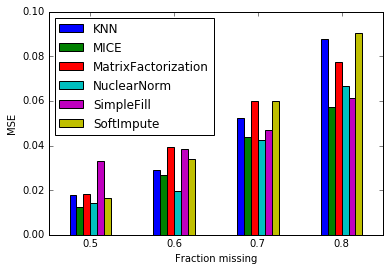

In [25]:
pd.DataFrame(out).T.plot(kind="bar",rot=0)
import matplotlib.pyplot as plt
plt.xlabel("Fraction missing")
plt.ylabel("MSE")

In [160]:
X_master

array([[  242.39573669,   543.78143311,   761.39404297,   902.41882324,
          610.03582764,   395.1690979 ],
       [   77.61320496,   197.95150757,   457.95037842,   700.4430542 ,
          244.3409729 ,    81.06468201],
       [   19.83694839,    66.62181854,   126.12168121,   155.04536438,
           92.97938538,    33.39274979],
       [  191.9654541 ,   325.85803223,   462.70892334,   485.18600464,
          350.49145508,   192.56756592],
       [  478.95169067,   896.46728516,  1077.89013672,  1139.74047852,
          887.04473877,   584.32897949],
       [  236.92506409,   535.01037598,   736.46893311,   850.08081055,
          642.85845947,   378.79971313],
       [  350.41455078,   778.20422363,  1065.38110352,  1120.90759277,
          788.10754395,   375.30303955],
       [   72.737854  ,   191.23280334,   307.97814941,   389.59860229,
          239.58088684,    22.09951782],
       [  221.59431458,   648.79406738,   942.08776855,  1069.41442871,
          756.47790527, 

In [30]:
pd.DataFrame(X_filled, index=subset_hvac_normalised.index, columns=subset_hvac_normalised.columns).head()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,0.262395,0.660555,0.076086,0.126317,0.045516,0.640890
59,0.114139,0.178254,0.419508,0.017434,0.050159,0.139158
94,0.016226,0.000000,0.108794,-0.000037,0.009177,0.011209
101,0.478566,0.063885,0.043206,-0.008605,0.048946,0.022177
222,0.195238,0.162405,1.000000,0.000099,0.110593,0.136136


In [32]:
subset_hvac_normalised.head()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,0.268580,0.391562,0.354348,0.485952,0.423089,0.445286
59,0.083667,0.141433,0.211260,0.374507,0.151210,0.083204
94,0.018833,0.046446,0.054788,0.073571,0.038679,0.028250
101,0.211989,0.233945,0.213504,0.255734,0.230129,0.211738
222,0.534035,0.646650,0.503590,0.616900,0.629034,0.663339


In [44]:
np.mean((X_filled[missing_mask][:]-X_master[missing_mask][:])**2)

0.077344028135396425

In [46]:
X_master[missing_mask][:-5][:5]

array([ 0.26858028,  0.39156246,  0.3543478 ,  0.48595194,  0.42308919])

In [105]:
def transform(pred_df, col_max, col_min):
    pred_df_copy = pred_df.copy()
    for month in range(5, 11):
        pred_df_copy['hvac_%d' %month] = (col_max['hvac_%d' %month]-col_min['hvac_%d' %month])*pred_df['hvac_%d'%month] +col_min['hvac_%d' %month]
    return pred_df_copy

In [106]:
pred_df_actual = transform(pred_df, col_max, col_min)

In [108]:
pred_df_actual.head()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,242.395737,543.781433,761.394043,902.418823,610.035828,395.169098
59,113.783724,214.140804,420.312874,700.443054,368.912803,81.064682
94,32.469920,66.621819,86.681316,92.684546,92.979385,33.392750
101,191.965454,325.858032,427.192836,485.186005,350.286501,192.567566
222,343.360892,896.467285,1149.028602,1148.408929,887.044739,421.078837


In [109]:
subset_hvac.head()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,242.395737,543.781433,761.394043,902.418823,610.035828,395.169098
59,77.613205,197.951508,457.950378,700.443054,244.340973,81.064682
94,19.836948,66.621819,126.121681,155.045364,92.979385,33.392750
101,191.965454,325.858032,462.708923,485.186005,350.491455,192.567566
222,478.951691,896.467285,1077.890137,1139.740479,887.044739,584.328979


Now, let us pick up a few entries. Home #59 had 4/5 missing entries!

In [70]:
home_pred = {}
home = 59
home_pred[home] = {}
for month in range(5, 11):
    home_pred[59][month] = (col_max['hvac_%d' %month]-col_min['hvac_%d' %month])*pred_df.loc[home,'hvac_%d'%month] +col_min['hvac_%d' %month]

In [71]:
pred_59 = pd.DataFrame(home_pred).squeeze()
gt_59 = subset_hvac.ix[59]
gt_59.index=pred_59.index

Here's the GT and prediction for this home. 

In [72]:
pd.DataFrame({"gt":gt_59, "pred":pred_59})

,gt,pred
5,77.613205,77.613205
6,197.951508,197.951508
7,457.950378,285.773454
8,700.443054,279.764460
9,244.340973,244.340973
10,81.064682,113.187037


Given that we had 1/6 records for home #59. Our predictions aren't all that bad.